#Celebrity Look Alike

Author: Aayush Anand

In [1]:
!pip install mtcnn==0.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.8 MB/s eta 0:00:00


In [104]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import pickle
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from mtcnn import MTCNN

In [3]:
%pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/sushilyadav1998/bollywood-celeb-localized-face-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aayush01x
Your Kaggle Key: ··········


100%|██████████| 27.6M/27.6M [00:00<00:00, 87.0MB/s]


## Merging all 3 Subfolders into a single folder

In [48]:
import shutil
def merge_folders(source_folders, destination_folder):
    for source_folder in source_folders:
        for actor_name in os.listdir(source_folder):
            actor_source_path = os.path.join(source_folder, actor_name)
            if os.path.isdir(actor_source_path):
                actor_destination_path = os.path.join(destination_folder, actor_name)

                if not os.path.exists(actor_destination_path):
                    os.makedirs(actor_destination_path)

                for item in os.listdir(actor_source_path):
                    source_item_path = os.path.join(actor_source_path, item)
                    destination_item_path = os.path.join(actor_destination_path, item)
                    shutil.copy2(source_item_path, destination_item_path)
source_folders = ["./bollywood-celeb-localized-face-dataset/Bollywood_celeb_face_localized/bollywood_celeb_faces_0", "./bollywood-celeb-localized-face-dataset/Bollywood_celeb_face_localized/bollywood_celeb_faces_1", "./bollywood-celeb-localized-face-dataset/Bollywood_celeb_face_localized/bollywood_celeb_faces2"]
destination_folder = "Images"
if not os.path.exists(destination_folder):os.makedirs(destination_folder)
merge_folders(source_folders, destination_folder)

## Formatting Folder Names

In [49]:
def rename_folders(folder_path):
    for folder_name in os.listdir(folder_path):
        old_path = os.path.join(folder_path, folder_name)

        if os.path.isdir(old_path) and "_" in folder_name:
            new_name = folder_name.replace("_", " ")
            new_path = os.path.join(folder_path, new_name)

            os.rename(old_path, new_path)
rename_folders('./Images')

## Fixing Inconsistencies

In [50]:
def move_files_to_correct_subfolder(parent_folder):
    aamir_khan_folder = os.path.join(parent_folder, 'Aamir Khan')
    abhay_deol_folder = os.path.join(parent_folder, 'Abhay Deol')

    for file_name in os.listdir(aamir_khan_folder):
        if file_name.startswith('Abhay'):
            source_path = os.path.join(aamir_khan_folder, file_name)
            destination_path = os.path.join(abhay_deol_folder, file_name)

            shutil.move(source_path, destination_path)
move_files_to_correct_subfolder('./Images')

In [51]:
import os

fol_path = "./Images"
folders = os.listdir(fol_path)

filenames = []

for actor in os.listdir(os.path.join(fol_path)):
  for file in os.listdir(os.path.join(fol_path,actor)):
    filenames.append(os.path.join(fol_path,actor,file))

In [107]:
import pathlib
data_dir = pathlib.Path('./Images')
img_height,img_width=224,224
batch_size=128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names

Found 8603 files belonging to 100 classes.
Using 6883 files for training.


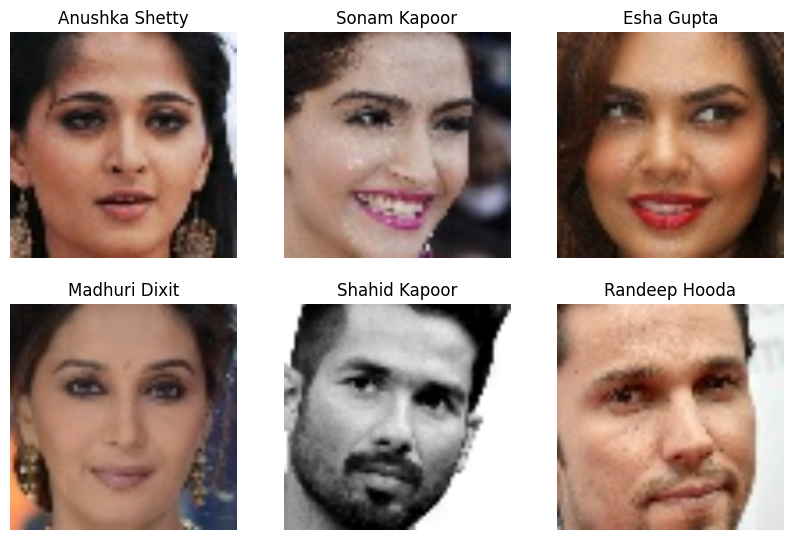

In [108]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [53]:
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
model = Sequential()
resnet_model = keras.applications.resnet50.ResNet50(
    include_top=False,
    input_shape=(224,224,3),
    pooling='avg'
)
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))

## Feature Extraction

In [54]:
from tensorflow.keras.preprocessing import image
def feature_extractor(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img = np.expand_dims(img_array,axis=0)
    preprocessed_img = keras.applications.efficientnet.preprocess_input(expanded_img)
    result = model.predict(preprocessed_img).flatten()

    return result

In [55]:
features = []
for file in tqdm(filenames):
    features.append(feature_extractor(file,model))

  0%|          | 0/8603 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  0%|          | 1/8603 [00:02<5:11:18,  2.17s/it]

1/1 [==============================] - 0s 189ms/step


  0%|          | 2/8603 [00:02<2:40:49,  1.12s/it]

1/1 [==============================] - 0s 181ms/step


  0%|          | 3/8603 [00:02<1:43:30,  1.38it/s]

1/1 [==============================] - 0s 177ms/step


  0%|          | 4/8603 [00:03<1:16:38,  1.87it/s]

1/1 [==============================] - 0s 186ms/step


  0%|          | 5/8603 [00:03<1:02:14,  2.30it/s]

1/1 [==============================] - 0s 180ms/step


  0%|          | 6/8603 [00:03<53:15,  2.69it/s]  

1/1 [==============================] - 0s 179ms/step


  0%|          | 7/8603 [00:03<47:15,  3.03it/s]

1/1 [==============================] - 0s 182ms/step


  0%|          | 8/8603 [00:04<49:47,  2.88it/s]

1/1 [==============================] - 0s 189ms/step


  0%|          | 9/8603 [00:04<46:25,  3.09it/s]

1/1 [==============================] - 0s 186ms/step


  0%|          | 10/8603 [00:04<49:22,  2.90it/s]

1/1 [==============================] - 0s 177ms/step


  0%|          | 11/8603 [00:05<50:57,  2.81it/s]

1/1 [==============================] - 0s 198ms/step


  0%|          | 12/8603 [00:05<46:53,  3.05it/s]

1/1 [==============================] - 0s 177ms/step


  0%|          | 13/8603 [00:05<43:30,  3.29it/s]

1/1 [==============================] - 0s 248ms/step


  0%|          | 14/8603 [00:06<44:12,  3.24it/s]

1/1 [==============================] - 0s 296ms/step


  0%|          | 15/8603 [00:06<49:12,  2.91it/s]

1/1 [==============================] - 0s 303ms/step


  0%|          | 16/8603 [00:06<51:16,  2.79it/s]

1/1 [==============================] - 0s 293ms/step


  0%|          | 17/8603 [00:07<52:19,  2.73it/s]

1/1 [==============================] - 0s 303ms/step


  0%|          | 18/8603 [00:07<54:07,  2.64it/s]

1/1 [==============================] - 0s 296ms/step


  0%|          | 19/8603 [00:08<54:42,  2.62it/s]

1/1 [==============================] - 0s 291ms/step


  0%|          | 20/8603 [00:08<54:31,  2.62it/s]

1/1 [==============================] - 0s 303ms/step


  0%|          | 21/8603 [00:08<55:13,  2.59it/s]

1/1 [==============================] - 0s 291ms/step


  0%|          | 22/8603 [00:09<56:56,  2.51it/s]

1/1 [==============================] - 0s 177ms/step


  0%|          | 23/8603 [00:09<51:23,  2.78it/s]

1/1 [==============================] - 0s 178ms/step


  0%|          | 24/8603 [00:09<46:56,  3.05it/s]

1/1 [==============================] - 0s 175ms/step


  0%|          | 25/8603 [00:10<43:12,  3.31it/s]

1/1 [==============================] - 0s 175ms/step


  0%|          | 26/8603 [00:10<46:40,  3.06it/s]

1/1 [==============================] - 0s 195ms/step


  0%|          | 27/8603 [00:10<44:24,  3.22it/s]

1/1 [==============================] - 0s 182ms/step


  0%|          | 28/8603 [00:10<41:53,  3.41it/s]

1/1 [==============================] - 0s 178ms/step


  0%|          | 29/8603 [00:11<39:44,  3.60it/s]

1/1 [==============================] - 0s 177ms/step


  0%|          | 30/8603 [00:11<44:29,  3.21it/s]

1/1 [==============================] - 0s 179ms/step


  0%|          | 31/8603 [00:11<42:00,  3.40it/s]

1/1 [==============================] - 0s 176ms/step


  0%|          | 32/8603 [00:12<46:00,  3.11it/s]

1/1 [==============================] - 0s 179ms/step


  0%|          | 33/8603 [00:12<48:41,  2.93it/s]

1/1 [==============================] - 0s 186ms/step


  0%|          | 34/8603 [00:12<50:54,  2.81it/s]

1/1 [==============================] - 0s 180ms/step


  0%|          | 35/8603 [00:13<52:20,  2.73it/s]

1/1 [==============================] - 0s 184ms/step


  0%|          | 36/8603 [00:13<53:53,  2.65it/s]

1/1 [==============================] - 0s 186ms/step


  0%|          | 37/8603 [00:14<54:17,  2.63it/s]

1/1 [==============================] - 0s 182ms/step


  0%|          | 38/8603 [00:14<48:43,  2.93it/s]

1/1 [==============================] - 0s 178ms/step


  0%|          | 39/8603 [00:14<50:42,  2.82it/s]

1/1 [==============================] - 0s 177ms/step


  0%|          | 40/8603 [00:15<46:03,  3.10it/s]

1/1 [==============================] - 0s 176ms/step


  0%|          | 41/8603 [00:15<42:34,  3.35it/s]

1/1 [==============================] - 0s 183ms/step


  0%|          | 42/8603 [00:15<40:23,  3.53it/s]

1/1 [==============================] - 0s 199ms/step


  0%|          | 43/8603 [00:15<39:53,  3.58it/s]

1/1 [==============================] - 0s 177ms/step


  1%|          | 44/8603 [00:16<38:14,  3.73it/s]

1/1 [==============================] - 0s 179ms/step


  1%|          | 45/8603 [00:16<38:04,  3.75it/s]

1/1 [==============================] - 0s 178ms/step


  1%|          | 46/8603 [00:16<37:24,  3.81it/s]

1/1 [==============================] - 0s 193ms/step


  1%|          | 47/8603 [00:16<37:27,  3.81it/s]

1/1 [==============================] - 0s 186ms/step


  1%|          | 48/8603 [00:17<36:58,  3.86it/s]

1/1 [==============================] - 0s 179ms/step


  1%|          | 49/8603 [00:17<36:25,  3.91it/s]

1/1 [==============================] - 0s 184ms/step


  1%|          | 50/8603 [00:17<42:11,  3.38it/s]

1/1 [==============================] - 0s 179ms/step


  1%|          | 51/8603 [00:17<40:21,  3.53it/s]

1/1 [==============================] - 0s 174ms/step


  1%|          | 52/8603 [00:18<38:38,  3.69it/s]

1/1 [==============================] - 0s 177ms/step


  1%|          | 53/8603 [00:18<37:53,  3.76it/s]

1/1 [==============================] - 0s 180ms/step


  1%|          | 54/8603 [00:18<43:36,  3.27it/s]

1/1 [==============================] - 0s 177ms/step


  1%|          | 55/8603 [00:19<40:58,  3.48it/s]

1/1 [==============================] - 0s 190ms/step


  1%|          | 56/8603 [00:19<39:40,  3.59it/s]

1/1 [==============================] - 0s 302ms/step


  1%|          | 57/8603 [00:19<44:55,  3.17it/s]

1/1 [==============================] - 0s 296ms/step


  1%|          | 58/8603 [00:20<49:30,  2.88it/s]

1/1 [==============================] - 0s 291ms/step


  1%|          | 59/8603 [00:20<50:40,  2.81it/s]

1/1 [==============================] - 0s 299ms/step


  1%|          | 60/8603 [00:20<52:02,  2.74it/s]

1/1 [==============================] - 0s 303ms/step


  1%|          | 61/8603 [00:21<54:19,  2.62it/s]

1/1 [==============================] - 0s 297ms/step


  1%|          | 62/8603 [00:21<54:20,  2.62it/s]

1/1 [==============================] - 0s 302ms/step


  1%|          | 63/8603 [00:22<55:12,  2.58it/s]

1/1 [==============================] - 0s 296ms/step


  1%|          | 64/8603 [00:22<55:45,  2.55it/s]

1/1 [==============================] - 0s 236ms/step


  1%|          | 65/8603 [00:22<57:04,  2.49it/s]

1/1 [==============================] - 0s 177ms/step


  1%|          | 66/8603 [00:23<50:54,  2.79it/s]

1/1 [==============================] - 0s 177ms/step


  1%|          | 67/8603 [00:23<46:04,  3.09it/s]

1/1 [==============================] - 0s 186ms/step


  1%|          | 68/8603 [00:23<48:42,  2.92it/s]

1/1 [==============================] - 0s 187ms/step


  1%|          | 69/8603 [00:24<50:53,  2.79it/s]

1/1 [==============================] - 0s 173ms/step


  1%|          | 70/8603 [00:24<45:53,  3.10it/s]

1/1 [==============================] - 0s 176ms/step


  1%|          | 71/8603 [00:24<42:39,  3.33it/s]

1/1 [==============================] - 0s 173ms/step


  1%|          | 72/8603 [00:25<46:47,  3.04it/s]

1/1 [==============================] - 0s 174ms/step


  1%|          | 73/8603 [00:25<42:57,  3.31it/s]

1/1 [==============================] - 0s 177ms/step


  1%|          | 74/8603 [00:25<46:31,  3.06it/s]

1/1 [==============================] - 0s 179ms/step


  1%|          | 75/8603 [00:26<43:00,  3.31it/s]

1/1 [==============================] - 0s 182ms/step


  1%|          | 76/8603 [00:26<46:58,  3.03it/s]

1/1 [==============================] - 0s 177ms/step


  1%|          | 77/8603 [00:26<43:12,  3.29it/s]

1/1 [==============================] - 0s 184ms/step


  1%|          | 78/8603 [00:27<46:59,  3.02it/s]

1/1 [==============================] - 0s 180ms/step


  1%|          | 79/8603 [00:27<43:35,  3.26it/s]

1/1 [==============================] - 0s 174ms/step


  1%|          | 80/8603 [00:27<46:44,  3.04it/s]

1/1 [==============================] - 0s 184ms/step


  1%|          | 81/8603 [00:28<49:52,  2.85it/s]

1/1 [==============================] - 0s 180ms/step


  1%|          | 82/8603 [00:28<51:46,  2.74it/s]

1/1 [==============================] - 0s 181ms/step


  1%|          | 83/8603 [00:28<52:32,  2.70it/s]

1/1 [==============================] - 0s 178ms/step


  1%|          | 84/8603 [00:29<47:16,  3.00it/s]

1/1 [==============================] - 0s 179ms/step


  1%|          | 85/8603 [00:29<49:37,  2.86it/s]

1/1 [==============================] - 0s 182ms/step


  1%|          | 86/8603 [00:29<45:10,  3.14it/s]

1/1 [==============================] - 0s 177ms/step


  1%|          | 87/8603 [00:30<47:58,  2.96it/s]

1/1 [==============================] - 0s 175ms/step


  1%|          | 88/8603 [00:30<44:17,  3.20it/s]

1/1 [==============================] - 0s 176ms/step


  1%|          | 89/8603 [00:30<41:33,  3.41it/s]

1/1 [==============================] - 0s 181ms/step


  1%|          | 90/8603 [00:31<46:09,  3.07it/s]

1/1 [==============================] - 0s 194ms/step


  1%|          | 91/8603 [00:31<43:17,  3.28it/s]

1/1 [==============================] - 0s 178ms/step


  1%|          | 92/8603 [00:31<40:37,  3.49it/s]

1/1 [==============================] - 0s 181ms/step


  1%|          | 93/8603 [00:31<39:23,  3.60it/s]

1/1 [==============================] - 0s 188ms/step


  1%|          | 94/8603 [00:32<43:41,  3.25it/s]

1/1 [==============================] - 0s 186ms/step


  1%|          | 95/8603 [00:32<41:26,  3.42it/s]

1/1 [==============================] - 0s 181ms/step


  1%|          | 96/8603 [00:32<45:11,  3.14it/s]

1/1 [==============================] - 0s 305ms/step


  1%|          | 97/8603 [00:33<49:42,  2.85it/s]

1/1 [==============================] - 0s 301ms/step


  1%|          | 98/8603 [00:33<52:59,  2.67it/s]

1/1 [==============================] - 0s 302ms/step


  1%|          | 99/8603 [00:34<55:35,  2.55it/s]

1/1 [==============================] - 0s 300ms/step


  1%|          | 100/8603 [00:34<56:25,  2.51it/s]

1/1 [==============================] - 0s 307ms/step


  1%|          | 101/8603 [00:34<56:28,  2.51it/s]

1/1 [==============================] - 0s 298ms/step


  1%|          | 102/8603 [00:35<57:20,  2.47it/s]

1/1 [==============================] - 0s 295ms/step


  1%|          | 103/8603 [00:35<58:08,  2.44it/s]

1/1 [==============================] - 0s 300ms/step


  1%|          | 104/8603 [00:36<57:31,  2.46it/s]

1/1 [==============================] - 0s 176ms/step


  1%|          | 105/8603 [00:36<57:04,  2.48it/s]

1/1 [==============================] - 0s 178ms/step


  1%|          | 106/8603 [00:36<56:21,  2.51it/s]

1/1 [==============================] - 0s 180ms/step


  1%|          | 107/8603 [00:37<50:12,  2.82it/s]

1/1 [==============================] - 0s 178ms/step


  1%|▏         | 108/8603 [00:37<45:50,  3.09it/s]

1/1 [==============================] - 0s 184ms/step


  1%|▏         | 109/8603 [00:37<43:08,  3.28it/s]

1/1 [==============================] - 0s 176ms/step


  1%|▏         | 110/8603 [00:38<46:32,  3.04it/s]

1/1 [==============================] - 0s 177ms/step


  1%|▏         | 111/8603 [00:38<48:54,  2.89it/s]

1/1 [==============================] - 0s 176ms/step


  1%|▏         | 112/8603 [00:38<50:52,  2.78it/s]

1/1 [==============================] - 0s 175ms/step


  1%|▏         | 113/8603 [00:39<45:49,  3.09it/s]

1/1 [==============================] - 0s 183ms/step


  1%|▏         | 114/8603 [00:39<42:38,  3.32it/s]

1/1 [==============================] - 0s 190ms/step


  1%|▏         | 115/8603 [00:39<40:34,  3.49it/s]

1/1 [==============================] - 0s 185ms/step


  1%|▏         | 116/8603 [00:39<45:07,  3.13it/s]

1/1 [==============================] - 0s 173ms/step


  1%|▏         | 117/8603 [00:40<47:43,  2.96it/s]

1/1 [==============================] - 0s 193ms/step


  1%|▏         | 118/8603 [00:40<44:20,  3.19it/s]

1/1 [==============================] - 0s 181ms/step


  1%|▏         | 119/8603 [00:40<41:30,  3.41it/s]

1/1 [==============================] - 0s 176ms/step


  1%|▏         | 120/8603 [00:41<39:26,  3.59it/s]

1/1 [==============================] - 0s 179ms/step


  1%|▏         | 121/8603 [00:41<37:54,  3.73it/s]

1/1 [==============================] - 0s 188ms/step


  1%|▏         | 122/8603 [00:41<37:30,  3.77it/s]

1/1 [==============================] - 0s 179ms/step


  1%|▏         | 123/8603 [00:42<42:27,  3.33it/s]

1/1 [==============================] - 0s 172ms/step


  1%|▏         | 124/8603 [00:42<39:44,  3.56it/s]

1/1 [==============================] - 0s 174ms/step


  1%|▏         | 125/8603 [00:42<38:33,  3.67it/s]

1/1 [==============================] - 0s 195ms/step


  1%|▏         | 126/8603 [00:42<43:44,  3.23it/s]

1/1 [==============================] - 0s 179ms/step


  1%|▏         | 127/8603 [00:43<41:12,  3.43it/s]

1/1 [==============================] - 0s 177ms/step


  1%|▏         | 128/8603 [00:43<38:59,  3.62it/s]

1/1 [==============================] - 0s 193ms/step


  1%|▏         | 129/8603 [00:43<38:20,  3.68it/s]

1/1 [==============================] - 0s 180ms/step


  2%|▏         | 130/8603 [00:44<43:11,  3.27it/s]

1/1 [==============================] - 0s 178ms/step


  2%|▏         | 131/8603 [00:44<40:44,  3.47it/s]

1/1 [==============================] - 0s 179ms/step


  2%|▏         | 132/8603 [00:44<44:59,  3.14it/s]

1/1 [==============================] - 0s 180ms/step


  2%|▏         | 133/8603 [00:44<42:04,  3.35it/s]

1/1 [==============================] - 0s 182ms/step


  2%|▏         | 134/8603 [00:45<46:29,  3.04it/s]

1/1 [==============================] - 0s 179ms/step


  2%|▏         | 135/8603 [00:45<42:46,  3.30it/s]

1/1 [==============================] - 0s 188ms/step


  2%|▏         | 136/8603 [00:45<40:56,  3.45it/s]

1/1 [==============================] - 0s 191ms/step


  2%|▏         | 137/8603 [00:46<39:47,  3.55it/s]

1/1 [==============================] - 0s 287ms/step


  2%|▏         | 138/8603 [00:46<43:56,  3.21it/s]

1/1 [==============================] - 0s 298ms/step


  2%|▏         | 139/8603 [00:46<46:58,  3.00it/s]

1/1 [==============================] - 0s 294ms/step


  2%|▏         | 140/8603 [00:47<49:15,  2.86it/s]

1/1 [==============================] - 0s 287ms/step


  2%|▏         | 141/8603 [00:47<53:13,  2.65it/s]

1/1 [==============================] - 0s 310ms/step


  2%|▏         | 142/8603 [00:48<54:36,  2.58it/s]

1/1 [==============================] - 0s 299ms/step


  2%|▏         | 143/8603 [00:48<55:10,  2.56it/s]

1/1 [==============================] - 0s 297ms/step


  2%|▏         | 144/8603 [00:48<55:05,  2.56it/s]

1/1 [==============================] - 0s 278ms/step


  2%|▏         | 145/8603 [00:49<55:45,  2.53it/s]

1/1 [==============================] - 0s 282ms/step


  2%|▏         | 146/8603 [00:49<54:55,  2.57it/s]

1/1 [==============================] - 0s 197ms/step


  2%|▏         | 147/8603 [00:50<54:51,  2.57it/s]

1/1 [==============================] - 0s 173ms/step


  2%|▏         | 148/8603 [00:50<54:33,  2.58it/s]

1/1 [==============================] - 0s 176ms/step


  2%|▏         | 149/8603 [00:50<48:18,  2.92it/s]

1/1 [==============================] - 0s 192ms/step


  2%|▏         | 150/8603 [00:50<44:49,  3.14it/s]

1/1 [==============================] - 0s 176ms/step


  2%|▏         | 151/8603 [00:51<41:40,  3.38it/s]

1/1 [==============================] - 0s 176ms/step


  2%|▏         | 152/8603 [00:51<39:43,  3.55it/s]

1/1 [==============================] - 0s 176ms/step


  2%|▏         | 153/8603 [00:51<38:31,  3.66it/s]

1/1 [==============================] - 0s 190ms/step


  2%|▏         | 154/8603 [00:51<37:56,  3.71it/s]

1/1 [==============================] - 0s 175ms/step


  2%|▏         | 155/8603 [00:52<36:49,  3.82it/s]

1/1 [==============================] - 0s 175ms/step


  2%|▏         | 156/8603 [00:52<36:19,  3.87it/s]

1/1 [==============================] - 0s 175ms/step


  2%|▏         | 157/8603 [00:52<35:28,  3.97it/s]

1/1 [==============================] - 0s 182ms/step


  2%|▏         | 158/8603 [00:52<35:32,  3.96it/s]

1/1 [==============================] - 0s 176ms/step


  2%|▏         | 159/8603 [00:53<41:32,  3.39it/s]

1/1 [==============================] - 0s 177ms/step


  2%|▏         | 160/8603 [00:53<39:21,  3.58it/s]

1/1 [==============================] - 0s 179ms/step


  2%|▏         | 161/8603 [00:53<38:26,  3.66it/s]

1/1 [==============================] - 0s 194ms/step


  2%|▏         | 162/8603 [00:54<38:02,  3.70it/s]

1/1 [==============================] - 0s 173ms/step


  2%|▏         | 163/8603 [00:54<42:44,  3.29it/s]

1/1 [==============================] - 0s 174ms/step


  2%|▏         | 164/8603 [00:54<40:05,  3.51it/s]

1/1 [==============================] - 0s 175ms/step


  2%|▏         | 165/8603 [00:54<38:13,  3.68it/s]

1/1 [==============================] - 0s 173ms/step


  2%|▏         | 166/8603 [00:55<37:02,  3.80it/s]

1/1 [==============================] - 0s 175ms/step


  2%|▏         | 167/8603 [00:55<42:12,  3.33it/s]

1/1 [==============================] - 0s 183ms/step


  2%|▏         | 168/8603 [00:55<45:40,  3.08it/s]

1/1 [==============================] - 0s 179ms/step


  2%|▏         | 169/8603 [00:56<48:26,  2.90it/s]

1/1 [==============================] - 0s 176ms/step


  2%|▏         | 170/8603 [00:56<50:49,  2.77it/s]

1/1 [==============================] - 0s 180ms/step


  2%|▏         | 171/8603 [00:56<45:51,  3.06it/s]

1/1 [==============================] - 0s 177ms/step


  2%|▏         | 172/8603 [00:57<48:49,  2.88it/s]

1/1 [==============================] - 0s 177ms/step


  2%|▏         | 173/8603 [00:57<50:18,  2.79it/s]

1/1 [==============================] - 0s 186ms/step


  2%|▏         | 174/8603 [00:58<45:56,  3.06it/s]

1/1 [==============================] - 0s 174ms/step


  2%|▏         | 175/8603 [00:58<48:47,  2.88it/s]

1/1 [==============================] - 0s 180ms/step


  2%|▏         | 176/8603 [00:58<50:35,  2.78it/s]

1/1 [==============================] - 0s 179ms/step


  2%|▏         | 177/8603 [00:59<45:46,  3.07it/s]

1/1 [==============================] - 0s 175ms/step


  2%|▏         | 178/8603 [00:59<42:39,  3.29it/s]

1/1 [==============================] - 0s 176ms/step


  2%|▏         | 179/8603 [00:59<40:40,  3.45it/s]

1/1 [==============================] - 0s 276ms/step


  2%|▏         | 180/8603 [00:59<42:45,  3.28it/s]

1/1 [==============================] - 0s 309ms/step


  2%|▏         | 181/8603 [01:00<48:35,  2.89it/s]

1/1 [==============================] - 0s 300ms/step


  2%|▏         | 182/8603 [01:00<50:10,  2.80it/s]

1/1 [==============================] - 0s 300ms/step


  2%|▏         | 183/8603 [01:01<52:13,  2.69it/s]

1/1 [==============================] - 0s 301ms/step


  2%|▏         | 184/8603 [01:01<53:53,  2.60it/s]

1/1 [==============================] - 0s 297ms/step


  2%|▏         | 185/8603 [01:01<54:35,  2.57it/s]

1/1 [==============================] - 0s 301ms/step


  2%|▏         | 186/8603 [01:02<56:28,  2.48it/s]

1/1 [==============================] - 0s 290ms/step


  2%|▏         | 187/8603 [01:02<57:16,  2.45it/s]

1/1 [==============================] - 0s 231ms/step


  2%|▏         | 188/8603 [01:03<54:17,  2.58it/s]

1/1 [==============================] - 0s 193ms/step


  2%|▏         | 189/8603 [01:03<48:52,  2.87it/s]

1/1 [==============================] - 0s 174ms/step


  2%|▏         | 190/8603 [01:03<44:28,  3.15it/s]

1/1 [==============================] - 0s 178ms/step


  2%|▏         | 191/8603 [01:03<41:15,  3.40it/s]

1/1 [==============================] - 0s 179ms/step


  2%|▏         | 192/8603 [01:04<39:21,  3.56it/s]

1/1 [==============================] - 0s 190ms/step


  2%|▏         | 193/8603 [01:04<38:11,  3.67it/s]

1/1 [==============================] - 0s 174ms/step


  2%|▏         | 194/8603 [01:04<36:50,  3.80it/s]

1/1 [==============================] - 0s 177ms/step


  2%|▏         | 195/8603 [01:04<36:07,  3.88it/s]

1/1 [==============================] - 0s 178ms/step


  2%|▏         | 196/8603 [01:05<41:23,  3.39it/s]

1/1 [==============================] - 0s 184ms/step


  2%|▏         | 197/8603 [01:05<45:44,  3.06it/s]

1/1 [==============================] - 0s 183ms/step


  2%|▏         | 198/8603 [01:05<42:23,  3.30it/s]

1/1 [==============================] - 0s 175ms/step


  2%|▏         | 199/8603 [01:06<45:42,  3.06it/s]

1/1 [==============================] - 0s 182ms/step


  2%|▏         | 200/8603 [01:06<42:37,  3.29it/s]

1/1 [==============================] - 0s 176ms/step


  2%|▏         | 201/8603 [01:06<46:01,  3.04it/s]

1/1 [==============================] - 0s 178ms/step


  2%|▏         | 202/8603 [01:07<48:12,  2.90it/s]

1/1 [==============================] - 0s 185ms/step


  2%|▏         | 203/8603 [01:07<44:08,  3.17it/s]

1/1 [==============================] - 0s 178ms/step


  2%|▏         | 204/8603 [01:07<41:16,  3.39it/s]

1/1 [==============================] - 0s 177ms/step


  2%|▏         | 205/8603 [01:08<39:19,  3.56it/s]

1/1 [==============================] - 0s 176ms/step


  2%|▏         | 206/8603 [01:08<38:14,  3.66it/s]

1/1 [==============================] - 0s 187ms/step


  2%|▏         | 207/8603 [01:08<43:21,  3.23it/s]

1/1 [==============================] - 0s 177ms/step


  2%|▏         | 208/8603 [01:09<46:25,  3.01it/s]

1/1 [==============================] - 0s 197ms/step


  2%|▏         | 209/8603 [01:09<43:42,  3.20it/s]

1/1 [==============================] - 0s 188ms/step


  2%|▏         | 210/8603 [01:09<41:27,  3.37it/s]

1/1 [==============================] - 0s 177ms/step


  2%|▏         | 211/8603 [01:09<39:14,  3.56it/s]

1/1 [==============================] - 0s 180ms/step


  2%|▏         | 212/8603 [01:10<37:56,  3.69it/s]

1/1 [==============================] - 0s 181ms/step


  2%|▏         | 213/8603 [01:10<36:46,  3.80it/s]

1/1 [==============================] - 0s 191ms/step


  2%|▏         | 214/8603 [01:10<36:34,  3.82it/s]

1/1 [==============================] - 0s 176ms/step


  2%|▏         | 215/8603 [01:10<36:16,  3.85it/s]

1/1 [==============================] - 0s 182ms/step


  3%|▎         | 216/8603 [01:11<36:12,  3.86it/s]

1/1 [==============================] - 0s 180ms/step


  3%|▎         | 217/8603 [01:11<35:35,  3.93it/s]

1/1 [==============================] - 0s 189ms/step


  3%|▎         | 218/8603 [01:11<35:43,  3.91it/s]

1/1 [==============================] - 0s 182ms/step


  3%|▎         | 219/8603 [01:12<41:05,  3.40it/s]

1/1 [==============================] - 0s 174ms/step


  3%|▎         | 220/8603 [01:12<38:48,  3.60it/s]

1/1 [==============================] - 0s 179ms/step


  3%|▎         | 221/8603 [01:12<37:25,  3.73it/s]

1/1 [==============================] - 0s 181ms/step


  3%|▎         | 222/8603 [01:12<37:18,  3.74it/s]

1/1 [==============================] - 0s 175ms/step


  3%|▎         | 223/8603 [01:13<36:19,  3.84it/s]

1/1 [==============================] - 0s 300ms/step


  3%|▎         | 224/8603 [01:13<42:18,  3.30it/s]

1/1 [==============================] - 0s 317ms/step


  3%|▎         | 225/8603 [01:13<47:38,  2.93it/s]

1/1 [==============================] - 0s 292ms/step


  3%|▎         | 226/8603 [01:14<50:40,  2.75it/s]

1/1 [==============================] - 0s 301ms/step


  3%|▎         | 227/8603 [01:14<51:28,  2.71it/s]

1/1 [==============================] - 0s 306ms/step


  3%|▎         | 228/8603 [01:15<53:43,  2.60it/s]

1/1 [==============================] - 0s 292ms/step


  3%|▎         | 229/8603 [01:15<53:33,  2.61it/s]

1/1 [==============================] - 0s 286ms/step


  3%|▎         | 230/8603 [01:15<53:04,  2.63it/s]

1/1 [==============================] - 0s 290ms/step


  3%|▎         | 231/8603 [01:16<52:48,  2.64it/s]

1/1 [==============================] - 0s 279ms/step


  3%|▎         | 232/8603 [01:16<52:57,  2.63it/s]

1/1 [==============================] - 0s 191ms/step


  3%|▎         | 233/8603 [01:16<48:37,  2.87it/s]

1/1 [==============================] - 0s 178ms/step


  3%|▎         | 234/8603 [01:17<44:10,  3.16it/s]

1/1 [==============================] - 0s 180ms/step


  3%|▎         | 235/8603 [01:17<41:38,  3.35it/s]

1/1 [==============================] - 0s 176ms/step


  3%|▎         | 236/8603 [01:17<39:32,  3.53it/s]

1/1 [==============================] - 0s 193ms/step


  3%|▎         | 237/8603 [01:17<43:36,  3.20it/s]

1/1 [==============================] - 0s 176ms/step


  3%|▎         | 238/8603 [01:18<46:29,  3.00it/s]

1/1 [==============================] - 0s 177ms/step


  3%|▎         | 239/8603 [01:18<48:41,  2.86it/s]

1/1 [==============================] - 0s 174ms/step


  3%|▎         | 240/8603 [01:18<44:47,  3.11it/s]

1/1 [==============================] - 0s 188ms/step


  3%|▎         | 241/8603 [01:19<47:39,  2.92it/s]

1/1 [==============================] - 0s 175ms/step


  3%|▎         | 242/8603 [01:19<43:43,  3.19it/s]

1/1 [==============================] - 0s 192ms/step


  3%|▎         | 243/8603 [01:19<41:31,  3.36it/s]

1/1 [==============================] - 0s 192ms/step


  3%|▎         | 244/8603 [01:20<40:26,  3.45it/s]

1/1 [==============================] - 0s 178ms/step


  3%|▎         | 245/8603 [01:20<44:27,  3.13it/s]

1/1 [==============================] - 0s 178ms/step


  3%|▎         | 246/8603 [01:20<47:12,  2.95it/s]

1/1 [==============================] - 0s 185ms/step


  3%|▎         | 247/8603 [01:21<49:06,  2.84it/s]

1/1 [==============================] - 0s 176ms/step


  3%|▎         | 248/8603 [01:21<44:24,  3.14it/s]

1/1 [==============================] - 0s 174ms/step


  3%|▎         | 249/8603 [01:21<47:15,  2.95it/s]

1/1 [==============================] - 0s 179ms/step


  3%|▎         | 250/8603 [01:22<43:29,  3.20it/s]

1/1 [==============================] - 0s 178ms/step


  3%|▎         | 251/8603 [01:22<47:07,  2.95it/s]

1/1 [==============================] - 0s 180ms/step


  3%|▎         | 252/8603 [01:22<43:25,  3.21it/s]

1/1 [==============================] - 0s 176ms/step


  3%|▎         | 253/8603 [01:23<47:13,  2.95it/s]

1/1 [==============================] - 0s 181ms/step


  3%|▎         | 254/8603 [01:23<43:37,  3.19it/s]

1/1 [==============================] - 0s 176ms/step


  3%|▎         | 255/8603 [01:23<46:30,  2.99it/s]

1/1 [==============================] - 0s 176ms/step


  3%|▎         | 256/8603 [01:24<49:03,  2.84it/s]

1/1 [==============================] - 0s 176ms/step


  3%|▎         | 257/8603 [01:24<44:37,  3.12it/s]

1/1 [==============================] - 0s 173ms/step


  3%|▎         | 258/8603 [01:24<41:05,  3.38it/s]

1/1 [==============================] - 0s 185ms/step


  3%|▎         | 259/8603 [01:25<39:27,  3.52it/s]

1/1 [==============================] - 0s 180ms/step


  3%|▎         | 260/8603 [01:25<38:39,  3.60it/s]

1/1 [==============================] - 0s 176ms/step


  3%|▎         | 261/8603 [01:25<37:11,  3.74it/s]

1/1 [==============================] - 0s 178ms/step


  3%|▎         | 262/8603 [01:25<36:14,  3.84it/s]

1/1 [==============================] - 0s 197ms/step


  3%|▎         | 263/8603 [01:26<36:38,  3.79it/s]

1/1 [==============================] - 0s 176ms/step


  3%|▎         | 264/8603 [01:26<36:06,  3.85it/s]

1/1 [==============================] - 0s 179ms/step


  3%|▎         | 265/8603 [01:26<41:16,  3.37it/s]

1/1 [==============================] - 0s 298ms/step


  3%|▎         | 266/8603 [01:27<46:02,  3.02it/s]

1/1 [==============================] - 0s 301ms/step


  3%|▎         | 267/8603 [01:27<48:05,  2.89it/s]

1/1 [==============================] - 0s 290ms/step


  3%|▎         | 268/8603 [01:27<51:34,  2.69it/s]

1/1 [==============================] - 0s 320ms/step


  3%|▎         | 269/8603 [01:28<54:18,  2.56it/s]

1/1 [==============================] - 0s 288ms/step


  3%|▎         | 270/8603 [01:28<55:13,  2.51it/s]

1/1 [==============================] - 0s 301ms/step


  3%|▎         | 271/8603 [01:29<54:36,  2.54it/s]

1/1 [==============================] - 0s 278ms/step


  3%|▎         | 272/8603 [01:29<56:24,  2.46it/s]

1/1 [==============================] - 0s 253ms/step


  3%|▎         | 273/8603 [01:29<57:15,  2.42it/s]

1/1 [==============================] - 0s 193ms/step


  3%|▎         | 274/8603 [01:30<55:59,  2.48it/s]

1/1 [==============================] - 0s 175ms/step


  3%|▎         | 275/8603 [01:30<49:25,  2.81it/s]

1/1 [==============================] - 0s 179ms/step


  3%|▎         | 276/8603 [01:30<44:42,  3.10it/s]

1/1 [==============================] - 0s 488ms/step


  3%|▎         | 277/8603 [01:31<1:06:02,  2.10it/s]

1/1 [==============================] - 0s 186ms/step


  3%|▎         | 278/8603 [01:32<58:37,  2.37it/s]  

1/1 [==============================] - 0s 192ms/step


  3%|▎         | 279/8603 [01:32<52:02,  2.67it/s]

1/1 [==============================] - 0s 180ms/step


  3%|▎         | 280/8603 [01:32<46:53,  2.96it/s]

1/1 [==============================] - 0s 178ms/step


  3%|▎         | 281/8603 [01:32<48:51,  2.84it/s]

1/1 [==============================] - 0s 178ms/step


  3%|▎         | 282/8603 [01:33<44:19,  3.13it/s]

1/1 [==============================] - 0s 183ms/step


  3%|▎         | 283/8603 [01:33<41:49,  3.32it/s]

1/1 [==============================] - 0s 176ms/step


  3%|▎         | 284/8603 [01:33<45:29,  3.05it/s]

1/1 [==============================] - 0s 181ms/step


  3%|▎         | 285/8603 [01:34<47:52,  2.90it/s]

1/1 [==============================] - 0s 179ms/step


  3%|▎         | 286/8603 [01:34<44:46,  3.10it/s]

1/1 [==============================] - 0s 177ms/step


  3%|▎         | 287/8603 [01:34<41:42,  3.32it/s]

1/1 [==============================] - 0s 178ms/step


  3%|▎         | 288/8603 [01:35<45:09,  3.07it/s]

1/1 [==============================] - 0s 191ms/step


  3%|▎         | 289/8603 [01:35<42:33,  3.26it/s]

1/1 [==============================] - 0s 173ms/step


  3%|▎         | 290/8603 [01:35<39:58,  3.47it/s]

1/1 [==============================] - 0s 177ms/step


  3%|▎         | 291/8603 [01:35<38:24,  3.61it/s]

1/1 [==============================] - 0s 181ms/step


  3%|▎         | 292/8603 [01:36<37:33,  3.69it/s]

1/1 [==============================] - 0s 193ms/step


  3%|▎         | 293/8603 [01:36<42:16,  3.28it/s]

1/1 [==============================] - 0s 175ms/step


  3%|▎         | 294/8603 [01:36<45:22,  3.05it/s]

1/1 [==============================] - 0s 173ms/step


  3%|▎         | 295/8603 [01:37<42:18,  3.27it/s]

1/1 [==============================] - 0s 193ms/step


  3%|▎         | 296/8603 [01:37<40:39,  3.41it/s]

1/1 [==============================] - 0s 177ms/step


  3%|▎         | 297/8603 [01:37<38:47,  3.57it/s]

1/1 [==============================] - 0s 175ms/step


  3%|▎         | 298/8603 [01:37<37:29,  3.69it/s]

1/1 [==============================] - 0s 179ms/step


  3%|▎         | 299/8603 [01:38<36:41,  3.77it/s]

1/1 [==============================] - 0s 191ms/step


  3%|▎         | 300/8603 [01:38<41:40,  3.32it/s]

1/1 [==============================] - 0s 174ms/step


  3%|▎         | 301/8603 [01:38<45:09,  3.06it/s]

1/1 [==============================] - 0s 183ms/step


  4%|▎         | 302/8603 [01:39<47:24,  2.92it/s]

1/1 [==============================] - 0s 188ms/step


  4%|▎         | 303/8603 [01:39<49:25,  2.80it/s]

1/1 [==============================] - 0s 216ms/step


  4%|▎         | 304/8603 [01:40<50:53,  2.72it/s]

1/1 [==============================] - 0s 292ms/step


  4%|▎         | 305/8603 [01:40<52:46,  2.62it/s]

1/1 [==============================] - 0s 313ms/step


  4%|▎         | 306/8603 [01:40<55:06,  2.51it/s]

1/1 [==============================] - 0s 297ms/step


  4%|▎         | 307/8603 [01:41<54:19,  2.55it/s]

1/1 [==============================] - 0s 334ms/step


  4%|▎         | 308/8603 [01:41<56:32,  2.45it/s]

1/1 [==============================] - 0s 296ms/step


  4%|▎         | 309/8603 [01:42<58:11,  2.38it/s]

1/1 [==============================] - 0s 291ms/step


  4%|▎         | 310/8603 [01:42<56:32,  2.44it/s]

1/1 [==============================] - 0s 290ms/step


  4%|▎         | 311/8603 [01:43<57:19,  2.41it/s]

1/1 [==============================] - 0s 267ms/step


  4%|▎         | 312/8603 [01:43<58:05,  2.38it/s]

1/1 [==============================] - 0s 193ms/step


  4%|▎         | 313/8603 [01:43<51:43,  2.67it/s]

1/1 [==============================] - 0s 179ms/step


  4%|▎         | 314/8603 [01:43<46:38,  2.96it/s]

1/1 [==============================] - 0s 173ms/step


  4%|▎         | 315/8603 [01:44<43:03,  3.21it/s]

1/1 [==============================] - 0s 179ms/step


  4%|▎         | 316/8603 [01:44<40:41,  3.39it/s]

1/1 [==============================] - 0s 187ms/step


  4%|▎         | 317/8603 [01:44<44:21,  3.11it/s]

1/1 [==============================] - 0s 175ms/step


  4%|▎         | 318/8603 [01:45<41:12,  3.35it/s]

1/1 [==============================] - 0s 177ms/step


  4%|▎         | 319/8603 [01:45<44:44,  3.09it/s]

1/1 [==============================] - 0s 186ms/step


  4%|▎         | 320/8603 [01:45<47:20,  2.92it/s]

1/1 [==============================] - 0s 176ms/step


  4%|▎         | 321/8603 [01:46<43:38,  3.16it/s]

1/1 [==============================] - 0s 177ms/step


  4%|▎         | 322/8603 [01:46<40:58,  3.37it/s]

1/1 [==============================] - 0s 176ms/step


  4%|▍         | 323/8603 [01:46<44:38,  3.09it/s]

1/1 [==============================] - 0s 179ms/step


  4%|▍         | 324/8603 [01:47<47:14,  2.92it/s]

1/1 [==============================] - 0s 178ms/step


  4%|▍         | 325/8603 [01:47<48:54,  2.82it/s]

1/1 [==============================] - 0s 192ms/step


  4%|▍         | 326/8603 [01:47<45:09,  3.05it/s]

1/1 [==============================] - 0s 177ms/step


  4%|▍         | 327/8603 [01:48<41:35,  3.32it/s]

1/1 [==============================] - 0s 175ms/step


  4%|▍         | 328/8603 [01:48<39:34,  3.49it/s]

1/1 [==============================] - 0s 178ms/step


  4%|▍         | 329/8603 [01:48<43:39,  3.16it/s]

1/1 [==============================] - 0s 179ms/step


  4%|▍         | 330/8603 [01:48<41:36,  3.31it/s]

1/1 [==============================] - 0s 174ms/step


  4%|▍         | 331/8603 [01:49<39:29,  3.49it/s]

1/1 [==============================] - 0s 177ms/step


  4%|▍         | 332/8603 [01:49<37:50,  3.64it/s]

1/1 [==============================] - 0s 175ms/step


  4%|▍         | 333/8603 [01:49<42:23,  3.25it/s]

1/1 [==============================] - 0s 184ms/step


  4%|▍         | 334/8603 [01:50<45:46,  3.01it/s]

1/1 [==============================] - 0s 178ms/step


  4%|▍         | 335/8603 [01:50<42:09,  3.27it/s]

1/1 [==============================] - 0s 174ms/step


  4%|▍         | 336/8603 [01:50<39:45,  3.47it/s]

1/1 [==============================] - 0s 177ms/step


  4%|▍         | 337/8603 [01:51<44:18,  3.11it/s]

1/1 [==============================] - 0s 177ms/step


  4%|▍         | 338/8603 [01:51<46:54,  2.94it/s]

1/1 [==============================] - 0s 177ms/step


  4%|▍         | 339/8603 [01:51<43:26,  3.17it/s]

1/1 [==============================] - 0s 186ms/step


  4%|▍         | 340/8603 [01:52<41:47,  3.29it/s]

1/1 [==============================] - 0s 187ms/step


  4%|▍         | 341/8603 [01:52<45:02,  3.06it/s]

1/1 [==============================] - 0s 179ms/step


  4%|▍         | 342/8603 [01:52<47:26,  2.90it/s]

1/1 [==============================] - 0s 179ms/step


  4%|▍         | 343/8603 [01:53<43:52,  3.14it/s]

1/1 [==============================] - 0s 177ms/step


  4%|▍         | 344/8603 [01:53<41:04,  3.35it/s]

1/1 [==============================] - 0s 295ms/step


  4%|▍         | 345/8603 [01:53<46:28,  2.96it/s]

1/1 [==============================] - 0s 313ms/step


  4%|▍         | 346/8603 [01:54<49:12,  2.80it/s]

1/1 [==============================] - 0s 294ms/step


  4%|▍         | 347/8603 [01:54<52:00,  2.65it/s]

1/1 [==============================] - 0s 299ms/step


  4%|▍         | 348/8603 [01:54<52:33,  2.62it/s]

1/1 [==============================] - 0s 302ms/step


  4%|▍         | 349/8603 [01:55<54:24,  2.53it/s]

1/1 [==============================] - 0s 298ms/step


  4%|▍         | 350/8603 [01:55<55:55,  2.46it/s]

1/1 [==============================] - 0s 309ms/step


  4%|▍         | 351/8603 [01:56<56:36,  2.43it/s]

1/1 [==============================] - 0s 285ms/step


  4%|▍         | 352/8603 [01:56<56:59,  2.41it/s]

1/1 [==============================] - 0s 191ms/step


  4%|▍         | 353/8603 [01:56<51:59,  2.64it/s]

1/1 [==============================] - 0s 185ms/step


  4%|▍         | 354/8603 [01:57<47:33,  2.89it/s]

1/1 [==============================] - 0s 180ms/step


  4%|▍         | 355/8603 [01:57<43:28,  3.16it/s]

1/1 [==============================] - 0s 177ms/step


  4%|▍         | 356/8603 [01:57<46:33,  2.95it/s]

1/1 [==============================] - 0s 196ms/step


  4%|▍         | 357/8603 [01:58<43:52,  3.13it/s]

1/1 [==============================] - 0s 180ms/step


  4%|▍         | 358/8603 [01:58<46:37,  2.95it/s]

1/1 [==============================] - 0s 175ms/step


  4%|▍         | 359/8603 [01:58<48:29,  2.83it/s]

1/1 [==============================] - 0s 191ms/step


  4%|▍         | 360/8603 [01:59<50:02,  2.75it/s]

1/1 [==============================] - 0s 179ms/step


  4%|▍         | 361/8603 [01:59<50:52,  2.70it/s]

1/1 [==============================] - 0s 187ms/step


  4%|▍         | 362/8603 [01:59<46:09,  2.98it/s]

1/1 [==============================] - 0s 190ms/step


  4%|▍         | 363/8603 [02:00<43:14,  3.18it/s]

1/1 [==============================] - 0s 183ms/step


  4%|▍         | 364/8603 [02:00<40:51,  3.36it/s]

1/1 [==============================] - 0s 172ms/step


  4%|▍         | 365/8603 [02:00<38:42,  3.55it/s]

1/1 [==============================] - 0s 178ms/step


  4%|▍         | 366/8603 [02:01<43:25,  3.16it/s]

1/1 [==============================] - 0s 176ms/step


  4%|▍         | 367/8603 [02:01<46:19,  2.96it/s]

1/1 [==============================] - 0s 175ms/step


  4%|▍         | 368/8603 [02:01<42:22,  3.24it/s]

1/1 [==============================] - 0s 181ms/step


  4%|▍         | 369/8603 [02:01<40:26,  3.39it/s]

1/1 [==============================] - 0s 185ms/step


  4%|▍         | 370/8603 [02:02<38:58,  3.52it/s]

1/1 [==============================] - 0s 177ms/step


  4%|▍         | 371/8603 [02:02<37:45,  3.63it/s]

1/1 [==============================] - 0s 178ms/step


  4%|▍         | 372/8603 [02:02<37:21,  3.67it/s]

1/1 [==============================] - 0s 185ms/step


  4%|▍         | 373/8603 [02:03<42:01,  3.26it/s]

1/1 [==============================] - 0s 183ms/step


  4%|▍         | 374/8603 [02:03<39:28,  3.47it/s]

1/1 [==============================] - 0s 175ms/step


  4%|▍         | 375/8603 [02:03<44:09,  3.11it/s]

1/1 [==============================] - 0s 186ms/step


  4%|▍         | 376/8603 [02:04<46:41,  2.94it/s]

1/1 [==============================] - 0s 175ms/step


  4%|▍         | 377/8603 [02:04<42:30,  3.23it/s]

1/1 [==============================] - 0s 179ms/step


  4%|▍         | 378/8603 [02:04<40:26,  3.39it/s]

1/1 [==============================] - 0s 179ms/step


  4%|▍         | 379/8603 [02:04<38:33,  3.56it/s]

1/1 [==============================] - 0s 177ms/step


  4%|▍         | 380/8603 [02:05<37:22,  3.67it/s]

1/1 [==============================] - 0s 176ms/step


  4%|▍         | 381/8603 [02:05<42:23,  3.23it/s]

1/1 [==============================] - 0s 181ms/step


  4%|▍         | 382/8603 [02:05<40:00,  3.42it/s]

1/1 [==============================] - 0s 174ms/step


  4%|▍         | 383/8603 [02:06<38:02,  3.60it/s]

1/1 [==============================] - 0s 192ms/step


  4%|▍         | 384/8603 [02:06<37:52,  3.62it/s]

1/1 [==============================] - 0s 178ms/step


  4%|▍         | 385/8603 [02:06<37:02,  3.70it/s]

1/1 [==============================] - 0s 214ms/step


  4%|▍         | 386/8603 [02:06<37:39,  3.64it/s]

1/1 [==============================] - 0s 308ms/step


  4%|▍         | 387/8603 [02:07<43:00,  3.18it/s]

1/1 [==============================] - 0s 306ms/step


  5%|▍         | 388/8603 [02:07<47:04,  2.91it/s]

1/1 [==============================] - 0s 293ms/step


  5%|▍         | 389/8603 [02:08<49:27,  2.77it/s]

1/1 [==============================] - 0s 294ms/step


  5%|▍         | 390/8603 [02:08<52:47,  2.59it/s]

1/1 [==============================] - 0s 289ms/step


  5%|▍         | 391/8603 [02:08<52:58,  2.58it/s]

1/1 [==============================] - 0s 295ms/step


  5%|▍         | 392/8603 [02:09<55:24,  2.47it/s]

1/1 [==============================] - 0s 285ms/step


  5%|▍         | 393/8603 [02:09<55:28,  2.47it/s]

1/1 [==============================] - 0s 293ms/step


  5%|▍         | 394/8603 [02:10<55:34,  2.46it/s]

1/1 [==============================] - 0s 186ms/step


  5%|▍         | 395/8603 [02:10<50:39,  2.70it/s]

1/1 [==============================] - 0s 183ms/step


  5%|▍         | 396/8603 [02:10<51:25,  2.66it/s]

1/1 [==============================] - 0s 179ms/step


  5%|▍         | 397/8603 [02:11<46:04,  2.97it/s]

1/1 [==============================] - 0s 178ms/step


  5%|▍         | 398/8603 [02:11<48:03,  2.85it/s]

1/1 [==============================] - 0s 174ms/step


  5%|▍         | 399/8603 [02:11<49:25,  2.77it/s]

1/1 [==============================] - 0s 174ms/step


  5%|▍         | 400/8603 [02:12<50:20,  2.72it/s]

1/1 [==============================] - 0s 189ms/step


  5%|▍         | 401/8603 [02:12<51:00,  2.68it/s]

1/1 [==============================] - 0s 184ms/step


  5%|▍         | 402/8603 [02:12<46:15,  2.95it/s]

1/1 [==============================] - 0s 177ms/step


  5%|▍         | 403/8603 [02:13<42:53,  3.19it/s]

1/1 [==============================] - 0s 175ms/step


  5%|▍         | 404/8603 [02:13<45:43,  2.99it/s]

1/1 [==============================] - 0s 184ms/step


  5%|▍         | 405/8603 [02:13<47:41,  2.86it/s]

1/1 [==============================] - 0s 176ms/step


  5%|▍         | 406/8603 [02:14<43:30,  3.14it/s]

1/1 [==============================] - 0s 175ms/step


  5%|▍         | 407/8603 [02:14<40:51,  3.34it/s]

1/1 [==============================] - 0s 177ms/step


  5%|▍         | 408/8603 [02:14<39:16,  3.48it/s]

1/1 [==============================] - 0s 175ms/step


  5%|▍         | 409/8603 [02:14<38:03,  3.59it/s]

1/1 [==============================] - 0s 172ms/step


  5%|▍         | 410/8603 [02:15<36:39,  3.73it/s]

1/1 [==============================] - 0s 174ms/step


  5%|▍         | 411/8603 [02:15<36:27,  3.74it/s]

1/1 [==============================] - 0s 184ms/step


  5%|▍         | 412/8603 [02:15<36:36,  3.73it/s]

1/1 [==============================] - 0s 179ms/step


  5%|▍         | 413/8603 [02:15<35:56,  3.80it/s]

1/1 [==============================] - 0s 173ms/step


  5%|▍         | 414/8603 [02:16<35:08,  3.88it/s]

1/1 [==============================] - 0s 175ms/step


  5%|▍         | 415/8603 [02:16<34:46,  3.92it/s]

1/1 [==============================] - 0s 179ms/step


  5%|▍         | 416/8603 [02:16<40:46,  3.35it/s]

1/1 [==============================] - 0s 195ms/step


  5%|▍         | 417/8603 [02:17<39:22,  3.46it/s]

1/1 [==============================] - 0s 176ms/step


  5%|▍         | 418/8603 [02:17<37:45,  3.61it/s]

1/1 [==============================] - 0s 192ms/step


  5%|▍         | 419/8603 [02:17<37:23,  3.65it/s]

1/1 [==============================] - 0s 181ms/step


  5%|▍         | 420/8603 [02:17<36:49,  3.70it/s]

1/1 [==============================] - 0s 176ms/step


  5%|▍         | 421/8603 [02:18<41:52,  3.26it/s]

1/1 [==============================] - 0s 181ms/step


  5%|▍         | 422/8603 [02:18<39:23,  3.46it/s]

1/1 [==============================] - 0s 171ms/step


  5%|▍         | 423/8603 [02:18<43:44,  3.12it/s]

1/1 [==============================] - 0s 172ms/step


  5%|▍         | 424/8603 [02:19<40:27,  3.37it/s]

1/1 [==============================] - 0s 175ms/step


  5%|▍         | 425/8603 [02:19<38:19,  3.56it/s]

1/1 [==============================] - 0s 191ms/step


  5%|▍         | 426/8603 [02:19<37:45,  3.61it/s]

1/1 [==============================] - 0s 180ms/step


  5%|▍         | 427/8603 [02:20<42:08,  3.23it/s]

1/1 [==============================] - 0s 217ms/step


  5%|▍         | 428/8603 [02:20<41:13,  3.31it/s]

1/1 [==============================] - 0s 300ms/step


  5%|▍         | 429/8603 [02:20<46:37,  2.92it/s]

1/1 [==============================] - 0s 307ms/step


  5%|▍         | 430/8603 [02:21<49:03,  2.78it/s]

1/1 [==============================] - 0s 287ms/step


  5%|▌         | 431/8603 [02:21<50:25,  2.70it/s]

1/1 [==============================] - 0s 311ms/step


  5%|▌         | 432/8603 [02:22<51:41,  2.63it/s]

1/1 [==============================] - 0s 302ms/step


  5%|▌         | 433/8603 [02:22<52:06,  2.61it/s]

1/1 [==============================] - 0s 300ms/step


  5%|▌         | 434/8603 [02:22<52:26,  2.60it/s]

1/1 [==============================] - 0s 278ms/step


  5%|▌         | 435/8603 [02:23<54:37,  2.49it/s]

1/1 [==============================] - 0s 288ms/step


  5%|▌         | 436/8603 [02:23<54:01,  2.52it/s]

1/1 [==============================] - 0s 264ms/step


  5%|▌         | 437/8603 [02:24<54:56,  2.48it/s]

1/1 [==============================] - 0s 178ms/step


  5%|▌         | 438/8603 [02:24<48:55,  2.78it/s]

1/1 [==============================] - 0s 181ms/step


  5%|▌         | 439/8603 [02:24<44:28,  3.06it/s]

1/1 [==============================] - 0s 179ms/step


  5%|▌         | 440/8603 [02:24<47:05,  2.89it/s]

1/1 [==============================] - 0s 177ms/step


  5%|▌         | 441/8603 [02:25<42:53,  3.17it/s]

1/1 [==============================] - 0s 176ms/step


  5%|▌         | 442/8603 [02:25<45:51,  2.97it/s]

1/1 [==============================] - 0s 182ms/step


  5%|▌         | 443/8603 [02:25<42:10,  3.22it/s]

1/1 [==============================] - 0s 194ms/step


  5%|▌         | 444/8603 [02:26<40:42,  3.34it/s]

1/1 [==============================] - 0s 179ms/step


  5%|▌         | 445/8603 [02:26<38:45,  3.51it/s]

1/1 [==============================] - 0s 179ms/step


  5%|▌         | 446/8603 [02:26<42:54,  3.17it/s]

1/1 [==============================] - 0s 196ms/step


  5%|▌         | 447/8603 [02:27<45:59,  2.96it/s]

1/1 [==============================] - 0s 182ms/step


  5%|▌         | 448/8603 [02:27<47:50,  2.84it/s]

1/1 [==============================] - 0s 179ms/step


  5%|▌         | 449/8603 [02:27<49:13,  2.76it/s]

1/1 [==============================] - 0s 186ms/step


  5%|▌         | 450/8603 [02:28<50:39,  2.68it/s]

1/1 [==============================] - 0s 179ms/step


  5%|▌         | 451/8603 [02:28<45:43,  2.97it/s]

1/1 [==============================] - 0s 178ms/step


  5%|▌         | 452/8603 [02:28<42:17,  3.21it/s]

1/1 [==============================] - 0s 197ms/step


  5%|▌         | 453/8603 [02:29<45:34,  2.98it/s]

1/1 [==============================] - 0s 179ms/step


  5%|▌         | 454/8603 [02:29<42:06,  3.23it/s]

1/1 [==============================] - 0s 177ms/step


  5%|▌         | 455/8603 [02:29<45:24,  2.99it/s]

1/1 [==============================] - 0s 205ms/step


  5%|▌         | 456/8603 [02:30<43:14,  3.14it/s]

1/1 [==============================] - 0s 178ms/step


  5%|▌         | 457/8603 [02:30<40:46,  3.33it/s]

1/1 [==============================] - 0s 179ms/step


  5%|▌         | 458/8603 [02:30<44:20,  3.06it/s]

1/1 [==============================] - 0s 179ms/step


  5%|▌         | 459/8603 [02:31<41:15,  3.29it/s]

1/1 [==============================] - 0s 185ms/step


  5%|▌         | 460/8603 [02:31<39:14,  3.46it/s]

1/1 [==============================] - 0s 175ms/step


  5%|▌         | 461/8603 [02:31<43:31,  3.12it/s]

1/1 [==============================] - 0s 178ms/step


  5%|▌         | 462/8603 [02:32<46:02,  2.95it/s]

1/1 [==============================] - 0s 195ms/step


  5%|▌         | 463/8603 [02:32<42:41,  3.18it/s]

1/1 [==============================] - 0s 176ms/step


  5%|▌         | 464/8603 [02:32<40:05,  3.38it/s]

1/1 [==============================] - 0s 178ms/step


  5%|▌         | 465/8603 [02:32<44:14,  3.07it/s]

1/1 [==============================] - 0s 191ms/step


  5%|▌         | 466/8603 [02:33<41:51,  3.24it/s]

1/1 [==============================] - 0s 175ms/step


  5%|▌         | 467/8603 [02:33<39:35,  3.43it/s]

1/1 [==============================] - 0s 178ms/step


  5%|▌         | 468/8603 [02:33<38:08,  3.55it/s]

1/1 [==============================] - 0s 227ms/step


  5%|▌         | 469/8603 [02:34<42:36,  3.18it/s]

1/1 [==============================] - 0s 289ms/step


  5%|▌         | 470/8603 [02:34<47:26,  2.86it/s]

1/1 [==============================] - 0s 307ms/step


  5%|▌         | 471/8603 [02:34<49:15,  2.75it/s]

1/1 [==============================] - 0s 296ms/step


  5%|▌         | 472/8603 [02:35<51:37,  2.63it/s]

1/1 [==============================] - 0s 295ms/step


  5%|▌         | 473/8603 [02:35<53:12,  2.55it/s]

1/1 [==============================] - 0s 293ms/step


  6%|▌         | 474/8603 [02:36<53:45,  2.52it/s]

1/1 [==============================] - 0s 295ms/step


  6%|▌         | 475/8603 [02:36<53:31,  2.53it/s]

1/1 [==============================] - 0s 282ms/step


  6%|▌         | 476/8603 [02:37<55:07,  2.46it/s]

1/1 [==============================] - 0s 297ms/step


  6%|▌         | 477/8603 [02:37<54:38,  2.48it/s]

1/1 [==============================] - 0s 181ms/step


  6%|▌         | 478/8603 [02:37<54:57,  2.46it/s]

1/1 [==============================] - 0s 177ms/step


  6%|▌         | 479/8603 [02:38<54:07,  2.50it/s]

1/1 [==============================] - 0s 189ms/step


  6%|▌         | 480/8603 [02:38<48:10,  2.81it/s]

1/1 [==============================] - 0s 179ms/step


  6%|▌         | 481/8603 [02:38<49:41,  2.72it/s]

1/1 [==============================] - 0s 176ms/step


  6%|▌         | 482/8603 [02:39<50:11,  2.70it/s]

1/1 [==============================] - 0s 206ms/step


  6%|▌         | 483/8603 [02:39<51:26,  2.63it/s]

1/1 [==============================] - 0s 179ms/step


  6%|▌         | 484/8603 [02:39<46:19,  2.92it/s]

1/1 [==============================] - 0s 184ms/step


  6%|▌         | 485/8603 [02:40<48:39,  2.78it/s]

1/1 [==============================] - 0s 188ms/step


  6%|▌         | 486/8603 [02:40<44:44,  3.02it/s]

1/1 [==============================] - 0s 182ms/step


  6%|▌         | 487/8603 [02:40<47:32,  2.85it/s]

1/1 [==============================] - 0s 175ms/step


  6%|▌         | 488/8603 [02:41<43:05,  3.14it/s]

1/1 [==============================] - 0s 177ms/step


  6%|▌         | 489/8603 [02:41<40:16,  3.36it/s]

1/1 [==============================] - 0s 181ms/step


  6%|▌         | 490/8603 [02:41<39:24,  3.43it/s]

1/1 [==============================] - 0s 174ms/step


  6%|▌         | 491/8603 [02:41<37:54,  3.57it/s]

1/1 [==============================] - 0s 181ms/step


  6%|▌         | 492/8603 [02:42<37:22,  3.62it/s]

1/1 [==============================] - 0s 173ms/step


  6%|▌         | 493/8603 [02:42<36:21,  3.72it/s]

1/1 [==============================] - 0s 176ms/step


  6%|▌         | 494/8603 [02:42<36:11,  3.73it/s]

1/1 [==============================] - 0s 182ms/step


  6%|▌         | 495/8603 [02:43<35:51,  3.77it/s]

1/1 [==============================] - 0s 173ms/step


  6%|▌         | 496/8603 [02:43<35:05,  3.85it/s]

1/1 [==============================] - 0s 175ms/step


  6%|▌         | 497/8603 [02:43<35:04,  3.85it/s]

1/1 [==============================] - 0s 186ms/step


  6%|▌         | 498/8603 [02:43<41:06,  3.29it/s]

1/1 [==============================] - 0s 179ms/step


  6%|▌         | 499/8603 [02:44<38:41,  3.49it/s]

1/1 [==============================] - 0s 183ms/step


  6%|▌         | 500/8603 [02:44<37:28,  3.60it/s]

1/1 [==============================] - 0s 191ms/step


  6%|▌         | 501/8603 [02:44<37:44,  3.58it/s]

1/1 [==============================] - 0s 179ms/step


  6%|▌         | 502/8603 [02:45<42:33,  3.17it/s]

1/1 [==============================] - 0s 178ms/step


  6%|▌         | 503/8603 [02:45<45:16,  2.98it/s]

1/1 [==============================] - 0s 198ms/step


  6%|▌         | 504/8603 [02:45<42:36,  3.17it/s]

1/1 [==============================] - 0s 183ms/step


  6%|▌         | 505/8603 [02:46<45:46,  2.95it/s]

1/1 [==============================] - 0s 178ms/step


  6%|▌         | 506/8603 [02:46<41:53,  3.22it/s]

1/1 [==============================] - 0s 177ms/step


  6%|▌         | 507/8603 [02:46<44:57,  3.00it/s]

1/1 [==============================] - 0s 173ms/step


  6%|▌         | 508/8603 [02:47<41:21,  3.26it/s]

1/1 [==============================] - 0s 174ms/step


  6%|▌         | 509/8603 [02:47<38:55,  3.47it/s]

1/1 [==============================] - 0s 217ms/step


  6%|▌         | 510/8603 [02:47<43:11,  3.12it/s]

1/1 [==============================] - 0s 296ms/step


  6%|▌         | 511/8603 [02:48<47:44,  2.83it/s]

1/1 [==============================] - 0s 295ms/step


  6%|▌         | 512/8603 [02:48<50:43,  2.66it/s]

1/1 [==============================] - 0s 301ms/step


  6%|▌         | 513/8603 [02:48<51:03,  2.64it/s]

1/1 [==============================] - 0s 308ms/step


  6%|▌         | 514/8603 [02:49<52:49,  2.55it/s]

1/1 [==============================] - 0s 288ms/step


  6%|▌         | 515/8603 [02:49<53:47,  2.51it/s]

1/1 [==============================] - 0s 289ms/step


  6%|▌         | 516/8603 [02:50<53:21,  2.53it/s]

1/1 [==============================] - 0s 291ms/step


  6%|▌         | 517/8603 [02:50<55:47,  2.42it/s]

1/1 [==============================] - 0s 272ms/step


  6%|▌         | 518/8603 [02:51<56:09,  2.40it/s]

1/1 [==============================] - 0s 180ms/step


  6%|▌         | 519/8603 [02:51<55:19,  2.44it/s]

1/1 [==============================] - 0s 175ms/step


  6%|▌         | 520/8603 [02:51<48:42,  2.77it/s]

1/1 [==============================] - 0s 181ms/step


  6%|▌         | 521/8603 [02:51<44:37,  3.02it/s]

1/1 [==============================] - 0s 181ms/step


  6%|▌         | 522/8603 [02:52<42:20,  3.18it/s]

1/1 [==============================] - 0s 180ms/step


  6%|▌         | 523/8603 [02:52<45:25,  2.96it/s]

1/1 [==============================] - 0s 174ms/step


  6%|▌         | 524/8603 [02:52<47:15,  2.85it/s]

1/1 [==============================] - 0s 177ms/step


  6%|▌         | 525/8603 [02:53<43:14,  3.11it/s]

1/1 [==============================] - 0s 482ms/step


  6%|▌         | 526/8603 [02:54<1:09:22,  1.94it/s]

1/1 [==============================] - 0s 176ms/step


  6%|▌         | 527/8603 [02:54<59:02,  2.28it/s]  

1/1 [==============================] - 0s 174ms/step


  6%|▌         | 528/8603 [02:54<51:28,  2.61it/s]

1/1 [==============================] - 0s 181ms/step


  6%|▌         | 529/8603 [02:55<51:52,  2.59it/s]

1/1 [==============================] - 0s 175ms/step


  6%|▌         | 530/8603 [02:55<46:10,  2.91it/s]

1/1 [==============================] - 0s 176ms/step


  6%|▌         | 531/8603 [02:55<48:15,  2.79it/s]

1/1 [==============================] - 0s 183ms/step


  6%|▌         | 532/8603 [02:55<43:49,  3.07it/s]

1/1 [==============================] - 0s 188ms/step


  6%|▌         | 533/8603 [02:56<47:00,  2.86it/s]

1/1 [==============================] - 0s 181ms/step


  6%|▌         | 534/8603 [02:56<42:50,  3.14it/s]

1/1 [==============================] - 0s 182ms/step


  6%|▌         | 535/8603 [02:56<40:35,  3.31it/s]

1/1 [==============================] - 0s 187ms/step


  6%|▌         | 536/8603 [02:57<38:59,  3.45it/s]

1/1 [==============================] - 0s 175ms/step


  6%|▌         | 537/8603 [02:57<37:28,  3.59it/s]

1/1 [==============================] - 0s 174ms/step


  6%|▋         | 538/8603 [02:57<42:03,  3.20it/s]

1/1 [==============================] - 0s 178ms/step


  6%|▋         | 539/8603 [02:58<39:20,  3.42it/s]

1/1 [==============================] - 0s 179ms/step


  6%|▋         | 540/8603 [02:58<43:53,  3.06it/s]

1/1 [==============================] - 0s 172ms/step


  6%|▋         | 541/8603 [02:58<40:23,  3.33it/s]

1/1 [==============================] - 0s 178ms/step


  6%|▋         | 542/8603 [02:58<38:25,  3.50it/s]

1/1 [==============================] - 0s 184ms/step


  6%|▋         | 543/8603 [02:59<37:42,  3.56it/s]

1/1 [==============================] - 0s 174ms/step


  6%|▋         | 544/8603 [02:59<42:00,  3.20it/s]

1/1 [==============================] - 0s 176ms/step


  6%|▋         | 545/8603 [03:00<45:18,  2.96it/s]

1/1 [==============================] - 0s 193ms/step


  6%|▋         | 546/8603 [03:00<42:17,  3.17it/s]

1/1 [==============================] - 0s 174ms/step


  6%|▋         | 547/8603 [03:00<39:41,  3.38it/s]

1/1 [==============================] - 0s 174ms/step


  6%|▋         | 548/8603 [03:00<43:24,  3.09it/s]

1/1 [==============================] - 0s 300ms/step


  6%|▋         | 549/8603 [03:01<46:01,  2.92it/s]

1/1 [==============================] - 0s 294ms/step


  6%|▋         | 550/8603 [03:01<49:38,  2.70it/s]

1/1 [==============================] - 0s 288ms/step


  6%|▋         | 551/8603 [03:02<50:14,  2.67it/s]

1/1 [==============================] - 0s 302ms/step


  6%|▋         | 552/8603 [03:02<51:35,  2.60it/s]

1/1 [==============================] - 0s 302ms/step


  6%|▋         | 553/8603 [03:02<53:07,  2.53it/s]

1/1 [==============================] - 0s 297ms/step


  6%|▋         | 554/8603 [03:03<55:35,  2.41it/s]

1/1 [==============================] - 0s 286ms/step


  6%|▋         | 555/8603 [03:03<56:00,  2.39it/s]

1/1 [==============================] - 0s 290ms/step


  6%|▋         | 556/8603 [03:04<54:47,  2.45it/s]

1/1 [==============================] - 0s 237ms/step


  6%|▋         | 557/8603 [03:04<56:08,  2.39it/s]

1/1 [==============================] - 0s 173ms/step


  6%|▋         | 558/8603 [03:04<49:06,  2.73it/s]

1/1 [==============================] - 0s 182ms/step


  6%|▋         | 559/8603 [03:05<45:01,  2.98it/s]

1/1 [==============================] - 0s 176ms/step


  7%|▋         | 560/8603 [03:05<41:34,  3.22it/s]

1/1 [==============================] - 0s 179ms/step


  7%|▋         | 561/8603 [03:05<45:21,  2.96it/s]

1/1 [==============================] - 0s 182ms/step


  7%|▋         | 562/8603 [03:06<42:03,  3.19it/s]

1/1 [==============================] - 0s 178ms/step


  7%|▋         | 563/8603 [03:06<39:54,  3.36it/s]

1/1 [==============================] - 0s 189ms/step


  7%|▋         | 564/8603 [03:06<38:16,  3.50it/s]

1/1 [==============================] - 0s 184ms/step


  7%|▋         | 565/8603 [03:06<37:10,  3.60it/s]

1/1 [==============================] - 0s 178ms/step


  7%|▋         | 566/8603 [03:07<36:26,  3.68it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 567/8603 [03:07<41:22,  3.24it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 568/8603 [03:07<44:26,  3.01it/s]

1/1 [==============================] - 0s 178ms/step


  7%|▋         | 569/8603 [03:08<41:05,  3.26it/s]

1/1 [==============================] - 0s 177ms/step


  7%|▋         | 570/8603 [03:08<39:06,  3.42it/s]

1/1 [==============================] - 0s 188ms/step


  7%|▋         | 571/8603 [03:08<38:00,  3.52it/s]

1/1 [==============================] - 0s 175ms/step


  7%|▋         | 572/8603 [03:08<36:57,  3.62it/s]

1/1 [==============================] - 0s 173ms/step


  7%|▋         | 573/8603 [03:09<35:54,  3.73it/s]

1/1 [==============================] - 0s 172ms/step


  7%|▋         | 574/8603 [03:09<35:09,  3.81it/s]

1/1 [==============================] - 0s 200ms/step


  7%|▋         | 575/8603 [03:09<40:15,  3.32it/s]

1/1 [==============================] - 0s 176ms/step


  7%|▋         | 576/8603 [03:10<38:06,  3.51it/s]

1/1 [==============================] - 0s 176ms/step


  7%|▋         | 577/8603 [03:10<36:39,  3.65it/s]

1/1 [==============================] - 0s 175ms/step


  7%|▋         | 578/8603 [03:10<41:16,  3.24it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 579/8603 [03:10<38:45,  3.45it/s]

1/1 [==============================] - 0s 181ms/step


  7%|▋         | 580/8603 [03:11<37:31,  3.56it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 581/8603 [03:11<36:25,  3.67it/s]

1/1 [==============================] - 0s 189ms/step


  7%|▋         | 582/8603 [03:11<36:24,  3.67it/s]

1/1 [==============================] - 0s 179ms/step


  7%|▋         | 583/8603 [03:12<41:07,  3.25it/s]

1/1 [==============================] - 0s 176ms/step


  7%|▋         | 584/8603 [03:12<39:04,  3.42it/s]

1/1 [==============================] - 0s 176ms/step


  7%|▋         | 585/8603 [03:12<42:58,  3.11it/s]

1/1 [==============================] - 0s 177ms/step


  7%|▋         | 586/8603 [03:13<39:57,  3.34it/s]

1/1 [==============================] - 0s 175ms/step


  7%|▋         | 587/8603 [03:13<38:08,  3.50it/s]

1/1 [==============================] - 0s 178ms/step


  7%|▋         | 588/8603 [03:13<42:21,  3.15it/s]

1/1 [==============================] - 0s 175ms/step


  7%|▋         | 589/8603 [03:14<45:21,  2.94it/s]

1/1 [==============================] - 0s 178ms/step


  7%|▋         | 590/8603 [03:14<42:27,  3.14it/s]

1/1 [==============================] - 0s 225ms/step


  7%|▋         | 591/8603 [03:14<45:24,  2.94it/s]

1/1 [==============================] - 0s 288ms/step


  7%|▋         | 592/8603 [03:15<48:56,  2.73it/s]

1/1 [==============================] - 0s 294ms/step


  7%|▋         | 593/8603 [03:15<50:32,  2.64it/s]

1/1 [==============================] - 0s 302ms/step


  7%|▋         | 594/8603 [03:15<53:17,  2.50it/s]

1/1 [==============================] - 0s 313ms/step


  7%|▋         | 595/8603 [03:16<54:15,  2.46it/s]

1/1 [==============================] - 0s 292ms/step


  7%|▋         | 596/8603 [03:16<55:28,  2.41it/s]

1/1 [==============================] - 0s 279ms/step


  7%|▋         | 597/8603 [03:17<53:33,  2.49it/s]

1/1 [==============================] - 0s 289ms/step


  7%|▋         | 598/8603 [03:17<53:53,  2.48it/s]

1/1 [==============================] - 0s 271ms/step


  7%|▋         | 599/8603 [03:18<54:02,  2.47it/s]

1/1 [==============================] - 0s 181ms/step


  7%|▋         | 600/8603 [03:18<48:40,  2.74it/s]

1/1 [==============================] - 0s 177ms/step


  7%|▋         | 601/8603 [03:18<44:20,  3.01it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 602/8603 [03:18<46:34,  2.86it/s]

1/1 [==============================] - 0s 176ms/step


  7%|▋         | 603/8603 [03:19<42:39,  3.13it/s]

1/1 [==============================] - 0s 179ms/step


  7%|▋         | 604/8603 [03:19<45:37,  2.92it/s]

1/1 [==============================] - 0s 175ms/step


  7%|▋         | 605/8603 [03:19<47:28,  2.81it/s]

1/1 [==============================] - 0s 181ms/step


  7%|▋         | 606/8603 [03:20<43:16,  3.08it/s]

1/1 [==============================] - 0s 186ms/step


  7%|▋         | 607/8603 [03:20<40:55,  3.26it/s]

1/1 [==============================] - 0s 181ms/step


  7%|▋         | 608/8603 [03:20<38:59,  3.42it/s]

1/1 [==============================] - 0s 196ms/step


  7%|▋         | 609/8603 [03:21<38:29,  3.46it/s]

1/1 [==============================] - 0s 176ms/step


  7%|▋         | 610/8603 [03:21<42:41,  3.12it/s]

1/1 [==============================] - 0s 175ms/step


  7%|▋         | 611/8603 [03:21<39:46,  3.35it/s]

1/1 [==============================] - 0s 179ms/step


  7%|▋         | 612/8603 [03:22<43:37,  3.05it/s]

1/1 [==============================] - 0s 182ms/step


  7%|▋         | 613/8603 [03:22<40:43,  3.27it/s]

1/1 [==============================] - 0s 175ms/step


  7%|▋         | 614/8603 [03:22<44:06,  3.02it/s]

1/1 [==============================] - 0s 177ms/step


  7%|▋         | 615/8603 [03:23<46:04,  2.89it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 616/8603 [03:23<41:54,  3.18it/s]

1/1 [==============================] - 0s 177ms/step


  7%|▋         | 617/8603 [03:23<39:25,  3.38it/s]

1/1 [==============================] - 0s 178ms/step


  7%|▋         | 618/8603 [03:23<38:03,  3.50it/s]

1/1 [==============================] - 0s 194ms/step


  7%|▋         | 619/8603 [03:24<42:17,  3.15it/s]

1/1 [==============================] - 0s 173ms/step


  7%|▋         | 620/8603 [03:24<39:36,  3.36it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 621/8603 [03:24<37:36,  3.54it/s]

1/1 [==============================] - 0s 176ms/step


  7%|▋         | 622/8603 [03:25<36:19,  3.66it/s]

1/1 [==============================] - 0s 176ms/step


  7%|▋         | 623/8603 [03:25<36:13,  3.67it/s]

1/1 [==============================] - 0s 172ms/step


  7%|▋         | 624/8603 [03:25<35:12,  3.78it/s]

1/1 [==============================] - 0s 178ms/step


  7%|▋         | 625/8603 [03:25<34:37,  3.84it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 626/8603 [03:26<34:13,  3.89it/s]

1/1 [==============================] - 0s 178ms/step


  7%|▋         | 627/8603 [03:26<34:46,  3.82it/s]

1/1 [==============================] - 0s 175ms/step


  7%|▋         | 628/8603 [03:26<39:59,  3.32it/s]

1/1 [==============================] - 0s 179ms/step


  7%|▋         | 629/8603 [03:26<37:44,  3.52it/s]

1/1 [==============================] - 0s 191ms/step


  7%|▋         | 630/8603 [03:27<37:11,  3.57it/s]

1/1 [==============================] - 0s 174ms/step


  7%|▋         | 631/8603 [03:27<41:37,  3.19it/s]

1/1 [==============================] - 0s 173ms/step


  7%|▋         | 632/8603 [03:27<38:49,  3.42it/s]

1/1 [==============================] - 0s 235ms/step


  7%|▋         | 633/8603 [03:28<39:40,  3.35it/s]

1/1 [==============================] - 0s 296ms/step


  7%|▋         | 634/8603 [03:28<44:10,  3.01it/s]

1/1 [==============================] - 0s 312ms/step


  7%|▋         | 635/8603 [03:28<47:36,  2.79it/s]

1/1 [==============================] - 0s 314ms/step


  7%|▋         | 636/8603 [03:29<50:44,  2.62it/s]

1/1 [==============================] - 0s 292ms/step


  7%|▋         | 637/8603 [03:29<52:10,  2.54it/s]

1/1 [==============================] - 0s 303ms/step


  7%|▋         | 638/8603 [03:30<52:57,  2.51it/s]

1/1 [==============================] - 0s 290ms/step


  7%|▋         | 639/8603 [03:30<52:58,  2.51it/s]

1/1 [==============================] - 0s 297ms/step


  7%|▋         | 640/8603 [03:31<52:32,  2.53it/s]

1/1 [==============================] - 0s 303ms/step


  7%|▋         | 641/8603 [03:31<53:01,  2.50it/s]

1/1 [==============================] - 0s 241ms/step


  7%|▋         | 642/8603 [03:31<50:35,  2.62it/s]

1/1 [==============================] - 0s 181ms/step


  7%|▋         | 643/8603 [03:32<45:55,  2.89it/s]

1/1 [==============================] - 0s 181ms/step


  7%|▋         | 644/8603 [03:32<47:43,  2.78it/s]

1/1 [==============================] - 0s 185ms/step


  7%|▋         | 645/8603 [03:32<43:47,  3.03it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 646/8603 [03:32<40:57,  3.24it/s]

1/1 [==============================] - 0s 183ms/step


  8%|▊         | 647/8603 [03:33<44:13,  3.00it/s]

1/1 [==============================] - 0s 174ms/step


  8%|▊         | 648/8603 [03:33<41:08,  3.22it/s]

1/1 [==============================] - 0s 175ms/step


  8%|▊         | 649/8603 [03:33<38:50,  3.41it/s]

1/1 [==============================] - 0s 176ms/step


  8%|▊         | 650/8603 [03:34<37:35,  3.53it/s]

1/1 [==============================] - 0s 178ms/step


  8%|▊         | 651/8603 [03:34<41:55,  3.16it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 652/8603 [03:34<38:49,  3.41it/s]

1/1 [==============================] - 0s 182ms/step


  8%|▊         | 653/8603 [03:35<37:29,  3.53it/s]

1/1 [==============================] - 0s 176ms/step


  8%|▊         | 654/8603 [03:35<36:42,  3.61it/s]

1/1 [==============================] - 0s 189ms/step


  8%|▊         | 655/8603 [03:35<36:29,  3.63it/s]

1/1 [==============================] - 0s 178ms/step


  8%|▊         | 656/8603 [03:35<41:18,  3.21it/s]

1/1 [==============================] - 0s 183ms/step


  8%|▊         | 657/8603 [03:36<44:19,  2.99it/s]

1/1 [==============================] - 0s 189ms/step


  8%|▊         | 658/8603 [03:36<41:26,  3.20it/s]

1/1 [==============================] - 0s 179ms/step


  8%|▊         | 659/8603 [03:36<44:32,  2.97it/s]

1/1 [==============================] - 0s 176ms/step


  8%|▊         | 660/8603 [03:37<46:29,  2.85it/s]

1/1 [==============================] - 0s 194ms/step


  8%|▊         | 661/8603 [03:37<43:00,  3.08it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 662/8603 [03:37<40:23,  3.28it/s]

1/1 [==============================] - 0s 178ms/step


  8%|▊         | 663/8603 [03:38<38:37,  3.43it/s]

1/1 [==============================] - 0s 179ms/step


  8%|▊         | 664/8603 [03:38<42:30,  3.11it/s]

1/1 [==============================] - 0s 179ms/step


  8%|▊         | 665/8603 [03:38<39:42,  3.33it/s]

1/1 [==============================] - 0s 174ms/step


  8%|▊         | 666/8603 [03:39<37:53,  3.49it/s]

1/1 [==============================] - 0s 181ms/step


  8%|▊         | 667/8603 [03:39<36:53,  3.58it/s]

1/1 [==============================] - 0s 185ms/step


  8%|▊         | 668/8603 [03:39<41:29,  3.19it/s]

1/1 [==============================] - 0s 179ms/step


  8%|▊         | 669/8603 [03:40<44:37,  2.96it/s]

1/1 [==============================] - 0s 182ms/step


  8%|▊         | 670/8603 [03:40<41:12,  3.21it/s]

1/1 [==============================] - 0s 202ms/step


  8%|▊         | 671/8603 [03:40<44:15,  2.99it/s]

1/1 [==============================] - 0s 187ms/step


  8%|▊         | 672/8603 [03:41<41:31,  3.18it/s]

1/1 [==============================] - 0s 175ms/step


  8%|▊         | 673/8603 [03:41<38:54,  3.40it/s]

1/1 [==============================] - 0s 176ms/step


  8%|▊         | 674/8603 [03:41<43:10,  3.06it/s]

1/1 [==============================] - 0s 284ms/step


  8%|▊         | 675/8603 [03:42<46:21,  2.85it/s]

1/1 [==============================] - 0s 309ms/step


  8%|▊         | 676/8603 [03:42<49:16,  2.68it/s]

1/1 [==============================] - 0s 308ms/step


  8%|▊         | 677/8603 [03:42<50:59,  2.59it/s]

1/1 [==============================] - 0s 290ms/step


  8%|▊         | 678/8603 [03:43<53:53,  2.45it/s]

1/1 [==============================] - 0s 304ms/step


  8%|▊         | 679/8603 [03:43<54:23,  2.43it/s]

1/1 [==============================] - 0s 298ms/step


  8%|▊         | 680/8603 [03:44<56:24,  2.34it/s]

1/1 [==============================] - 0s 290ms/step


  8%|▊         | 681/8603 [03:44<56:39,  2.33it/s]

1/1 [==============================] - 0s 292ms/step


  8%|▊         | 682/8603 [03:45<56:40,  2.33it/s]

1/1 [==============================] - 0s 188ms/step


  8%|▊         | 683/8603 [03:45<50:40,  2.60it/s]

1/1 [==============================] - 0s 176ms/step


  8%|▊         | 684/8603 [03:45<45:46,  2.88it/s]

1/1 [==============================] - 0s 185ms/step


  8%|▊         | 685/8603 [03:45<42:30,  3.10it/s]

1/1 [==============================] - 0s 177ms/step


  8%|▊         | 686/8603 [03:46<39:47,  3.32it/s]

1/1 [==============================] - 0s 180ms/step


  8%|▊         | 687/8603 [03:46<38:38,  3.41it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 688/8603 [03:46<36:55,  3.57it/s]

1/1 [==============================] - 0s 189ms/step


  8%|▊         | 689/8603 [03:46<36:35,  3.60it/s]

1/1 [==============================] - 0s 177ms/step


  8%|▊         | 690/8603 [03:47<36:16,  3.64it/s]

1/1 [==============================] - 0s 177ms/step


  8%|▊         | 691/8603 [03:47<41:09,  3.20it/s]

1/1 [==============================] - 0s 188ms/step


  8%|▊         | 692/8603 [03:47<39:12,  3.36it/s]

1/1 [==============================] - 0s 183ms/step


  8%|▊         | 693/8603 [03:48<37:46,  3.49it/s]

1/1 [==============================] - 0s 181ms/step


  8%|▊         | 694/8603 [03:48<36:36,  3.60it/s]

1/1 [==============================] - 0s 175ms/step


  8%|▊         | 695/8603 [03:48<35:47,  3.68it/s]

1/1 [==============================] - 0s 188ms/step


  8%|▊         | 696/8603 [03:49<40:18,  3.27it/s]

1/1 [==============================] - 0s 179ms/step


  8%|▊         | 697/8603 [03:49<38:06,  3.46it/s]

1/1 [==============================] - 0s 174ms/step


  8%|▊         | 698/8603 [03:49<42:06,  3.13it/s]

1/1 [==============================] - 0s 190ms/step


  8%|▊         | 699/8603 [03:50<45:00,  2.93it/s]

1/1 [==============================] - 0s 190ms/step


  8%|▊         | 700/8603 [03:50<41:43,  3.16it/s]

1/1 [==============================] - 0s 178ms/step


  8%|▊         | 701/8603 [03:50<39:34,  3.33it/s]

1/1 [==============================] - 0s 176ms/step


  8%|▊         | 702/8603 [03:50<37:58,  3.47it/s]

1/1 [==============================] - 0s 182ms/step


  8%|▊         | 703/8603 [03:51<42:37,  3.09it/s]

1/1 [==============================] - 0s 175ms/step


  8%|▊         | 704/8603 [03:51<45:08,  2.92it/s]

1/1 [==============================] - 0s 178ms/step


  8%|▊         | 705/8603 [03:51<41:31,  3.17it/s]

1/1 [==============================] - 0s 184ms/step


  8%|▊         | 706/8603 [03:52<44:55,  2.93it/s]

1/1 [==============================] - 0s 175ms/step


  8%|▊         | 707/8603 [03:52<41:07,  3.20it/s]

1/1 [==============================] - 0s 175ms/step


  8%|▊         | 708/8603 [03:52<39:15,  3.35it/s]

1/1 [==============================] - 0s 189ms/step


  8%|▊         | 709/8603 [03:53<37:59,  3.46it/s]

1/1 [==============================] - 0s 179ms/step


  8%|▊         | 710/8603 [03:53<42:02,  3.13it/s]

1/1 [==============================] - 0s 178ms/step


  8%|▊         | 711/8603 [03:53<39:12,  3.36it/s]

1/1 [==============================] - 0s 177ms/step


  8%|▊         | 712/8603 [03:54<42:57,  3.06it/s]

1/1 [==============================] - 0s 184ms/step


  8%|▊         | 713/8603 [03:54<45:28,  2.89it/s]

1/1 [==============================] - 0s 177ms/step


  8%|▊         | 714/8603 [03:54<47:00,  2.80it/s]

1/1 [==============================] - 0s 191ms/step


  8%|▊         | 715/8603 [03:55<47:56,  2.74it/s]

1/1 [==============================] - 0s 294ms/step


  8%|▊         | 716/8603 [03:55<50:22,  2.61it/s]

1/1 [==============================] - 0s 317ms/step


  8%|▊         | 717/8603 [03:56<52:10,  2.52it/s]

1/1 [==============================] - 0s 299ms/step


  8%|▊         | 718/8603 [03:56<54:05,  2.43it/s]

1/1 [==============================] - 0s 284ms/step


  8%|▊         | 719/8603 [03:57<54:30,  2.41it/s]

1/1 [==============================] - 0s 308ms/step


  8%|▊         | 720/8603 [03:57<54:56,  2.39it/s]

1/1 [==============================] - 0s 294ms/step


  8%|▊         | 721/8603 [03:57<54:51,  2.39it/s]

1/1 [==============================] - 0s 293ms/step


  8%|▊         | 722/8603 [03:58<55:05,  2.38it/s]

1/1 [==============================] - 0s 296ms/step


  8%|▊         | 723/8603 [03:58<54:19,  2.42it/s]

1/1 [==============================] - 0s 172ms/step


  8%|▊         | 724/8603 [03:58<48:38,  2.70it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 725/8603 [03:59<44:11,  2.97it/s]

1/1 [==============================] - 0s 179ms/step


  8%|▊         | 726/8603 [03:59<47:14,  2.78it/s]

1/1 [==============================] - 0s 182ms/step


  8%|▊         | 727/8603 [04:00<48:14,  2.72it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 728/8603 [04:00<48:56,  2.68it/s]

1/1 [==============================] - 0s 173ms/step


  8%|▊         | 729/8603 [04:00<43:44,  3.00it/s]

1/1 [==============================] - 0s 180ms/step


  8%|▊         | 730/8603 [04:01<46:19,  2.83it/s]

1/1 [==============================] - 0s 181ms/step


  8%|▊         | 731/8603 [04:01<42:28,  3.09it/s]

1/1 [==============================] - 0s 176ms/step


  9%|▊         | 732/8603 [04:01<40:18,  3.25it/s]

1/1 [==============================] - 0s 176ms/step


  9%|▊         | 733/8603 [04:01<43:55,  2.99it/s]

1/1 [==============================] - 0s 179ms/step


  9%|▊         | 734/8603 [04:02<45:52,  2.86it/s]

1/1 [==============================] - 0s 177ms/step


  9%|▊         | 735/8603 [04:02<42:51,  3.06it/s]

1/1 [==============================] - 0s 179ms/step


  9%|▊         | 736/8603 [04:02<40:08,  3.27it/s]

1/1 [==============================] - 0s 178ms/step


  9%|▊         | 737/8603 [04:03<43:41,  3.00it/s]

1/1 [==============================] - 0s 188ms/step


  9%|▊         | 738/8603 [04:03<41:00,  3.20it/s]

1/1 [==============================] - 0s 175ms/step


  9%|▊         | 739/8603 [04:03<38:29,  3.41it/s]

1/1 [==============================] - 0s 177ms/step


  9%|▊         | 740/8603 [04:04<42:58,  3.05it/s]

1/1 [==============================] - 0s 192ms/step


  9%|▊         | 741/8603 [04:04<40:20,  3.25it/s]

1/1 [==============================] - 0s 178ms/step


  9%|▊         | 742/8603 [04:04<38:32,  3.40it/s]

1/1 [==============================] - 0s 171ms/step


  9%|▊         | 743/8603 [04:04<36:33,  3.58it/s]

1/1 [==============================] - 0s 177ms/step


  9%|▊         | 744/8603 [04:05<36:13,  3.62it/s]

1/1 [==============================] - 0s 190ms/step


  9%|▊         | 745/8603 [04:05<35:57,  3.64it/s]

1/1 [==============================] - 0s 175ms/step


  9%|▊         | 746/8603 [04:05<35:18,  3.71it/s]

1/1 [==============================] - 0s 176ms/step


  9%|▊         | 747/8603 [04:06<34:55,  3.75it/s]

1/1 [==============================] - 0s 179ms/step


  9%|▊         | 748/8603 [04:06<39:42,  3.30it/s]

1/1 [==============================] - 0s 182ms/step


  9%|▊         | 749/8603 [04:06<38:09,  3.43it/s]

1/1 [==============================] - 0s 175ms/step


  9%|▊         | 750/8603 [04:06<36:43,  3.56it/s]

1/1 [==============================] - 0s 176ms/step


  9%|▊         | 751/8603 [04:07<35:48,  3.65it/s]

1/1 [==============================] - 0s 176ms/step


  9%|▊         | 752/8603 [04:07<34:56,  3.75it/s]

1/1 [==============================] - 0s 177ms/step


  9%|▉         | 753/8603 [04:07<41:09,  3.18it/s]

1/1 [==============================] - 0s 180ms/step


  9%|▉         | 754/8603 [04:08<38:36,  3.39it/s]

1/1 [==============================] - 0s 175ms/step


  9%|▉         | 755/8603 [04:08<36:51,  3.55it/s]

1/1 [==============================] - 0s 195ms/step


  9%|▉         | 756/8603 [04:08<41:28,  3.15it/s]

1/1 [==============================] - 0s 278ms/step


  9%|▉         | 757/8603 [04:09<45:24,  2.88it/s]

1/1 [==============================] - 0s 305ms/step


  9%|▉         | 758/8603 [04:09<47:51,  2.73it/s]

1/1 [==============================] - 0s 290ms/step


  9%|▉         | 759/8603 [04:10<50:44,  2.58it/s]

1/1 [==============================] - 0s 294ms/step


  9%|▉         | 760/8603 [04:10<51:48,  2.52it/s]

1/1 [==============================] - 0s 313ms/step


  9%|▉         | 761/8603 [04:10<52:33,  2.49it/s]

1/1 [==============================] - 0s 290ms/step


  9%|▉         | 762/8603 [04:11<52:54,  2.47it/s]

1/1 [==============================] - 0s 293ms/step


  9%|▉         | 763/8603 [04:11<55:08,  2.37it/s]

1/1 [==============================] - 0s 298ms/step


  9%|▉         | 764/8603 [04:12<53:44,  2.43it/s]

1/1 [==============================] - 0s 209ms/step


  9%|▉         | 765/8603 [04:12<50:56,  2.56it/s]

1/1 [==============================] - 0s 173ms/step


  9%|▉         | 766/8603 [04:12<51:14,  2.55it/s]

1/1 [==============================] - 0s 177ms/step


  9%|▉         | 767/8603 [04:13<45:55,  2.84it/s]

1/1 [==============================] - 0s 182ms/step


  9%|▉         | 768/8603 [04:13<47:36,  2.74it/s]

1/1 [==============================] - 0s 185ms/step


  9%|▉         | 769/8603 [04:13<48:24,  2.70it/s]

1/1 [==============================] - 0s 178ms/step


  9%|▉         | 770/8603 [04:14<48:52,  2.67it/s]

1/1 [==============================] - 0s 178ms/step


  9%|▉         | 771/8603 [04:14<44:26,  2.94it/s]

1/1 [==============================] - 0s 183ms/step


  9%|▉         | 772/8603 [04:14<46:30,  2.81it/s]

1/1 [==============================] - 0s 176ms/step


  9%|▉         | 773/8603 [04:15<42:17,  3.09it/s]

1/1 [==============================] - 0s 177ms/step


  9%|▉         | 774/8603 [04:15<39:27,  3.31it/s]

1/1 [==============================] - 0s 178ms/step


  9%|▉         | 775/8603 [04:15<37:27,  3.48it/s]

1/1 [==============================] - 0s 193ms/step


  9%|▉         | 776/8603 [04:15<36:49,  3.54it/s]

1/1 [==============================] - 0s 177ms/step


  9%|▉         | 777/8603 [04:16<41:01,  3.18it/s]

1/1 [==============================] - 0s 175ms/step


  9%|▉         | 778/8603 [04:16<38:16,  3.41it/s]

1/1 [==============================] - 0s 171ms/step


  9%|▉         | 779/8603 [04:16<42:13,  3.09it/s]

1/1 [==============================] - 0s 178ms/step


  9%|▉         | 780/8603 [04:17<45:05,  2.89it/s]

1/1 [==============================] - 0s 180ms/step


  9%|▉         | 781/8603 [04:17<41:25,  3.15it/s]

1/1 [==============================] - 0s 182ms/step


  9%|▉         | 782/8603 [04:17<39:07,  3.33it/s]

1/1 [==============================] - 0s 180ms/step


  9%|▉         | 783/8603 [04:18<43:11,  3.02it/s]

1/1 [==============================] - 0s 179ms/step


  9%|▉         | 784/8603 [04:18<45:18,  2.88it/s]

1/1 [==============================] - 0s 193ms/step


  9%|▉         | 785/8603 [04:19<46:57,  2.77it/s]

1/1 [==============================] - 0s 176ms/step


  9%|▉         | 786/8603 [04:19<42:38,  3.06it/s]

1/1 [==============================] - 0s 179ms/step


  9%|▉         | 787/8603 [04:19<45:05,  2.89it/s]

1/1 [==============================] - 0s 189ms/step


  9%|▉         | 788/8603 [04:19<41:44,  3.12it/s]

1/1 [==============================] - 0s 181ms/step


  9%|▉         | 789/8603 [04:20<45:02,  2.89it/s]

1/1 [==============================] - 0s 178ms/step


  9%|▉         | 790/8603 [04:20<46:45,  2.79it/s]

1/1 [==============================] - 0s 187ms/step


  9%|▉         | 791/8603 [04:21<47:52,  2.72it/s]

1/1 [==============================] - 0s 172ms/step


  9%|▉         | 792/8603 [04:21<42:51,  3.04it/s]

1/1 [==============================] - 0s 177ms/step


  9%|▉         | 793/8603 [04:21<45:33,  2.86it/s]

1/1 [==============================] - 0s 191ms/step


  9%|▉         | 794/8603 [04:22<42:01,  3.10it/s]

1/1 [==============================] - 0s 176ms/step


  9%|▉         | 795/8603 [04:22<39:30,  3.29it/s]

1/1 [==============================] - 0s 289ms/step


  9%|▉         | 796/8603 [04:22<43:54,  2.96it/s]

1/1 [==============================] - 0s 303ms/step


  9%|▉         | 797/8603 [04:23<47:41,  2.73it/s]

1/1 [==============================] - 0s 295ms/step


  9%|▉         | 798/8603 [04:23<49:21,  2.64it/s]

1/1 [==============================] - 0s 292ms/step


  9%|▉         | 799/8603 [04:23<50:39,  2.57it/s]

1/1 [==============================] - 0s 302ms/step


  9%|▉         | 800/8603 [04:24<51:36,  2.52it/s]

1/1 [==============================] - 0s 294ms/step


  9%|▉         | 801/8603 [04:24<53:28,  2.43it/s]

1/1 [==============================] - 0s 298ms/step


  9%|▉         | 802/8603 [04:25<53:17,  2.44it/s]

1/1 [==============================] - 0s 294ms/step


  9%|▉         | 803/8603 [04:25<55:06,  2.36it/s]

1/1 [==============================] - 0s 227ms/step


  9%|▉         | 804/8603 [04:26<54:51,  2.37it/s]

1/1 [==============================] - 0s 178ms/step


  9%|▉         | 805/8603 [04:26<48:34,  2.68it/s]

1/1 [==============================] - 0s 177ms/step


  9%|▉         | 806/8603 [04:26<43:52,  2.96it/s]

1/1 [==============================] - 0s 176ms/step


  9%|▉         | 807/8603 [04:27<46:44,  2.78it/s]

1/1 [==============================] - 0s 190ms/step


  9%|▉         | 808/8603 [04:27<42:56,  3.03it/s]

1/1 [==============================] - 0s 174ms/step


  9%|▉         | 809/8603 [04:27<39:48,  3.26it/s]

1/1 [==============================] - 0s 178ms/step


  9%|▉         | 810/8603 [04:27<43:11,  3.01it/s]

1/1 [==============================] - 0s 174ms/step


  9%|▉         | 811/8603 [04:28<39:34,  3.28it/s]

1/1 [==============================] - 0s 183ms/step


  9%|▉         | 812/8603 [04:28<38:37,  3.36it/s]

1/1 [==============================] - 0s 178ms/step


  9%|▉         | 813/8603 [04:28<42:20,  3.07it/s]

1/1 [==============================] - 0s 174ms/step


  9%|▉         | 814/8603 [04:29<44:36,  2.91it/s]

1/1 [==============================] - 0s 182ms/step


  9%|▉         | 815/8603 [04:29<41:39,  3.12it/s]

1/1 [==============================] - 0s 176ms/step


  9%|▉         | 816/8603 [04:29<39:18,  3.30it/s]

1/1 [==============================] - 0s 177ms/step


  9%|▉         | 817/8603 [04:30<42:41,  3.04it/s]

1/1 [==============================] - 0s 188ms/step


 10%|▉         | 818/8603 [04:30<40:09,  3.23it/s]

1/1 [==============================] - 0s 176ms/step


 10%|▉         | 819/8603 [04:30<43:43,  2.97it/s]

1/1 [==============================] - 0s 181ms/step


 10%|▉         | 820/8603 [04:31<40:26,  3.21it/s]

1/1 [==============================] - 0s 182ms/step


 10%|▉         | 821/8603 [04:31<43:29,  2.98it/s]

1/1 [==============================] - 0s 178ms/step


 10%|▉         | 822/8603 [04:31<45:36,  2.84it/s]

1/1 [==============================] - 0s 178ms/step


 10%|▉         | 823/8603 [04:32<47:02,  2.76it/s]

1/1 [==============================] - 0s 192ms/step


 10%|▉         | 824/8603 [04:32<43:13,  3.00it/s]

1/1 [==============================] - 0s 180ms/step


 10%|▉         | 825/8603 [04:32<40:40,  3.19it/s]

1/1 [==============================] - 0s 177ms/step


 10%|▉         | 826/8603 [04:33<38:44,  3.35it/s]

1/1 [==============================] - 0s 186ms/step


 10%|▉         | 827/8603 [04:33<42:24,  3.06it/s]

1/1 [==============================] - 0s 183ms/step


 10%|▉         | 828/8603 [04:33<39:43,  3.26it/s]

1/1 [==============================] - 0s 175ms/step


 10%|▉         | 829/8603 [04:33<37:35,  3.45it/s]

1/1 [==============================] - 0s 175ms/step


 10%|▉         | 830/8603 [04:34<36:23,  3.56it/s]

1/1 [==============================] - 0s 189ms/step


 10%|▉         | 831/8603 [04:34<40:44,  3.18it/s]

1/1 [==============================] - 0s 174ms/step


 10%|▉         | 832/8603 [04:34<38:02,  3.40it/s]

1/1 [==============================] - 0s 177ms/step


 10%|▉         | 833/8603 [04:35<41:56,  3.09it/s]

1/1 [==============================] - 0s 191ms/step


 10%|▉         | 834/8603 [04:35<40:12,  3.22it/s]

1/1 [==============================] - 0s 186ms/step


 10%|▉         | 835/8603 [04:35<38:25,  3.37it/s]

1/1 [==============================] - 0s 243ms/step


 10%|▉         | 836/8603 [04:36<42:22,  3.05it/s]

1/1 [==============================] - 0s 312ms/step


 10%|▉         | 837/8603 [04:36<46:06,  2.81it/s]

1/1 [==============================] - 0s 297ms/step


 10%|▉         | 838/8603 [04:37<48:53,  2.65it/s]

1/1 [==============================] - 0s 293ms/step


 10%|▉         | 839/8603 [04:37<49:03,  2.64it/s]

1/1 [==============================] - 0s 309ms/step


 10%|▉         | 840/8603 [04:37<50:24,  2.57it/s]

1/1 [==============================] - 0s 290ms/step


 10%|▉         | 841/8603 [04:38<50:01,  2.59it/s]

1/1 [==============================] - 0s 296ms/step


 10%|▉         | 842/8603 [04:38<50:56,  2.54it/s]

1/1 [==============================] - 0s 284ms/step


 10%|▉         | 843/8603 [04:39<51:17,  2.52it/s]

1/1 [==============================] - 0s 293ms/step


 10%|▉         | 844/8603 [04:39<51:56,  2.49it/s]

1/1 [==============================] - 0s 235ms/step


 10%|▉         | 845/8603 [04:39<54:05,  2.39it/s]

1/1 [==============================] - 0s 182ms/step


 10%|▉         | 846/8603 [04:40<47:48,  2.70it/s]

1/1 [==============================] - 0s 177ms/step


 10%|▉         | 847/8603 [04:40<48:42,  2.65it/s]

1/1 [==============================] - 0s 192ms/step


 10%|▉         | 848/8603 [04:40<44:47,  2.89it/s]

1/1 [==============================] - 0s 179ms/step


 10%|▉         | 849/8603 [04:41<41:21,  3.12it/s]

1/1 [==============================] - 0s 173ms/step


 10%|▉         | 850/8603 [04:41<38:33,  3.35it/s]

1/1 [==============================] - 0s 174ms/step


 10%|▉         | 851/8603 [04:41<42:24,  3.05it/s]

1/1 [==============================] - 0s 178ms/step


 10%|▉         | 852/8603 [04:41<40:00,  3.23it/s]

1/1 [==============================] - 0s 182ms/step


 10%|▉         | 853/8603 [04:42<43:22,  2.98it/s]

1/1 [==============================] - 0s 177ms/step


 10%|▉         | 854/8603 [04:42<40:04,  3.22it/s]

1/1 [==============================] - 0s 199ms/step


 10%|▉         | 855/8603 [04:42<38:55,  3.32it/s]

1/1 [==============================] - 0s 177ms/step


 10%|▉         | 856/8603 [04:43<37:11,  3.47it/s]

1/1 [==============================] - 0s 178ms/step


 10%|▉         | 857/8603 [04:43<36:02,  3.58it/s]

1/1 [==============================] - 0s 178ms/step


 10%|▉         | 858/8603 [04:43<35:33,  3.63it/s]

1/1 [==============================] - 0s 193ms/step


 10%|▉         | 859/8603 [04:44<40:25,  3.19it/s]

1/1 [==============================] - 0s 176ms/step


 10%|▉         | 860/8603 [04:44<38:01,  3.39it/s]

1/1 [==============================] - 0s 178ms/step


 10%|█         | 861/8603 [04:44<37:01,  3.49it/s]

1/1 [==============================] - 0s 192ms/step


 10%|█         | 862/8603 [04:44<36:27,  3.54it/s]

1/1 [==============================] - 0s 176ms/step


 10%|█         | 863/8603 [04:45<40:38,  3.17it/s]

1/1 [==============================] - 0s 187ms/step


 10%|█         | 864/8603 [04:45<38:14,  3.37it/s]

1/1 [==============================] - 0s 178ms/step


 10%|█         | 865/8603 [04:45<36:47,  3.51it/s]

1/1 [==============================] - 0s 183ms/step


 10%|█         | 866/8603 [04:46<36:00,  3.58it/s]

1/1 [==============================] - 0s 178ms/step


 10%|█         | 867/8603 [04:46<35:14,  3.66it/s]

1/1 [==============================] - 0s 175ms/step


 10%|█         | 868/8603 [04:46<34:32,  3.73it/s]

1/1 [==============================] - 0s 180ms/step


 10%|█         | 869/8603 [04:46<39:12,  3.29it/s]

1/1 [==============================] - 0s 173ms/step


 10%|█         | 870/8603 [04:47<37:11,  3.46it/s]

1/1 [==============================] - 0s 174ms/step


 10%|█         | 871/8603 [04:47<35:36,  3.62it/s]

1/1 [==============================] - 0s 178ms/step


 10%|█         | 872/8603 [04:47<40:27,  3.18it/s]

1/1 [==============================] - 0s 172ms/step


 10%|█         | 873/8603 [04:48<38:04,  3.38it/s]

1/1 [==============================] - 0s 180ms/step


 10%|█         | 874/8603 [04:48<36:32,  3.53it/s]

1/1 [==============================] - 0s 178ms/step


 10%|█         | 875/8603 [04:48<35:46,  3.60it/s]

1/1 [==============================] - 0s 179ms/step


 10%|█         | 876/8603 [04:48<35:00,  3.68it/s]

1/1 [==============================] - 0s 175ms/step


 10%|█         | 877/8603 [04:49<34:34,  3.72it/s]

1/1 [==============================] - 0s 177ms/step


 10%|█         | 878/8603 [04:49<39:23,  3.27it/s]

1/1 [==============================] - 0s 268ms/step


 10%|█         | 879/8603 [04:49<43:11,  2.98it/s]

1/1 [==============================] - 0s 293ms/step


 10%|█         | 880/8603 [04:50<45:54,  2.80it/s]

1/1 [==============================] - 0s 307ms/step


 10%|█         | 881/8603 [04:50<47:54,  2.69it/s]

1/1 [==============================] - 0s 292ms/step


 10%|█         | 882/8603 [04:51<50:19,  2.56it/s]

1/1 [==============================] - 0s 302ms/step


 10%|█         | 883/8603 [04:51<52:08,  2.47it/s]

1/1 [==============================] - 0s 287ms/step


 10%|█         | 884/8603 [04:52<52:48,  2.44it/s]

1/1 [==============================] - 0s 284ms/step


 10%|█         | 885/8603 [04:52<53:47,  2.39it/s]

1/1 [==============================] - 0s 290ms/step


 10%|█         | 886/8603 [04:52<53:03,  2.42it/s]

1/1 [==============================] - 0s 294ms/step


 10%|█         | 887/8603 [04:53<52:16,  2.46it/s]

1/1 [==============================] - 0s 178ms/step


 10%|█         | 888/8603 [04:53<52:48,  2.44it/s]

1/1 [==============================] - 0s 185ms/step


 10%|█         | 889/8603 [04:54<51:55,  2.48it/s]

1/1 [==============================] - 0s 193ms/step


 10%|█         | 890/8603 [04:54<51:08,  2.51it/s]

1/1 [==============================] - 0s 184ms/step


 10%|█         | 891/8603 [04:54<45:52,  2.80it/s]

1/1 [==============================] - 0s 178ms/step


 10%|█         | 892/8603 [04:55<42:14,  3.04it/s]

1/1 [==============================] - 0s 193ms/step


 10%|█         | 893/8603 [04:55<45:08,  2.85it/s]

1/1 [==============================] - 0s 175ms/step


 10%|█         | 894/8603 [04:55<41:05,  3.13it/s]

1/1 [==============================] - 0s 178ms/step


 10%|█         | 895/8603 [04:55<38:47,  3.31it/s]

1/1 [==============================] - 0s 183ms/step


 10%|█         | 896/8603 [04:56<37:12,  3.45it/s]

1/1 [==============================] - 0s 186ms/step


 10%|█         | 897/8603 [04:56<36:46,  3.49it/s]

1/1 [==============================] - 0s 177ms/step


 10%|█         | 898/8603 [04:56<35:49,  3.58it/s]

1/1 [==============================] - 0s 184ms/step


 10%|█         | 899/8603 [04:56<35:02,  3.67it/s]

1/1 [==============================] - 0s 176ms/step


 10%|█         | 900/8603 [04:57<34:30,  3.72it/s]

1/1 [==============================] - 0s 176ms/step


 10%|█         | 901/8603 [04:57<34:33,  3.72it/s]

1/1 [==============================] - 0s 175ms/step


 10%|█         | 902/8603 [04:57<34:09,  3.76it/s]

1/1 [==============================] - 0s 182ms/step


 10%|█         | 903/8603 [04:58<33:53,  3.79it/s]

1/1 [==============================] - 0s 177ms/step


 11%|█         | 904/8603 [04:58<33:45,  3.80it/s]

1/1 [==============================] - 0s 177ms/step


 11%|█         | 905/8603 [04:58<39:20,  3.26it/s]

1/1 [==============================] - 0s 174ms/step


 11%|█         | 906/8603 [04:58<37:26,  3.43it/s]

1/1 [==============================] - 0s 174ms/step


 11%|█         | 907/8603 [04:59<36:12,  3.54it/s]

1/1 [==============================] - 0s 186ms/step


 11%|█         | 908/8603 [04:59<35:40,  3.59it/s]

1/1 [==============================] - 0s 175ms/step


 11%|█         | 909/8603 [04:59<34:56,  3.67it/s]

1/1 [==============================] - 0s 187ms/step


 11%|█         | 910/8603 [05:00<34:37,  3.70it/s]

1/1 [==============================] - 0s 174ms/step


 11%|█         | 911/8603 [05:00<39:13,  3.27it/s]

1/1 [==============================] - 0s 177ms/step


 11%|█         | 912/8603 [05:00<37:28,  3.42it/s]

1/1 [==============================] - 0s 177ms/step


 11%|█         | 913/8603 [05:00<36:28,  3.51it/s]

1/1 [==============================] - 0s 174ms/step


 11%|█         | 914/8603 [05:01<40:40,  3.15it/s]

1/1 [==============================] - 0s 190ms/step


 11%|█         | 915/8603 [05:01<38:52,  3.30it/s]

1/1 [==============================] - 0s 183ms/step


 11%|█         | 916/8603 [05:02<56:41,  2.26it/s]

1/1 [==============================] - 0s 191ms/step


 11%|█         | 917/8603 [05:02<50:18,  2.55it/s]

1/1 [==============================] - 0s 186ms/step


 11%|█         | 918/8603 [05:02<45:35,  2.81it/s]

1/1 [==============================] - 0s 186ms/step


 11%|█         | 919/8603 [05:03<47:50,  2.68it/s]

1/1 [==============================] - 0s 314ms/step


 11%|█         | 920/8603 [05:03<49:32,  2.58it/s]

1/1 [==============================] - 0s 315ms/step


 11%|█         | 921/8603 [05:04<52:30,  2.44it/s]

1/1 [==============================] - 0s 306ms/step


 11%|█         | 922/8603 [05:04<53:42,  2.38it/s]

1/1 [==============================] - 0s 298ms/step


 11%|█         | 923/8603 [05:05<54:13,  2.36it/s]

1/1 [==============================] - 0s 303ms/step


 11%|█         | 924/8603 [05:05<54:11,  2.36it/s]

1/1 [==============================] - 0s 300ms/step


 11%|█         | 925/8603 [05:05<56:45,  2.25it/s]

1/1 [==============================] - 0s 279ms/step


 11%|█         | 926/8603 [05:06<54:04,  2.37it/s]

1/1 [==============================] - 0s 292ms/step


 11%|█         | 927/8603 [05:06<54:24,  2.35it/s]

1/1 [==============================] - 0s 243ms/step


 11%|█         | 928/8603 [05:07<55:03,  2.32it/s]

1/1 [==============================] - 0s 180ms/step


 11%|█         | 929/8603 [05:07<53:49,  2.38it/s]

1/1 [==============================] - 0s 190ms/step


 11%|█         | 930/8603 [05:08<53:24,  2.39it/s]

1/1 [==============================] - 0s 181ms/step


 11%|█         | 931/8603 [05:08<47:23,  2.70it/s]

1/1 [==============================] - 0s 185ms/step


 11%|█         | 932/8603 [05:08<43:35,  2.93it/s]

1/1 [==============================] - 0s 192ms/step


 11%|█         | 933/8603 [05:09<46:48,  2.73it/s]

1/1 [==============================] - 0s 179ms/step


 11%|█         | 934/8603 [05:09<42:46,  2.99it/s]

1/1 [==============================] - 0s 183ms/step


 11%|█         | 935/8603 [05:09<45:25,  2.81it/s]

1/1 [==============================] - 0s 213ms/step


 11%|█         | 936/8603 [05:09<42:56,  2.98it/s]

1/1 [==============================] - 0s 182ms/step


 11%|█         | 937/8603 [05:10<40:20,  3.17it/s]

1/1 [==============================] - 0s 183ms/step


 11%|█         | 938/8603 [05:10<38:36,  3.31it/s]

1/1 [==============================] - 0s 191ms/step


 11%|█         | 939/8603 [05:10<42:38,  3.00it/s]

1/1 [==============================] - 0s 184ms/step


 11%|█         | 940/8603 [05:11<40:03,  3.19it/s]

1/1 [==============================] - 0s 181ms/step


 11%|█         | 941/8603 [05:11<38:20,  3.33it/s]

1/1 [==============================] - 0s 181ms/step


 11%|█         | 942/8603 [05:11<43:00,  2.97it/s]

1/1 [==============================] - 0s 183ms/step


 11%|█         | 943/8603 [05:12<45:36,  2.80it/s]

1/1 [==============================] - 0s 181ms/step


 11%|█         | 944/8603 [05:12<42:02,  3.04it/s]

1/1 [==============================] - 0s 182ms/step


 11%|█         | 945/8603 [05:12<39:47,  3.21it/s]

1/1 [==============================] - 0s 184ms/step


 11%|█         | 946/8603 [05:13<44:13,  2.89it/s]

1/1 [==============================] - 0s 181ms/step


 11%|█         | 947/8603 [05:13<41:19,  3.09it/s]

1/1 [==============================] - 0s 189ms/step


 11%|█         | 948/8603 [05:13<39:31,  3.23it/s]

1/1 [==============================] - 0s 194ms/step


 11%|█         | 949/8603 [05:14<38:24,  3.32it/s]

1/1 [==============================] - 0s 181ms/step


 11%|█         | 950/8603 [05:14<37:18,  3.42it/s]

1/1 [==============================] - 0s 180ms/step


 11%|█         | 951/8603 [05:14<36:56,  3.45it/s]

1/1 [==============================] - 0s 185ms/step


 11%|█         | 952/8603 [05:14<36:26,  3.50it/s]

1/1 [==============================] - 0s 183ms/step


 11%|█         | 953/8603 [05:15<36:36,  3.48it/s]

1/1 [==============================] - 0s 182ms/step


 11%|█         | 954/8603 [05:15<35:39,  3.58it/s]

1/1 [==============================] - 0s 184ms/step


 11%|█         | 955/8603 [05:15<35:17,  3.61it/s]

1/1 [==============================] - 0s 204ms/step


 11%|█         | 956/8603 [05:16<40:24,  3.15it/s]

1/1 [==============================] - 0s 185ms/step


 11%|█         | 957/8603 [05:16<43:27,  2.93it/s]

1/1 [==============================] - 0s 187ms/step


 11%|█         | 958/8603 [05:16<40:41,  3.13it/s]

1/1 [==============================] - 0s 203ms/step


 11%|█         | 959/8603 [05:17<43:47,  2.91it/s]

1/1 [==============================] - 0s 297ms/step


 11%|█         | 960/8603 [05:17<48:15,  2.64it/s]

1/1 [==============================] - 0s 317ms/step


 11%|█         | 961/8603 [05:18<49:50,  2.56it/s]

1/1 [==============================] - 0s 307ms/step


 11%|█         | 962/8603 [05:18<52:38,  2.42it/s]

1/1 [==============================] - 0s 318ms/step


 11%|█         | 963/8603 [05:18<53:08,  2.40it/s]

1/1 [==============================] - 0s 308ms/step


 11%|█         | 964/8603 [05:19<52:36,  2.42it/s]

1/1 [==============================] - 0s 293ms/step


 11%|█         | 965/8603 [05:19<52:03,  2.45it/s]

1/1 [==============================] - 0s 297ms/step


 11%|█         | 966/8603 [05:20<53:00,  2.40it/s]

1/1 [==============================] - 0s 292ms/step


 11%|█         | 967/8603 [05:20<53:31,  2.38it/s]

1/1 [==============================] - 0s 179ms/step


 11%|█▏        | 968/8603 [05:20<48:09,  2.64it/s]

1/1 [==============================] - 0s 184ms/step


 11%|█▏        | 969/8603 [05:21<49:35,  2.57it/s]

1/1 [==============================] - 0s 177ms/step


 11%|█▏        | 970/8603 [05:21<49:50,  2.55it/s]

1/1 [==============================] - 0s 180ms/step


 11%|█▏        | 971/8603 [05:21<45:06,  2.82it/s]

1/1 [==============================] - 0s 192ms/step


 11%|█▏        | 972/8603 [05:22<42:28,  2.99it/s]

1/1 [==============================] - 0s 181ms/step


 11%|█▏        | 973/8603 [05:22<45:31,  2.79it/s]

1/1 [==============================] - 0s 178ms/step


 11%|█▏        | 974/8603 [05:22<41:58,  3.03it/s]

1/1 [==============================] - 0s 178ms/step


 11%|█▏        | 975/8603 [05:23<39:21,  3.23it/s]

1/1 [==============================] - 0s 178ms/step


 11%|█▏        | 976/8603 [05:23<38:14,  3.32it/s]

1/1 [==============================] - 0s 178ms/step


 11%|█▏        | 977/8603 [05:23<36:45,  3.46it/s]

1/1 [==============================] - 0s 178ms/step


 11%|█▏        | 978/8603 [05:24<36:23,  3.49it/s]

1/1 [==============================] - 0s 178ms/step


 11%|█▏        | 979/8603 [05:24<35:16,  3.60it/s]

1/1 [==============================] - 0s 179ms/step


 11%|█▏        | 980/8603 [05:24<35:38,  3.56it/s]

1/1 [==============================] - 0s 179ms/step


 11%|█▏        | 981/8603 [05:24<34:54,  3.64it/s]

1/1 [==============================] - 0s 184ms/step


 11%|█▏        | 982/8603 [05:25<34:35,  3.67it/s]

1/1 [==============================] - 0s 188ms/step


 11%|█▏        | 983/8603 [05:25<34:29,  3.68it/s]

1/1 [==============================] - 0s 178ms/step


 11%|█▏        | 984/8603 [05:25<39:27,  3.22it/s]

1/1 [==============================] - 0s 178ms/step


 11%|█▏        | 985/8603 [05:26<37:39,  3.37it/s]

1/1 [==============================] - 0s 189ms/step


 11%|█▏        | 986/8603 [05:26<36:56,  3.44it/s]

1/1 [==============================] - 0s 186ms/step


 11%|█▏        | 987/8603 [05:26<42:11,  3.01it/s]

1/1 [==============================] - 0s 182ms/step


 11%|█▏        | 988/8603 [05:27<39:15,  3.23it/s]

1/1 [==============================] - 0s 182ms/step


 11%|█▏        | 989/8603 [05:27<37:56,  3.34it/s]

1/1 [==============================] - 0s 189ms/step


 12%|█▏        | 990/8603 [05:27<36:53,  3.44it/s]

1/1 [==============================] - 0s 181ms/step


 12%|█▏        | 991/8603 [05:27<41:15,  3.07it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█▏        | 992/8603 [05:28<38:36,  3.29it/s]

1/1 [==============================] - 0s 189ms/step


 12%|█▏        | 993/8603 [05:28<37:36,  3.37it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█▏        | 994/8603 [05:28<36:35,  3.47it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█▏        | 995/8603 [05:29<40:54,  3.10it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█▏        | 996/8603 [05:29<39:02,  3.25it/s]

1/1 [==============================] - 0s 182ms/step


 12%|█▏        | 997/8603 [05:29<38:11,  3.32it/s]

1/1 [==============================] - 0s 180ms/step


 12%|█▏        | 998/8603 [05:29<36:46,  3.45it/s]

1/1 [==============================] - 0s 188ms/step


 12%|█▏        | 999/8603 [05:30<41:08,  3.08it/s]

1/1 [==============================] - 0s 203ms/step


 12%|█▏        | 1000/8603 [05:30<43:56,  2.88it/s]

1/1 [==============================] - 0s 285ms/step


 12%|█▏        | 1001/8603 [05:31<47:06,  2.69it/s]

1/1 [==============================] - 0s 313ms/step


 12%|█▏        | 1002/8603 [05:31<48:40,  2.60it/s]

1/1 [==============================] - 0s 304ms/step


 12%|█▏        | 1003/8603 [05:32<52:45,  2.40it/s]

1/1 [==============================] - 0s 308ms/step


 12%|█▏        | 1004/8603 [05:32<53:49,  2.35it/s]

1/1 [==============================] - 0s 300ms/step


 12%|█▏        | 1005/8603 [05:33<54:14,  2.33it/s]

1/1 [==============================] - 0s 294ms/step


 12%|█▏        | 1006/8603 [05:33<55:32,  2.28it/s]

1/1 [==============================] - 0s 299ms/step


 12%|█▏        | 1007/8603 [05:33<55:32,  2.28it/s]

1/1 [==============================] - 0s 242ms/step


 12%|█▏        | 1008/8603 [05:34<55:40,  2.27it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█▏        | 1009/8603 [05:34<53:51,  2.35it/s]

1/1 [==============================] - 0s 181ms/step


 12%|█▏        | 1010/8603 [05:35<47:36,  2.66it/s]

1/1 [==============================] - 0s 180ms/step


 12%|█▏        | 1011/8603 [05:35<43:23,  2.92it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█▏        | 1012/8603 [05:35<40:19,  3.14it/s]

1/1 [==============================] - 0s 191ms/step


 12%|█▏        | 1013/8603 [05:35<38:51,  3.25it/s]

1/1 [==============================] - 0s 176ms/step


 12%|█▏        | 1014/8603 [05:36<42:51,  2.95it/s]

1/1 [==============================] - 0s 177ms/step


 12%|█▏        | 1015/8603 [05:36<45:00,  2.81it/s]

1/1 [==============================] - 0s 196ms/step


 12%|█▏        | 1016/8603 [05:36<42:03,  3.01it/s]

1/1 [==============================] - 0s 188ms/step


 12%|█▏        | 1017/8603 [05:37<44:55,  2.81it/s]

1/1 [==============================] - 0s 180ms/step


 12%|█▏        | 1018/8603 [05:37<41:18,  3.06it/s]

1/1 [==============================] - 0s 192ms/step


 12%|█▏        | 1019/8603 [05:37<39:25,  3.21it/s]

1/1 [==============================] - 0s 176ms/step


 12%|█▏        | 1020/8603 [05:38<37:14,  3.39it/s]

1/1 [==============================] - 0s 184ms/step


 12%|█▏        | 1021/8603 [05:38<41:21,  3.06it/s]

1/1 [==============================] - 0s 182ms/step


 12%|█▏        | 1022/8603 [05:38<38:32,  3.28it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█▏        | 1023/8603 [05:39<38:29,  3.28it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█▏        | 1024/8603 [05:39<42:16,  2.99it/s]

1/1 [==============================] - 0s 180ms/step


 12%|█▏        | 1025/8603 [05:39<39:20,  3.21it/s]

1/1 [==============================] - 0s 209ms/step


 12%|█▏        | 1026/8603 [05:40<38:40,  3.26it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█▏        | 1027/8603 [05:40<37:30,  3.37it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█▏        | 1028/8603 [05:40<36:19,  3.48it/s]

1/1 [==============================] - 0s 175ms/step


 12%|█▏        | 1029/8603 [05:40<41:04,  3.07it/s]

1/1 [==============================] - 0s 176ms/step


 12%|█▏        | 1030/8603 [05:41<38:05,  3.31it/s]

1/1 [==============================] - 0s 176ms/step


 12%|█▏        | 1031/8603 [05:41<42:02,  3.00it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█▏        | 1032/8603 [05:41<39:46,  3.17it/s]

1/1 [==============================] - 0s 180ms/step


 12%|█▏        | 1033/8603 [05:42<38:32,  3.27it/s]

1/1 [==============================] - 0s 184ms/step


 12%|█▏        | 1034/8603 [05:42<37:24,  3.37it/s]

1/1 [==============================] - 0s 186ms/step


 12%|█▏        | 1035/8603 [05:42<41:22,  3.05it/s]

1/1 [==============================] - 0s 195ms/step


 12%|█▏        | 1036/8603 [05:43<44:06,  2.86it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█▏        | 1037/8603 [05:43<40:39,  3.10it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█▏        | 1038/8603 [05:43<43:47,  2.88it/s]

1/1 [==============================] - 0s 196ms/step


 12%|█▏        | 1039/8603 [05:44<41:20,  3.05it/s]

1/1 [==============================] - 0s 303ms/step


 12%|█▏        | 1040/8603 [05:44<45:43,  2.76it/s]

1/1 [==============================] - 0s 323ms/step


 12%|█▏        | 1041/8603 [05:45<49:32,  2.54it/s]

1/1 [==============================] - 0s 270ms/step


 12%|█▏        | 1042/8603 [05:45<48:48,  2.58it/s]

1/1 [==============================] - 0s 302ms/step


 12%|█▏        | 1043/8603 [05:45<50:06,  2.51it/s]

1/1 [==============================] - 0s 319ms/step


 12%|█▏        | 1044/8603 [05:46<52:16,  2.41it/s]

1/1 [==============================] - 0s 306ms/step


 12%|█▏        | 1045/8603 [05:46<53:02,  2.37it/s]

1/1 [==============================] - 0s 290ms/step


 12%|█▏        | 1046/8603 [05:47<53:20,  2.36it/s]

1/1 [==============================] - 0s 301ms/step


 12%|█▏        | 1047/8603 [05:47<52:35,  2.39it/s]

1/1 [==============================] - 0s 273ms/step


 12%|█▏        | 1048/8603 [05:48<51:55,  2.42it/s]

1/1 [==============================] - 0s 191ms/step


 12%|█▏        | 1049/8603 [05:48<46:33,  2.70it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█▏        | 1050/8603 [05:48<48:28,  2.60it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█▏        | 1051/8603 [05:49<48:54,  2.57it/s]

1/1 [==============================] - 0s 192ms/step


 12%|█▏        | 1052/8603 [05:49<44:24,  2.83it/s]

1/1 [==============================] - 0s 174ms/step


 12%|█▏        | 1053/8603 [05:49<40:48,  3.08it/s]

1/1 [==============================] - 0s 181ms/step


 12%|█▏        | 1054/8603 [05:49<38:42,  3.25it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█▏        | 1055/8603 [05:50<37:18,  3.37it/s]

1/1 [==============================] - 0s 181ms/step


 12%|█▏        | 1056/8603 [05:50<36:26,  3.45it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█▏        | 1057/8603 [05:50<40:24,  3.11it/s]

1/1 [==============================] - 0s 176ms/step


 12%|█▏        | 1058/8603 [05:51<38:08,  3.30it/s]

1/1 [==============================] - 0s 194ms/step


 12%|█▏        | 1059/8603 [05:51<42:19,  2.97it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█▏        | 1060/8603 [05:51<44:35,  2.82it/s]

1/1 [==============================] - 0s 180ms/step


 12%|█▏        | 1061/8603 [05:52<40:49,  3.08it/s]

1/1 [==============================] - 0s 196ms/step


 12%|█▏        | 1062/8603 [05:52<43:48,  2.87it/s]

1/1 [==============================] - 0s 182ms/step


 12%|█▏        | 1063/8603 [05:52<45:26,  2.77it/s]

1/1 [==============================] - 0s 176ms/step


 12%|█▏        | 1064/8603 [05:53<41:15,  3.05it/s]

1/1 [==============================] - 0s 192ms/step


 12%|█▏        | 1065/8603 [05:53<44:33,  2.82it/s]

1/1 [==============================] - 0s 185ms/step


 12%|█▏        | 1066/8603 [05:53<41:03,  3.06it/s]

1/1 [==============================] - 0s 175ms/step


 12%|█▏        | 1067/8603 [05:54<38:24,  3.27it/s]

1/1 [==============================] - 0s 197ms/step


 12%|█▏        | 1068/8603 [05:54<37:54,  3.31it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█▏        | 1069/8603 [05:54<36:34,  3.43it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█▏        | 1070/8603 [05:55<40:56,  3.07it/s]

1/1 [==============================] - 0s 186ms/step


 12%|█▏        | 1071/8603 [05:55<38:24,  3.27it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█▏        | 1072/8603 [05:55<42:15,  2.97it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█▏        | 1073/8603 [05:56<44:24,  2.83it/s]

1/1 [==============================] - 0s 196ms/step


 12%|█▏        | 1074/8603 [05:56<46:04,  2.72it/s]

1/1 [==============================] - 0s 177ms/step


 12%|█▏        | 1075/8603 [05:56<41:26,  3.03it/s]

1/1 [==============================] - 0s 185ms/step


 13%|█▎        | 1076/8603 [05:57<44:11,  2.84it/s]

1/1 [==============================] - 0s 193ms/step


 13%|█▎        | 1077/8603 [05:57<41:31,  3.02it/s]

1/1 [==============================] - 0s 178ms/step


 13%|█▎        | 1078/8603 [05:57<39:09,  3.20it/s]

1/1 [==============================] - 0s 205ms/step


 13%|█▎        | 1079/8603 [05:58<42:35,  2.94it/s]

1/1 [==============================] - 0s 309ms/step


 13%|█▎        | 1080/8603 [05:58<46:23,  2.70it/s]

1/1 [==============================] - 0s 303ms/step


 13%|█▎        | 1081/8603 [05:59<47:33,  2.64it/s]

1/1 [==============================] - 0s 292ms/step


 13%|█▎        | 1082/8603 [05:59<49:58,  2.51it/s]

1/1 [==============================] - 0s 297ms/step


 13%|█▎        | 1083/8603 [05:59<52:04,  2.41it/s]

1/1 [==============================] - 0s 292ms/step


 13%|█▎        | 1084/8603 [06:00<50:48,  2.47it/s]

1/1 [==============================] - 0s 311ms/step


 13%|█▎        | 1085/8603 [06:00<50:27,  2.48it/s]

1/1 [==============================] - 0s 304ms/step


 13%|█▎        | 1086/8603 [06:01<53:20,  2.35it/s]

1/1 [==============================] - 0s 290ms/step


 13%|█▎        | 1087/8603 [06:01<53:50,  2.33it/s]

1/1 [==============================] - 0s 177ms/step


 13%|█▎        | 1088/8603 [06:02<52:45,  2.37it/s]

1/1 [==============================] - 0s 178ms/step


 13%|█▎        | 1089/8603 [06:02<46:28,  2.69it/s]

1/1 [==============================] - 0s 181ms/step


 13%|█▎        | 1090/8603 [06:02<42:41,  2.93it/s]

1/1 [==============================] - 0s 195ms/step


 13%|█▎        | 1091/8603 [06:02<40:15,  3.11it/s]

1/1 [==============================] - 0s 180ms/step


 13%|█▎        | 1092/8603 [06:03<38:09,  3.28it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█▎        | 1093/8603 [06:03<36:35,  3.42it/s]

1/1 [==============================] - 0s 178ms/step


 13%|█▎        | 1094/8603 [06:03<35:29,  3.53it/s]

1/1 [==============================] - 0s 199ms/step


 13%|█▎        | 1095/8603 [06:03<35:49,  3.49it/s]

1/1 [==============================] - 0s 177ms/step


 13%|█▎        | 1096/8603 [06:04<34:56,  3.58it/s]

1/1 [==============================] - 0s 178ms/step


 13%|█▎        | 1097/8603 [06:04<39:22,  3.18it/s]

1/1 [==============================] - 0s 191ms/step


 13%|█▎        | 1098/8603 [06:04<37:25,  3.34it/s]

1/1 [==============================] - 0s 177ms/step


 13%|█▎        | 1099/8603 [06:05<41:30,  3.01it/s]

1/1 [==============================] - 0s 180ms/step


 13%|█▎        | 1100/8603 [06:05<38:32,  3.24it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█▎        | 1101/8603 [06:05<36:46,  3.40it/s]

1/1 [==============================] - 0s 182ms/step


 13%|█▎        | 1102/8603 [06:06<36:34,  3.42it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█▎        | 1103/8603 [06:06<35:20,  3.54it/s]

1/1 [==============================] - 0s 182ms/step


 13%|█▎        | 1104/8603 [06:06<35:05,  3.56it/s]

1/1 [==============================] - 0s 187ms/step


 13%|█▎        | 1105/8603 [06:06<39:31,  3.16it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█▎        | 1106/8603 [06:07<37:17,  3.35it/s]

1/1 [==============================] - 0s 183ms/step


 13%|█▎        | 1107/8603 [06:07<36:22,  3.44it/s]

1/1 [==============================] - 0s 178ms/step


 13%|█▎        | 1108/8603 [06:07<35:05,  3.56it/s]

1/1 [==============================] - 0s 188ms/step


 13%|█▎        | 1109/8603 [06:08<34:48,  3.59it/s]

1/1 [==============================] - 0s 182ms/step


 13%|█▎        | 1110/8603 [06:08<34:09,  3.66it/s]

1/1 [==============================] - 0s 185ms/step


 13%|█▎        | 1111/8603 [06:08<39:06,  3.19it/s]

1/1 [==============================] - 0s 194ms/step


 13%|█▎        | 1112/8603 [06:08<37:38,  3.32it/s]

1/1 [==============================] - 0s 175ms/step


 13%|█▎        | 1113/8603 [06:09<36:24,  3.43it/s]

1/1 [==============================] - 0s 184ms/step


 13%|█▎        | 1114/8603 [06:09<40:31,  3.08it/s]

1/1 [==============================] - 0s 179ms/step


 13%|█▎        | 1115/8603 [06:09<37:57,  3.29it/s]

1/1 [==============================] - 0s 191ms/step


 13%|█▎        | 1116/8603 [06:10<37:35,  3.32it/s]

1/1 [==============================] - 0s 174ms/step


 13%|█▎        | 1117/8603 [06:10<41:08,  3.03it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█▎        | 1118/8603 [06:10<38:08,  3.27it/s]

1/1 [==============================] - 0s 191ms/step


 13%|█▎        | 1119/8603 [06:11<41:30,  3.01it/s]

1/1 [==============================] - 0s 178ms/step


 13%|█▎        | 1120/8603 [06:11<43:30,  2.87it/s]

1/1 [==============================] - 0s 291ms/step


 13%|█▎        | 1121/8603 [06:12<46:24,  2.69it/s]

1/1 [==============================] - 0s 306ms/step


 13%|█▎        | 1122/8603 [06:12<48:54,  2.55it/s]

1/1 [==============================] - 0s 295ms/step


 13%|█▎        | 1123/8603 [06:12<49:52,  2.50it/s]

1/1 [==============================] - 0s 316ms/step


 13%|█▎        | 1124/8603 [06:13<50:57,  2.45it/s]

1/1 [==============================] - 0s 323ms/step


 13%|█▎        | 1125/8603 [06:13<52:15,  2.39it/s]

1/1 [==============================] - 0s 303ms/step


 13%|█▎        | 1126/8603 [06:14<51:39,  2.41it/s]

1/1 [==============================] - 0s 293ms/step


 13%|█▎        | 1127/8603 [06:14<52:22,  2.38it/s]

1/1 [==============================] - 0s 290ms/step


 13%|█▎        | 1128/8603 [06:15<52:33,  2.37it/s]

1/1 [==============================] - 0s 241ms/step


 13%|█▎        | 1129/8603 [06:15<53:08,  2.34it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█▎        | 1130/8603 [06:15<46:41,  2.67it/s]

1/1 [==============================] - 0s 177ms/step


 13%|█▎        | 1131/8603 [06:16<48:10,  2.59it/s]

1/1 [==============================] - 0s 181ms/step


 13%|█▎        | 1132/8603 [06:16<43:49,  2.84it/s]

1/1 [==============================] - 0s 177ms/step


 13%|█▎        | 1133/8603 [06:16<40:28,  3.08it/s]

1/1 [==============================] - 0s 185ms/step


 13%|█▎        | 1134/8603 [06:17<43:28,  2.86it/s]

1/1 [==============================] - 0s 195ms/step


 13%|█▎        | 1135/8603 [06:17<40:30,  3.07it/s]

1/1 [==============================] - 0s 184ms/step


 13%|█▎        | 1136/8603 [06:17<43:19,  2.87it/s]

1/1 [==============================] - 0s 177ms/step


 13%|█▎        | 1137/8603 [06:18<44:57,  2.77it/s]

1/1 [==============================] - 0s 188ms/step


 13%|█▎        | 1138/8603 [06:18<41:22,  3.01it/s]

1/1 [==============================] - 0s 184ms/step


 13%|█▎        | 1139/8603 [06:18<39:05,  3.18it/s]

1/1 [==============================] - 0s 182ms/step


 13%|█▎        | 1140/8603 [06:19<43:01,  2.89it/s]

1/1 [==============================] - 0s 191ms/step


 13%|█▎        | 1141/8603 [06:19<40:08,  3.10it/s]

1/1 [==============================] - 0s 187ms/step


 13%|█▎        | 1142/8603 [06:19<42:55,  2.90it/s]

1/1 [==============================] - 0s 178ms/step


 13%|█▎        | 1143/8603 [06:20<44:46,  2.78it/s]

1/1 [==============================] - 0s 191ms/step


 13%|█▎        | 1144/8603 [06:20<41:09,  3.02it/s]

1/1 [==============================] - 0s 185ms/step


 13%|█▎        | 1145/8603 [06:20<39:02,  3.18it/s]

1/1 [==============================] - 0s 182ms/step


 13%|█▎        | 1146/8603 [06:21<37:18,  3.33it/s]

1/1 [==============================] - 0s 174ms/step


 13%|█▎        | 1147/8603 [06:21<41:15,  3.01it/s]

1/1 [==============================] - 0s 181ms/step


 13%|█▎        | 1148/8603 [06:21<38:19,  3.24it/s]

1/1 [==============================] - 0s 178ms/step


 13%|█▎        | 1149/8603 [06:21<36:59,  3.36it/s]

1/1 [==============================] - 0s 175ms/step


 13%|█▎        | 1150/8603 [06:22<35:36,  3.49it/s]

1/1 [==============================] - 0s 189ms/step


 13%|█▎        | 1151/8603 [06:22<40:13,  3.09it/s]

1/1 [==============================] - 0s 193ms/step


 13%|█▎        | 1152/8603 [06:22<42:45,  2.90it/s]

1/1 [==============================] - 0s 178ms/step


 13%|█▎        | 1153/8603 [06:23<44:28,  2.79it/s]

1/1 [==============================] - 0s 179ms/step


 13%|█▎        | 1154/8603 [06:23<40:57,  3.03it/s]

1/1 [==============================] - 0s 178ms/step


 13%|█▎        | 1155/8603 [06:24<43:41,  2.84it/s]

1/1 [==============================] - 0s 177ms/step


 13%|█▎        | 1156/8603 [06:24<40:02,  3.10it/s]

1/1 [==============================] - 0s 189ms/step


 13%|█▎        | 1157/8603 [06:24<42:52,  2.89it/s]

1/1 [==============================] - 0s 182ms/step


 13%|█▎        | 1158/8603 [06:25<44:52,  2.77it/s]

1/1 [==============================] - 0s 192ms/step


 13%|█▎        | 1159/8603 [06:25<45:56,  2.70it/s]

1/1 [==============================] - 0s 301ms/step


 13%|█▎        | 1160/8603 [06:25<47:58,  2.59it/s]

1/1 [==============================] - 0s 301ms/step


 13%|█▎        | 1161/8603 [06:26<50:10,  2.47it/s]

1/1 [==============================] - 0s 303ms/step


 14%|█▎        | 1162/8603 [06:26<51:41,  2.40it/s]

1/1 [==============================] - 0s 304ms/step


 14%|█▎        | 1163/8603 [06:27<52:43,  2.35it/s]

1/1 [==============================] - 0s 299ms/step


 14%|█▎        | 1164/8603 [06:27<53:44,  2.31it/s]

1/1 [==============================] - 0s 284ms/step


 14%|█▎        | 1165/8603 [06:28<54:10,  2.29it/s]

1/1 [==============================] - 0s 292ms/step


 14%|█▎        | 1166/8603 [06:28<52:49,  2.35it/s]

1/1 [==============================] - 0s 247ms/step


 14%|█▎        | 1167/8603 [06:28<51:10,  2.42it/s]

1/1 [==============================] - 0s 173ms/step


 14%|█▎        | 1168/8603 [06:29<45:33,  2.72it/s]

1/1 [==============================] - 0s 181ms/step


 14%|█▎        | 1169/8603 [06:29<41:50,  2.96it/s]

1/1 [==============================] - 0s 189ms/step


 14%|█▎        | 1170/8603 [06:29<44:02,  2.81it/s]

1/1 [==============================] - 0s 176ms/step


 14%|█▎        | 1171/8603 [06:30<39:57,  3.10it/s]

1/1 [==============================] - 0s 191ms/step


 14%|█▎        | 1172/8603 [06:30<38:13,  3.24it/s]

1/1 [==============================] - 0s 175ms/step


 14%|█▎        | 1173/8603 [06:30<36:38,  3.38it/s]

1/1 [==============================] - 0s 181ms/step


 14%|█▎        | 1174/8603 [06:31<40:53,  3.03it/s]

1/1 [==============================] - 0s 177ms/step


 14%|█▎        | 1175/8603 [06:31<38:31,  3.21it/s]

1/1 [==============================] - 0s 177ms/step


 14%|█▎        | 1176/8603 [06:31<41:51,  2.96it/s]

1/1 [==============================] - 0s 178ms/step


 14%|█▎        | 1177/8603 [06:31<38:51,  3.18it/s]

1/1 [==============================] - 0s 174ms/step


 14%|█▎        | 1178/8603 [06:32<36:56,  3.35it/s]

1/1 [==============================] - 0s 175ms/step


 14%|█▎        | 1179/8603 [06:32<35:36,  3.47it/s]

1/1 [==============================] - 0s 191ms/step


 14%|█▎        | 1180/8603 [06:32<34:58,  3.54it/s]

1/1 [==============================] - 0s 174ms/step


 14%|█▎        | 1181/8603 [06:33<34:07,  3.62it/s]

1/1 [==============================] - 0s 177ms/step


 14%|█▎        | 1182/8603 [06:33<38:49,  3.19it/s]

1/1 [==============================] - 0s 181ms/step


 14%|█▍        | 1183/8603 [06:33<41:37,  2.97it/s]

1/1 [==============================] - 0s 179ms/step


 14%|█▍        | 1184/8603 [06:34<39:03,  3.17it/s]

1/1 [==============================] - 0s 183ms/step


 14%|█▍        | 1185/8603 [06:34<42:12,  2.93it/s]

1/1 [==============================] - 0s 181ms/step


 14%|█▍        | 1186/8603 [06:34<44:00,  2.81it/s]

1/1 [==============================] - 0s 178ms/step


 14%|█▍        | 1187/8603 [06:35<40:16,  3.07it/s]

1/1 [==============================] - 0s 178ms/step


 14%|█▍        | 1188/8603 [06:35<37:51,  3.26it/s]

1/1 [==============================] - 0s 185ms/step


 14%|█▍        | 1189/8603 [06:35<41:29,  2.98it/s]

1/1 [==============================] - 0s 179ms/step


 14%|█▍        | 1190/8603 [06:36<38:39,  3.20it/s]

1/1 [==============================] - 0s 175ms/step


 14%|█▍        | 1191/8603 [06:36<36:26,  3.39it/s]

1/1 [==============================] - 0s 180ms/step


 14%|█▍        | 1192/8603 [06:36<35:17,  3.50it/s]

1/1 [==============================] - 0s 188ms/step


 14%|█▍        | 1193/8603 [06:37<39:55,  3.09it/s]

1/1 [==============================] - 0s 179ms/step


 14%|█▍        | 1194/8603 [06:37<37:20,  3.31it/s]

1/1 [==============================] - 0s 174ms/step


 14%|█▍        | 1195/8603 [06:37<35:46,  3.45it/s]

1/1 [==============================] - 0s 177ms/step


 14%|█▍        | 1196/8603 [06:37<39:55,  3.09it/s]

1/1 [==============================] - 0s 172ms/step


 14%|█▍        | 1197/8603 [06:38<37:02,  3.33it/s]

1/1 [==============================] - 0s 174ms/step


 14%|█▍        | 1198/8603 [06:38<35:53,  3.44it/s]

1/1 [==============================] - 0s 174ms/step


 14%|█▍        | 1199/8603 [06:38<34:42,  3.56it/s]

1/1 [==============================] - 0s 241ms/step


 14%|█▍        | 1200/8603 [06:39<39:21,  3.13it/s]

1/1 [==============================] - 0s 296ms/step


 14%|█▍        | 1201/8603 [06:39<43:51,  2.81it/s]

1/1 [==============================] - 0s 296ms/step


 14%|█▍        | 1202/8603 [06:39<45:59,  2.68it/s]

1/1 [==============================] - 0s 307ms/step


 14%|█▍        | 1203/8603 [06:40<47:38,  2.59it/s]

1/1 [==============================] - 0s 302ms/step


 14%|█▍        | 1204/8603 [06:40<48:46,  2.53it/s]

1/1 [==============================] - 0s 310ms/step


 14%|█▍        | 1205/8603 [06:41<48:50,  2.52it/s]

1/1 [==============================] - 0s 295ms/step


 14%|█▍        | 1206/8603 [06:41<48:09,  2.56it/s]

1/1 [==============================] - 0s 300ms/step


 14%|█▍        | 1207/8603 [06:41<49:03,  2.51it/s]

1/1 [==============================] - 0s 304ms/step


 14%|█▍        | 1208/8603 [06:42<50:57,  2.42it/s]

1/1 [==============================] - 0s 286ms/step


 14%|█▍        | 1209/8603 [06:42<51:41,  2.38it/s]

1/1 [==============================] - 0s 181ms/step


 14%|█▍        | 1210/8603 [06:43<50:41,  2.43it/s]

1/1 [==============================] - 0s 177ms/step


 14%|█▍        | 1211/8603 [06:43<50:23,  2.45it/s]

1/1 [==============================] - 0s 185ms/step


 14%|█▍        | 1212/8603 [06:44<49:55,  2.47it/s]

1/1 [==============================] - 0s 188ms/step


 14%|█▍        | 1213/8603 [06:44<49:19,  2.50it/s]

1/1 [==============================] - 0s 180ms/step


 14%|█▍        | 1214/8603 [06:44<43:55,  2.80it/s]

1/1 [==============================] - 0s 184ms/step


 14%|█▍        | 1215/8603 [06:44<40:53,  3.01it/s]

1/1 [==============================] - 0s 188ms/step


 14%|█▍        | 1216/8603 [06:45<43:21,  2.84it/s]

1/1 [==============================] - 0s 180ms/step


 14%|█▍        | 1217/8603 [06:45<44:41,  2.75it/s]

1/1 [==============================] - 0s 174ms/step


 14%|█▍        | 1218/8603 [06:46<40:34,  3.03it/s]

1/1 [==============================] - 0s 191ms/step


 14%|█▍        | 1219/8603 [06:46<43:30,  2.83it/s]

1/1 [==============================] - 0s 183ms/step


 14%|█▍        | 1220/8603 [06:46<40:12,  3.06it/s]

1/1 [==============================] - 0s 177ms/step


 14%|█▍        | 1221/8603 [06:46<37:50,  3.25it/s]

1/1 [==============================] - 0s 187ms/step


 14%|█▍        | 1222/8603 [06:47<36:22,  3.38it/s]

1/1 [==============================] - 0s 178ms/step


 14%|█▍        | 1223/8603 [06:47<35:41,  3.45it/s]

1/1 [==============================] - 0s 175ms/step


 14%|█▍        | 1224/8603 [06:47<39:44,  3.10it/s]

1/1 [==============================] - 0s 173ms/step


 14%|█▍        | 1225/8603 [06:48<36:55,  3.33it/s]

1/1 [==============================] - 0s 197ms/step


 14%|█▍        | 1226/8603 [06:48<40:34,  3.03it/s]

1/1 [==============================] - 0s 171ms/step


 14%|█▍        | 1227/8603 [06:48<37:41,  3.26it/s]

1/1 [==============================] - 0s 176ms/step


 14%|█▍        | 1228/8603 [06:49<36:05,  3.41it/s]

1/1 [==============================] - 0s 181ms/step


 14%|█▍        | 1229/8603 [06:49<40:32,  3.03it/s]

1/1 [==============================] - 0s 177ms/step


 14%|█▍        | 1230/8603 [06:49<42:39,  2.88it/s]

1/1 [==============================] - 0s 187ms/step


 14%|█▍        | 1231/8603 [06:50<44:28,  2.76it/s]

1/1 [==============================] - 0s 188ms/step


 14%|█▍        | 1232/8603 [06:50<40:56,  3.00it/s]

1/1 [==============================] - 0s 173ms/step


 14%|█▍        | 1233/8603 [06:50<43:16,  2.84it/s]

1/1 [==============================] - 0s 173ms/step


 14%|█▍        | 1234/8603 [06:51<39:16,  3.13it/s]

1/1 [==============================] - 0s 190ms/step


 14%|█▍        | 1235/8603 [06:51<37:36,  3.27it/s]

1/1 [==============================] - 0s 180ms/step


 14%|█▍        | 1236/8603 [06:51<36:01,  3.41it/s]

1/1 [==============================] - 0s 177ms/step


 14%|█▍        | 1237/8603 [06:51<34:57,  3.51it/s]

1/1 [==============================] - 0s 184ms/step


 14%|█▍        | 1238/8603 [06:52<34:44,  3.53it/s]

1/1 [==============================] - 0s 187ms/step


 14%|█▍        | 1239/8603 [06:52<39:04,  3.14it/s]

1/1 [==============================] - 0s 264ms/step


 14%|█▍        | 1240/8603 [06:52<39:37,  3.10it/s]

1/1 [==============================] - 0s 293ms/step


 14%|█▍        | 1241/8603 [06:53<44:46,  2.74it/s]

1/1 [==============================] - 0s 308ms/step


 14%|█▍        | 1242/8603 [06:53<46:29,  2.64it/s]

1/1 [==============================] - 0s 294ms/step


 14%|█▍        | 1243/8603 [06:54<47:30,  2.58it/s]

1/1 [==============================] - 0s 298ms/step


 14%|█▍        | 1244/8603 [06:54<48:33,  2.53it/s]

1/1 [==============================] - 0s 292ms/step


 14%|█▍        | 1245/8603 [06:55<48:55,  2.51it/s]

1/1 [==============================] - 0s 311ms/step


 14%|█▍        | 1246/8603 [06:55<49:21,  2.48it/s]

1/1 [==============================] - 0s 297ms/step


 14%|█▍        | 1247/8603 [06:55<51:12,  2.39it/s]

1/1 [==============================] - 0s 307ms/step


 15%|█▍        | 1248/8603 [06:56<51:10,  2.40it/s]

1/1 [==============================] - 0s 233ms/step


 15%|█▍        | 1249/8603 [06:56<52:22,  2.34it/s]

1/1 [==============================] - 0s 178ms/step


 15%|█▍        | 1250/8603 [06:57<46:04,  2.66it/s]

1/1 [==============================] - 0s 179ms/step


 15%|█▍        | 1251/8603 [06:57<46:55,  2.61it/s]

1/1 [==============================] - 0s 188ms/step


 15%|█▍        | 1252/8603 [06:57<42:37,  2.87it/s]

1/1 [==============================] - 0s 182ms/step


 15%|█▍        | 1253/8603 [06:58<44:39,  2.74it/s]

1/1 [==============================] - 0s 182ms/step


 15%|█▍        | 1254/8603 [06:58<45:36,  2.69it/s]

1/1 [==============================] - 0s 189ms/step


 15%|█▍        | 1255/8603 [06:58<41:33,  2.95it/s]

1/1 [==============================] - 0s 181ms/step


 15%|█▍        | 1256/8603 [06:59<39:19,  3.11it/s]

1/1 [==============================] - 0s 179ms/step


 15%|█▍        | 1257/8603 [06:59<42:12,  2.90it/s]

1/1 [==============================] - 0s 181ms/step


 15%|█▍        | 1258/8603 [06:59<39:01,  3.14it/s]

1/1 [==============================] - 0s 184ms/step


 15%|█▍        | 1259/8603 [07:00<37:46,  3.24it/s]

1/1 [==============================] - 0s 173ms/step


 15%|█▍        | 1260/8603 [07:00<35:59,  3.40it/s]

1/1 [==============================] - 0s 174ms/step


 15%|█▍        | 1261/8603 [07:00<39:47,  3.07it/s]

1/1 [==============================] - 0s 192ms/step


 15%|█▍        | 1262/8603 [07:00<37:38,  3.25it/s]

1/1 [==============================] - 0s 176ms/step


 15%|█▍        | 1263/8603 [07:01<40:57,  2.99it/s]

1/1 [==============================] - 0s 177ms/step


 15%|█▍        | 1264/8603 [07:01<37:58,  3.22it/s]

1/1 [==============================] - 0s 188ms/step


 15%|█▍        | 1265/8603 [07:02<41:49,  2.92it/s]

1/1 [==============================] - 0s 182ms/step


 15%|█▍        | 1266/8603 [07:02<43:37,  2.80it/s]

1/1 [==============================] - 0s 175ms/step


 15%|█▍        | 1267/8603 [07:02<39:49,  3.07it/s]

1/1 [==============================] - 0s 193ms/step


 15%|█▍        | 1268/8603 [07:03<42:33,  2.87it/s]

1/1 [==============================] - 0s 178ms/step


 15%|█▍        | 1269/8603 [07:03<39:05,  3.13it/s]

1/1 [==============================] - 0s 176ms/step


 15%|█▍        | 1270/8603 [07:03<36:53,  3.31it/s]

1/1 [==============================] - 0s 178ms/step


 15%|█▍        | 1271/8603 [07:03<35:30,  3.44it/s]

1/1 [==============================] - 0s 176ms/step


 15%|█▍        | 1272/8603 [07:04<40:12,  3.04it/s]

1/1 [==============================] - 0s 174ms/step


 15%|█▍        | 1273/8603 [07:04<37:08,  3.29it/s]

1/1 [==============================] - 0s 174ms/step


 15%|█▍        | 1274/8603 [07:04<35:46,  3.41it/s]

1/1 [==============================] - 0s 196ms/step


 15%|█▍        | 1275/8603 [07:05<35:20,  3.46it/s]

1/1 [==============================] - 0s 178ms/step


 15%|█▍        | 1276/8603 [07:05<34:19,  3.56it/s]

1/1 [==============================] - 0s 181ms/step


 15%|█▍        | 1277/8603 [07:05<33:40,  3.63it/s]

1/1 [==============================] - 0s 172ms/step


 15%|█▍        | 1278/8603 [07:05<38:06,  3.20it/s]

1/1 [==============================] - 0s 175ms/step


 15%|█▍        | 1279/8603 [07:06<35:55,  3.40it/s]

1/1 [==============================] - 0s 178ms/step


 15%|█▍        | 1280/8603 [07:06<34:44,  3.51it/s]

1/1 [==============================] - 0s 246ms/step


 15%|█▍        | 1281/8603 [07:06<39:01,  3.13it/s]

1/1 [==============================] - 0s 292ms/step


 15%|█▍        | 1282/8603 [07:07<43:38,  2.80it/s]

1/1 [==============================] - 0s 288ms/step


 15%|█▍        | 1283/8603 [07:07<45:09,  2.70it/s]

1/1 [==============================] - 0s 308ms/step


 15%|█▍        | 1284/8603 [07:08<48:09,  2.53it/s]

1/1 [==============================] - 0s 303ms/step


 15%|█▍        | 1285/8603 [07:08<49:07,  2.48it/s]

1/1 [==============================] - 0s 298ms/step


 15%|█▍        | 1286/8603 [07:08<48:50,  2.50it/s]

1/1 [==============================] - 0s 299ms/step


 15%|█▍        | 1287/8603 [07:09<51:35,  2.36it/s]

1/1 [==============================] - 0s 284ms/step


 15%|█▍        | 1288/8603 [07:09<49:52,  2.44it/s]

1/1 [==============================] - 0s 292ms/step


 15%|█▍        | 1289/8603 [07:10<49:52,  2.44it/s]

1/1 [==============================] - 0s 203ms/step


 15%|█▍        | 1290/8603 [07:10<45:59,  2.65it/s]

1/1 [==============================] - 0s 172ms/step


 15%|█▌        | 1291/8603 [07:10<41:46,  2.92it/s]

1/1 [==============================] - 0s 180ms/step


 15%|█▌        | 1292/8603 [07:11<39:26,  3.09it/s]

1/1 [==============================] - 0s 189ms/step


 15%|█▌        | 1293/8603 [07:11<37:31,  3.25it/s]

1/1 [==============================] - 0s 176ms/step


 15%|█▌        | 1294/8603 [07:11<40:57,  2.97it/s]

1/1 [==============================] - 0s 180ms/step


 15%|█▌        | 1295/8603 [07:12<37:50,  3.22it/s]

1/1 [==============================] - 0s 190ms/step


 15%|█▌        | 1296/8603 [07:12<36:42,  3.32it/s]

1/1 [==============================] - 0s 176ms/step


 15%|█▌        | 1297/8603 [07:12<40:26,  3.01it/s]

1/1 [==============================] - 0s 178ms/step


 15%|█▌        | 1298/8603 [07:13<42:23,  2.87it/s]

1/1 [==============================] - 0s 188ms/step


 15%|█▌        | 1299/8603 [07:13<39:27,  3.09it/s]

1/1 [==============================] - 0s 178ms/step


 15%|█▌        | 1300/8603 [07:13<42:15,  2.88it/s]

1/1 [==============================] - 0s 178ms/step


 15%|█▌        | 1301/8603 [07:14<39:12,  3.10it/s]

1/1 [==============================] - 0s 191ms/step


 15%|█▌        | 1302/8603 [07:14<42:15,  2.88it/s]

1/1 [==============================] - 0s 176ms/step


 15%|█▌        | 1303/8603 [07:14<43:47,  2.78it/s]

1/1 [==============================] - 0s 178ms/step


 15%|█▌        | 1304/8603 [07:15<39:44,  3.06it/s]

1/1 [==============================] - 0s 186ms/step


 15%|█▌        | 1305/8603 [07:15<42:26,  2.87it/s]

1/1 [==============================] - 0s 177ms/step


 15%|█▌        | 1306/8603 [07:15<43:48,  2.78it/s]

1/1 [==============================] - 0s 176ms/step


 15%|█▌        | 1307/8603 [07:16<39:55,  3.05it/s]

1/1 [==============================] - 0s 191ms/step


 15%|█▌        | 1308/8603 [07:16<38:11,  3.18it/s]

1/1 [==============================] - 0s 178ms/step


 15%|█▌        | 1309/8603 [07:16<36:14,  3.35it/s]

1/1 [==============================] - 0s 173ms/step


 15%|█▌        | 1310/8603 [07:16<35:07,  3.46it/s]

1/1 [==============================] - 0s 179ms/step


 15%|█▌        | 1311/8603 [07:17<34:08,  3.56it/s]

1/1 [==============================] - 0s 192ms/step


 15%|█▌        | 1312/8603 [07:17<34:10,  3.56it/s]

1/1 [==============================] - 0s 178ms/step


 15%|█▌        | 1313/8603 [07:17<38:33,  3.15it/s]

1/1 [==============================] - 0s 185ms/step


 15%|█▌        | 1314/8603 [07:18<36:25,  3.34it/s]

1/1 [==============================] - 0s 186ms/step


 15%|█▌        | 1315/8603 [07:18<40:28,  3.00it/s]

1/1 [==============================] - 0s 172ms/step


 15%|█▌        | 1316/8603 [07:18<37:18,  3.25it/s]

1/1 [==============================] - 0s 183ms/step


 15%|█▌        | 1317/8603 [07:19<36:05,  3.36it/s]

1/1 [==============================] - 0s 178ms/step


 15%|█▌        | 1318/8603 [07:19<34:41,  3.50it/s]

1/1 [==============================] - 0s 181ms/step


 15%|█▌        | 1319/8603 [07:19<34:39,  3.50it/s]

1/1 [==============================] - 0s 176ms/step


 15%|█▌        | 1320/8603 [07:19<33:49,  3.59it/s]

1/1 [==============================] - 0s 175ms/step


 15%|█▌        | 1321/8603 [07:20<38:18,  3.17it/s]

1/1 [==============================] - 0s 247ms/step


 15%|█▌        | 1322/8603 [07:20<38:32,  3.15it/s]

1/1 [==============================] - 0s 284ms/step


 15%|█▌        | 1323/8603 [07:20<41:48,  2.90it/s]

1/1 [==============================] - 0s 300ms/step


 15%|█▌        | 1324/8603 [07:21<45:40,  2.66it/s]

1/1 [==============================] - 0s 292ms/step


 15%|█▌        | 1325/8603 [07:21<48:23,  2.51it/s]

1/1 [==============================] - 0s 285ms/step


 15%|█▌        | 1326/8603 [07:22<49:04,  2.47it/s]

1/1 [==============================] - 0s 293ms/step


 15%|█▌        | 1327/8603 [07:22<48:58,  2.48it/s]

1/1 [==============================] - 0s 303ms/step


 15%|█▌        | 1328/8603 [07:23<50:47,  2.39it/s]

1/1 [==============================] - 0s 294ms/step


 15%|█▌        | 1329/8603 [07:23<50:03,  2.42it/s]

1/1 [==============================] - 0s 278ms/step


 15%|█▌        | 1330/8603 [07:23<49:11,  2.46it/s]

1/1 [==============================] - 0s 275ms/step


 15%|█▌        | 1331/8603 [07:24<48:26,  2.50it/s]

1/1 [==============================] - 0s 175ms/step


 15%|█▌        | 1332/8603 [07:24<48:31,  2.50it/s]

1/1 [==============================] - 0s 181ms/step


 15%|█▌        | 1333/8603 [07:25<43:06,  2.81it/s]

1/1 [==============================] - 0s 176ms/step


 16%|█▌        | 1334/8603 [07:25<39:46,  3.05it/s]

1/1 [==============================] - 0s 173ms/step


 16%|█▌        | 1335/8603 [07:25<37:18,  3.25it/s]

1/1 [==============================] - 0s 187ms/step


 16%|█▌        | 1336/8603 [07:25<35:55,  3.37it/s]

1/1 [==============================] - 0s 175ms/step


 16%|█▌        | 1337/8603 [07:26<35:06,  3.45it/s]

1/1 [==============================] - 0s 187ms/step


 16%|█▌        | 1338/8603 [07:26<39:07,  3.09it/s]

1/1 [==============================] - 0s 176ms/step


 16%|█▌        | 1339/8603 [07:26<41:29,  2.92it/s]

1/1 [==============================] - 0s 180ms/step


 16%|█▌        | 1340/8603 [07:27<43:05,  2.81it/s]

1/1 [==============================] - 0s 177ms/step


 16%|█▌        | 1341/8603 [07:27<44:16,  2.73it/s]

1/1 [==============================] - 0s 192ms/step


 16%|█▌        | 1342/8603 [07:27<40:42,  2.97it/s]

1/1 [==============================] - 0s 177ms/step


 16%|█▌        | 1343/8603 [07:28<43:14,  2.80it/s]

1/1 [==============================] - 0s 181ms/step


 16%|█▌        | 1344/8603 [07:28<44:19,  2.73it/s]

1/1 [==============================] - 0s 188ms/step


 16%|█▌        | 1345/8603 [07:28<40:40,  2.97it/s]

1/1 [==============================] - 0s 173ms/step


 16%|█▌        | 1346/8603 [07:29<38:09,  3.17it/s]

1/1 [==============================] - 0s 176ms/step


 16%|█▌        | 1347/8603 [07:29<36:24,  3.32it/s]

1/1 [==============================] - 0s 179ms/step


 16%|█▌        | 1348/8603 [07:29<34:53,  3.47it/s]

1/1 [==============================] - 0s 183ms/step


 16%|█▌        | 1349/8603 [07:30<39:19,  3.07it/s]

1/1 [==============================] - 0s 180ms/step


 16%|█▌        | 1350/8603 [07:30<42:02,  2.88it/s]

1/1 [==============================] - 0s 173ms/step


 16%|█▌        | 1351/8603 [07:30<38:24,  3.15it/s]

1/1 [==============================] - 0s 186ms/step


 16%|█▌        | 1352/8603 [07:31<42:00,  2.88it/s]

1/1 [==============================] - 0s 177ms/step


 16%|█▌        | 1353/8603 [07:31<38:44,  3.12it/s]

1/1 [==============================] - 0s 176ms/step


 16%|█▌        | 1354/8603 [07:31<36:31,  3.31it/s]

1/1 [==============================] - 0s 191ms/step


 16%|█▌        | 1355/8603 [07:32<36:02,  3.35it/s]

1/1 [==============================] - 0s 182ms/step


 16%|█▌        | 1356/8603 [07:32<39:36,  3.05it/s]

1/1 [==============================] - 0s 179ms/step


 16%|█▌        | 1357/8603 [07:32<36:53,  3.27it/s]

1/1 [==============================] - 0s 177ms/step


 16%|█▌        | 1358/8603 [07:32<35:20,  3.42it/s]

1/1 [==============================] - 0s 184ms/step


 16%|█▌        | 1359/8603 [07:33<39:37,  3.05it/s]

1/1 [==============================] - 0s 180ms/step


 16%|█▌        | 1360/8603 [07:33<36:55,  3.27it/s]

1/1 [==============================] - 0s 179ms/step


 16%|█▌        | 1361/8603 [07:34<40:16,  3.00it/s]

1/1 [==============================] - 0s 173ms/step


 16%|█▌        | 1362/8603 [07:34<37:02,  3.26it/s]

1/1 [==============================] - 0s 271ms/step


 16%|█▌        | 1363/8603 [07:34<41:23,  2.92it/s]

1/1 [==============================] - 0s 303ms/step


 16%|█▌        | 1364/8603 [07:35<45:08,  2.67it/s]

1/1 [==============================] - 0s 305ms/step


 16%|█▌        | 1365/8603 [07:35<46:58,  2.57it/s]

1/1 [==============================] - 0s 285ms/step


 16%|█▌        | 1366/8603 [07:35<47:17,  2.55it/s]

1/1 [==============================] - 0s 336ms/step


 16%|█▌        | 1367/8603 [07:36<49:03,  2.46it/s]

1/1 [==============================] - 0s 288ms/step


 16%|█▌        | 1368/8603 [07:36<50:56,  2.37it/s]

1/1 [==============================] - 0s 287ms/step


 16%|█▌        | 1369/8603 [07:37<49:20,  2.44it/s]

1/1 [==============================] - 0s 278ms/step


 16%|█▌        | 1370/8603 [07:37<49:21,  2.44it/s]

1/1 [==============================] - 0s 294ms/step


 16%|█▌        | 1371/8603 [07:38<49:32,  2.43it/s]

1/1 [==============================] - 0s 189ms/step


 16%|█▌        | 1372/8603 [07:38<45:23,  2.65it/s]

1/1 [==============================] - 0s 175ms/step


 16%|█▌        | 1373/8603 [07:38<41:40,  2.89it/s]

1/1 [==============================] - 0s 179ms/step


 16%|█▌        | 1374/8603 [07:39<43:31,  2.77it/s]

1/1 [==============================] - 0s 190ms/step


 16%|█▌        | 1375/8603 [07:39<44:37,  2.70it/s]

1/1 [==============================] - 0s 174ms/step


 16%|█▌        | 1376/8603 [07:39<40:19,  2.99it/s]

1/1 [==============================] - 0s 176ms/step


 16%|█▌        | 1377/8603 [07:39<37:44,  3.19it/s]

1/1 [==============================] - 0s 179ms/step


 16%|█▌        | 1378/8603 [07:40<41:04,  2.93it/s]

1/1 [==============================] - 0s 190ms/step


 16%|█▌        | 1379/8603 [07:40<43:16,  2.78it/s]

1/1 [==============================] - 0s 180ms/step


 16%|█▌        | 1380/8603 [07:40<39:29,  3.05it/s]

1/1 [==============================] - 0s 175ms/step


 16%|█▌        | 1381/8603 [07:41<36:50,  3.27it/s]

1/1 [==============================] - 0s 178ms/step


 16%|█▌        | 1382/8603 [07:41<41:15,  2.92it/s]

1/1 [==============================] - 0s 180ms/step


 16%|█▌        | 1383/8603 [07:42<42:47,  2.81it/s]

1/1 [==============================] - 0s 206ms/step


 16%|█▌        | 1384/8603 [07:42<44:31,  2.70it/s]

1/1 [==============================] - 0s 299ms/step


 16%|█▌        | 1385/8603 [07:42<46:38,  2.58it/s]

1/1 [==============================] - 0s 304ms/step


 16%|█▌        | 1386/8603 [07:43<49:17,  2.44it/s]

1/1 [==============================] - 0s 306ms/step


 16%|█▌        | 1387/8603 [07:43<50:25,  2.39it/s]

1/1 [==============================] - 0s 323ms/step


 16%|█▌        | 1388/8603 [07:44<52:21,  2.30it/s]

1/1 [==============================] - 0s 211ms/step


 16%|█▌        | 1389/8603 [07:44<53:56,  2.23it/s]

1/1 [==============================] - 0s 175ms/step


 16%|█▌        | 1390/8603 [07:45<51:49,  2.32it/s]

1/1 [==============================] - 0s 179ms/step


 16%|█▌        | 1391/8603 [07:45<45:42,  2.63it/s]

1/1 [==============================] - 0s 185ms/step


 16%|█▌        | 1392/8603 [07:45<42:07,  2.85it/s]

1/1 [==============================] - 0s 176ms/step


 16%|█▌        | 1393/8603 [07:45<39:02,  3.08it/s]

1/1 [==============================] - 0s 182ms/step


 16%|█▌        | 1394/8603 [07:46<37:08,  3.23it/s]

1/1 [==============================] - 0s 178ms/step


 16%|█▌        | 1395/8603 [07:46<40:37,  2.96it/s]

1/1 [==============================] - 0s 182ms/step


 16%|█▌        | 1396/8603 [07:46<37:46,  3.18it/s]

1/1 [==============================] - 0s 186ms/step


 16%|█▌        | 1397/8603 [07:47<40:54,  2.94it/s]

1/1 [==============================] - 0s 190ms/step


 16%|█▋        | 1398/8603 [07:47<42:43,  2.81it/s]

1/1 [==============================] - 0s 186ms/step


 16%|█▋        | 1399/8603 [07:48<43:52,  2.74it/s]

1/1 [==============================] - 0s 282ms/step


 16%|█▋        | 1400/8603 [07:48<46:09,  2.60it/s]

1/1 [==============================] - 0s 298ms/step


 16%|█▋        | 1401/8603 [07:48<48:41,  2.47it/s]

1/1 [==============================] - 0s 294ms/step


 16%|█▋        | 1402/8603 [07:49<49:15,  2.44it/s]

1/1 [==============================] - 0s 309ms/step


 16%|█▋        | 1403/8603 [07:49<49:30,  2.42it/s]

1/1 [==============================] - 0s 322ms/step


 16%|█▋        | 1404/8603 [07:50<51:35,  2.33it/s]

1/1 [==============================] - 0s 290ms/step


 16%|█▋        | 1405/8603 [07:50<50:10,  2.39it/s]

1/1 [==============================] - 0s 301ms/step


 16%|█▋        | 1406/8603 [07:51<51:06,  2.35it/s]

1/1 [==============================] - 0s 296ms/step


 16%|█▋        | 1407/8603 [07:51<51:10,  2.34it/s]

1/1 [==============================] - 0s 258ms/step


 16%|█▋        | 1408/8603 [07:51<51:13,  2.34it/s]

1/1 [==============================] - 0s 178ms/step


 16%|█▋        | 1409/8603 [07:52<50:05,  2.39it/s]

1/1 [==============================] - 0s 180ms/step


 16%|█▋        | 1410/8603 [07:52<44:14,  2.71it/s]

1/1 [==============================] - 0s 193ms/step


 16%|█▋        | 1411/8603 [07:52<41:06,  2.92it/s]

1/1 [==============================] - 0s 181ms/step


 16%|█▋        | 1412/8603 [07:53<43:14,  2.77it/s]

1/1 [==============================] - 0s 179ms/step


 16%|█▋        | 1413/8603 [07:53<39:30,  3.03it/s]

1/1 [==============================] - 0s 182ms/step


 16%|█▋        | 1414/8603 [07:53<41:57,  2.86it/s]

1/1 [==============================] - 0s 174ms/step


 16%|█▋        | 1415/8603 [07:54<43:16,  2.77it/s]

1/1 [==============================] - 0s 179ms/step


 16%|█▋        | 1416/8603 [07:54<44:20,  2.70it/s]

1/1 [==============================] - 0s 192ms/step


 16%|█▋        | 1417/8603 [07:55<45:04,  2.66it/s]

1/1 [==============================] - 0s 189ms/step


 16%|█▋        | 1418/8603 [07:55<46:05,  2.60it/s]

1/1 [==============================] - 0s 178ms/step


 16%|█▋        | 1419/8603 [07:55<41:25,  2.89it/s]

1/1 [==============================] - 0s 195ms/step


 17%|█▋        | 1420/8603 [07:56<39:07,  3.06it/s]

1/1 [==============================] - 0s 180ms/step


 17%|█▋        | 1421/8603 [07:56<41:49,  2.86it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█▋        | 1422/8603 [07:56<38:12,  3.13it/s]

1/1 [==============================] - 0s 186ms/step


 17%|█▋        | 1423/8603 [07:57<41:10,  2.91it/s]

1/1 [==============================] - 0s 181ms/step


 17%|█▋        | 1424/8603 [07:57<37:53,  3.16it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 1425/8603 [07:57<35:43,  3.35it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█▋        | 1426/8603 [07:57<34:16,  3.49it/s]

1/1 [==============================] - 0s 177ms/step


 17%|█▋        | 1427/8603 [07:58<39:06,  3.06it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 1428/8603 [07:58<36:28,  3.28it/s]

1/1 [==============================] - 0s 171ms/step


 17%|█▋        | 1429/8603 [07:58<39:52,  3.00it/s]

1/1 [==============================] - 0s 173ms/step


 17%|█▋        | 1430/8603 [07:59<37:16,  3.21it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█▋        | 1431/8603 [07:59<35:22,  3.38it/s]

1/1 [==============================] - 0s 177ms/step


 17%|█▋        | 1432/8603 [07:59<34:05,  3.51it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█▋        | 1433/8603 [08:00<33:31,  3.56it/s]

1/1 [==============================] - 0s 173ms/step


 17%|█▋        | 1434/8603 [08:00<33:28,  3.57it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 1435/8603 [08:00<32:39,  3.66it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█▋        | 1436/8603 [08:00<32:46,  3.64it/s]

1/1 [==============================] - 0s 185ms/step


 17%|█▋        | 1437/8603 [08:01<32:47,  3.64it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 1438/8603 [08:01<37:28,  3.19it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█▋        | 1439/8603 [08:01<40:10,  2.97it/s]

1/1 [==============================] - 0s 299ms/step


 17%|█▋        | 1440/8603 [08:02<43:23,  2.75it/s]

1/1 [==============================] - 0s 303ms/step


 17%|█▋        | 1441/8603 [08:02<46:31,  2.57it/s]

1/1 [==============================] - 0s 297ms/step


 17%|█▋        | 1442/8603 [08:03<47:49,  2.50it/s]

1/1 [==============================] - 0s 292ms/step


 17%|█▋        | 1443/8603 [08:03<49:05,  2.43it/s]

1/1 [==============================] - 0s 299ms/step


 17%|█▋        | 1444/8603 [08:04<49:11,  2.43it/s]

1/1 [==============================] - 0s 309ms/step


 17%|█▋        | 1445/8603 [08:04<51:30,  2.32it/s]

1/1 [==============================] - 0s 287ms/step


 17%|█▋        | 1446/8603 [08:04<49:53,  2.39it/s]

1/1 [==============================] - 0s 332ms/step


 17%|█▋        | 1447/8603 [08:05<52:25,  2.27it/s]

1/1 [==============================] - 0s 191ms/step


 17%|█▋        | 1448/8603 [08:05<52:05,  2.29it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 1449/8603 [08:06<50:29,  2.36it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█▋        | 1450/8603 [08:06<44:47,  2.66it/s]

1/1 [==============================] - 0s 183ms/step


 17%|█▋        | 1451/8603 [08:06<45:44,  2.61it/s]

1/1 [==============================] - 0s 177ms/step


 17%|█▋        | 1452/8603 [08:07<45:56,  2.59it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█▋        | 1453/8603 [08:07<46:21,  2.57it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 1454/8603 [08:07<41:36,  2.86it/s]

1/1 [==============================] - 0s 180ms/step


 17%|█▋        | 1455/8603 [08:08<38:36,  3.09it/s]

1/1 [==============================] - 0s 185ms/step


 17%|█▋        | 1456/8603 [08:08<36:52,  3.23it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 1457/8603 [08:08<35:16,  3.38it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 1458/8603 [08:09<39:12,  3.04it/s]

1/1 [==============================] - 0s 188ms/step


 17%|█▋        | 1459/8603 [08:09<41:22,  2.88it/s]

1/1 [==============================] - 0s 180ms/step


 17%|█▋        | 1460/8603 [08:09<42:50,  2.78it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█▋        | 1461/8603 [08:10<38:44,  3.07it/s]

1/1 [==============================] - 0s 186ms/step


 17%|█▋        | 1462/8603 [08:10<36:53,  3.23it/s]

1/1 [==============================] - 0s 182ms/step


 17%|█▋        | 1463/8603 [08:10<36:23,  3.27it/s]

1/1 [==============================] - 0s 171ms/step


 17%|█▋        | 1464/8603 [08:11<39:43,  2.99it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 1465/8603 [08:11<36:49,  3.23it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 1466/8603 [08:11<40:30,  2.94it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 1467/8603 [08:12<37:15,  3.19it/s]

1/1 [==============================] - 0s 177ms/step


 17%|█▋        | 1468/8603 [08:12<35:09,  3.38it/s]

1/1 [==============================] - 0s 189ms/step


 17%|█▋        | 1469/8603 [08:12<34:21,  3.46it/s]

1/1 [==============================] - 0s 185ms/step


 17%|█▋        | 1470/8603 [08:12<33:45,  3.52it/s]

1/1 [==============================] - 0s 172ms/step


 17%|█▋        | 1471/8603 [08:13<38:06,  3.12it/s]

1/1 [==============================] - 0s 187ms/step


 17%|█▋        | 1472/8603 [08:13<36:24,  3.26it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 1473/8603 [08:13<34:38,  3.43it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 1474/8603 [08:14<33:44,  3.52it/s]

1/1 [==============================] - 0s 180ms/step


 17%|█▋        | 1475/8603 [08:14<33:03,  3.59it/s]

1/1 [==============================] - 0s 191ms/step


 17%|█▋        | 1476/8603 [08:14<37:23,  3.18it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█▋        | 1477/8603 [08:14<35:05,  3.38it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 1478/8603 [08:15<33:56,  3.50it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█▋        | 1479/8603 [08:15<33:04,  3.59it/s]

1/1 [==============================] - 0s 286ms/step


 17%|█▋        | 1480/8603 [08:15<37:00,  3.21it/s]

1/1 [==============================] - 0s 290ms/step


 17%|█▋        | 1481/8603 [08:16<41:56,  2.83it/s]

1/1 [==============================] - 0s 307ms/step


 17%|█▋        | 1482/8603 [08:16<45:02,  2.63it/s]

1/1 [==============================] - 0s 292ms/step


 17%|█▋        | 1483/8603 [08:17<46:40,  2.54it/s]

1/1 [==============================] - 0s 298ms/step


 17%|█▋        | 1484/8603 [08:17<47:22,  2.50it/s]

1/1 [==============================] - 0s 325ms/step


 17%|█▋        | 1485/8603 [08:18<48:31,  2.45it/s]

1/1 [==============================] - 0s 297ms/step


 17%|█▋        | 1486/8603 [08:18<50:35,  2.34it/s]

1/1 [==============================] - 0s 296ms/step


 17%|█▋        | 1487/8603 [08:18<50:51,  2.33it/s]

1/1 [==============================] - 0s 299ms/step


 17%|█▋        | 1488/8603 [08:19<50:15,  2.36it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█▋        | 1489/8603 [08:19<49:50,  2.38it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█▋        | 1490/8603 [08:20<44:34,  2.66it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█▋        | 1491/8603 [08:20<40:44,  2.91it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 1492/8603 [08:20<37:52,  3.13it/s]

1/1 [==============================] - 0s 185ms/step


 17%|█▋        | 1493/8603 [08:20<36:02,  3.29it/s]

1/1 [==============================] - 0s 190ms/step


 17%|█▋        | 1494/8603 [08:21<35:07,  3.37it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 1495/8603 [08:21<33:55,  3.49it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 1496/8603 [08:21<37:51,  3.13it/s]

1/1 [==============================] - 0s 188ms/step


 17%|█▋        | 1497/8603 [08:22<35:58,  3.29it/s]

1/1 [==============================] - 0s 183ms/step


 17%|█▋        | 1498/8603 [08:22<39:13,  3.02it/s]

1/1 [==============================] - 0s 173ms/step


 17%|█▋        | 1499/8603 [08:22<41:31,  2.85it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 1500/8603 [08:23<38:15,  3.09it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█▋        | 1501/8603 [08:23<41:02,  2.88it/s]

1/1 [==============================] - 0s 173ms/step


 17%|█▋        | 1502/8603 [08:23<42:25,  2.79it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█▋        | 1503/8603 [08:24<43:51,  2.70it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█▋        | 1504/8603 [08:24<44:30,  2.66it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█▋        | 1505/8603 [08:24<40:02,  2.95it/s]

1/1 [==============================] - 0s 170ms/step


 18%|█▊        | 1506/8603 [08:25<42:50,  2.76it/s]

1/1 [==============================] - 0s 175ms/step


 18%|█▊        | 1507/8603 [08:25<43:34,  2.71it/s]

1/1 [==============================] - 0s 176ms/step


 18%|█▊        | 1508/8603 [08:26<44:33,  2.65it/s]

1/1 [==============================] - 0s 188ms/step


 18%|█▊        | 1509/8603 [08:26<40:26,  2.92it/s]

1/1 [==============================] - 0s 174ms/step


 18%|█▊        | 1510/8603 [08:26<37:40,  3.14it/s]

1/1 [==============================] - 0s 181ms/step


 18%|█▊        | 1511/8603 [08:26<35:50,  3.30it/s]

1/1 [==============================] - 0s 188ms/step


 18%|█▊        | 1512/8603 [08:27<34:46,  3.40it/s]

1/1 [==============================] - 0s 176ms/step


 18%|█▊        | 1513/8603 [08:27<33:37,  3.51it/s]

1/1 [==============================] - 0s 174ms/step


 18%|█▊        | 1514/8603 [08:27<37:54,  3.12it/s]

1/1 [==============================] - 0s 189ms/step


 18%|█▊        | 1515/8603 [08:28<36:06,  3.27it/s]

1/1 [==============================] - 0s 185ms/step


 18%|█▊        | 1516/8603 [08:28<35:14,  3.35it/s]

1/1 [==============================] - 0s 186ms/step


 18%|█▊        | 1517/8603 [08:28<34:35,  3.41it/s]

1/1 [==============================] - 0s 181ms/step


 18%|█▊        | 1518/8603 [08:29<38:28,  3.07it/s]

1/1 [==============================] - 0s 186ms/step


 18%|█▊        | 1519/8603 [08:29<41:12,  2.86it/s]

1/1 [==============================] - 0s 286ms/step


 18%|█▊        | 1520/8603 [08:29<43:47,  2.70it/s]

1/1 [==============================] - 0s 317ms/step


 18%|█▊        | 1521/8603 [08:30<45:49,  2.58it/s]

1/1 [==============================] - 0s 293ms/step


 18%|█▊        | 1522/8603 [08:30<47:16,  2.50it/s]

1/1 [==============================] - 0s 291ms/step


 18%|█▊        | 1523/8603 [08:31<48:14,  2.45it/s]

1/1 [==============================] - 0s 313ms/step


 18%|█▊        | 1524/8603 [08:31<47:46,  2.47it/s]

1/1 [==============================] - 0s 302ms/step


 18%|█▊        | 1525/8603 [08:32<48:45,  2.42it/s]

1/1 [==============================] - 0s 299ms/step


 18%|█▊        | 1526/8603 [08:32<47:56,  2.46it/s]

1/1 [==============================] - 0s 293ms/step


 18%|█▊        | 1527/8603 [08:32<47:32,  2.48it/s]

1/1 [==============================] - 0s 310ms/step


 18%|█▊        | 1528/8603 [08:33<47:53,  2.46it/s]

1/1 [==============================] - 0s 178ms/step


 18%|█▊        | 1529/8603 [08:33<43:51,  2.69it/s]

1/1 [==============================] - 0s 176ms/step


 18%|█▊        | 1530/8603 [08:33<39:58,  2.95it/s]

1/1 [==============================] - 0s 183ms/step


 18%|█▊        | 1531/8603 [08:34<42:10,  2.80it/s]

1/1 [==============================] - 0s 193ms/step


 18%|█▊        | 1532/8603 [08:34<43:16,  2.72it/s]

1/1 [==============================] - 0s 172ms/step


 18%|█▊        | 1533/8603 [08:34<38:58,  3.02it/s]

1/1 [==============================] - 0s 176ms/step


 18%|█▊        | 1534/8603 [08:35<36:39,  3.21it/s]

1/1 [==============================] - 0s 179ms/step


 18%|█▊        | 1535/8603 [08:35<40:10,  2.93it/s]

1/1 [==============================] - 0s 176ms/step


 18%|█▊        | 1536/8603 [08:35<41:58,  2.81it/s]

1/1 [==============================] - 0s 177ms/step


 18%|█▊        | 1537/8603 [08:36<38:15,  3.08it/s]

1/1 [==============================] - 0s 181ms/step


 18%|█▊        | 1538/8603 [08:36<36:06,  3.26it/s]

1/1 [==============================] - 0s 175ms/step


 18%|█▊        | 1539/8603 [08:36<34:36,  3.40it/s]

1/1 [==============================] - 0s 187ms/step


 18%|█▊        | 1540/8603 [08:36<33:58,  3.46it/s]

1/1 [==============================] - 0s 175ms/step


 18%|█▊        | 1541/8603 [08:37<38:03,  3.09it/s]

1/1 [==============================] - 0s 184ms/step


 18%|█▊        | 1542/8603 [08:37<40:31,  2.90it/s]

1/1 [==============================] - 0s 178ms/step


 18%|█▊        | 1543/8603 [08:37<37:06,  3.17it/s]

1/1 [==============================] - 0s 171ms/step


 18%|█▊        | 1544/8603 [08:38<35:24,  3.32it/s]

1/1 [==============================] - 0s 186ms/step


 18%|█▊        | 1545/8603 [08:38<38:57,  3.02it/s]

1/1 [==============================] - 0s 176ms/step


 18%|█▊        | 1546/8603 [08:39<40:54,  2.88it/s]

1/1 [==============================] - 0s 178ms/step


 18%|█▊        | 1547/8603 [08:39<37:35,  3.13it/s]

1/1 [==============================] - 0s 189ms/step


 18%|█▊        | 1548/8603 [08:39<36:03,  3.26it/s]

1/1 [==============================] - 0s 178ms/step


 18%|█▊        | 1549/8603 [08:39<39:23,  2.98it/s]

1/1 [==============================] - 0s 173ms/step


 18%|█▊        | 1550/8603 [08:40<41:19,  2.84it/s]

1/1 [==============================] - 0s 209ms/step


 18%|█▊        | 1551/8603 [08:40<42:33,  2.76it/s]

1/1 [==============================] - 0s 182ms/step


 18%|█▊        | 1552/8603 [08:41<43:27,  2.70it/s]

1/1 [==============================] - 0s 182ms/step


 18%|█▊        | 1553/8603 [08:41<44:27,  2.64it/s]

1/1 [==============================] - 0s 177ms/step


 18%|█▊        | 1554/8603 [08:41<45:28,  2.58it/s]

1/1 [==============================] - 0s 178ms/step


 18%|█▊        | 1555/8603 [08:42<45:29,  2.58it/s]

1/1 [==============================] - 0s 174ms/step


 18%|█▊        | 1556/8603 [08:42<45:56,  2.56it/s]

1/1 [==============================] - 0s 177ms/step


 18%|█▊        | 1557/8603 [08:43<45:46,  2.57it/s]

1/1 [==============================] - 0s 247ms/step


 18%|█▊        | 1558/8603 [08:43<45:49,  2.56it/s]

1/1 [==============================] - 0s 310ms/step


 18%|█▊        | 1559/8603 [08:43<48:01,  2.44it/s]

1/1 [==============================] - 0s 296ms/step


 18%|█▊        | 1560/8603 [08:44<49:07,  2.39it/s]

1/1 [==============================] - 0s 309ms/step


 18%|█▊        | 1561/8603 [08:44<50:47,  2.31it/s]

1/1 [==============================] - 0s 307ms/step


 18%|█▊        | 1562/8603 [08:45<50:00,  2.35it/s]

1/1 [==============================] - 0s 305ms/step


 18%|█▊        | 1563/8603 [08:45<49:11,  2.39it/s]

1/1 [==============================] - 0s 300ms/step


 18%|█▊        | 1564/8603 [08:46<49:51,  2.35it/s]

1/1 [==============================] - 0s 281ms/step


 18%|█▊        | 1565/8603 [08:46<49:43,  2.36it/s]

1/1 [==============================] - 0s 293ms/step


 18%|█▊        | 1566/8603 [08:46<49:31,  2.37it/s]

1/1 [==============================] - 0s 176ms/step


 18%|█▊        | 1567/8603 [08:47<49:39,  2.36it/s]

1/1 [==============================] - 0s 188ms/step


 18%|█▊        | 1568/8603 [08:47<43:49,  2.68it/s]

1/1 [==============================] - 0s 198ms/step


 18%|█▊        | 1569/8603 [08:47<40:41,  2.88it/s]

1/1 [==============================] - 0s 185ms/step


 18%|█▊        | 1570/8603 [08:48<43:02,  2.72it/s]

1/1 [==============================] - 0s 289ms/step


 18%|█▊        | 1571/8603 [08:48<44:02,  2.66it/s]

1/1 [==============================] - 0s 326ms/step


 18%|█▊        | 1572/8603 [08:49<47:11,  2.48it/s]

1/1 [==============================] - 0s 302ms/step


 18%|█▊        | 1573/8603 [08:49<47:32,  2.46it/s]

1/1 [==============================] - 0s 296ms/step


 18%|█▊        | 1574/8603 [08:50<48:17,  2.43it/s]

1/1 [==============================] - 0s 308ms/step


 18%|█▊        | 1575/8603 [08:50<48:30,  2.41it/s]

1/1 [==============================] - 0s 273ms/step


 18%|█▊        | 1576/8603 [08:50<49:06,  2.38it/s]

1/1 [==============================] - 0s 313ms/step


 18%|█▊        | 1577/8603 [08:51<48:45,  2.40it/s]

1/1 [==============================] - 0s 327ms/step


 18%|█▊        | 1578/8603 [08:51<48:45,  2.40it/s]

1/1 [==============================] - 0s 318ms/step


 18%|█▊        | 1579/8603 [08:52<49:14,  2.38it/s]

1/1 [==============================] - 0s 303ms/step


 18%|█▊        | 1580/8603 [08:52<49:00,  2.39it/s]

1/1 [==============================] - 0s 286ms/step


 18%|█▊        | 1581/8603 [08:53<50:21,  2.32it/s]

1/1 [==============================] - 0s 295ms/step


 18%|█▊        | 1582/8603 [08:53<50:24,  2.32it/s]

1/1 [==============================] - 0s 290ms/step


 18%|█▊        | 1583/8603 [08:53<50:25,  2.32it/s]

1/1 [==============================] - 0s 182ms/step


 18%|█▊        | 1584/8603 [08:54<48:51,  2.39it/s]

1/1 [==============================] - 0s 182ms/step


 18%|█▊        | 1585/8603 [08:54<43:23,  2.70it/s]

1/1 [==============================] - 0s 173ms/step


 18%|█▊        | 1586/8603 [08:54<39:37,  2.95it/s]

1/1 [==============================] - 0s 180ms/step


 18%|█▊        | 1587/8603 [08:55<36:51,  3.17it/s]

1/1 [==============================] - 0s 201ms/step


 18%|█▊        | 1588/8603 [08:55<36:46,  3.18it/s]

1/1 [==============================] - 0s 195ms/step


 18%|█▊        | 1589/8603 [08:55<35:39,  3.28it/s]

1/1 [==============================] - 0s 242ms/step


 18%|█▊        | 1590/8603 [08:56<39:13,  2.98it/s]

1/1 [==============================] - 0s 191ms/step


 18%|█▊        | 1591/8603 [08:56<36:45,  3.18it/s]

1/1 [==============================] - 0s 178ms/step


 19%|█▊        | 1592/8603 [08:56<39:49,  2.93it/s]

1/1 [==============================] - 0s 177ms/step


 19%|█▊        | 1593/8603 [08:56<36:37,  3.19it/s]

1/1 [==============================] - 0s 284ms/step


 19%|█▊        | 1594/8603 [08:57<40:30,  2.88it/s]

1/1 [==============================] - 0s 293ms/step


 19%|█▊        | 1595/8603 [08:57<42:27,  2.75it/s]

1/1 [==============================] - 0s 318ms/step


 19%|█▊        | 1596/8603 [08:58<45:01,  2.59it/s]

1/1 [==============================] - 0s 312ms/step


 19%|█▊        | 1597/8603 [08:58<47:44,  2.45it/s]

1/1 [==============================] - 0s 308ms/step


 19%|█▊        | 1598/8603 [08:59<48:26,  2.41it/s]

1/1 [==============================] - 0s 302ms/step


 19%|█▊        | 1599/8603 [08:59<48:33,  2.40it/s]

1/1 [==============================] - 0s 315ms/step


 19%|█▊        | 1600/8603 [09:00<51:15,  2.28it/s]

1/1 [==============================] - 0s 295ms/step


 19%|█▊        | 1601/8603 [09:00<50:39,  2.30it/s]

1/1 [==============================] - 0s 274ms/step


 19%|█▊        | 1602/8603 [09:00<48:54,  2.39it/s]

1/1 [==============================] - 0s 177ms/step


 19%|█▊        | 1603/8603 [09:01<43:39,  2.67it/s]

1/1 [==============================] - 0s 178ms/step


 19%|█▊        | 1604/8603 [09:01<39:44,  2.94it/s]

1/1 [==============================] - 0s 187ms/step


 19%|█▊        | 1605/8603 [09:01<37:13,  3.13it/s]

1/1 [==============================] - 0s 172ms/step


 19%|█▊        | 1606/8603 [09:01<35:30,  3.28it/s]

1/1 [==============================] - 0s 178ms/step


 19%|█▊        | 1607/8603 [09:02<34:06,  3.42it/s]

1/1 [==============================] - 0s 176ms/step


 19%|█▊        | 1608/8603 [09:02<33:15,  3.51it/s]

1/1 [==============================] - 0s 179ms/step


 19%|█▊        | 1609/8603 [09:02<37:48,  3.08it/s]

1/1 [==============================] - 0s 174ms/step


 19%|█▊        | 1610/8603 [09:03<40:15,  2.89it/s]

1/1 [==============================] - 0s 175ms/step


 19%|█▊        | 1611/8603 [09:03<37:09,  3.14it/s]

1/1 [==============================] - 0s 177ms/step


 19%|█▊        | 1612/8603 [09:03<40:33,  2.87it/s]

1/1 [==============================] - 0s 176ms/step


 19%|█▊        | 1613/8603 [09:04<37:07,  3.14it/s]

1/1 [==============================] - 0s 180ms/step


 19%|█▉        | 1614/8603 [09:04<40:15,  2.89it/s]

1/1 [==============================] - 0s 179ms/step


 19%|█▉        | 1615/8603 [09:05<42:32,  2.74it/s]

1/1 [==============================] - 0s 173ms/step


 19%|█▉        | 1616/8603 [09:05<38:37,  3.01it/s]

1/1 [==============================] - 0s 174ms/step


 19%|█▉        | 1617/8603 [09:05<36:37,  3.18it/s]

1/1 [==============================] - 0s 189ms/step


 19%|█▉        | 1618/8603 [09:05<35:34,  3.27it/s]

1/1 [==============================] - 0s 179ms/step


 19%|█▉        | 1619/8603 [09:06<34:26,  3.38it/s]

1/1 [==============================] - 0s 179ms/step


 19%|█▉        | 1620/8603 [09:06<38:10,  3.05it/s]

1/1 [==============================] - 0s 189ms/step


 19%|█▉        | 1621/8603 [09:06<35:56,  3.24it/s]

1/1 [==============================] - 0s 178ms/step


 19%|█▉        | 1622/8603 [09:07<34:30,  3.37it/s]

1/1 [==============================] - 0s 178ms/step


 19%|█▉        | 1623/8603 [09:07<38:08,  3.05it/s]

1/1 [==============================] - 0s 176ms/step


 19%|█▉        | 1624/8603 [09:07<40:37,  2.86it/s]

1/1 [==============================] - 0s 174ms/step


 19%|█▉        | 1625/8603 [09:08<37:15,  3.12it/s]

1/1 [==============================] - 0s 179ms/step


 19%|█▉        | 1626/8603 [09:08<40:03,  2.90it/s]

1/1 [==============================] - 0s 175ms/step


 19%|█▉        | 1627/8603 [09:08<41:35,  2.80it/s]

1/1 [==============================] - 0s 176ms/step


 19%|█▉        | 1628/8603 [09:09<38:09,  3.05it/s]

1/1 [==============================] - 0s 179ms/step


 19%|█▉        | 1629/8603 [09:09<40:46,  2.85it/s]

1/1 [==============================] - 0s 189ms/step


 19%|█▉        | 1630/8603 [09:09<42:02,  2.76it/s]

1/1 [==============================] - 0s 172ms/step


 19%|█▉        | 1631/8603 [09:10<37:58,  3.06it/s]

1/1 [==============================] - 0s 181ms/step


 19%|█▉        | 1632/8603 [09:10<40:38,  2.86it/s]

1/1 [==============================] - 0s 210ms/step


 19%|█▉        | 1633/8603 [09:10<38:37,  3.01it/s]

1/1 [==============================] - 0s 305ms/step


 19%|█▉        | 1634/8603 [09:11<42:10,  2.75it/s]

1/1 [==============================] - 0s 298ms/step


 19%|█▉        | 1635/8603 [09:11<43:31,  2.67it/s]

1/1 [==============================] - 0s 310ms/step


 19%|█▉        | 1636/8603 [09:12<47:21,  2.45it/s]

1/1 [==============================] - 0s 299ms/step


 19%|█▉        | 1637/8603 [09:12<48:05,  2.41it/s]

1/1 [==============================] - 0s 303ms/step


 19%|█▉        | 1638/8603 [09:13<49:08,  2.36it/s]

1/1 [==============================] - 0s 297ms/step


 19%|█▉        | 1639/8603 [09:13<47:51,  2.43it/s]

1/1 [==============================] - 0s 294ms/step


 19%|█▉        | 1640/8603 [09:13<48:25,  2.40it/s]

1/1 [==============================] - 0s 299ms/step


 19%|█▉        | 1641/8603 [09:14<48:04,  2.41it/s]

1/1 [==============================] - 0s 290ms/step


 19%|█▉        | 1642/8603 [09:14<49:11,  2.36it/s]

1/1 [==============================] - 0s 177ms/step


 19%|█▉        | 1643/8603 [09:15<47:55,  2.42it/s]

1/1 [==============================] - 0s 181ms/step


 19%|█▉        | 1644/8603 [09:15<42:20,  2.74it/s]

1/1 [==============================] - 0s 182ms/step


 19%|█▉        | 1645/8603 [09:15<39:14,  2.96it/s]

1/1 [==============================] - 0s 181ms/step


 19%|█▉        | 1646/8603 [09:15<36:47,  3.15it/s]

1/1 [==============================] - 0s 186ms/step


 19%|█▉        | 1647/8603 [09:16<35:14,  3.29it/s]

1/1 [==============================] - 0s 179ms/step


 19%|█▉        | 1648/8603 [09:16<38:43,  2.99it/s]

1/1 [==============================] - 0s 173ms/step


 19%|█▉        | 1649/8603 [09:16<40:30,  2.86it/s]

1/1 [==============================] - 0s 192ms/step


 19%|█▉        | 1650/8603 [09:17<41:49,  2.77it/s]

1/1 [==============================] - 0s 176ms/step


 19%|█▉        | 1651/8603 [09:17<38:23,  3.02it/s]

1/1 [==============================] - 0s 180ms/step


 19%|█▉        | 1652/8603 [09:17<36:09,  3.20it/s]

1/1 [==============================] - 0s 191ms/step


 19%|█▉        | 1653/8603 [09:18<39:32,  2.93it/s]

1/1 [==============================] - 0s 181ms/step


 19%|█▉        | 1654/8603 [09:18<36:33,  3.17it/s]

1/1 [==============================] - 0s 181ms/step


 19%|█▉        | 1655/8603 [09:18<35:02,  3.30it/s]

1/1 [==============================] - 0s 174ms/step


 19%|█▉        | 1656/8603 [09:19<33:57,  3.41it/s]

1/1 [==============================] - 0s 179ms/step


 19%|█▉        | 1657/8603 [09:19<33:29,  3.46it/s]

1/1 [==============================] - 0s 185ms/step


 19%|█▉        | 1658/8603 [09:19<33:13,  3.48it/s]

1/1 [==============================] - 0s 176ms/step


 19%|█▉        | 1659/8603 [09:19<32:31,  3.56it/s]

1/1 [==============================] - 0s 193ms/step


 19%|█▉        | 1660/8603 [09:20<36:55,  3.13it/s]

1/1 [==============================] - 0s 181ms/step


 19%|█▉        | 1661/8603 [09:20<39:23,  2.94it/s]

1/1 [==============================] - 0s 175ms/step


 19%|█▉        | 1662/8603 [09:20<36:26,  3.17it/s]

1/1 [==============================] - 0s 188ms/step


 19%|█▉        | 1663/8603 [09:21<35:03,  3.30it/s]

1/1 [==============================] - 0s 179ms/step


 19%|█▉        | 1664/8603 [09:21<33:40,  3.43it/s]

1/1 [==============================] - 0s 184ms/step


 19%|█▉        | 1665/8603 [09:21<32:50,  3.52it/s]

1/1 [==============================] - 0s 181ms/step


 19%|█▉        | 1666/8603 [09:22<32:07,  3.60it/s]

1/1 [==============================] - 0s 190ms/step


 19%|█▉        | 1667/8603 [09:22<31:58,  3.62it/s]

1/1 [==============================] - 0s 183ms/step


 19%|█▉        | 1668/8603 [09:22<31:59,  3.61it/s]

1/1 [==============================] - 0s 172ms/step


 19%|█▉        | 1669/8603 [09:22<31:53,  3.62it/s]

1/1 [==============================] - 0s 177ms/step


 19%|█▉        | 1670/8603 [09:23<36:16,  3.19it/s]

1/1 [==============================] - 0s 177ms/step


 19%|█▉        | 1671/8603 [09:23<38:50,  2.97it/s]

1/1 [==============================] - 0s 179ms/step


 19%|█▉        | 1672/8603 [09:24<40:34,  2.85it/s]

1/1 [==============================] - 0s 189ms/step


 19%|█▉        | 1673/8603 [09:24<37:34,  3.07it/s]

1/1 [==============================] - 0s 178ms/step


 19%|█▉        | 1674/8603 [09:24<35:28,  3.26it/s]

1/1 [==============================] - 0s 265ms/step


 19%|█▉        | 1675/8603 [09:24<38:58,  2.96it/s]

1/1 [==============================] - 0s 284ms/step


 19%|█▉        | 1676/8603 [09:25<41:42,  2.77it/s]

1/1 [==============================] - 0s 297ms/step


 19%|█▉        | 1677/8603 [09:25<44:06,  2.62it/s]

1/1 [==============================] - 0s 282ms/step


 20%|█▉        | 1678/8603 [09:26<45:23,  2.54it/s]

1/1 [==============================] - 0s 310ms/step


 20%|█▉        | 1679/8603 [09:26<48:10,  2.40it/s]

1/1 [==============================] - 0s 294ms/step


 20%|█▉        | 1680/8603 [09:27<47:05,  2.45it/s]

1/1 [==============================] - 0s 310ms/step


 20%|█▉        | 1681/8603 [09:27<48:16,  2.39it/s]

1/1 [==============================] - 0s 300ms/step


 20%|█▉        | 1682/8603 [09:27<47:47,  2.41it/s]

1/1 [==============================] - 0s 299ms/step


 20%|█▉        | 1683/8603 [09:28<49:08,  2.35it/s]

1/1 [==============================] - 0s 211ms/step


 20%|█▉        | 1684/8603 [09:28<45:35,  2.53it/s]

1/1 [==============================] - 0s 182ms/step


 20%|█▉        | 1685/8603 [09:29<41:29,  2.78it/s]

1/1 [==============================] - 0s 175ms/step


 20%|█▉        | 1686/8603 [09:29<38:00,  3.03it/s]

1/1 [==============================] - 0s 194ms/step


 20%|█▉        | 1687/8603 [09:29<36:58,  3.12it/s]

1/1 [==============================] - 0s 174ms/step


 20%|█▉        | 1688/8603 [09:29<34:57,  3.30it/s]

1/1 [==============================] - 0s 188ms/step


 20%|█▉        | 1689/8603 [09:30<33:58,  3.39it/s]

1/1 [==============================] - 0s 187ms/step


 20%|█▉        | 1690/8603 [09:30<37:42,  3.06it/s]

1/1 [==============================] - 0s 172ms/step


 20%|█▉        | 1691/8603 [09:30<40:10,  2.87it/s]

1/1 [==============================] - 0s 174ms/step


 20%|█▉        | 1692/8603 [09:31<37:01,  3.11it/s]

1/1 [==============================] - 0s 174ms/step


 20%|█▉        | 1693/8603 [09:31<39:49,  2.89it/s]

1/1 [==============================] - 0s 177ms/step


 20%|█▉        | 1694/8603 [09:31<36:55,  3.12it/s]

1/1 [==============================] - 0s 177ms/step


 20%|█▉        | 1695/8603 [09:32<35:07,  3.28it/s]

1/1 [==============================] - 0s 179ms/step


 20%|█▉        | 1696/8603 [09:32<34:11,  3.37it/s]

1/1 [==============================] - 0s 191ms/step


 20%|█▉        | 1697/8603 [09:32<37:48,  3.04it/s]

1/1 [==============================] - 0s 175ms/step


 20%|█▉        | 1698/8603 [09:33<35:07,  3.28it/s]

1/1 [==============================] - 0s 175ms/step


 20%|█▉        | 1699/8603 [09:33<38:41,  2.97it/s]

1/1 [==============================] - 0s 189ms/step


 20%|█▉        | 1700/8603 [09:33<35:59,  3.20it/s]

1/1 [==============================] - 0s 179ms/step


 20%|█▉        | 1701/8603 [09:33<34:36,  3.32it/s]

1/1 [==============================] - 0s 174ms/step


 20%|█▉        | 1702/8603 [09:34<38:06,  3.02it/s]

1/1 [==============================] - 0s 176ms/step


 20%|█▉        | 1703/8603 [09:34<40:08,  2.87it/s]

1/1 [==============================] - 0s 180ms/step


 20%|█▉        | 1704/8603 [09:35<36:36,  3.14it/s]

1/1 [==============================] - 0s 177ms/step


 20%|█▉        | 1705/8603 [09:35<35:26,  3.24it/s]

1/1 [==============================] - 0s 179ms/step


 20%|█▉        | 1706/8603 [09:35<38:41,  2.97it/s]

1/1 [==============================] - 0s 172ms/step


 20%|█▉        | 1707/8603 [09:35<35:59,  3.19it/s]

1/1 [==============================] - 0s 189ms/step


 20%|█▉        | 1708/8603 [09:36<39:09,  2.93it/s]

1/1 [==============================] - 0s 180ms/step


 20%|█▉        | 1709/8603 [09:36<40:54,  2.81it/s]

1/1 [==============================] - 0s 175ms/step


 20%|█▉        | 1710/8603 [09:37<42:11,  2.72it/s]

1/1 [==============================] - 0s 175ms/step


 20%|█▉        | 1711/8603 [09:37<42:55,  2.68it/s]

1/1 [==============================] - 0s 181ms/step


 20%|█▉        | 1712/8603 [09:37<38:59,  2.95it/s]

1/1 [==============================] - 0s 175ms/step


 20%|█▉        | 1713/8603 [09:38<36:57,  3.11it/s]

1/1 [==============================] - 0s 177ms/step


 20%|█▉        | 1714/8603 [09:38<35:06,  3.27it/s]

1/1 [==============================] - 0s 181ms/step


 20%|█▉        | 1715/8603 [09:38<38:40,  2.97it/s]

1/1 [==============================] - 0s 293ms/step


 20%|█▉        | 1716/8603 [09:39<40:50,  2.81it/s]

1/1 [==============================] - 0s 323ms/step


 20%|█▉        | 1717/8603 [09:39<44:44,  2.57it/s]

1/1 [==============================] - 0s 302ms/step


 20%|█▉        | 1718/8603 [09:40<45:36,  2.52it/s]

1/1 [==============================] - 0s 322ms/step


 20%|█▉        | 1719/8603 [09:40<46:19,  2.48it/s]

1/1 [==============================] - 0s 299ms/step


 20%|█▉        | 1720/8603 [09:40<47:31,  2.41it/s]

1/1 [==============================] - 0s 330ms/step


 20%|██        | 1721/8603 [09:41<47:56,  2.39it/s]

1/1 [==============================] - 0s 297ms/step


 20%|██        | 1722/8603 [09:41<48:02,  2.39it/s]

1/1 [==============================] - 0s 284ms/step


 20%|██        | 1723/8603 [09:42<48:24,  2.37it/s]

1/1 [==============================] - 0s 244ms/step


 20%|██        | 1724/8603 [09:42<47:06,  2.43it/s]

1/1 [==============================] - 0s 173ms/step


 20%|██        | 1725/8603 [09:42<42:17,  2.71it/s]

1/1 [==============================] - 0s 194ms/step


 20%|██        | 1726/8603 [09:43<43:29,  2.64it/s]

1/1 [==============================] - 0s 173ms/step


 20%|██        | 1727/8603 [09:43<39:03,  2.93it/s]

1/1 [==============================] - 0s 179ms/step


 20%|██        | 1728/8603 [09:43<36:32,  3.14it/s]

1/1 [==============================] - 0s 180ms/step


 20%|██        | 1729/8603 [09:44<34:41,  3.30it/s]

1/1 [==============================] - 0s 186ms/step


 20%|██        | 1730/8603 [09:44<33:47,  3.39it/s]

1/1 [==============================] - 0s 177ms/step


 20%|██        | 1731/8603 [09:44<32:46,  3.50it/s]

1/1 [==============================] - 0s 179ms/step


 20%|██        | 1732/8603 [09:44<32:38,  3.51it/s]

1/1 [==============================] - 0s 172ms/step


 20%|██        | 1733/8603 [09:45<31:50,  3.60it/s]

1/1 [==============================] - 0s 177ms/step


 20%|██        | 1734/8603 [09:45<32:10,  3.56it/s]

1/1 [==============================] - 0s 177ms/step


 20%|██        | 1735/8603 [09:45<36:33,  3.13it/s]

1/1 [==============================] - 0s 176ms/step


 20%|██        | 1736/8603 [09:46<34:21,  3.33it/s]

1/1 [==============================] - 0s 191ms/step


 20%|██        | 1737/8603 [09:46<37:47,  3.03it/s]

1/1 [==============================] - 0s 172ms/step


 20%|██        | 1738/8603 [09:46<35:08,  3.26it/s]

1/1 [==============================] - 0s 180ms/step


 20%|██        | 1739/8603 [09:46<33:41,  3.40it/s]

1/1 [==============================] - 0s 191ms/step


 20%|██        | 1740/8603 [09:47<37:14,  3.07it/s]

1/1 [==============================] - 0s 174ms/step


 20%|██        | 1741/8603 [09:47<34:47,  3.29it/s]

1/1 [==============================] - 0s 174ms/step


 20%|██        | 1742/8603 [09:47<33:30,  3.41it/s]

1/1 [==============================] - 0s 182ms/step


 20%|██        | 1743/8603 [09:48<37:20,  3.06it/s]

1/1 [==============================] - 0s 175ms/step


 20%|██        | 1744/8603 [09:48<34:50,  3.28it/s]

1/1 [==============================] - 0s 179ms/step


 20%|██        | 1745/8603 [09:48<33:30,  3.41it/s]

1/1 [==============================] - 0s 183ms/step


 20%|██        | 1746/8603 [09:49<37:28,  3.05it/s]

1/1 [==============================] - 0s 180ms/step


 20%|██        | 1747/8603 [09:49<40:01,  2.85it/s]

1/1 [==============================] - 0s 173ms/step


 20%|██        | 1748/8603 [09:50<41:19,  2.77it/s]

1/1 [==============================] - 0s 173ms/step


 20%|██        | 1749/8603 [09:50<37:20,  3.06it/s]

1/1 [==============================] - 0s 174ms/step


 20%|██        | 1750/8603 [09:50<36:06,  3.16it/s]

1/1 [==============================] - 0s 182ms/step


 20%|██        | 1751/8603 [09:50<34:32,  3.31it/s]

1/1 [==============================] - 0s 174ms/step


 20%|██        | 1752/8603 [09:51<33:21,  3.42it/s]

1/1 [==============================] - 0s 177ms/step


 20%|██        | 1753/8603 [09:51<37:05,  3.08it/s]

1/1 [==============================] - 0s 177ms/step


 20%|██        | 1754/8603 [09:51<34:32,  3.30it/s]

1/1 [==============================] - 0s 179ms/step


 20%|██        | 1755/8603 [09:52<38:10,  2.99it/s]

1/1 [==============================] - 0s 185ms/step


 20%|██        | 1756/8603 [09:52<35:40,  3.20it/s]

1/1 [==============================] - 0s 291ms/step


 20%|██        | 1757/8603 [09:52<38:24,  2.97it/s]

1/1 [==============================] - 0s 308ms/step


 20%|██        | 1758/8603 [09:53<43:04,  2.65it/s]

1/1 [==============================] - 0s 313ms/step


 20%|██        | 1759/8603 [09:53<45:28,  2.51it/s]

1/1 [==============================] - 0s 287ms/step


 20%|██        | 1760/8603 [09:54<45:26,  2.51it/s]

1/1 [==============================] - 0s 313ms/step


 20%|██        | 1761/8603 [09:54<46:52,  2.43it/s]

1/1 [==============================] - 0s 301ms/step


 20%|██        | 1762/8603 [09:55<49:19,  2.31it/s]

1/1 [==============================] - 0s 292ms/step


 20%|██        | 1763/8603 [09:55<49:08,  2.32it/s]

1/1 [==============================] - 0s 293ms/step


 21%|██        | 1764/8603 [09:55<49:21,  2.31it/s]

1/1 [==============================] - 0s 286ms/step


 21%|██        | 1765/8603 [09:56<48:03,  2.37it/s]

1/1 [==============================] - 0s 177ms/step


 21%|██        | 1766/8603 [09:56<42:49,  2.66it/s]

1/1 [==============================] - 0s 179ms/step


 21%|██        | 1767/8603 [09:56<39:30,  2.88it/s]

1/1 [==============================] - 0s 175ms/step


 21%|██        | 1768/8603 [09:57<37:07,  3.07it/s]

1/1 [==============================] - 0s 178ms/step


 21%|██        | 1769/8603 [09:57<35:07,  3.24it/s]

1/1 [==============================] - 0s 192ms/step


 21%|██        | 1770/8603 [09:57<34:13,  3.33it/s]

1/1 [==============================] - 0s 179ms/step


 21%|██        | 1771/8603 [09:57<33:17,  3.42it/s]

1/1 [==============================] - 0s 181ms/step


 21%|██        | 1772/8603 [09:58<37:01,  3.08it/s]

1/1 [==============================] - 0s 178ms/step


 21%|██        | 1773/8603 [09:58<39:16,  2.90it/s]

1/1 [==============================] - 0s 176ms/step


 21%|██        | 1774/8603 [09:59<36:16,  3.14it/s]

1/1 [==============================] - 0s 180ms/step


 21%|██        | 1775/8603 [09:59<34:38,  3.29it/s]

1/1 [==============================] - 0s 179ms/step


 21%|██        | 1776/8603 [09:59<33:04,  3.44it/s]

1/1 [==============================] - 0s 192ms/step


 21%|██        | 1777/8603 [09:59<37:26,  3.04it/s]

1/1 [==============================] - 0s 178ms/step


 21%|██        | 1778/8603 [10:00<34:56,  3.26it/s]

1/1 [==============================] - 0s 176ms/step


 21%|██        | 1779/8603 [10:00<33:43,  3.37it/s]

1/1 [==============================] - 0s 188ms/step


 21%|██        | 1780/8603 [10:00<33:06,  3.43it/s]

1/1 [==============================] - 0s 178ms/step


 21%|██        | 1781/8603 [10:01<32:34,  3.49it/s]

1/1 [==============================] - 0s 178ms/step


 21%|██        | 1782/8603 [10:01<36:43,  3.10it/s]

1/1 [==============================] - 0s 178ms/step


 21%|██        | 1783/8603 [10:01<34:21,  3.31it/s]

1/1 [==============================] - 0s 186ms/step


 21%|██        | 1784/8603 [10:02<34:10,  3.33it/s]

1/1 [==============================] - 0s 182ms/step


 21%|██        | 1785/8603 [10:02<37:50,  3.00it/s]

1/1 [==============================] - 0s 178ms/step


 21%|██        | 1786/8603 [10:02<40:00,  2.84it/s]

1/1 [==============================] - 0s 176ms/step


 21%|██        | 1787/8603 [10:03<37:00,  3.07it/s]

1/1 [==============================] - 0s 179ms/step


 21%|██        | 1788/8603 [10:03<35:07,  3.23it/s]

1/1 [==============================] - 0s 176ms/step


 21%|██        | 1789/8603 [10:03<38:20,  2.96it/s]

1/1 [==============================] - 0s 176ms/step


 21%|██        | 1790/8603 [10:04<35:54,  3.16it/s]

1/1 [==============================] - 0s 174ms/step


 21%|██        | 1791/8603 [10:04<33:54,  3.35it/s]

1/1 [==============================] - 0s 183ms/step


 21%|██        | 1792/8603 [10:04<37:58,  2.99it/s]

1/1 [==============================] - 0s 188ms/step


 21%|██        | 1793/8603 [10:04<35:37,  3.19it/s]

1/1 [==============================] - 0s 183ms/step


 21%|██        | 1794/8603 [10:05<38:55,  2.91it/s]

1/1 [==============================] - 0s 177ms/step


 21%|██        | 1795/8603 [10:05<36:12,  3.13it/s]

1/1 [==============================] - 0s 196ms/step


 21%|██        | 1796/8603 [10:06<39:04,  2.90it/s]

1/1 [==============================] - 0s 175ms/step


 21%|██        | 1797/8603 [10:06<40:38,  2.79it/s]

1/1 [==============================] - 0s 304ms/step


 21%|██        | 1798/8603 [10:06<43:19,  2.62it/s]

1/1 [==============================] - 0s 300ms/step


 21%|██        | 1799/8603 [10:07<45:03,  2.52it/s]

1/1 [==============================] - 0s 288ms/step


 21%|██        | 1800/8603 [10:07<44:56,  2.52it/s]

1/1 [==============================] - 0s 333ms/step


 21%|██        | 1801/8603 [10:08<47:44,  2.37it/s]

1/1 [==============================] - 0s 288ms/step


 21%|██        | 1802/8603 [10:08<48:54,  2.32it/s]

1/1 [==============================] - 0s 305ms/step


 21%|██        | 1803/8603 [10:09<47:39,  2.38it/s]

1/1 [==============================] - 0s 285ms/step


 21%|██        | 1804/8603 [10:09<49:44,  2.28it/s]

1/1 [==============================] - 0s 300ms/step


 21%|██        | 1805/8603 [10:09<49:06,  2.31it/s]

1/1 [==============================] - 0s 187ms/step


 21%|██        | 1806/8603 [10:10<44:46,  2.53it/s]

1/1 [==============================] - 0s 184ms/step


 21%|██        | 1807/8603 [10:10<45:21,  2.50it/s]

1/1 [==============================] - 0s 192ms/step


 21%|██        | 1808/8603 [10:11<44:56,  2.52it/s]

1/1 [==============================] - 0s 174ms/step


 21%|██        | 1809/8603 [10:11<40:22,  2.80it/s]

1/1 [==============================] - 0s 184ms/step


 21%|██        | 1810/8603 [10:11<41:57,  2.70it/s]

1/1 [==============================] - 0s 176ms/step


 21%|██        | 1811/8603 [10:11<37:58,  2.98it/s]

1/1 [==============================] - 0s 194ms/step


 21%|██        | 1812/8603 [10:12<36:21,  3.11it/s]

1/1 [==============================] - 0s 171ms/step


 21%|██        | 1813/8603 [10:12<34:47,  3.25it/s]

1/1 [==============================] - 0s 175ms/step


 21%|██        | 1814/8603 [10:12<33:36,  3.37it/s]

1/1 [==============================] - 0s 187ms/step


 21%|██        | 1815/8603 [10:13<37:37,  3.01it/s]

1/1 [==============================] - 0s 178ms/step


 21%|██        | 1816/8603 [10:13<35:03,  3.23it/s]

1/1 [==============================] - 0s 179ms/step


 21%|██        | 1817/8603 [10:13<38:19,  2.95it/s]

1/1 [==============================] - 0s 178ms/step


 21%|██        | 1818/8603 [10:14<35:22,  3.20it/s]

1/1 [==============================] - 0s 179ms/step


 21%|██        | 1819/8603 [10:14<34:24,  3.29it/s]

1/1 [==============================] - 0s 176ms/step


 21%|██        | 1820/8603 [10:14<33:10,  3.41it/s]

1/1 [==============================] - 0s 180ms/step


 21%|██        | 1821/8603 [10:14<32:35,  3.47it/s]

1/1 [==============================] - 0s 183ms/step


 21%|██        | 1822/8603 [10:15<32:23,  3.49it/s]

1/1 [==============================] - 0s 183ms/step


 21%|██        | 1823/8603 [10:15<32:12,  3.51it/s]

1/1 [==============================] - 0s 178ms/step


 21%|██        | 1824/8603 [10:15<36:36,  3.09it/s]

1/1 [==============================] - 0s 173ms/step


 21%|██        | 1825/8603 [10:16<34:08,  3.31it/s]

1/1 [==============================] - 0s 183ms/step


 21%|██        | 1826/8603 [10:16<33:38,  3.36it/s]

1/1 [==============================] - 0s 177ms/step


 21%|██        | 1827/8603 [10:16<32:37,  3.46it/s]

1/1 [==============================] - 0s 187ms/step


 21%|██        | 1828/8603 [10:17<31:58,  3.53it/s]

1/1 [==============================] - 0s 195ms/step


 21%|██▏       | 1829/8603 [10:17<36:22,  3.10it/s]

1/1 [==============================] - 0s 181ms/step


 21%|██▏       | 1830/8603 [10:17<38:42,  2.92it/s]

1/1 [==============================] - 0s 185ms/step


 21%|██▏       | 1831/8603 [10:18<36:16,  3.11it/s]

1/1 [==============================] - 0s 187ms/step


 21%|██▏       | 1832/8603 [10:18<34:57,  3.23it/s]

1/1 [==============================] - 0s 178ms/step


 21%|██▏       | 1833/8603 [10:18<38:21,  2.94it/s]

1/1 [==============================] - 0s 179ms/step


 21%|██▏       | 1834/8603 [10:19<35:42,  3.16it/s]

1/1 [==============================] - 0s 174ms/step


 21%|██▏       | 1835/8603 [10:19<34:09,  3.30it/s]

1/1 [==============================] - 0s 172ms/step


 21%|██▏       | 1836/8603 [10:19<33:34,  3.36it/s]

1/1 [==============================] - 0s 181ms/step


 21%|██▏       | 1837/8603 [10:19<32:54,  3.43it/s]

1/1 [==============================] - 0s 263ms/step


 21%|██▏       | 1838/8603 [10:20<36:52,  3.06it/s]

1/1 [==============================] - 0s 310ms/step


 21%|██▏       | 1839/8603 [10:20<40:28,  2.79it/s]

1/1 [==============================] - 0s 304ms/step


 21%|██▏       | 1840/8603 [10:21<44:52,  2.51it/s]

1/1 [==============================] - 0s 296ms/step


 21%|██▏       | 1841/8603 [10:21<46:00,  2.45it/s]

1/1 [==============================] - 0s 306ms/step


 21%|██▏       | 1842/8603 [10:22<46:46,  2.41it/s]

1/1 [==============================] - 0s 320ms/step


 21%|██▏       | 1843/8603 [10:22<46:29,  2.42it/s]

1/1 [==============================] - 0s 297ms/step


 21%|██▏       | 1844/8603 [10:22<47:38,  2.36it/s]

1/1 [==============================] - 0s 300ms/step


 21%|██▏       | 1845/8603 [10:23<47:20,  2.38it/s]

1/1 [==============================] - 0s 309ms/step


 21%|██▏       | 1846/8603 [10:23<48:06,  2.34it/s]

1/1 [==============================] - 0s 178ms/step


 21%|██▏       | 1847/8603 [10:24<48:29,  2.32it/s]

1/1 [==============================] - 0s 178ms/step


 21%|██▏       | 1848/8603 [10:24<42:50,  2.63it/s]

1/1 [==============================] - 0s 189ms/step


 21%|██▏       | 1849/8603 [10:24<39:27,  2.85it/s]

1/1 [==============================] - 0s 182ms/step


 22%|██▏       | 1850/8603 [10:25<36:51,  3.05it/s]

1/1 [==============================] - 0s 175ms/step


 22%|██▏       | 1851/8603 [10:25<34:50,  3.23it/s]

1/1 [==============================] - 0s 174ms/step


 22%|██▏       | 1852/8603 [10:25<33:27,  3.36it/s]

1/1 [==============================] - 0s 189ms/step


 22%|██▏       | 1853/8603 [10:25<33:08,  3.39it/s]

1/1 [==============================] - 0s 184ms/step


 22%|██▏       | 1854/8603 [10:26<36:51,  3.05it/s]

1/1 [==============================] - 0s 173ms/step


 22%|██▏       | 1855/8603 [10:26<34:10,  3.29it/s]

1/1 [==============================] - 0s 192ms/step


 22%|██▏       | 1856/8603 [10:26<33:35,  3.35it/s]

1/1 [==============================] - 0s 183ms/step


 22%|██▏       | 1857/8603 [10:27<37:03,  3.03it/s]

1/1 [==============================] - 0s 175ms/step


 22%|██▏       | 1858/8603 [10:27<34:47,  3.23it/s]

1/1 [==============================] - 0s 186ms/step


 22%|██▏       | 1859/8603 [10:27<37:58,  2.96it/s]

1/1 [==============================] - 0s 177ms/step


 22%|██▏       | 1860/8603 [10:28<35:07,  3.20it/s]

1/1 [==============================] - 0s 178ms/step


 22%|██▏       | 1861/8603 [10:28<38:20,  2.93it/s]

1/1 [==============================] - 0s 187ms/step


 22%|██▏       | 1862/8603 [10:28<39:59,  2.81it/s]

1/1 [==============================] - 0s 177ms/step


 22%|██▏       | 1863/8603 [10:29<41:14,  2.72it/s]

1/1 [==============================] - 0s 176ms/step


 22%|██▏       | 1864/8603 [10:29<37:28,  3.00it/s]

1/1 [==============================] - 0s 191ms/step


 22%|██▏       | 1865/8603 [10:29<39:56,  2.81it/s]

1/1 [==============================] - 0s 181ms/step


 22%|██▏       | 1866/8603 [10:30<36:30,  3.08it/s]

1/1 [==============================] - 0s 179ms/step


 22%|██▏       | 1867/8603 [10:30<35:09,  3.19it/s]

1/1 [==============================] - 0s 178ms/step


 22%|██▏       | 1868/8603 [10:30<33:45,  3.32it/s]

1/1 [==============================] - 0s 179ms/step


 22%|██▏       | 1869/8603 [10:31<33:05,  3.39it/s]

1/1 [==============================] - 0s 181ms/step


 22%|██▏       | 1870/8603 [10:31<32:18,  3.47it/s]

1/1 [==============================] - 0s 177ms/step


 22%|██▏       | 1871/8603 [10:31<31:46,  3.53it/s]

1/1 [==============================] - 0s 201ms/step


 22%|██▏       | 1872/8603 [10:31<32:07,  3.49it/s]

1/1 [==============================] - 0s 177ms/step


 22%|██▏       | 1873/8603 [10:32<31:35,  3.55it/s]

1/1 [==============================] - 0s 180ms/step


 22%|██▏       | 1874/8603 [10:32<31:17,  3.58it/s]

1/1 [==============================] - 0s 174ms/step


 22%|██▏       | 1875/8603 [10:32<30:51,  3.63it/s]

1/1 [==============================] - 0s 195ms/step


 22%|██▏       | 1876/8603 [10:33<35:51,  3.13it/s]

1/1 [==============================] - 0s 176ms/step


 22%|██▏       | 1877/8603 [10:33<33:43,  3.32it/s]

1/1 [==============================] - 0s 188ms/step


 22%|██▏       | 1878/8603 [10:33<37:11,  3.01it/s]

1/1 [==============================] - 0s 289ms/step


 22%|██▏       | 1879/8603 [10:34<39:08,  2.86it/s]

1/1 [==============================] - 0s 307ms/step


 22%|██▏       | 1880/8603 [10:34<41:50,  2.68it/s]

1/1 [==============================] - 0s 316ms/step


 22%|██▏       | 1881/8603 [10:35<43:22,  2.58it/s]

1/1 [==============================] - 0s 321ms/step


 22%|██▏       | 1882/8603 [10:35<46:15,  2.42it/s]

1/1 [==============================] - 0s 315ms/step


 22%|██▏       | 1883/8603 [10:35<48:27,  2.31it/s]

1/1 [==============================] - 0s 287ms/step


 22%|██▏       | 1884/8603 [10:36<49:10,  2.28it/s]

1/1 [==============================] - 0s 295ms/step


 22%|██▏       | 1885/8603 [10:36<49:58,  2.24it/s]

1/1 [==============================] - 0s 323ms/step


 22%|██▏       | 1886/8603 [10:37<49:15,  2.27it/s]

1/1 [==============================] - 0s 290ms/step


 22%|██▏       | 1887/8603 [10:37<49:11,  2.28it/s]

1/1 [==============================] - 0s 180ms/step


 22%|██▏       | 1888/8603 [10:38<43:19,  2.58it/s]

1/1 [==============================] - 0s 189ms/step


 22%|██▏       | 1889/8603 [10:38<44:29,  2.52it/s]

1/1 [==============================] - 0s 180ms/step


 22%|██▏       | 1890/8603 [10:38<44:14,  2.53it/s]

1/1 [==============================] - 0s 173ms/step


 22%|██▏       | 1891/8603 [10:39<39:24,  2.84it/s]

1/1 [==============================] - 0s 187ms/step


 22%|██▏       | 1892/8603 [10:39<37:09,  3.01it/s]

1/1 [==============================] - 0s 175ms/step


 22%|██▏       | 1893/8603 [10:39<39:34,  2.83it/s]

1/1 [==============================] - 0s 176ms/step


 22%|██▏       | 1894/8603 [10:40<36:38,  3.05it/s]

1/1 [==============================] - 0s 198ms/step


 22%|██▏       | 1895/8603 [10:40<39:13,  2.85it/s]

1/1 [==============================] - 0s 188ms/step


 22%|██▏       | 1896/8603 [10:40<40:36,  2.75it/s]

1/1 [==============================] - 0s 176ms/step


 22%|██▏       | 1897/8603 [10:41<37:19,  2.99it/s]

1/1 [==============================] - 0s 201ms/step


 22%|██▏       | 1898/8603 [10:41<39:52,  2.80it/s]

1/1 [==============================] - 0s 182ms/step


 22%|██▏       | 1899/8603 [10:41<36:28,  3.06it/s]

1/1 [==============================] - 0s 179ms/step


 22%|██▏       | 1900/8603 [10:42<39:13,  2.85it/s]

1/1 [==============================] - 0s 184ms/step


 22%|██▏       | 1901/8603 [10:42<36:28,  3.06it/s]

1/1 [==============================] - 0s 184ms/step


 22%|██▏       | 1902/8603 [10:42<34:30,  3.24it/s]

1/1 [==============================] - 0s 183ms/step


 22%|██▏       | 1903/8603 [10:43<38:07,  2.93it/s]

1/1 [==============================] - 0s 191ms/step


 22%|██▏       | 1904/8603 [10:43<35:32,  3.14it/s]

1/1 [==============================] - 0s 190ms/step


 22%|██▏       | 1905/8603 [10:43<38:46,  2.88it/s]

1/1 [==============================] - 0s 179ms/step


 22%|██▏       | 1906/8603 [10:44<35:32,  3.14it/s]

1/1 [==============================] - 0s 201ms/step


 22%|██▏       | 1907/8603 [10:44<34:36,  3.22it/s]

1/1 [==============================] - 0s 177ms/step


 22%|██▏       | 1908/8603 [10:44<33:13,  3.36it/s]

1/1 [==============================] - 0s 180ms/step


 22%|██▏       | 1909/8603 [10:44<32:28,  3.44it/s]

1/1 [==============================] - 0s 184ms/step


 22%|██▏       | 1910/8603 [10:45<36:21,  3.07it/s]

1/1 [==============================] - 0s 174ms/step


 22%|██▏       | 1911/8603 [10:45<34:07,  3.27it/s]

1/1 [==============================] - 0s 173ms/step


 22%|██▏       | 1912/8603 [10:45<32:54,  3.39it/s]

1/1 [==============================] - 0s 178ms/step


 22%|██▏       | 1913/8603 [10:46<32:25,  3.44it/s]

1/1 [==============================] - 0s 192ms/step


 22%|██▏       | 1914/8603 [10:46<36:12,  3.08it/s]

1/1 [==============================] - 0s 173ms/step


 22%|██▏       | 1915/8603 [10:46<33:39,  3.31it/s]

1/1 [==============================] - 0s 179ms/step


 22%|██▏       | 1916/8603 [10:47<32:38,  3.41it/s]

1/1 [==============================] - 0s 177ms/step


 22%|██▏       | 1917/8603 [10:47<36:25,  3.06it/s]

1/1 [==============================] - 0s 174ms/step


 22%|██▏       | 1918/8603 [10:47<33:49,  3.29it/s]

1/1 [==============================] - 0s 285ms/step


 22%|██▏       | 1919/8603 [10:48<37:57,  2.93it/s]

1/1 [==============================] - 0s 314ms/step


 22%|██▏       | 1920/8603 [10:48<40:35,  2.74it/s]

1/1 [==============================] - 0s 293ms/step


 22%|██▏       | 1921/8603 [10:48<41:35,  2.68it/s]

1/1 [==============================] - 0s 297ms/step


 22%|██▏       | 1922/8603 [10:49<43:28,  2.56it/s]

1/1 [==============================] - 0s 312ms/step


 22%|██▏       | 1923/8603 [10:49<43:54,  2.54it/s]

1/1 [==============================] - 0s 299ms/step


 22%|██▏       | 1924/8603 [10:50<44:28,  2.50it/s]

1/1 [==============================] - 0s 297ms/step


 22%|██▏       | 1925/8603 [10:50<45:56,  2.42it/s]

1/1 [==============================] - 0s 332ms/step


 22%|██▏       | 1926/8603 [10:51<47:10,  2.36it/s]

1/1 [==============================] - 0s 320ms/step


 22%|██▏       | 1927/8603 [10:51<48:13,  2.31it/s]

1/1 [==============================] - 0s 259ms/step


 22%|██▏       | 1928/8603 [10:51<48:05,  2.31it/s]

1/1 [==============================] - 0s 176ms/step


 22%|██▏       | 1929/8603 [10:52<41:59,  2.65it/s]

1/1 [==============================] - 0s 180ms/step


 22%|██▏       | 1930/8603 [10:52<38:45,  2.87it/s]

1/1 [==============================] - 0s 200ms/step


 22%|██▏       | 1931/8603 [10:52<36:37,  3.04it/s]

1/1 [==============================] - 0s 184ms/step


 22%|██▏       | 1932/8603 [10:53<34:58,  3.18it/s]

1/1 [==============================] - 0s 183ms/step


 22%|██▏       | 1933/8603 [10:53<37:58,  2.93it/s]

1/1 [==============================] - 0s 189ms/step


 22%|██▏       | 1934/8603 [10:53<35:21,  3.14it/s]

1/1 [==============================] - 0s 183ms/step


 22%|██▏       | 1935/8603 [10:54<33:45,  3.29it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██▎       | 1936/8603 [10:54<32:51,  3.38it/s]

1/1 [==============================] - 0s 180ms/step


 23%|██▎       | 1937/8603 [10:54<31:59,  3.47it/s]

1/1 [==============================] - 0s 193ms/step


 23%|██▎       | 1938/8603 [10:54<36:03,  3.08it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██▎       | 1939/8603 [10:55<33:58,  3.27it/s]

1/1 [==============================] - 0s 175ms/step


 23%|██▎       | 1940/8603 [10:55<32:40,  3.40it/s]

1/1 [==============================] - 0s 184ms/step


 23%|██▎       | 1941/8603 [10:55<32:00,  3.47it/s]

1/1 [==============================] - 0s 191ms/step


 23%|██▎       | 1942/8603 [10:56<31:49,  3.49it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██▎       | 1943/8603 [10:56<31:30,  3.52it/s]

1/1 [==============================] - 0s 184ms/step


 23%|██▎       | 1944/8603 [10:56<31:14,  3.55it/s]

1/1 [==============================] - 0s 197ms/step


 23%|██▎       | 1945/8603 [10:56<31:23,  3.54it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 1946/8603 [10:57<30:45,  3.61it/s]

1/1 [==============================] - 0s 190ms/step


 23%|██▎       | 1947/8603 [10:57<35:07,  3.16it/s]

1/1 [==============================] - 0s 173ms/step


 23%|██▎       | 1948/8603 [10:57<33:09,  3.35it/s]

1/1 [==============================] - 0s 180ms/step


 23%|██▎       | 1949/8603 [10:58<37:12,  2.98it/s]

1/1 [==============================] - 0s 182ms/step


 23%|██▎       | 1950/8603 [10:58<39:06,  2.84it/s]

1/1 [==============================] - 0s 172ms/step


 23%|██▎       | 1951/8603 [10:58<35:38,  3.11it/s]

1/1 [==============================] - 0s 187ms/step


 23%|██▎       | 1952/8603 [10:59<34:50,  3.18it/s]

1/1 [==============================] - 0s 180ms/step


 23%|██▎       | 1953/8603 [10:59<37:56,  2.92it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██▎       | 1954/8603 [10:59<35:01,  3.16it/s]

1/1 [==============================] - 0s 186ms/step


 23%|██▎       | 1955/8603 [11:00<38:19,  2.89it/s]

1/1 [==============================] - 0s 184ms/step


 23%|██▎       | 1956/8603 [11:00<35:16,  3.14it/s]

1/1 [==============================] - 0s 183ms/step


 23%|██▎       | 1957/8603 [11:00<38:34,  2.87it/s]

1/1 [==============================] - 0s 180ms/step


 23%|██▎       | 1958/8603 [11:01<40:31,  2.73it/s]

1/1 [==============================] - 0s 175ms/step


 23%|██▎       | 1959/8603 [11:01<36:44,  3.01it/s]

1/1 [==============================] - 0s 197ms/step


 23%|██▎       | 1960/8603 [11:02<39:10,  2.83it/s]

1/1 [==============================] - 0s 293ms/step


 23%|██▎       | 1961/8603 [11:02<40:56,  2.70it/s]

1/1 [==============================] - 0s 339ms/step


 23%|██▎       | 1962/8603 [11:02<42:44,  2.59it/s]

1/1 [==============================] - 0s 328ms/step


 23%|██▎       | 1963/8603 [11:03<45:04,  2.46it/s]

1/1 [==============================] - 0s 299ms/step


 23%|██▎       | 1964/8603 [11:03<44:36,  2.48it/s]

1/1 [==============================] - 0s 325ms/step


 23%|██▎       | 1965/8603 [11:04<46:32,  2.38it/s]

1/1 [==============================] - 0s 324ms/step


 23%|██▎       | 1966/8603 [11:04<49:32,  2.23it/s]

1/1 [==============================] - 0s 283ms/step


 23%|██▎       | 1967/8603 [11:05<49:39,  2.23it/s]

1/1 [==============================] - 0s 300ms/step


 23%|██▎       | 1968/8603 [11:05<49:27,  2.24it/s]

1/1 [==============================] - 0s 222ms/step


 23%|██▎       | 1969/8603 [11:05<45:22,  2.44it/s]

1/1 [==============================] - 0s 182ms/step


 23%|██▎       | 1970/8603 [11:06<45:32,  2.43it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██▎       | 1971/8603 [11:06<44:48,  2.47it/s]

1/1 [==============================] - 0s 182ms/step


 23%|██▎       | 1972/8603 [11:07<44:18,  2.49it/s]

1/1 [==============================] - 0s 187ms/step


 23%|██▎       | 1973/8603 [11:07<39:51,  2.77it/s]

1/1 [==============================] - 0s 183ms/step


 23%|██▎       | 1974/8603 [11:07<41:27,  2.66it/s]

1/1 [==============================] - 0s 184ms/step


 23%|██▎       | 1975/8603 [11:08<38:01,  2.90it/s]

1/1 [==============================] - 0s 188ms/step


 23%|██▎       | 1976/8603 [11:08<35:52,  3.08it/s]

1/1 [==============================] - 0s 183ms/step


 23%|██▎       | 1977/8603 [11:08<39:00,  2.83it/s]

1/1 [==============================] - 0s 182ms/step


 23%|██▎       | 1978/8603 [11:08<35:53,  3.08it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██▎       | 1979/8603 [11:09<34:19,  3.22it/s]

1/1 [==============================] - 0s 178ms/step


 23%|██▎       | 1980/8603 [11:09<37:55,  2.91it/s]

1/1 [==============================] - 0s 181ms/step


 23%|██▎       | 1981/8603 [11:09<35:06,  3.14it/s]

1/1 [==============================] - 0s 180ms/step


 23%|██▎       | 1982/8603 [11:10<33:28,  3.30it/s]

1/1 [==============================] - 0s 199ms/step


 23%|██▎       | 1983/8603 [11:10<32:44,  3.37it/s]

1/1 [==============================] - 0s 193ms/step


 23%|██▎       | 1984/8603 [11:10<32:48,  3.36it/s]

1/1 [==============================] - 0s 192ms/step


 23%|██▎       | 1985/8603 [11:11<32:13,  3.42it/s]

1/1 [==============================] - 0s 183ms/step


 23%|██▎       | 1986/8603 [11:11<36:01,  3.06it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 1987/8603 [11:11<38:03,  2.90it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 1988/8603 [11:12<39:27,  2.79it/s]

1/1 [==============================] - 0s 187ms/step


 23%|██▎       | 1989/8603 [11:12<36:23,  3.03it/s]

1/1 [==============================] - 0s 181ms/step


 23%|██▎       | 1990/8603 [11:12<34:28,  3.20it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██▎       | 1991/8603 [11:13<33:37,  3.28it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██▎       | 1992/8603 [11:13<32:21,  3.41it/s]

1/1 [==============================] - 0s 198ms/step


 23%|██▎       | 1993/8603 [11:13<32:38,  3.37it/s]

1/1 [==============================] - 0s 191ms/step


 23%|██▎       | 1994/8603 [11:14<36:25,  3.02it/s]

1/1 [==============================] - 0s 175ms/step


 23%|██▎       | 1995/8603 [11:14<33:58,  3.24it/s]

1/1 [==============================] - 0s 192ms/step


 23%|██▎       | 1996/8603 [11:14<37:20,  2.95it/s]

1/1 [==============================] - 0s 179ms/step


 23%|██▎       | 1997/8603 [11:14<34:37,  3.18it/s]

1/1 [==============================] - 0s 172ms/step


 23%|██▎       | 1998/8603 [11:15<37:31,  2.93it/s]

1/1 [==============================] - 0s 191ms/step


 23%|██▎       | 1999/8603 [11:15<39:04,  2.82it/s]

1/1 [==============================] - 0s 286ms/step


 23%|██▎       | 2000/8603 [11:16<40:25,  2.72it/s]

1/1 [==============================] - 0s 307ms/step


 23%|██▎       | 2001/8603 [11:16<43:10,  2.55it/s]

1/1 [==============================] - 0s 325ms/step


 23%|██▎       | 2002/8603 [11:17<46:24,  2.37it/s]

1/1 [==============================] - 0s 321ms/step


 23%|██▎       | 2003/8603 [11:17<47:29,  2.32it/s]

1/1 [==============================] - 0s 298ms/step


 23%|██▎       | 2004/8603 [11:18<48:22,  2.27it/s]

1/1 [==============================] - 0s 300ms/step


 23%|██▎       | 2005/8603 [11:18<47:34,  2.31it/s]

1/1 [==============================] - 0s 312ms/step


 23%|██▎       | 2006/8603 [11:18<48:44,  2.26it/s]

1/1 [==============================] - 0s 290ms/step


 23%|██▎       | 2007/8603 [11:19<48:49,  2.25it/s]

1/1 [==============================] - 0s 222ms/step


 23%|██▎       | 2008/8603 [11:19<45:19,  2.42it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██▎       | 2009/8603 [11:20<46:02,  2.39it/s]

1/1 [==============================] - 0s 175ms/step


 23%|██▎       | 2010/8603 [11:20<40:56,  2.68it/s]

1/1 [==============================] - 0s 190ms/step


 23%|██▎       | 2011/8603 [11:21<58:26,  1.88it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██▎       | 2012/8603 [11:21<49:25,  2.22it/s]

1/1 [==============================] - 0s 203ms/step


 23%|██▎       | 2013/8603 [11:21<48:18,  2.27it/s]

1/1 [==============================] - 0s 182ms/step


 23%|██▎       | 2014/8603 [11:22<47:03,  2.33it/s]

1/1 [==============================] - 0s 184ms/step


 23%|██▎       | 2015/8603 [11:22<46:08,  2.38it/s]

1/1 [==============================] - 0s 182ms/step


 23%|██▎       | 2016/8603 [11:23<41:25,  2.65it/s]

1/1 [==============================] - 0s 183ms/step


 23%|██▎       | 2017/8603 [11:23<42:33,  2.58it/s]

1/1 [==============================] - 0s 187ms/step


 23%|██▎       | 2018/8603 [11:23<38:47,  2.83it/s]

1/1 [==============================] - 0s 188ms/step


 23%|██▎       | 2019/8603 [11:24<41:25,  2.65it/s]

1/1 [==============================] - 0s 180ms/step


 23%|██▎       | 2020/8603 [11:24<38:05,  2.88it/s]

1/1 [==============================] - 0s 182ms/step


 23%|██▎       | 2021/8603 [11:24<35:49,  3.06it/s]

1/1 [==============================] - 0s 201ms/step


 24%|██▎       | 2022/8603 [11:25<35:11,  3.12it/s]

1/1 [==============================] - 0s 180ms/step


 24%|██▎       | 2023/8603 [11:25<33:43,  3.25it/s]

1/1 [==============================] - 0s 181ms/step


 24%|██▎       | 2024/8603 [11:25<32:43,  3.35it/s]

1/1 [==============================] - 0s 191ms/step


 24%|██▎       | 2025/8603 [11:25<32:29,  3.37it/s]

1/1 [==============================] - 0s 184ms/step


 24%|██▎       | 2026/8603 [11:26<37:04,  2.96it/s]

1/1 [==============================] - 0s 179ms/step


 24%|██▎       | 2027/8603 [11:26<34:52,  3.14it/s]

1/1 [==============================] - 0s 199ms/step


 24%|██▎       | 2028/8603 [11:26<33:54,  3.23it/s]

1/1 [==============================] - 0s 184ms/step


 24%|██▎       | 2029/8603 [11:27<33:57,  3.23it/s]

1/1 [==============================] - 0s 183ms/step


 24%|██▎       | 2030/8603 [11:27<32:58,  3.32it/s]

1/1 [==============================] - 0s 181ms/step


 24%|██▎       | 2031/8603 [11:27<36:44,  2.98it/s]

1/1 [==============================] - 0s 198ms/step


 24%|██▎       | 2032/8603 [11:28<39:19,  2.79it/s]

1/1 [==============================] - 0s 184ms/step


 24%|██▎       | 2033/8603 [11:28<40:48,  2.68it/s]

1/1 [==============================] - 0s 184ms/step


 24%|██▎       | 2034/8603 [11:28<37:26,  2.92it/s]

1/1 [==============================] - 0s 184ms/step


 24%|██▎       | 2035/8603 [11:29<35:36,  3.07it/s]

1/1 [==============================] - 0s 187ms/step


 24%|██▎       | 2036/8603 [11:29<34:29,  3.17it/s]

1/1 [==============================] - 0s 269ms/step


 24%|██▎       | 2037/8603 [11:29<37:08,  2.95it/s]

1/1 [==============================] - 0s 317ms/step


 24%|██▎       | 2038/8603 [11:30<43:14,  2.53it/s]

1/1 [==============================] - 0s 299ms/step


 24%|██▎       | 2039/8603 [11:30<45:23,  2.41it/s]

1/1 [==============================] - 0s 302ms/step


 24%|██▎       | 2040/8603 [11:31<46:03,  2.37it/s]

1/1 [==============================] - 0s 302ms/step


 24%|██▎       | 2041/8603 [11:31<47:03,  2.32it/s]

1/1 [==============================] - 0s 299ms/step


 24%|██▎       | 2042/8603 [11:32<46:23,  2.36it/s]

1/1 [==============================] - 0s 319ms/step


 24%|██▎       | 2043/8603 [11:32<47:27,  2.30it/s]

1/1 [==============================] - 0s 349ms/step


 24%|██▍       | 2044/8603 [11:33<48:51,  2.24it/s]

1/1 [==============================] - 0s 298ms/step


 24%|██▍       | 2045/8603 [11:33<48:04,  2.27it/s]

1/1 [==============================] - 0s 181ms/step


 24%|██▍       | 2046/8603 [11:33<42:53,  2.55it/s]

1/1 [==============================] - 0s 182ms/step


 24%|██▍       | 2047/8603 [11:34<44:12,  2.47it/s]

1/1 [==============================] - 0s 182ms/step


 24%|██▍       | 2048/8603 [11:34<44:35,  2.45it/s]

1/1 [==============================] - 0s 183ms/step


 24%|██▍       | 2049/8603 [11:34<39:48,  2.74it/s]

1/1 [==============================] - 0s 191ms/step


 24%|██▍       | 2050/8603 [11:35<41:32,  2.63it/s]

1/1 [==============================] - 0s 181ms/step


 24%|██▍       | 2051/8603 [11:35<37:47,  2.89it/s]

1/1 [==============================] - 0s 189ms/step


 24%|██▍       | 2052/8603 [11:36<40:13,  2.71it/s]

1/1 [==============================] - 0s 180ms/step


 24%|██▍       | 2053/8603 [11:36<41:17,  2.64it/s]

1/1 [==============================] - 0s 178ms/step


 24%|██▍       | 2054/8603 [11:36<42:05,  2.59it/s]

1/1 [==============================] - 0s 186ms/step


 24%|██▍       | 2055/8603 [11:37<42:46,  2.55it/s]

1/1 [==============================] - 0s 188ms/step


 24%|██▍       | 2056/8603 [11:37<44:08,  2.47it/s]

1/1 [==============================] - 0s 184ms/step


 24%|██▍       | 2057/8603 [11:37<39:38,  2.75it/s]

1/1 [==============================] - 0s 182ms/step


 24%|██▍       | 2058/8603 [11:38<36:45,  2.97it/s]

1/1 [==============================] - 0s 199ms/step


 24%|██▍       | 2059/8603 [11:38<35:16,  3.09it/s]

1/1 [==============================] - 0s 180ms/step


 24%|██▍       | 2060/8603 [11:38<33:34,  3.25it/s]

1/1 [==============================] - 0s 188ms/step


 24%|██▍       | 2061/8603 [11:39<33:09,  3.29it/s]

1/1 [==============================] - 0s 187ms/step


 24%|██▍       | 2062/8603 [11:39<36:51,  2.96it/s]

1/1 [==============================] - 0s 186ms/step


 24%|██▍       | 2063/8603 [11:39<38:57,  2.80it/s]

1/1 [==============================] - 0s 180ms/step


 24%|██▍       | 2064/8603 [11:40<40:30,  2.69it/s]

1/1 [==============================] - 0s 210ms/step


 24%|██▍       | 2065/8603 [11:40<38:33,  2.83it/s]

1/1 [==============================] - 0s 183ms/step


 24%|██▍       | 2066/8603 [11:40<36:27,  2.99it/s]

1/1 [==============================] - 0s 204ms/step


 24%|██▍       | 2067/8603 [11:41<35:11,  3.09it/s]

1/1 [==============================] - 0s 200ms/step


 24%|██▍       | 2068/8603 [11:41<38:36,  2.82it/s]

1/1 [==============================] - 0s 184ms/step


 24%|██▍       | 2069/8603 [11:42<40:05,  2.72it/s]

1/1 [==============================] - 0s 181ms/step


 24%|██▍       | 2070/8603 [11:42<36:48,  2.96it/s]

1/1 [==============================] - 0s 192ms/step


 24%|██▍       | 2071/8603 [11:42<35:38,  3.05it/s]

1/1 [==============================] - 0s 181ms/step


 24%|██▍       | 2072/8603 [11:42<34:04,  3.20it/s]

1/1 [==============================] - 0s 181ms/step


 24%|██▍       | 2073/8603 [11:43<32:55,  3.31it/s]

1/1 [==============================] - 0s 189ms/step


 24%|██▍       | 2074/8603 [11:43<37:30,  2.90it/s]

1/1 [==============================] - 0s 298ms/step


 24%|██▍       | 2075/8603 [11:44<40:36,  2.68it/s]

1/1 [==============================] - 0s 309ms/step


 24%|██▍       | 2076/8603 [11:44<42:24,  2.56it/s]

1/1 [==============================] - 0s 312ms/step


 24%|██▍       | 2077/8603 [11:44<44:40,  2.43it/s]

1/1 [==============================] - 0s 312ms/step


 24%|██▍       | 2078/8603 [11:45<46:02,  2.36it/s]

1/1 [==============================] - 0s 300ms/step


 24%|██▍       | 2079/8603 [11:45<47:34,  2.29it/s]

1/1 [==============================] - 0s 310ms/step


 24%|██▍       | 2080/8603 [11:46<49:03,  2.22it/s]

1/1 [==============================] - 0s 299ms/step


 24%|██▍       | 2081/8603 [11:46<47:49,  2.27it/s]

1/1 [==============================] - 0s 318ms/step


 24%|██▍       | 2082/8603 [11:47<49:25,  2.20it/s]

1/1 [==============================] - 0s 187ms/step


 24%|██▍       | 2083/8603 [11:47<49:14,  2.21it/s]

1/1 [==============================] - 0s 182ms/step


 24%|██▍       | 2084/8603 [11:48<43:33,  2.49it/s]

1/1 [==============================] - 0s 191ms/step


 24%|██▍       | 2085/8603 [11:48<40:14,  2.70it/s]

1/1 [==============================] - 0s 188ms/step


 24%|██▍       | 2086/8603 [11:48<37:28,  2.90it/s]

1/1 [==============================] - 0s 194ms/step


 24%|██▍       | 2087/8603 [11:48<35:42,  3.04it/s]

1/1 [==============================] - 0s 191ms/step


 24%|██▍       | 2088/8603 [11:49<34:27,  3.15it/s]

1/1 [==============================] - 0s 188ms/step


 24%|██▍       | 2089/8603 [11:49<33:15,  3.26it/s]

1/1 [==============================] - 0s 184ms/step


 24%|██▍       | 2090/8603 [11:49<36:59,  2.93it/s]

1/1 [==============================] - 0s 174ms/step


 24%|██▍       | 2091/8603 [11:50<33:59,  3.19it/s]

1/1 [==============================] - 0s 182ms/step


 24%|██▍       | 2092/8603 [11:50<38:02,  2.85it/s]

1/1 [==============================] - 0s 182ms/step


 24%|██▍       | 2093/8603 [11:50<35:12,  3.08it/s]

1/1 [==============================] - 0s 191ms/step


 24%|██▍       | 2094/8603 [11:51<38:49,  2.79it/s]

1/1 [==============================] - 0s 181ms/step


 24%|██▍       | 2095/8603 [11:51<40:14,  2.69it/s]

1/1 [==============================] - 0s 197ms/step


 24%|██▍       | 2096/8603 [11:51<37:20,  2.90it/s]

1/1 [==============================] - 0s 188ms/step


 24%|██▍       | 2097/8603 [11:52<39:48,  2.72it/s]

1/1 [==============================] - 0s 180ms/step


 24%|██▍       | 2098/8603 [11:52<36:30,  2.97it/s]

1/1 [==============================] - 0s 191ms/step


 24%|██▍       | 2099/8603 [11:52<34:44,  3.12it/s]

1/1 [==============================] - 0s 179ms/step


 24%|██▍       | 2100/8603 [11:53<34:03,  3.18it/s]

1/1 [==============================] - 0s 185ms/step


 24%|██▍       | 2101/8603 [11:53<38:03,  2.85it/s]

1/1 [==============================] - 0s 185ms/step


 24%|██▍       | 2102/8603 [11:54<39:51,  2.72it/s]

1/1 [==============================] - 0s 179ms/step


 24%|██▍       | 2103/8603 [11:54<36:31,  2.97it/s]

1/1 [==============================] - 0s 188ms/step


 24%|██▍       | 2104/8603 [11:54<39:09,  2.77it/s]

1/1 [==============================] - 0s 197ms/step


 24%|██▍       | 2105/8603 [11:55<36:21,  2.98it/s]

1/1 [==============================] - 0s 189ms/step


 24%|██▍       | 2106/8603 [11:55<39:13,  2.76it/s]

1/1 [==============================] - 0s 178ms/step


 24%|██▍       | 2107/8603 [11:55<36:02,  3.00it/s]

1/1 [==============================] - 0s 178ms/step


 25%|██▍       | 2108/8603 [11:55<34:23,  3.15it/s]

1/1 [==============================] - 0s 183ms/step


 25%|██▍       | 2109/8603 [11:56<33:35,  3.22it/s]

1/1 [==============================] - 0s 182ms/step


 25%|██▍       | 2110/8603 [11:56<33:14,  3.26it/s]

1/1 [==============================] - 0s 188ms/step


 25%|██▍       | 2111/8603 [11:57<36:49,  2.94it/s]

1/1 [==============================] - 0s 184ms/step


 25%|██▍       | 2112/8603 [11:57<39:05,  2.77it/s]

1/1 [==============================] - 0s 297ms/step


 25%|██▍       | 2113/8603 [11:57<40:36,  2.66it/s]

1/1 [==============================] - 0s 308ms/step


 25%|██▍       | 2114/8603 [11:58<43:53,  2.46it/s]

1/1 [==============================] - 0s 315ms/step


 25%|██▍       | 2115/8603 [11:58<44:43,  2.42it/s]

1/1 [==============================] - 0s 313ms/step


 25%|██▍       | 2116/8603 [11:59<45:28,  2.38it/s]

1/1 [==============================] - 0s 304ms/step


 25%|██▍       | 2117/8603 [11:59<45:38,  2.37it/s]

1/1 [==============================] - 0s 286ms/step


 25%|██▍       | 2118/8603 [12:00<47:04,  2.30it/s]

1/1 [==============================] - 0s 301ms/step


 25%|██▍       | 2119/8603 [12:00<46:33,  2.32it/s]

1/1 [==============================] - 0s 301ms/step


 25%|██▍       | 2120/8603 [12:00<47:07,  2.29it/s]

1/1 [==============================] - 0s 298ms/step


 25%|██▍       | 2121/8603 [12:01<46:52,  2.30it/s]

1/1 [==============================] - 0s 186ms/step


 25%|██▍       | 2122/8603 [12:01<46:28,  2.32it/s]

1/1 [==============================] - 0s 184ms/step


 25%|██▍       | 2123/8603 [12:02<41:10,  2.62it/s]

1/1 [==============================] - 0s 202ms/step


 25%|██▍       | 2124/8603 [12:02<42:42,  2.53it/s]

1/1 [==============================] - 0s 184ms/step


 25%|██▍       | 2125/8603 [12:02<42:57,  2.51it/s]

1/1 [==============================] - 0s 184ms/step


 25%|██▍       | 2126/8603 [12:03<38:49,  2.78it/s]

1/1 [==============================] - 0s 201ms/step


 25%|██▍       | 2127/8603 [12:03<40:44,  2.65it/s]

1/1 [==============================] - 0s 185ms/step


 25%|██▍       | 2128/8603 [12:03<37:49,  2.85it/s]

1/1 [==============================] - 0s 193ms/step


 25%|██▍       | 2129/8603 [12:04<40:12,  2.68it/s]

1/1 [==============================] - 0s 188ms/step


 25%|██▍       | 2130/8603 [12:04<41:41,  2.59it/s]

1/1 [==============================] - 0s 188ms/step


 25%|██▍       | 2131/8603 [12:04<38:12,  2.82it/s]

1/1 [==============================] - 0s 193ms/step


 25%|██▍       | 2132/8603 [12:05<36:28,  2.96it/s]

1/1 [==============================] - 0s 191ms/step


 25%|██▍       | 2133/8603 [12:05<35:20,  3.05it/s]

1/1 [==============================] - 0s 193ms/step


 25%|██▍       | 2134/8603 [12:05<34:04,  3.16it/s]

1/1 [==============================] - 0s 182ms/step


 25%|██▍       | 2135/8603 [12:06<37:20,  2.89it/s]

1/1 [==============================] - 0s 191ms/step


 25%|██▍       | 2136/8603 [12:06<35:00,  3.08it/s]

1/1 [==============================] - 0s 184ms/step


 25%|██▍       | 2137/8603 [12:06<34:02,  3.17it/s]

1/1 [==============================] - 0s 198ms/step


 25%|██▍       | 2138/8603 [12:07<33:07,  3.25it/s]

1/1 [==============================] - 0s 195ms/step


 25%|██▍       | 2139/8603 [12:07<32:45,  3.29it/s]

1/1 [==============================] - 0s 190ms/step


 25%|██▍       | 2140/8603 [12:07<37:02,  2.91it/s]

1/1 [==============================] - 0s 184ms/step


 25%|██▍       | 2141/8603 [12:08<34:42,  3.10it/s]

1/1 [==============================] - 0s 187ms/step


 25%|██▍       | 2142/8603 [12:08<37:52,  2.84it/s]

1/1 [==============================] - 0s 184ms/step


 25%|██▍       | 2143/8603 [12:08<35:04,  3.07it/s]

1/1 [==============================] - 0s 184ms/step


 25%|██▍       | 2144/8603 [12:09<38:03,  2.83it/s]

1/1 [==============================] - 0s 193ms/step


 25%|██▍       | 2145/8603 [12:09<35:47,  3.01it/s]

1/1 [==============================] - 0s 184ms/step


 25%|██▍       | 2146/8603 [12:09<39:15,  2.74it/s]

1/1 [==============================] - 0s 182ms/step


 25%|██▍       | 2147/8603 [12:10<40:45,  2.64it/s]

1/1 [==============================] - 0s 213ms/step


 25%|██▍       | 2148/8603 [12:10<38:10,  2.82it/s]

1/1 [==============================] - 0s 205ms/step


 25%|██▍       | 2149/8603 [12:11<40:28,  2.66it/s]

1/1 [==============================] - 0s 204ms/step


 25%|██▍       | 2150/8603 [12:11<41:37,  2.58it/s]

1/1 [==============================] - 0s 292ms/step


 25%|██▌       | 2151/8603 [12:11<43:35,  2.47it/s]

1/1 [==============================] - 0s 305ms/step


 25%|██▌       | 2152/8603 [12:12<44:08,  2.44it/s]

1/1 [==============================] - 0s 304ms/step


 25%|██▌       | 2153/8603 [12:12<44:40,  2.41it/s]

1/1 [==============================] - 0s 318ms/step


 25%|██▌       | 2154/8603 [12:13<44:46,  2.40it/s]

1/1 [==============================] - 0s 325ms/step


 25%|██▌       | 2155/8603 [12:13<47:15,  2.27it/s]

1/1 [==============================] - 0s 341ms/step


 25%|██▌       | 2156/8603 [12:14<47:19,  2.27it/s]

1/1 [==============================] - 0s 308ms/step


 25%|██▌       | 2157/8603 [12:14<47:13,  2.27it/s]

1/1 [==============================] - 0s 317ms/step


 25%|██▌       | 2158/8603 [12:15<47:54,  2.24it/s]

1/1 [==============================] - 0s 273ms/step


 25%|██▌       | 2159/8603 [12:15<45:44,  2.35it/s]

1/1 [==============================] - 0s 184ms/step


 25%|██▌       | 2160/8603 [12:15<45:27,  2.36it/s]

1/1 [==============================] - 0s 180ms/step


 25%|██▌       | 2161/8603 [12:16<40:05,  2.68it/s]

1/1 [==============================] - 0s 194ms/step


 25%|██▌       | 2162/8603 [12:16<37:11,  2.89it/s]

1/1 [==============================] - 0s 180ms/step


 25%|██▌       | 2163/8603 [12:16<39:22,  2.73it/s]

1/1 [==============================] - 0s 180ms/step


 25%|██▌       | 2164/8603 [12:17<36:29,  2.94it/s]

1/1 [==============================] - 0s 194ms/step


 25%|██▌       | 2165/8603 [12:17<39:34,  2.71it/s]

1/1 [==============================] - 0s 178ms/step


 25%|██▌       | 2166/8603 [12:17<40:39,  2.64it/s]

1/1 [==============================] - 0s 179ms/step


 25%|██▌       | 2167/8603 [12:18<36:56,  2.90it/s]

1/1 [==============================] - 0s 186ms/step


 25%|██▌       | 2168/8603 [12:18<39:19,  2.73it/s]

1/1 [==============================] - 0s 185ms/step


 25%|██▌       | 2169/8603 [12:18<35:56,  2.98it/s]

1/1 [==============================] - 0s 188ms/step


 25%|██▌       | 2170/8603 [12:19<34:16,  3.13it/s]

1/1 [==============================] - 0s 188ms/step


 25%|██▌       | 2171/8603 [12:19<32:56,  3.25it/s]

1/1 [==============================] - 0s 179ms/step


 25%|██▌       | 2172/8603 [12:19<32:17,  3.32it/s]

1/1 [==============================] - 0s 210ms/step


 25%|██▌       | 2173/8603 [12:20<36:28,  2.94it/s]

1/1 [==============================] - 0s 181ms/step


 25%|██▌       | 2174/8603 [12:20<38:35,  2.78it/s]

1/1 [==============================] - 0s 180ms/step


 25%|██▌       | 2175/8603 [12:20<39:50,  2.69it/s]

1/1 [==============================] - 0s 177ms/step


 25%|██▌       | 2176/8603 [12:21<36:14,  2.96it/s]

1/1 [==============================] - 0s 187ms/step


 25%|██▌       | 2177/8603 [12:21<38:46,  2.76it/s]

1/1 [==============================] - 0s 176ms/step


 25%|██▌       | 2178/8603 [12:21<35:28,  3.02it/s]

1/1 [==============================] - 0s 184ms/step


 25%|██▌       | 2179/8603 [12:22<34:21,  3.12it/s]

1/1 [==============================] - 0s 186ms/step


 25%|██▌       | 2180/8603 [12:22<37:36,  2.85it/s]

1/1 [==============================] - 0s 179ms/step


 25%|██▌       | 2181/8603 [12:23<38:53,  2.75it/s]

1/1 [==============================] - 0s 182ms/step


 25%|██▌       | 2182/8603 [12:23<40:35,  2.64it/s]

1/1 [==============================] - 0s 183ms/step


 25%|██▌       | 2183/8603 [12:23<37:00,  2.89it/s]

1/1 [==============================] - 0s 191ms/step


 25%|██▌       | 2184/8603 [12:23<35:14,  3.04it/s]

1/1 [==============================] - 0s 185ms/step


 25%|██▌       | 2185/8603 [12:24<33:29,  3.19it/s]

1/1 [==============================] - 0s 194ms/step


 25%|██▌       | 2186/8603 [12:24<36:54,  2.90it/s]

1/1 [==============================] - 0s 174ms/step


 25%|██▌       | 2187/8603 [12:25<38:33,  2.77it/s]

1/1 [==============================] - 0s 183ms/step


 25%|██▌       | 2188/8603 [12:25<35:23,  3.02it/s]

1/1 [==============================] - 0s 292ms/step


 25%|██▌       | 2189/8603 [12:25<38:39,  2.77it/s]

1/1 [==============================] - 0s 304ms/step


 25%|██▌       | 2190/8603 [12:26<41:16,  2.59it/s]

1/1 [==============================] - 0s 314ms/step


 25%|██▌       | 2191/8603 [12:26<43:53,  2.43it/s]

1/1 [==============================] - 0s 303ms/step


 25%|██▌       | 2192/8603 [12:27<44:42,  2.39it/s]

1/1 [==============================] - 0s 296ms/step


 25%|██▌       | 2193/8603 [12:27<45:44,  2.34it/s]

1/1 [==============================] - 0s 292ms/step


 26%|██▌       | 2194/8603 [12:28<46:13,  2.31it/s]

1/1 [==============================] - 0s 324ms/step


 26%|██▌       | 2195/8603 [12:28<47:02,  2.27it/s]

1/1 [==============================] - 0s 308ms/step


 26%|██▌       | 2196/8603 [12:28<46:45,  2.28it/s]

1/1 [==============================] - 0s 297ms/step


 26%|██▌       | 2197/8603 [12:29<47:28,  2.25it/s]

1/1 [==============================] - 0s 180ms/step


 26%|██▌       | 2198/8603 [12:29<46:47,  2.28it/s]

1/1 [==============================] - 0s 183ms/step


 26%|██▌       | 2199/8603 [12:30<41:37,  2.56it/s]

1/1 [==============================] - 0s 190ms/step


 26%|██▌       | 2200/8603 [12:30<38:59,  2.74it/s]

1/1 [==============================] - 0s 188ms/step


 26%|██▌       | 2201/8603 [12:30<36:15,  2.94it/s]

1/1 [==============================] - 0s 190ms/step


 26%|██▌       | 2202/8603 [12:30<34:18,  3.11it/s]

1/1 [==============================] - 0s 183ms/step


 26%|██▌       | 2203/8603 [12:31<32:45,  3.26it/s]

1/1 [==============================] - 0s 194ms/step


 26%|██▌       | 2204/8603 [12:31<32:10,  3.32it/s]

1/1 [==============================] - 0s 185ms/step


 26%|██▌       | 2205/8603 [12:31<35:56,  2.97it/s]

1/1 [==============================] - 0s 180ms/step


 26%|██▌       | 2206/8603 [12:32<33:30,  3.18it/s]

1/1 [==============================] - 0s 197ms/step


 26%|██▌       | 2207/8603 [12:32<36:59,  2.88it/s]

1/1 [==============================] - 0s 173ms/step


 26%|██▌       | 2208/8603 [12:32<33:59,  3.14it/s]

1/1 [==============================] - 0s 181ms/step


 26%|██▌       | 2209/8603 [12:33<33:05,  3.22it/s]

1/1 [==============================] - 0s 190ms/step


 26%|██▌       | 2210/8603 [12:33<32:22,  3.29it/s]

1/1 [==============================] - 0s 180ms/step


 26%|██▌       | 2211/8603 [12:33<31:43,  3.36it/s]

1/1 [==============================] - 0s 192ms/step


 26%|██▌       | 2212/8603 [12:34<31:08,  3.42it/s]

1/1 [==============================] - 0s 185ms/step


 26%|██▌       | 2213/8603 [12:34<30:43,  3.47it/s]

1/1 [==============================] - 0s 200ms/step


 26%|██▌       | 2214/8603 [12:34<30:50,  3.45it/s]

1/1 [==============================] - 0s 187ms/step


 26%|██▌       | 2215/8603 [12:34<35:01,  3.04it/s]

1/1 [==============================] - 0s 183ms/step


 26%|██▌       | 2216/8603 [12:35<32:55,  3.23it/s]

1/1 [==============================] - 0s 203ms/step


 26%|██▌       | 2217/8603 [12:35<36:14,  2.94it/s]

1/1 [==============================] - 0s 180ms/step


 26%|██▌       | 2218/8603 [12:35<34:10,  3.11it/s]

1/1 [==============================] - 0s 193ms/step


 26%|██▌       | 2219/8603 [12:36<33:01,  3.22it/s]

1/1 [==============================] - 0s 198ms/step


 26%|██▌       | 2220/8603 [12:36<32:28,  3.28it/s]

1/1 [==============================] - 0s 189ms/step


 26%|██▌       | 2221/8603 [12:36<36:16,  2.93it/s]

1/1 [==============================] - 0s 177ms/step


 26%|██▌       | 2222/8603 [12:37<37:56,  2.80it/s]

1/1 [==============================] - 0s 188ms/step


 26%|██▌       | 2223/8603 [12:37<34:57,  3.04it/s]

1/1 [==============================] - 0s 178ms/step


 26%|██▌       | 2224/8603 [12:37<33:35,  3.17it/s]

1/1 [==============================] - 0s 187ms/step


 26%|██▌       | 2225/8603 [12:38<36:45,  2.89it/s]

1/1 [==============================] - 0s 188ms/step


 26%|██▌       | 2226/8603 [12:38<34:11,  3.11it/s]

1/1 [==============================] - 0s 179ms/step


 26%|██▌       | 2227/8603 [12:38<33:11,  3.20it/s]

1/1 [==============================] - 0s 189ms/step


 26%|██▌       | 2228/8603 [12:39<32:12,  3.30it/s]

1/1 [==============================] - 0s 175ms/step


 26%|██▌       | 2229/8603 [12:39<35:42,  2.98it/s]

1/1 [==============================] - 0s 289ms/step


 26%|██▌       | 2230/8603 [12:40<39:11,  2.71it/s]

1/1 [==============================] - 0s 335ms/step


 26%|██▌       | 2231/8603 [12:40<41:08,  2.58it/s]

1/1 [==============================] - 0s 317ms/step


 26%|██▌       | 2232/8603 [12:40<43:07,  2.46it/s]

1/1 [==============================] - 0s 325ms/step


 26%|██▌       | 2233/8603 [12:41<45:09,  2.35it/s]

1/1 [==============================] - 0s 339ms/step


 26%|██▌       | 2234/8603 [12:41<47:13,  2.25it/s]

1/1 [==============================] - 0s 304ms/step


 26%|██▌       | 2235/8603 [12:42<46:17,  2.29it/s]

1/1 [==============================] - 0s 299ms/step


 26%|██▌       | 2236/8603 [12:42<45:54,  2.31it/s]

1/1 [==============================] - 0s 323ms/step


 26%|██▌       | 2237/8603 [12:43<47:35,  2.23it/s]

1/1 [==============================] - 0s 229ms/step


 26%|██▌       | 2238/8603 [12:43<44:40,  2.37it/s]

1/1 [==============================] - 0s 190ms/step


 26%|██▌       | 2239/8603 [12:43<44:49,  2.37it/s]

1/1 [==============================] - 0s 180ms/step


 26%|██▌       | 2240/8603 [12:44<44:03,  2.41it/s]

1/1 [==============================] - 0s 180ms/step


 26%|██▌       | 2241/8603 [12:44<43:35,  2.43it/s]

1/1 [==============================] - 0s 191ms/step


 26%|██▌       | 2242/8603 [12:45<42:57,  2.47it/s]

1/1 [==============================] - 0s 180ms/step


 26%|██▌       | 2243/8603 [12:45<38:19,  2.77it/s]

1/1 [==============================] - 0s 187ms/step


 26%|██▌       | 2244/8603 [12:45<35:42,  2.97it/s]

1/1 [==============================] - 0s 200ms/step


 26%|██▌       | 2245/8603 [12:45<34:51,  3.04it/s]

1/1 [==============================] - 0s 180ms/step


 26%|██▌       | 2246/8603 [12:46<33:02,  3.21it/s]

1/1 [==============================] - 0s 185ms/step


 26%|██▌       | 2247/8603 [12:46<32:14,  3.29it/s]

1/1 [==============================] - 0s 181ms/step


 26%|██▌       | 2248/8603 [12:46<31:26,  3.37it/s]

1/1 [==============================] - 0s 194ms/step


 26%|██▌       | 2249/8603 [12:47<35:33,  2.98it/s]

1/1 [==============================] - 0s 178ms/step


 26%|██▌       | 2250/8603 [12:47<37:30,  2.82it/s]

1/1 [==============================] - 0s 186ms/step


 26%|██▌       | 2251/8603 [12:47<34:44,  3.05it/s]

1/1 [==============================] - 0s 194ms/step


 26%|██▌       | 2252/8603 [12:48<33:42,  3.14it/s]

1/1 [==============================] - 0s 181ms/step


 26%|██▌       | 2253/8603 [12:48<32:25,  3.26it/s]

1/1 [==============================] - 0s 183ms/step


 26%|██▌       | 2254/8603 [12:48<31:44,  3.33it/s]

1/1 [==============================] - 0s 198ms/step


 26%|██▌       | 2255/8603 [12:49<35:26,  2.99it/s]

1/1 [==============================] - 0s 179ms/step


 26%|██▌       | 2256/8603 [12:49<32:57,  3.21it/s]

1/1 [==============================] - 0s 186ms/step


 26%|██▌       | 2257/8603 [12:49<36:22,  2.91it/s]

1/1 [==============================] - 0s 197ms/step


 26%|██▌       | 2258/8603 [12:50<38:05,  2.78it/s]

1/1 [==============================] - 0s 175ms/step


 26%|██▋       | 2259/8603 [12:50<34:52,  3.03it/s]

1/1 [==============================] - 0s 186ms/step


 26%|██▋       | 2260/8603 [12:50<37:27,  2.82it/s]

1/1 [==============================] - 0s 194ms/step


 26%|██▋       | 2261/8603 [12:51<34:46,  3.04it/s]

1/1 [==============================] - 0s 173ms/step


 26%|██▋       | 2262/8603 [12:51<32:50,  3.22it/s]

1/1 [==============================] - 0s 186ms/step


 26%|██▋       | 2263/8603 [12:51<32:17,  3.27it/s]

1/1 [==============================] - 0s 193ms/step


 26%|██▋       | 2264/8603 [12:52<31:36,  3.34it/s]

1/1 [==============================] - 0s 186ms/step


 26%|██▋       | 2265/8603 [12:52<31:23,  3.37it/s]

1/1 [==============================] - 0s 189ms/step


 26%|██▋       | 2266/8603 [12:52<30:49,  3.43it/s]

1/1 [==============================] - 0s 190ms/step


 26%|██▋       | 2267/8603 [12:52<30:47,  3.43it/s]

1/1 [==============================] - 0s 185ms/step


 26%|██▋       | 2268/8603 [12:53<30:20,  3.48it/s]

1/1 [==============================] - 0s 221ms/step


 26%|██▋       | 2269/8603 [12:53<31:19,  3.37it/s]

1/1 [==============================] - 0s 283ms/step


 26%|██▋       | 2270/8603 [12:53<36:20,  2.90it/s]

1/1 [==============================] - 0s 305ms/step


 26%|██▋       | 2271/8603 [12:54<38:35,  2.73it/s]

1/1 [==============================] - 0s 318ms/step


 26%|██▋       | 2272/8603 [12:54<40:32,  2.60it/s]

1/1 [==============================] - 0s 295ms/step


 26%|██▋       | 2273/8603 [12:55<42:33,  2.48it/s]

1/1 [==============================] - 0s 303ms/step


 26%|██▋       | 2274/8603 [12:55<44:05,  2.39it/s]

1/1 [==============================] - 0s 306ms/step


 26%|██▋       | 2275/8603 [12:56<45:24,  2.32it/s]

1/1 [==============================] - 0s 311ms/step


 26%|██▋       | 2276/8603 [12:56<44:43,  2.36it/s]

1/1 [==============================] - 0s 319ms/step


 26%|██▋       | 2277/8603 [12:57<45:40,  2.31it/s]

1/1 [==============================] - 0s 309ms/step


 26%|██▋       | 2278/8603 [12:57<45:27,  2.32it/s]

1/1 [==============================] - 0s 207ms/step


 26%|██▋       | 2279/8603 [12:57<41:55,  2.51it/s]

1/1 [==============================] - 0s 190ms/step


 27%|██▋       | 2280/8603 [12:58<42:31,  2.48it/s]

1/1 [==============================] - 0s 191ms/step


 27%|██▋       | 2281/8603 [12:58<42:40,  2.47it/s]

1/1 [==============================] - 0s 176ms/step


 27%|██▋       | 2282/8603 [12:58<37:45,  2.79it/s]

1/1 [==============================] - 0s 180ms/step


 27%|██▋       | 2283/8603 [12:59<39:51,  2.64it/s]

1/1 [==============================] - 0s 186ms/step


 27%|██▋       | 2284/8603 [12:59<36:12,  2.91it/s]

1/1 [==============================] - 0s 188ms/step


 27%|██▋       | 2285/8603 [12:59<34:11,  3.08it/s]

1/1 [==============================] - 0s 181ms/step


 27%|██▋       | 2286/8603 [13:00<32:36,  3.23it/s]

1/1 [==============================] - 0s 182ms/step


 27%|██▋       | 2287/8603 [13:00<31:26,  3.35it/s]

1/1 [==============================] - 0s 199ms/step


 27%|██▋       | 2288/8603 [13:00<35:14,  2.99it/s]

1/1 [==============================] - 0s 173ms/step


 27%|██▋       | 2289/8603 [13:01<37:02,  2.84it/s]

1/1 [==============================] - 0s 178ms/step


 27%|██▋       | 2290/8603 [13:01<34:26,  3.06it/s]

1/1 [==============================] - 0s 195ms/step


 27%|██▋       | 2291/8603 [13:01<37:45,  2.79it/s]

1/1 [==============================] - 0s 180ms/step


 27%|██▋       | 2292/8603 [13:02<34:35,  3.04it/s]

1/1 [==============================] - 0s 182ms/step


 27%|██▋       | 2293/8603 [13:02<33:01,  3.18it/s]

1/1 [==============================] - 0s 213ms/step


 27%|██▋       | 2294/8603 [13:02<36:13,  2.90it/s]

1/1 [==============================] - 0s 174ms/step


 27%|██▋       | 2295/8603 [13:03<33:28,  3.14it/s]

1/1 [==============================] - 0s 181ms/step


 27%|██▋       | 2296/8603 [13:03<32:02,  3.28it/s]

1/1 [==============================] - 0s 195ms/step


 27%|██▋       | 2297/8603 [13:03<31:25,  3.34it/s]

1/1 [==============================] - 0s 186ms/step


 27%|██▋       | 2298/8603 [13:03<30:51,  3.40it/s]

1/1 [==============================] - 0s 183ms/step


 27%|██▋       | 2299/8603 [13:04<30:44,  3.42it/s]

1/1 [==============================] - 0s 182ms/step


 27%|██▋       | 2300/8603 [13:04<34:31,  3.04it/s]

1/1 [==============================] - 0s 180ms/step


 27%|██▋       | 2301/8603 [13:04<32:44,  3.21it/s]

1/1 [==============================] - 0s 186ms/step


 27%|██▋       | 2302/8603 [13:05<36:07,  2.91it/s]

1/1 [==============================] - 0s 175ms/step


 27%|██▋       | 2303/8603 [13:05<37:39,  2.79it/s]

1/1 [==============================] - 0s 186ms/step


 27%|██▋       | 2304/8603 [13:06<38:46,  2.71it/s]

1/1 [==============================] - 0s 178ms/step


 27%|██▋       | 2305/8603 [13:06<39:33,  2.65it/s]

1/1 [==============================] - 0s 189ms/step


 27%|██▋       | 2306/8603 [13:06<40:09,  2.61it/s]

1/1 [==============================] - 0s 178ms/step


 27%|██▋       | 2307/8603 [13:07<40:35,  2.58it/s]

1/1 [==============================] - 0s 179ms/step


 27%|██▋       | 2308/8603 [13:07<36:55,  2.84it/s]

1/1 [==============================] - 0s 286ms/step


 27%|██▋       | 2309/8603 [13:08<39:36,  2.65it/s]

1/1 [==============================] - 0s 293ms/step


 27%|██▋       | 2310/8603 [13:08<41:33,  2.52it/s]

1/1 [==============================] - 0s 298ms/step


 27%|██▋       | 2311/8603 [13:08<42:10,  2.49it/s]

1/1 [==============================] - 0s 333ms/step


 27%|██▋       | 2312/8603 [13:09<44:30,  2.36it/s]

1/1 [==============================] - 0s 339ms/step


 27%|██▋       | 2313/8603 [13:09<44:51,  2.34it/s]

1/1 [==============================] - 0s 292ms/step


 27%|██▋       | 2314/8603 [13:10<46:26,  2.26it/s]

1/1 [==============================] - 0s 295ms/step


 27%|██▋       | 2315/8603 [13:10<46:01,  2.28it/s]

1/1 [==============================] - 0s 303ms/step


 27%|██▋       | 2316/8603 [13:11<46:01,  2.28it/s]

1/1 [==============================] - 0s 315ms/step


 27%|██▋       | 2317/8603 [13:11<46:35,  2.25it/s]

1/1 [==============================] - 0s 192ms/step


 27%|██▋       | 2318/8603 [13:11<42:16,  2.48it/s]

1/1 [==============================] - 0s 204ms/step


 27%|██▋       | 2319/8603 [13:12<39:03,  2.68it/s]

1/1 [==============================] - 0s 185ms/step


 27%|██▋       | 2320/8603 [13:12<36:10,  2.89it/s]

1/1 [==============================] - 0s 184ms/step


 27%|██▋       | 2321/8603 [13:12<38:07,  2.75it/s]

1/1 [==============================] - 0s 194ms/step


 27%|██▋       | 2322/8603 [13:13<39:10,  2.67it/s]

1/1 [==============================] - 0s 174ms/step


 27%|██▋       | 2323/8603 [13:13<35:28,  2.95it/s]

1/1 [==============================] - 0s 184ms/step


 27%|██▋       | 2324/8603 [13:13<33:33,  3.12it/s]

1/1 [==============================] - 0s 194ms/step


 27%|██▋       | 2325/8603 [13:14<32:49,  3.19it/s]

1/1 [==============================] - 0s 185ms/step


 27%|██▋       | 2326/8603 [13:14<32:04,  3.26it/s]

1/1 [==============================] - 0s 183ms/step


 27%|██▋       | 2327/8603 [13:14<35:31,  2.94it/s]

1/1 [==============================] - 0s 193ms/step


 27%|██▋       | 2328/8603 [13:15<37:18,  2.80it/s]

1/1 [==============================] - 0s 175ms/step


 27%|██▋       | 2329/8603 [13:15<38:28,  2.72it/s]

1/1 [==============================] - 0s 180ms/step


 27%|██▋       | 2330/8603 [13:16<39:16,  2.66it/s]

1/1 [==============================] - 0s 175ms/step


 27%|██▋       | 2331/8603 [13:16<36:03,  2.90it/s]

1/1 [==============================] - 0s 189ms/step


 27%|██▋       | 2332/8603 [13:16<34:00,  3.07it/s]

1/1 [==============================] - 0s 186ms/step


 27%|██▋       | 2333/8603 [13:16<37:07,  2.82it/s]

1/1 [==============================] - 0s 191ms/step


 27%|██▋       | 2334/8603 [13:17<34:52,  3.00it/s]

1/1 [==============================] - 0s 199ms/step


 27%|██▋       | 2335/8603 [13:17<37:30,  2.78it/s]

1/1 [==============================] - 0s 181ms/step


 27%|██▋       | 2336/8603 [13:18<38:38,  2.70it/s]

1/1 [==============================] - 0s 176ms/step


 27%|██▋       | 2337/8603 [13:18<35:30,  2.94it/s]

1/1 [==============================] - 0s 182ms/step


 27%|██▋       | 2338/8603 [13:18<33:28,  3.12it/s]

1/1 [==============================] - 0s 191ms/step


 27%|██▋       | 2339/8603 [13:19<36:17,  2.88it/s]

1/1 [==============================] - 0s 189ms/step


 27%|██▋       | 2340/8603 [13:19<33:56,  3.08it/s]

1/1 [==============================] - 0s 183ms/step


 27%|██▋       | 2341/8603 [13:19<36:41,  2.84it/s]

1/1 [==============================] - 0s 175ms/step


 27%|██▋       | 2342/8603 [13:20<37:56,  2.75it/s]

1/1 [==============================] - 0s 180ms/step


 27%|██▋       | 2343/8603 [13:20<39:40,  2.63it/s]

1/1 [==============================] - 0s 174ms/step


 27%|██▋       | 2344/8603 [13:20<35:49,  2.91it/s]

1/1 [==============================] - 0s 196ms/step


 27%|██▋       | 2345/8603 [13:21<34:00,  3.07it/s]

1/1 [==============================] - 0s 194ms/step


 27%|██▋       | 2346/8603 [13:21<36:47,  2.83it/s]

1/1 [==============================] - 0s 183ms/step


 27%|██▋       | 2347/8603 [13:21<38:10,  2.73it/s]

1/1 [==============================] - 0s 302ms/step


 27%|██▋       | 2348/8603 [13:22<40:09,  2.60it/s]

1/1 [==============================] - 0s 304ms/step


 27%|██▋       | 2349/8603 [13:22<41:57,  2.48it/s]

1/1 [==============================] - 0s 311ms/step


 27%|██▋       | 2350/8603 [13:23<42:52,  2.43it/s]

1/1 [==============================] - 0s 316ms/step


 27%|██▋       | 2351/8603 [13:23<42:57,  2.43it/s]

1/1 [==============================] - 0s 304ms/step


 27%|██▋       | 2352/8603 [13:24<43:22,  2.40it/s]

1/1 [==============================] - 0s 320ms/step


 27%|██▋       | 2353/8603 [13:24<44:03,  2.36it/s]

1/1 [==============================] - 0s 293ms/step


 27%|██▋       | 2354/8603 [13:24<43:43,  2.38it/s]

1/1 [==============================] - 0s 306ms/step


 27%|██▋       | 2355/8603 [13:25<44:30,  2.34it/s]

1/1 [==============================] - 0s 298ms/step


 27%|██▋       | 2356/8603 [13:25<45:54,  2.27it/s]

1/1 [==============================] - 0s 190ms/step


 27%|██▋       | 2357/8603 [13:26<40:57,  2.54it/s]

1/1 [==============================] - 0s 189ms/step


 27%|██▋       | 2358/8603 [13:26<37:36,  2.77it/s]

1/1 [==============================] - 0s 182ms/step


 27%|██▋       | 2359/8603 [13:26<39:38,  2.62it/s]

1/1 [==============================] - 0s 176ms/step


 27%|██▋       | 2360/8603 [13:27<35:38,  2.92it/s]

1/1 [==============================] - 0s 202ms/step


 27%|██▋       | 2361/8603 [13:27<34:04,  3.05it/s]

1/1 [==============================] - 0s 208ms/step


 27%|██▋       | 2362/8603 [13:27<36:36,  2.84it/s]

1/1 [==============================] - 0s 181ms/step


 27%|██▋       | 2363/8603 [13:28<33:44,  3.08it/s]

1/1 [==============================] - 0s 199ms/step


 27%|██▋       | 2364/8603 [13:28<36:31,  2.85it/s]

1/1 [==============================] - 0s 184ms/step


 27%|██▋       | 2365/8603 [13:28<38:09,  2.72it/s]

1/1 [==============================] - 0s 176ms/step


 28%|██▊       | 2366/8603 [13:29<34:38,  3.00it/s]

1/1 [==============================] - 0s 184ms/step


 28%|██▊       | 2367/8603 [13:29<33:08,  3.14it/s]

1/1 [==============================] - 0s 195ms/step


 28%|██▊       | 2368/8603 [13:29<36:16,  2.86it/s]

1/1 [==============================] - 0s 176ms/step


 28%|██▊       | 2369/8603 [13:30<33:15,  3.12it/s]

1/1 [==============================] - 0s 194ms/step


 28%|██▊       | 2370/8603 [13:30<32:29,  3.20it/s]

1/1 [==============================] - 0s 194ms/step


 28%|██▊       | 2371/8603 [13:30<31:42,  3.28it/s]

1/1 [==============================] - 0s 190ms/step


 28%|██▊       | 2372/8603 [13:30<30:55,  3.36it/s]

1/1 [==============================] - 0s 182ms/step


 28%|██▊       | 2373/8603 [13:31<30:12,  3.44it/s]

1/1 [==============================] - 0s 181ms/step


 28%|██▊       | 2374/8603 [13:31<29:44,  3.49it/s]

1/1 [==============================] - 0s 203ms/step


 28%|██▊       | 2375/8603 [13:31<29:42,  3.49it/s]

1/1 [==============================] - 0s 182ms/step


 28%|██▊       | 2376/8603 [13:32<29:30,  3.52it/s]

1/1 [==============================] - 0s 197ms/step


 28%|██▊       | 2377/8603 [13:32<29:37,  3.50it/s]

1/1 [==============================] - 0s 189ms/step


 28%|██▊       | 2378/8603 [13:32<29:22,  3.53it/s]

1/1 [==============================] - 0s 185ms/step


 28%|██▊       | 2379/8603 [13:33<34:14,  3.03it/s]

1/1 [==============================] - 0s 175ms/step


 28%|██▊       | 2380/8603 [13:33<32:00,  3.24it/s]

1/1 [==============================] - 0s 182ms/step


 28%|██▊       | 2381/8603 [13:33<30:49,  3.36it/s]

1/1 [==============================] - 0s 199ms/step


 28%|██▊       | 2382/8603 [13:33<30:43,  3.38it/s]

1/1 [==============================] - 0s 184ms/step


 28%|██▊       | 2383/8603 [13:34<34:37,  2.99it/s]

1/1 [==============================] - 0s 177ms/step


 28%|██▊       | 2384/8603 [13:34<32:12,  3.22it/s]

1/1 [==============================] - 0s 210ms/step


 28%|██▊       | 2385/8603 [13:34<31:58,  3.24it/s]

1/1 [==============================] - 0s 186ms/step


 28%|██▊       | 2386/8603 [13:35<30:56,  3.35it/s]

1/1 [==============================] - 0s 189ms/step


 28%|██▊       | 2387/8603 [13:35<30:21,  3.41it/s]

1/1 [==============================] - 0s 182ms/step


 28%|██▊       | 2388/8603 [13:35<30:20,  3.41it/s]

1/1 [==============================] - 0s 233ms/step


 28%|██▊       | 2389/8603 [13:36<31:50,  3.25it/s]

1/1 [==============================] - 0s 301ms/step


 28%|██▊       | 2390/8603 [13:36<35:25,  2.92it/s]

1/1 [==============================] - 0s 311ms/step


 28%|██▊       | 2391/8603 [13:36<39:26,  2.62it/s]

1/1 [==============================] - 0s 279ms/step


 28%|██▊       | 2392/8603 [13:37<41:43,  2.48it/s]

1/1 [==============================] - 0s 287ms/step


 28%|██▊       | 2393/8603 [13:37<40:59,  2.53it/s]

1/1 [==============================] - 0s 294ms/step


 28%|██▊       | 2394/8603 [13:38<42:38,  2.43it/s]

1/1 [==============================] - 0s 312ms/step


 28%|██▊       | 2395/8603 [13:38<42:11,  2.45it/s]

1/1 [==============================] - 0s 324ms/step


 28%|██▊       | 2396/8603 [13:39<42:06,  2.46it/s]

1/1 [==============================] - 0s 305ms/step


 28%|██▊       | 2397/8603 [13:39<42:33,  2.43it/s]

1/1 [==============================] - 0s 283ms/step


 28%|██▊       | 2398/8603 [13:39<44:57,  2.30it/s]

1/1 [==============================] - 0s 210ms/step


 28%|██▊       | 2399/8603 [13:40<42:00,  2.46it/s]

1/1 [==============================] - 0s 187ms/step


 28%|██▊       | 2400/8603 [13:40<38:15,  2.70it/s]

1/1 [==============================] - 0s 187ms/step


 28%|██▊       | 2401/8603 [13:40<40:07,  2.58it/s]

1/1 [==============================] - 0s 173ms/step


 28%|██▊       | 2402/8603 [13:41<36:25,  2.84it/s]

1/1 [==============================] - 0s 208ms/step


 28%|██▊       | 2403/8603 [13:41<38:36,  2.68it/s]

1/1 [==============================] - 0s 174ms/step


 28%|██▊       | 2404/8603 [13:42<39:11,  2.64it/s]

1/1 [==============================] - 0s 176ms/step


 28%|██▊       | 2405/8603 [13:42<35:09,  2.94it/s]

1/1 [==============================] - 0s 176ms/step


 28%|██▊       | 2406/8603 [13:42<33:24,  3.09it/s]

1/1 [==============================] - 0s 187ms/step


 28%|██▊       | 2407/8603 [13:42<31:54,  3.24it/s]

1/1 [==============================] - 0s 201ms/step


 28%|██▊       | 2408/8603 [13:43<31:28,  3.28it/s]

1/1 [==============================] - 0s 185ms/step


 28%|██▊       | 2409/8603 [13:43<30:50,  3.35it/s]

1/1 [==============================] - 0s 184ms/step


 28%|██▊       | 2410/8603 [13:43<30:20,  3.40it/s]

1/1 [==============================] - 0s 193ms/step


 28%|██▊       | 2411/8603 [13:44<33:56,  3.04it/s]

1/1 [==============================] - 0s 181ms/step


 28%|██▊       | 2412/8603 [13:44<31:35,  3.27it/s]

1/1 [==============================] - 0s 194ms/step


 28%|██▊       | 2413/8603 [13:44<31:05,  3.32it/s]

1/1 [==============================] - 0s 183ms/step


 28%|██▊       | 2414/8603 [13:44<30:13,  3.41it/s]

1/1 [==============================] - 0s 203ms/step


 28%|██▊       | 2415/8603 [13:45<34:23,  3.00it/s]

1/1 [==============================] - 0s 176ms/step


 28%|██▊       | 2416/8603 [13:45<36:18,  2.84it/s]

1/1 [==============================] - 0s 176ms/step


 28%|██▊       | 2417/8603 [13:46<33:21,  3.09it/s]

1/1 [==============================] - 0s 199ms/step


 28%|██▊       | 2418/8603 [13:46<36:22,  2.83it/s]

1/1 [==============================] - 0s 176ms/step


 28%|██▊       | 2419/8603 [13:46<33:27,  3.08it/s]

1/1 [==============================] - 0s 200ms/step


 28%|██▊       | 2420/8603 [13:47<32:23,  3.18it/s]

1/1 [==============================] - 0s 198ms/step


 28%|██▊       | 2421/8603 [13:47<31:37,  3.26it/s]

1/1 [==============================] - 0s 186ms/step


 28%|██▊       | 2422/8603 [13:47<35:12,  2.93it/s]

1/1 [==============================] - 0s 176ms/step


 28%|██▊       | 2423/8603 [13:48<36:44,  2.80it/s]

1/1 [==============================] - 0s 183ms/step


 28%|██▊       | 2424/8603 [13:48<34:17,  3.00it/s]

1/1 [==============================] - 0s 179ms/step


 28%|██▊       | 2425/8603 [13:48<36:50,  2.80it/s]

1/1 [==============================] - 0s 177ms/step


 28%|██▊       | 2426/8603 [13:49<33:40,  3.06it/s]

1/1 [==============================] - 0s 193ms/step


 28%|██▊       | 2427/8603 [13:49<36:17,  2.84it/s]

1/1 [==============================] - 0s 176ms/step


 28%|██▊       | 2428/8603 [13:49<33:15,  3.09it/s]

1/1 [==============================] - 0s 192ms/step


 28%|██▊       | 2429/8603 [13:50<36:00,  2.86it/s]

1/1 [==============================] - 0s 315ms/step


 28%|██▊       | 2430/8603 [13:50<38:52,  2.65it/s]

1/1 [==============================] - 0s 322ms/step


 28%|██▊       | 2431/8603 [13:51<40:20,  2.55it/s]

1/1 [==============================] - 0s 365ms/step


 28%|██▊       | 2432/8603 [13:51<51:53,  1.98it/s]

1/1 [==============================] - 0s 300ms/step


 28%|██▊       | 2433/8603 [13:52<49:54,  2.06it/s]

1/1 [==============================] - 0s 309ms/step


 28%|██▊       | 2434/8603 [13:52<49:16,  2.09it/s]

1/1 [==============================] - 0s 303ms/step


 28%|██▊       | 2435/8603 [13:53<47:25,  2.17it/s]

1/1 [==============================] - 0s 317ms/step


 28%|██▊       | 2436/8603 [13:53<47:19,  2.17it/s]

1/1 [==============================] - 0s 271ms/step


 28%|██▊       | 2437/8603 [13:53<44:24,  2.31it/s]

1/1 [==============================] - 0s 181ms/step


 28%|██▊       | 2438/8603 [13:54<39:37,  2.59it/s]

1/1 [==============================] - 0s 192ms/step


 28%|██▊       | 2439/8603 [13:54<36:28,  2.82it/s]

1/1 [==============================] - 0s 173ms/step


 28%|██▊       | 2440/8603 [13:54<34:14,  3.00it/s]

1/1 [==============================] - 0s 184ms/step


 28%|██▊       | 2441/8603 [13:55<32:40,  3.14it/s]

1/1 [==============================] - 0s 174ms/step


 28%|██▊       | 2442/8603 [13:55<31:29,  3.26it/s]

1/1 [==============================] - 0s 206ms/step


 28%|██▊       | 2443/8603 [13:55<30:54,  3.32it/s]

1/1 [==============================] - 0s 194ms/step


 28%|██▊       | 2444/8603 [13:56<34:31,  2.97it/s]

1/1 [==============================] - 0s 175ms/step


 28%|██▊       | 2445/8603 [13:56<32:05,  3.20it/s]

1/1 [==============================] - 0s 197ms/step


 28%|██▊       | 2446/8603 [13:56<31:25,  3.27it/s]

1/1 [==============================] - 0s 189ms/step


 28%|██▊       | 2447/8603 [13:57<34:57,  2.93it/s]

1/1 [==============================] - 0s 172ms/step


 28%|██▊       | 2448/8603 [13:57<32:10,  3.19it/s]

1/1 [==============================] - 0s 190ms/step


 28%|██▊       | 2449/8603 [13:57<31:12,  3.29it/s]

1/1 [==============================] - 0s 188ms/step


 28%|██▊       | 2450/8603 [13:57<31:00,  3.31it/s]

1/1 [==============================] - 0s 181ms/step


 28%|██▊       | 2451/8603 [13:58<34:45,  2.95it/s]

1/1 [==============================] - 0s 182ms/step


 29%|██▊       | 2452/8603 [13:58<32:22,  3.17it/s]

1/1 [==============================] - 0s 201ms/step


 29%|██▊       | 2453/8603 [13:58<35:31,  2.88it/s]

1/1 [==============================] - 0s 173ms/step


 29%|██▊       | 2454/8603 [13:59<32:37,  3.14it/s]

1/1 [==============================] - 0s 188ms/step


 29%|██▊       | 2455/8603 [13:59<35:31,  2.88it/s]

1/1 [==============================] - 0s 172ms/step


 29%|██▊       | 2456/8603 [13:59<32:46,  3.13it/s]

1/1 [==============================] - 0s 181ms/step


 29%|██▊       | 2457/8603 [14:00<31:25,  3.26it/s]

1/1 [==============================] - 0s 199ms/step


 29%|██▊       | 2458/8603 [14:00<34:27,  2.97it/s]

1/1 [==============================] - 0s 189ms/step


 29%|██▊       | 2459/8603 [14:00<36:03,  2.84it/s]

1/1 [==============================] - 0s 177ms/step


 29%|██▊       | 2460/8603 [14:01<37:46,  2.71it/s]

1/1 [==============================] - 0s 177ms/step


 29%|██▊       | 2461/8603 [14:01<34:19,  2.98it/s]

1/1 [==============================] - 0s 195ms/step


 29%|██▊       | 2462/8603 [14:01<32:51,  3.12it/s]

1/1 [==============================] - 0s 181ms/step


 29%|██▊       | 2463/8603 [14:02<31:33,  3.24it/s]

1/1 [==============================] - 0s 187ms/step


 29%|██▊       | 2464/8603 [14:02<30:42,  3.33it/s]

1/1 [==============================] - 0s 190ms/step


 29%|██▊       | 2465/8603 [14:02<30:15,  3.38it/s]

1/1 [==============================] - 0s 183ms/step


 29%|██▊       | 2466/8603 [14:03<34:34,  2.96it/s]

1/1 [==============================] - 0s 173ms/step


 29%|██▊       | 2467/8603 [14:03<31:51,  3.21it/s]

1/1 [==============================] - 0s 183ms/step


 29%|██▊       | 2468/8603 [14:03<30:51,  3.31it/s]

1/1 [==============================] - 0s 276ms/step


 29%|██▊       | 2469/8603 [14:04<34:52,  2.93it/s]

1/1 [==============================] - 0s 295ms/step


 29%|██▊       | 2470/8603 [14:04<37:00,  2.76it/s]

1/1 [==============================] - 0s 300ms/step


 29%|██▊       | 2471/8603 [14:04<38:29,  2.66it/s]

1/1 [==============================] - 0s 310ms/step


 29%|██▊       | 2472/8603 [14:05<40:33,  2.52it/s]

1/1 [==============================] - 0s 282ms/step


 29%|██▊       | 2473/8603 [14:05<41:40,  2.45it/s]

1/1 [==============================] - 0s 319ms/step


 29%|██▉       | 2474/8603 [14:06<42:36,  2.40it/s]

1/1 [==============================] - 0s 334ms/step


 29%|██▉       | 2475/8603 [14:06<42:45,  2.39it/s]

1/1 [==============================] - 0s 301ms/step


 29%|██▉       | 2476/8603 [14:07<41:31,  2.46it/s]

1/1 [==============================] - 0s 290ms/step


 29%|██▉       | 2477/8603 [14:07<42:45,  2.39it/s]

1/1 [==============================] - 0s 320ms/step


 29%|██▉       | 2478/8603 [14:07<43:35,  2.34it/s]

1/1 [==============================] - 0s 196ms/step


 29%|██▉       | 2479/8603 [14:08<40:15,  2.54it/s]

1/1 [==============================] - 0s 181ms/step


 29%|██▉       | 2480/8603 [14:08<36:50,  2.77it/s]

1/1 [==============================] - 0s 184ms/step


 29%|██▉       | 2481/8603 [14:08<34:12,  2.98it/s]

1/1 [==============================] - 0s 189ms/step


 29%|██▉       | 2482/8603 [14:09<36:58,  2.76it/s]

1/1 [==============================] - 0s 176ms/step


 29%|██▉       | 2483/8603 [14:09<37:47,  2.70it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██▉       | 2484/8603 [14:10<38:26,  2.65it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██▉       | 2485/8603 [14:10<35:11,  2.90it/s]

1/1 [==============================] - 0s 178ms/step


 29%|██▉       | 2486/8603 [14:10<33:27,  3.05it/s]

1/1 [==============================] - 0s 196ms/step


 29%|██▉       | 2487/8603 [14:11<36:03,  2.83it/s]

1/1 [==============================] - 0s 184ms/step


 29%|██▉       | 2488/8603 [14:11<37:15,  2.74it/s]

1/1 [==============================] - 0s 187ms/step


 29%|██▉       | 2489/8603 [14:11<34:07,  2.99it/s]

1/1 [==============================] - 0s 182ms/step


 29%|██▉       | 2490/8603 [14:11<32:32,  3.13it/s]

1/1 [==============================] - 0s 189ms/step


 29%|██▉       | 2491/8603 [14:12<31:23,  3.25it/s]

1/1 [==============================] - 0s 182ms/step


 29%|██▉       | 2492/8603 [14:12<34:33,  2.95it/s]

1/1 [==============================] - 0s 173ms/step


 29%|██▉       | 2493/8603 [14:12<31:59,  3.18it/s]

1/1 [==============================] - 0s 188ms/step


 29%|██▉       | 2494/8603 [14:13<34:56,  2.91it/s]

1/1 [==============================] - 0s 173ms/step


 29%|██▉       | 2495/8603 [14:13<36:49,  2.76it/s]

1/1 [==============================] - 0s 173ms/step


 29%|██▉       | 2496/8603 [14:13<33:16,  3.06it/s]

1/1 [==============================] - 0s 205ms/step


 29%|██▉       | 2497/8603 [14:14<36:00,  2.83it/s]

1/1 [==============================] - 0s 178ms/step


 29%|██▉       | 2498/8603 [14:14<32:54,  3.09it/s]

1/1 [==============================] - 0s 200ms/step


 29%|██▉       | 2499/8603 [14:15<35:43,  2.85it/s]

1/1 [==============================] - 0s 187ms/step


 29%|██▉       | 2500/8603 [14:15<33:14,  3.06it/s]

1/1 [==============================] - 0s 184ms/step


 29%|██▉       | 2501/8603 [14:15<31:30,  3.23it/s]

1/1 [==============================] - 0s 195ms/step


 29%|██▉       | 2502/8603 [14:16<34:33,  2.94it/s]

1/1 [==============================] - 0s 175ms/step


 29%|██▉       | 2503/8603 [14:16<31:56,  3.18it/s]

1/1 [==============================] - 0s 196ms/step


 29%|██▉       | 2504/8603 [14:16<31:36,  3.22it/s]

1/1 [==============================] - 0s 191ms/step


 29%|██▉       | 2505/8603 [14:16<30:31,  3.33it/s]

1/1 [==============================] - 0s 188ms/step


 29%|██▉       | 2506/8603 [14:17<34:26,  2.95it/s]

1/1 [==============================] - 0s 177ms/step


 29%|██▉       | 2507/8603 [14:17<32:21,  3.14it/s]

1/1 [==============================] - 0s 194ms/step


 29%|██▉       | 2508/8603 [14:17<35:33,  2.86it/s]

1/1 [==============================] - 0s 266ms/step


 29%|██▉       | 2509/8603 [14:18<36:57,  2.75it/s]

1/1 [==============================] - 0s 301ms/step


 29%|██▉       | 2510/8603 [14:18<39:10,  2.59it/s]

1/1 [==============================] - 0s 324ms/step


 29%|██▉       | 2511/8603 [14:19<40:56,  2.48it/s]

1/1 [==============================] - 0s 330ms/step


 29%|██▉       | 2512/8603 [14:20<51:52,  1.96it/s]

1/1 [==============================] - 0s 301ms/step


 29%|██▉       | 2513/8603 [14:20<48:44,  2.08it/s]

1/1 [==============================] - 0s 296ms/step


 29%|██▉       | 2514/8603 [14:20<49:13,  2.06it/s]

1/1 [==============================] - 0s 307ms/step


 29%|██▉       | 2515/8603 [14:21<47:16,  2.15it/s]

1/1 [==============================] - 0s 315ms/step


 29%|██▉       | 2516/8603 [14:21<46:27,  2.18it/s]

1/1 [==============================] - 0s 181ms/step


 29%|██▉       | 2517/8603 [14:22<40:57,  2.48it/s]

1/1 [==============================] - 0s 187ms/step


 29%|██▉       | 2518/8603 [14:22<41:33,  2.44it/s]

1/1 [==============================] - 0s 190ms/step


 29%|██▉       | 2519/8603 [14:22<40:58,  2.48it/s]

1/1 [==============================] - 0s 179ms/step


 29%|██▉       | 2520/8603 [14:23<36:33,  2.77it/s]

1/1 [==============================] - 0s 179ms/step


 29%|██▉       | 2521/8603 [14:23<33:57,  2.98it/s]

1/1 [==============================] - 0s 195ms/step


 29%|██▉       | 2522/8603 [14:23<32:26,  3.12it/s]

1/1 [==============================] - 0s 187ms/step


 29%|██▉       | 2523/8603 [14:23<31:23,  3.23it/s]

1/1 [==============================] - 0s 191ms/step


 29%|██▉       | 2524/8603 [14:24<34:31,  2.93it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██▉       | 2525/8603 [14:24<32:00,  3.17it/s]

1/1 [==============================] - 0s 183ms/step


 29%|██▉       | 2526/8603 [14:24<31:17,  3.24it/s]

1/1 [==============================] - 0s 182ms/step


 29%|██▉       | 2527/8603 [14:25<34:22,  2.95it/s]

1/1 [==============================] - 0s 175ms/step


 29%|██▉       | 2528/8603 [14:25<31:42,  3.19it/s]

1/1 [==============================] - 0s 203ms/step


 29%|██▉       | 2529/8603 [14:26<35:12,  2.87it/s]

1/1 [==============================] - 0s 183ms/step


 29%|██▉       | 2530/8603 [14:26<36:41,  2.76it/s]

1/1 [==============================] - 0s 177ms/step


 29%|██▉       | 2531/8603 [14:26<33:33,  3.02it/s]

1/1 [==============================] - 0s 177ms/step


 29%|██▉       | 2532/8603 [14:26<32:45,  3.09it/s]

1/1 [==============================] - 0s 183ms/step


 29%|██▉       | 2533/8603 [14:27<31:41,  3.19it/s]

1/1 [==============================] - 0s 183ms/step


 29%|██▉       | 2534/8603 [14:27<34:44,  2.91it/s]

1/1 [==============================] - 0s 198ms/step


 29%|██▉       | 2535/8603 [14:28<36:22,  2.78it/s]

1/1 [==============================] - 0s 176ms/step


 29%|██▉       | 2536/8603 [14:28<33:18,  3.04it/s]

1/1 [==============================] - 0s 194ms/step


 29%|██▉       | 2537/8603 [14:28<36:13,  2.79it/s]

1/1 [==============================] - 0s 181ms/step


 30%|██▉       | 2538/8603 [14:29<37:41,  2.68it/s]

1/1 [==============================] - 0s 175ms/step


 30%|██▉       | 2539/8603 [14:29<34:03,  2.97it/s]

1/1 [==============================] - 0s 180ms/step


 30%|██▉       | 2540/8603 [14:29<36:28,  2.77it/s]

1/1 [==============================] - 0s 182ms/step


 30%|██▉       | 2541/8603 [14:30<33:51,  2.98it/s]

1/1 [==============================] - 0s 193ms/step


 30%|██▉       | 2542/8603 [14:30<32:14,  3.13it/s]

1/1 [==============================] - 0s 191ms/step


 30%|██▉       | 2543/8603 [14:30<35:07,  2.88it/s]

1/1 [==============================] - 0s 176ms/step


 30%|██▉       | 2544/8603 [14:31<32:50,  3.08it/s]

1/1 [==============================] - 0s 185ms/step


 30%|██▉       | 2545/8603 [14:31<31:17,  3.23it/s]

1/1 [==============================] - 0s 188ms/step


 30%|██▉       | 2546/8603 [14:31<30:22,  3.32it/s]

1/1 [==============================] - 0s 281ms/step


 30%|██▉       | 2547/8603 [14:32<32:26,  3.11it/s]

1/1 [==============================] - 0s 316ms/step


 30%|██▉       | 2548/8603 [14:32<35:33,  2.84it/s]

1/1 [==============================] - 0s 326ms/step


 30%|██▉       | 2549/8603 [14:32<38:23,  2.63it/s]

1/1 [==============================] - 0s 328ms/step


 30%|██▉       | 2550/8603 [14:33<39:46,  2.54it/s]

1/1 [==============================] - 0s 322ms/step


 30%|██▉       | 2551/8603 [14:33<41:29,  2.43it/s]

1/1 [==============================] - 0s 327ms/step


 30%|██▉       | 2552/8603 [14:34<43:01,  2.34it/s]

1/1 [==============================] - 0s 329ms/step


 30%|██▉       | 2553/8603 [14:34<44:48,  2.25it/s]

1/1 [==============================] - 0s 294ms/step


 30%|██▉       | 2554/8603 [14:35<43:16,  2.33it/s]

1/1 [==============================] - 0s 304ms/step


 30%|██▉       | 2555/8603 [14:35<43:24,  2.32it/s]

1/1 [==============================] - 0s 287ms/step


 30%|██▉       | 2556/8603 [14:35<43:59,  2.29it/s]

1/1 [==============================] - 0s 184ms/step


 30%|██▉       | 2557/8603 [14:36<39:06,  2.58it/s]

1/1 [==============================] - 0s 181ms/step


 30%|██▉       | 2558/8603 [14:36<35:47,  2.81it/s]

1/1 [==============================] - 0s 195ms/step


 30%|██▉       | 2559/8603 [14:36<34:02,  2.96it/s]

1/1 [==============================] - 0s 180ms/step


 30%|██▉       | 2560/8603 [14:37<36:30,  2.76it/s]

1/1 [==============================] - 0s 176ms/step


 30%|██▉       | 2561/8603 [14:37<37:25,  2.69it/s]

1/1 [==============================] - 0s 182ms/step


 30%|██▉       | 2562/8603 [14:37<33:58,  2.96it/s]

1/1 [==============================] - 0s 188ms/step


 30%|██▉       | 2563/8603 [14:38<32:29,  3.10it/s]

1/1 [==============================] - 0s 179ms/step


 30%|██▉       | 2564/8603 [14:38<35:50,  2.81it/s]

1/1 [==============================] - 0s 179ms/step


 30%|██▉       | 2565/8603 [14:39<36:54,  2.73it/s]

1/1 [==============================] - 0s 183ms/step


 30%|██▉       | 2566/8603 [14:39<33:52,  2.97it/s]

1/1 [==============================] - 0s 190ms/step


 30%|██▉       | 2567/8603 [14:39<32:09,  3.13it/s]

1/1 [==============================] - 0s 179ms/step


 30%|██▉       | 2568/8603 [14:40<35:34,  2.83it/s]

1/1 [==============================] - 0s 174ms/step


 30%|██▉       | 2569/8603 [14:40<32:32,  3.09it/s]

1/1 [==============================] - 0s 195ms/step


 30%|██▉       | 2570/8603 [14:40<31:39,  3.18it/s]

1/1 [==============================] - 0s 194ms/step


 30%|██▉       | 2571/8603 [14:40<31:10,  3.22it/s]

1/1 [==============================] - 0s 187ms/step


 30%|██▉       | 2572/8603 [14:41<30:15,  3.32it/s]

1/1 [==============================] - 0s 202ms/step


 30%|██▉       | 2573/8603 [14:41<30:13,  3.33it/s]

1/1 [==============================] - 0s 204ms/step


 30%|██▉       | 2574/8603 [14:41<30:26,  3.30it/s]

1/1 [==============================] - 0s 195ms/step


 30%|██▉       | 2575/8603 [14:42<33:37,  2.99it/s]

1/1 [==============================] - 0s 192ms/step


 30%|██▉       | 2576/8603 [14:42<31:41,  3.17it/s]

1/1 [==============================] - 0s 186ms/step


 30%|██▉       | 2577/8603 [14:42<35:07,  2.86it/s]

1/1 [==============================] - 0s 181ms/step


 30%|██▉       | 2578/8603 [14:43<32:29,  3.09it/s]

1/1 [==============================] - 0s 209ms/step


 30%|██▉       | 2579/8603 [14:43<31:35,  3.18it/s]

1/1 [==============================] - 0s 203ms/step


 30%|██▉       | 2580/8603 [14:43<31:02,  3.23it/s]

1/1 [==============================] - 0s 192ms/step


 30%|███       | 2581/8603 [14:43<30:26,  3.30it/s]

1/1 [==============================] - 0s 184ms/step


 30%|███       | 2582/8603 [14:44<29:36,  3.39it/s]

1/1 [==============================] - 0s 194ms/step


 30%|███       | 2583/8603 [14:44<29:40,  3.38it/s]

1/1 [==============================] - 0s 182ms/step


 30%|███       | 2584/8603 [14:44<33:14,  3.02it/s]

1/1 [==============================] - 0s 175ms/step


 30%|███       | 2585/8603 [14:45<31:05,  3.23it/s]

1/1 [==============================] - 0s 187ms/step


 30%|███       | 2586/8603 [14:45<34:39,  2.89it/s]

1/1 [==============================] - 0s 172ms/step


 30%|███       | 2587/8603 [14:45<31:48,  3.15it/s]

1/1 [==============================] - 0s 293ms/step


 30%|███       | 2588/8603 [14:46<35:35,  2.82it/s]

1/1 [==============================] - 0s 298ms/step


 30%|███       | 2589/8603 [14:46<38:22,  2.61it/s]

1/1 [==============================] - 0s 304ms/step


 30%|███       | 2590/8603 [14:47<39:48,  2.52it/s]

1/1 [==============================] - 0s 331ms/step


 30%|███       | 2591/8603 [14:47<50:29,  1.98it/s]

1/1 [==============================] - 0s 294ms/step


 30%|███       | 2592/8603 [14:48<47:38,  2.10it/s]

1/1 [==============================] - 0s 293ms/step


 30%|███       | 2593/8603 [14:48<45:36,  2.20it/s]

1/1 [==============================] - 0s 296ms/step


 30%|███       | 2594/8603 [14:49<44:55,  2.23it/s]

1/1 [==============================] - 0s 284ms/step


 30%|███       | 2595/8603 [14:49<44:10,  2.27it/s]

1/1 [==============================] - 0s 245ms/step


 30%|███       | 2596/8603 [14:50<44:35,  2.25it/s]

1/1 [==============================] - 0s 177ms/step


 30%|███       | 2597/8603 [14:50<42:50,  2.34it/s]

1/1 [==============================] - 0s 184ms/step


 30%|███       | 2598/8603 [14:50<41:46,  2.40it/s]

1/1 [==============================] - 0s 175ms/step


 30%|███       | 2599/8603 [14:51<36:54,  2.71it/s]

1/1 [==============================] - 0s 186ms/step


 30%|███       | 2600/8603 [14:51<33:59,  2.94it/s]

1/1 [==============================] - 0s 202ms/step


 30%|███       | 2601/8603 [14:51<32:36,  3.07it/s]

1/1 [==============================] - 0s 184ms/step


 30%|███       | 2602/8603 [14:52<35:50,  2.79it/s]

1/1 [==============================] - 0s 175ms/step


 30%|███       | 2603/8603 [14:52<32:36,  3.07it/s]

1/1 [==============================] - 0s 184ms/step


 30%|███       | 2604/8603 [14:52<31:36,  3.16it/s]

1/1 [==============================] - 0s 200ms/step


 30%|███       | 2605/8603 [14:53<31:16,  3.20it/s]

1/1 [==============================] - 0s 183ms/step


 30%|███       | 2606/8603 [14:53<34:14,  2.92it/s]

1/1 [==============================] - 0s 179ms/step


 30%|███       | 2607/8603 [14:53<35:49,  2.79it/s]

1/1 [==============================] - 0s 184ms/step


 30%|███       | 2608/8603 [14:54<37:15,  2.68it/s]

1/1 [==============================] - 0s 174ms/step


 30%|███       | 2609/8603 [14:54<37:50,  2.64it/s]

1/1 [==============================] - 0s 174ms/step


 30%|███       | 2610/8603 [14:55<38:20,  2.61it/s]

1/1 [==============================] - 0s 179ms/step


 30%|███       | 2611/8603 [14:55<38:37,  2.59it/s]

1/1 [==============================] - 0s 176ms/step


 30%|███       | 2612/8603 [14:55<34:42,  2.88it/s]

1/1 [==============================] - 0s 194ms/step


 30%|███       | 2613/8603 [14:55<33:17,  3.00it/s]

1/1 [==============================] - 0s 186ms/step


 30%|███       | 2614/8603 [14:56<35:53,  2.78it/s]

1/1 [==============================] - 0s 179ms/step


 30%|███       | 2615/8603 [14:56<37:00,  2.70it/s]

1/1 [==============================] - 0s 188ms/step


 30%|███       | 2616/8603 [14:57<33:50,  2.95it/s]

1/1 [==============================] - 0s 198ms/step


 30%|███       | 2617/8603 [14:57<32:18,  3.09it/s]

1/1 [==============================] - 0s 188ms/step


 30%|███       | 2618/8603 [14:57<30:50,  3.23it/s]

1/1 [==============================] - 0s 187ms/step


 30%|███       | 2619/8603 [14:58<33:59,  2.93it/s]

1/1 [==============================] - 0s 178ms/step


 30%|███       | 2620/8603 [14:58<35:33,  2.80it/s]

1/1 [==============================] - 0s 176ms/step


 30%|███       | 2621/8603 [14:58<36:35,  2.72it/s]

1/1 [==============================] - 0s 191ms/step


 30%|███       | 2622/8603 [14:59<33:52,  2.94it/s]

1/1 [==============================] - 0s 191ms/step


 30%|███       | 2623/8603 [14:59<32:10,  3.10it/s]

1/1 [==============================] - 0s 195ms/step


 31%|███       | 2624/8603 [14:59<31:11,  3.19it/s]

1/1 [==============================] - 0s 201ms/step


 31%|███       | 2625/8603 [14:59<30:33,  3.26it/s]

1/1 [==============================] - 0s 302ms/step


 31%|███       | 2626/8603 [15:00<33:14,  3.00it/s]

1/1 [==============================] - 0s 294ms/step


 31%|███       | 2627/8603 [15:00<35:50,  2.78it/s]

1/1 [==============================] - 0s 320ms/step


 31%|███       | 2628/8603 [15:01<38:48,  2.57it/s]

1/1 [==============================] - 0s 291ms/step


 31%|███       | 2629/8603 [15:01<39:50,  2.50it/s]

1/1 [==============================] - 0s 295ms/step


 31%|███       | 2630/8603 [15:02<40:58,  2.43it/s]

1/1 [==============================] - 0s 343ms/step


 31%|███       | 2631/8603 [15:02<43:36,  2.28it/s]

1/1 [==============================] - 0s 295ms/step


 31%|███       | 2632/8603 [15:03<43:04,  2.31it/s]

1/1 [==============================] - 0s 294ms/step


 31%|███       | 2633/8603 [15:03<42:52,  2.32it/s]

1/1 [==============================] - 0s 301ms/step


 31%|███       | 2634/8603 [15:03<41:43,  2.38it/s]

1/1 [==============================] - 0s 332ms/step


 31%|███       | 2635/8603 [15:04<42:28,  2.34it/s]

1/1 [==============================] - 0s 193ms/step


 31%|███       | 2636/8603 [15:04<42:04,  2.36it/s]

1/1 [==============================] - 0s 172ms/step


 31%|███       | 2637/8603 [15:04<36:55,  2.69it/s]

1/1 [==============================] - 0s 183ms/step


 31%|███       | 2638/8603 [15:05<34:34,  2.88it/s]

1/1 [==============================] - 0s 186ms/step


 31%|███       | 2639/8603 [15:05<36:58,  2.69it/s]

1/1 [==============================] - 0s 180ms/step


 31%|███       | 2640/8603 [15:06<37:57,  2.62it/s]

1/1 [==============================] - 0s 180ms/step


 31%|███       | 2641/8603 [15:06<34:07,  2.91it/s]

1/1 [==============================] - 0s 185ms/step


 31%|███       | 2642/8603 [15:06<32:52,  3.02it/s]

1/1 [==============================] - 0s 194ms/step


 31%|███       | 2643/8603 [15:06<31:23,  3.16it/s]

1/1 [==============================] - 0s 191ms/step


 31%|███       | 2644/8603 [15:07<34:28,  2.88it/s]

1/1 [==============================] - 0s 171ms/step


 31%|███       | 2645/8603 [15:07<31:44,  3.13it/s]

1/1 [==============================] - 0s 190ms/step


 31%|███       | 2646/8603 [15:07<30:36,  3.24it/s]

1/1 [==============================] - 0s 188ms/step


 31%|███       | 2647/8603 [15:08<29:36,  3.35it/s]

1/1 [==============================] - 0s 205ms/step


 31%|███       | 2648/8603 [15:08<29:30,  3.36it/s]

1/1 [==============================] - 0s 190ms/step


 31%|███       | 2649/8603 [15:08<29:11,  3.40it/s]

1/1 [==============================] - 0s 190ms/step


 31%|███       | 2650/8603 [15:09<32:55,  3.01it/s]

1/1 [==============================] - 0s 186ms/step


 31%|███       | 2651/8603 [15:09<30:53,  3.21it/s]

1/1 [==============================] - 0s 197ms/step


 31%|███       | 2652/8603 [15:09<30:12,  3.28it/s]

1/1 [==============================] - 0s 198ms/step


 31%|███       | 2653/8603 [15:10<33:31,  2.96it/s]

1/1 [==============================] - 0s 180ms/step


 31%|███       | 2654/8603 [15:10<31:12,  3.18it/s]

1/1 [==============================] - 0s 224ms/step


 31%|███       | 2655/8603 [15:10<31:00,  3.20it/s]

1/1 [==============================] - 0s 185ms/step


 31%|███       | 2656/8603 [15:10<30:05,  3.29it/s]

1/1 [==============================] - 0s 191ms/step


 31%|███       | 2657/8603 [15:11<29:38,  3.34it/s]

1/1 [==============================] - 0s 193ms/step


 31%|███       | 2658/8603 [15:11<29:41,  3.34it/s]

1/1 [==============================] - 0s 207ms/step


 31%|███       | 2659/8603 [15:11<29:44,  3.33it/s]

1/1 [==============================] - 0s 193ms/step


 31%|███       | 2660/8603 [15:12<29:18,  3.38it/s]

1/1 [==============================] - 0s 188ms/step


 31%|███       | 2661/8603 [15:12<28:34,  3.47it/s]

1/1 [==============================] - 0s 199ms/step


 31%|███       | 2662/8603 [15:12<32:16,  3.07it/s]

1/1 [==============================] - 0s 174ms/step


 31%|███       | 2663/8603 [15:13<30:10,  3.28it/s]

1/1 [==============================] - 0s 187ms/step


 31%|███       | 2664/8603 [15:13<33:16,  2.98it/s]

1/1 [==============================] - 0s 188ms/step


 31%|███       | 2665/8603 [15:13<31:15,  3.17it/s]

1/1 [==============================] - 0s 186ms/step


 31%|███       | 2666/8603 [15:14<30:07,  3.28it/s]

1/1 [==============================] - 0s 220ms/step


 31%|███       | 2667/8603 [15:14<34:00,  2.91it/s]

1/1 [==============================] - 0s 308ms/step


 31%|███       | 2668/8603 [15:14<36:49,  2.69it/s]

1/1 [==============================] - 0s 294ms/step


 31%|███       | 2669/8603 [15:15<38:04,  2.60it/s]

1/1 [==============================] - 0s 303ms/step


 31%|███       | 2670/8603 [15:15<39:02,  2.53it/s]

1/1 [==============================] - 0s 309ms/step


 31%|███       | 2671/8603 [15:16<41:01,  2.41it/s]

1/1 [==============================] - 0s 333ms/step


 31%|███       | 2672/8603 [15:16<43:14,  2.29it/s]

1/1 [==============================] - 0s 313ms/step


 31%|███       | 2673/8603 [15:17<42:56,  2.30it/s]

1/1 [==============================] - 0s 298ms/step


 31%|███       | 2674/8603 [15:17<41:31,  2.38it/s]

1/1 [==============================] - 0s 298ms/step


 31%|███       | 2675/8603 [15:17<43:31,  2.27it/s]

1/1 [==============================] - 0s 287ms/step


 31%|███       | 2676/8603 [15:18<43:38,  2.26it/s]

1/1 [==============================] - 0s 177ms/step


 31%|███       | 2677/8603 [15:18<38:24,  2.57it/s]

1/1 [==============================] - 0s 203ms/step


 31%|███       | 2678/8603 [15:19<39:31,  2.50it/s]

1/1 [==============================] - 0s 175ms/step


 31%|███       | 2679/8603 [15:19<35:00,  2.82it/s]

1/1 [==============================] - 0s 200ms/step


 31%|███       | 2680/8603 [15:19<33:03,  2.99it/s]

1/1 [==============================] - 0s 205ms/step


 31%|███       | 2681/8603 [15:19<31:50,  3.10it/s]

1/1 [==============================] - 0s 205ms/step


 31%|███       | 2682/8603 [15:20<30:54,  3.19it/s]

1/1 [==============================] - 0s 204ms/step


 31%|███       | 2683/8603 [15:20<30:24,  3.24it/s]

1/1 [==============================] - 0s 192ms/step


 31%|███       | 2684/8603 [15:20<29:41,  3.32it/s]

1/1 [==============================] - 0s 188ms/step


 31%|███       | 2685/8603 [15:21<30:04,  3.28it/s]

1/1 [==============================] - 0s 190ms/step


 31%|███       | 2686/8603 [15:21<33:21,  2.96it/s]

1/1 [==============================] - 0s 175ms/step


 31%|███       | 2687/8603 [15:21<34:58,  2.82it/s]

1/1 [==============================] - 0s 176ms/step


 31%|███       | 2688/8603 [15:22<36:07,  2.73it/s]

1/1 [==============================] - 0s 179ms/step


 31%|███▏      | 2689/8603 [15:22<32:59,  2.99it/s]

1/1 [==============================] - 0s 185ms/step


 31%|███▏      | 2690/8603 [15:23<35:44,  2.76it/s]

1/1 [==============================] - 0s 176ms/step


 31%|███▏      | 2691/8603 [15:23<32:40,  3.02it/s]

1/1 [==============================] - 0s 199ms/step


 31%|███▏      | 2692/8603 [15:23<31:18,  3.15it/s]

1/1 [==============================] - 0s 190ms/step


 31%|███▏      | 2693/8603 [15:23<30:11,  3.26it/s]

1/1 [==============================] - 0s 196ms/step


 31%|███▏      | 2694/8603 [15:24<29:53,  3.29it/s]

1/1 [==============================] - 0s 191ms/step


 31%|███▏      | 2695/8603 [15:24<29:12,  3.37it/s]

1/1 [==============================] - 0s 191ms/step


 31%|███▏      | 2696/8603 [15:24<28:44,  3.42it/s]

1/1 [==============================] - 0s 196ms/step


 31%|███▏      | 2697/8603 [15:25<28:30,  3.45it/s]

1/1 [==============================] - 0s 198ms/step


 31%|███▏      | 2698/8603 [15:25<32:26,  3.03it/s]

1/1 [==============================] - 0s 177ms/step


 31%|███▏      | 2699/8603 [15:25<30:21,  3.24it/s]

1/1 [==============================] - 0s 189ms/step


 31%|███▏      | 2700/8603 [15:25<29:31,  3.33it/s]

1/1 [==============================] - 0s 212ms/step


 31%|███▏      | 2701/8603 [15:26<29:27,  3.34it/s]

1/1 [==============================] - 0s 189ms/step


 31%|███▏      | 2702/8603 [15:26<32:56,  2.99it/s]

1/1 [==============================] - 0s 177ms/step


 31%|███▏      | 2703/8603 [15:27<34:56,  2.81it/s]

1/1 [==============================] - 0s 175ms/step


 31%|███▏      | 2704/8603 [15:27<36:31,  2.69it/s]

1/1 [==============================] - 0s 180ms/step


 31%|███▏      | 2705/8603 [15:27<37:13,  2.64it/s]

1/1 [==============================] - 0s 171ms/step


 31%|███▏      | 2706/8603 [15:28<33:38,  2.92it/s]

1/1 [==============================] - 0s 194ms/step


 31%|███▏      | 2707/8603 [15:28<36:01,  2.73it/s]

1/1 [==============================] - 0s 296ms/step


 31%|███▏      | 2708/8603 [15:29<37:57,  2.59it/s]

1/1 [==============================] - 0s 302ms/step


 31%|███▏      | 2709/8603 [15:29<39:11,  2.51it/s]

1/1 [==============================] - 0s 315ms/step


 32%|███▏      | 2710/8603 [15:29<40:05,  2.45it/s]

1/1 [==============================] - 0s 335ms/step


 32%|███▏      | 2711/8603 [15:30<50:15,  1.95it/s]

1/1 [==============================] - 0s 314ms/step


 32%|███▏      | 2712/8603 [15:31<48:03,  2.04it/s]

1/1 [==============================] - 0s 310ms/step


 32%|███▏      | 2713/8603 [15:31<46:08,  2.13it/s]

1/1 [==============================] - 0s 308ms/step


 32%|███▏      | 2714/8603 [15:31<44:46,  2.19it/s]

1/1 [==============================] - 0s 313ms/step


 32%|███▏      | 2715/8603 [15:32<43:15,  2.27it/s]

1/1 [==============================] - 0s 184ms/step


 32%|███▏      | 2716/8603 [15:32<38:47,  2.53it/s]

1/1 [==============================] - 0s 188ms/step


 32%|███▏      | 2717/8603 [15:33<39:31,  2.48it/s]

1/1 [==============================] - 0s 173ms/step


 32%|███▏      | 2718/8603 [15:33<35:13,  2.78it/s]

1/1 [==============================] - 0s 200ms/step


 32%|███▏      | 2719/8603 [15:33<36:54,  2.66it/s]

1/1 [==============================] - 0s 181ms/step


 32%|███▏      | 2720/8603 [15:34<37:22,  2.62it/s]

1/1 [==============================] - 0s 180ms/step


 32%|███▏      | 2721/8603 [15:34<37:55,  2.59it/s]

1/1 [==============================] - 0s 178ms/step


 32%|███▏      | 2722/8603 [15:34<33:49,  2.90it/s]

1/1 [==============================] - 0s 205ms/step


 32%|███▏      | 2723/8603 [15:35<32:18,  3.03it/s]

1/1 [==============================] - 0s 186ms/step


 32%|███▏      | 2724/8603 [15:35<30:54,  3.17it/s]

1/1 [==============================] - 0s 198ms/step


 32%|███▏      | 2725/8603 [15:35<33:49,  2.90it/s]

1/1 [==============================] - 0s 171ms/step


 32%|███▏      | 2726/8603 [15:35<30:50,  3.18it/s]

1/1 [==============================] - 0s 196ms/step


 32%|███▏      | 2727/8603 [15:36<29:57,  3.27it/s]

1/1 [==============================] - 0s 200ms/step


 32%|███▏      | 2728/8603 [15:36<29:29,  3.32it/s]

1/1 [==============================] - 0s 199ms/step


 32%|███▏      | 2729/8603 [15:36<32:59,  2.97it/s]

1/1 [==============================] - 0s 172ms/step


 32%|███▏      | 2730/8603 [15:37<30:49,  3.18it/s]

1/1 [==============================] - 0s 200ms/step


 32%|███▏      | 2731/8603 [15:37<30:00,  3.26it/s]

1/1 [==============================] - 0s 196ms/step


 32%|███▏      | 2732/8603 [15:37<33:19,  2.94it/s]

1/1 [==============================] - 0s 176ms/step


 32%|███▏      | 2733/8603 [15:38<30:53,  3.17it/s]

1/1 [==============================] - 0s 194ms/step


 32%|███▏      | 2734/8603 [15:38<29:53,  3.27it/s]

1/1 [==============================] - 0s 195ms/step


 32%|███▏      | 2735/8603 [15:38<29:41,  3.29it/s]

1/1 [==============================] - 0s 184ms/step


 32%|███▏      | 2736/8603 [15:39<28:53,  3.39it/s]

1/1 [==============================] - 0s 194ms/step


 32%|███▏      | 2737/8603 [15:39<28:31,  3.43it/s]

1/1 [==============================] - 0s 193ms/step


 32%|███▏      | 2738/8603 [15:39<31:59,  3.06it/s]

1/1 [==============================] - 0s 172ms/step


 32%|███▏      | 2739/8603 [15:40<34:09,  2.86it/s]

1/1 [==============================] - 0s 175ms/step


 32%|███▏      | 2740/8603 [15:40<35:25,  2.76it/s]

1/1 [==============================] - 0s 192ms/step


 32%|███▏      | 2741/8603 [15:40<36:58,  2.64it/s]

1/1 [==============================] - 0s 173ms/step


 32%|███▏      | 2742/8603 [15:41<33:15,  2.94it/s]

1/1 [==============================] - 0s 197ms/step


 32%|███▏      | 2743/8603 [15:41<31:29,  3.10it/s]

1/1 [==============================] - 0s 233ms/step


 32%|███▏      | 2744/8603 [15:41<31:24,  3.11it/s]

1/1 [==============================] - 0s 191ms/step


 32%|███▏      | 2745/8603 [15:42<30:07,  3.24it/s]

1/1 [==============================] - 0s 227ms/step


 32%|███▏      | 2746/8603 [15:42<33:17,  2.93it/s]

1/1 [==============================] - 0s 307ms/step


 32%|███▏      | 2747/8603 [15:42<35:15,  2.77it/s]

1/1 [==============================] - 0s 347ms/step


 32%|███▏      | 2748/8603 [15:43<39:17,  2.48it/s]

1/1 [==============================] - 0s 367ms/step


 32%|███▏      | 2749/8603 [15:43<42:14,  2.31it/s]

1/1 [==============================] - 0s 336ms/step


 32%|███▏      | 2750/8603 [15:44<42:21,  2.30it/s]

1/1 [==============================] - 0s 298ms/step


 32%|███▏      | 2751/8603 [15:44<41:37,  2.34it/s]

1/1 [==============================] - 0s 317ms/step


 32%|███▏      | 2752/8603 [15:45<42:40,  2.29it/s]

1/1 [==============================] - 0s 303ms/step


 32%|███▏      | 2753/8603 [15:45<43:34,  2.24it/s]

1/1 [==============================] - 0s 298ms/step


 32%|███▏      | 2754/8603 [15:46<43:24,  2.25it/s]

1/1 [==============================] - 0s 236ms/step


 32%|███▏      | 2755/8603 [15:46<40:43,  2.39it/s]

1/1 [==============================] - 0s 196ms/step


 32%|███▏      | 2756/8603 [15:46<40:30,  2.41it/s]

1/1 [==============================] - 0s 176ms/step


 32%|███▏      | 2757/8603 [15:47<36:44,  2.65it/s]

1/1 [==============================] - 0s 200ms/step


 32%|███▏      | 2758/8603 [15:47<37:47,  2.58it/s]

1/1 [==============================] - 0s 176ms/step


 32%|███▏      | 2759/8603 [15:47<33:54,  2.87it/s]

1/1 [==============================] - 0s 205ms/step


 32%|███▏      | 2760/8603 [15:48<35:42,  2.73it/s]

1/1 [==============================] - 0s 174ms/step


 32%|███▏      | 2761/8603 [15:48<32:26,  3.00it/s]

1/1 [==============================] - 0s 196ms/step


 32%|███▏      | 2762/8603 [15:48<30:56,  3.15it/s]

1/1 [==============================] - 0s 203ms/step


 32%|███▏      | 2763/8603 [15:49<30:11,  3.22it/s]

1/1 [==============================] - 0s 190ms/step


 32%|███▏      | 2764/8603 [15:49<29:22,  3.31it/s]

1/1 [==============================] - 0s 185ms/step


 32%|███▏      | 2765/8603 [15:49<28:46,  3.38it/s]

1/1 [==============================] - 0s 187ms/step


 32%|███▏      | 2766/8603 [15:49<28:29,  3.41it/s]

1/1 [==============================] - 0s 210ms/step


 32%|███▏      | 2767/8603 [15:50<28:37,  3.40it/s]

1/1 [==============================] - 0s 189ms/step


 32%|███▏      | 2768/8603 [15:50<32:06,  3.03it/s]

1/1 [==============================] - 0s 180ms/step


 32%|███▏      | 2769/8603 [15:51<33:53,  2.87it/s]

1/1 [==============================] - 0s 178ms/step


 32%|███▏      | 2770/8603 [15:51<35:32,  2.74it/s]

1/1 [==============================] - 0s 172ms/step


 32%|███▏      | 2771/8603 [15:51<32:09,  3.02it/s]

1/1 [==============================] - 0s 190ms/step


 32%|███▏      | 2772/8603 [15:51<30:50,  3.15it/s]

1/1 [==============================] - 0s 221ms/step


 32%|███▏      | 2773/8603 [15:52<30:38,  3.17it/s]

1/1 [==============================] - 0s 196ms/step


 32%|███▏      | 2774/8603 [15:52<29:45,  3.26it/s]

1/1 [==============================] - 0s 193ms/step


 32%|███▏      | 2775/8603 [15:52<29:46,  3.26it/s]

1/1 [==============================] - 0s 194ms/step


 32%|███▏      | 2776/8603 [15:53<29:26,  3.30it/s]

1/1 [==============================] - 0s 202ms/step


 32%|███▏      | 2777/8603 [15:53<29:07,  3.33it/s]

1/1 [==============================] - 0s 193ms/step


 32%|███▏      | 2778/8603 [15:53<32:34,  2.98it/s]

1/1 [==============================] - 0s 172ms/step


 32%|███▏      | 2779/8603 [15:54<29:57,  3.24it/s]

1/1 [==============================] - 0s 203ms/step


 32%|███▏      | 2780/8603 [15:54<33:22,  2.91it/s]

1/1 [==============================] - 0s 182ms/step


 32%|███▏      | 2781/8603 [15:54<31:01,  3.13it/s]

1/1 [==============================] - 0s 187ms/step


 32%|███▏      | 2782/8603 [15:55<33:59,  2.85it/s]

1/1 [==============================] - 0s 173ms/step


 32%|███▏      | 2783/8603 [15:55<31:09,  3.11it/s]

1/1 [==============================] - 0s 186ms/step


 32%|███▏      | 2784/8603 [15:55<30:11,  3.21it/s]

1/1 [==============================] - 0s 190ms/step


 32%|███▏      | 2785/8603 [15:56<33:30,  2.89it/s]

1/1 [==============================] - 0s 224ms/step


 32%|███▏      | 2786/8603 [15:56<35:17,  2.75it/s]

1/1 [==============================] - 0s 301ms/step


 32%|███▏      | 2787/8603 [15:57<36:58,  2.62it/s]

1/1 [==============================] - 0s 348ms/step


 32%|███▏      | 2788/8603 [15:57<39:33,  2.45it/s]

1/1 [==============================] - 0s 292ms/step


 32%|███▏      | 2789/8603 [15:57<39:36,  2.45it/s]

1/1 [==============================] - 0s 303ms/step


 32%|███▏      | 2790/8603 [15:58<40:38,  2.38it/s]

1/1 [==============================] - 0s 356ms/step


 32%|███▏      | 2791/8603 [15:59<50:32,  1.92it/s]

1/1 [==============================] - 0s 288ms/step


 32%|███▏      | 2792/8603 [15:59<46:10,  2.10it/s]

1/1 [==============================] - 0s 329ms/step


 32%|███▏      | 2793/8603 [15:59<45:48,  2.11it/s]

1/1 [==============================] - 0s 275ms/step


 32%|███▏      | 2794/8603 [16:00<45:16,  2.14it/s]

1/1 [==============================] - 0s 186ms/step


 32%|███▏      | 2795/8603 [16:00<39:11,  2.47it/s]

1/1 [==============================] - 0s 198ms/step


 33%|███▎      | 2796/8603 [16:00<35:48,  2.70it/s]

1/1 [==============================] - 0s 190ms/step


 33%|███▎      | 2797/8603 [16:01<33:09,  2.92it/s]

1/1 [==============================] - 0s 192ms/step


 33%|███▎      | 2798/8603 [16:01<31:26,  3.08it/s]

1/1 [==============================] - 0s 177ms/step


 33%|███▎      | 2799/8603 [16:01<34:50,  2.78it/s]

1/1 [==============================] - 0s 173ms/step


 33%|███▎      | 2800/8603 [16:02<35:45,  2.70it/s]

1/1 [==============================] - 0s 179ms/step


 33%|███▎      | 2801/8603 [16:02<32:17,  3.00it/s]

1/1 [==============================] - 0s 200ms/step


 33%|███▎      | 2802/8603 [16:03<35:27,  2.73it/s]

1/1 [==============================] - 0s 179ms/step


 33%|███▎      | 2803/8603 [16:03<32:33,  2.97it/s]

1/1 [==============================] - 0s 186ms/step


 33%|███▎      | 2804/8603 [16:03<30:52,  3.13it/s]

1/1 [==============================] - 0s 194ms/step


 33%|███▎      | 2805/8603 [16:03<30:22,  3.18it/s]

1/1 [==============================] - 0s 206ms/step


 33%|███▎      | 2806/8603 [16:04<33:12,  2.91it/s]

1/1 [==============================] - 0s 173ms/step


 33%|███▎      | 2807/8603 [16:04<34:40,  2.79it/s]

1/1 [==============================] - 0s 175ms/step


 33%|███▎      | 2808/8603 [16:04<32:20,  2.99it/s]

1/1 [==============================] - 0s 185ms/step


 33%|███▎      | 2809/8603 [16:05<30:27,  3.17it/s]

1/1 [==============================] - 0s 190ms/step


 33%|███▎      | 2810/8603 [16:05<33:30,  2.88it/s]

1/1 [==============================] - 0s 191ms/step


 33%|███▎      | 2811/8603 [16:06<35:14,  2.74it/s]

1/1 [==============================] - 0s 173ms/step


 33%|███▎      | 2812/8603 [16:06<31:59,  3.02it/s]

1/1 [==============================] - 0s 186ms/step


 33%|███▎      | 2813/8603 [16:06<30:32,  3.16it/s]

1/1 [==============================] - 0s 203ms/step


 33%|███▎      | 2814/8603 [16:07<33:14,  2.90it/s]

1/1 [==============================] - 0s 176ms/step


 33%|███▎      | 2815/8603 [16:07<30:43,  3.14it/s]

1/1 [==============================] - 0s 199ms/step


 33%|███▎      | 2816/8603 [16:07<29:27,  3.27it/s]

1/1 [==============================] - 0s 222ms/step


 33%|███▎      | 2817/8603 [16:07<29:20,  3.29it/s]

1/1 [==============================] - 0s 200ms/step


 33%|███▎      | 2818/8603 [16:08<32:47,  2.94it/s]

1/1 [==============================] - 0s 172ms/step


 33%|███▎      | 2819/8603 [16:08<30:13,  3.19it/s]

1/1 [==============================] - 0s 180ms/step


 33%|███▎      | 2820/8603 [16:08<29:22,  3.28it/s]

1/1 [==============================] - 0s 208ms/step


 33%|███▎      | 2821/8603 [16:09<29:27,  3.27it/s]

1/1 [==============================] - 0s 189ms/step


 33%|███▎      | 2822/8603 [16:09<28:52,  3.34it/s]

1/1 [==============================] - 0s 202ms/step


 33%|███▎      | 2823/8603 [16:09<28:35,  3.37it/s]

1/1 [==============================] - 0s 218ms/step


 33%|███▎      | 2824/8603 [16:10<32:04,  3.00it/s]

1/1 [==============================] - 0s 212ms/step


 33%|███▎      | 2825/8603 [16:10<30:41,  3.14it/s]

1/1 [==============================] - 0s 299ms/step


 33%|███▎      | 2826/8603 [16:10<34:56,  2.76it/s]

1/1 [==============================] - 0s 313ms/step


 33%|███▎      | 2827/8603 [16:11<36:41,  2.62it/s]

1/1 [==============================] - 0s 322ms/step


 33%|███▎      | 2828/8603 [16:11<38:57,  2.47it/s]

1/1 [==============================] - 0s 309ms/step


 33%|███▎      | 2829/8603 [16:12<39:58,  2.41it/s]

1/1 [==============================] - 0s 332ms/step


 33%|███▎      | 2830/8603 [16:12<40:49,  2.36it/s]

1/1 [==============================] - 0s 311ms/step


 33%|███▎      | 2831/8603 [16:13<40:04,  2.40it/s]

1/1 [==============================] - 0s 293ms/step


 33%|███▎      | 2832/8603 [16:13<40:21,  2.38it/s]

1/1 [==============================] - 0s 287ms/step


 33%|███▎      | 2833/8603 [16:13<39:21,  2.44it/s]

1/1 [==============================] - 0s 293ms/step


 33%|███▎      | 2834/8603 [16:14<41:45,  2.30it/s]

1/1 [==============================] - 0s 302ms/step


 33%|███▎      | 2835/8603 [16:14<40:29,  2.37it/s]

1/1 [==============================] - 0s 201ms/step


 33%|███▎      | 2836/8603 [16:15<36:47,  2.61it/s]

1/1 [==============================] - 0s 200ms/step


 33%|███▎      | 2837/8603 [16:15<37:54,  2.54it/s]

1/1 [==============================] - 0s 175ms/step


 33%|███▎      | 2838/8603 [16:15<37:51,  2.54it/s]

1/1 [==============================] - 0s 173ms/step


 33%|███▎      | 2839/8603 [16:16<33:51,  2.84it/s]

1/1 [==============================] - 0s 199ms/step


 33%|███▎      | 2840/8603 [16:16<32:07,  2.99it/s]

1/1 [==============================] - 0s 189ms/step


 33%|███▎      | 2841/8603 [16:16<30:53,  3.11it/s]

1/1 [==============================] - 0s 188ms/step


 33%|███▎      | 2842/8603 [16:16<29:40,  3.24it/s]

1/1 [==============================] - 0s 195ms/step


 33%|███▎      | 2843/8603 [16:17<32:40,  2.94it/s]

1/1 [==============================] - 0s 174ms/step


 33%|███▎      | 2844/8603 [16:17<30:11,  3.18it/s]

1/1 [==============================] - 0s 197ms/step


 33%|███▎      | 2845/8603 [16:18<33:01,  2.91it/s]

1/1 [==============================] - 0s 189ms/step


 33%|███▎      | 2846/8603 [16:18<34:56,  2.75it/s]

1/1 [==============================] - 0s 177ms/step


 33%|███▎      | 2847/8603 [16:18<32:02,  2.99it/s]

1/1 [==============================] - 0s 199ms/step


 33%|███▎      | 2848/8603 [16:19<34:23,  2.79it/s]

1/1 [==============================] - 0s 187ms/step


 33%|███▎      | 2849/8603 [16:19<31:41,  3.03it/s]

1/1 [==============================] - 0s 193ms/step


 33%|███▎      | 2850/8603 [16:19<33:53,  2.83it/s]

1/1 [==============================] - 0s 173ms/step


 33%|███▎      | 2851/8603 [16:20<35:00,  2.74it/s]

1/1 [==============================] - 0s 186ms/step


 33%|███▎      | 2852/8603 [16:20<32:01,  2.99it/s]

1/1 [==============================] - 0s 189ms/step


 33%|███▎      | 2853/8603 [16:20<34:11,  2.80it/s]

1/1 [==============================] - 0s 173ms/step


 33%|███▎      | 2854/8603 [16:21<31:04,  3.08it/s]

1/1 [==============================] - 0s 195ms/step


 33%|███▎      | 2855/8603 [16:21<30:22,  3.15it/s]

1/1 [==============================] - 0s 190ms/step


 33%|███▎      | 2856/8603 [16:21<33:06,  2.89it/s]

1/1 [==============================] - 0s 173ms/step


 33%|███▎      | 2857/8603 [16:22<34:39,  2.76it/s]

1/1 [==============================] - 0s 185ms/step


 33%|███▎      | 2858/8603 [16:22<31:54,  3.00it/s]

1/1 [==============================] - 0s 190ms/step


 33%|███▎      | 2859/8603 [16:22<34:09,  2.80it/s]

1/1 [==============================] - 0s 176ms/step


 33%|███▎      | 2860/8603 [16:23<31:13,  3.06it/s]

1/1 [==============================] - 0s 201ms/step


 33%|███▎      | 2861/8603 [16:23<33:41,  2.84it/s]

1/1 [==============================] - 0s 174ms/step


 33%|███▎      | 2862/8603 [16:23<30:48,  3.11it/s]

1/1 [==============================] - 0s 183ms/step


 33%|███▎      | 2863/8603 [16:24<29:41,  3.22it/s]

1/1 [==============================] - 0s 188ms/step


 33%|███▎      | 2864/8603 [16:24<32:57,  2.90it/s]

1/1 [==============================] - 0s 200ms/step


 33%|███▎      | 2865/8603 [16:24<34:23,  2.78it/s]

1/1 [==============================] - 0s 292ms/step


 33%|███▎      | 2866/8603 [16:25<35:17,  2.71it/s]

1/1 [==============================] - 0s 352ms/step


 33%|███▎      | 2867/8603 [16:25<37:32,  2.55it/s]

1/1 [==============================] - 0s 307ms/step


 33%|███▎      | 2868/8603 [16:26<38:12,  2.50it/s]

1/1 [==============================] - 0s 337ms/step


 33%|███▎      | 2869/8603 [16:26<40:01,  2.39it/s]

1/1 [==============================] - 0s 350ms/step


 33%|███▎      | 2870/8603 [16:27<49:49,  1.92it/s]

1/1 [==============================] - 0s 297ms/step


 33%|███▎      | 2871/8603 [16:27<46:01,  2.08it/s]

1/1 [==============================] - 0s 310ms/step


 33%|███▎      | 2872/8603 [16:28<45:01,  2.12it/s]

1/1 [==============================] - 0s 296ms/step


 33%|███▎      | 2873/8603 [16:28<44:03,  2.17it/s]

1/1 [==============================] - 0s 181ms/step


 33%|███▎      | 2874/8603 [16:28<38:32,  2.48it/s]

1/1 [==============================] - 0s 210ms/step


 33%|███▎      | 2875/8603 [16:29<35:26,  2.69it/s]

1/1 [==============================] - 0s 184ms/step


 33%|███▎      | 2876/8603 [16:29<37:07,  2.57it/s]

1/1 [==============================] - 0s 181ms/step


 33%|███▎      | 2877/8603 [16:29<33:33,  2.84it/s]

1/1 [==============================] - 0s 206ms/step


 33%|███▎      | 2878/8603 [16:30<32:00,  2.98it/s]

1/1 [==============================] - 0s 183ms/step


 33%|███▎      | 2879/8603 [16:30<30:38,  3.11it/s]

1/1 [==============================] - 0s 219ms/step


 33%|███▎      | 2880/8603 [16:30<33:15,  2.87it/s]

1/1 [==============================] - 0s 173ms/step


 33%|███▎      | 2881/8603 [16:31<30:35,  3.12it/s]

1/1 [==============================] - 0s 187ms/step


 33%|███▎      | 2882/8603 [16:31<29:49,  3.20it/s]

1/1 [==============================] - 0s 204ms/step


 34%|███▎      | 2883/8603 [16:31<29:12,  3.26it/s]

1/1 [==============================] - 0s 184ms/step


 34%|███▎      | 2884/8603 [16:32<28:40,  3.32it/s]

1/1 [==============================] - 0s 199ms/step


 34%|███▎      | 2885/8603 [16:32<32:00,  2.98it/s]

1/1 [==============================] - 0s 173ms/step


 34%|███▎      | 2886/8603 [16:32<33:35,  2.84it/s]

1/1 [==============================] - 0s 175ms/step


 34%|███▎      | 2887/8603 [16:33<30:47,  3.09it/s]

1/1 [==============================] - 0s 202ms/step


 34%|███▎      | 2888/8603 [16:33<29:45,  3.20it/s]

1/1 [==============================] - 0s 191ms/step


 34%|███▎      | 2889/8603 [16:33<28:55,  3.29it/s]

1/1 [==============================] - 0s 215ms/step


 34%|███▎      | 2890/8603 [16:34<32:37,  2.92it/s]

1/1 [==============================] - 0s 177ms/step


 34%|███▎      | 2891/8603 [16:34<34:16,  2.78it/s]

1/1 [==============================] - 0s 182ms/step


 34%|███▎      | 2892/8603 [16:34<31:21,  3.04it/s]

1/1 [==============================] - 0s 198ms/step


 34%|███▎      | 2893/8603 [16:35<30:22,  3.13it/s]

1/1 [==============================] - 0s 201ms/step


 34%|███▎      | 2894/8603 [16:35<29:26,  3.23it/s]

1/1 [==============================] - 0s 205ms/step


 34%|███▎      | 2895/8603 [16:35<32:32,  2.92it/s]

1/1 [==============================] - 0s 188ms/step


 34%|███▎      | 2896/8603 [16:36<30:14,  3.14it/s]

1/1 [==============================] - 0s 210ms/step


 34%|███▎      | 2897/8603 [16:36<29:41,  3.20it/s]

1/1 [==============================] - 0s 195ms/step


 34%|███▎      | 2898/8603 [16:36<32:37,  2.91it/s]

1/1 [==============================] - 0s 192ms/step


 34%|███▎      | 2899/8603 [16:37<30:31,  3.11it/s]

1/1 [==============================] - 0s 196ms/step


 34%|███▎      | 2900/8603 [16:37<29:51,  3.18it/s]

1/1 [==============================] - 0s 195ms/step


 34%|███▎      | 2901/8603 [16:37<32:47,  2.90it/s]

1/1 [==============================] - 0s 189ms/step


 34%|███▎      | 2902/8603 [16:38<30:33,  3.11it/s]

1/1 [==============================] - 0s 185ms/step


 34%|███▎      | 2903/8603 [16:38<29:12,  3.25it/s]

1/1 [==============================] - 0s 193ms/step


 34%|███▍      | 2904/8603 [16:38<28:26,  3.34it/s]

1/1 [==============================] - 0s 289ms/step


 34%|███▍      | 2905/8603 [16:38<31:06,  3.05it/s]

1/1 [==============================] - 0s 312ms/step


 34%|███▍      | 2906/8603 [16:39<33:59,  2.79it/s]

1/1 [==============================] - 0s 298ms/step


 34%|███▍      | 2907/8603 [16:39<35:56,  2.64it/s]

1/1 [==============================] - 0s 296ms/step


 34%|███▍      | 2908/8603 [16:40<37:14,  2.55it/s]

1/1 [==============================] - 0s 310ms/step


 34%|███▍      | 2909/8603 [16:40<39:17,  2.42it/s]

1/1 [==============================] - 0s 311ms/step


 34%|███▍      | 2910/8603 [16:41<40:36,  2.34it/s]

1/1 [==============================] - 0s 298ms/step


 34%|███▍      | 2911/8603 [16:41<40:56,  2.32it/s]

1/1 [==============================] - 0s 291ms/step


 34%|███▍      | 2912/8603 [16:42<41:09,  2.30it/s]

1/1 [==============================] - 0s 314ms/step


 34%|███▍      | 2913/8603 [16:42<41:01,  2.31it/s]

1/1 [==============================] - 0s 309ms/step


 34%|███▍      | 2914/8603 [16:42<40:26,  2.34it/s]

1/1 [==============================] - 0s 309ms/step


 34%|███▍      | 2915/8603 [16:43<40:23,  2.35it/s]

1/1 [==============================] - 0s 185ms/step


 34%|███▍      | 2916/8603 [16:43<39:55,  2.37it/s]

1/1 [==============================] - 0s 178ms/step


 34%|███▍      | 2917/8603 [16:44<35:19,  2.68it/s]

1/1 [==============================] - 0s 197ms/step


 34%|███▍      | 2918/8603 [16:44<33:16,  2.85it/s]

1/1 [==============================] - 0s 198ms/step


 34%|███▍      | 2919/8603 [16:44<35:05,  2.70it/s]

1/1 [==============================] - 0s 180ms/step


 34%|███▍      | 2920/8603 [16:44<32:02,  2.96it/s]

1/1 [==============================] - 0s 192ms/step


 34%|███▍      | 2921/8603 [16:45<30:37,  3.09it/s]

1/1 [==============================] - 0s 199ms/step


 34%|███▍      | 2922/8603 [16:45<33:27,  2.83it/s]

1/1 [==============================] - 0s 179ms/step


 34%|███▍      | 2923/8603 [16:46<34:35,  2.74it/s]

1/1 [==============================] - 0s 177ms/step


 34%|███▍      | 2924/8603 [16:46<31:20,  3.02it/s]

1/1 [==============================] - 0s 197ms/step


 34%|███▍      | 2925/8603 [16:46<33:55,  2.79it/s]

1/1 [==============================] - 0s 182ms/step


 34%|███▍      | 2926/8603 [16:47<31:05,  3.04it/s]

1/1 [==============================] - 0s 191ms/step


 34%|███▍      | 2927/8603 [16:47<29:55,  3.16it/s]

1/1 [==============================] - 0s 206ms/step


 34%|███▍      | 2928/8603 [16:47<29:28,  3.21it/s]

1/1 [==============================] - 0s 195ms/step


 34%|███▍      | 2929/8603 [16:47<28:43,  3.29it/s]

1/1 [==============================] - 0s 199ms/step


 34%|███▍      | 2930/8603 [16:48<28:11,  3.35it/s]

1/1 [==============================] - 0s 220ms/step


 34%|███▍      | 2931/8603 [16:48<31:16,  3.02it/s]

1/1 [==============================] - 0s 171ms/step


 34%|███▍      | 2932/8603 [16:48<28:56,  3.27it/s]

1/1 [==============================] - 0s 193ms/step


 34%|███▍      | 2933/8603 [16:49<28:20,  3.33it/s]

1/1 [==============================] - 0s 192ms/step


 34%|███▍      | 2934/8603 [16:49<27:47,  3.40it/s]

1/1 [==============================] - 0s 197ms/step


 34%|███▍      | 2935/8603 [16:49<28:06,  3.36it/s]

1/1 [==============================] - 0s 181ms/step


 34%|███▍      | 2936/8603 [16:49<27:41,  3.41it/s]

1/1 [==============================] - 0s 193ms/step


 34%|███▍      | 2937/8603 [16:50<31:03,  3.04it/s]

1/1 [==============================] - 0s 189ms/step


 34%|███▍      | 2938/8603 [16:50<29:13,  3.23it/s]

1/1 [==============================] - 0s 204ms/step


 34%|███▍      | 2939/8603 [16:51<32:09,  2.93it/s]

1/1 [==============================] - 0s 171ms/step


 34%|███▍      | 2940/8603 [16:51<29:36,  3.19it/s]

1/1 [==============================] - 0s 198ms/step


 34%|███▍      | 2941/8603 [16:51<28:53,  3.27it/s]

1/1 [==============================] - 0s 197ms/step


 34%|███▍      | 2942/8603 [16:52<31:56,  2.95it/s]

1/1 [==============================] - 0s 179ms/step


 34%|███▍      | 2943/8603 [16:52<29:45,  3.17it/s]

1/1 [==============================] - 0s 212ms/step


 34%|███▍      | 2944/8603 [16:52<29:12,  3.23it/s]

1/1 [==============================] - 0s 202ms/step


 34%|███▍      | 2945/8603 [16:52<29:08,  3.24it/s]

1/1 [==============================] - 0s 194ms/step


 34%|███▍      | 2946/8603 [16:53<28:42,  3.28it/s]

1/1 [==============================] - 0s 283ms/step


 34%|███▍      | 2947/8603 [16:53<32:22,  2.91it/s]

1/1 [==============================] - 0s 325ms/step


 34%|███▍      | 2948/8603 [16:54<35:00,  2.69it/s]

1/1 [==============================] - 0s 302ms/step


 34%|███▍      | 2949/8603 [16:54<36:53,  2.55it/s]

1/1 [==============================] - 0s 296ms/step


 34%|███▍      | 2950/8603 [16:54<37:21,  2.52it/s]

1/1 [==============================] - 0s 304ms/step


 34%|███▍      | 2951/8603 [16:55<37:56,  2.48it/s]

1/1 [==============================] - 0s 355ms/step


 34%|███▍      | 2952/8603 [16:56<47:04,  2.00it/s]

1/1 [==============================] - 0s 292ms/step


 34%|███▍      | 2953/8603 [16:56<44:26,  2.12it/s]

1/1 [==============================] - 0s 304ms/step


 34%|███▍      | 2954/8603 [16:56<44:36,  2.11it/s]

1/1 [==============================] - 0s 281ms/step


 34%|███▍      | 2955/8603 [16:57<43:07,  2.18it/s]

1/1 [==============================] - 0s 194ms/step


 34%|███▍      | 2956/8603 [16:57<38:13,  2.46it/s]

1/1 [==============================] - 0s 224ms/step


 34%|███▍      | 2957/8603 [16:58<38:20,  2.45it/s]

1/1 [==============================] - 0s 180ms/step


 34%|███▍      | 2958/8603 [16:58<34:20,  2.74it/s]

1/1 [==============================] - 0s 187ms/step


 34%|███▍      | 2959/8603 [16:58<31:55,  2.95it/s]

1/1 [==============================] - 0s 204ms/step


 34%|███▍      | 2960/8603 [16:59<34:02,  2.76it/s]

1/1 [==============================] - 0s 172ms/step


 34%|███▍      | 2961/8603 [16:59<34:49,  2.70it/s]

1/1 [==============================] - 0s 175ms/step


 34%|███▍      | 2962/8603 [16:59<35:37,  2.64it/s]

1/1 [==============================] - 0s 179ms/step


 34%|███▍      | 2963/8603 [17:00<32:40,  2.88it/s]

1/1 [==============================] - 0s 202ms/step


 34%|███▍      | 2964/8603 [17:00<30:52,  3.04it/s]

1/1 [==============================] - 0s 210ms/step


 34%|███▍      | 2965/8603 [17:00<30:00,  3.13it/s]

1/1 [==============================] - 0s 209ms/step


 34%|███▍      | 2966/8603 [17:00<29:25,  3.19it/s]

1/1 [==============================] - 0s 199ms/step


 34%|███▍      | 2967/8603 [17:01<32:19,  2.91it/s]

1/1 [==============================] - 0s 171ms/step


 34%|███▍      | 2968/8603 [17:01<29:45,  3.16it/s]

1/1 [==============================] - 0s 193ms/step


 35%|███▍      | 2969/8603 [17:01<28:56,  3.24it/s]

1/1 [==============================] - 0s 195ms/step


 35%|███▍      | 2970/8603 [17:02<28:29,  3.29it/s]

1/1 [==============================] - 0s 201ms/step


 35%|███▍      | 2971/8603 [17:02<28:12,  3.33it/s]

1/1 [==============================] - 0s 196ms/step


 35%|███▍      | 2972/8603 [17:02<31:51,  2.95it/s]

1/1 [==============================] - 0s 174ms/step


 35%|███▍      | 2973/8603 [17:03<29:52,  3.14it/s]

1/1 [==============================] - 0s 187ms/step


 35%|███▍      | 2974/8603 [17:03<28:58,  3.24it/s]

1/1 [==============================] - 0s 198ms/step


 35%|███▍      | 2975/8603 [17:03<28:20,  3.31it/s]

1/1 [==============================] - 0s 201ms/step


 35%|███▍      | 2976/8603 [17:04<28:17,  3.32it/s]

1/1 [==============================] - 0s 189ms/step


 35%|███▍      | 2977/8603 [17:04<27:53,  3.36it/s]

1/1 [==============================] - 0s 196ms/step


 35%|███▍      | 2978/8603 [17:04<27:17,  3.43it/s]

1/1 [==============================] - 0s 204ms/step


 35%|███▍      | 2979/8603 [17:05<30:44,  3.05it/s]

1/1 [==============================] - 0s 173ms/step


 35%|███▍      | 2980/8603 [17:05<28:25,  3.30it/s]

1/1 [==============================] - 0s 187ms/step


 35%|███▍      | 2981/8603 [17:05<28:01,  3.34it/s]

1/1 [==============================] - 0s 198ms/step


 35%|███▍      | 2982/8603 [17:05<27:41,  3.38it/s]

1/1 [==============================] - 0s 203ms/step


 35%|███▍      | 2983/8603 [17:06<27:40,  3.38it/s]

1/1 [==============================] - 0s 199ms/step


 35%|███▍      | 2984/8603 [17:06<31:16,  2.99it/s]

1/1 [==============================] - 0s 174ms/step


 35%|███▍      | 2985/8603 [17:06<28:59,  3.23it/s]

1/1 [==============================] - 0s 201ms/step


 35%|███▍      | 2986/8603 [17:07<28:45,  3.25it/s]

1/1 [==============================] - 0s 251ms/step


 35%|███▍      | 2987/8603 [17:07<31:42,  2.95it/s]

1/1 [==============================] - 0s 279ms/step


 35%|███▍      | 2988/8603 [17:07<34:09,  2.74it/s]

1/1 [==============================] - 0s 297ms/step


 35%|███▍      | 2989/8603 [17:08<35:02,  2.67it/s]

1/1 [==============================] - 0s 335ms/step


 35%|███▍      | 2990/8603 [17:08<37:29,  2.50it/s]

1/1 [==============================] - 0s 316ms/step


 35%|███▍      | 2991/8603 [17:09<39:12,  2.39it/s]

1/1 [==============================] - 0s 340ms/step


 35%|███▍      | 2992/8603 [17:09<40:17,  2.32it/s]

1/1 [==============================] - 0s 339ms/step


 35%|███▍      | 2993/8603 [17:10<49:57,  1.87it/s]

1/1 [==============================] - 0s 283ms/step


 35%|███▍      | 2994/8603 [17:10<47:15,  1.98it/s]

1/1 [==============================] - 0s 279ms/step


 35%|███▍      | 2995/8603 [17:11<43:58,  2.13it/s]

1/1 [==============================] - 0s 193ms/step


 35%|███▍      | 2996/8603 [17:11<38:42,  2.41it/s]

1/1 [==============================] - 0s 198ms/step


 35%|███▍      | 2997/8603 [17:11<35:08,  2.66it/s]

1/1 [==============================] - 0s 206ms/step


 35%|███▍      | 2998/8603 [17:12<32:56,  2.84it/s]

1/1 [==============================] - 0s 205ms/step


 35%|███▍      | 2999/8603 [17:12<31:26,  2.97it/s]

1/1 [==============================] - 0s 209ms/step


 35%|███▍      | 3000/8603 [17:12<30:00,  3.11it/s]

1/1 [==============================] - 0s 197ms/step


 35%|███▍      | 3001/8603 [17:13<29:04,  3.21it/s]

1/1 [==============================] - 0s 212ms/step


 35%|███▍      | 3002/8603 [17:13<28:38,  3.26it/s]

1/1 [==============================] - 0s 195ms/step


 35%|███▍      | 3003/8603 [17:13<28:03,  3.33it/s]

1/1 [==============================] - 0s 192ms/step


 35%|███▍      | 3004/8603 [17:13<27:32,  3.39it/s]

1/1 [==============================] - 0s 200ms/step


 35%|███▍      | 3005/8603 [17:14<27:30,  3.39it/s]

1/1 [==============================] - 0s 210ms/step


 35%|███▍      | 3006/8603 [17:14<27:46,  3.36it/s]

1/1 [==============================] - 0s 201ms/step


 35%|███▍      | 3007/8603 [17:14<27:17,  3.42it/s]

1/1 [==============================] - 0s 189ms/step


 35%|███▍      | 3008/8603 [17:15<27:26,  3.40it/s]

1/1 [==============================] - 0s 184ms/step


 35%|███▍      | 3009/8603 [17:15<27:07,  3.44it/s]

1/1 [==============================] - 0s 212ms/step


 35%|███▍      | 3010/8603 [17:15<27:43,  3.36it/s]

1/1 [==============================] - 0s 203ms/step


 35%|███▍      | 3011/8603 [17:16<27:34,  3.38it/s]

1/1 [==============================] - 0s 203ms/step


 35%|███▌      | 3012/8603 [17:16<30:47,  3.03it/s]

1/1 [==============================] - 0s 184ms/step


 35%|███▌      | 3013/8603 [17:16<29:10,  3.19it/s]

1/1 [==============================] - 0s 199ms/step


 35%|███▌      | 3014/8603 [17:17<28:15,  3.30it/s]

1/1 [==============================] - 0s 204ms/step


 35%|███▌      | 3015/8603 [17:17<31:13,  2.98it/s]

1/1 [==============================] - 0s 185ms/step


 35%|███▌      | 3016/8603 [17:17<29:20,  3.17it/s]

1/1 [==============================] - 0s 202ms/step


 35%|███▌      | 3017/8603 [17:17<28:58,  3.21it/s]

1/1 [==============================] - 0s 199ms/step


 35%|███▌      | 3018/8603 [17:18<28:18,  3.29it/s]

1/1 [==============================] - 0s 199ms/step


 35%|███▌      | 3019/8603 [17:18<27:34,  3.37it/s]

1/1 [==============================] - 0s 202ms/step


 35%|███▌      | 3020/8603 [17:18<27:54,  3.33it/s]

1/1 [==============================] - 0s 193ms/step


 35%|███▌      | 3021/8603 [17:19<27:35,  3.37it/s]

1/1 [==============================] - 0s 196ms/step


 35%|███▌      | 3022/8603 [17:19<27:00,  3.44it/s]

1/1 [==============================] - 0s 206ms/step


 35%|███▌      | 3023/8603 [17:19<27:12,  3.42it/s]

1/1 [==============================] - 0s 194ms/step


 35%|███▌      | 3024/8603 [17:20<30:44,  3.02it/s]

1/1 [==============================] - 0s 176ms/step


 35%|███▌      | 3025/8603 [17:20<32:24,  2.87it/s]

1/1 [==============================] - 0s 189ms/step


 35%|███▌      | 3026/8603 [17:20<30:21,  3.06it/s]

1/1 [==============================] - 0s 209ms/step


 35%|███▌      | 3027/8603 [17:21<29:24,  3.16it/s]

1/1 [==============================] - 0s 227ms/step


 35%|███▌      | 3028/8603 [17:21<32:09,  2.89it/s]

1/1 [==============================] - 0s 297ms/step


 35%|███▌      | 3029/8603 [17:21<34:49,  2.67it/s]

1/1 [==============================] - 0s 317ms/step


 35%|███▌      | 3030/8603 [17:22<37:17,  2.49it/s]

1/1 [==============================] - 0s 327ms/step


 35%|███▌      | 3031/8603 [17:22<38:15,  2.43it/s]

1/1 [==============================] - 0s 294ms/step


 35%|███▌      | 3032/8603 [17:23<38:16,  2.43it/s]

1/1 [==============================] - 0s 338ms/step


 35%|███▌      | 3033/8603 [17:23<39:43,  2.34it/s]

1/1 [==============================] - 0s 321ms/step


 35%|███▌      | 3034/8603 [17:24<39:39,  2.34it/s]

1/1 [==============================] - 0s 288ms/step


 35%|███▌      | 3035/8603 [17:24<38:36,  2.40it/s]

1/1 [==============================] - 0s 299ms/step


 35%|███▌      | 3036/8603 [17:25<39:42,  2.34it/s]

1/1 [==============================] - 0s 334ms/step


 35%|███▌      | 3037/8603 [17:25<39:46,  2.33it/s]

1/1 [==============================] - 0s 227ms/step


 35%|███▌      | 3038/8603 [17:25<37:43,  2.46it/s]

1/1 [==============================] - 0s 205ms/step


 35%|███▌      | 3039/8603 [17:26<34:45,  2.67it/s]

1/1 [==============================] - 0s 195ms/step


 35%|███▌      | 3040/8603 [17:26<32:27,  2.86it/s]

1/1 [==============================] - 0s 193ms/step


 35%|███▌      | 3041/8603 [17:26<34:09,  2.71it/s]

1/1 [==============================] - 0s 190ms/step


 35%|███▌      | 3042/8603 [17:27<31:21,  2.96it/s]

1/1 [==============================] - 0s 212ms/step


 35%|███▌      | 3043/8603 [17:27<30:04,  3.08it/s]

1/1 [==============================] - 0s 200ms/step


 35%|███▌      | 3044/8603 [17:27<29:17,  3.16it/s]

1/1 [==============================] - 0s 200ms/step


 35%|███▌      | 3045/8603 [17:27<28:36,  3.24it/s]

1/1 [==============================] - 0s 198ms/step


 35%|███▌      | 3046/8603 [17:28<31:45,  2.92it/s]

1/1 [==============================] - 0s 183ms/step


 35%|███▌      | 3047/8603 [17:28<29:27,  3.14it/s]

1/1 [==============================] - 0s 197ms/step


 35%|███▌      | 3048/8603 [17:28<28:32,  3.24it/s]

1/1 [==============================] - 0s 217ms/step


 35%|███▌      | 3049/8603 [17:29<28:20,  3.27it/s]

1/1 [==============================] - 0s 212ms/step


 35%|███▌      | 3050/8603 [17:29<28:09,  3.29it/s]

1/1 [==============================] - 0s 211ms/step


 35%|███▌      | 3051/8603 [17:29<31:06,  2.97it/s]

1/1 [==============================] - 0s 197ms/step


 35%|███▌      | 3052/8603 [17:30<29:32,  3.13it/s]

1/1 [==============================] - 0s 193ms/step


 35%|███▌      | 3053/8603 [17:30<32:40,  2.83it/s]

1/1 [==============================] - 0s 173ms/step


 35%|███▌      | 3054/8603 [17:30<29:55,  3.09it/s]

1/1 [==============================] - 0s 212ms/step


 36%|███▌      | 3055/8603 [17:31<29:25,  3.14it/s]

1/1 [==============================] - 0s 200ms/step


 36%|███▌      | 3056/8603 [17:31<32:04,  2.88it/s]

1/1 [==============================] - 0s 182ms/step


 36%|███▌      | 3057/8603 [17:31<29:47,  3.10it/s]

1/1 [==============================] - 0s 210ms/step


 36%|███▌      | 3058/8603 [17:32<29:04,  3.18it/s]

1/1 [==============================] - 0s 200ms/step


 36%|███▌      | 3059/8603 [17:32<28:37,  3.23it/s]

1/1 [==============================] - 0s 202ms/step


 36%|███▌      | 3060/8603 [17:32<27:58,  3.30it/s]

1/1 [==============================] - 0s 192ms/step


 36%|███▌      | 3061/8603 [17:33<27:31,  3.36it/s]

1/1 [==============================] - 0s 215ms/step


 36%|███▌      | 3062/8603 [17:33<31:11,  2.96it/s]

1/1 [==============================] - 0s 184ms/step


 36%|███▌      | 3063/8603 [17:33<32:52,  2.81it/s]

1/1 [==============================] - 0s 177ms/step


 36%|███▌      | 3064/8603 [17:34<34:05,  2.71it/s]

1/1 [==============================] - 0s 181ms/step


 36%|███▌      | 3065/8603 [17:34<34:52,  2.65it/s]

1/1 [==============================] - 0s 177ms/step


 36%|███▌      | 3066/8603 [17:34<31:34,  2.92it/s]

1/1 [==============================] - 0s 197ms/step


 36%|███▌      | 3067/8603 [17:35<30:07,  3.06it/s]

1/1 [==============================] - 0s 203ms/step


 36%|███▌      | 3068/8603 [17:35<32:50,  2.81it/s]

1/1 [==============================] - 0s 284ms/step


 36%|███▌      | 3069/8603 [17:36<34:57,  2.64it/s]

1/1 [==============================] - 0s 331ms/step


 36%|███▌      | 3070/8603 [17:36<37:27,  2.46it/s]

1/1 [==============================] - 0s 292ms/step


 36%|███▌      | 3071/8603 [17:36<38:19,  2.41it/s]

1/1 [==============================] - 0s 341ms/step


 36%|███▌      | 3072/8603 [17:37<39:20,  2.34it/s]

1/1 [==============================] - 0s 327ms/step


 36%|███▌      | 3073/8603 [17:37<39:38,  2.33it/s]

1/1 [==============================] - 0s 286ms/step


 36%|███▌      | 3074/8603 [17:38<39:27,  2.34it/s]

1/1 [==============================] - 0s 346ms/step


 36%|███▌      | 3075/8603 [17:38<40:59,  2.25it/s]

1/1 [==============================] - 0s 285ms/step


 36%|███▌      | 3076/8603 [17:39<41:48,  2.20it/s]

1/1 [==============================] - 0s 307ms/step


 36%|███▌      | 3077/8603 [17:39<41:11,  2.24it/s]

1/1 [==============================] - 0s 210ms/step


 36%|███▌      | 3078/8603 [17:40<42:27,  2.17it/s]

1/1 [==============================] - 0s 182ms/step


 36%|███▌      | 3079/8603 [17:40<37:09,  2.48it/s]

1/1 [==============================] - 0s 223ms/step


 36%|███▌      | 3080/8603 [17:40<34:42,  2.65it/s]

1/1 [==============================] - 0s 197ms/step


 36%|███▌      | 3081/8603 [17:41<32:15,  2.85it/s]

1/1 [==============================] - 0s 209ms/step


 36%|███▌      | 3082/8603 [17:41<34:00,  2.71it/s]

1/1 [==============================] - 0s 188ms/step


 36%|███▌      | 3083/8603 [17:41<31:10,  2.95it/s]

1/1 [==============================] - 0s 203ms/step


 36%|███▌      | 3084/8603 [17:42<29:49,  3.08it/s]

1/1 [==============================] - 0s 191ms/step


 36%|███▌      | 3085/8603 [17:42<29:12,  3.15it/s]

1/1 [==============================] - 0s 195ms/step


 36%|███▌      | 3086/8603 [17:42<31:43,  2.90it/s]

1/1 [==============================] - 0s 175ms/step


 36%|███▌      | 3087/8603 [17:42<29:18,  3.14it/s]

1/1 [==============================] - 0s 191ms/step


 36%|███▌      | 3088/8603 [17:43<32:18,  2.84it/s]

1/1 [==============================] - 0s 182ms/step


 36%|███▌      | 3089/8603 [17:43<33:35,  2.74it/s]

1/1 [==============================] - 0s 184ms/step


 36%|███▌      | 3090/8603 [17:44<30:56,  2.97it/s]

1/1 [==============================] - 0s 200ms/step


 36%|███▌      | 3091/8603 [17:44<33:07,  2.77it/s]

1/1 [==============================] - 0s 198ms/step


 36%|███▌      | 3092/8603 [17:44<30:49,  2.98it/s]

1/1 [==============================] - 0s 195ms/step


 36%|███▌      | 3093/8603 [17:45<29:26,  3.12it/s]

1/1 [==============================] - 0s 191ms/step


 36%|███▌      | 3094/8603 [17:45<32:13,  2.85it/s]

1/1 [==============================] - 0s 182ms/step


 36%|███▌      | 3095/8603 [17:45<29:49,  3.08it/s]

1/1 [==============================] - 0s 192ms/step


 36%|███▌      | 3096/8603 [17:46<29:04,  3.16it/s]

1/1 [==============================] - 0s 192ms/step


 36%|███▌      | 3097/8603 [17:46<28:19,  3.24it/s]

1/1 [==============================] - 0s 188ms/step


 36%|███▌      | 3098/8603 [17:47<41:40,  2.20it/s]

1/1 [==============================] - 0s 205ms/step


 36%|███▌      | 3099/8603 [17:47<40:45,  2.25it/s]

1/1 [==============================] - 0s 189ms/step


 36%|███▌      | 3100/8603 [17:47<39:43,  2.31it/s]

1/1 [==============================] - 0s 183ms/step


 36%|███▌      | 3101/8603 [17:48<35:12,  2.60it/s]

1/1 [==============================] - 0s 199ms/step


 36%|███▌      | 3102/8603 [17:48<33:00,  2.78it/s]

1/1 [==============================] - 0s 210ms/step


 36%|███▌      | 3103/8603 [17:48<31:06,  2.95it/s]

1/1 [==============================] - 0s 207ms/step


 36%|███▌      | 3104/8603 [17:49<30:19,  3.02it/s]

1/1 [==============================] - 0s 200ms/step


 36%|███▌      | 3105/8603 [17:49<29:13,  3.14it/s]

1/1 [==============================] - 0s 203ms/step


 36%|███▌      | 3106/8603 [17:49<28:37,  3.20it/s]

1/1 [==============================] - 0s 293ms/step


 36%|███▌      | 3107/8603 [17:50<32:18,  2.84it/s]

1/1 [==============================] - 0s 318ms/step


 36%|███▌      | 3108/8603 [17:50<35:33,  2.58it/s]

1/1 [==============================] - 0s 354ms/step


 36%|███▌      | 3109/8603 [17:51<45:58,  1.99it/s]

1/1 [==============================] - 0s 310ms/step


 36%|███▌      | 3110/8603 [17:51<43:48,  2.09it/s]

1/1 [==============================] - 0s 323ms/step


 36%|███▌      | 3111/8603 [17:52<43:26,  2.11it/s]

1/1 [==============================] - 0s 299ms/step


 36%|███▌      | 3112/8603 [17:52<44:09,  2.07it/s]

1/1 [==============================] - 0s 310ms/step


 36%|███▌      | 3113/8603 [17:53<43:21,  2.11it/s]

1/1 [==============================] - 0s 345ms/step


 36%|███▌      | 3114/8603 [17:54<51:50,  1.76it/s]

1/1 [==============================] - 0s 186ms/step


 36%|███▌      | 3115/8603 [17:54<44:22,  2.06it/s]

1/1 [==============================] - 0s 195ms/step


 36%|███▌      | 3116/8603 [17:54<39:20,  2.32it/s]

1/1 [==============================] - 0s 199ms/step


 36%|███▌      | 3117/8603 [17:54<35:36,  2.57it/s]

1/1 [==============================] - 0s 211ms/step


 36%|███▌      | 3118/8603 [17:55<33:17,  2.75it/s]

1/1 [==============================] - 0s 194ms/step


 36%|███▋      | 3119/8603 [17:55<34:54,  2.62it/s]

1/1 [==============================] - 0s 184ms/step


 36%|███▋      | 3120/8603 [17:55<31:48,  2.87it/s]

1/1 [==============================] - 0s 206ms/step


 36%|███▋      | 3121/8603 [17:56<30:36,  2.98it/s]

1/1 [==============================] - 0s 196ms/step


 36%|███▋      | 3122/8603 [17:56<33:28,  2.73it/s]

1/1 [==============================] - 0s 187ms/step


 36%|███▋      | 3123/8603 [17:56<30:47,  2.97it/s]

1/1 [==============================] - 0s 206ms/step


 36%|███▋      | 3124/8603 [17:57<30:28,  3.00it/s]

1/1 [==============================] - 0s 196ms/step


 36%|███▋      | 3125/8603 [17:57<29:22,  3.11it/s]

1/1 [==============================] - 0s 200ms/step


 36%|███▋      | 3126/8603 [17:57<28:31,  3.20it/s]

1/1 [==============================] - 0s 207ms/step


 36%|███▋      | 3127/8603 [17:58<28:08,  3.24it/s]

1/1 [==============================] - 0s 225ms/step


 36%|███▋      | 3128/8603 [17:58<28:32,  3.20it/s]

1/1 [==============================] - 0s 189ms/step


 36%|███▋      | 3129/8603 [17:58<28:10,  3.24it/s]

1/1 [==============================] - 0s 202ms/step


 36%|███▋      | 3130/8603 [17:59<31:20,  2.91it/s]

1/1 [==============================] - 0s 189ms/step


 36%|███▋      | 3131/8603 [17:59<33:14,  2.74it/s]

1/1 [==============================] - 0s 178ms/step


 36%|███▋      | 3132/8603 [18:00<34:20,  2.66it/s]

1/1 [==============================] - 0s 182ms/step


 36%|███▋      | 3133/8603 [18:00<31:41,  2.88it/s]

1/1 [==============================] - 0s 195ms/step


 36%|███▋      | 3134/8603 [18:00<30:45,  2.96it/s]

1/1 [==============================] - 0s 198ms/step


 36%|███▋      | 3135/8603 [18:01<33:00,  2.76it/s]

1/1 [==============================] - 0s 183ms/step


 36%|███▋      | 3136/8603 [18:01<34:17,  2.66it/s]

1/1 [==============================] - 0s 188ms/step


 36%|███▋      | 3137/8603 [18:01<35:05,  2.60it/s]

1/1 [==============================] - 0s 182ms/step


 36%|███▋      | 3138/8603 [18:02<35:45,  2.55it/s]

1/1 [==============================] - 0s 192ms/step


 36%|███▋      | 3139/8603 [18:02<32:38,  2.79it/s]

1/1 [==============================] - 0s 203ms/step


 36%|███▋      | 3140/8603 [18:02<31:11,  2.92it/s]

1/1 [==============================] - 0s 215ms/step


 37%|███▋      | 3141/8603 [18:03<30:22,  3.00it/s]

1/1 [==============================] - 0s 212ms/step


 37%|███▋      | 3142/8603 [18:03<30:12,  3.01it/s]

1/1 [==============================] - 0s 228ms/step


 37%|███▋      | 3143/8603 [18:03<29:58,  3.04it/s]

1/1 [==============================] - 0s 307ms/step


 37%|███▋      | 3144/8603 [18:04<34:39,  2.63it/s]

1/1 [==============================] - 0s 348ms/step


 37%|███▋      | 3145/8603 [18:04<36:41,  2.48it/s]

1/1 [==============================] - 0s 308ms/step


 37%|███▋      | 3146/8603 [18:05<38:43,  2.35it/s]

1/1 [==============================] - 0s 303ms/step


 37%|███▋      | 3147/8603 [18:05<39:36,  2.30it/s]

1/1 [==============================] - 0s 306ms/step


 37%|███▋      | 3148/8603 [18:06<39:33,  2.30it/s]

1/1 [==============================] - 0s 328ms/step


 37%|███▋      | 3149/8603 [18:06<40:58,  2.22it/s]

1/1 [==============================] - 0s 331ms/step


 37%|███▋      | 3150/8603 [18:07<40:21,  2.25it/s]

1/1 [==============================] - 0s 291ms/step


 37%|███▋      | 3151/8603 [18:07<42:31,  2.14it/s]

1/1 [==============================] - 0s 301ms/step


 37%|███▋      | 3152/8603 [18:08<42:18,  2.15it/s]

1/1 [==============================] - 0s 184ms/step


 37%|███▋      | 3153/8603 [18:08<40:56,  2.22it/s]

1/1 [==============================] - 0s 180ms/step


 37%|███▋      | 3154/8603 [18:08<35:54,  2.53it/s]

1/1 [==============================] - 0s 207ms/step


 37%|███▋      | 3155/8603 [18:09<33:34,  2.70it/s]

1/1 [==============================] - 0s 200ms/step


 37%|███▋      | 3156/8603 [18:09<31:32,  2.88it/s]

1/1 [==============================] - 0s 206ms/step


 37%|███▋      | 3157/8603 [18:09<30:20,  2.99it/s]

1/1 [==============================] - 0s 206ms/step


 37%|███▋      | 3158/8603 [18:10<33:50,  2.68it/s]

1/1 [==============================] - 0s 179ms/step


 37%|███▋      | 3159/8603 [18:10<34:45,  2.61it/s]

1/1 [==============================] - 0s 186ms/step


 37%|███▋      | 3160/8603 [18:10<35:51,  2.53it/s]

1/1 [==============================] - 0s 180ms/step


 37%|███▋      | 3161/8603 [18:11<32:18,  2.81it/s]

1/1 [==============================] - 0s 194ms/step


 37%|███▋      | 3162/8603 [18:11<34:19,  2.64it/s]

1/1 [==============================] - 0s 207ms/step


 37%|███▋      | 3163/8603 [18:11<32:06,  2.82it/s]

1/1 [==============================] - 0s 258ms/step


 37%|███▋      | 3164/8603 [18:12<34:18,  2.64it/s]

1/1 [==============================] - 0s 180ms/step


 37%|███▋      | 3165/8603 [18:12<31:13,  2.90it/s]

1/1 [==============================] - 0s 222ms/step


 37%|███▋      | 3166/8603 [18:12<30:18,  2.99it/s]

1/1 [==============================] - 0s 198ms/step


 37%|███▋      | 3167/8603 [18:13<29:15,  3.10it/s]

1/1 [==============================] - 0s 192ms/step


 37%|███▋      | 3168/8603 [18:13<28:20,  3.20it/s]

1/1 [==============================] - 0s 198ms/step


 37%|███▋      | 3169/8603 [18:13<28:25,  3.19it/s]

1/1 [==============================] - 0s 198ms/step


 37%|███▋      | 3170/8603 [18:14<32:02,  2.83it/s]

1/1 [==============================] - 0s 179ms/step


 37%|███▋      | 3171/8603 [18:14<29:48,  3.04it/s]

1/1 [==============================] - 0s 199ms/step


 37%|███▋      | 3172/8603 [18:14<32:33,  2.78it/s]

1/1 [==============================] - 0s 177ms/step


 37%|███▋      | 3173/8603 [18:15<33:44,  2.68it/s]

1/1 [==============================] - 0s 179ms/step


 37%|███▋      | 3174/8603 [18:15<34:35,  2.62it/s]

1/1 [==============================] - 0s 191ms/step


 37%|███▋      | 3175/8603 [18:16<35:20,  2.56it/s]

1/1 [==============================] - 0s 180ms/step


 37%|███▋      | 3176/8603 [18:16<32:02,  2.82it/s]

1/1 [==============================] - 0s 198ms/step


 37%|███▋      | 3177/8603 [18:16<33:47,  2.68it/s]

1/1 [==============================] - 0s 191ms/step


 37%|███▋      | 3178/8603 [18:17<31:26,  2.87it/s]

1/1 [==============================] - 0s 208ms/step


 37%|███▋      | 3179/8603 [18:17<33:50,  2.67it/s]

1/1 [==============================] - 0s 178ms/step


 37%|███▋      | 3180/8603 [18:18<34:35,  2.61it/s]

1/1 [==============================] - 0s 292ms/step


 37%|███▋      | 3181/8603 [18:18<36:03,  2.51it/s]

1/1 [==============================] - 0s 340ms/step


 37%|███▋      | 3182/8603 [18:18<38:17,  2.36it/s]

1/1 [==============================] - 0s 323ms/step


 37%|███▋      | 3183/8603 [18:19<38:04,  2.37it/s]

1/1 [==============================] - 0s 293ms/step


 37%|███▋      | 3184/8603 [18:19<37:55,  2.38it/s]

1/1 [==============================] - 0s 337ms/step


 37%|███▋      | 3185/8603 [18:20<39:13,  2.30it/s]

1/1 [==============================] - 0s 299ms/step


 37%|███▋      | 3186/8603 [18:20<39:56,  2.26it/s]

1/1 [==============================] - 0s 336ms/step


 37%|███▋      | 3187/8603 [18:21<41:33,  2.17it/s]

1/1 [==============================] - 0s 336ms/step


 37%|███▋      | 3188/8603 [18:21<40:58,  2.20it/s]

1/1 [==============================] - 0s 322ms/step


 37%|███▋      | 3189/8603 [18:22<40:46,  2.21it/s]

1/1 [==============================] - 0s 248ms/step


 37%|███▋      | 3190/8603 [18:22<39:03,  2.31it/s]

1/1 [==============================] - 0s 201ms/step


 37%|███▋      | 3191/8603 [18:22<35:12,  2.56it/s]

1/1 [==============================] - 0s 210ms/step


 37%|███▋      | 3192/8603 [18:23<32:43,  2.76it/s]

1/1 [==============================] - 0s 214ms/step


 37%|███▋      | 3193/8603 [18:23<31:14,  2.89it/s]

1/1 [==============================] - 0s 202ms/step


 37%|███▋      | 3194/8603 [18:23<33:20,  2.70it/s]

1/1 [==============================] - 0s 186ms/step


 37%|███▋      | 3195/8603 [18:24<34:00,  2.65it/s]

1/1 [==============================] - 0s 179ms/step


 37%|███▋      | 3196/8603 [18:24<35:21,  2.55it/s]

1/1 [==============================] - 0s 179ms/step


 37%|███▋      | 3197/8603 [18:24<32:00,  2.82it/s]

1/1 [==============================] - 0s 192ms/step


 37%|███▋      | 3198/8603 [18:25<34:10,  2.64it/s]

1/1 [==============================] - 0s 179ms/step


 37%|███▋      | 3199/8603 [18:25<31:04,  2.90it/s]

1/1 [==============================] - 0s 203ms/step


 37%|███▋      | 3200/8603 [18:25<33:04,  2.72it/s]

1/1 [==============================] - 0s 179ms/step


 37%|███▋      | 3201/8603 [18:26<30:23,  2.96it/s]

1/1 [==============================] - 0s 204ms/step


 37%|███▋      | 3202/8603 [18:26<33:09,  2.72it/s]

1/1 [==============================] - 0s 180ms/step


 37%|███▋      | 3203/8603 [18:26<30:12,  2.98it/s]

1/1 [==============================] - 0s 207ms/step


 37%|███▋      | 3204/8603 [18:27<29:07,  3.09it/s]

1/1 [==============================] - 0s 202ms/step


 37%|███▋      | 3205/8603 [18:27<29:05,  3.09it/s]

1/1 [==============================] - 0s 177ms/step


 37%|███▋      | 3207/8603 [18:28<29:24,  3.06it/s]

1/1 [==============================] - 0s 211ms/step


 37%|███▋      | 3208/8603 [18:28<29:03,  3.10it/s]

1/1 [==============================] - 0s 203ms/step


 37%|███▋      | 3209/8603 [18:28<28:30,  3.15it/s]

1/1 [==============================] - 0s 185ms/step


 37%|███▋      | 3210/8603 [18:29<27:34,  3.26it/s]

1/1 [==============================] - 0s 212ms/step


 37%|███▋      | 3211/8603 [18:29<30:47,  2.92it/s]

1/1 [==============================] - 0s 174ms/step


 37%|███▋      | 3212/8603 [18:29<32:17,  2.78it/s]

1/1 [==============================] - 0s 175ms/step


 37%|███▋      | 3213/8603 [18:30<29:34,  3.04it/s]

1/1 [==============================] - 0s 198ms/step


 37%|███▋      | 3214/8603 [18:30<29:16,  3.07it/s]

1/1 [==============================] - 0s 192ms/step


 37%|███▋      | 3215/8603 [18:30<28:19,  3.17it/s]

1/1 [==============================] - 0s 197ms/step


 37%|███▋      | 3216/8603 [18:31<27:47,  3.23it/s]

1/1 [==============================] - 0s 203ms/step


 37%|███▋      | 3217/8603 [18:31<30:48,  2.91it/s]

1/1 [==============================] - 0s 175ms/step


 37%|███▋      | 3218/8603 [18:31<28:28,  3.15it/s]

1/1 [==============================] - 0s 203ms/step


 37%|███▋      | 3219/8603 [18:32<28:07,  3.19it/s]

1/1 [==============================] - 0s 235ms/step


 37%|███▋      | 3220/8603 [18:32<28:32,  3.14it/s]

1/1 [==============================] - 0s 331ms/step


 37%|███▋      | 3221/8603 [18:32<32:43,  2.74it/s]

1/1 [==============================] - 0s 328ms/step


 37%|███▋      | 3222/8603 [18:33<35:00,  2.56it/s]

1/1 [==============================] - 0s 306ms/step


 37%|███▋      | 3223/8603 [18:33<36:48,  2.44it/s]

1/1 [==============================] - 0s 303ms/step


 37%|███▋      | 3224/8603 [18:34<38:07,  2.35it/s]

1/1 [==============================] - 0s 320ms/step


 37%|███▋      | 3225/8603 [18:34<39:04,  2.29it/s]

1/1 [==============================] - 0s 362ms/step


 37%|███▋      | 3226/8603 [18:35<40:23,  2.22it/s]

1/1 [==============================] - 0s 363ms/step


 38%|███▊      | 3227/8603 [18:35<41:56,  2.14it/s]

1/1 [==============================] - 0s 280ms/step


 38%|███▊      | 3228/8603 [18:36<40:45,  2.20it/s]

1/1 [==============================] - 0s 357ms/step


 38%|███▊      | 3229/8603 [18:36<42:04,  2.13it/s]

1/1 [==============================] - 0s 225ms/step


 38%|███▊      | 3230/8603 [18:37<39:07,  2.29it/s]

1/1 [==============================] - 0s 193ms/step


 38%|███▊      | 3231/8603 [18:37<38:48,  2.31it/s]

1/1 [==============================] - 0s 177ms/step


 38%|███▊      | 3232/8603 [18:37<34:42,  2.58it/s]

1/1 [==============================] - 0s 213ms/step


 38%|███▊      | 3233/8603 [18:38<36:08,  2.48it/s]

1/1 [==============================] - 0s 193ms/step


 38%|███▊      | 3234/8603 [18:38<36:08,  2.48it/s]

1/1 [==============================] - 0s 174ms/step


 38%|███▊      | 3235/8603 [18:38<32:21,  2.76it/s]

1/1 [==============================] - 0s 189ms/step


 38%|███▊      | 3236/8603 [18:39<30:54,  2.89it/s]

1/1 [==============================] - 0s 203ms/step


 38%|███▊      | 3237/8603 [18:39<32:58,  2.71it/s]

1/1 [==============================] - 0s 174ms/step


 38%|███▊      | 3238/8603 [18:40<33:47,  2.65it/s]

1/1 [==============================] - 0s 184ms/step


 38%|███▊      | 3239/8603 [18:40<30:40,  2.91it/s]

1/1 [==============================] - 0s 201ms/step


 38%|███▊      | 3240/8603 [18:40<32:56,  2.71it/s]

1/1 [==============================] - 0s 192ms/step


 38%|███▊      | 3241/8603 [18:41<34:19,  2.60it/s]

1/1 [==============================] - 0s 179ms/step


 38%|███▊      | 3242/8603 [18:41<31:09,  2.87it/s]

1/1 [==============================] - 0s 195ms/step


 38%|███▊      | 3243/8603 [18:41<29:37,  3.02it/s]

1/1 [==============================] - 0s 203ms/step


 38%|███▊      | 3244/8603 [18:42<31:56,  2.80it/s]

1/1 [==============================] - 0s 192ms/step


 38%|███▊      | 3245/8603 [18:42<29:45,  3.00it/s]

1/1 [==============================] - 0s 193ms/step


 38%|███▊      | 3246/8603 [18:42<32:00,  2.79it/s]

1/1 [==============================] - 0s 189ms/step


 38%|███▊      | 3247/8603 [18:43<33:03,  2.70it/s]

1/1 [==============================] - 0s 178ms/step


 38%|███▊      | 3248/8603 [18:43<33:47,  2.64it/s]

1/1 [==============================] - 0s 177ms/step


 38%|███▊      | 3249/8603 [18:43<30:35,  2.92it/s]

1/1 [==============================] - 0s 199ms/step


 38%|███▊      | 3250/8603 [18:44<29:57,  2.98it/s]

1/1 [==============================] - 0s 202ms/step


 38%|███▊      | 3251/8603 [18:44<32:14,  2.77it/s]

1/1 [==============================] - 0s 178ms/step


 38%|███▊      | 3252/8603 [18:44<29:40,  3.01it/s]

1/1 [==============================] - 0s 200ms/step


 38%|███▊      | 3253/8603 [18:45<28:31,  3.13it/s]

1/1 [==============================] - 0s 220ms/step


 38%|███▊      | 3254/8603 [18:45<28:22,  3.14it/s]

1/1 [==============================] - 0s 196ms/step


 38%|███▊      | 3255/8603 [18:45<27:34,  3.23it/s]

1/1 [==============================] - 0s 206ms/step


 38%|███▊      | 3256/8603 [18:46<27:01,  3.30it/s]

1/1 [==============================] - 0s 222ms/step


 38%|███▊      | 3257/8603 [18:46<27:22,  3.25it/s]

1/1 [==============================] - 0s 205ms/step


 38%|███▊      | 3258/8603 [18:46<26:56,  3.31it/s]

1/1 [==============================] - 0s 273ms/step


 38%|███▊      | 3259/8603 [18:47<29:01,  3.07it/s]

1/1 [==============================] - 0s 340ms/step


 38%|███▊      | 3260/8603 [18:47<40:25,  2.20it/s]

1/1 [==============================] - 0s 330ms/step


 38%|███▊      | 3261/8603 [18:48<41:04,  2.17it/s]

1/1 [==============================] - 0s 314ms/step


 38%|███▊      | 3262/8603 [18:48<40:23,  2.20it/s]

1/1 [==============================] - 0s 321ms/step


 38%|███▊      | 3263/8603 [18:49<41:04,  2.17it/s]

1/1 [==============================] - 0s 287ms/step


 38%|███▊      | 3264/8603 [18:49<40:27,  2.20it/s]

1/1 [==============================] - 0s 209ms/step


 38%|███▊      | 3265/8603 [18:49<36:31,  2.44it/s]

1/1 [==============================] - 0s 195ms/step


 38%|███▊      | 3266/8603 [18:50<33:22,  2.67it/s]

1/1 [==============================] - 0s 233ms/step


 38%|███▊      | 3267/8603 [18:50<32:21,  2.75it/s]

1/1 [==============================] - 0s 191ms/step


 38%|███▊      | 3268/8603 [18:50<34:20,  2.59it/s]

1/1 [==============================] - 0s 177ms/step


 38%|███▊      | 3269/8603 [18:51<31:13,  2.85it/s]

1/1 [==============================] - 0s 222ms/step


 38%|███▊      | 3270/8603 [18:51<30:25,  2.92it/s]

1/1 [==============================] - 0s 194ms/step


 38%|███▊      | 3271/8603 [18:51<29:10,  3.05it/s]

1/1 [==============================] - 0s 207ms/step


 38%|███▊      | 3272/8603 [18:52<28:28,  3.12it/s]

1/1 [==============================] - 0s 227ms/step


 38%|███▊      | 3273/8603 [18:52<31:06,  2.85it/s]

1/1 [==============================] - 0s 187ms/step


 38%|███▊      | 3274/8603 [18:52<32:38,  2.72it/s]

1/1 [==============================] - 0s 181ms/step


 38%|███▊      | 3275/8603 [18:53<29:47,  2.98it/s]

1/1 [==============================] - 0s 228ms/step


 38%|███▊      | 3276/8603 [18:53<29:14,  3.04it/s]

1/1 [==============================] - 0s 205ms/step


 38%|███▊      | 3277/8603 [18:53<28:47,  3.08it/s]

1/1 [==============================] - 0s 199ms/step


 38%|███▊      | 3278/8603 [18:54<27:54,  3.18it/s]

1/1 [==============================] - 0s 217ms/step


 38%|███▊      | 3279/8603 [18:54<30:53,  2.87it/s]

1/1 [==============================] - 0s 176ms/step


 38%|███▊      | 3280/8603 [18:54<28:22,  3.13it/s]

1/1 [==============================] - 0s 212ms/step


 38%|███▊      | 3281/8603 [18:55<27:47,  3.19it/s]

1/1 [==============================] - 0s 209ms/step


 38%|███▊      | 3282/8603 [18:55<27:39,  3.21it/s]

1/1 [==============================] - 0s 208ms/step


 38%|███▊      | 3283/8603 [18:55<27:49,  3.19it/s]

1/1 [==============================] - 0s 195ms/step


 38%|███▊      | 3284/8603 [18:56<27:10,  3.26it/s]

1/1 [==============================] - 0s 227ms/step


 38%|███▊      | 3285/8603 [18:56<27:21,  3.24it/s]

1/1 [==============================] - 0s 218ms/step


 38%|███▊      | 3286/8603 [18:56<27:43,  3.20it/s]

1/1 [==============================] - 0s 212ms/step


 38%|███▊      | 3287/8603 [18:57<27:48,  3.19it/s]

1/1 [==============================] - 0s 202ms/step


 38%|███▊      | 3288/8603 [18:57<27:10,  3.26it/s]

1/1 [==============================] - 0s 216ms/step


 38%|███▊      | 3289/8603 [18:57<27:08,  3.26it/s]

1/1 [==============================] - 0s 207ms/step


 38%|███▊      | 3290/8603 [18:57<26:57,  3.29it/s]

1/1 [==============================] - 0s 200ms/step


 38%|███▊      | 3291/8603 [18:58<27:10,  3.26it/s]

1/1 [==============================] - 0s 203ms/step


 38%|███▊      | 3292/8603 [18:58<26:50,  3.30it/s]

1/1 [==============================] - 0s 213ms/step


 38%|███▊      | 3293/8603 [18:58<30:36,  2.89it/s]

1/1 [==============================] - 0s 181ms/step


 38%|███▊      | 3294/8603 [18:59<28:28,  3.11it/s]

1/1 [==============================] - 0s 193ms/step


 38%|███▊      | 3295/8603 [18:59<31:56,  2.77it/s]

1/1 [==============================] - 0s 294ms/step


 38%|███▊      | 3296/8603 [19:00<33:54,  2.61it/s]

1/1 [==============================] - 0s 343ms/step


 38%|███▊      | 3297/8603 [19:00<36:18,  2.44it/s]

1/1 [==============================] - 0s 361ms/step


 38%|███▊      | 3298/8603 [19:01<39:05,  2.26it/s]

1/1 [==============================] - 0s 323ms/step


 38%|███▊      | 3299/8603 [19:01<38:30,  2.30it/s]

1/1 [==============================] - 0s 357ms/step


 38%|███▊      | 3300/8603 [19:01<39:14,  2.25it/s]

1/1 [==============================] - 0s 359ms/step


 38%|███▊      | 3301/8603 [19:02<39:24,  2.24it/s]

1/1 [==============================] - 0s 209ms/step


 38%|███▊      | 3302/8603 [19:02<38:44,  2.28it/s]

1/1 [==============================] - 0s 175ms/step


 38%|███▊      | 3303/8603 [19:03<34:07,  2.59it/s]

1/1 [==============================] - 0s 194ms/step


 38%|███▊      | 3304/8603 [19:03<32:00,  2.76it/s]

1/1 [==============================] - 0s 209ms/step


 38%|███▊      | 3305/8603 [19:03<33:46,  2.61it/s]

1/1 [==============================] - 0s 177ms/step


 38%|███▊      | 3306/8603 [19:04<34:15,  2.58it/s]

1/1 [==============================] - 0s 189ms/step


 38%|███▊      | 3307/8603 [19:04<31:14,  2.83it/s]

1/1 [==============================] - 0s 205ms/step


 38%|███▊      | 3308/8603 [19:04<29:46,  2.96it/s]

1/1 [==============================] - 0s 221ms/step


 38%|███▊      | 3309/8603 [19:05<29:24,  3.00it/s]

1/1 [==============================] - 0s 211ms/step


 38%|███▊      | 3310/8603 [19:05<31:53,  2.77it/s]

1/1 [==============================] - 0s 188ms/step


 38%|███▊      | 3311/8603 [19:05<29:45,  2.96it/s]

1/1 [==============================] - 0s 193ms/step


 38%|███▊      | 3312/8603 [19:06<32:29,  2.71it/s]

1/1 [==============================] - 0s 186ms/step


 39%|███▊      | 3313/8603 [19:06<30:03,  2.93it/s]

1/1 [==============================] - 0s 218ms/step


 39%|███▊      | 3314/8603 [19:06<29:12,  3.02it/s]

1/1 [==============================] - 0s 205ms/step


 39%|███▊      | 3315/8603 [19:07<28:56,  3.05it/s]

1/1 [==============================] - 0s 217ms/step


 39%|███▊      | 3316/8603 [19:07<28:31,  3.09it/s]

1/1 [==============================] - 0s 215ms/step


 39%|███▊      | 3317/8603 [19:07<27:58,  3.15it/s]

1/1 [==============================] - 0s 225ms/step


 39%|███▊      | 3318/8603 [19:08<30:54,  2.85it/s]

1/1 [==============================] - 0s 184ms/step


 39%|███▊      | 3319/8603 [19:08<28:50,  3.05it/s]

1/1 [==============================] - 0s 216ms/step


 39%|███▊      | 3320/8603 [19:08<28:09,  3.13it/s]

1/1 [==============================] - 0s 218ms/step


 39%|███▊      | 3321/8603 [19:09<27:59,  3.14it/s]

1/1 [==============================] - 0s 216ms/step


 39%|███▊      | 3322/8603 [19:09<27:56,  3.15it/s]

1/1 [==============================] - 0s 222ms/step


 39%|███▊      | 3323/8603 [19:09<31:00,  2.84it/s]

1/1 [==============================] - 0s 197ms/step


 39%|███▊      | 3324/8603 [19:10<29:12,  3.01it/s]

1/1 [==============================] - 0s 217ms/step


 39%|███▊      | 3325/8603 [19:10<31:33,  2.79it/s]

1/1 [==============================] - 0s 192ms/step


 39%|███▊      | 3326/8603 [19:10<29:22,  2.99it/s]

1/1 [==============================] - 0s 232ms/step


 39%|███▊      | 3327/8603 [19:11<29:00,  3.03it/s]

1/1 [==============================] - 0s 205ms/step


 39%|███▊      | 3328/8603 [19:11<31:36,  2.78it/s]

1/1 [==============================] - 0s 181ms/step


 39%|███▊      | 3329/8603 [19:11<29:02,  3.03it/s]

1/1 [==============================] - 0s 212ms/step


 39%|███▊      | 3330/8603 [19:12<28:43,  3.06it/s]

1/1 [==============================] - 0s 269ms/step


 39%|███▊      | 3331/8603 [19:12<31:51,  2.76it/s]

1/1 [==============================] - 0s 281ms/step


 39%|███▊      | 3332/8603 [19:13<34:13,  2.57it/s]

1/1 [==============================] - 0s 320ms/step


 39%|███▊      | 3333/8603 [19:13<35:21,  2.48it/s]

1/1 [==============================] - 0s 336ms/step


 39%|███▉      | 3334/8603 [19:13<36:07,  2.43it/s]

1/1 [==============================] - 0s 319ms/step


 39%|███▉      | 3335/8603 [19:14<38:10,  2.30it/s]

1/1 [==============================] - 0s 291ms/step


 39%|███▉      | 3336/8603 [19:14<37:49,  2.32it/s]

1/1 [==============================] - 0s 342ms/step


 39%|███▉      | 3337/8603 [19:15<39:00,  2.25it/s]

1/1 [==============================] - 0s 305ms/step


 39%|███▉      | 3338/8603 [19:15<38:17,  2.29it/s]

1/1 [==============================] - 0s 186ms/step


 39%|███▉      | 3339/8603 [19:16<34:18,  2.56it/s]

1/1 [==============================] - 0s 205ms/step


 39%|███▉      | 3340/8603 [19:16<35:36,  2.46it/s]

1/1 [==============================] - 0s 181ms/step


 39%|███▉      | 3341/8603 [19:16<35:26,  2.47it/s]

1/1 [==============================] - 0s 183ms/step


 39%|███▉      | 3342/8603 [19:17<31:55,  2.75it/s]

1/1 [==============================] - 0s 223ms/step


 39%|███▉      | 3343/8603 [19:17<30:40,  2.86it/s]

1/1 [==============================] - 0s 212ms/step


 39%|███▉      | 3344/8603 [19:17<29:31,  2.97it/s]

1/1 [==============================] - 0s 200ms/step


 39%|███▉      | 3345/8603 [19:18<28:39,  3.06it/s]

1/1 [==============================] - 0s 211ms/step


 39%|███▉      | 3346/8603 [19:18<28:08,  3.11it/s]

1/1 [==============================] - 0s 219ms/step


 39%|███▉      | 3347/8603 [19:18<27:50,  3.15it/s]

1/1 [==============================] - 0s 210ms/step


 39%|███▉      | 3348/8603 [19:19<30:53,  2.84it/s]

1/1 [==============================] - 0s 194ms/step


 39%|███▉      | 3349/8603 [19:19<29:30,  2.97it/s]

1/1 [==============================] - 0s 211ms/step


 39%|███▉      | 3350/8603 [19:19<31:35,  2.77it/s]

1/1 [==============================] - 0s 180ms/step


 39%|███▉      | 3351/8603 [19:20<29:03,  3.01it/s]

1/1 [==============================] - 0s 229ms/step


 39%|███▉      | 3352/8603 [19:20<28:33,  3.06it/s]

1/1 [==============================] - 0s 221ms/step


 39%|███▉      | 3353/8603 [19:20<31:16,  2.80it/s]

1/1 [==============================] - 0s 179ms/step


 39%|███▉      | 3354/8603 [19:21<28:44,  3.04it/s]

1/1 [==============================] - 0s 199ms/step


 39%|███▉      | 3355/8603 [19:21<31:04,  2.81it/s]

1/1 [==============================] - 0s 182ms/step


 39%|███▉      | 3356/8603 [19:21<28:42,  3.05it/s]

1/1 [==============================] - 0s 194ms/step


 39%|███▉      | 3357/8603 [19:22<27:49,  3.14it/s]

1/1 [==============================] - 0s 206ms/step


 39%|███▉      | 3358/8603 [19:22<27:41,  3.16it/s]

1/1 [==============================] - 0s 215ms/step


 39%|███▉      | 3359/8603 [19:22<27:33,  3.17it/s]

1/1 [==============================] - 0s 219ms/step


 39%|███▉      | 3360/8603 [19:23<27:19,  3.20it/s]

1/1 [==============================] - 0s 218ms/step


 39%|███▉      | 3361/8603 [19:23<26:57,  3.24it/s]

1/1 [==============================] - 0s 227ms/step


 39%|███▉      | 3362/8603 [19:23<29:52,  2.92it/s]

1/1 [==============================] - 0s 182ms/step


 39%|███▉      | 3363/8603 [19:24<27:51,  3.14it/s]

1/1 [==============================] - 0s 204ms/step


 39%|███▉      | 3364/8603 [19:24<30:27,  2.87it/s]

1/1 [==============================] - 0s 191ms/step


 39%|███▉      | 3365/8603 [19:24<28:43,  3.04it/s]

1/1 [==============================] - 0s 213ms/step


 39%|███▉      | 3366/8603 [19:25<27:58,  3.12it/s]

1/1 [==============================] - 0s 198ms/step


 39%|███▉      | 3367/8603 [19:25<31:06,  2.81it/s]

1/1 [==============================] - 0s 217ms/step


 39%|███▉      | 3368/8603 [19:25<29:35,  2.95it/s]

1/1 [==============================] - 0s 314ms/step


 39%|███▉      | 3369/8603 [19:26<31:58,  2.73it/s]

1/1 [==============================] - 0s 353ms/step


 39%|███▉      | 3370/8603 [19:26<35:18,  2.47it/s]

1/1 [==============================] - 0s 352ms/step


 39%|███▉      | 3371/8603 [19:27<36:34,  2.38it/s]

1/1 [==============================] - 0s 330ms/step


 39%|███▉      | 3372/8603 [19:27<38:13,  2.28it/s]

1/1 [==============================] - 0s 320ms/step


 39%|███▉      | 3373/8603 [19:28<39:02,  2.23it/s]

1/1 [==============================] - 0s 307ms/step


 39%|███▉      | 3374/8603 [19:28<39:41,  2.20it/s]

1/1 [==============================] - 0s 279ms/step


 39%|███▉      | 3375/8603 [19:28<37:51,  2.30it/s]

1/1 [==============================] - 0s 205ms/step


 39%|███▉      | 3376/8603 [19:29<34:36,  2.52it/s]

1/1 [==============================] - 0s 195ms/step


 39%|███▉      | 3377/8603 [19:29<31:55,  2.73it/s]

1/1 [==============================] - 0s 222ms/step


 39%|███▉      | 3378/8603 [19:29<30:36,  2.84it/s]

1/1 [==============================] - 0s 214ms/step


 39%|███▉      | 3379/8603 [19:30<29:17,  2.97it/s]

1/1 [==============================] - 0s 215ms/step


 39%|███▉      | 3380/8603 [19:30<28:29,  3.05it/s]

1/1 [==============================] - 0s 215ms/step


 39%|███▉      | 3381/8603 [19:30<27:41,  3.14it/s]

1/1 [==============================] - 0s 237ms/step


 39%|███▉      | 3382/8603 [19:31<30:50,  2.82it/s]

1/1 [==============================] - 0s 185ms/step


 39%|███▉      | 3383/8603 [19:31<32:05,  2.71it/s]

1/1 [==============================] - 0s 179ms/step


 39%|███▉      | 3384/8603 [19:32<32:48,  2.65it/s]

1/1 [==============================] - 0s 185ms/step


 39%|███▉      | 3385/8603 [19:32<30:09,  2.88it/s]

1/1 [==============================] - 0s 213ms/step


 39%|███▉      | 3386/8603 [19:32<28:53,  3.01it/s]

1/1 [==============================] - 0s 211ms/step


 39%|███▉      | 3387/8603 [19:32<28:12,  3.08it/s]

1/1 [==============================] - 0s 205ms/step


 39%|███▉      | 3388/8603 [19:33<27:55,  3.11it/s]

1/1 [==============================] - 0s 205ms/step


 39%|███▉      | 3389/8603 [19:33<27:26,  3.17it/s]

1/1 [==============================] - 0s 197ms/step


 39%|███▉      | 3390/8603 [19:33<26:46,  3.24it/s]

1/1 [==============================] - 0s 234ms/step


 39%|███▉      | 3391/8603 [19:34<29:36,  2.93it/s]

1/1 [==============================] - 0s 178ms/step


 39%|███▉      | 3392/8603 [19:34<27:32,  3.15it/s]

1/1 [==============================] - 0s 202ms/step


 39%|███▉      | 3393/8603 [19:34<27:13,  3.19it/s]

1/1 [==============================] - 0s 218ms/step


 39%|███▉      | 3394/8603 [19:35<27:30,  3.16it/s]

1/1 [==============================] - 0s 208ms/step


 39%|███▉      | 3395/8603 [19:35<27:20,  3.17it/s]

1/1 [==============================] - 0s 221ms/step


 39%|███▉      | 3396/8603 [19:35<27:12,  3.19it/s]

1/1 [==============================] - 0s 229ms/step


 39%|███▉      | 3397/8603 [19:36<27:36,  3.14it/s]

1/1 [==============================] - 0s 215ms/step


 39%|███▉      | 3398/8603 [19:36<27:34,  3.15it/s]

1/1 [==============================] - 0s 216ms/step


 40%|███▉      | 3399/8603 [19:36<30:11,  2.87it/s]

1/1 [==============================] - 0s 185ms/step


 40%|███▉      | 3400/8603 [19:37<31:24,  2.76it/s]

1/1 [==============================] - 0s 177ms/step


 40%|███▉      | 3401/8603 [19:37<28:47,  3.01it/s]

1/1 [==============================] - 0s 208ms/step


 40%|███▉      | 3402/8603 [19:37<28:00,  3.09it/s]

1/1 [==============================] - 0s 206ms/step


 40%|███▉      | 3403/8603 [19:38<30:30,  2.84it/s]

1/1 [==============================] - 0s 181ms/step


 40%|███▉      | 3404/8603 [19:38<32:07,  2.70it/s]

1/1 [==============================] - 0s 215ms/step


 40%|███▉      | 3405/8603 [19:39<32:59,  2.63it/s]

1/1 [==============================] - 0s 311ms/step


 40%|███▉      | 3406/8603 [19:39<34:09,  2.54it/s]

1/1 [==============================] - 0s 326ms/step


 40%|███▉      | 3407/8603 [19:39<35:56,  2.41it/s]

1/1 [==============================] - 0s 346ms/step


 40%|███▉      | 3408/8603 [19:40<38:00,  2.28it/s]

1/1 [==============================] - 0s 350ms/step


 40%|███▉      | 3409/8603 [19:40<39:32,  2.19it/s]

1/1 [==============================] - 0s 350ms/step


 40%|███▉      | 3410/8603 [19:41<48:44,  1.78it/s]

1/1 [==============================] - 0s 193ms/step


 40%|███▉      | 3411/8603 [19:42<44:32,  1.94it/s]

1/1 [==============================] - 0s 195ms/step


 40%|███▉      | 3412/8603 [19:42<38:25,  2.25it/s]

1/1 [==============================] - 0s 205ms/step


 40%|███▉      | 3413/8603 [19:42<39:01,  2.22it/s]

1/1 [==============================] - 0s 188ms/step


 40%|███▉      | 3414/8603 [19:43<37:47,  2.29it/s]

1/1 [==============================] - 0s 196ms/step


 40%|███▉      | 3415/8603 [19:43<33:43,  2.56it/s]

1/1 [==============================] - 0s 192ms/step


 40%|███▉      | 3416/8603 [19:43<34:58,  2.47it/s]

1/1 [==============================] - 0s 178ms/step


 40%|███▉      | 3417/8603 [19:44<31:32,  2.74it/s]

1/1 [==============================] - 0s 224ms/step


 40%|███▉      | 3418/8603 [19:44<32:58,  2.62it/s]

1/1 [==============================] - 0s 184ms/step


 40%|███▉      | 3419/8603 [19:45<33:28,  2.58it/s]

1/1 [==============================] - 0s 180ms/step


 40%|███▉      | 3420/8603 [19:45<30:17,  2.85it/s]

1/1 [==============================] - 0s 229ms/step


 40%|███▉      | 3421/8603 [19:45<32:08,  2.69it/s]

1/1 [==============================] - 0s 174ms/step


 40%|███▉      | 3422/8603 [19:46<29:37,  2.91it/s]

1/1 [==============================] - 0s 202ms/step


 40%|███▉      | 3423/8603 [19:46<32:05,  2.69it/s]

1/1 [==============================] - 0s 176ms/step


 40%|███▉      | 3424/8603 [19:46<33:08,  2.60it/s]

1/1 [==============================] - 0s 192ms/step


 40%|███▉      | 3425/8603 [19:47<33:40,  2.56it/s]

1/1 [==============================] - 0s 179ms/step


 40%|███▉      | 3426/8603 [19:47<30:21,  2.84it/s]

1/1 [==============================] - 0s 221ms/step


 40%|███▉      | 3427/8603 [19:47<29:44,  2.90it/s]

1/1 [==============================] - 0s 213ms/step


 40%|███▉      | 3428/8603 [19:48<31:45,  2.72it/s]

1/1 [==============================] - 0s 176ms/step


 40%|███▉      | 3429/8603 [19:48<28:53,  2.98it/s]

1/1 [==============================] - 0s 210ms/step


 40%|███▉      | 3430/8603 [19:48<28:20,  3.04it/s]

1/1 [==============================] - 0s 210ms/step


 40%|███▉      | 3431/8603 [19:49<27:59,  3.08it/s]

1/1 [==============================] - 0s 209ms/step


 40%|███▉      | 3432/8603 [19:49<27:27,  3.14it/s]

1/1 [==============================] - 0s 205ms/step


 40%|███▉      | 3433/8603 [19:49<27:11,  3.17it/s]

1/1 [==============================] - 0s 215ms/step


 40%|███▉      | 3434/8603 [19:50<26:56,  3.20it/s]

1/1 [==============================] - 0s 224ms/step


 40%|███▉      | 3435/8603 [19:50<26:53,  3.20it/s]

1/1 [==============================] - 0s 215ms/step


 40%|███▉      | 3436/8603 [19:50<29:53,  2.88it/s]

1/1 [==============================] - 0s 177ms/step


 40%|███▉      | 3437/8603 [19:51<27:35,  3.12it/s]

1/1 [==============================] - 0s 207ms/step


 40%|███▉      | 3438/8603 [19:51<27:16,  3.16it/s]

1/1 [==============================] - 0s 286ms/step


 40%|███▉      | 3439/8603 [19:51<29:43,  2.89it/s]

1/1 [==============================] - 0s 289ms/step


 40%|███▉      | 3440/8603 [19:52<32:57,  2.61it/s]

1/1 [==============================] - 0s 334ms/step


 40%|███▉      | 3441/8603 [19:52<34:53,  2.47it/s]

1/1 [==============================] - 0s 343ms/step


 40%|████      | 3442/8603 [19:53<45:12,  1.90it/s]

1/1 [==============================] - 0s 292ms/step


 40%|████      | 3443/8603 [19:54<42:55,  2.00it/s]

1/1 [==============================] - 0s 286ms/step


 40%|████      | 3444/8603 [19:54<42:13,  2.04it/s]

1/1 [==============================] - 0s 183ms/step


 40%|████      | 3445/8603 [19:54<39:45,  2.16it/s]

1/1 [==============================] - 0s 177ms/step


 40%|████      | 3446/8603 [19:55<34:32,  2.49it/s]

1/1 [==============================] - 0s 201ms/step


 40%|████      | 3447/8603 [19:55<32:11,  2.67it/s]

1/1 [==============================] - 0s 206ms/step


 40%|████      | 3448/8603 [19:55<33:23,  2.57it/s]

1/1 [==============================] - 0s 191ms/step


 40%|████      | 3449/8603 [19:56<34:16,  2.51it/s]

1/1 [==============================] - 0s 187ms/step


 40%|████      | 3450/8603 [19:56<31:02,  2.77it/s]

1/1 [==============================] - 0s 203ms/step


 40%|████      | 3451/8603 [19:56<29:25,  2.92it/s]

1/1 [==============================] - 0s 235ms/step


 40%|████      | 3452/8603 [19:57<31:49,  2.70it/s]

1/1 [==============================] - 0s 179ms/step


 40%|████      | 3453/8603 [19:57<32:24,  2.65it/s]

1/1 [==============================] - 0s 183ms/step


 40%|████      | 3454/8603 [19:57<29:36,  2.90it/s]

1/1 [==============================] - 0s 225ms/step


 40%|████      | 3455/8603 [19:58<31:47,  2.70it/s]

1/1 [==============================] - 0s 180ms/step


 40%|████      | 3456/8603 [19:58<29:04,  2.95it/s]

1/1 [==============================] - 0s 211ms/step


 40%|████      | 3457/8603 [19:58<28:08,  3.05it/s]

1/1 [==============================] - 0s 219ms/step


 40%|████      | 3458/8603 [19:59<28:07,  3.05it/s]

1/1 [==============================] - 0s 214ms/step


 40%|████      | 3459/8603 [19:59<27:41,  3.10it/s]

1/1 [==============================] - 0s 220ms/step


 40%|████      | 3460/8603 [19:59<27:25,  3.13it/s]

1/1 [==============================] - 0s 216ms/step


 40%|████      | 3461/8603 [20:00<27:25,  3.13it/s]

1/1 [==============================] - 0s 204ms/step


 40%|████      | 3462/8603 [20:00<30:01,  2.85it/s]

1/1 [==============================] - 0s 187ms/step


 40%|████      | 3463/8603 [20:00<27:50,  3.08it/s]

1/1 [==============================] - 0s 214ms/step


 40%|████      | 3464/8603 [20:01<27:10,  3.15it/s]

1/1 [==============================] - 0s 213ms/step


 40%|████      | 3465/8603 [20:01<26:49,  3.19it/s]

1/1 [==============================] - 0s 227ms/step


 40%|████      | 3466/8603 [20:01<29:26,  2.91it/s]

1/1 [==============================] - 0s 185ms/step


 40%|████      | 3467/8603 [20:02<31:00,  2.76it/s]

1/1 [==============================] - 0s 176ms/step


 40%|████      | 3468/8603 [20:02<32:01,  2.67it/s]

1/1 [==============================] - 0s 182ms/step


 40%|████      | 3469/8603 [20:03<32:51,  2.60it/s]

1/1 [==============================] - 0s 185ms/step


 40%|████      | 3470/8603 [20:03<30:20,  2.82it/s]

1/1 [==============================] - 0s 217ms/step


 40%|████      | 3471/8603 [20:03<31:54,  2.68it/s]

1/1 [==============================] - 0s 181ms/step


 40%|████      | 3472/8603 [20:04<29:12,  2.93it/s]

1/1 [==============================] - 0s 284ms/step


 40%|████      | 3473/8603 [20:04<30:04,  2.84it/s]

1/1 [==============================] - 0s 368ms/step


 40%|████      | 3474/8603 [20:04<33:13,  2.57it/s]

1/1 [==============================] - 0s 361ms/step


 40%|████      | 3475/8603 [20:05<44:38,  1.91it/s]

1/1 [==============================] - 0s 310ms/step


 40%|████      | 3476/8603 [20:06<41:26,  2.06it/s]

1/1 [==============================] - 0s 325ms/step


 40%|████      | 3477/8603 [20:06<41:17,  2.07it/s]

1/1 [==============================] - 0s 330ms/step


 40%|████      | 3478/8603 [20:07<39:56,  2.14it/s]

1/1 [==============================] - 0s 237ms/step


 40%|████      | 3479/8603 [20:07<38:43,  2.21it/s]

1/1 [==============================] - 0s 182ms/step


 40%|████      | 3480/8603 [20:07<33:54,  2.52it/s]

1/1 [==============================] - 0s 229ms/step


 40%|████      | 3481/8603 [20:08<31:51,  2.68it/s]

1/1 [==============================] - 0s 285ms/step


 40%|████      | 3482/8603 [20:08<33:04,  2.58it/s]

1/1 [==============================] - 0s 320ms/step


 40%|████      | 3483/8603 [20:08<34:28,  2.48it/s]

1/1 [==============================] - 0s 365ms/step


 40%|████      | 3484/8603 [20:09<44:16,  1.93it/s]

1/1 [==============================] - 0s 304ms/step


 41%|████      | 3485/8603 [20:10<41:33,  2.05it/s]

1/1 [==============================] - 0s 343ms/step


 41%|████      | 3486/8603 [20:10<41:58,  2.03it/s]

1/1 [==============================] - 0s 342ms/step


 41%|████      | 3487/8603 [20:11<40:55,  2.08it/s]

1/1 [==============================] - 0s 300ms/step


 41%|████      | 3488/8603 [20:11<40:00,  2.13it/s]

1/1 [==============================] - 0s 313ms/step


 41%|████      | 3489/8603 [20:12<39:39,  2.15it/s]

1/1 [==============================] - 0s 196ms/step


 41%|████      | 3490/8603 [20:12<35:07,  2.43it/s]

1/1 [==============================] - 0s 240ms/step


 41%|████      | 3491/8603 [20:12<32:49,  2.60it/s]

1/1 [==============================] - 0s 200ms/step


 41%|████      | 3492/8603 [20:12<31:03,  2.74it/s]

1/1 [==============================] - 0s 198ms/step


 41%|████      | 3493/8603 [20:13<29:15,  2.91it/s]

1/1 [==============================] - 0s 209ms/step


 41%|████      | 3494/8603 [20:13<28:07,  3.03it/s]

1/1 [==============================] - 0s 225ms/step


 41%|████      | 3495/8603 [20:13<27:40,  3.08it/s]

1/1 [==============================] - 0s 200ms/step


 41%|████      | 3496/8603 [20:14<30:05,  2.83it/s]

1/1 [==============================] - 0s 176ms/step


 41%|████      | 3497/8603 [20:14<31:12,  2.73it/s]

1/1 [==============================] - 0s 180ms/step


 41%|████      | 3498/8603 [20:14<28:49,  2.95it/s]

1/1 [==============================] - 0s 210ms/step


 41%|████      | 3499/8603 [20:15<27:45,  3.07it/s]

1/1 [==============================] - 0s 207ms/step


 41%|████      | 3500/8603 [20:15<30:00,  2.83it/s]

1/1 [==============================] - 0s 188ms/step


 41%|████      | 3501/8603 [20:15<28:10,  3.02it/s]

1/1 [==============================] - 0s 198ms/step


 41%|████      | 3502/8603 [20:16<27:24,  3.10it/s]

1/1 [==============================] - 0s 196ms/step


 41%|████      | 3503/8603 [20:16<26:47,  3.17it/s]

1/1 [==============================] - 0s 221ms/step


 41%|████      | 3504/8603 [20:16<26:36,  3.19it/s]

1/1 [==============================] - 0s 258ms/step


 41%|████      | 3505/8603 [20:17<29:06,  2.92it/s]

1/1 [==============================] - 0s 300ms/step


 41%|████      | 3506/8603 [20:17<31:39,  2.68it/s]

1/1 [==============================] - 0s 329ms/step


 41%|████      | 3507/8603 [20:18<33:37,  2.53it/s]

1/1 [==============================] - 0s 338ms/step


 41%|████      | 3508/8603 [20:18<34:51,  2.44it/s]

1/1 [==============================] - 0s 304ms/step


 41%|████      | 3509/8603 [20:19<35:00,  2.42it/s]

1/1 [==============================] - 0s 293ms/step


 41%|████      | 3510/8603 [20:19<34:24,  2.47it/s]

1/1 [==============================] - 0s 341ms/step


 41%|████      | 3511/8603 [20:19<36:03,  2.35it/s]

1/1 [==============================] - 0s 273ms/step


 41%|████      | 3512/8603 [20:20<36:46,  2.31it/s]

1/1 [==============================] - 0s 176ms/step


 41%|████      | 3513/8603 [20:20<32:23,  2.62it/s]

1/1 [==============================] - 0s 212ms/step


 41%|████      | 3514/8603 [20:20<30:38,  2.77it/s]

1/1 [==============================] - 0s 212ms/step


 41%|████      | 3515/8603 [20:21<29:17,  2.90it/s]

1/1 [==============================] - 0s 202ms/step


 41%|████      | 3516/8603 [20:21<31:05,  2.73it/s]

1/1 [==============================] - 0s 177ms/step


 41%|████      | 3517/8603 [20:21<28:17,  3.00it/s]

1/1 [==============================] - 0s 230ms/step


 41%|████      | 3518/8603 [20:22<27:59,  3.03it/s]

1/1 [==============================] - 0s 197ms/step


 41%|████      | 3519/8603 [20:22<26:56,  3.14it/s]

1/1 [==============================] - 0s 215ms/step


 41%|████      | 3520/8603 [20:22<27:04,  3.13it/s]

1/1 [==============================] - 0s 215ms/step


 41%|████      | 3521/8603 [20:23<26:43,  3.17it/s]

1/1 [==============================] - 0s 206ms/step


 41%|████      | 3522/8603 [20:23<26:07,  3.24it/s]

1/1 [==============================] - 0s 212ms/step


 41%|████      | 3523/8603 [20:23<26:01,  3.25it/s]

1/1 [==============================] - 0s 202ms/step


 41%|████      | 3524/8603 [20:24<25:34,  3.31it/s]

1/1 [==============================] - 0s 225ms/step


 41%|████      | 3525/8603 [20:24<28:47,  2.94it/s]

1/1 [==============================] - 0s 179ms/step


 41%|████      | 3526/8603 [20:24<26:46,  3.16it/s]

1/1 [==============================] - 0s 208ms/step


 41%|████      | 3527/8603 [20:25<26:21,  3.21it/s]

1/1 [==============================] - 0s 215ms/step


 41%|████      | 3528/8603 [20:25<28:53,  2.93it/s]

1/1 [==============================] - 0s 179ms/step


 41%|████      | 3529/8603 [20:25<27:09,  3.11it/s]

1/1 [==============================] - 0s 208ms/step


 41%|████      | 3530/8603 [20:26<26:39,  3.17it/s]

1/1 [==============================] - 0s 228ms/step


 41%|████      | 3531/8603 [20:26<26:32,  3.19it/s]

1/1 [==============================] - 0s 197ms/step


 41%|████      | 3532/8603 [20:26<26:03,  3.24it/s]

1/1 [==============================] - 0s 208ms/step


 41%|████      | 3533/8603 [20:26<25:47,  3.28it/s]

1/1 [==============================] - 0s 206ms/step


 41%|████      | 3534/8603 [20:27<25:41,  3.29it/s]

1/1 [==============================] - 0s 192ms/step


 41%|████      | 3535/8603 [20:27<29:00,  2.91it/s]

1/1 [==============================] - 0s 171ms/step


 41%|████      | 3536/8603 [20:27<26:42,  3.16it/s]

1/1 [==============================] - 0s 213ms/step


 41%|████      | 3537/8603 [20:28<26:09,  3.23it/s]

1/1 [==============================] - 0s 221ms/step


 41%|████      | 3538/8603 [20:28<26:26,  3.19it/s]

1/1 [==============================] - 0s 208ms/step


 41%|████      | 3539/8603 [20:28<26:09,  3.23it/s]

1/1 [==============================] - 0s 207ms/step


 41%|████      | 3540/8603 [20:29<29:00,  2.91it/s]

1/1 [==============================] - 0s 191ms/step


 41%|████      | 3541/8603 [20:29<27:17,  3.09it/s]

1/1 [==============================] - 0s 206ms/step


 41%|████      | 3542/8603 [20:29<26:30,  3.18it/s]

1/1 [==============================] - 0s 222ms/step


 41%|████      | 3543/8603 [20:30<26:16,  3.21it/s]

1/1 [==============================] - 0s 308ms/step


 41%|████      | 3544/8603 [20:30<29:16,  2.88it/s]

1/1 [==============================] - 0s 318ms/step


 41%|████      | 3545/8603 [20:30<32:06,  2.63it/s]

1/1 [==============================] - 0s 348ms/step


 41%|████      | 3546/8603 [20:31<34:32,  2.44it/s]

1/1 [==============================] - 0s 359ms/step


 41%|████      | 3547/8603 [20:31<37:05,  2.27it/s]

1/1 [==============================] - 0s 336ms/step


 41%|████      | 3548/8603 [20:32<36:37,  2.30it/s]

1/1 [==============================] - 0s 315ms/step


 41%|████▏     | 3549/8603 [20:32<36:46,  2.29it/s]

1/1 [==============================] - 0s 266ms/step


 41%|████▏     | 3550/8603 [20:33<38:16,  2.20it/s]

1/1 [==============================] - 0s 184ms/step


 41%|████▏     | 3551/8603 [20:33<36:51,  2.28it/s]

1/1 [==============================] - 0s 176ms/step


 41%|████▏     | 3552/8603 [20:34<35:56,  2.34it/s]

1/1 [==============================] - 0s 175ms/step


 41%|████▏     | 3553/8603 [20:34<35:09,  2.39it/s]

1/1 [==============================] - 0s 186ms/step


 41%|████▏     | 3554/8603 [20:34<34:49,  2.42it/s]

1/1 [==============================] - 0s 172ms/step


 41%|████▏     | 3555/8603 [20:35<30:57,  2.72it/s]

1/1 [==============================] - 0s 205ms/step


 41%|████▏     | 3556/8603 [20:35<29:16,  2.87it/s]

1/1 [==============================] - 0s 235ms/step


 41%|████▏     | 3557/8603 [20:35<30:51,  2.73it/s]

1/1 [==============================] - 0s 172ms/step


 41%|████▏     | 3558/8603 [20:36<31:31,  2.67it/s]

1/1 [==============================] - 0s 174ms/step


 41%|████▏     | 3559/8603 [20:36<31:58,  2.63it/s]

1/1 [==============================] - 0s 178ms/step


 41%|████▏     | 3560/8603 [20:36<28:49,  2.92it/s]

1/1 [==============================] - 0s 215ms/step


 41%|████▏     | 3561/8603 [20:37<30:26,  2.76it/s]

1/1 [==============================] - 0s 175ms/step


 41%|████▏     | 3562/8603 [20:37<27:50,  3.02it/s]

1/1 [==============================] - 0s 228ms/step


 41%|████▏     | 3563/8603 [20:37<27:34,  3.05it/s]

1/1 [==============================] - 0s 206ms/step


 41%|████▏     | 3564/8603 [20:38<26:59,  3.11it/s]

1/1 [==============================] - 0s 210ms/step


 41%|████▏     | 3565/8603 [20:38<26:20,  3.19it/s]

1/1 [==============================] - 0s 235ms/step


 41%|████▏     | 3566/8603 [20:38<26:37,  3.15it/s]

1/1 [==============================] - 0s 202ms/step


 41%|████▏     | 3567/8603 [20:39<26:27,  3.17it/s]

1/1 [==============================] - 0s 212ms/step


 41%|████▏     | 3568/8603 [20:39<25:58,  3.23it/s]

1/1 [==============================] - 0s 214ms/step


 41%|████▏     | 3569/8603 [20:39<28:39,  2.93it/s]

1/1 [==============================] - 0s 176ms/step


 41%|████▏     | 3570/8603 [20:40<26:33,  3.16it/s]

1/1 [==============================] - 0s 200ms/step


 42%|████▏     | 3571/8603 [20:40<25:56,  3.23it/s]

1/1 [==============================] - 0s 222ms/step


 42%|████▏     | 3572/8603 [20:40<25:50,  3.24it/s]

1/1 [==============================] - 0s 219ms/step


 42%|████▏     | 3573/8603 [20:41<26:21,  3.18it/s]

1/1 [==============================] - 0s 208ms/step


 42%|████▏     | 3574/8603 [20:41<25:45,  3.25it/s]

1/1 [==============================] - 0s 205ms/step


 42%|████▏     | 3575/8603 [20:41<28:41,  2.92it/s]

1/1 [==============================] - 0s 191ms/step


 42%|████▏     | 3576/8603 [20:42<26:59,  3.10it/s]

1/1 [==============================] - 0s 205ms/step


 42%|████▏     | 3577/8603 [20:42<29:22,  2.85it/s]

1/1 [==============================] - 0s 195ms/step


 42%|████▏     | 3578/8603 [20:42<27:32,  3.04it/s]

1/1 [==============================] - 0s 217ms/step


 42%|████▏     | 3579/8603 [20:43<27:16,  3.07it/s]

1/1 [==============================] - 0s 298ms/step


 42%|████▏     | 3580/8603 [20:43<29:15,  2.86it/s]

1/1 [==============================] - 0s 322ms/step


 42%|████▏     | 3581/8603 [20:43<31:35,  2.65it/s]

1/1 [==============================] - 0s 325ms/step


 42%|████▏     | 3582/8603 [20:44<33:28,  2.50it/s]

1/1 [==============================] - 0s 328ms/step


 42%|████▏     | 3583/8603 [20:44<35:37,  2.35it/s]

1/1 [==============================] - 0s 328ms/step


 42%|████▏     | 3584/8603 [20:45<36:01,  2.32it/s]

1/1 [==============================] - 0s 330ms/step


 42%|████▏     | 3585/8603 [20:46<44:40,  1.87it/s]

1/1 [==============================] - 0s 175ms/step


 42%|████▏     | 3586/8603 [20:46<38:09,  2.19it/s]

1/1 [==============================] - 0s 201ms/step


 42%|████▏     | 3587/8603 [20:46<37:15,  2.24it/s]

1/1 [==============================] - 0s 183ms/step


 42%|████▏     | 3588/8603 [20:47<35:59,  2.32it/s]

1/1 [==============================] - 0s 174ms/step


 42%|████▏     | 3589/8603 [20:47<31:36,  2.64it/s]

1/1 [==============================] - 0s 207ms/step


 42%|████▏     | 3590/8603 [20:47<32:23,  2.58it/s]

1/1 [==============================] - 0s 179ms/step


 42%|████▏     | 3591/8603 [20:48<32:58,  2.53it/s]

1/1 [==============================] - 0s 175ms/step


 42%|████▏     | 3592/8603 [20:48<29:36,  2.82it/s]

1/1 [==============================] - 0s 219ms/step


 42%|████▏     | 3593/8603 [20:48<31:17,  2.67it/s]

1/1 [==============================] - 0s 180ms/step


 42%|████▏     | 3594/8603 [20:49<28:35,  2.92it/s]

1/1 [==============================] - 0s 213ms/step


 42%|████▏     | 3595/8603 [20:49<27:48,  3.00it/s]

1/1 [==============================] - 0s 208ms/step


 42%|████▏     | 3596/8603 [20:49<26:56,  3.10it/s]

1/1 [==============================] - 0s 219ms/step


 42%|████▏     | 3597/8603 [20:50<26:32,  3.14it/s]

1/1 [==============================] - 0s 228ms/step


 42%|████▏     | 3598/8603 [20:50<28:56,  2.88it/s]

1/1 [==============================] - 0s 176ms/step


 42%|████▏     | 3599/8603 [20:50<30:08,  2.77it/s]

1/1 [==============================] - 0s 173ms/step


 42%|████▏     | 3600/8603 [20:51<31:24,  2.65it/s]

1/1 [==============================] - 0s 174ms/step


 42%|████▏     | 3601/8603 [20:51<28:20,  2.94it/s]

1/1 [==============================] - 0s 218ms/step


 42%|████▏     | 3602/8603 [20:51<27:39,  3.01it/s]

1/1 [==============================] - 0s 205ms/step


 42%|████▏     | 3603/8603 [20:52<29:55,  2.78it/s]

1/1 [==============================] - 0s 178ms/step


 42%|████▏     | 3604/8603 [20:52<27:28,  3.03it/s]

1/1 [==============================] - 0s 205ms/step


 42%|████▏     | 3605/8603 [20:53<29:35,  2.81it/s]

1/1 [==============================] - 0s 174ms/step


 42%|████▏     | 3606/8603 [20:53<27:10,  3.07it/s]

1/1 [==============================] - 0s 224ms/step


 42%|████▏     | 3607/8603 [20:53<27:04,  3.08it/s]

1/1 [==============================] - 0s 213ms/step


 42%|████▏     | 3608/8603 [20:53<26:38,  3.13it/s]

1/1 [==============================] - 0s 197ms/step


 42%|████▏     | 3609/8603 [20:54<29:45,  2.80it/s]

1/1 [==============================] - 0s 178ms/step


 42%|████▏     | 3610/8603 [20:54<27:46,  3.00it/s]

1/1 [==============================] - 0s 210ms/step


 42%|████▏     | 3611/8603 [20:54<26:52,  3.10it/s]

1/1 [==============================] - 0s 219ms/step


 42%|████▏     | 3612/8603 [20:55<26:30,  3.14it/s]

1/1 [==============================] - 0s 215ms/step


 42%|████▏     | 3613/8603 [20:55<26:21,  3.16it/s]

1/1 [==============================] - 0s 215ms/step


 42%|████▏     | 3614/8603 [20:55<26:07,  3.18it/s]

1/1 [==============================] - 0s 291ms/step


 42%|████▏     | 3615/8603 [20:56<28:27,  2.92it/s]

1/1 [==============================] - 0s 301ms/step


 42%|████▏     | 3616/8603 [20:56<31:28,  2.64it/s]

1/1 [==============================] - 0s 326ms/step


 42%|████▏     | 3617/8603 [20:57<33:40,  2.47it/s]

1/1 [==============================] - 0s 350ms/step


 42%|████▏     | 3618/8603 [20:57<35:56,  2.31it/s]

1/1 [==============================] - 0s 336ms/step


 42%|████▏     | 3619/8603 [20:58<36:34,  2.27it/s]

1/1 [==============================] - 0s 364ms/step


 42%|████▏     | 3620/8603 [20:58<37:18,  2.23it/s]

1/1 [==============================] - 0s 293ms/step


 42%|████▏     | 3621/8603 [20:59<37:13,  2.23it/s]

1/1 [==============================] - 0s 181ms/step


 42%|████▏     | 3622/8603 [20:59<36:22,  2.28it/s]

1/1 [==============================] - 0s 188ms/step


 42%|████▏     | 3623/8603 [20:59<32:14,  2.57it/s]

1/1 [==============================] - 0s 201ms/step


 42%|████▏     | 3624/8603 [21:00<32:58,  2.52it/s]

1/1 [==============================] - 0s 175ms/step


 42%|████▏     | 3625/8603 [21:00<29:32,  2.81it/s]

1/1 [==============================] - 0s 223ms/step


 42%|████▏     | 3626/8603 [21:00<28:23,  2.92it/s]

1/1 [==============================] - 0s 193ms/step


 42%|████▏     | 3627/8603 [21:01<27:42,  2.99it/s]

1/1 [==============================] - 0s 212ms/step


 42%|████▏     | 3628/8603 [21:01<26:42,  3.10it/s]

1/1 [==============================] - 0s 210ms/step


 42%|████▏     | 3629/8603 [21:01<25:59,  3.19it/s]

1/1 [==============================] - 0s 214ms/step


 42%|████▏     | 3630/8603 [21:01<26:04,  3.18it/s]

1/1 [==============================] - 0s 212ms/step


 42%|████▏     | 3631/8603 [21:02<28:34,  2.90it/s]

1/1 [==============================] - 0s 174ms/step


 42%|████▏     | 3632/8603 [21:02<26:27,  3.13it/s]

1/1 [==============================] - 0s 243ms/step


 42%|████▏     | 3633/8603 [21:02<26:43,  3.10it/s]

1/1 [==============================] - 0s 194ms/step


 42%|████▏     | 3634/8603 [21:03<25:59,  3.19it/s]

1/1 [==============================] - 0s 195ms/step


 42%|████▏     | 3635/8603 [21:03<25:31,  3.24it/s]

1/1 [==============================] - 0s 221ms/step


 42%|████▏     | 3636/8603 [21:03<28:25,  2.91it/s]

1/1 [==============================] - 0s 174ms/step


 42%|████▏     | 3637/8603 [21:04<26:09,  3.16it/s]

1/1 [==============================] - 0s 214ms/step


 42%|████▏     | 3638/8603 [21:04<25:58,  3.18it/s]

1/1 [==============================] - 0s 231ms/step


 42%|████▏     | 3639/8603 [21:04<28:30,  2.90it/s]

1/1 [==============================] - 0s 180ms/step


 42%|████▏     | 3640/8603 [21:05<26:24,  3.13it/s]

1/1 [==============================] - 0s 214ms/step


 42%|████▏     | 3641/8603 [21:05<28:39,  2.89it/s]

1/1 [==============================] - 0s 190ms/step


 42%|████▏     | 3642/8603 [21:06<29:51,  2.77it/s]

1/1 [==============================] - 0s 177ms/step


 42%|████▏     | 3643/8603 [21:06<27:16,  3.03it/s]

1/1 [==============================] - 0s 201ms/step


 42%|████▏     | 3644/8603 [21:06<29:25,  2.81it/s]

1/1 [==============================] - 0s 196ms/step


 42%|████▏     | 3645/8603 [21:06<28:00,  2.95it/s]

1/1 [==============================] - 0s 219ms/step


 42%|████▏     | 3646/8603 [21:07<29:46,  2.77it/s]

1/1 [==============================] - 0s 176ms/step


 42%|████▏     | 3647/8603 [21:07<27:22,  3.02it/s]

1/1 [==============================] - 0s 210ms/step


 42%|████▏     | 3648/8603 [21:08<29:35,  2.79it/s]

1/1 [==============================] - 0s 175ms/step


 42%|████▏     | 3649/8603 [21:08<27:11,  3.04it/s]

1/1 [==============================] - 0s 197ms/step


 42%|████▏     | 3650/8603 [21:08<26:29,  3.12it/s]

1/1 [==============================] - 0s 229ms/step


 42%|████▏     | 3651/8603 [21:08<26:20,  3.13it/s]

1/1 [==============================] - 0s 300ms/step


 42%|████▏     | 3652/8603 [21:09<29:38,  2.78it/s]

1/1 [==============================] - 0s 354ms/step


 42%|████▏     | 3653/8603 [21:09<32:41,  2.52it/s]

1/1 [==============================] - 0s 295ms/step


 42%|████▏     | 3654/8603 [21:10<33:24,  2.47it/s]

1/1 [==============================] - 0s 288ms/step


 42%|████▏     | 3655/8603 [21:10<33:44,  2.44it/s]

1/1 [==============================] - 0s 333ms/step


 42%|████▏     | 3656/8603 [21:11<35:20,  2.33it/s]

1/1 [==============================] - 0s 298ms/step


 43%|████▎     | 3657/8603 [21:11<36:20,  2.27it/s]

1/1 [==============================] - 0s 303ms/step


 43%|████▎     | 3658/8603 [21:12<35:56,  2.29it/s]

1/1 [==============================] - 0s 220ms/step


 43%|████▎     | 3659/8603 [21:12<35:41,  2.31it/s]

1/1 [==============================] - 0s 188ms/step


 43%|████▎     | 3660/8603 [21:12<31:36,  2.61it/s]

1/1 [==============================] - 0s 204ms/step


 43%|████▎     | 3661/8603 [21:13<29:33,  2.79it/s]

1/1 [==============================] - 0s 213ms/step


 43%|████▎     | 3662/8603 [21:13<31:16,  2.63it/s]

1/1 [==============================] - 0s 178ms/step


 43%|████▎     | 3663/8603 [21:13<32:00,  2.57it/s]

1/1 [==============================] - 0s 183ms/step


 43%|████▎     | 3664/8603 [21:14<28:55,  2.85it/s]

1/1 [==============================] - 0s 200ms/step


 43%|████▎     | 3665/8603 [21:14<30:50,  2.67it/s]

1/1 [==============================] - 0s 174ms/step


 43%|████▎     | 3666/8603 [21:14<28:00,  2.94it/s]

1/1 [==============================] - 0s 232ms/step


 43%|████▎     | 3667/8603 [21:15<27:30,  2.99it/s]

1/1 [==============================] - 0s 216ms/step


 43%|████▎     | 3668/8603 [21:15<29:38,  2.77it/s]

1/1 [==============================] - 0s 180ms/step


 43%|████▎     | 3669/8603 [21:16<30:32,  2.69it/s]

1/1 [==============================] - 0s 190ms/step


 43%|████▎     | 3670/8603 [21:16<28:04,  2.93it/s]

1/1 [==============================] - 0s 208ms/step


 43%|████▎     | 3671/8603 [21:16<27:07,  3.03it/s]

1/1 [==============================] - 0s 209ms/step


 43%|████▎     | 3672/8603 [21:17<29:34,  2.78it/s]

1/1 [==============================] - 0s 191ms/step


 43%|████▎     | 3673/8603 [21:17<30:24,  2.70it/s]

1/1 [==============================] - 0s 173ms/step


 43%|████▎     | 3674/8603 [21:17<31:22,  2.62it/s]

1/1 [==============================] - 0s 177ms/step


 43%|████▎     | 3675/8603 [21:18<31:48,  2.58it/s]

1/1 [==============================] - 0s 177ms/step


 43%|████▎     | 3676/8603 [21:18<32:30,  2.53it/s]

1/1 [==============================] - 0s 175ms/step


 43%|████▎     | 3677/8603 [21:18<29:07,  2.82it/s]

1/1 [==============================] - 0s 203ms/step


 43%|████▎     | 3678/8603 [21:19<30:55,  2.65it/s]

1/1 [==============================] - 0s 175ms/step


 43%|████▎     | 3679/8603 [21:19<28:03,  2.93it/s]

1/1 [==============================] - 0s 214ms/step


 43%|████▎     | 3680/8603 [21:19<27:11,  3.02it/s]

1/1 [==============================] - 0s 202ms/step


 43%|████▎     | 3681/8603 [21:20<26:24,  3.11it/s]

1/1 [==============================] - 0s 231ms/step


 43%|████▎     | 3682/8603 [21:20<26:15,  3.12it/s]

1/1 [==============================] - 0s 217ms/step


 43%|████▎     | 3683/8603 [21:20<25:56,  3.16it/s]

1/1 [==============================] - 0s 225ms/step


 43%|████▎     | 3684/8603 [21:21<25:54,  3.17it/s]

1/1 [==============================] - 0s 228ms/step


 43%|████▎     | 3685/8603 [21:21<25:56,  3.16it/s]

1/1 [==============================] - 0s 210ms/step


 43%|████▎     | 3686/8603 [21:21<25:20,  3.23it/s]

1/1 [==============================] - 0s 217ms/step


 43%|████▎     | 3687/8603 [21:22<25:07,  3.26it/s]

1/1 [==============================] - 0s 319ms/step


 43%|████▎     | 3688/8603 [21:22<27:34,  2.97it/s]

1/1 [==============================] - 0s 352ms/step


 43%|████▎     | 3689/8603 [21:22<31:09,  2.63it/s]

1/1 [==============================] - 0s 315ms/step


 43%|████▎     | 3690/8603 [21:23<34:17,  2.39it/s]

1/1 [==============================] - 0s 355ms/step


 43%|████▎     | 3691/8603 [21:24<43:40,  1.87it/s]

1/1 [==============================] - 0s 302ms/step


 43%|████▎     | 3692/8603 [21:24<41:22,  1.98it/s]

1/1 [==============================] - 0s 206ms/step


 43%|████▎     | 3693/8603 [21:25<36:21,  2.25it/s]

1/1 [==============================] - 0s 212ms/step


 43%|████▎     | 3694/8603 [21:25<35:37,  2.30it/s]

1/1 [==============================] - 0s 188ms/step


 43%|████▎     | 3695/8603 [21:25<31:38,  2.59it/s]

1/1 [==============================] - 0s 217ms/step


 43%|████▎     | 3696/8603 [21:26<32:22,  2.53it/s]

1/1 [==============================] - 0s 176ms/step


 43%|████▎     | 3697/8603 [21:26<32:18,  2.53it/s]

1/1 [==============================] - 0s 184ms/step


 43%|████▎     | 3698/8603 [21:26<32:19,  2.53it/s]

1/1 [==============================] - 0s 175ms/step


 43%|████▎     | 3699/8603 [21:27<32:42,  2.50it/s]

1/1 [==============================] - 0s 185ms/step


 43%|████▎     | 3700/8603 [21:27<29:30,  2.77it/s]

1/1 [==============================] - 0s 215ms/step


 43%|████▎     | 3701/8603 [21:27<28:21,  2.88it/s]

1/1 [==============================] - 0s 211ms/step


 43%|████▎     | 3702/8603 [21:28<27:16,  2.99it/s]

1/1 [==============================] - 0s 225ms/step


 43%|████▎     | 3703/8603 [21:28<29:19,  2.78it/s]

1/1 [==============================] - 0s 187ms/step


 43%|████▎     | 3704/8603 [21:28<27:08,  3.01it/s]

1/1 [==============================] - 0s 218ms/step


 43%|████▎     | 3705/8603 [21:29<29:13,  2.79it/s]

1/1 [==============================] - 0s 180ms/step


 43%|████▎     | 3706/8603 [21:29<30:09,  2.71it/s]

1/1 [==============================] - 0s 178ms/step


 43%|████▎     | 3707/8603 [21:29<27:48,  2.94it/s]

1/1 [==============================] - 0s 197ms/step


 43%|████▎     | 3708/8603 [21:30<26:53,  3.03it/s]

1/1 [==============================] - 0s 203ms/step


 43%|████▎     | 3709/8603 [21:30<29:08,  2.80it/s]

1/1 [==============================] - 0s 181ms/step


 43%|████▎     | 3710/8603 [21:30<26:52,  3.03it/s]

1/1 [==============================] - 0s 209ms/step


 43%|████▎     | 3711/8603 [21:31<26:22,  3.09it/s]

1/1 [==============================] - 0s 211ms/step


 43%|████▎     | 3712/8603 [21:31<28:33,  2.85it/s]

1/1 [==============================] - 0s 190ms/step


 43%|████▎     | 3713/8603 [21:31<26:49,  3.04it/s]

1/1 [==============================] - 0s 212ms/step


 43%|████▎     | 3714/8603 [21:32<26:14,  3.10it/s]

1/1 [==============================] - 0s 205ms/step


 43%|████▎     | 3715/8603 [21:32<25:35,  3.18it/s]

1/1 [==============================] - 0s 218ms/step


 43%|████▎     | 3716/8603 [21:32<25:23,  3.21it/s]

1/1 [==============================] - 0s 210ms/step


 43%|████▎     | 3717/8603 [21:33<28:24,  2.87it/s]

1/1 [==============================] - 0s 179ms/step


 43%|████▎     | 3718/8603 [21:33<29:34,  2.75it/s]

1/1 [==============================] - 0s 194ms/step


 43%|████▎     | 3719/8603 [21:34<30:27,  2.67it/s]

1/1 [==============================] - 0s 174ms/step


 43%|████▎     | 3720/8603 [21:34<27:30,  2.96it/s]

1/1 [==============================] - 0s 213ms/step


 43%|████▎     | 3721/8603 [21:34<26:39,  3.05it/s]

1/1 [==============================] - 0s 328ms/step


 43%|████▎     | 3722/8603 [21:35<29:04,  2.80it/s]

1/1 [==============================] - 0s 349ms/step


 43%|████▎     | 3723/8603 [21:35<32:44,  2.48it/s]

1/1 [==============================] - 0s 356ms/step


 43%|████▎     | 3724/8603 [21:36<33:54,  2.40it/s]

1/1 [==============================] - 0s 342ms/step


 43%|████▎     | 3725/8603 [21:36<34:22,  2.37it/s]

1/1 [==============================] - 0s 313ms/step


 43%|████▎     | 3726/8603 [21:36<35:39,  2.28it/s]

1/1 [==============================] - 0s 342ms/step


 43%|████▎     | 3727/8603 [21:37<37:04,  2.19it/s]

1/1 [==============================] - 0s 305ms/step


 43%|████▎     | 3728/8603 [21:37<35:57,  2.26it/s]

1/1 [==============================] - 0s 231ms/step


 43%|████▎     | 3729/8603 [21:38<33:03,  2.46it/s]

1/1 [==============================] - 0s 210ms/step


 43%|████▎     | 3730/8603 [21:38<33:28,  2.43it/s]

1/1 [==============================] - 0s 185ms/step


 43%|████▎     | 3731/8603 [21:38<29:55,  2.71it/s]

1/1 [==============================] - 0s 222ms/step


 43%|████▎     | 3732/8603 [21:39<28:41,  2.83it/s]

1/1 [==============================] - 0s 217ms/step


 43%|████▎     | 3733/8603 [21:39<27:22,  2.96it/s]

1/1 [==============================] - 0s 211ms/step


 43%|████▎     | 3734/8603 [21:39<29:19,  2.77it/s]

1/1 [==============================] - 0s 192ms/step


 43%|████▎     | 3735/8603 [21:40<30:28,  2.66it/s]

1/1 [==============================] - 0s 177ms/step


 43%|████▎     | 3736/8603 [21:40<27:40,  2.93it/s]

1/1 [==============================] - 0s 207ms/step


 43%|████▎     | 3737/8603 [21:40<26:31,  3.06it/s]

1/1 [==============================] - 0s 232ms/step


 43%|████▎     | 3738/8603 [21:41<28:42,  2.82it/s]

1/1 [==============================] - 0s 179ms/step


 43%|████▎     | 3739/8603 [21:41<26:29,  3.06it/s]

1/1 [==============================] - 0s 218ms/step


 43%|████▎     | 3740/8603 [21:41<28:46,  2.82it/s]

1/1 [==============================] - 0s 183ms/step


 43%|████▎     | 3741/8603 [21:42<29:43,  2.73it/s]

1/1 [==============================] - 0s 171ms/step


 43%|████▎     | 3742/8603 [21:42<27:06,  2.99it/s]

1/1 [==============================] - 0s 232ms/step


 44%|████▎     | 3743/8603 [21:43<28:58,  2.80it/s]

1/1 [==============================] - 0s 191ms/step


 44%|████▎     | 3744/8603 [21:43<27:19,  2.96it/s]

1/1 [==============================] - 0s 200ms/step


 44%|████▎     | 3745/8603 [21:43<26:15,  3.08it/s]

1/1 [==============================] - 0s 222ms/step


 44%|████▎     | 3746/8603 [21:43<25:51,  3.13it/s]

1/1 [==============================] - 0s 207ms/step


 44%|████▎     | 3747/8603 [21:44<28:17,  2.86it/s]

1/1 [==============================] - 0s 178ms/step


 44%|████▎     | 3748/8603 [21:44<29:33,  2.74it/s]

1/1 [==============================] - 0s 187ms/step


 44%|████▎     | 3749/8603 [21:45<27:13,  2.97it/s]

1/1 [==============================] - 0s 227ms/step


 44%|████▎     | 3750/8603 [21:45<29:12,  2.77it/s]

1/1 [==============================] - 0s 175ms/step


 44%|████▎     | 3751/8603 [21:45<26:51,  3.01it/s]

1/1 [==============================] - 0s 205ms/step


 44%|████▎     | 3752/8603 [21:46<25:44,  3.14it/s]

1/1 [==============================] - 0s 212ms/step


 44%|████▎     | 3753/8603 [21:46<25:46,  3.14it/s]

1/1 [==============================] - 0s 204ms/step


 44%|████▎     | 3754/8603 [21:46<25:14,  3.20it/s]

1/1 [==============================] - 0s 231ms/step


 44%|████▎     | 3755/8603 [21:46<25:14,  3.20it/s]

1/1 [==============================] - 0s 220ms/step


 44%|████▎     | 3756/8603 [21:47<27:41,  2.92it/s]

1/1 [==============================] - 0s 178ms/step


 44%|████▎     | 3757/8603 [21:47<25:48,  3.13it/s]

1/1 [==============================] - 0s 260ms/step


 44%|████▎     | 3758/8603 [21:47<26:35,  3.04it/s]

1/1 [==============================] - 0s 303ms/step


 44%|████▎     | 3759/8603 [21:48<29:38,  2.72it/s]

1/1 [==============================] - 0s 329ms/step


 44%|████▎     | 3760/8603 [21:48<30:44,  2.63it/s]

1/1 [==============================] - 0s 338ms/step


 44%|████▎     | 3761/8603 [21:49<40:11,  2.01it/s]

1/1 [==============================] - 0s 291ms/step


 44%|████▎     | 3762/8603 [21:50<38:36,  2.09it/s]

1/1 [==============================] - 0s 327ms/step


 44%|████▎     | 3763/8603 [21:50<37:04,  2.18it/s]

1/1 [==============================] - 0s 222ms/step


 44%|████▍     | 3764/8603 [21:50<34:29,  2.34it/s]

1/1 [==============================] - 0s 221ms/step


 44%|████▍     | 3765/8603 [21:51<31:46,  2.54it/s]

1/1 [==============================] - 0s 213ms/step


 44%|████▍     | 3766/8603 [21:51<32:12,  2.50it/s]

1/1 [==============================] - 0s 176ms/step


 44%|████▍     | 3767/8603 [21:51<32:05,  2.51it/s]

1/1 [==============================] - 0s 176ms/step


 44%|████▍     | 3768/8603 [21:52<32:06,  2.51it/s]

1/1 [==============================] - 0s 189ms/step


 44%|████▍     | 3769/8603 [21:52<32:03,  2.51it/s]

1/1 [==============================] - 0s 179ms/step


 44%|████▍     | 3770/8603 [21:53<32:17,  2.49it/s]

1/1 [==============================] - 0s 174ms/step


 44%|████▍     | 3771/8603 [21:53<28:48,  2.80it/s]

1/1 [==============================] - 0s 232ms/step


 44%|████▍     | 3772/8603 [21:53<27:53,  2.89it/s]

1/1 [==============================] - 0s 219ms/step


 44%|████▍     | 3773/8603 [21:54<27:07,  2.97it/s]

1/1 [==============================] - 0s 202ms/step


 44%|████▍     | 3774/8603 [21:54<26:11,  3.07it/s]

1/1 [==============================] - 0s 222ms/step


 44%|████▍     | 3775/8603 [21:54<25:39,  3.14it/s]

1/1 [==============================] - 0s 216ms/step


 44%|████▍     | 3776/8603 [21:54<25:30,  3.15it/s]

1/1 [==============================] - 0s 205ms/step


 44%|████▍     | 3777/8603 [21:55<25:03,  3.21it/s]

1/1 [==============================] - 0s 203ms/step


 44%|████▍     | 3778/8603 [21:55<27:48,  2.89it/s]

1/1 [==============================] - 0s 179ms/step


 44%|████▍     | 3779/8603 [21:55<25:57,  3.10it/s]

1/1 [==============================] - 0s 215ms/step


 44%|████▍     | 3780/8603 [21:56<25:49,  3.11it/s]

1/1 [==============================] - 0s 213ms/step


 44%|████▍     | 3781/8603 [21:56<28:06,  2.86it/s]

1/1 [==============================] - 0s 177ms/step


 44%|████▍     | 3782/8603 [21:57<29:11,  2.75it/s]

1/1 [==============================] - 0s 176ms/step


 44%|████▍     | 3783/8603 [21:57<26:41,  3.01it/s]

1/1 [==============================] - 0s 206ms/step


 44%|████▍     | 3784/8603 [21:57<28:49,  2.79it/s]

1/1 [==============================] - 0s 186ms/step


 44%|████▍     | 3785/8603 [21:58<26:37,  3.02it/s]

1/1 [==============================] - 0s 212ms/step


 44%|████▍     | 3786/8603 [21:58<25:53,  3.10it/s]

1/1 [==============================] - 0s 209ms/step


 44%|████▍     | 3787/8603 [21:58<28:11,  2.85it/s]

1/1 [==============================] - 0s 180ms/step


 44%|████▍     | 3788/8603 [21:59<26:17,  3.05it/s]

1/1 [==============================] - 0s 217ms/step


 44%|████▍     | 3789/8603 [21:59<25:36,  3.13it/s]

1/1 [==============================] - 0s 217ms/step


 44%|████▍     | 3790/8603 [21:59<25:26,  3.15it/s]

1/1 [==============================] - 0s 242ms/step


 44%|████▍     | 3791/8603 [21:59<25:54,  3.09it/s]

1/1 [==============================] - 0s 208ms/step


 44%|████▍     | 3792/8603 [22:00<25:22,  3.16it/s]

1/1 [==============================] - 0s 217ms/step


 44%|████▍     | 3793/8603 [22:00<25:00,  3.21it/s]

1/1 [==============================] - 0s 330ms/step


 44%|████▍     | 3794/8603 [22:00<27:51,  2.88it/s]

1/1 [==============================] - 0s 323ms/step


 44%|████▍     | 3795/8603 [22:01<30:09,  2.66it/s]

1/1 [==============================] - 0s 392ms/step


 44%|████▍     | 3796/8603 [22:01<32:58,  2.43it/s]

1/1 [==============================] - 0s 362ms/step


 44%|████▍     | 3797/8603 [22:02<42:17,  1.89it/s]

1/1 [==============================] - 0s 289ms/step


 44%|████▍     | 3798/8603 [22:03<39:13,  2.04it/s]

1/1 [==============================] - 0s 228ms/step


 44%|████▍     | 3799/8603 [22:03<36:26,  2.20it/s]

1/1 [==============================] - 0s 222ms/step


 44%|████▍     | 3800/8603 [22:03<35:25,  2.26it/s]

1/1 [==============================] - 0s 177ms/step


 44%|████▍     | 3801/8603 [22:04<34:38,  2.31it/s]

1/1 [==============================] - 0s 174ms/step


 44%|████▍     | 3802/8603 [22:04<33:44,  2.37it/s]

1/1 [==============================] - 0s 179ms/step


 44%|████▍     | 3803/8603 [22:04<29:54,  2.68it/s]

1/1 [==============================] - 0s 209ms/step


 44%|████▍     | 3804/8603 [22:05<31:14,  2.56it/s]

1/1 [==============================] - 0s 176ms/step


 44%|████▍     | 3805/8603 [22:05<28:03,  2.85it/s]

1/1 [==============================] - 0s 213ms/step


 44%|████▍     | 3806/8603 [22:05<27:00,  2.96it/s]

1/1 [==============================] - 0s 223ms/step


 44%|████▍     | 3807/8603 [22:06<26:47,  2.98it/s]

1/1 [==============================] - 0s 207ms/step


 44%|████▍     | 3808/8603 [22:06<28:45,  2.78it/s]

1/1 [==============================] - 0s 184ms/step


 44%|████▍     | 3809/8603 [22:06<26:22,  3.03it/s]

1/1 [==============================] - 0s 212ms/step


 44%|████▍     | 3810/8603 [22:07<25:58,  3.07it/s]

1/1 [==============================] - 0s 214ms/step


 44%|████▍     | 3811/8603 [22:07<25:17,  3.16it/s]

1/1 [==============================] - 0s 218ms/step


 44%|████▍     | 3812/8603 [22:08<27:31,  2.90it/s]

1/1 [==============================] - 0s 186ms/step


 44%|████▍     | 3813/8603 [22:08<25:45,  3.10it/s]

1/1 [==============================] - 0s 208ms/step


 44%|████▍     | 3814/8603 [22:08<25:13,  3.16it/s]

1/1 [==============================] - 0s 211ms/step


 44%|████▍     | 3815/8603 [22:09<27:53,  2.86it/s]

1/1 [==============================] - 0s 184ms/step


 44%|████▍     | 3816/8603 [22:09<26:02,  3.06it/s]

1/1 [==============================] - 0s 209ms/step


 44%|████▍     | 3817/8603 [22:09<25:14,  3.16it/s]

1/1 [==============================] - 0s 219ms/step


 44%|████▍     | 3818/8603 [22:09<27:32,  2.90it/s]

1/1 [==============================] - 0s 184ms/step


 44%|████▍     | 3819/8603 [22:10<25:39,  3.11it/s]

1/1 [==============================] - 0s 209ms/step


 44%|████▍     | 3820/8603 [22:10<28:12,  2.83it/s]

1/1 [==============================] - 0s 179ms/step


 44%|████▍     | 3821/8603 [22:10<25:58,  3.07it/s]

1/1 [==============================] - 0s 229ms/step


 44%|████▍     | 3822/8603 [22:11<28:06,  2.84it/s]

1/1 [==============================] - 0s 175ms/step


 44%|████▍     | 3823/8603 [22:11<29:12,  2.73it/s]

1/1 [==============================] - 0s 178ms/step


 44%|████▍     | 3824/8603 [22:12<26:53,  2.96it/s]

1/1 [==============================] - 0s 221ms/step


 44%|████▍     | 3825/8603 [22:12<26:18,  3.03it/s]

1/1 [==============================] - 0s 219ms/step


 44%|████▍     | 3826/8603 [22:12<28:18,  2.81it/s]

1/1 [==============================] - 0s 195ms/step


 44%|████▍     | 3827/8603 [22:13<26:35,  2.99it/s]

1/1 [==============================] - 0s 230ms/step


 44%|████▍     | 3828/8603 [22:13<26:12,  3.04it/s]

1/1 [==============================] - 0s 328ms/step


 45%|████▍     | 3829/8603 [22:13<29:18,  2.72it/s]

1/1 [==============================] - 0s 337ms/step


 45%|████▍     | 3830/8603 [22:14<31:36,  2.52it/s]

1/1 [==============================] - 0s 300ms/step


 45%|████▍     | 3831/8603 [22:14<32:21,  2.46it/s]

1/1 [==============================] - 0s 300ms/step


 45%|████▍     | 3832/8603 [22:15<32:50,  2.42it/s]

1/1 [==============================] - 0s 355ms/step


 45%|████▍     | 3833/8603 [22:15<34:02,  2.34it/s]

1/1 [==============================] - 0s 337ms/step


 45%|████▍     | 3834/8603 [22:16<35:07,  2.26it/s]

1/1 [==============================] - 0s 333ms/step


 45%|████▍     | 3835/8603 [22:16<36:07,  2.20it/s]

1/1 [==============================] - 0s 211ms/step


 45%|████▍     | 3836/8603 [22:16<32:26,  2.45it/s]

1/1 [==============================] - 0s 214ms/step


 45%|████▍     | 3837/8603 [22:17<32:30,  2.44it/s]

1/1 [==============================] - 0s 200ms/step


 45%|████▍     | 3838/8603 [22:17<29:39,  2.68it/s]

1/1 [==============================] - 0s 204ms/step


 45%|████▍     | 3839/8603 [22:17<30:39,  2.59it/s]

1/1 [==============================] - 0s 179ms/step


 45%|████▍     | 3840/8603 [22:18<30:54,  2.57it/s]

1/1 [==============================] - 0s 184ms/step


 45%|████▍     | 3841/8603 [22:18<28:01,  2.83it/s]

1/1 [==============================] - 0s 207ms/step


 45%|████▍     | 3842/8603 [22:18<26:50,  2.96it/s]

1/1 [==============================] - 0s 213ms/step


 45%|████▍     | 3843/8603 [22:19<26:03,  3.04it/s]

1/1 [==============================] - 0s 219ms/step


 45%|████▍     | 3844/8603 [22:19<28:13,  2.81it/s]

1/1 [==============================] - 0s 184ms/step


 45%|████▍     | 3845/8603 [22:20<29:10,  2.72it/s]

1/1 [==============================] - 0s 172ms/step


 45%|████▍     | 3846/8603 [22:20<29:57,  2.65it/s]

1/1 [==============================] - 0s 185ms/step


 45%|████▍     | 3847/8603 [22:20<27:21,  2.90it/s]

1/1 [==============================] - 0s 210ms/step


 45%|████▍     | 3848/8603 [22:21<28:59,  2.73it/s]

1/1 [==============================] - 0s 176ms/step


 45%|████▍     | 3849/8603 [22:21<26:32,  2.98it/s]

1/1 [==============================] - 0s 223ms/step


 45%|████▍     | 3850/8603 [22:21<26:01,  3.04it/s]

1/1 [==============================] - 0s 214ms/step


 45%|████▍     | 3851/8603 [22:22<25:55,  3.05it/s]

1/1 [==============================] - 0s 214ms/step


 45%|████▍     | 3852/8603 [22:22<28:00,  2.83it/s]

1/1 [==============================] - 0s 188ms/step


 45%|████▍     | 3853/8603 [22:22<29:04,  2.72it/s]

1/1 [==============================] - 0s 174ms/step


 45%|████▍     | 3854/8603 [22:23<29:54,  2.65it/s]

1/1 [==============================] - 0s 175ms/step


 45%|████▍     | 3855/8603 [22:23<27:14,  2.90it/s]

1/1 [==============================] - 0s 223ms/step


 45%|████▍     | 3856/8603 [22:23<26:39,  2.97it/s]

1/1 [==============================] - 0s 215ms/step


 45%|████▍     | 3857/8603 [22:24<25:42,  3.08it/s]

1/1 [==============================] - 0s 219ms/step


 45%|████▍     | 3858/8603 [22:24<25:28,  3.10it/s]

1/1 [==============================] - 0s 224ms/step


 45%|████▍     | 3859/8603 [22:24<25:13,  3.13it/s]

1/1 [==============================] - 0s 203ms/step


 45%|████▍     | 3860/8603 [22:25<25:03,  3.16it/s]

1/1 [==============================] - 0s 216ms/step


 45%|████▍     | 3861/8603 [22:25<27:29,  2.88it/s]

1/1 [==============================] - 0s 188ms/step


 45%|████▍     | 3862/8603 [22:25<28:39,  2.76it/s]

1/1 [==============================] - 0s 178ms/step


 45%|████▍     | 3863/8603 [22:26<26:24,  2.99it/s]

1/1 [==============================] - 0s 208ms/step


 45%|████▍     | 3864/8603 [22:26<25:33,  3.09it/s]

1/1 [==============================] - 0s 336ms/step


 45%|████▍     | 3865/8603 [22:26<28:12,  2.80it/s]

1/1 [==============================] - 0s 349ms/step


 45%|████▍     | 3866/8603 [22:27<38:35,  2.05it/s]

1/1 [==============================] - 0s 319ms/step


 45%|████▍     | 3867/8603 [22:28<37:00,  2.13it/s]

1/1 [==============================] - 0s 325ms/step


 45%|████▍     | 3868/8603 [22:28<36:43,  2.15it/s]

1/1 [==============================] - 0s 348ms/step


 45%|████▍     | 3869/8603 [22:29<36:20,  2.17it/s]

1/1 [==============================] - 0s 285ms/step


 45%|████▍     | 3870/8603 [22:29<35:08,  2.24it/s]

1/1 [==============================] - 0s 211ms/step


 45%|████▍     | 3871/8603 [22:29<31:36,  2.50it/s]

1/1 [==============================] - 0s 230ms/step


 45%|████▌     | 3872/8603 [22:30<32:13,  2.45it/s]

1/1 [==============================] - 0s 182ms/step


 45%|████▌     | 3873/8603 [22:30<28:51,  2.73it/s]

1/1 [==============================] - 0s 216ms/step


 45%|████▌     | 3874/8603 [22:30<27:22,  2.88it/s]

1/1 [==============================] - 0s 223ms/step


 45%|████▌     | 3875/8603 [22:31<26:48,  2.94it/s]

1/1 [==============================] - 0s 216ms/step


 45%|████▌     | 3876/8603 [22:31<28:37,  2.75it/s]

1/1 [==============================] - 0s 176ms/step


 45%|████▌     | 3877/8603 [22:31<29:44,  2.65it/s]

1/1 [==============================] - 0s 186ms/step


 45%|████▌     | 3878/8603 [22:32<30:29,  2.58it/s]

1/1 [==============================] - 0s 173ms/step


 45%|████▌     | 3879/8603 [22:32<27:35,  2.85it/s]

1/1 [==============================] - 0s 204ms/step


 45%|████▌     | 3880/8603 [22:32<29:20,  2.68it/s]

1/1 [==============================] - 0s 176ms/step


 45%|████▌     | 3881/8603 [22:33<27:13,  2.89it/s]

1/1 [==============================] - 0s 203ms/step


 45%|████▌     | 3882/8603 [22:33<26:09,  3.01it/s]

1/1 [==============================] - 0s 205ms/step


 45%|████▌     | 3883/8603 [22:33<25:37,  3.07it/s]

1/1 [==============================] - 0s 230ms/step


 45%|████▌     | 3884/8603 [22:34<27:42,  2.84it/s]

1/1 [==============================] - 0s 173ms/step


 45%|████▌     | 3885/8603 [22:34<25:30,  3.08it/s]

1/1 [==============================] - 0s 217ms/step


 45%|████▌     | 3886/8603 [22:34<27:58,  2.81it/s]

1/1 [==============================] - 0s 188ms/step


 45%|████▌     | 3887/8603 [22:35<25:56,  3.03it/s]

1/1 [==============================] - 0s 205ms/step


 45%|████▌     | 3888/8603 [22:35<25:20,  3.10it/s]

1/1 [==============================] - 0s 212ms/step


 45%|████▌     | 3889/8603 [22:35<27:36,  2.84it/s]

1/1 [==============================] - 0s 186ms/step


 45%|████▌     | 3890/8603 [22:36<25:40,  3.06it/s]

1/1 [==============================] - 0s 212ms/step


 45%|████▌     | 3891/8603 [22:36<28:00,  2.80it/s]

1/1 [==============================] - 0s 174ms/step


 45%|████▌     | 3892/8603 [22:36<25:43,  3.05it/s]

1/1 [==============================] - 0s 222ms/step


 45%|████▌     | 3893/8603 [22:37<25:31,  3.08it/s]

1/1 [==============================] - 0s 210ms/step


 45%|████▌     | 3894/8603 [22:37<25:07,  3.12it/s]

1/1 [==============================] - 0s 214ms/step


 45%|████▌     | 3895/8603 [22:37<27:40,  2.84it/s]

1/1 [==============================] - 0s 188ms/step


 45%|████▌     | 3896/8603 [22:38<25:44,  3.05it/s]

1/1 [==============================] - 0s 209ms/step


 45%|████▌     | 3897/8603 [22:38<25:08,  3.12it/s]

1/1 [==============================] - 0s 222ms/step


 45%|████▌     | 3898/8603 [22:38<24:48,  3.16it/s]

1/1 [==============================] - 0s 211ms/step


 45%|████▌     | 3899/8603 [22:39<24:32,  3.19it/s]

1/1 [==============================] - 0s 278ms/step


 45%|████▌     | 3900/8603 [22:39<26:38,  2.94it/s]

1/1 [==============================] - 0s 314ms/step


 45%|████▌     | 3901/8603 [22:40<29:51,  2.63it/s]

1/1 [==============================] - 0s 348ms/step


 45%|████▌     | 3902/8603 [22:40<31:08,  2.52it/s]

1/1 [==============================] - 0s 335ms/step


 45%|████▌     | 3903/8603 [22:40<32:17,  2.43it/s]

1/1 [==============================] - 0s 347ms/step


 45%|████▌     | 3904/8603 [22:41<41:31,  1.89it/s]

1/1 [==============================] - 0s 295ms/step


 45%|████▌     | 3905/8603 [22:42<38:55,  2.01it/s]

1/1 [==============================] - 0s 204ms/step


 45%|████▌     | 3906/8603 [22:42<34:10,  2.29it/s]

1/1 [==============================] - 0s 214ms/step


 45%|████▌     | 3907/8603 [22:42<31:06,  2.52it/s]

1/1 [==============================] - 0s 223ms/step


 45%|████▌     | 3908/8603 [22:43<29:02,  2.69it/s]

1/1 [==============================] - 0s 219ms/step


 45%|████▌     | 3909/8603 [22:43<27:29,  2.85it/s]

1/1 [==============================] - 0s 219ms/step


 45%|████▌     | 3910/8603 [22:43<29:31,  2.65it/s]

1/1 [==============================] - 0s 179ms/step


 45%|████▌     | 3911/8603 [22:44<30:08,  2.59it/s]

1/1 [==============================] - 0s 188ms/step


 45%|████▌     | 3912/8603 [22:44<27:38,  2.83it/s]

1/1 [==============================] - 0s 203ms/step


 45%|████▌     | 3913/8603 [22:44<26:46,  2.92it/s]

1/1 [==============================] - 0s 217ms/step


 45%|████▌     | 3914/8603 [22:45<26:00,  3.00it/s]

1/1 [==============================] - 0s 216ms/step


 46%|████▌     | 3915/8603 [22:45<28:01,  2.79it/s]

1/1 [==============================] - 0s 181ms/step


 46%|████▌     | 3916/8603 [22:45<25:55,  3.01it/s]

1/1 [==============================] - 0s 216ms/step


 46%|████▌     | 3917/8603 [22:46<27:44,  2.82it/s]

1/1 [==============================] - 0s 176ms/step


 46%|████▌     | 3918/8603 [22:46<25:30,  3.06it/s]

1/1 [==============================] - 0s 233ms/step


 46%|████▌     | 3919/8603 [22:46<27:50,  2.80it/s]

1/1 [==============================] - 0s 173ms/step


 46%|████▌     | 3920/8603 [22:47<25:35,  3.05it/s]

1/1 [==============================] - 0s 208ms/step


 46%|████▌     | 3921/8603 [22:47<25:01,  3.12it/s]

1/1 [==============================] - 0s 229ms/step


 46%|████▌     | 3922/8603 [22:47<27:56,  2.79it/s]

1/1 [==============================] - 0s 175ms/step


 46%|████▌     | 3923/8603 [22:48<25:40,  3.04it/s]

1/1 [==============================] - 0s 219ms/step


 46%|████▌     | 3924/8603 [22:48<25:22,  3.07it/s]

1/1 [==============================] - 0s 228ms/step


 46%|████▌     | 3925/8603 [22:48<25:22,  3.07it/s]

1/1 [==============================] - 0s 219ms/step


 46%|████▌     | 3926/8603 [22:49<24:57,  3.12it/s]

1/1 [==============================] - 0s 226ms/step


 46%|████▌     | 3927/8603 [22:49<27:01,  2.88it/s]

1/1 [==============================] - 0s 187ms/step


 46%|████▌     | 3928/8603 [22:49<25:20,  3.07it/s]

1/1 [==============================] - 0s 211ms/step


 46%|████▌     | 3929/8603 [22:50<25:04,  3.11it/s]

1/1 [==============================] - 0s 216ms/step


 46%|████▌     | 3930/8603 [22:50<24:42,  3.15it/s]

1/1 [==============================] - 0s 215ms/step


 46%|████▌     | 3931/8603 [22:50<24:51,  3.13it/s]

1/1 [==============================] - 0s 225ms/step


 46%|████▌     | 3932/8603 [22:51<24:35,  3.16it/s]

1/1 [==============================] - 0s 227ms/step


 46%|████▌     | 3933/8603 [22:51<26:41,  2.92it/s]

1/1 [==============================] - 0s 185ms/step


 46%|████▌     | 3934/8603 [22:51<24:58,  3.12it/s]

1/1 [==============================] - 0s 208ms/step


 46%|████▌     | 3935/8603 [22:52<27:09,  2.86it/s]

1/1 [==============================] - 0s 297ms/step


 46%|████▌     | 3936/8603 [22:52<29:03,  2.68it/s]

1/1 [==============================] - 0s 350ms/step


 46%|████▌     | 3937/8603 [22:53<31:14,  2.49it/s]

1/1 [==============================] - 0s 294ms/step


 46%|████▌     | 3938/8603 [22:53<31:30,  2.47it/s]

1/1 [==============================] - 0s 341ms/step


 46%|████▌     | 3939/8603 [22:54<39:50,  1.95it/s]

1/1 [==============================] - 0s 292ms/step


 46%|████▌     | 3940/8603 [22:54<37:36,  2.07it/s]

1/1 [==============================] - 0s 260ms/step


 46%|████▌     | 3941/8603 [22:55<35:34,  2.18it/s]

1/1 [==============================] - 0s 219ms/step


 46%|████▌     | 3942/8603 [22:55<32:02,  2.42it/s]

1/1 [==============================] - 0s 210ms/step


 46%|████▌     | 3943/8603 [22:55<29:21,  2.65it/s]

1/1 [==============================] - 0s 227ms/step


 46%|████▌     | 3944/8603 [22:55<27:56,  2.78it/s]

1/1 [==============================] - 0s 209ms/step


 46%|████▌     | 3945/8603 [22:56<26:31,  2.93it/s]

1/1 [==============================] - 0s 226ms/step


 46%|████▌     | 3946/8603 [22:56<28:08,  2.76it/s]

1/1 [==============================] - 0s 197ms/step


 46%|████▌     | 3947/8603 [22:57<29:08,  2.66it/s]

1/1 [==============================] - 0s 174ms/step


 46%|████▌     | 3948/8603 [22:57<26:23,  2.94it/s]

1/1 [==============================] - 0s 212ms/step


 46%|████▌     | 3949/8603 [22:57<25:47,  3.01it/s]

1/1 [==============================] - 0s 236ms/step


 46%|████▌     | 3950/8603 [22:58<27:49,  2.79it/s]

1/1 [==============================] - 0s 183ms/step


 46%|████▌     | 3951/8603 [22:58<25:40,  3.02it/s]

1/1 [==============================] - 0s 210ms/step


 46%|████▌     | 3952/8603 [22:58<27:42,  2.80it/s]

1/1 [==============================] - 0s 185ms/step


 46%|████▌     | 3953/8603 [22:59<25:30,  3.04it/s]

1/1 [==============================] - 0s 234ms/step


 46%|████▌     | 3954/8603 [22:59<25:21,  3.06it/s]

1/1 [==============================] - 0s 210ms/step


 46%|████▌     | 3955/8603 [22:59<24:44,  3.13it/s]

1/1 [==============================] - 0s 216ms/step


 46%|████▌     | 3956/8603 [23:00<27:06,  2.86it/s]

1/1 [==============================] - 0s 177ms/step


 46%|████▌     | 3957/8603 [23:00<24:54,  3.11it/s]

1/1 [==============================] - 0s 210ms/step


 46%|████▌     | 3958/8603 [23:00<24:31,  3.16it/s]

1/1 [==============================] - 0s 221ms/step


 46%|████▌     | 3959/8603 [23:00<24:22,  3.18it/s]

1/1 [==============================] - 0s 211ms/step


 46%|████▌     | 3960/8603 [23:01<27:06,  2.85it/s]

1/1 [==============================] - 0s 174ms/step


 46%|████▌     | 3961/8603 [23:01<28:10,  2.75it/s]

1/1 [==============================] - 0s 177ms/step


 46%|████▌     | 3962/8603 [23:02<29:05,  2.66it/s]

1/1 [==============================] - 0s 176ms/step


 46%|████▌     | 3963/8603 [23:02<26:34,  2.91it/s]

1/1 [==============================] - 0s 209ms/step


 46%|████▌     | 3964/8603 [23:02<25:42,  3.01it/s]

1/1 [==============================] - 0s 203ms/step


 46%|████▌     | 3965/8603 [23:03<25:03,  3.09it/s]

1/1 [==============================] - 0s 208ms/step


 46%|████▌     | 3966/8603 [23:03<24:56,  3.10it/s]

1/1 [==============================] - 0s 204ms/step


 46%|████▌     | 3967/8603 [23:03<24:49,  3.11it/s]

1/1 [==============================] - 0s 218ms/step


 46%|████▌     | 3968/8603 [23:04<27:03,  2.85it/s]

1/1 [==============================] - 0s 175ms/step


 46%|████▌     | 3969/8603 [23:04<28:38,  2.70it/s]

1/1 [==============================] - 0s 175ms/step


 46%|████▌     | 3970/8603 [23:04<29:13,  2.64it/s]

1/1 [==============================] - 0s 295ms/step


 46%|████▌     | 3971/8603 [23:05<30:34,  2.53it/s]

1/1 [==============================] - 0s 325ms/step


 46%|████▌     | 3972/8603 [23:05<31:29,  2.45it/s]

1/1 [==============================] - 0s 343ms/step


 46%|████▌     | 3973/8603 [23:06<31:54,  2.42it/s]

1/1 [==============================] - 0s 289ms/step


 46%|████▌     | 3974/8603 [23:06<32:29,  2.37it/s]

1/1 [==============================] - 0s 326ms/step


 46%|████▌     | 3975/8603 [23:07<32:56,  2.34it/s]

1/1 [==============================] - 0s 351ms/step


 46%|████▌     | 3976/8603 [23:07<34:24,  2.24it/s]

1/1 [==============================] - 0s 320ms/step


 46%|████▌     | 3977/8603 [23:08<33:59,  2.27it/s]

1/1 [==============================] - 0s 254ms/step


 46%|████▌     | 3978/8603 [23:08<32:07,  2.40it/s]

1/1 [==============================] - 0s 215ms/step


 46%|████▋     | 3979/8603 [23:08<29:40,  2.60it/s]

1/1 [==============================] - 0s 228ms/step


 46%|████▋     | 3980/8603 [23:09<30:25,  2.53it/s]

1/1 [==============================] - 0s 175ms/step


 46%|████▋     | 3981/8603 [23:09<27:13,  2.83it/s]

1/1 [==============================] - 0s 224ms/step


 46%|████▋     | 3982/8603 [23:09<28:38,  2.69it/s]

1/1 [==============================] - 0s 181ms/step


 46%|████▋     | 3983/8603 [23:10<26:16,  2.93it/s]

1/1 [==============================] - 0s 212ms/step


 46%|████▋     | 3984/8603 [23:10<25:15,  3.05it/s]

1/1 [==============================] - 0s 229ms/step


 46%|████▋     | 3985/8603 [23:10<28:02,  2.74it/s]

1/1 [==============================] - 0s 176ms/step


 46%|████▋     | 3986/8603 [23:11<25:35,  3.01it/s]

1/1 [==============================] - 0s 209ms/step


 46%|████▋     | 3987/8603 [23:11<27:46,  2.77it/s]

1/1 [==============================] - 0s 177ms/step


 46%|████▋     | 3988/8603 [23:11<25:47,  2.98it/s]

1/1 [==============================] - 0s 223ms/step


 46%|████▋     | 3989/8603 [23:12<27:39,  2.78it/s]

1/1 [==============================] - 0s 175ms/step


 46%|████▋     | 3990/8603 [23:12<25:21,  3.03it/s]

1/1 [==============================] - 0s 236ms/step


 46%|████▋     | 3991/8603 [23:12<25:10,  3.05it/s]

1/1 [==============================] - 0s 234ms/step


 46%|████▋     | 3992/8603 [23:13<27:08,  2.83it/s]

1/1 [==============================] - 0s 180ms/step


 46%|████▋     | 3993/8603 [23:13<28:07,  2.73it/s]

1/1 [==============================] - 0s 177ms/step


 46%|████▋     | 3994/8603 [23:14<29:35,  2.60it/s]

1/1 [==============================] - 0s 176ms/step


 46%|████▋     | 3995/8603 [23:14<26:39,  2.88it/s]

1/1 [==============================] - 0s 211ms/step


 46%|████▋     | 3996/8603 [23:14<25:52,  2.97it/s]

1/1 [==============================] - 0s 236ms/step


 46%|████▋     | 3997/8603 [23:14<25:32,  3.01it/s]

1/1 [==============================] - 0s 211ms/step


 46%|████▋     | 3998/8603 [23:15<27:31,  2.79it/s]

1/1 [==============================] - 0s 173ms/step


 46%|████▋     | 3999/8603 [23:15<28:23,  2.70it/s]

1/1 [==============================] - 0s 176ms/step


 46%|████▋     | 4000/8603 [23:15<26:14,  2.92it/s]

1/1 [==============================] - 0s 209ms/step


 47%|████▋     | 4001/8603 [23:16<27:54,  2.75it/s]

1/1 [==============================] - 0s 173ms/step


 47%|████▋     | 4002/8603 [23:16<28:32,  2.69it/s]

1/1 [==============================] - 0s 173ms/step


 47%|████▋     | 4003/8603 [23:17<26:24,  2.90it/s]

1/1 [==============================] - 0s 213ms/step


 47%|████▋     | 4004/8603 [23:17<27:58,  2.74it/s]

1/1 [==============================] - 0s 181ms/step


 47%|████▋     | 4005/8603 [23:17<25:45,  2.97it/s]

1/1 [==============================] - 0s 218ms/step


 47%|████▋     | 4006/8603 [23:18<25:15,  3.03it/s]

1/1 [==============================] - 0s 322ms/step


 47%|████▋     | 4007/8603 [23:18<27:34,  2.78it/s]

1/1 [==============================] - 0s 340ms/step


 47%|████▋     | 4008/8603 [23:18<29:45,  2.57it/s]

1/1 [==============================] - 0s 353ms/step


 47%|████▋     | 4009/8603 [23:19<31:07,  2.46it/s]

1/1 [==============================] - 0s 318ms/step


 47%|████▋     | 4010/8603 [23:19<32:05,  2.39it/s]

1/1 [==============================] - 0s 316ms/step


 47%|████▋     | 4011/8603 [23:20<32:52,  2.33it/s]

1/1 [==============================] - 0s 303ms/step


 47%|████▋     | 4012/8603 [23:20<33:08,  2.31it/s]

1/1 [==============================] - 0s 330ms/step


 47%|████▋     | 4013/8603 [23:21<32:58,  2.32it/s]

1/1 [==============================] - 0s 274ms/step


 47%|████▋     | 4014/8603 [23:21<34:18,  2.23it/s]

1/1 [==============================] - 0s 176ms/step


 47%|████▋     | 4015/8603 [23:21<29:55,  2.56it/s]

1/1 [==============================] - 0s 231ms/step


 47%|████▋     | 4016/8603 [23:22<30:44,  2.49it/s]

1/1 [==============================] - 0s 174ms/step


 47%|████▋     | 4017/8603 [23:22<30:33,  2.50it/s]

1/1 [==============================] - 0s 179ms/step


 47%|████▋     | 4018/8603 [23:23<27:26,  2.78it/s]

1/1 [==============================] - 0s 223ms/step


 47%|████▋     | 4019/8603 [23:23<26:19,  2.90it/s]

1/1 [==============================] - 0s 215ms/step


 47%|████▋     | 4020/8603 [23:23<28:05,  2.72it/s]

1/1 [==============================] - 0s 177ms/step


 47%|████▋     | 4021/8603 [23:24<25:46,  2.96it/s]

1/1 [==============================] - 0s 234ms/step


 47%|████▋     | 4022/8603 [23:24<27:56,  2.73it/s]

1/1 [==============================] - 0s 175ms/step


 47%|████▋     | 4023/8603 [23:24<28:43,  2.66it/s]

1/1 [==============================] - 0s 178ms/step


 47%|████▋     | 4024/8603 [23:25<29:24,  2.59it/s]

1/1 [==============================] - 0s 173ms/step


 47%|████▋     | 4025/8603 [23:25<26:31,  2.88it/s]

1/1 [==============================] - 0s 211ms/step


 47%|████▋     | 4026/8603 [23:25<25:26,  3.00it/s]

1/1 [==============================] - 0s 216ms/step


 47%|████▋     | 4027/8603 [23:26<24:50,  3.07it/s]

1/1 [==============================] - 0s 234ms/step


 47%|████▋     | 4028/8603 [23:26<25:03,  3.04it/s]

1/1 [==============================] - 0s 198ms/step


 47%|████▋     | 4029/8603 [23:26<24:26,  3.12it/s]

1/1 [==============================] - 0s 218ms/step


 47%|████▋     | 4030/8603 [23:27<24:05,  3.16it/s]

1/1 [==============================] - 0s 239ms/step


 47%|████▋     | 4031/8603 [23:27<24:12,  3.15it/s]

1/1 [==============================] - 0s 225ms/step


 47%|████▋     | 4032/8603 [23:27<24:06,  3.16it/s]

1/1 [==============================] - 0s 205ms/step


 47%|████▋     | 4033/8603 [23:28<23:55,  3.18it/s]

1/1 [==============================] - 0s 217ms/step


 47%|████▋     | 4034/8603 [23:28<26:30,  2.87it/s]

1/1 [==============================] - 0s 175ms/step


 47%|████▋     | 4035/8603 [23:28<24:28,  3.11it/s]

1/1 [==============================] - 0s 217ms/step


 47%|████▋     | 4036/8603 [23:28<24:06,  3.16it/s]

1/1 [==============================] - 0s 216ms/step


 47%|████▋     | 4037/8603 [23:29<23:50,  3.19it/s]

1/1 [==============================] - 0s 197ms/step


 47%|████▋     | 4038/8603 [23:29<24:15,  3.14it/s]

1/1 [==============================] - 0s 212ms/step


 47%|████▋     | 4039/8603 [23:29<23:46,  3.20it/s]

1/1 [==============================] - 0s 209ms/step


 47%|████▋     | 4040/8603 [23:30<26:13,  2.90it/s]

1/1 [==============================] - 0s 170ms/step


 47%|████▋     | 4041/8603 [23:30<24:27,  3.11it/s]

1/1 [==============================] - 0s 223ms/step


 47%|████▋     | 4042/8603 [23:30<24:10,  3.14it/s]

1/1 [==============================] - 0s 210ms/step


 47%|████▋     | 4043/8603 [23:31<26:30,  2.87it/s]

1/1 [==============================] - 0s 233ms/step


 47%|████▋     | 4044/8603 [23:31<25:46,  2.95it/s]

1/1 [==============================] - 0s 326ms/step


 47%|████▋     | 4045/8603 [23:32<29:03,  2.61it/s]

1/1 [==============================] - 0s 331ms/step


 47%|████▋     | 4046/8603 [23:32<31:06,  2.44it/s]

1/1 [==============================] - 0s 322ms/step


 47%|████▋     | 4047/8603 [23:33<31:33,  2.41it/s]

1/1 [==============================] - 0s 340ms/step


 47%|████▋     | 4048/8603 [23:33<38:42,  1.96it/s]

1/1 [==============================] - 0s 288ms/step


 47%|████▋     | 4049/8603 [23:34<36:40,  2.07it/s]

1/1 [==============================] - 0s 246ms/step


 47%|████▋     | 4050/8603 [23:34<33:55,  2.24it/s]

1/1 [==============================] - 0s 204ms/step


 47%|████▋     | 4051/8603 [23:34<31:10,  2.43it/s]

1/1 [==============================] - 0s 221ms/step


 47%|████▋     | 4052/8603 [23:35<28:42,  2.64it/s]

1/1 [==============================] - 0s 231ms/step


 47%|████▋     | 4053/8603 [23:35<27:17,  2.78it/s]

1/1 [==============================] - 0s 225ms/step


 47%|████▋     | 4054/8603 [23:35<26:12,  2.89it/s]

1/1 [==============================] - 0s 225ms/step


 47%|████▋     | 4055/8603 [23:36<25:33,  2.96it/s]

1/1 [==============================] - 0s 227ms/step


 47%|████▋     | 4056/8603 [23:36<25:08,  3.01it/s]

1/1 [==============================] - 0s 235ms/step


 47%|████▋     | 4057/8603 [23:36<24:45,  3.06it/s]

1/1 [==============================] - 0s 219ms/step


 47%|████▋     | 4058/8603 [23:37<26:46,  2.83it/s]

1/1 [==============================] - 0s 176ms/step


 47%|████▋     | 4059/8603 [23:37<24:33,  3.08it/s]

1/1 [==============================] - 0s 227ms/step


 47%|████▋     | 4060/8603 [23:37<24:20,  3.11it/s]

1/1 [==============================] - 0s 211ms/step


 47%|████▋     | 4061/8603 [23:38<23:51,  3.17it/s]

1/1 [==============================] - 0s 224ms/step


 47%|████▋     | 4062/8603 [23:38<23:37,  3.20it/s]

1/1 [==============================] - 0s 226ms/step


 47%|████▋     | 4063/8603 [23:38<23:27,  3.22it/s]

1/1 [==============================] - 0s 232ms/step


 47%|████▋     | 4064/8603 [23:39<24:00,  3.15it/s]

1/1 [==============================] - 0s 228ms/step


 47%|████▋     | 4065/8603 [23:39<24:04,  3.14it/s]

1/1 [==============================] - 0s 215ms/step


 47%|████▋     | 4066/8603 [23:39<23:54,  3.16it/s]

1/1 [==============================] - 0s 235ms/step


 47%|████▋     | 4067/8603 [23:39<23:49,  3.17it/s]

1/1 [==============================] - 0s 218ms/step


 47%|████▋     | 4068/8603 [23:40<23:25,  3.23it/s]

1/1 [==============================] - 0s 225ms/step


 47%|████▋     | 4069/8603 [23:40<23:22,  3.23it/s]

1/1 [==============================] - 0s 220ms/step


 47%|████▋     | 4070/8603 [23:40<23:56,  3.15it/s]

1/1 [==============================] - 0s 217ms/step


 47%|████▋     | 4071/8603 [23:41<23:55,  3.16it/s]

1/1 [==============================] - 0s 207ms/step


 47%|████▋     | 4072/8603 [23:41<23:40,  3.19it/s]

1/1 [==============================] - 0s 211ms/step


 47%|████▋     | 4073/8603 [23:41<23:28,  3.22it/s]

1/1 [==============================] - 0s 210ms/step


 47%|████▋     | 4074/8603 [23:42<23:59,  3.15it/s]

1/1 [==============================] - 0s 211ms/step


 47%|████▋     | 4075/8603 [23:42<23:37,  3.19it/s]

1/1 [==============================] - 0s 221ms/step


 47%|████▋     | 4076/8603 [23:42<23:22,  3.23it/s]

1/1 [==============================] - 0s 225ms/step


 47%|████▋     | 4077/8603 [23:43<23:38,  3.19it/s]

1/1 [==============================] - 0s 230ms/step


 47%|████▋     | 4078/8603 [23:43<23:58,  3.15it/s]

1/1 [==============================] - 0s 213ms/step


 47%|████▋     | 4079/8603 [23:43<26:15,  2.87it/s]

1/1 [==============================] - 0s 185ms/step


 47%|████▋     | 4080/8603 [23:44<24:20,  3.10it/s]

1/1 [==============================] - 0s 223ms/step


 47%|████▋     | 4081/8603 [23:44<26:16,  2.87it/s]

1/1 [==============================] - 0s 286ms/step


 47%|████▋     | 4082/8603 [23:44<28:10,  2.68it/s]

1/1 [==============================] - 0s 316ms/step


 47%|████▋     | 4083/8603 [23:45<29:56,  2.52it/s]

1/1 [==============================] - 0s 298ms/step


 47%|████▋     | 4084/8603 [23:45<30:24,  2.48it/s]

1/1 [==============================] - 0s 335ms/step


 47%|████▋     | 4085/8603 [23:46<31:50,  2.37it/s]

1/1 [==============================] - 0s 307ms/step


 47%|████▋     | 4086/8603 [23:46<33:09,  2.27it/s]

1/1 [==============================] - 0s 304ms/step


 48%|████▊     | 4087/8603 [23:47<33:23,  2.25it/s]

1/1 [==============================] - 0s 311ms/step


 48%|████▊     | 4088/8603 [23:47<32:29,  2.32it/s]

1/1 [==============================] - 0s 215ms/step


 48%|████▊     | 4089/8603 [23:47<29:31,  2.55it/s]

1/1 [==============================] - 0s 225ms/step


 48%|████▊     | 4090/8603 [23:48<29:48,  2.52it/s]

1/1 [==============================] - 0s 177ms/step


 48%|████▊     | 4091/8603 [23:48<26:44,  2.81it/s]

1/1 [==============================] - 0s 210ms/step


 48%|████▊     | 4092/8603 [23:49<28:20,  2.65it/s]

1/1 [==============================] - 0s 183ms/step


 48%|████▊     | 4093/8603 [23:49<25:50,  2.91it/s]

1/1 [==============================] - 0s 213ms/step


 48%|████▊     | 4094/8603 [23:49<27:34,  2.72it/s]

1/1 [==============================] - 0s 173ms/step


 48%|████▊     | 4095/8603 [23:49<25:06,  2.99it/s]

1/1 [==============================] - 0s 216ms/step


 48%|████▊     | 4096/8603 [23:50<27:10,  2.76it/s]

1/1 [==============================] - 0s 175ms/step


 48%|████▊     | 4097/8603 [23:50<24:51,  3.02it/s]

1/1 [==============================] - 0s 217ms/step


 48%|████▊     | 4098/8603 [23:50<24:14,  3.10it/s]

1/1 [==============================] - 0s 221ms/step


 48%|████▊     | 4099/8603 [23:51<23:52,  3.14it/s]

1/1 [==============================] - 0s 219ms/step


 48%|████▊     | 4100/8603 [23:51<24:07,  3.11it/s]

1/1 [==============================] - 0s 224ms/step


 48%|████▊     | 4101/8603 [23:51<24:04,  3.12it/s]

1/1 [==============================] - 0s 215ms/step


 48%|████▊     | 4102/8603 [23:52<23:55,  3.14it/s]

1/1 [==============================] - 0s 225ms/step


 48%|████▊     | 4103/8603 [23:52<23:58,  3.13it/s]

1/1 [==============================] - 0s 219ms/step


 48%|████▊     | 4104/8603 [23:52<23:41,  3.17it/s]

1/1 [==============================] - 0s 209ms/step


 48%|████▊     | 4105/8603 [23:53<23:16,  3.22it/s]

1/1 [==============================] - 0s 236ms/step


 48%|████▊     | 4106/8603 [23:53<23:34,  3.18it/s]

1/1 [==============================] - 0s 218ms/step


 48%|████▊     | 4107/8603 [23:53<25:56,  2.89it/s]

1/1 [==============================] - 0s 175ms/step


 48%|████▊     | 4108/8603 [23:54<23:56,  3.13it/s]

1/1 [==============================] - 0s 236ms/step


 48%|████▊     | 4109/8603 [23:54<23:57,  3.13it/s]

1/1 [==============================] - 0s 219ms/step


 48%|████▊     | 4110/8603 [23:54<23:53,  3.14it/s]

1/1 [==============================] - 0s 224ms/step


 48%|████▊     | 4111/8603 [23:55<23:49,  3.14it/s]

1/1 [==============================] - 0s 221ms/step


 48%|████▊     | 4112/8603 [23:55<25:52,  2.89it/s]

1/1 [==============================] - 0s 177ms/step


 48%|████▊     | 4113/8603 [23:55<24:05,  3.11it/s]

1/1 [==============================] - 0s 220ms/step


 48%|████▊     | 4114/8603 [23:56<23:43,  3.15it/s]

1/1 [==============================] - 0s 213ms/step


 48%|████▊     | 4115/8603 [23:56<25:55,  2.88it/s]

1/1 [==============================] - 0s 181ms/step


 48%|████▊     | 4116/8603 [23:56<24:08,  3.10it/s]

1/1 [==============================] - 0s 212ms/step


 48%|████▊     | 4117/8603 [23:57<26:05,  2.86it/s]

1/1 [==============================] - 0s 177ms/step


 48%|████▊     | 4118/8603 [23:57<27:04,  2.76it/s]

1/1 [==============================] - 0s 298ms/step


 48%|████▊     | 4119/8603 [23:57<28:18,  2.64it/s]

1/1 [==============================] - 0s 391ms/step


 48%|████▊     | 4120/8603 [23:58<31:48,  2.35it/s]

1/1 [==============================] - 0s 347ms/step


 48%|████▊     | 4121/8603 [23:59<39:34,  1.89it/s]

1/1 [==============================] - 0s 292ms/step


 48%|████▊     | 4122/8603 [23:59<37:09,  2.01it/s]

1/1 [==============================] - 0s 298ms/step


 48%|████▊     | 4123/8603 [24:00<35:20,  2.11it/s]

1/1 [==============================] - 0s 240ms/step


 48%|████▊     | 4124/8603 [24:00<34:18,  2.18it/s]

1/1 [==============================] - 0s 174ms/step


 48%|████▊     | 4125/8603 [24:00<29:59,  2.49it/s]

1/1 [==============================] - 0s 210ms/step


 48%|████▊     | 4126/8603 [24:01<27:46,  2.69it/s]

1/1 [==============================] - 0s 210ms/step


 48%|████▊     | 4127/8603 [24:01<28:47,  2.59it/s]

1/1 [==============================] - 0s 187ms/step


 48%|████▊     | 4128/8603 [24:01<26:24,  2.82it/s]

1/1 [==============================] - 0s 224ms/step


 48%|████▊     | 4129/8603 [24:02<27:33,  2.71it/s]

1/1 [==============================] - 0s 188ms/step


 48%|████▊     | 4130/8603 [24:02<28:22,  2.63it/s]

1/1 [==============================] - 0s 172ms/step


 48%|████▊     | 4131/8603 [24:02<25:45,  2.89it/s]

1/1 [==============================] - 0s 230ms/step


 48%|████▊     | 4132/8603 [24:03<25:00,  2.98it/s]

1/1 [==============================] - 0s 215ms/step


 48%|████▊     | 4133/8603 [24:03<26:41,  2.79it/s]

1/1 [==============================] - 0s 182ms/step


 48%|████▊     | 4134/8603 [24:03<24:41,  3.02it/s]

1/1 [==============================] - 0s 231ms/step


 48%|████▊     | 4135/8603 [24:04<24:13,  3.07it/s]

1/1 [==============================] - 0s 226ms/step


 48%|████▊     | 4136/8603 [24:04<23:44,  3.14it/s]

1/1 [==============================] - 0s 235ms/step


 48%|████▊     | 4137/8603 [24:04<23:53,  3.12it/s]

1/1 [==============================] - 0s 222ms/step


 48%|████▊     | 4138/8603 [24:05<23:42,  3.14it/s]

1/1 [==============================] - 0s 211ms/step


 48%|████▊     | 4139/8603 [24:05<23:19,  3.19it/s]

1/1 [==============================] - 0s 215ms/step


 48%|████▊     | 4140/8603 [24:05<23:13,  3.20it/s]

1/1 [==============================] - 0s 225ms/step


 48%|████▊     | 4141/8603 [24:06<25:42,  2.89it/s]

1/1 [==============================] - 0s 174ms/step


 48%|████▊     | 4142/8603 [24:06<23:43,  3.13it/s]

1/1 [==============================] - 0s 211ms/step


 48%|████▊     | 4143/8603 [24:06<23:19,  3.19it/s]

1/1 [==============================] - 0s 215ms/step


 48%|████▊     | 4144/8603 [24:07<23:39,  3.14it/s]

1/1 [==============================] - 0s 224ms/step


 48%|████▊     | 4145/8603 [24:07<23:28,  3.17it/s]

1/1 [==============================] - 0s 215ms/step


 48%|████▊     | 4146/8603 [24:07<23:29,  3.16it/s]

1/1 [==============================] - 0s 239ms/step


 48%|████▊     | 4147/8603 [24:08<24:01,  3.09it/s]

1/1 [==============================] - 0s 219ms/step


 48%|████▊     | 4148/8603 [24:08<26:14,  2.83it/s]

1/1 [==============================] - 0s 171ms/step


 48%|████▊     | 4149/8603 [24:08<23:54,  3.10it/s]

1/1 [==============================] - 0s 247ms/step


 48%|████▊     | 4150/8603 [24:09<24:18,  3.05it/s]

1/1 [==============================] - 0s 221ms/step


 48%|████▊     | 4151/8603 [24:09<23:53,  3.11it/s]

1/1 [==============================] - 0s 231ms/step


 48%|████▊     | 4152/8603 [24:09<23:47,  3.12it/s]

1/1 [==============================] - 0s 246ms/step


 48%|████▊     | 4153/8603 [24:09<24:03,  3.08it/s]

1/1 [==============================] - 0s 250ms/step


 48%|████▊     | 4154/8603 [24:10<24:26,  3.03it/s]

1/1 [==============================] - 0s 313ms/step


 48%|████▊     | 4155/8603 [24:10<27:35,  2.69it/s]

1/1 [==============================] - 0s 307ms/step


 48%|████▊     | 4156/8603 [24:11<29:25,  2.52it/s]

1/1 [==============================] - 0s 324ms/step


 48%|████▊     | 4157/8603 [24:11<30:47,  2.41it/s]

1/1 [==============================] - 0s 351ms/step


 48%|████▊     | 4158/8603 [24:12<32:30,  2.28it/s]

1/1 [==============================] - 0s 343ms/step


 48%|████▊     | 4159/8603 [24:12<39:54,  1.86it/s]

1/1 [==============================] - 0s 208ms/step


 48%|████▊     | 4160/8603 [24:13<34:54,  2.12it/s]

1/1 [==============================] - 0s 224ms/step


 48%|████▊     | 4161/8603 [24:13<31:21,  2.36it/s]

1/1 [==============================] - 0s 218ms/step


 48%|████▊     | 4162/8603 [24:14<31:00,  2.39it/s]

1/1 [==============================] - 0s 184ms/step


 48%|████▊     | 4163/8603 [24:14<30:28,  2.43it/s]

1/1 [==============================] - 0s 174ms/step


 48%|████▊     | 4164/8603 [24:14<27:17,  2.71it/s]

1/1 [==============================] - 0s 217ms/step


 48%|████▊     | 4165/8603 [24:14<25:56,  2.85it/s]

1/1 [==============================] - 0s 218ms/step


 48%|████▊     | 4166/8603 [24:15<25:11,  2.94it/s]

1/1 [==============================] - 0s 228ms/step


 48%|████▊     | 4167/8603 [24:15<24:26,  3.02it/s]

1/1 [==============================] - 0s 237ms/step


 48%|████▊     | 4168/8603 [24:15<24:10,  3.06it/s]

1/1 [==============================] - 0s 237ms/step


 48%|████▊     | 4169/8603 [24:16<26:02,  2.84it/s]

1/1 [==============================] - 0s 172ms/step


 48%|████▊     | 4170/8603 [24:16<23:48,  3.10it/s]

1/1 [==============================] - 0s 236ms/step


 48%|████▊     | 4171/8603 [24:16<23:33,  3.14it/s]

1/1 [==============================] - 0s 229ms/step


 48%|████▊     | 4172/8603 [24:17<23:18,  3.17it/s]

1/1 [==============================] - 0s 218ms/step


 49%|████▊     | 4173/8603 [24:17<23:59,  3.08it/s]

1/1 [==============================] - 0s 192ms/step


 49%|████▊     | 4174/8603 [24:18<34:34,  2.14it/s]

1/1 [==============================] - 0s 224ms/step


 49%|████▊     | 4175/8603 [24:18<31:21,  2.35it/s]

1/1 [==============================] - 0s 228ms/step


 49%|████▊     | 4176/8603 [24:19<29:09,  2.53it/s]

1/1 [==============================] - 0s 221ms/step


 49%|████▊     | 4177/8603 [24:19<29:49,  2.47it/s]

1/1 [==============================] - 0s 180ms/step


 49%|████▊     | 4178/8603 [24:19<26:48,  2.75it/s]

1/1 [==============================] - 0s 225ms/step


 49%|████▊     | 4179/8603 [24:20<25:54,  2.85it/s]

1/1 [==============================] - 0s 220ms/step


 49%|████▊     | 4180/8603 [24:20<25:09,  2.93it/s]

1/1 [==============================] - 0s 219ms/step


 49%|████▊     | 4181/8603 [24:20<24:31,  3.00it/s]

1/1 [==============================] - 0s 214ms/step


 49%|████▊     | 4182/8603 [24:20<24:03,  3.06it/s]

1/1 [==============================] - 0s 216ms/step


 49%|████▊     | 4183/8603 [24:21<24:01,  3.07it/s]

1/1 [==============================] - 0s 247ms/step


 49%|████▊     | 4184/8603 [24:21<24:23,  3.02it/s]

1/1 [==============================] - 0s 219ms/step


 49%|████▊     | 4185/8603 [24:21<23:56,  3.08it/s]

1/1 [==============================] - 0s 223ms/step


 49%|████▊     | 4186/8603 [24:22<26:10,  2.81it/s]

1/1 [==============================] - 0s 181ms/step


 49%|████▊     | 4187/8603 [24:22<24:38,  2.99it/s]

1/1 [==============================] - 0s 211ms/step


 49%|████▊     | 4188/8603 [24:22<24:04,  3.06it/s]

1/1 [==============================] - 0s 337ms/step


 49%|████▊     | 4189/8603 [24:23<26:20,  2.79it/s]

1/1 [==============================] - 0s 372ms/step


 49%|████▊     | 4190/8603 [24:24<36:26,  2.02it/s]

1/1 [==============================] - 0s 304ms/step


 49%|████▊     | 4191/8603 [24:24<34:48,  2.11it/s]

1/1 [==============================] - 0s 314ms/step


 49%|████▊     | 4192/8603 [24:25<34:26,  2.13it/s]

1/1 [==============================] - 0s 311ms/step


 49%|████▊     | 4193/8603 [24:25<35:28,  2.07it/s]

1/1 [==============================] - 0s 254ms/step


 49%|████▉     | 4194/8603 [24:26<34:45,  2.11it/s]

1/1 [==============================] - 0s 181ms/step


 49%|████▉     | 4195/8603 [24:26<30:16,  2.43it/s]

1/1 [==============================] - 0s 224ms/step


 49%|████▉     | 4196/8603 [24:26<28:10,  2.61it/s]

1/1 [==============================] - 0s 203ms/step


 49%|████▉     | 4197/8603 [24:27<29:34,  2.48it/s]

1/1 [==============================] - 0s 179ms/step


 49%|████▉     | 4198/8603 [24:27<26:35,  2.76it/s]

1/1 [==============================] - 0s 216ms/step


 49%|████▉     | 4199/8603 [24:27<25:26,  2.88it/s]

1/1 [==============================] - 0s 231ms/step


 49%|████▉     | 4200/8603 [24:28<27:36,  2.66it/s]

1/1 [==============================] - 0s 182ms/step


 49%|████▉     | 4201/8603 [24:28<25:37,  2.86it/s]

1/1 [==============================] - 0s 210ms/step


 49%|████▉     | 4202/8603 [24:28<27:30,  2.67it/s]

1/1 [==============================] - 0s 183ms/step


 49%|████▉     | 4203/8603 [24:29<25:25,  2.88it/s]

1/1 [==============================] - 0s 224ms/step


 49%|████▉     | 4204/8603 [24:29<27:07,  2.70it/s]

1/1 [==============================] - 0s 177ms/step


 49%|████▉     | 4205/8603 [24:29<24:57,  2.94it/s]

1/1 [==============================] - 0s 225ms/step


 49%|████▉     | 4206/8603 [24:30<24:52,  2.95it/s]

1/1 [==============================] - 0s 215ms/step


 49%|████▉     | 4207/8603 [24:30<24:31,  2.99it/s]

1/1 [==============================] - 0s 211ms/step


 49%|████▉     | 4208/8603 [24:30<26:37,  2.75it/s]

1/1 [==============================] - 0s 180ms/step


 49%|████▉     | 4209/8603 [24:31<24:56,  2.94it/s]

1/1 [==============================] - 0s 234ms/step


 49%|████▉     | 4210/8603 [24:31<26:52,  2.72it/s]

1/1 [==============================] - 0s 193ms/step


 49%|████▉     | 4211/8603 [24:31<24:57,  2.93it/s]

1/1 [==============================] - 0s 236ms/step


 49%|████▉     | 4212/8603 [24:32<24:42,  2.96it/s]

1/1 [==============================] - 0s 218ms/step


 49%|████▉     | 4213/8603 [24:32<24:18,  3.01it/s]

1/1 [==============================] - 0s 222ms/step


 49%|████▉     | 4214/8603 [24:32<26:12,  2.79it/s]

1/1 [==============================] - 0s 182ms/step


 49%|████▉     | 4215/8603 [24:33<24:22,  3.00it/s]

1/1 [==============================] - 0s 216ms/step


 49%|████▉     | 4216/8603 [24:33<23:49,  3.07it/s]

1/1 [==============================] - 0s 211ms/step


 49%|████▉     | 4217/8603 [24:33<23:30,  3.11it/s]

1/1 [==============================] - 0s 226ms/step


 49%|████▉     | 4218/8603 [24:34<26:38,  2.74it/s]

1/1 [==============================] - 0s 181ms/step


 49%|████▉     | 4219/8603 [24:34<24:39,  2.96it/s]

1/1 [==============================] - 0s 218ms/step


 49%|████▉     | 4220/8603 [24:35<26:25,  2.77it/s]

1/1 [==============================] - 0s 183ms/step


 49%|████▉     | 4221/8603 [24:35<27:30,  2.66it/s]

1/1 [==============================] - 0s 184ms/step


 49%|████▉     | 4222/8603 [24:35<25:12,  2.90it/s]

1/1 [==============================] - 0s 328ms/step


 49%|████▉     | 4223/8603 [24:36<27:28,  2.66it/s]

1/1 [==============================] - 0s 340ms/step


 49%|████▉     | 4224/8603 [24:36<28:49,  2.53it/s]

1/1 [==============================] - 0s 367ms/step


 49%|████▉     | 4225/8603 [24:37<30:20,  2.40it/s]

1/1 [==============================] - 0s 356ms/step


 49%|████▉     | 4226/8603 [24:37<37:52,  1.93it/s]

1/1 [==============================] - 0s 308ms/step


 49%|████▉     | 4227/8603 [24:38<36:21,  2.01it/s]

1/1 [==============================] - 0s 317ms/step


 49%|████▉     | 4228/8603 [24:38<35:25,  2.06it/s]

1/1 [==============================] - 0s 224ms/step


 49%|████▉     | 4229/8603 [24:39<34:26,  2.12it/s]

1/1 [==============================] - 0s 182ms/step


 49%|████▉     | 4230/8603 [24:39<32:58,  2.21it/s]

1/1 [==============================] - 0s 177ms/step


 49%|████▉     | 4231/8603 [24:39<29:10,  2.50it/s]

1/1 [==============================] - 0s 227ms/step


 49%|████▉     | 4232/8603 [24:40<27:34,  2.64it/s]

1/1 [==============================] - 0s 221ms/step


 49%|████▉     | 4233/8603 [24:40<26:25,  2.76it/s]

1/1 [==============================] - 0s 221ms/step


 49%|████▉     | 4234/8603 [24:40<28:00,  2.60it/s]

1/1 [==============================] - 0s 192ms/step


 49%|████▉     | 4235/8603 [24:41<28:37,  2.54it/s]

1/1 [==============================] - 0s 184ms/step


 49%|████▉     | 4236/8603 [24:41<26:22,  2.76it/s]

1/1 [==============================] - 0s 223ms/step


 49%|████▉     | 4237/8603 [24:41<25:30,  2.85it/s]

1/1 [==============================] - 0s 227ms/step


 49%|████▉     | 4238/8603 [24:42<24:51,  2.93it/s]

1/1 [==============================] - 0s 238ms/step


 49%|████▉     | 4239/8603 [24:42<24:38,  2.95it/s]

1/1 [==============================] - 0s 215ms/step


 49%|████▉     | 4240/8603 [24:42<24:02,  3.02it/s]

1/1 [==============================] - 0s 219ms/step


 49%|████▉     | 4241/8603 [24:43<23:48,  3.05it/s]

1/1 [==============================] - 0s 217ms/step


 49%|████▉     | 4242/8603 [24:43<26:56,  2.70it/s]

1/1 [==============================] - 0s 182ms/step


 49%|████▉     | 4243/8603 [24:44<24:49,  2.93it/s]

1/1 [==============================] - 0s 223ms/step


 49%|████▉     | 4244/8603 [24:44<24:27,  2.97it/s]

1/1 [==============================] - 0s 217ms/step


 49%|████▉     | 4245/8603 [24:44<24:20,  2.98it/s]

1/1 [==============================] - 0s 224ms/step


 49%|████▉     | 4246/8603 [24:45<26:19,  2.76it/s]

1/1 [==============================] - 0s 191ms/step


 49%|████▉     | 4247/8603 [24:45<24:39,  2.94it/s]

1/1 [==============================] - 0s 212ms/step


 49%|████▉     | 4248/8603 [24:45<24:06,  3.01it/s]

1/1 [==============================] - 0s 223ms/step


 49%|████▉     | 4249/8603 [24:46<23:48,  3.05it/s]

1/1 [==============================] - 0s 227ms/step


 49%|████▉     | 4250/8603 [24:46<23:41,  3.06it/s]

1/1 [==============================] - 0s 214ms/step


 49%|████▉     | 4251/8603 [24:46<26:23,  2.75it/s]

1/1 [==============================] - 0s 181ms/step


 49%|████▉     | 4252/8603 [24:47<24:25,  2.97it/s]

1/1 [==============================] - 0s 227ms/step


 49%|████▉     | 4253/8603 [24:47<24:03,  3.01it/s]

1/1 [==============================] - 0s 211ms/step


 49%|████▉     | 4254/8603 [24:47<24:18,  2.98it/s]

1/1 [==============================] - 0s 217ms/step


 49%|████▉     | 4255/8603 [24:48<23:51,  3.04it/s]

1/1 [==============================] - 0s 215ms/step


 49%|████▉     | 4256/8603 [24:48<23:43,  3.05it/s]

1/1 [==============================] - 0s 215ms/step


 49%|████▉     | 4257/8603 [24:48<26:24,  2.74it/s]

1/1 [==============================] - 0s 294ms/step


 49%|████▉     | 4258/8603 [24:49<28:15,  2.56it/s]

1/1 [==============================] - 0s 312ms/step


 50%|████▉     | 4259/8603 [24:49<29:39,  2.44it/s]

1/1 [==============================] - 0s 357ms/step


 50%|████▉     | 4260/8603 [24:50<30:40,  2.36it/s]

1/1 [==============================] - 0s 355ms/step


 50%|████▉     | 4261/8603 [24:50<37:41,  1.92it/s]

1/1 [==============================] - 0s 292ms/step


 50%|████▉     | 4262/8603 [24:51<36:10,  2.00it/s]

1/1 [==============================] - 0s 206ms/step


 50%|████▉     | 4263/8603 [24:51<33:07,  2.18it/s]

1/1 [==============================] - 0s 207ms/step


 50%|████▉     | 4264/8603 [24:52<29:51,  2.42it/s]

1/1 [==============================] - 0s 209ms/step


 50%|████▉     | 4265/8603 [24:52<27:44,  2.61it/s]

1/1 [==============================] - 0s 224ms/step


 50%|████▉     | 4266/8603 [24:52<26:10,  2.76it/s]

1/1 [==============================] - 0s 225ms/step


 50%|████▉     | 4267/8603 [24:53<25:31,  2.83it/s]

1/1 [==============================] - 0s 213ms/step


 50%|████▉     | 4268/8603 [24:53<24:51,  2.91it/s]

1/1 [==============================] - 0s 222ms/step


 50%|████▉     | 4269/8603 [24:53<26:36,  2.71it/s]

1/1 [==============================] - 0s 180ms/step


 50%|████▉     | 4270/8603 [24:54<24:30,  2.95it/s]

1/1 [==============================] - 0s 216ms/step


 50%|████▉     | 4271/8603 [24:54<23:44,  3.04it/s]

1/1 [==============================] - 0s 216ms/step


 50%|████▉     | 4272/8603 [24:54<26:17,  2.75it/s]

1/1 [==============================] - 0s 178ms/step


 50%|████▉     | 4273/8603 [24:55<27:13,  2.65it/s]

1/1 [==============================] - 0s 179ms/step


 50%|████▉     | 4274/8603 [24:55<27:58,  2.58it/s]

1/1 [==============================] - 0s 194ms/step


 50%|████▉     | 4275/8603 [24:56<28:25,  2.54it/s]

1/1 [==============================] - 0s 177ms/step


 50%|████▉     | 4276/8603 [24:56<25:40,  2.81it/s]

1/1 [==============================] - 0s 221ms/step


 50%|████▉     | 4277/8603 [24:56<24:48,  2.91it/s]

1/1 [==============================] - 0s 232ms/step


 50%|████▉     | 4278/8603 [24:56<24:39,  2.92it/s]

1/1 [==============================] - 0s 202ms/step


 50%|████▉     | 4279/8603 [24:57<23:56,  3.01it/s]

1/1 [==============================] - 0s 218ms/step


 50%|████▉     | 4280/8603 [24:57<25:56,  2.78it/s]

1/1 [==============================] - 0s 191ms/step


 50%|████▉     | 4281/8603 [24:57<24:35,  2.93it/s]

1/1 [==============================] - 0s 223ms/step


 50%|████▉     | 4282/8603 [24:58<24:07,  2.98it/s]

1/1 [==============================] - 0s 220ms/step


 50%|████▉     | 4283/8603 [24:58<23:46,  3.03it/s]

1/1 [==============================] - 0s 242ms/step


 50%|████▉     | 4284/8603 [24:59<25:41,  2.80it/s]

1/1 [==============================] - 0s 176ms/step


 50%|████▉     | 4285/8603 [24:59<26:51,  2.68it/s]

1/1 [==============================] - 0s 181ms/step


 50%|████▉     | 4286/8603 [24:59<24:40,  2.92it/s]

1/1 [==============================] - 0s 242ms/step


 50%|████▉     | 4287/8603 [25:00<24:35,  2.93it/s]

1/1 [==============================] - 0s 216ms/step


 50%|████▉     | 4288/8603 [25:00<26:23,  2.73it/s]

1/1 [==============================] - 0s 180ms/step


 50%|████▉     | 4289/8603 [25:00<27:13,  2.64it/s]

1/1 [==============================] - 0s 180ms/step


 50%|████▉     | 4290/8603 [25:01<25:32,  2.81it/s]

1/1 [==============================] - 0s 221ms/step


 50%|████▉     | 4291/8603 [25:01<24:41,  2.91it/s]

1/1 [==============================] - 0s 342ms/step


 50%|████▉     | 4292/8603 [25:01<26:58,  2.66it/s]

1/1 [==============================] - 0s 324ms/step


 50%|████▉     | 4293/8603 [25:02<29:03,  2.47it/s]

1/1 [==============================] - 0s 333ms/step


 50%|████▉     | 4294/8603 [25:02<30:39,  2.34it/s]

1/1 [==============================] - 0s 356ms/step


 50%|████▉     | 4295/8603 [25:03<32:28,  2.21it/s]

1/1 [==============================] - 0s 340ms/step


 50%|████▉     | 4296/8603 [25:03<32:54,  2.18it/s]

1/1 [==============================] - 0s 345ms/step


 50%|████▉     | 4297/8603 [25:04<33:40,  2.13it/s]

1/1 [==============================] - 0s 276ms/step


 50%|████▉     | 4298/8603 [25:04<32:45,  2.19it/s]

1/1 [==============================] - 0s 208ms/step


 50%|████▉     | 4299/8603 [25:05<29:40,  2.42it/s]

1/1 [==============================] - 0s 233ms/step


 50%|████▉     | 4300/8603 [25:05<27:58,  2.56it/s]

1/1 [==============================] - 0s 227ms/step


 50%|████▉     | 4301/8603 [25:05<26:23,  2.72it/s]

1/1 [==============================] - 0s 232ms/step


 50%|█████     | 4302/8603 [25:06<27:30,  2.61it/s]

1/1 [==============================] - 0s 177ms/step


 50%|█████     | 4303/8603 [25:06<28:25,  2.52it/s]

1/1 [==============================] - 0s 175ms/step


 50%|█████     | 4304/8603 [25:07<28:40,  2.50it/s]

1/1 [==============================] - 0s 183ms/step


 50%|█████     | 4305/8603 [25:07<28:46,  2.49it/s]

1/1 [==============================] - 0s 179ms/step


 50%|█████     | 4306/8603 [25:07<28:50,  2.48it/s]

1/1 [==============================] - 0s 172ms/step


 50%|█████     | 4307/8603 [25:08<25:41,  2.79it/s]

1/1 [==============================] - 0s 225ms/step


 50%|█████     | 4308/8603 [25:08<25:09,  2.85it/s]

1/1 [==============================] - 0s 229ms/step


 50%|█████     | 4309/8603 [25:08<24:30,  2.92it/s]

1/1 [==============================] - 0s 219ms/step


 50%|█████     | 4310/8603 [25:09<23:47,  3.01it/s]

1/1 [==============================] - 0s 233ms/step


 50%|█████     | 4311/8603 [25:09<25:49,  2.77it/s]

1/1 [==============================] - 0s 182ms/step


 50%|█████     | 4312/8603 [25:09<23:50,  3.00it/s]

1/1 [==============================] - 0s 224ms/step


 50%|█████     | 4313/8603 [25:10<23:39,  3.02it/s]

1/1 [==============================] - 0s 230ms/step


 50%|█████     | 4314/8603 [25:10<25:26,  2.81it/s]

1/1 [==============================] - 0s 181ms/step


 50%|█████     | 4315/8603 [25:10<23:37,  3.02it/s]

1/1 [==============================] - 0s 222ms/step


 50%|█████     | 4316/8603 [25:11<23:22,  3.06it/s]

1/1 [==============================] - 0s 221ms/step


 50%|█████     | 4317/8603 [25:11<23:22,  3.06it/s]

1/1 [==============================] - 0s 224ms/step


 50%|█████     | 4318/8603 [25:11<23:21,  3.06it/s]

1/1 [==============================] - 0s 230ms/step


 50%|█████     | 4319/8603 [25:12<23:16,  3.07it/s]

1/1 [==============================] - 0s 220ms/step


 50%|█████     | 4320/8603 [25:12<25:16,  2.82it/s]

1/1 [==============================] - 0s 178ms/step


 50%|█████     | 4321/8603 [25:12<23:16,  3.07it/s]

1/1 [==============================] - 0s 236ms/step


 50%|█████     | 4322/8603 [25:13<23:02,  3.10it/s]

1/1 [==============================] - 0s 227ms/step


 50%|█████     | 4323/8603 [25:13<25:00,  2.85it/s]

1/1 [==============================] - 0s 179ms/step


 50%|█████     | 4324/8603 [25:13<23:10,  3.08it/s]

1/1 [==============================] - 0s 206ms/step


 50%|█████     | 4325/8603 [25:14<22:40,  3.14it/s]

1/1 [==============================] - 0s 221ms/step


 50%|█████     | 4326/8603 [25:14<23:01,  3.10it/s]

1/1 [==============================] - 0s 250ms/step


 50%|█████     | 4327/8603 [25:14<25:21,  2.81it/s]

1/1 [==============================] - 0s 300ms/step


 50%|█████     | 4328/8603 [25:15<27:05,  2.63it/s]

1/1 [==============================] - 0s 380ms/step


 50%|█████     | 4329/8603 [25:15<29:28,  2.42it/s]

1/1 [==============================] - 0s 359ms/step


 50%|█████     | 4330/8603 [25:16<31:22,  2.27it/s]

1/1 [==============================] - 0s 338ms/step


 50%|█████     | 4331/8603 [25:16<31:48,  2.24it/s]

1/1 [==============================] - 0s 312ms/step


 50%|█████     | 4332/8603 [25:17<31:43,  2.24it/s]

1/1 [==============================] - 0s 313ms/step


 50%|█████     | 4333/8603 [25:17<31:35,  2.25it/s]

1/1 [==============================] - 0s 314ms/step


 50%|█████     | 4334/8603 [25:18<32:38,  2.18it/s]

1/1 [==============================] - 0s 184ms/step


 50%|█████     | 4335/8603 [25:18<31:54,  2.23it/s]

1/1 [==============================] - 0s 189ms/step


 50%|█████     | 4336/8603 [25:18<28:11,  2.52it/s]

1/1 [==============================] - 0s 223ms/step


 50%|█████     | 4337/8603 [25:19<26:23,  2.69it/s]

1/1 [==============================] - 0s 226ms/step


 50%|█████     | 4338/8603 [25:19<25:15,  2.82it/s]

1/1 [==============================] - 0s 234ms/step


 50%|█████     | 4339/8603 [25:19<24:24,  2.91it/s]

1/1 [==============================] - 0s 222ms/step


 50%|█████     | 4340/8603 [25:20<26:51,  2.65it/s]

1/1 [==============================] - 0s 178ms/step


 50%|█████     | 4341/8603 [25:20<24:26,  2.91it/s]

1/1 [==============================] - 0s 220ms/step


 50%|█████     | 4342/8603 [25:20<23:40,  3.00it/s]

1/1 [==============================] - 0s 213ms/step


 50%|█████     | 4343/8603 [25:21<23:51,  2.97it/s]

1/1 [==============================] - 0s 223ms/step


 50%|█████     | 4344/8603 [25:21<25:50,  2.75it/s]

1/1 [==============================] - 0s 179ms/step


 51%|█████     | 4345/8603 [25:21<23:43,  2.99it/s]

1/1 [==============================] - 0s 237ms/step


 51%|█████     | 4346/8603 [25:22<23:43,  2.99it/s]

1/1 [==============================] - 0s 211ms/step


 51%|█████     | 4347/8603 [25:22<23:10,  3.06it/s]

1/1 [==============================] - 0s 219ms/step


 51%|█████     | 4348/8603 [25:22<22:48,  3.11it/s]

1/1 [==============================] - 0s 230ms/step


 51%|█████     | 4349/8603 [25:23<25:06,  2.82it/s]

1/1 [==============================] - 0s 175ms/step


 51%|█████     | 4350/8603 [25:23<23:08,  3.06it/s]

1/1 [==============================] - 0s 222ms/step


 51%|█████     | 4351/8603 [25:23<25:05,  2.82it/s]

1/1 [==============================] - 0s 197ms/step


 51%|█████     | 4352/8603 [25:24<26:05,  2.72it/s]

1/1 [==============================] - 0s 174ms/step


 51%|█████     | 4353/8603 [25:24<27:04,  2.62it/s]

1/1 [==============================] - 0s 186ms/step


 51%|█████     | 4354/8603 [25:25<27:29,  2.58it/s]

1/1 [==============================] - 0s 174ms/step


 51%|█████     | 4355/8603 [25:25<27:48,  2.55it/s]

1/1 [==============================] - 0s 178ms/step


 51%|█████     | 4356/8603 [25:25<25:02,  2.83it/s]

1/1 [==============================] - 0s 234ms/step


 51%|█████     | 4357/8603 [25:26<26:46,  2.64it/s]

1/1 [==============================] - 0s 180ms/step


 51%|█████     | 4358/8603 [25:26<24:23,  2.90it/s]

1/1 [==============================] - 0s 231ms/step


 51%|█████     | 4359/8603 [25:26<23:51,  2.96it/s]

1/1 [==============================] - 0s 234ms/step


 51%|█████     | 4360/8603 [25:27<23:31,  3.00it/s]

1/1 [==============================] - 0s 241ms/step


 51%|█████     | 4361/8603 [25:27<25:18,  2.79it/s]

1/1 [==============================] - 0s 247ms/step


 51%|█████     | 4362/8603 [25:27<25:27,  2.78it/s]

1/1 [==============================] - 0s 348ms/step


 51%|█████     | 4363/8603 [25:28<34:05,  2.07it/s]

1/1 [==============================] - 0s 296ms/step


 51%|█████     | 4364/8603 [25:29<32:27,  2.18it/s]

1/1 [==============================] - 0s 363ms/step


 51%|█████     | 4365/8603 [25:29<32:39,  2.16it/s]

1/1 [==============================] - 0s 320ms/step


 51%|█████     | 4366/8603 [25:29<32:11,  2.19it/s]

1/1 [==============================] - 0s 330ms/step


 51%|█████     | 4367/8603 [25:30<32:44,  2.16it/s]

1/1 [==============================] - 0s 314ms/step


 51%|█████     | 4368/8603 [25:30<31:29,  2.24it/s]

1/1 [==============================] - 0s 222ms/step


 51%|█████     | 4369/8603 [25:31<28:49,  2.45it/s]

1/1 [==============================] - 0s 237ms/step


 51%|█████     | 4370/8603 [25:31<27:04,  2.61it/s]

1/1 [==============================] - 0s 215ms/step


 51%|█████     | 4371/8603 [25:31<25:39,  2.75it/s]

1/1 [==============================] - 0s 224ms/step


 51%|█████     | 4372/8603 [25:32<24:39,  2.86it/s]

1/1 [==============================] - 0s 227ms/step


 51%|█████     | 4373/8603 [25:32<26:17,  2.68it/s]

1/1 [==============================] - 0s 181ms/step


 51%|█████     | 4374/8603 [25:32<23:57,  2.94it/s]

1/1 [==============================] - 0s 223ms/step


 51%|█████     | 4375/8603 [25:33<23:25,  3.01it/s]

1/1 [==============================] - 0s 246ms/step


 51%|█████     | 4376/8603 [25:33<23:29,  3.00it/s]

1/1 [==============================] - 0s 219ms/step


 51%|█████     | 4377/8603 [25:33<23:02,  3.06it/s]

1/1 [==============================] - 0s 234ms/step


 51%|█████     | 4378/8603 [25:34<24:55,  2.83it/s]

1/1 [==============================] - 0s 187ms/step


 51%|█████     | 4379/8603 [25:34<23:12,  3.03it/s]

1/1 [==============================] - 0s 214ms/step


 51%|█████     | 4380/8603 [25:34<23:03,  3.05it/s]

1/1 [==============================] - 0s 230ms/step


 51%|█████     | 4381/8603 [25:35<22:51,  3.08it/s]

1/1 [==============================] - 0s 243ms/step


 51%|█████     | 4382/8603 [25:35<23:04,  3.05it/s]

1/1 [==============================] - 0s 237ms/step


 51%|█████     | 4383/8603 [25:35<23:05,  3.05it/s]

1/1 [==============================] - 0s 223ms/step


 51%|█████     | 4384/8603 [25:36<22:47,  3.09it/s]

1/1 [==============================] - 0s 218ms/step


 51%|█████     | 4385/8603 [25:36<22:39,  3.10it/s]

1/1 [==============================] - 0s 220ms/step


 51%|█████     | 4386/8603 [25:36<22:47,  3.08it/s]

1/1 [==============================] - 0s 222ms/step


 51%|█████     | 4387/8603 [25:37<22:29,  3.12it/s]

1/1 [==============================] - 0s 222ms/step


 51%|█████     | 4388/8603 [25:37<22:37,  3.10it/s]

1/1 [==============================] - 0s 226ms/step


 51%|█████     | 4389/8603 [25:37<22:44,  3.09it/s]

1/1 [==============================] - 0s 236ms/step


 51%|█████     | 4390/8603 [25:38<22:44,  3.09it/s]

1/1 [==============================] - 0s 224ms/step


 51%|█████     | 4391/8603 [25:38<22:30,  3.12it/s]

1/1 [==============================] - 0s 237ms/step


 51%|█████     | 4392/8603 [25:38<22:50,  3.07it/s]

1/1 [==============================] - 0s 225ms/step


 51%|█████     | 4393/8603 [25:38<22:39,  3.10it/s]

1/1 [==============================] - 0s 217ms/step


 51%|█████     | 4394/8603 [25:39<22:29,  3.12it/s]

1/1 [==============================] - 0s 241ms/step


 51%|█████     | 4395/8603 [25:39<24:26,  2.87it/s]

1/1 [==============================] - 0s 175ms/step


 51%|█████     | 4396/8603 [25:39<22:45,  3.08it/s]

1/1 [==============================] - 0s 230ms/step


 51%|█████     | 4397/8603 [25:40<22:49,  3.07it/s]

1/1 [==============================] - 0s 238ms/step


 51%|█████     | 4398/8603 [25:40<23:25,  2.99it/s]

1/1 [==============================] - 0s 297ms/step


 51%|█████     | 4399/8603 [25:41<25:19,  2.77it/s]

1/1 [==============================] - 0s 325ms/step


 51%|█████     | 4400/8603 [25:41<26:49,  2.61it/s]

1/1 [==============================] - 0s 379ms/step


 51%|█████     | 4401/8603 [25:41<29:05,  2.41it/s]

1/1 [==============================] - 0s 293ms/step


 51%|█████     | 4402/8603 [25:42<29:00,  2.41it/s]

1/1 [==============================] - 0s 309ms/step


 51%|█████     | 4403/8603 [25:42<28:56,  2.42it/s]

1/1 [==============================] - 0s 309ms/step


 51%|█████     | 4404/8603 [25:43<29:01,  2.41it/s]

1/1 [==============================] - 0s 339ms/step


 51%|█████     | 4405/8603 [25:43<29:59,  2.33it/s]

1/1 [==============================] - 0s 392ms/step


 51%|█████     | 4406/8603 [25:44<31:18,  2.23it/s]

1/1 [==============================] - 0s 215ms/step


 51%|█████     | 4407/8603 [25:44<31:47,  2.20it/s]

1/1 [==============================] - 0s 189ms/step


 51%|█████     | 4408/8603 [25:45<30:43,  2.28it/s]

1/1 [==============================] - 0s 179ms/step


 51%|█████     | 4409/8603 [25:45<29:58,  2.33it/s]

1/1 [==============================] - 0s 177ms/step


 51%|█████▏    | 4410/8603 [25:45<26:32,  2.63it/s]

1/1 [==============================] - 0s 245ms/step


 51%|█████▏    | 4411/8603 [25:46<25:39,  2.72it/s]

1/1 [==============================] - 0s 242ms/step


 51%|█████▏    | 4412/8603 [25:46<26:41,  2.62it/s]

1/1 [==============================] - 0s 177ms/step


 51%|█████▏    | 4413/8603 [25:46<27:03,  2.58it/s]

1/1 [==============================] - 0s 175ms/step


 51%|█████▏    | 4414/8603 [25:47<27:42,  2.52it/s]

1/1 [==============================] - 0s 175ms/step


 51%|█████▏    | 4415/8603 [25:47<27:49,  2.51it/s]

1/1 [==============================] - 0s 183ms/step


 51%|█████▏    | 4416/8603 [25:48<28:11,  2.48it/s]

1/1 [==============================] - 0s 181ms/step


 51%|█████▏    | 4417/8603 [25:48<28:15,  2.47it/s]

1/1 [==============================] - 0s 184ms/step


 51%|█████▏    | 4418/8603 [25:48<28:12,  2.47it/s]

1/1 [==============================] - 0s 180ms/step


 51%|█████▏    | 4419/8603 [25:49<28:21,  2.46it/s]

1/1 [==============================] - 0s 173ms/step


 51%|█████▏    | 4420/8603 [25:49<25:17,  2.76it/s]

1/1 [==============================] - 0s 222ms/step


 51%|█████▏    | 4421/8603 [25:50<26:30,  2.63it/s]

1/1 [==============================] - 0s 180ms/step


 51%|█████▏    | 4422/8603 [25:50<24:16,  2.87it/s]

1/1 [==============================] - 0s 219ms/step


 51%|█████▏    | 4423/8603 [25:50<23:28,  2.97it/s]

1/1 [==============================] - 0s 231ms/step


 51%|█████▏    | 4424/8603 [25:50<23:08,  3.01it/s]

1/1 [==============================] - 0s 219ms/step


 51%|█████▏    | 4425/8603 [25:51<25:09,  2.77it/s]

1/1 [==============================] - 0s 179ms/step


 51%|█████▏    | 4426/8603 [25:51<26:01,  2.67it/s]

1/1 [==============================] - 0s 172ms/step


 51%|█████▏    | 4427/8603 [25:52<23:52,  2.92it/s]

1/1 [==============================] - 0s 239ms/step


 51%|█████▏    | 4428/8603 [25:52<23:49,  2.92it/s]

1/1 [==============================] - 0s 222ms/step


 51%|█████▏    | 4429/8603 [25:52<23:04,  3.02it/s]

1/1 [==============================] - 0s 232ms/step


 51%|█████▏    | 4430/8603 [25:53<22:54,  3.04it/s]

1/1 [==============================] - 0s 242ms/step


 52%|█████▏    | 4431/8603 [25:53<22:55,  3.03it/s]

1/1 [==============================] - 0s 225ms/step


 52%|█████▏    | 4432/8603 [25:53<22:31,  3.09it/s]

1/1 [==============================] - 0s 230ms/step


 52%|█████▏    | 4433/8603 [25:53<22:14,  3.13it/s]

1/1 [==============================] - 0s 247ms/step


 52%|█████▏    | 4434/8603 [25:54<24:33,  2.83it/s]

1/1 [==============================] - 0s 323ms/step


 52%|█████▏    | 4435/8603 [25:54<26:06,  2.66it/s]

1/1 [==============================] - 0s 402ms/step


 52%|█████▏    | 4436/8603 [25:55<29:07,  2.38it/s]

1/1 [==============================] - 0s 330ms/step


 52%|█████▏    | 4437/8603 [25:55<29:40,  2.34it/s]

1/1 [==============================] - 0s 351ms/step


 52%|█████▏    | 4438/8603 [25:56<30:37,  2.27it/s]

1/1 [==============================] - 0s 337ms/step


 52%|█████▏    | 4439/8603 [25:56<31:22,  2.21it/s]

1/1 [==============================] - 0s 331ms/step


 52%|█████▏    | 4440/8603 [25:57<31:54,  2.17it/s]

1/1 [==============================] - 0s 256ms/step


 52%|█████▏    | 4441/8603 [25:57<30:13,  2.29it/s]

1/1 [==============================] - 0s 233ms/step


 52%|█████▏    | 4442/8603 [25:58<29:46,  2.33it/s]

1/1 [==============================] - 0s 173ms/step


 52%|█████▏    | 4443/8603 [25:58<26:23,  2.63it/s]

1/1 [==============================] - 0s 236ms/step


 52%|█████▏    | 4444/8603 [25:58<25:21,  2.73it/s]

1/1 [==============================] - 0s 219ms/step


 52%|█████▏    | 4445/8603 [25:58<24:15,  2.86it/s]

1/1 [==============================] - 0s 220ms/step


 52%|█████▏    | 4446/8603 [25:59<23:28,  2.95it/s]

1/1 [==============================] - 0s 246ms/step


 52%|█████▏    | 4447/8603 [25:59<23:20,  2.97it/s]

1/1 [==============================] - 0s 223ms/step


 52%|█████▏    | 4448/8603 [25:59<22:54,  3.02it/s]

1/1 [==============================] - 0s 232ms/step


 52%|█████▏    | 4449/8603 [26:00<22:31,  3.07it/s]

1/1 [==============================] - 0s 245ms/step


 52%|█████▏    | 4450/8603 [26:00<24:16,  2.85it/s]

1/1 [==============================] - 0s 180ms/step


 52%|█████▏    | 4451/8603 [26:01<25:19,  2.73it/s]

1/1 [==============================] - 0s 172ms/step


 52%|█████▏    | 4452/8603 [26:01<23:20,  2.96it/s]

1/1 [==============================] - 0s 227ms/step


 52%|█████▏    | 4453/8603 [26:01<23:01,  3.00it/s]

1/1 [==============================] - 0s 229ms/step


 52%|█████▏    | 4454/8603 [26:01<22:38,  3.05it/s]

1/1 [==============================] - 0s 226ms/step


 52%|█████▏    | 4455/8603 [26:02<22:27,  3.08it/s]

1/1 [==============================] - 0s 228ms/step


 52%|█████▏    | 4456/8603 [26:02<24:23,  2.83it/s]

1/1 [==============================] - 0s 188ms/step


 52%|█████▏    | 4457/8603 [26:02<22:45,  3.04it/s]

1/1 [==============================] - 0s 215ms/step


 52%|█████▏    | 4458/8603 [26:03<22:27,  3.08it/s]

1/1 [==============================] - 0s 218ms/step


 52%|█████▏    | 4459/8603 [26:03<22:09,  3.12it/s]

1/1 [==============================] - 0s 221ms/step


 52%|█████▏    | 4460/8603 [26:03<22:20,  3.09it/s]

1/1 [==============================] - 0s 214ms/step


 52%|█████▏    | 4461/8603 [26:04<22:10,  3.11it/s]

1/1 [==============================] - 0s 237ms/step


 52%|█████▏    | 4462/8603 [26:04<24:03,  2.87it/s]

1/1 [==============================] - 0s 176ms/step


 52%|█████▏    | 4463/8603 [26:04<22:31,  3.06it/s]

1/1 [==============================] - 0s 224ms/step


 52%|█████▏    | 4464/8603 [26:05<22:13,  3.10it/s]

1/1 [==============================] - 0s 217ms/step


 52%|█████▏    | 4465/8603 [26:05<24:31,  2.81it/s]

1/1 [==============================] - 0s 175ms/step


 52%|█████▏    | 4466/8603 [26:06<25:48,  2.67it/s]

1/1 [==============================] - 0s 175ms/step


 52%|█████▏    | 4467/8603 [26:06<26:22,  2.61it/s]

1/1 [==============================] - 0s 181ms/step


 52%|█████▏    | 4468/8603 [26:06<23:59,  2.87it/s]

1/1 [==============================] - 0s 236ms/step


 52%|█████▏    | 4469/8603 [26:07<25:42,  2.68it/s]

1/1 [==============================] - 0s 223ms/step


 52%|█████▏    | 4470/8603 [26:07<24:38,  2.80it/s]

1/1 [==============================] - 0s 361ms/step


 52%|█████▏    | 4471/8603 [26:08<33:11,  2.07it/s]

1/1 [==============================] - 0s 274ms/step


 52%|█████▏    | 4472/8603 [26:08<31:06,  2.21it/s]

1/1 [==============================] - 0s 325ms/step


 52%|█████▏    | 4473/8603 [26:09<30:14,  2.28it/s]

1/1 [==============================] - 0s 296ms/step


 52%|█████▏    | 4474/8603 [26:09<29:43,  2.31it/s]

1/1 [==============================] - 0s 384ms/step


 52%|█████▏    | 4475/8603 [26:09<30:47,  2.23it/s]

1/1 [==============================] - 0s 335ms/step


 52%|█████▏    | 4476/8603 [26:10<31:23,  2.19it/s]

1/1 [==============================] - 0s 279ms/step


 52%|█████▏    | 4477/8603 [26:10<30:52,  2.23it/s]

1/1 [==============================] - 0s 192ms/step


 52%|█████▏    | 4478/8603 [26:11<27:23,  2.51it/s]

1/1 [==============================] - 0s 223ms/step


 52%|█████▏    | 4479/8603 [26:11<25:54,  2.65it/s]

1/1 [==============================] - 0s 233ms/step


 52%|█████▏    | 4480/8603 [26:11<24:47,  2.77it/s]

1/1 [==============================] - 0s 242ms/step


 52%|█████▏    | 4481/8603 [26:12<24:07,  2.85it/s]

1/1 [==============================] - 0s 238ms/step


 52%|█████▏    | 4482/8603 [26:12<23:35,  2.91it/s]

1/1 [==============================] - 0s 237ms/step


 52%|█████▏    | 4483/8603 [26:12<23:23,  2.94it/s]

1/1 [==============================] - 0s 302ms/step


 52%|█████▏    | 4484/8603 [26:13<25:22,  2.71it/s]

1/1 [==============================] - 0s 342ms/step


 52%|█████▏    | 4485/8603 [26:13<27:33,  2.49it/s]

1/1 [==============================] - 0s 378ms/step


 52%|█████▏    | 4486/8603 [26:14<29:39,  2.31it/s]

1/1 [==============================] - 0s 324ms/step


 52%|█████▏    | 4487/8603 [26:14<30:24,  2.26it/s]

1/1 [==============================] - 0s 360ms/step


 52%|█████▏    | 4488/8603 [26:15<32:15,  2.13it/s]

1/1 [==============================] - 0s 329ms/step


 52%|█████▏    | 4489/8603 [26:15<31:47,  2.16it/s]

1/1 [==============================] - 0s 293ms/step


 52%|█████▏    | 4490/8603 [26:16<30:37,  2.24it/s]

1/1 [==============================] - 0s 254ms/step


 52%|█████▏    | 4491/8603 [26:16<28:24,  2.41it/s]

1/1 [==============================] - 0s 225ms/step


 52%|█████▏    | 4492/8603 [26:16<28:20,  2.42it/s]

1/1 [==============================] - 0s 177ms/step


 52%|█████▏    | 4493/8603 [26:17<28:16,  2.42it/s]

1/1 [==============================] - 0s 178ms/step


 52%|█████▏    | 4494/8603 [26:17<25:33,  2.68it/s]

1/1 [==============================] - 0s 213ms/step


 52%|█████▏    | 4495/8603 [26:17<24:25,  2.80it/s]

1/1 [==============================] - 0s 219ms/step


 52%|█████▏    | 4496/8603 [26:18<23:38,  2.90it/s]

1/1 [==============================] - 0s 222ms/step


 52%|█████▏    | 4497/8603 [26:18<23:31,  2.91it/s]

1/1 [==============================] - 0s 228ms/step


 52%|█████▏    | 4498/8603 [26:18<22:59,  2.98it/s]

1/1 [==============================] - 0s 218ms/step


 52%|█████▏    | 4499/8603 [26:19<22:46,  3.00it/s]

1/1 [==============================] - 0s 239ms/step


 52%|█████▏    | 4500/8603 [26:19<24:34,  2.78it/s]

1/1 [==============================] - 0s 175ms/step


 52%|█████▏    | 4501/8603 [26:19<25:24,  2.69it/s]

1/1 [==============================] - 0s 176ms/step


 52%|█████▏    | 4502/8603 [26:20<23:09,  2.95it/s]

1/1 [==============================] - 0s 232ms/step


 52%|█████▏    | 4503/8603 [26:20<22:54,  2.98it/s]

1/1 [==============================] - 0s 322ms/step


 52%|█████▏    | 4504/8603 [26:20<24:48,  2.75it/s]

1/1 [==============================] - 0s 318ms/step


 52%|█████▏    | 4505/8603 [26:21<26:09,  2.61it/s]

1/1 [==============================] - 0s 343ms/step


 52%|█████▏    | 4506/8603 [26:21<28:21,  2.41it/s]

1/1 [==============================] - 0s 293ms/step


 52%|█████▏    | 4507/8603 [26:22<28:16,  2.41it/s]

1/1 [==============================] - 0s 297ms/step


 52%|█████▏    | 4508/8603 [26:22<28:17,  2.41it/s]

1/1 [==============================] - 0s 358ms/step


 52%|█████▏    | 4509/8603 [26:23<29:28,  2.32it/s]

1/1 [==============================] - 0s 379ms/step


 52%|█████▏    | 4510/8603 [26:23<36:29,  1.87it/s]

1/1 [==============================] - 0s 175ms/step


 52%|█████▏    | 4511/8603 [26:24<30:54,  2.21it/s]

1/1 [==============================] - 0s 229ms/step


 52%|█████▏    | 4512/8603 [26:24<28:11,  2.42it/s]

1/1 [==============================] - 0s 230ms/step


 52%|█████▏    | 4513/8603 [26:24<26:27,  2.58it/s]

1/1 [==============================] - 0s 212ms/step


 52%|█████▏    | 4514/8603 [26:25<25:17,  2.69it/s]

1/1 [==============================] - 0s 221ms/step


 52%|█████▏    | 4515/8603 [26:25<24:15,  2.81it/s]

1/1 [==============================] - 0s 234ms/step


 52%|█████▏    | 4516/8603 [26:25<23:43,  2.87it/s]

1/1 [==============================] - 0s 233ms/step


 53%|█████▎    | 4517/8603 [26:26<23:13,  2.93it/s]

1/1 [==============================] - 0s 227ms/step


 53%|█████▎    | 4518/8603 [26:26<22:39,  3.00it/s]

1/1 [==============================] - 0s 249ms/step


 53%|█████▎    | 4519/8603 [26:26<24:17,  2.80it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████▎    | 4520/8603 [26:27<22:24,  3.04it/s]

1/1 [==============================] - 0s 235ms/step


 53%|█████▎    | 4521/8603 [26:27<22:08,  3.07it/s]

1/1 [==============================] - 0s 243ms/step


 53%|█████▎    | 4522/8603 [26:27<22:27,  3.03it/s]

1/1 [==============================] - 0s 222ms/step


 53%|█████▎    | 4523/8603 [26:28<22:27,  3.03it/s]

1/1 [==============================] - 0s 231ms/step


 53%|█████▎    | 4524/8603 [26:28<22:11,  3.06it/s]

1/1 [==============================] - 0s 228ms/step


 53%|█████▎    | 4525/8603 [26:28<24:08,  2.82it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████▎    | 4526/8603 [26:29<25:11,  2.70it/s]

1/1 [==============================] - 0s 175ms/step


 53%|█████▎    | 4527/8603 [26:29<25:49,  2.63it/s]

1/1 [==============================] - 0s 192ms/step


 53%|█████▎    | 4528/8603 [26:29<23:46,  2.86it/s]

1/1 [==============================] - 0s 227ms/step


 53%|█████▎    | 4529/8603 [26:30<23:14,  2.92it/s]

1/1 [==============================] - 0s 219ms/step


 53%|█████▎    | 4530/8603 [26:30<22:46,  2.98it/s]

1/1 [==============================] - 0s 249ms/step


 53%|█████▎    | 4531/8603 [26:31<24:19,  2.79it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████▎    | 4532/8603 [26:31<22:43,  2.99it/s]

1/1 [==============================] - 0s 229ms/step


 53%|█████▎    | 4533/8603 [26:31<22:26,  3.02it/s]

1/1 [==============================] - 0s 236ms/step


 53%|█████▎    | 4534/8603 [26:32<24:15,  2.80it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████▎    | 4535/8603 [26:32<22:19,  3.04it/s]

1/1 [==============================] - 0s 216ms/step


 53%|█████▎    | 4536/8603 [26:32<24:04,  2.82it/s]

1/1 [==============================] - 0s 190ms/step


 53%|█████▎    | 4537/8603 [26:33<25:00,  2.71it/s]

1/1 [==============================] - 0s 181ms/step


 53%|█████▎    | 4538/8603 [26:33<22:59,  2.95it/s]

1/1 [==============================] - 0s 225ms/step


 53%|█████▎    | 4539/8603 [26:33<22:35,  3.00it/s]

1/1 [==============================] - 0s 300ms/step


 53%|█████▎    | 4540/8603 [26:34<23:36,  2.87it/s]

1/1 [==============================] - 0s 349ms/step


 53%|█████▎    | 4541/8603 [26:34<26:27,  2.56it/s]

1/1 [==============================] - 0s 360ms/step


 53%|█████▎    | 4542/8603 [26:35<28:33,  2.37it/s]

1/1 [==============================] - 0s 349ms/step


 53%|█████▎    | 4543/8603 [26:35<28:50,  2.35it/s]

1/1 [==============================] - 0s 289ms/step


 53%|█████▎    | 4544/8603 [26:35<28:30,  2.37it/s]

1/1 [==============================] - 0s 352ms/step


 53%|█████▎    | 4545/8603 [26:36<29:26,  2.30it/s]

1/1 [==============================] - 0s 319ms/step


 53%|█████▎    | 4546/8603 [26:36<30:27,  2.22it/s]

1/1 [==============================] - 0s 331ms/step


 53%|█████▎    | 4547/8603 [26:37<30:33,  2.21it/s]

1/1 [==============================] - 0s 226ms/step


 53%|█████▎    | 4548/8603 [26:37<27:50,  2.43it/s]

1/1 [==============================] - 0s 224ms/step


 53%|█████▎    | 4549/8603 [26:38<27:50,  2.43it/s]

1/1 [==============================] - 0s 186ms/step


 53%|█████▎    | 4550/8603 [26:38<25:04,  2.69it/s]

1/1 [==============================] - 0s 241ms/step


 53%|█████▎    | 4551/8603 [26:38<24:11,  2.79it/s]

1/1 [==============================] - 0s 235ms/step


 53%|█████▎    | 4552/8603 [26:38<23:17,  2.90it/s]

1/1 [==============================] - 0s 255ms/step


 53%|█████▎    | 4553/8603 [26:39<24:48,  2.72it/s]

1/1 [==============================] - 0s 175ms/step


 53%|█████▎    | 4554/8603 [26:39<25:29,  2.65it/s]

1/1 [==============================] - 0s 178ms/step


 53%|█████▎    | 4555/8603 [26:40<23:13,  2.91it/s]

1/1 [==============================] - 0s 236ms/step


 53%|█████▎    | 4556/8603 [26:40<24:49,  2.72it/s]

1/1 [==============================] - 0s 178ms/step


 53%|█████▎    | 4557/8603 [26:40<25:27,  2.65it/s]

1/1 [==============================] - 0s 183ms/step


 53%|█████▎    | 4558/8603 [26:41<23:23,  2.88it/s]

1/1 [==============================] - 0s 244ms/step


 53%|█████▎    | 4559/8603 [26:41<23:21,  2.89it/s]

1/1 [==============================] - 0s 223ms/step


 53%|█████▎    | 4560/8603 [26:41<22:40,  2.97it/s]

1/1 [==============================] - 0s 232ms/step


 53%|█████▎    | 4561/8603 [26:42<24:30,  2.75it/s]

1/1 [==============================] - 0s 176ms/step


 53%|█████▎    | 4562/8603 [26:42<25:34,  2.63it/s]

1/1 [==============================] - 0s 181ms/step


 53%|█████▎    | 4563/8603 [26:42<23:20,  2.89it/s]

1/1 [==============================] - 0s 231ms/step


 53%|█████▎    | 4564/8603 [26:43<22:49,  2.95it/s]

1/1 [==============================] - 0s 229ms/step


 53%|█████▎    | 4565/8603 [26:43<22:49,  2.95it/s]

1/1 [==============================] - 0s 226ms/step


 53%|█████▎    | 4566/8603 [26:44<24:54,  2.70it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████▎    | 4567/8603 [26:44<22:38,  2.97it/s]

1/1 [==============================] - 0s 228ms/step


 53%|█████▎    | 4568/8603 [26:44<22:42,  2.96it/s]

1/1 [==============================] - 0s 238ms/step


 53%|█████▎    | 4569/8603 [26:45<24:27,  2.75it/s]

1/1 [==============================] - 0s 176ms/step


 53%|█████▎    | 4570/8603 [26:45<22:25,  3.00it/s]

1/1 [==============================] - 0s 250ms/step


 53%|█████▎    | 4571/8603 [26:45<22:23,  3.00it/s]

1/1 [==============================] - 0s 215ms/step


 53%|█████▎    | 4572/8603 [26:45<22:03,  3.05it/s]

1/1 [==============================] - 0s 224ms/step


 53%|█████▎    | 4573/8603 [26:46<23:53,  2.81it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████▎    | 4574/8603 [26:46<25:03,  2.68it/s]

1/1 [==============================] - 0s 180ms/step


 53%|█████▎    | 4575/8603 [26:47<25:37,  2.62it/s]

1/1 [==============================] - 0s 297ms/step


 53%|█████▎    | 4576/8603 [26:47<26:19,  2.55it/s]

1/1 [==============================] - 0s 318ms/step


 53%|█████▎    | 4577/8603 [26:48<27:29,  2.44it/s]

1/1 [==============================] - 0s 356ms/step


 53%|█████▎    | 4578/8603 [26:48<28:57,  2.32it/s]

1/1 [==============================] - 0s 339ms/step


 53%|█████▎    | 4579/8603 [26:49<29:41,  2.26it/s]

1/1 [==============================] - 0s 306ms/step


 53%|█████▎    | 4580/8603 [26:49<29:44,  2.25it/s]

1/1 [==============================] - 0s 340ms/step


 53%|█████▎    | 4581/8603 [26:49<29:44,  2.25it/s]

1/1 [==============================] - 0s 320ms/step


 53%|█████▎    | 4582/8603 [26:50<30:52,  2.17it/s]

1/1 [==============================] - 0s 283ms/step


 53%|█████▎    | 4583/8603 [26:50<30:31,  2.20it/s]

1/1 [==============================] - 0s 187ms/step


 53%|█████▎    | 4584/8603 [26:51<29:51,  2.24it/s]

1/1 [==============================] - 0s 180ms/step


 53%|█████▎    | 4585/8603 [26:51<26:12,  2.55it/s]

1/1 [==============================] - 0s 230ms/step


 53%|█████▎    | 4586/8603 [26:52<27:24,  2.44it/s]

1/1 [==============================] - 0s 175ms/step


 53%|█████▎    | 4587/8603 [26:52<27:15,  2.46it/s]

1/1 [==============================] - 0s 178ms/step


 53%|█████▎    | 4588/8603 [26:52<27:23,  2.44it/s]

1/1 [==============================] - 0s 176ms/step


 53%|█████▎    | 4589/8603 [26:53<24:23,  2.74it/s]

1/1 [==============================] - 0s 231ms/step


 53%|█████▎    | 4590/8603 [26:53<25:27,  2.63it/s]

1/1 [==============================] - 0s 179ms/step


 53%|█████▎    | 4591/8603 [26:53<23:08,  2.89it/s]

1/1 [==============================] - 0s 231ms/step


 53%|█████▎    | 4592/8603 [26:54<22:59,  2.91it/s]

1/1 [==============================] - 0s 230ms/step


 53%|█████▎    | 4593/8603 [26:54<24:22,  2.74it/s]

1/1 [==============================] - 0s 172ms/step


 53%|█████▎    | 4594/8603 [26:54<22:16,  3.00it/s]

1/1 [==============================] - 0s 229ms/step


 53%|█████▎    | 4595/8603 [26:55<22:27,  2.98it/s]

1/1 [==============================] - 0s 232ms/step


 53%|█████▎    | 4596/8603 [26:55<22:01,  3.03it/s]

1/1 [==============================] - 0s 231ms/step


 53%|█████▎    | 4597/8603 [26:55<23:43,  2.81it/s]

1/1 [==============================] - 0s 185ms/step


 53%|█████▎    | 4598/8603 [26:56<22:15,  3.00it/s]

1/1 [==============================] - 0s 222ms/step


 53%|█████▎    | 4599/8603 [26:56<21:53,  3.05it/s]

1/1 [==============================] - 0s 214ms/step


 53%|█████▎    | 4600/8603 [26:56<23:57,  2.78it/s]

1/1 [==============================] - 0s 185ms/step


 53%|█████▎    | 4601/8603 [26:57<22:28,  2.97it/s]

1/1 [==============================] - 0s 233ms/step


 53%|█████▎    | 4602/8603 [26:57<22:09,  3.01it/s]

1/1 [==============================] - 0s 225ms/step


 54%|█████▎    | 4603/8603 [26:57<21:52,  3.05it/s]

1/1 [==============================] - 0s 223ms/step


 54%|█████▎    | 4604/8603 [26:58<21:52,  3.05it/s]

1/1 [==============================] - 0s 233ms/step


 54%|█████▎    | 4605/8603 [26:58<23:31,  2.83it/s]

1/1 [==============================] - 0s 175ms/step


 54%|█████▎    | 4606/8603 [26:58<24:33,  2.71it/s]

1/1 [==============================] - 0s 186ms/step


 54%|█████▎    | 4607/8603 [26:59<22:38,  2.94it/s]

1/1 [==============================] - 0s 224ms/step


 54%|█████▎    | 4608/8603 [26:59<22:21,  2.98it/s]

1/1 [==============================] - 0s 219ms/step


 54%|█████▎    | 4609/8603 [26:59<22:02,  3.02it/s]

1/1 [==============================] - 0s 246ms/step


 54%|█████▎    | 4610/8603 [27:00<22:05,  3.01it/s]

1/1 [==============================] - 0s 224ms/step


 54%|█████▎    | 4611/8603 [27:00<21:48,  3.05it/s]

1/1 [==============================] - 0s 317ms/step


 54%|█████▎    | 4612/8603 [27:00<23:43,  2.80it/s]

1/1 [==============================] - 0s 325ms/step


 54%|█████▎    | 4613/8603 [27:01<25:49,  2.57it/s]

1/1 [==============================] - 0s 360ms/step


 54%|█████▎    | 4614/8603 [27:02<34:13,  1.94it/s]

1/1 [==============================] - 0s 290ms/step


 54%|█████▎    | 4615/8603 [27:02<32:37,  2.04it/s]

1/1 [==============================] - 0s 336ms/step


 54%|█████▎    | 4616/8603 [27:03<31:52,  2.08it/s]

1/1 [==============================] - 0s 316ms/step


 54%|█████▎    | 4617/8603 [27:03<31:42,  2.10it/s]

1/1 [==============================] - 0s 238ms/step


 54%|█████▎    | 4618/8603 [27:03<28:44,  2.31it/s]

1/1 [==============================] - 0s 223ms/step


 54%|█████▎    | 4619/8603 [27:04<26:34,  2.50it/s]

1/1 [==============================] - 0s 214ms/step


 54%|█████▎    | 4620/8603 [27:04<25:12,  2.63it/s]

1/1 [==============================] - 0s 236ms/step


 54%|█████▎    | 4621/8603 [27:04<24:08,  2.75it/s]

1/1 [==============================] - 0s 216ms/step


 54%|█████▎    | 4622/8603 [27:05<23:22,  2.84it/s]

1/1 [==============================] - 0s 232ms/step


 54%|█████▎    | 4623/8603 [27:05<22:50,  2.90it/s]

1/1 [==============================] - 0s 229ms/step


 54%|█████▎    | 4624/8603 [27:05<24:08,  2.75it/s]

1/1 [==============================] - 0s 178ms/step


 54%|█████▍    | 4625/8603 [27:06<22:17,  2.97it/s]

1/1 [==============================] - 0s 230ms/step


 54%|█████▍    | 4626/8603 [27:06<24:21,  2.72it/s]

1/1 [==============================] - 0s 174ms/step


 54%|█████▍    | 4627/8603 [27:07<25:06,  2.64it/s]

1/1 [==============================] - 0s 176ms/step


 54%|█████▍    | 4628/8603 [27:07<22:53,  2.89it/s]

1/1 [==============================] - 0s 234ms/step


 54%|█████▍    | 4629/8603 [27:07<24:28,  2.71it/s]

1/1 [==============================] - 0s 174ms/step


 54%|█████▍    | 4630/8603 [27:08<25:06,  2.64it/s]

1/1 [==============================] - 0s 186ms/step


 54%|█████▍    | 4631/8603 [27:08<25:44,  2.57it/s]

1/1 [==============================] - 0s 181ms/step


 54%|█████▍    | 4632/8603 [27:08<23:19,  2.84it/s]

1/1 [==============================] - 0s 232ms/step


 54%|█████▍    | 4633/8603 [27:09<22:36,  2.93it/s]

1/1 [==============================] - 0s 243ms/step


 54%|█████▍    | 4634/8603 [27:09<23:56,  2.76it/s]

1/1 [==============================] - 0s 180ms/step


 54%|█████▍    | 4635/8603 [27:09<22:15,  2.97it/s]

1/1 [==============================] - 0s 225ms/step


 54%|█████▍    | 4636/8603 [27:10<21:48,  3.03it/s]

1/1 [==============================] - 0s 236ms/step


 54%|█████▍    | 4637/8603 [27:10<21:39,  3.05it/s]

1/1 [==============================] - 0s 238ms/step


 54%|█████▍    | 4638/8603 [27:10<21:45,  3.04it/s]

1/1 [==============================] - 0s 223ms/step


 54%|█████▍    | 4639/8603 [27:11<21:47,  3.03it/s]

1/1 [==============================] - 0s 234ms/step


 54%|█████▍    | 4640/8603 [27:11<23:21,  2.83it/s]

1/1 [==============================] - 0s 181ms/step


 54%|█████▍    | 4641/8603 [27:11<21:50,  3.02it/s]

1/1 [==============================] - 0s 230ms/step


 54%|█████▍    | 4642/8603 [27:12<21:30,  3.07it/s]

1/1 [==============================] - 0s 237ms/step


 54%|█████▍    | 4643/8603 [27:12<21:26,  3.08it/s]

1/1 [==============================] - 0s 214ms/step


 54%|█████▍    | 4644/8603 [27:12<23:50,  2.77it/s]

1/1 [==============================] - 0s 177ms/step


 54%|█████▍    | 4645/8603 [27:13<22:06,  2.98it/s]

1/1 [==============================] - 0s 229ms/step


 54%|█████▍    | 4646/8603 [27:13<21:37,  3.05it/s]

1/1 [==============================] - 0s 339ms/step


 54%|█████▍    | 4647/8603 [27:13<24:31,  2.69it/s]

1/1 [==============================] - 0s 351ms/step


 54%|█████▍    | 4648/8603 [27:14<26:11,  2.52it/s]

1/1 [==============================] - 0s 311ms/step


 54%|█████▍    | 4649/8603 [27:14<26:53,  2.45it/s]

1/1 [==============================] - 0s 299ms/step


 54%|█████▍    | 4650/8603 [27:15<27:03,  2.43it/s]

1/1 [==============================] - 0s 287ms/step


 54%|█████▍    | 4651/8603 [27:15<27:12,  2.42it/s]

1/1 [==============================] - 0s 330ms/step


 54%|█████▍    | 4652/8603 [27:16<28:13,  2.33it/s]

1/1 [==============================] - 0s 346ms/step


 54%|█████▍    | 4653/8603 [27:16<28:48,  2.28it/s]

1/1 [==============================] - 0s 347ms/step


 54%|█████▍    | 4654/8603 [27:17<29:17,  2.25it/s]

1/1 [==============================] - 0s 268ms/step


 54%|█████▍    | 4655/8603 [27:17<29:27,  2.23it/s]

1/1 [==============================] - 0s 173ms/step


 54%|█████▍    | 4656/8603 [27:17<28:34,  2.30it/s]

1/1 [==============================] - 0s 179ms/step


 54%|█████▍    | 4657/8603 [27:18<25:26,  2.58it/s]

1/1 [==============================] - 0s 235ms/step


 54%|█████▍    | 4658/8603 [27:18<24:15,  2.71it/s]

1/1 [==============================] - 0s 231ms/step


 54%|█████▍    | 4659/8603 [27:18<23:23,  2.81it/s]

1/1 [==============================] - 0s 260ms/step


 54%|█████▍    | 4660/8603 [27:19<23:15,  2.83it/s]

1/1 [==============================] - 0s 251ms/step


 54%|█████▍    | 4661/8603 [27:19<24:40,  2.66it/s]

1/1 [==============================] - 0s 210ms/step


 54%|█████▍    | 4662/8603 [27:19<23:27,  2.80it/s]

1/1 [==============================] - 0s 236ms/step


 54%|█████▍    | 4663/8603 [27:20<23:03,  2.85it/s]

1/1 [==============================] - 0s 235ms/step


 54%|█████▍    | 4664/8603 [27:20<24:15,  2.71it/s]

1/1 [==============================] - 0s 175ms/step


 54%|█████▍    | 4665/8603 [27:21<24:53,  2.64it/s]

1/1 [==============================] - 0s 176ms/step


 54%|█████▍    | 4666/8603 [27:21<22:44,  2.89it/s]

1/1 [==============================] - 0s 230ms/step


 54%|█████▍    | 4667/8603 [27:21<22:10,  2.96it/s]

1/1 [==============================] - 0s 235ms/step


 54%|█████▍    | 4668/8603 [27:22<23:34,  2.78it/s]

1/1 [==============================] - 0s 179ms/step


 54%|█████▍    | 4669/8603 [27:22<24:30,  2.67it/s]

1/1 [==============================] - 0s 172ms/step


 54%|█████▍    | 4670/8603 [27:22<25:01,  2.62it/s]

1/1 [==============================] - 0s 190ms/step


 54%|█████▍    | 4671/8603 [27:23<23:00,  2.85it/s]

1/1 [==============================] - 0s 233ms/step


 54%|█████▍    | 4672/8603 [27:23<22:25,  2.92it/s]

1/1 [==============================] - 0s 236ms/step


 54%|█████▍    | 4673/8603 [27:23<22:00,  2.98it/s]

1/1 [==============================] - 0s 245ms/step


 54%|█████▍    | 4674/8603 [27:24<22:00,  2.98it/s]

1/1 [==============================] - 0s 231ms/step


 54%|█████▍    | 4675/8603 [27:24<23:29,  2.79it/s]

1/1 [==============================] - 0s 170ms/step


 54%|█████▍    | 4676/8603 [27:24<21:27,  3.05it/s]

1/1 [==============================] - 0s 247ms/step


 54%|█████▍    | 4677/8603 [27:25<21:35,  3.03it/s]

1/1 [==============================] - 0s 231ms/step


 54%|█████▍    | 4678/8603 [27:25<21:20,  3.07it/s]

1/1 [==============================] - 0s 229ms/step


 54%|█████▍    | 4679/8603 [27:25<21:06,  3.10it/s]

1/1 [==============================] - 0s 236ms/step


 54%|█████▍    | 4680/8603 [27:26<21:15,  3.07it/s]

1/1 [==============================] - 0s 223ms/step


 54%|█████▍    | 4681/8603 [27:26<21:31,  3.04it/s]

1/1 [==============================] - 0s 221ms/step


 54%|█████▍    | 4682/8603 [27:26<21:15,  3.07it/s]

1/1 [==============================] - 0s 216ms/step


 54%|█████▍    | 4683/8603 [27:27<21:26,  3.05it/s]

1/1 [==============================] - 0s 315ms/step


 54%|█████▍    | 4684/8603 [27:27<23:23,  2.79it/s]

1/1 [==============================] - 0s 326ms/step


 54%|█████▍    | 4685/8603 [27:28<25:16,  2.58it/s]

1/1 [==============================] - 0s 382ms/step


 54%|█████▍    | 4686/8603 [27:28<27:50,  2.34it/s]

1/1 [==============================] - 0s 349ms/step


 54%|█████▍    | 4687/8603 [27:29<34:39,  1.88it/s]

1/1 [==============================] - 0s 301ms/step


 54%|█████▍    | 4688/8603 [27:29<32:16,  2.02it/s]

1/1 [==============================] - 0s 297ms/step


 55%|█████▍    | 4689/8603 [27:30<31:03,  2.10it/s]

1/1 [==============================] - 0s 229ms/step


 55%|█████▍    | 4690/8603 [27:30<28:07,  2.32it/s]

1/1 [==============================] - 0s 224ms/step


 55%|█████▍    | 4691/8603 [27:30<25:53,  2.52it/s]

1/1 [==============================] - 0s 209ms/step


 55%|█████▍    | 4692/8603 [27:31<24:26,  2.67it/s]

1/1 [==============================] - 0s 234ms/step


 55%|█████▍    | 4693/8603 [27:31<23:27,  2.78it/s]

1/1 [==============================] - 0s 233ms/step


 55%|█████▍    | 4694/8603 [27:31<24:35,  2.65it/s]

1/1 [==============================] - 0s 183ms/step


 55%|█████▍    | 4695/8603 [27:32<22:26,  2.90it/s]

1/1 [==============================] - 0s 225ms/step


 55%|█████▍    | 4696/8603 [27:32<21:59,  2.96it/s]

1/1 [==============================] - 0s 216ms/step


 55%|█████▍    | 4697/8603 [27:32<21:45,  2.99it/s]

1/1 [==============================] - 0s 231ms/step


 55%|█████▍    | 4698/8603 [27:33<21:24,  3.04it/s]

1/1 [==============================] - 0s 225ms/step


 55%|█████▍    | 4699/8603 [27:33<21:20,  3.05it/s]

1/1 [==============================] - 0s 234ms/step


 55%|█████▍    | 4700/8603 [27:33<21:19,  3.05it/s]

1/1 [==============================] - 0s 210ms/step


 55%|█████▍    | 4701/8603 [27:34<21:17,  3.05it/s]

1/1 [==============================] - 0s 220ms/step


 55%|█████▍    | 4702/8603 [27:34<20:56,  3.10it/s]

1/1 [==============================] - 0s 240ms/step


 55%|█████▍    | 4703/8603 [27:34<21:09,  3.07it/s]

1/1 [==============================] - 0s 230ms/step


 55%|█████▍    | 4704/8603 [27:35<22:45,  2.85it/s]

1/1 [==============================] - 0s 175ms/step


 55%|█████▍    | 4705/8603 [27:35<23:53,  2.72it/s]

1/1 [==============================] - 0s 187ms/step


 55%|█████▍    | 4706/8603 [27:35<22:11,  2.93it/s]

1/1 [==============================] - 0s 223ms/step


 55%|█████▍    | 4707/8603 [27:36<21:40,  3.00it/s]

1/1 [==============================] - 0s 225ms/step


 55%|█████▍    | 4708/8603 [27:36<21:27,  3.03it/s]

1/1 [==============================] - 0s 221ms/step


 55%|█████▍    | 4709/8603 [27:36<21:15,  3.05it/s]

1/1 [==============================] - 0s 218ms/step


 55%|█████▍    | 4710/8603 [27:37<21:02,  3.08it/s]

1/1 [==============================] - 0s 204ms/step


 55%|█████▍    | 4711/8603 [27:37<23:27,  2.77it/s]

1/1 [==============================] - 0s 186ms/step


 55%|█████▍    | 4712/8603 [27:37<21:35,  3.00it/s]

1/1 [==============================] - 0s 225ms/step


 55%|█████▍    | 4713/8603 [27:38<21:10,  3.06it/s]

1/1 [==============================] - 0s 223ms/step


 55%|█████▍    | 4714/8603 [27:38<21:00,  3.09it/s]

1/1 [==============================] - 0s 240ms/step


 55%|█████▍    | 4715/8603 [27:38<21:04,  3.08it/s]

1/1 [==============================] - 0s 228ms/step


 55%|█████▍    | 4716/8603 [27:39<22:44,  2.85it/s]

1/1 [==============================] - 0s 179ms/step


 55%|█████▍    | 4717/8603 [27:39<23:41,  2.73it/s]

1/1 [==============================] - 0s 191ms/step


 55%|█████▍    | 4718/8603 [27:39<24:24,  2.65it/s]

1/1 [==============================] - 0s 291ms/step


 55%|█████▍    | 4719/8603 [27:40<25:52,  2.50it/s]

1/1 [==============================] - 0s 370ms/step


 55%|█████▍    | 4720/8603 [27:40<27:22,  2.36it/s]

1/1 [==============================] - 0s 342ms/step


 55%|█████▍    | 4721/8603 [27:41<27:28,  2.35it/s]

1/1 [==============================] - 0s 291ms/step


 55%|█████▍    | 4722/8603 [27:41<26:31,  2.44it/s]

1/1 [==============================] - 0s 303ms/step


 55%|█████▍    | 4723/8603 [27:42<26:33,  2.43it/s]

1/1 [==============================] - 0s 303ms/step


 55%|█████▍    | 4724/8603 [27:42<26:22,  2.45it/s]

1/1 [==============================] - 0s 339ms/step


 55%|█████▍    | 4725/8603 [27:42<27:26,  2.36it/s]

1/1 [==============================] - 0s 301ms/step


 55%|█████▍    | 4726/8603 [27:43<27:12,  2.38it/s]

1/1 [==============================] - 0s 345ms/step


 55%|█████▍    | 4727/8603 [27:44<33:53,  1.91it/s]

1/1 [==============================] - 0s 179ms/step


 55%|█████▍    | 4728/8603 [27:44<31:47,  2.03it/s]

1/1 [==============================] - 0s 178ms/step


 55%|█████▍    | 4729/8603 [27:44<27:24,  2.36it/s]

1/1 [==============================] - 0s 231ms/step


 55%|█████▍    | 4730/8603 [27:45<27:36,  2.34it/s]

1/1 [==============================] - 0s 188ms/step


 55%|█████▍    | 4731/8603 [27:45<24:39,  2.62it/s]

1/1 [==============================] - 0s 227ms/step


 55%|█████▌    | 4732/8603 [27:45<23:31,  2.74it/s]

1/1 [==============================] - 0s 233ms/step


 55%|█████▌    | 4733/8603 [27:46<22:47,  2.83it/s]

1/1 [==============================] - 0s 237ms/step


 55%|█████▌    | 4734/8603 [27:46<22:16,  2.90it/s]

1/1 [==============================] - 0s 229ms/step


 55%|█████▌    | 4735/8603 [27:46<21:49,  2.95it/s]

1/1 [==============================] - 0s 243ms/step


 55%|█████▌    | 4736/8603 [27:47<23:14,  2.77it/s]

1/1 [==============================] - 0s 178ms/step


 55%|█████▌    | 4737/8603 [27:47<24:19,  2.65it/s]

1/1 [==============================] - 0s 176ms/step


 55%|█████▌    | 4738/8603 [27:48<24:55,  2.58it/s]

1/1 [==============================] - 0s 181ms/step


 55%|█████▌    | 4739/8603 [27:48<22:44,  2.83it/s]

1/1 [==============================] - 0s 225ms/step


 55%|█████▌    | 4740/8603 [27:48<23:58,  2.69it/s]

1/1 [==============================] - 0s 173ms/step


 55%|█████▌    | 4741/8603 [27:49<21:54,  2.94it/s]

1/1 [==============================] - 0s 229ms/step


 55%|█████▌    | 4742/8603 [27:49<23:33,  2.73it/s]

1/1 [==============================] - 0s 189ms/step


 55%|█████▌    | 4743/8603 [27:49<21:42,  2.96it/s]

1/1 [==============================] - 0s 228ms/step


 55%|█████▌    | 4744/8603 [27:50<23:14,  2.77it/s]

1/1 [==============================] - 0s 181ms/step


 55%|█████▌    | 4745/8603 [27:50<24:06,  2.67it/s]

1/1 [==============================] - 0s 173ms/step


 55%|█████▌    | 4746/8603 [27:50<22:07,  2.91it/s]

1/1 [==============================] - 0s 226ms/step


 55%|█████▌    | 4747/8603 [27:51<21:41,  2.96it/s]

1/1 [==============================] - 0s 238ms/step


 55%|█████▌    | 4748/8603 [27:51<21:45,  2.95it/s]

1/1 [==============================] - 0s 223ms/step


 55%|█████▌    | 4749/8603 [27:51<23:24,  2.74it/s]

1/1 [==============================] - 0s 175ms/step


 55%|█████▌    | 4750/8603 [27:52<24:09,  2.66it/s]

1/1 [==============================] - 0s 176ms/step


 55%|█████▌    | 4751/8603 [27:52<24:36,  2.61it/s]

1/1 [==============================] - 0s 171ms/step


 55%|█████▌    | 4752/8603 [27:52<22:05,  2.91it/s]

1/1 [==============================] - 0s 238ms/step


 55%|█████▌    | 4753/8603 [27:53<21:46,  2.95it/s]

1/1 [==============================] - 0s 235ms/step


 55%|█████▌    | 4754/8603 [27:53<21:24,  3.00it/s]

1/1 [==============================] - 0s 312ms/step


 55%|█████▌    | 4755/8603 [27:54<23:16,  2.76it/s]

1/1 [==============================] - 0s 302ms/step


 55%|█████▌    | 4756/8603 [27:54<24:13,  2.65it/s]

1/1 [==============================] - 0s 301ms/step


 55%|█████▌    | 4757/8603 [27:54<24:59,  2.56it/s]

1/1 [==============================] - 0s 384ms/step


 55%|█████▌    | 4758/8603 [27:55<27:07,  2.36it/s]

1/1 [==============================] - 0s 354ms/step


 55%|█████▌    | 4759/8603 [27:55<28:27,  2.25it/s]

1/1 [==============================] - 0s 321ms/step


 55%|█████▌    | 4760/8603 [27:56<28:06,  2.28it/s]

1/1 [==============================] - 0s 314ms/step


 55%|█████▌    | 4761/8603 [27:56<27:53,  2.30it/s]

1/1 [==============================] - 0s 298ms/step


 55%|█████▌    | 4762/8603 [27:57<27:27,  2.33it/s]

1/1 [==============================] - 0s 309ms/step


 55%|█████▌    | 4763/8603 [27:57<27:32,  2.32it/s]

1/1 [==============================] - 0s 227ms/step


 55%|█████▌    | 4764/8603 [27:57<25:22,  2.52it/s]

1/1 [==============================] - 0s 217ms/step


 55%|█████▌    | 4765/8603 [27:58<23:47,  2.69it/s]

1/1 [==============================] - 0s 244ms/step


 55%|█████▌    | 4766/8603 [27:58<23:09,  2.76it/s]

1/1 [==============================] - 0s 221ms/step


 55%|█████▌    | 4767/8603 [27:58<24:13,  2.64it/s]

1/1 [==============================] - 0s 177ms/step


 55%|█████▌    | 4768/8603 [27:59<24:38,  2.59it/s]

1/1 [==============================] - 0s 184ms/step


 55%|█████▌    | 4769/8603 [27:59<22:23,  2.85it/s]

1/1 [==============================] - 0s 240ms/step


 55%|█████▌    | 4770/8603 [28:00<23:54,  2.67it/s]

1/1 [==============================] - 0s 181ms/step


 55%|█████▌    | 4771/8603 [28:00<21:50,  2.92it/s]

1/1 [==============================] - 0s 240ms/step


 55%|█████▌    | 4772/8603 [28:00<21:45,  2.94it/s]

1/1 [==============================] - 0s 241ms/step


 55%|█████▌    | 4773/8603 [28:01<21:32,  2.96it/s]

1/1 [==============================] - 0s 234ms/step


 55%|█████▌    | 4774/8603 [28:01<21:09,  3.02it/s]

1/1 [==============================] - 0s 243ms/step


 56%|█████▌    | 4775/8603 [28:01<21:17,  3.00it/s]

1/1 [==============================] - 0s 236ms/step


 56%|█████▌    | 4776/8603 [28:02<22:54,  2.79it/s]

1/1 [==============================] - 0s 175ms/step


 56%|█████▌    | 4777/8603 [28:02<21:02,  3.03it/s]

1/1 [==============================] - 0s 234ms/step


 56%|█████▌    | 4778/8603 [28:02<22:42,  2.81it/s]

1/1 [==============================] - 0s 174ms/step


 56%|█████▌    | 4779/8603 [28:03<20:50,  3.06it/s]

1/1 [==============================] - 0s 232ms/step


 56%|█████▌    | 4780/8603 [28:03<20:51,  3.05it/s]

1/1 [==============================] - 0s 236ms/step


 56%|█████▌    | 4781/8603 [28:03<20:57,  3.04it/s]

1/1 [==============================] - 0s 225ms/step


 56%|█████▌    | 4782/8603 [28:04<20:53,  3.05it/s]

1/1 [==============================] - 0s 237ms/step


 56%|█████▌    | 4783/8603 [28:04<20:46,  3.06it/s]

1/1 [==============================] - 0s 223ms/step


 56%|█████▌    | 4784/8603 [28:04<20:36,  3.09it/s]

1/1 [==============================] - 0s 230ms/step


 56%|█████▌    | 4785/8603 [28:05<20:58,  3.03it/s]

1/1 [==============================] - 0s 234ms/step


 56%|█████▌    | 4786/8603 [28:05<20:45,  3.07it/s]

1/1 [==============================] - 0s 238ms/step


 56%|█████▌    | 4787/8603 [28:05<20:41,  3.07it/s]

1/1 [==============================] - 0s 237ms/step


 56%|█████▌    | 4788/8603 [28:05<20:43,  3.07it/s]

1/1 [==============================] - 0s 235ms/step


 56%|█████▌    | 4789/8603 [28:06<20:41,  3.07it/s]

1/1 [==============================] - 0s 225ms/step


 56%|█████▌    | 4790/8603 [28:06<22:36,  2.81it/s]

1/1 [==============================] - 0s 187ms/step


 56%|█████▌    | 4791/8603 [28:07<21:09,  3.00it/s]

1/1 [==============================] - 0s 239ms/step


 56%|█████▌    | 4792/8603 [28:07<21:01,  3.02it/s]

1/1 [==============================] - 0s 321ms/step


 56%|█████▌    | 4793/8603 [28:07<22:33,  2.82it/s]

1/1 [==============================] - 0s 321ms/step


 56%|█████▌    | 4794/8603 [28:08<23:29,  2.70it/s]

1/1 [==============================] - 0s 378ms/step


 56%|█████▌    | 4795/8603 [28:08<25:40,  2.47it/s]

1/1 [==============================] - 0s 361ms/step


 56%|█████▌    | 4796/8603 [28:09<27:15,  2.33it/s]

1/1 [==============================] - 0s 368ms/step


 56%|█████▌    | 4797/8603 [28:09<33:57,  1.87it/s]

1/1 [==============================] - 0s 316ms/step


 56%|█████▌    | 4798/8603 [28:10<32:40,  1.94it/s]

1/1 [==============================] - 0s 209ms/step


 56%|█████▌    | 4799/8603 [28:10<31:08,  2.04it/s]

1/1 [==============================] - 0s 190ms/step


 56%|█████▌    | 4800/8603 [28:11<29:40,  2.14it/s]

1/1 [==============================] - 0s 176ms/step


 56%|█████▌    | 4801/8603 [28:11<28:26,  2.23it/s]

1/1 [==============================] - 0s 175ms/step


 56%|█████▌    | 4802/8603 [28:12<27:28,  2.31it/s]

1/1 [==============================] - 0s 187ms/step


 56%|█████▌    | 4803/8603 [28:12<24:41,  2.57it/s]

1/1 [==============================] - 0s 228ms/step


 56%|█████▌    | 4804/8603 [28:12<23:18,  2.72it/s]

1/1 [==============================] - 0s 225ms/step


 56%|█████▌    | 4805/8603 [28:12<22:12,  2.85it/s]

1/1 [==============================] - 0s 259ms/step


 56%|█████▌    | 4806/8603 [28:13<22:10,  2.85it/s]

1/1 [==============================] - 0s 232ms/step


 56%|█████▌    | 4807/8603 [28:13<23:24,  2.70it/s]

1/1 [==============================] - 0s 191ms/step


 56%|█████▌    | 4808/8603 [28:14<22:07,  2.86it/s]

1/1 [==============================] - 0s 239ms/step


 56%|█████▌    | 4809/8603 [28:14<21:41,  2.91it/s]

1/1 [==============================] - 0s 224ms/step


 56%|█████▌    | 4810/8603 [28:14<21:13,  2.98it/s]

1/1 [==============================] - 0s 225ms/step


 56%|█████▌    | 4811/8603 [28:14<20:45,  3.05it/s]

1/1 [==============================] - 0s 252ms/step


 56%|█████▌    | 4812/8603 [28:15<21:09,  2.99it/s]

1/1 [==============================] - 0s 223ms/step


 56%|█████▌    | 4813/8603 [28:15<22:55,  2.76it/s]

1/1 [==============================] - 0s 175ms/step


 56%|█████▌    | 4814/8603 [28:16<21:06,  2.99it/s]

1/1 [==============================] - 0s 252ms/step


 56%|█████▌    | 4815/8603 [28:16<21:15,  2.97it/s]

1/1 [==============================] - 0s 220ms/step


 56%|█████▌    | 4816/8603 [28:16<20:51,  3.02it/s]

1/1 [==============================] - 0s 225ms/step


 56%|█████▌    | 4817/8603 [28:17<20:56,  3.01it/s]

1/1 [==============================] - 0s 244ms/step


 56%|█████▌    | 4818/8603 [28:17<20:58,  3.01it/s]

1/1 [==============================] - 0s 235ms/step


 56%|█████▌    | 4819/8603 [28:17<20:48,  3.03it/s]

1/1 [==============================] - 0s 225ms/step


 56%|█████▌    | 4820/8603 [28:17<20:32,  3.07it/s]

1/1 [==============================] - 0s 232ms/step


 56%|█████▌    | 4821/8603 [28:18<20:24,  3.09it/s]

1/1 [==============================] - 0s 242ms/step


 56%|█████▌    | 4822/8603 [28:18<22:16,  2.83it/s]

1/1 [==============================] - 0s 175ms/step


 56%|█████▌    | 4823/8603 [28:19<23:09,  2.72it/s]

1/1 [==============================] - 0s 175ms/step


 56%|█████▌    | 4824/8603 [28:19<21:04,  2.99it/s]

1/1 [==============================] - 0s 227ms/step


 56%|█████▌    | 4825/8603 [28:19<21:03,  2.99it/s]

1/1 [==============================] - 0s 225ms/step


 56%|█████▌    | 4826/8603 [28:20<22:57,  2.74it/s]

1/1 [==============================] - 0s 209ms/step


 56%|█████▌    | 4827/8603 [28:20<23:36,  2.66it/s]

1/1 [==============================] - 0s 286ms/step


 56%|█████▌    | 4828/8603 [28:20<24:57,  2.52it/s]

1/1 [==============================] - 0s 352ms/step


 56%|█████▌    | 4829/8603 [28:21<26:22,  2.39it/s]

1/1 [==============================] - 0s 293ms/step


 56%|█████▌    | 4830/8603 [28:21<26:44,  2.35it/s]

1/1 [==============================] - 0s 372ms/step


 56%|█████▌    | 4831/8603 [28:22<33:51,  1.86it/s]

1/1 [==============================] - 0s 277ms/step


 56%|█████▌    | 4832/8603 [28:23<31:28,  2.00it/s]

1/1 [==============================] - 0s 227ms/step


 56%|█████▌    | 4833/8603 [28:23<27:51,  2.26it/s]

1/1 [==============================] - 0s 254ms/step


 56%|█████▌    | 4834/8603 [28:23<25:56,  2.42it/s]

1/1 [==============================] - 0s 207ms/step


 56%|█████▌    | 4835/8603 [28:24<24:24,  2.57it/s]

1/1 [==============================] - 0s 229ms/step


 56%|█████▌    | 4836/8603 [28:24<24:54,  2.52it/s]

1/1 [==============================] - 0s 188ms/step


 56%|█████▌    | 4837/8603 [28:24<22:33,  2.78it/s]

1/1 [==============================] - 0s 231ms/step


 56%|█████▌    | 4838/8603 [28:25<23:36,  2.66it/s]

1/1 [==============================] - 0s 178ms/step


 56%|█████▌    | 4839/8603 [28:25<24:04,  2.61it/s]

1/1 [==============================] - 0s 185ms/step


 56%|█████▋    | 4840/8603 [28:25<22:03,  2.84it/s]

1/1 [==============================] - 0s 227ms/step


 56%|█████▋    | 4841/8603 [28:26<23:16,  2.69it/s]

1/1 [==============================] - 0s 177ms/step


 56%|█████▋    | 4842/8603 [28:26<21:21,  2.93it/s]

1/1 [==============================] - 0s 256ms/step


 56%|█████▋    | 4843/8603 [28:26<21:19,  2.94it/s]

1/1 [==============================] - 0s 227ms/step


 56%|█████▋    | 4844/8603 [28:27<21:02,  2.98it/s]

1/1 [==============================] - 0s 231ms/step


 56%|█████▋    | 4845/8603 [28:27<20:40,  3.03it/s]

1/1 [==============================] - 0s 245ms/step


 56%|█████▋    | 4846/8603 [28:27<20:48,  3.01it/s]

1/1 [==============================] - 0s 230ms/step


 56%|█████▋    | 4847/8603 [28:28<20:39,  3.03it/s]

1/1 [==============================] - 0s 225ms/step


 56%|█████▋    | 4848/8603 [28:28<20:23,  3.07it/s]

1/1 [==============================] - 0s 229ms/step


 56%|█████▋    | 4849/8603 [28:28<20:12,  3.10it/s]

1/1 [==============================] - 0s 225ms/step


 56%|█████▋    | 4850/8603 [28:29<22:00,  2.84it/s]

1/1 [==============================] - 0s 178ms/step


 56%|█████▋    | 4851/8603 [28:29<20:20,  3.07it/s]

1/1 [==============================] - 0s 234ms/step


 56%|█████▋    | 4852/8603 [28:29<21:59,  2.84it/s]

1/1 [==============================] - 0s 181ms/step


 56%|█████▋    | 4853/8603 [28:30<23:07,  2.70it/s]

1/1 [==============================] - 0s 176ms/step


 56%|█████▋    | 4854/8603 [28:30<23:42,  2.64it/s]

1/1 [==============================] - 0s 187ms/step


 56%|█████▋    | 4855/8603 [28:31<21:44,  2.87it/s]

1/1 [==============================] - 0s 231ms/step


 56%|█████▋    | 4856/8603 [28:31<23:05,  2.70it/s]

1/1 [==============================] - 0s 179ms/step


 56%|█████▋    | 4857/8603 [28:31<21:05,  2.96it/s]

1/1 [==============================] - 0s 252ms/step


 56%|█████▋    | 4858/8603 [28:32<21:11,  2.94it/s]

1/1 [==============================] - 0s 234ms/step


 56%|█████▋    | 4859/8603 [28:32<20:48,  3.00it/s]

1/1 [==============================] - 0s 223ms/step


 56%|█████▋    | 4860/8603 [28:32<22:22,  2.79it/s]

1/1 [==============================] - 0s 193ms/step


 57%|█████▋    | 4861/8603 [28:33<20:53,  2.99it/s]

1/1 [==============================] - 0s 301ms/step


 57%|█████▋    | 4862/8603 [28:33<23:38,  2.64it/s]

1/1 [==============================] - 0s 343ms/step


 57%|█████▋    | 4863/8603 [28:34<30:38,  2.03it/s]

1/1 [==============================] - 0s 287ms/step


 57%|█████▋    | 4864/8603 [28:34<29:35,  2.11it/s]

1/1 [==============================] - 0s 344ms/step


 57%|█████▋    | 4865/8603 [28:35<28:52,  2.16it/s]

1/1 [==============================] - 0s 307ms/step


 57%|█████▋    | 4866/8603 [28:35<29:06,  2.14it/s]

1/1 [==============================] - 0s 296ms/step


 57%|█████▋    | 4867/8603 [28:36<27:55,  2.23it/s]

1/1 [==============================] - 0s 226ms/step


 57%|█████▋    | 4868/8603 [28:36<26:33,  2.34it/s]

1/1 [==============================] - 0s 218ms/step


 57%|█████▋    | 4869/8603 [28:36<24:26,  2.55it/s]

1/1 [==============================] - 0s 220ms/step


 57%|█████▋    | 4870/8603 [28:37<23:07,  2.69it/s]

1/1 [==============================] - 0s 241ms/step


 57%|█████▋    | 4871/8603 [28:37<22:39,  2.75it/s]

1/1 [==============================] - 0s 227ms/step


 57%|█████▋    | 4872/8603 [28:37<21:51,  2.85it/s]

1/1 [==============================] - 0s 219ms/step


 57%|█████▋    | 4873/8603 [28:38<21:11,  2.93it/s]

1/1 [==============================] - 0s 243ms/step


 57%|█████▋    | 4874/8603 [28:38<22:36,  2.75it/s]

1/1 [==============================] - 0s 177ms/step


 57%|█████▋    | 4875/8603 [28:38<20:41,  3.00it/s]

1/1 [==============================] - 0s 230ms/step


 57%|█████▋    | 4876/8603 [28:39<20:24,  3.04it/s]

1/1 [==============================] - 0s 249ms/step


 57%|█████▋    | 4877/8603 [28:39<22:05,  2.81it/s]

1/1 [==============================] - 0s 178ms/step


 57%|█████▋    | 4878/8603 [28:39<20:26,  3.04it/s]

1/1 [==============================] - 0s 232ms/step


 57%|█████▋    | 4879/8603 [28:40<20:05,  3.09it/s]

1/1 [==============================] - 0s 243ms/step


 57%|█████▋    | 4880/8603 [28:40<22:02,  2.82it/s]

1/1 [==============================] - 0s 192ms/step


 57%|█████▋    | 4881/8603 [28:40<20:43,  2.99it/s]

1/1 [==============================] - 0s 226ms/step


 57%|█████▋    | 4882/8603 [28:41<20:31,  3.02it/s]

1/1 [==============================] - 0s 240ms/step


 57%|█████▋    | 4883/8603 [28:41<20:25,  3.04it/s]

1/1 [==============================] - 0s 224ms/step


 57%|█████▋    | 4884/8603 [28:41<22:07,  2.80it/s]

1/1 [==============================] - 0s 179ms/step


 57%|█████▋    | 4885/8603 [28:42<22:57,  2.70it/s]

1/1 [==============================] - 0s 190ms/step


 57%|█████▋    | 4886/8603 [28:42<23:46,  2.61it/s]

1/1 [==============================] - 0s 175ms/step


 57%|█████▋    | 4887/8603 [28:42<21:28,  2.88it/s]

1/1 [==============================] - 0s 219ms/step


 57%|█████▋    | 4888/8603 [28:43<21:03,  2.94it/s]

1/1 [==============================] - 0s 239ms/step


 57%|█████▋    | 4889/8603 [28:43<21:00,  2.95it/s]

1/1 [==============================] - 0s 235ms/step


 57%|█████▋    | 4890/8603 [28:43<20:39,  2.99it/s]

1/1 [==============================] - 0s 250ms/step


 57%|█████▋    | 4891/8603 [28:44<20:40,  2.99it/s]

1/1 [==============================] - 0s 248ms/step


 57%|█████▋    | 4892/8603 [28:44<22:15,  2.78it/s]

1/1 [==============================] - 0s 174ms/step


 57%|█████▋    | 4893/8603 [28:44<20:19,  3.04it/s]

1/1 [==============================] - 0s 225ms/step


 57%|█████▋    | 4894/8603 [28:45<22:15,  2.78it/s]

1/1 [==============================] - 0s 187ms/step


 57%|█████▋    | 4895/8603 [28:45<20:44,  2.98it/s]

1/1 [==============================] - 0s 237ms/step


 57%|█████▋    | 4896/8603 [28:46<22:14,  2.78it/s]

1/1 [==============================] - 0s 237ms/step


 57%|█████▋    | 4897/8603 [28:46<23:09,  2.67it/s]

1/1 [==============================] - 0s 343ms/step


 57%|█████▋    | 4898/8603 [28:46<24:55,  2.48it/s]

1/1 [==============================] - 0s 351ms/step


 57%|█████▋    | 4899/8603 [28:47<26:47,  2.30it/s]

1/1 [==============================] - 0s 304ms/step


 57%|█████▋    | 4900/8603 [28:47<26:35,  2.32it/s]

1/1 [==============================] - 0s 371ms/step


 57%|█████▋    | 4901/8603 [28:48<27:21,  2.26it/s]

1/1 [==============================] - 0s 339ms/step


 57%|█████▋    | 4902/8603 [28:48<27:25,  2.25it/s]

1/1 [==============================] - 0s 369ms/step


 57%|█████▋    | 4903/8603 [28:49<27:41,  2.23it/s]

1/1 [==============================] - 0s 254ms/step


 57%|█████▋    | 4904/8603 [28:49<26:10,  2.36it/s]

1/1 [==============================] - 0s 236ms/step


 57%|█████▋    | 4905/8603 [28:50<25:57,  2.37it/s]

1/1 [==============================] - 0s 175ms/step


 57%|█████▋    | 4906/8603 [28:50<23:16,  2.65it/s]

1/1 [==============================] - 0s 229ms/step


 57%|█████▋    | 4907/8603 [28:50<24:05,  2.56it/s]

1/1 [==============================] - 0s 183ms/step


 57%|█████▋    | 4908/8603 [28:50<21:52,  2.81it/s]

1/1 [==============================] - 0s 226ms/step


 57%|█████▋    | 4909/8603 [28:51<21:13,  2.90it/s]

1/1 [==============================] - 0s 243ms/step


 57%|█████▋    | 4910/8603 [28:51<20:51,  2.95it/s]

1/1 [==============================] - 0s 248ms/step


 57%|█████▋    | 4911/8603 [28:51<20:41,  2.97it/s]

1/1 [==============================] - 0s 230ms/step


 57%|█████▋    | 4912/8603 [28:52<20:23,  3.02it/s]

1/1 [==============================] - 0s 239ms/step


 57%|█████▋    | 4913/8603 [28:52<21:55,  2.80it/s]

1/1 [==============================] - 0s 183ms/step


 57%|█████▋    | 4914/8603 [28:52<20:19,  3.02it/s]

1/1 [==============================] - 0s 250ms/step


 57%|█████▋    | 4915/8603 [28:53<20:24,  3.01it/s]

1/1 [==============================] - 0s 228ms/step


 57%|█████▋    | 4916/8603 [28:53<20:17,  3.03it/s]

1/1 [==============================] - 0s 238ms/step


 57%|█████▋    | 4917/8603 [28:53<20:15,  3.03it/s]

1/1 [==============================] - 0s 236ms/step


 57%|█████▋    | 4918/8603 [28:54<20:09,  3.05it/s]

1/1 [==============================] - 0s 235ms/step


 57%|█████▋    | 4919/8603 [28:54<20:02,  3.06it/s]

1/1 [==============================] - 0s 235ms/step


 57%|█████▋    | 4920/8603 [28:54<19:53,  3.09it/s]

1/1 [==============================] - 0s 223ms/step


 57%|█████▋    | 4921/8603 [28:55<21:46,  2.82it/s]

1/1 [==============================] - 0s 179ms/step


 57%|█████▋    | 4922/8603 [28:55<19:59,  3.07it/s]

1/1 [==============================] - 0s 224ms/step


 57%|█████▋    | 4923/8603 [28:55<19:44,  3.11it/s]

1/1 [==============================] - 0s 240ms/step


 57%|█████▋    | 4924/8603 [28:56<19:55,  3.08it/s]

1/1 [==============================] - 0s 222ms/step


 57%|█████▋    | 4925/8603 [28:56<19:52,  3.08it/s]

1/1 [==============================] - 0s 228ms/step


 57%|█████▋    | 4926/8603 [28:56<19:48,  3.09it/s]

1/1 [==============================] - 0s 251ms/step


 57%|█████▋    | 4927/8603 [28:57<21:32,  2.84it/s]

1/1 [==============================] - 0s 175ms/step


 57%|█████▋    | 4928/8603 [28:57<19:56,  3.07it/s]

1/1 [==============================] - 0s 223ms/step


 57%|█████▋    | 4929/8603 [28:57<21:35,  2.84it/s]

1/1 [==============================] - 0s 182ms/step


 57%|█████▋    | 4930/8603 [28:58<20:06,  3.05it/s]

1/1 [==============================] - 0s 223ms/step


 57%|█████▋    | 4931/8603 [28:58<20:03,  3.05it/s]

1/1 [==============================] - 0s 225ms/step


 57%|█████▋    | 4932/8603 [28:58<19:53,  3.07it/s]

1/1 [==============================] - 0s 246ms/step


 57%|█████▋    | 4933/8603 [28:59<21:37,  2.83it/s]

1/1 [==============================] - 0s 291ms/step


 57%|█████▋    | 4934/8603 [28:59<22:31,  2.71it/s]

1/1 [==============================] - 0s 304ms/step


 57%|█████▋    | 4935/8603 [29:00<23:14,  2.63it/s]

1/1 [==============================] - 0s 341ms/step


 57%|█████▋    | 4936/8603 [29:00<24:41,  2.47it/s]

1/1 [==============================] - 0s 349ms/step


 57%|█████▋    | 4937/8603 [29:01<25:16,  2.42it/s]

1/1 [==============================] - 0s 354ms/step


 57%|█████▋    | 4938/8603 [29:01<26:40,  2.29it/s]

1/1 [==============================] - 0s 360ms/step


 57%|█████▋    | 4939/8603 [29:02<27:22,  2.23it/s]

1/1 [==============================] - 0s 361ms/step


 57%|█████▋    | 4940/8603 [29:02<27:47,  2.20it/s]

1/1 [==============================] - 0s 295ms/step


 57%|█████▋    | 4941/8603 [29:02<27:19,  2.23it/s]

1/1 [==============================] - 0s 209ms/step


 57%|█████▋    | 4942/8603 [29:03<26:41,  2.29it/s]

1/1 [==============================] - 0s 174ms/step


 57%|█████▋    | 4943/8603 [29:03<23:56,  2.55it/s]

1/1 [==============================] - 0s 228ms/step


 57%|█████▋    | 4944/8603 [29:03<22:37,  2.70it/s]

1/1 [==============================] - 0s 221ms/step


 57%|█████▋    | 4945/8603 [29:04<21:34,  2.83it/s]

1/1 [==============================] - 0s 234ms/step


 57%|█████▋    | 4946/8603 [29:04<21:02,  2.90it/s]

1/1 [==============================] - 0s 234ms/step


 58%|█████▊    | 4947/8603 [29:04<20:47,  2.93it/s]

1/1 [==============================] - 0s 234ms/step


 58%|█████▊    | 4948/8603 [29:05<22:05,  2.76it/s]

1/1 [==============================] - 0s 190ms/step


 58%|█████▊    | 4949/8603 [29:05<20:32,  2.97it/s]

1/1 [==============================] - 0s 220ms/step


 58%|█████▊    | 4950/8603 [29:05<20:09,  3.02it/s]

1/1 [==============================] - 0s 239ms/step


 58%|█████▊    | 4951/8603 [29:06<20:01,  3.04it/s]

1/1 [==============================] - 0s 237ms/step


 58%|█████▊    | 4952/8603 [29:06<21:50,  2.79it/s]

1/1 [==============================] - 0s 182ms/step


 58%|█████▊    | 4953/8603 [29:07<22:37,  2.69it/s]

1/1 [==============================] - 0s 174ms/step


 58%|█████▊    | 4954/8603 [29:07<20:40,  2.94it/s]

1/1 [==============================] - 0s 233ms/step


 58%|█████▊    | 4955/8603 [29:07<20:18,  2.99it/s]

1/1 [==============================] - 0s 244ms/step


 58%|█████▊    | 4956/8603 [29:07<20:09,  3.02it/s]

1/1 [==============================] - 0s 230ms/step


 58%|█████▊    | 4957/8603 [29:08<20:03,  3.03it/s]

1/1 [==============================] - 0s 235ms/step


 58%|█████▊    | 4958/8603 [29:08<19:47,  3.07it/s]

1/1 [==============================] - 0s 229ms/step


 58%|█████▊    | 4959/8603 [29:09<21:30,  2.82it/s]

1/1 [==============================] - 0s 180ms/step


 58%|█████▊    | 4960/8603 [29:09<22:23,  2.71it/s]

1/1 [==============================] - 0s 187ms/step


 58%|█████▊    | 4961/8603 [29:09<23:11,  2.62it/s]

1/1 [==============================] - 0s 185ms/step


 58%|█████▊    | 4962/8603 [29:10<21:13,  2.86it/s]

1/1 [==============================] - 0s 239ms/step


 58%|█████▊    | 4963/8603 [29:10<20:43,  2.93it/s]

1/1 [==============================] - 0s 247ms/step


 58%|█████▊    | 4964/8603 [29:10<20:47,  2.92it/s]

1/1 [==============================] - 0s 229ms/step


 58%|█████▊    | 4965/8603 [29:11<20:26,  2.97it/s]

1/1 [==============================] - 0s 231ms/step


 58%|█████▊    | 4966/8603 [29:11<20:10,  3.00it/s]

1/1 [==============================] - 0s 251ms/step


 58%|█████▊    | 4967/8603 [29:11<21:44,  2.79it/s]

1/1 [==============================] - 0s 182ms/step


 58%|█████▊    | 4968/8603 [29:12<20:09,  3.00it/s]

1/1 [==============================] - 0s 229ms/step


 58%|█████▊    | 4969/8603 [29:12<20:03,  3.02it/s]

1/1 [==============================] - 0s 249ms/step


 58%|█████▊    | 4970/8603 [29:12<20:24,  2.97it/s]

1/1 [==============================] - 0s 328ms/step


 58%|█████▊    | 4971/8603 [29:13<21:50,  2.77it/s]

1/1 [==============================] - 0s 358ms/step


 58%|█████▊    | 4972/8603 [29:13<28:58,  2.09it/s]

1/1 [==============================] - 0s 327ms/step


 58%|█████▊    | 4973/8603 [29:14<29:02,  2.08it/s]

1/1 [==============================] - 0s 329ms/step


 58%|█████▊    | 4974/8603 [29:14<28:40,  2.11it/s]

1/1 [==============================] - 0s 333ms/step


 58%|█████▊    | 4975/8603 [29:15<28:33,  2.12it/s]

1/1 [==============================] - 0s 334ms/step


 58%|█████▊    | 4976/8603 [29:15<28:11,  2.14it/s]

1/1 [==============================] - 0s 237ms/step


 58%|█████▊    | 4977/8603 [29:16<25:36,  2.36it/s]

1/1 [==============================] - 0s 217ms/step


 58%|█████▊    | 4978/8603 [29:16<23:32,  2.57it/s]

1/1 [==============================] - 0s 228ms/step


 58%|█████▊    | 4979/8603 [29:16<22:33,  2.68it/s]

1/1 [==============================] - 0s 233ms/step


 58%|█████▊    | 4980/8603 [29:17<21:46,  2.77it/s]

1/1 [==============================] - 0s 238ms/step


 58%|█████▊    | 4981/8603 [29:17<21:05,  2.86it/s]

1/1 [==============================] - 0s 232ms/step


 58%|█████▊    | 4982/8603 [29:17<20:49,  2.90it/s]

1/1 [==============================] - 0s 247ms/step


 58%|█████▊    | 4983/8603 [29:18<20:39,  2.92it/s]

1/1 [==============================] - 0s 254ms/step


 58%|█████▊    | 4984/8603 [29:18<20:31,  2.94it/s]

1/1 [==============================] - 0s 226ms/step


 58%|█████▊    | 4985/8603 [29:18<22:09,  2.72it/s]

1/1 [==============================] - 0s 180ms/step


 58%|█████▊    | 4986/8603 [29:19<20:42,  2.91it/s]

1/1 [==============================] - 0s 224ms/step


 58%|█████▊    | 4987/8603 [29:19<22:13,  2.71it/s]

1/1 [==============================] - 0s 175ms/step


 58%|█████▊    | 4988/8603 [29:20<22:54,  2.63it/s]

1/1 [==============================] - 0s 177ms/step


 58%|█████▊    | 4989/8603 [29:20<20:51,  2.89it/s]

1/1 [==============================] - 0s 238ms/step


 58%|█████▊    | 4990/8603 [29:20<22:15,  2.71it/s]

1/1 [==============================] - 0s 178ms/step


 58%|█████▊    | 4991/8603 [29:21<22:47,  2.64it/s]

1/1 [==============================] - 0s 173ms/step


 58%|█████▊    | 4992/8603 [29:21<20:42,  2.91it/s]

1/1 [==============================] - 0s 223ms/step


 58%|█████▊    | 4993/8603 [29:21<20:09,  2.99it/s]

1/1 [==============================] - 0s 232ms/step


 58%|█████▊    | 4994/8603 [29:22<21:28,  2.80it/s]

1/1 [==============================] - 0s 183ms/step


 58%|█████▊    | 4995/8603 [29:22<22:18,  2.69it/s]

1/1 [==============================] - 0s 174ms/step


 58%|█████▊    | 4996/8603 [29:22<22:52,  2.63it/s]

1/1 [==============================] - 0s 185ms/step


 58%|█████▊    | 4997/8603 [29:23<21:12,  2.83it/s]

1/1 [==============================] - 0s 227ms/step


 58%|█████▊    | 4998/8603 [29:23<22:23,  2.68it/s]

1/1 [==============================] - 0s 177ms/step


 58%|█████▊    | 4999/8603 [29:24<22:52,  2.63it/s]

1/1 [==============================] - 0s 182ms/step


 58%|█████▊    | 5000/8603 [29:24<23:34,  2.55it/s]

1/1 [==============================] - 0s 176ms/step


 58%|█████▊    | 5001/8603 [29:24<21:17,  2.82it/s]

1/1 [==============================] - 0s 219ms/step


 58%|█████▊    | 5002/8603 [29:25<20:26,  2.94it/s]

1/1 [==============================] - 0s 255ms/step


 58%|█████▊    | 5003/8603 [29:25<21:54,  2.74it/s]

1/1 [==============================] - 0s 181ms/step


 58%|█████▊    | 5004/8603 [29:25<22:33,  2.66it/s]

1/1 [==============================] - 0s 298ms/step


 58%|█████▊    | 5005/8603 [29:26<23:36,  2.54it/s]

1/1 [==============================] - 0s 328ms/step


 58%|█████▊    | 5006/8603 [29:26<25:47,  2.32it/s]

1/1 [==============================] - 0s 293ms/step


 58%|█████▊    | 5007/8603 [29:27<25:57,  2.31it/s]

1/1 [==============================] - 0s 301ms/step


 58%|█████▊    | 5008/8603 [29:27<25:58,  2.31it/s]

1/1 [==============================] - 0s 285ms/step


 58%|█████▊    | 5009/8603 [29:28<26:11,  2.29it/s]

1/1 [==============================] - 0s 319ms/step


 58%|█████▊    | 5010/8603 [29:28<25:50,  2.32it/s]

1/1 [==============================] - 0s 339ms/step


 58%|█████▊    | 5011/8603 [29:28<26:15,  2.28it/s]

1/1 [==============================] - 0s 343ms/step


 58%|█████▊    | 5012/8603 [29:29<26:25,  2.27it/s]

1/1 [==============================] - 0s 241ms/step


 58%|█████▊    | 5013/8603 [29:29<24:26,  2.45it/s]

1/1 [==============================] - 0s 226ms/step


 58%|█████▊    | 5014/8603 [29:30<22:49,  2.62it/s]

1/1 [==============================] - 0s 251ms/step


 58%|█████▊    | 5015/8603 [29:30<23:30,  2.54it/s]

1/1 [==============================] - 0s 176ms/step


 58%|█████▊    | 5016/8603 [29:30<21:17,  2.81it/s]

1/1 [==============================] - 0s 220ms/step


 58%|█████▊    | 5017/8603 [29:31<20:37,  2.90it/s]

1/1 [==============================] - 0s 244ms/step


 58%|█████▊    | 5018/8603 [29:31<21:48,  2.74it/s]

1/1 [==============================] - 0s 175ms/step


 58%|█████▊    | 5019/8603 [29:31<19:58,  2.99it/s]

1/1 [==============================] - 0s 239ms/step


 58%|█████▊    | 5020/8603 [29:32<19:49,  3.01it/s]

1/1 [==============================] - 0s 247ms/step


 58%|█████▊    | 5021/8603 [29:32<19:49,  3.01it/s]

1/1 [==============================] - 0s 232ms/step


 58%|█████▊    | 5022/8603 [29:32<21:29,  2.78it/s]

1/1 [==============================] - 0s 172ms/step


 58%|█████▊    | 5023/8603 [29:33<19:44,  3.02it/s]

1/1 [==============================] - 0s 239ms/step


 58%|█████▊    | 5024/8603 [29:33<19:49,  3.01it/s]

1/1 [==============================] - 0s 243ms/step


 58%|█████▊    | 5025/8603 [29:33<21:43,  2.74it/s]

1/1 [==============================] - 0s 175ms/step


 58%|█████▊    | 5026/8603 [29:34<19:55,  2.99it/s]

1/1 [==============================] - 0s 237ms/step


 58%|█████▊    | 5027/8603 [29:34<19:43,  3.02it/s]

1/1 [==============================] - 0s 226ms/step


 58%|█████▊    | 5028/8603 [29:34<19:47,  3.01it/s]

1/1 [==============================] - 0s 250ms/step


 58%|█████▊    | 5029/8603 [29:35<19:41,  3.02it/s]

1/1 [==============================] - 0s 239ms/step


 58%|█████▊    | 5030/8603 [29:35<19:35,  3.04it/s]

1/1 [==============================] - 0s 235ms/step


 58%|█████▊    | 5031/8603 [29:35<19:38,  3.03it/s]

1/1 [==============================] - 0s 244ms/step


 58%|█████▊    | 5032/8603 [29:36<19:43,  3.02it/s]

1/1 [==============================] - 0s 232ms/step


 59%|█████▊    | 5033/8603 [29:36<19:39,  3.03it/s]

1/1 [==============================] - 0s 246ms/step


 59%|█████▊    | 5034/8603 [29:36<21:09,  2.81it/s]

1/1 [==============================] - 0s 172ms/step


 59%|█████▊    | 5035/8603 [29:37<19:22,  3.07it/s]

1/1 [==============================] - 0s 225ms/step


 59%|█████▊    | 5036/8603 [29:37<21:01,  2.83it/s]

1/1 [==============================] - 0s 188ms/step


 59%|█████▊    | 5037/8603 [29:37<19:43,  3.01it/s]

1/1 [==============================] - 0s 223ms/step


 59%|█████▊    | 5038/8603 [29:38<19:21,  3.07it/s]

1/1 [==============================] - 0s 228ms/step


 59%|█████▊    | 5039/8603 [29:38<19:21,  3.07it/s]

1/1 [==============================] - 0s 249ms/step


 59%|█████▊    | 5040/8603 [29:38<19:33,  3.04it/s]

1/1 [==============================] - 0s 242ms/step


 59%|█████▊    | 5041/8603 [29:39<20:58,  2.83it/s]

1/1 [==============================] - 0s 244ms/step


 59%|█████▊    | 5042/8603 [29:39<22:03,  2.69it/s]

1/1 [==============================] - 0s 354ms/step


 59%|█████▊    | 5043/8603 [29:40<23:39,  2.51it/s]

1/1 [==============================] - 0s 350ms/step


 59%|█████▊    | 5044/8603 [29:40<24:10,  2.45it/s]

1/1 [==============================] - 0s 340ms/step


 59%|█████▊    | 5045/8603 [29:40<25:28,  2.33it/s]

1/1 [==============================] - 0s 360ms/step


 59%|█████▊    | 5046/8603 [29:41<26:19,  2.25it/s]

1/1 [==============================] - 0s 346ms/step


 59%|█████▊    | 5047/8603 [29:41<26:49,  2.21it/s]

1/1 [==============================] - 0s 361ms/step


 59%|█████▊    | 5048/8603 [29:42<27:39,  2.14it/s]

1/1 [==============================] - 0s 326ms/step


 59%|█████▊    | 5049/8603 [29:42<27:22,  2.16it/s]

1/1 [==============================] - 0s 205ms/step


 59%|█████▊    | 5050/8603 [29:43<27:17,  2.17it/s]

1/1 [==============================] - 0s 179ms/step


 59%|█████▊    | 5051/8603 [29:43<23:59,  2.47it/s]

1/1 [==============================] - 0s 233ms/step


 59%|█████▊    | 5052/8603 [29:44<24:07,  2.45it/s]

1/1 [==============================] - 0s 195ms/step


 59%|█████▊    | 5053/8603 [29:44<21:58,  2.69it/s]

1/1 [==============================] - 0s 236ms/step


 59%|█████▊    | 5054/8603 [29:44<22:48,  2.59it/s]

1/1 [==============================] - 0s 178ms/step


 59%|█████▉    | 5055/8603 [29:45<23:04,  2.56it/s]

1/1 [==============================] - 0s 179ms/step


 59%|█████▉    | 5056/8603 [29:45<23:12,  2.55it/s]

1/1 [==============================] - 0s 171ms/step


 59%|█████▉    | 5057/8603 [29:45<20:53,  2.83it/s]

1/1 [==============================] - 0s 251ms/step


 59%|█████▉    | 5058/8603 [29:46<20:34,  2.87it/s]

1/1 [==============================] - 0s 227ms/step


 59%|█████▉    | 5059/8603 [29:46<20:13,  2.92it/s]

1/1 [==============================] - 0s 222ms/step


 59%|█████▉    | 5060/8603 [29:46<20:03,  2.94it/s]

1/1 [==============================] - 0s 249ms/step


 59%|█████▉    | 5061/8603 [29:47<20:01,  2.95it/s]

1/1 [==============================] - 0s 242ms/step


 59%|█████▉    | 5062/8603 [29:47<19:53,  2.97it/s]

1/1 [==============================] - 0s 240ms/step


 59%|█████▉    | 5063/8603 [29:47<19:46,  2.98it/s]

1/1 [==============================] - 0s 247ms/step


 59%|█████▉    | 5064/8603 [29:48<19:41,  3.00it/s]

1/1 [==============================] - 0s 230ms/step


 59%|█████▉    | 5065/8603 [29:48<21:05,  2.80it/s]

1/1 [==============================] - 0s 175ms/step


 59%|█████▉    | 5066/8603 [29:48<19:30,  3.02it/s]

1/1 [==============================] - 0s 243ms/step


 59%|█████▉    | 5067/8603 [29:49<20:54,  2.82it/s]

1/1 [==============================] - 0s 173ms/step


 59%|█████▉    | 5068/8603 [29:49<21:55,  2.69it/s]

1/1 [==============================] - 0s 183ms/step


 59%|█████▉    | 5069/8603 [29:49<20:13,  2.91it/s]

1/1 [==============================] - 0s 251ms/step


 59%|█████▉    | 5070/8603 [29:50<20:10,  2.92it/s]

1/1 [==============================] - 0s 233ms/step


 59%|█████▉    | 5071/8603 [29:50<19:48,  2.97it/s]

1/1 [==============================] - 0s 240ms/step


 59%|█████▉    | 5072/8603 [29:50<19:38,  3.00it/s]

1/1 [==============================] - 0s 255ms/step


 59%|█████▉    | 5073/8603 [29:51<20:59,  2.80it/s]

1/1 [==============================] - 0s 181ms/step


 59%|█████▉    | 5074/8603 [29:51<21:54,  2.69it/s]

1/1 [==============================] - 0s 176ms/step


 59%|█████▉    | 5075/8603 [29:51<20:04,  2.93it/s]

1/1 [==============================] - 0s 248ms/step


 59%|█████▉    | 5076/8603 [29:52<19:52,  2.96it/s]

1/1 [==============================] - 0s 236ms/step


 59%|█████▉    | 5077/8603 [29:52<19:47,  2.97it/s]

1/1 [==============================] - 0s 288ms/step


 59%|█████▉    | 5078/8603 [29:53<21:00,  2.80it/s]

1/1 [==============================] - 0s 351ms/step


 59%|█████▉    | 5079/8603 [29:53<22:37,  2.60it/s]

1/1 [==============================] - 0s 365ms/step


 59%|█████▉    | 5080/8603 [29:54<24:55,  2.36it/s]

1/1 [==============================] - 0s 357ms/step


 59%|█████▉    | 5081/8603 [29:54<30:33,  1.92it/s]

1/1 [==============================] - 0s 296ms/step


 59%|█████▉    | 5082/8603 [29:55<28:44,  2.04it/s]

1/1 [==============================] - 0s 313ms/step


 59%|█████▉    | 5083/8603 [29:55<28:13,  2.08it/s]

1/1 [==============================] - 0s 286ms/step


 59%|█████▉    | 5084/8603 [29:56<26:51,  2.18it/s]

1/1 [==============================] - 0s 231ms/step


 59%|█████▉    | 5085/8603 [29:56<25:58,  2.26it/s]

1/1 [==============================] - 0s 176ms/step


 59%|█████▉    | 5086/8603 [29:56<23:27,  2.50it/s]

1/1 [==============================] - 0s 229ms/step


 59%|█████▉    | 5087/8603 [29:57<21:59,  2.67it/s]

1/1 [==============================] - 0s 237ms/step


 59%|█████▉    | 5088/8603 [29:57<21:09,  2.77it/s]

1/1 [==============================] - 0s 264ms/step


 59%|█████▉    | 5089/8603 [29:57<21:00,  2.79it/s]

1/1 [==============================] - 0s 236ms/step


 59%|█████▉    | 5090/8603 [29:58<22:01,  2.66it/s]

1/1 [==============================] - 0s 179ms/step


 59%|█████▉    | 5091/8603 [29:58<20:16,  2.89it/s]

1/1 [==============================] - 0s 252ms/step


 59%|█████▉    | 5092/8603 [29:58<20:01,  2.92it/s]

1/1 [==============================] - 0s 236ms/step


 59%|█████▉    | 5093/8603 [29:59<19:53,  2.94it/s]

1/1 [==============================] - 0s 220ms/step


 59%|█████▉    | 5094/8603 [29:59<19:25,  3.01it/s]

1/1 [==============================] - 0s 251ms/step


 59%|█████▉    | 5095/8603 [29:59<21:05,  2.77it/s]

1/1 [==============================] - 0s 176ms/step


 59%|█████▉    | 5096/8603 [30:00<21:51,  2.67it/s]

1/1 [==============================] - 0s 174ms/step


 59%|█████▉    | 5097/8603 [30:00<19:55,  2.93it/s]

1/1 [==============================] - 0s 248ms/step


 59%|█████▉    | 5098/8603 [30:00<21:06,  2.77it/s]

1/1 [==============================] - 0s 178ms/step


 59%|█████▉    | 5099/8603 [30:01<19:39,  2.97it/s]

1/1 [==============================] - 0s 222ms/step


 59%|█████▉    | 5100/8603 [30:01<19:19,  3.02it/s]

1/1 [==============================] - 0s 260ms/step


 59%|█████▉    | 5101/8603 [30:01<19:33,  2.98it/s]

1/1 [==============================] - 0s 225ms/step


 59%|█████▉    | 5102/8603 [30:02<19:24,  3.01it/s]

1/1 [==============================] - 0s 218ms/step


 59%|█████▉    | 5103/8603 [30:02<19:25,  3.00it/s]

1/1 [==============================] - 0s 257ms/step


 59%|█████▉    | 5104/8603 [30:02<21:00,  2.78it/s]

1/1 [==============================] - 0s 177ms/step


 59%|█████▉    | 5105/8603 [30:03<19:19,  3.02it/s]

1/1 [==============================] - 0s 229ms/step


 59%|█████▉    | 5106/8603 [30:03<19:05,  3.05it/s]

1/1 [==============================] - 0s 238ms/step


 59%|█████▉    | 5107/8603 [30:03<19:13,  3.03it/s]

1/1 [==============================] - 0s 247ms/step


 59%|█████▉    | 5108/8603 [30:04<20:36,  2.83it/s]

1/1 [==============================] - 0s 174ms/step


 59%|█████▉    | 5109/8603 [30:04<18:58,  3.07it/s]

1/1 [==============================] - 0s 244ms/step


 59%|█████▉    | 5110/8603 [30:04<20:39,  2.82it/s]

1/1 [==============================] - 0s 177ms/step


 59%|█████▉    | 5111/8603 [30:05<19:01,  3.06it/s]

1/1 [==============================] - 0s 217ms/step


 59%|█████▉    | 5112/8603 [30:05<20:37,  2.82it/s]

1/1 [==============================] - 0s 213ms/step


 59%|█████▉    | 5113/8603 [30:05<19:51,  2.93it/s]

1/1 [==============================] - 0s 303ms/step


 59%|█████▉    | 5114/8603 [30:06<21:27,  2.71it/s]

1/1 [==============================] - 0s 306ms/step


 59%|█████▉    | 5115/8603 [30:06<22:52,  2.54it/s]

1/1 [==============================] - 0s 371ms/step


 59%|█████▉    | 5116/8603 [30:07<24:13,  2.40it/s]

1/1 [==============================] - 0s 360ms/step


 59%|█████▉    | 5117/8603 [30:08<30:42,  1.89it/s]

1/1 [==============================] - 0s 299ms/step


 59%|█████▉    | 5118/8603 [30:08<28:20,  2.05it/s]

1/1 [==============================] - 0s 321ms/step


 60%|█████▉    | 5119/8603 [30:08<27:12,  2.13it/s]

1/1 [==============================] - 0s 264ms/step


 60%|█████▉    | 5120/8603 [30:09<25:51,  2.24it/s]

1/1 [==============================] - 0s 233ms/step


 60%|█████▉    | 5121/8603 [30:09<23:41,  2.45it/s]

1/1 [==============================] - 0s 253ms/step


 60%|█████▉    | 5122/8603 [30:10<22:43,  2.55it/s]

1/1 [==============================] - 0s 242ms/step


 60%|█████▉    | 5123/8603 [30:10<21:50,  2.66it/s]

1/1 [==============================] - 0s 226ms/step


 60%|█████▉    | 5124/8603 [30:10<20:49,  2.78it/s]

1/1 [==============================] - 0s 240ms/step


 60%|█████▉    | 5125/8603 [30:11<21:47,  2.66it/s]

1/1 [==============================] - 0s 184ms/step


 60%|█████▉    | 5126/8603 [30:11<20:00,  2.90it/s]

1/1 [==============================] - 0s 221ms/step


 60%|█████▉    | 5127/8603 [30:11<19:26,  2.98it/s]

1/1 [==============================] - 0s 222ms/step


 60%|█████▉    | 5128/8603 [30:11<19:15,  3.01it/s]

1/1 [==============================] - 0s 250ms/step


 60%|█████▉    | 5129/8603 [30:12<19:15,  3.01it/s]

1/1 [==============================] - 0s 216ms/step


 60%|█████▉    | 5130/8603 [30:12<18:51,  3.07it/s]

1/1 [==============================] - 0s 234ms/step


 60%|█████▉    | 5131/8603 [30:13<20:25,  2.83it/s]

1/1 [==============================] - 0s 186ms/step


 60%|█████▉    | 5132/8603 [30:13<19:12,  3.01it/s]

1/1 [==============================] - 0s 229ms/step


 60%|█████▉    | 5133/8603 [30:13<18:57,  3.05it/s]

1/1 [==============================] - 0s 235ms/step


 60%|█████▉    | 5134/8603 [30:13<19:06,  3.03it/s]

1/1 [==============================] - 0s 275ms/step


 60%|█████▉    | 5135/8603 [30:14<19:31,  2.96it/s]

1/1 [==============================] - 0s 228ms/step


 60%|█████▉    | 5136/8603 [30:14<19:12,  3.01it/s]

1/1 [==============================] - 0s 233ms/step


 60%|█████▉    | 5137/8603 [30:14<19:11,  3.01it/s]

1/1 [==============================] - 0s 235ms/step


 60%|█████▉    | 5138/8603 [30:15<18:55,  3.05it/s]

1/1 [==============================] - 0s 241ms/step


 60%|█████▉    | 5139/8603 [30:15<19:04,  3.03it/s]

1/1 [==============================] - 0s 228ms/step


 60%|█████▉    | 5140/8603 [30:15<18:55,  3.05it/s]

1/1 [==============================] - 0s 214ms/step


 60%|█████▉    | 5141/8603 [30:16<18:51,  3.06it/s]

1/1 [==============================] - 0s 222ms/step


 60%|█████▉    | 5142/8603 [30:16<18:54,  3.05it/s]

1/1 [==============================] - 0s 239ms/step


 60%|█████▉    | 5143/8603 [30:16<18:54,  3.05it/s]

1/1 [==============================] - 0s 225ms/step


 60%|█████▉    | 5144/8603 [30:17<19:06,  3.02it/s]

1/1 [==============================] - 0s 240ms/step


 60%|█████▉    | 5145/8603 [30:17<20:49,  2.77it/s]

1/1 [==============================] - 0s 181ms/step


 60%|█████▉    | 5146/8603 [30:18<21:30,  2.68it/s]

1/1 [==============================] - 0s 176ms/step


 60%|█████▉    | 5147/8603 [30:18<19:30,  2.95it/s]

1/1 [==============================] - 0s 255ms/step


 60%|█████▉    | 5148/8603 [30:18<19:37,  2.93it/s]

1/1 [==============================] - 0s 236ms/step


 60%|█████▉    | 5149/8603 [30:19<19:15,  2.99it/s]

1/1 [==============================] - 0s 301ms/step


 60%|█████▉    | 5150/8603 [30:19<20:58,  2.74it/s]

1/1 [==============================] - 0s 346ms/step


 60%|█████▉    | 5151/8603 [30:19<22:24,  2.57it/s]

1/1 [==============================] - 0s 307ms/step


 60%|█████▉    | 5152/8603 [30:20<22:58,  2.50it/s]

1/1 [==============================] - 0s 342ms/step


 60%|█████▉    | 5153/8603 [30:21<29:16,  1.96it/s]

1/1 [==============================] - 0s 308ms/step


 60%|█████▉    | 5154/8603 [30:21<27:24,  2.10it/s]

1/1 [==============================] - 0s 358ms/step


 60%|█████▉    | 5155/8603 [30:22<27:41,  2.08it/s]

1/1 [==============================] - 0s 291ms/step


 60%|█████▉    | 5156/8603 [30:22<27:22,  2.10it/s]

1/1 [==============================] - 0s 212ms/step


 60%|█████▉    | 5157/8603 [30:22<24:21,  2.36it/s]

1/1 [==============================] - 0s 233ms/step


 60%|█████▉    | 5158/8603 [30:23<24:09,  2.38it/s]

1/1 [==============================] - 0s 179ms/step


 60%|█████▉    | 5159/8603 [30:23<21:46,  2.64it/s]

1/1 [==============================] - 0s 248ms/step


 60%|█████▉    | 5160/8603 [30:23<22:20,  2.57it/s]

1/1 [==============================] - 0s 179ms/step


 60%|█████▉    | 5161/8603 [30:24<22:43,  2.52it/s]

1/1 [==============================] - 0s 181ms/step


 60%|██████    | 5162/8603 [30:24<20:32,  2.79it/s]

1/1 [==============================] - 0s 248ms/step


 60%|██████    | 5163/8603 [30:24<20:11,  2.84it/s]

1/1 [==============================] - 0s 249ms/step


 60%|██████    | 5164/8603 [30:25<21:08,  2.71it/s]

1/1 [==============================] - 0s 178ms/step


 60%|██████    | 5165/8603 [30:25<19:27,  2.94it/s]

1/1 [==============================] - 0s 240ms/step


 60%|██████    | 5166/8603 [30:25<19:27,  2.94it/s]

1/1 [==============================] - 0s 231ms/step


 60%|██████    | 5167/8603 [30:26<19:20,  2.96it/s]

1/1 [==============================] - 0s 227ms/step


 60%|██████    | 5168/8603 [30:26<19:13,  2.98it/s]

1/1 [==============================] - 0s 269ms/step


 60%|██████    | 5169/8603 [30:26<19:29,  2.94it/s]

1/1 [==============================] - 0s 240ms/step


 60%|██████    | 5170/8603 [30:27<19:21,  2.96it/s]

1/1 [==============================] - 0s 232ms/step


 60%|██████    | 5171/8603 [30:27<20:50,  2.75it/s]

1/1 [==============================] - 0s 187ms/step


 60%|██████    | 5172/8603 [30:27<19:24,  2.95it/s]

1/1 [==============================] - 0s 229ms/step


 60%|██████    | 5173/8603 [30:28<19:03,  3.00it/s]

1/1 [==============================] - 0s 223ms/step


 60%|██████    | 5174/8603 [30:28<20:39,  2.77it/s]

1/1 [==============================] - 0s 186ms/step


 60%|██████    | 5175/8603 [30:28<19:02,  3.00it/s]

1/1 [==============================] - 0s 240ms/step


 60%|██████    | 5176/8603 [30:29<18:50,  3.03it/s]

1/1 [==============================] - 0s 232ms/step


 60%|██████    | 5177/8603 [30:29<18:51,  3.03it/s]

1/1 [==============================] - 0s 240ms/step


 60%|██████    | 5178/8603 [30:29<18:49,  3.03it/s]

1/1 [==============================] - 0s 228ms/step


 60%|██████    | 5179/8603 [30:30<18:45,  3.04it/s]

1/1 [==============================] - 0s 239ms/step


 60%|██████    | 5180/8603 [30:30<18:31,  3.08it/s]

1/1 [==============================] - 0s 254ms/step


 60%|██████    | 5181/8603 [30:30<18:43,  3.05it/s]

1/1 [==============================] - 0s 233ms/step


 60%|██████    | 5182/8603 [30:31<20:29,  2.78it/s]

1/1 [==============================] - 0s 174ms/step


 60%|██████    | 5183/8603 [30:31<18:48,  3.03it/s]

1/1 [==============================] - 0s 240ms/step


 60%|██████    | 5184/8603 [30:31<19:01,  2.99it/s]

1/1 [==============================] - 0s 268ms/step


 60%|██████    | 5185/8603 [30:32<19:52,  2.87it/s]

1/1 [==============================] - 0s 351ms/step


 60%|██████    | 5186/8603 [30:32<22:42,  2.51it/s]

1/1 [==============================] - 0s 367ms/step


 60%|██████    | 5187/8603 [30:33<23:43,  2.40it/s]

1/1 [==============================] - 0s 357ms/step


 60%|██████    | 5188/8603 [30:33<24:21,  2.34it/s]

1/1 [==============================] - 0s 351ms/step


 60%|██████    | 5189/8603 [30:34<25:30,  2.23it/s]

1/1 [==============================] - 0s 333ms/step


 60%|██████    | 5190/8603 [30:34<26:11,  2.17it/s]

1/1 [==============================] - 0s 352ms/step


 60%|██████    | 5191/8603 [30:35<26:25,  2.15it/s]

1/1 [==============================] - 0s 334ms/step


 60%|██████    | 5192/8603 [30:35<26:50,  2.12it/s]

1/1 [==============================] - 0s 246ms/step


 60%|██████    | 5193/8603 [30:36<24:50,  2.29it/s]

1/1 [==============================] - 0s 237ms/step


 60%|██████    | 5194/8603 [30:36<23:15,  2.44it/s]

1/1 [==============================] - 0s 229ms/step


 60%|██████    | 5195/8603 [30:36<21:54,  2.59it/s]

1/1 [==============================] - 0s 230ms/step


 60%|██████    | 5196/8603 [30:37<20:57,  2.71it/s]

1/1 [==============================] - 0s 245ms/step


 60%|██████    | 5197/8603 [30:37<20:24,  2.78it/s]

1/1 [==============================] - 0s 237ms/step


 60%|██████    | 5198/8603 [30:37<19:54,  2.85it/s]

1/1 [==============================] - 0s 233ms/step


 60%|██████    | 5199/8603 [30:38<19:26,  2.92it/s]

1/1 [==============================] - 0s 238ms/step


 60%|██████    | 5200/8603 [30:38<20:49,  2.72it/s]

1/1 [==============================] - 0s 172ms/step


 60%|██████    | 5201/8603 [30:38<18:59,  2.98it/s]

1/1 [==============================] - 0s 247ms/step


 60%|██████    | 5202/8603 [30:39<18:50,  3.01it/s]

1/1 [==============================] - 0s 261ms/step


 60%|██████    | 5203/8603 [30:39<19:02,  2.98it/s]

1/1 [==============================] - 0s 228ms/step


 60%|██████    | 5204/8603 [30:39<18:55,  2.99it/s]

1/1 [==============================] - 0s 239ms/step


 61%|██████    | 5205/8603 [30:40<18:48,  3.01it/s]

1/1 [==============================] - 0s 245ms/step


 61%|██████    | 5206/8603 [30:40<18:44,  3.02it/s]

1/1 [==============================] - 0s 258ms/step


 61%|██████    | 5207/8603 [30:40<19:05,  2.96it/s]

1/1 [==============================] - 0s 227ms/step


 61%|██████    | 5208/8603 [30:41<18:56,  2.99it/s]

1/1 [==============================] - 0s 241ms/step


 61%|██████    | 5209/8603 [30:41<20:18,  2.78it/s]

1/1 [==============================] - 0s 173ms/step


 61%|██████    | 5210/8603 [30:41<18:41,  3.02it/s]

1/1 [==============================] - 0s 229ms/step


 61%|██████    | 5211/8603 [30:42<18:22,  3.08it/s]

1/1 [==============================] - 0s 238ms/step


 61%|██████    | 5212/8603 [30:42<18:23,  3.07it/s]

1/1 [==============================] - 0s 218ms/step


 61%|██████    | 5213/8603 [30:42<20:31,  2.75it/s]

1/1 [==============================] - 0s 178ms/step


 61%|██████    | 5214/8603 [30:43<18:57,  2.98it/s]

1/1 [==============================] - 0s 226ms/step


 61%|██████    | 5215/8603 [30:43<20:20,  2.78it/s]

1/1 [==============================] - 0s 194ms/step


 61%|██████    | 5216/8603 [30:43<19:04,  2.96it/s]

1/1 [==============================] - 0s 239ms/step


 61%|██████    | 5217/8603 [30:44<18:51,  2.99it/s]

1/1 [==============================] - 0s 264ms/step


 61%|██████    | 5218/8603 [30:44<19:03,  2.96it/s]

1/1 [==============================] - 0s 230ms/step


 61%|██████    | 5219/8603 [30:44<18:53,  2.99it/s]

1/1 [==============================] - 0s 242ms/step


 61%|██████    | 5220/8603 [30:45<18:44,  3.01it/s]

1/1 [==============================] - 0s 233ms/step


 61%|██████    | 5221/8603 [30:45<20:13,  2.79it/s]

1/1 [==============================] - 0s 218ms/step


 61%|██████    | 5222/8603 [30:45<19:25,  2.90it/s]

1/1 [==============================] - 0s 300ms/step


 61%|██████    | 5223/8603 [30:46<20:23,  2.76it/s]

1/1 [==============================] - 0s 352ms/step


 61%|██████    | 5224/8603 [30:47<26:45,  2.10it/s]

1/1 [==============================] - 0s 303ms/step


 61%|██████    | 5225/8603 [30:47<25:46,  2.18it/s]

1/1 [==============================] - 0s 315ms/step


 61%|██████    | 5226/8603 [30:47<25:08,  2.24it/s]

1/1 [==============================] - 0s 304ms/step


 61%|██████    | 5227/8603 [30:48<24:34,  2.29it/s]

1/1 [==============================] - 0s 304ms/step


 61%|██████    | 5228/8603 [30:48<24:19,  2.31it/s]

1/1 [==============================] - 0s 351ms/step


 61%|██████    | 5229/8603 [30:49<29:42,  1.89it/s]

1/1 [==============================] - 0s 174ms/step


 61%|██████    | 5230/8603 [30:49<25:13,  2.23it/s]

1/1 [==============================] - 0s 237ms/step


 61%|██████    | 5231/8603 [30:50<23:36,  2.38it/s]

1/1 [==============================] - 0s 235ms/step


 61%|██████    | 5232/8603 [30:50<22:09,  2.53it/s]

1/1 [==============================] - 0s 235ms/step


 61%|██████    | 5233/8603 [30:50<20:56,  2.68it/s]

1/1 [==============================] - 0s 251ms/step


 61%|██████    | 5234/8603 [30:51<20:23,  2.75it/s]

1/1 [==============================] - 0s 231ms/step


 61%|██████    | 5235/8603 [30:51<19:45,  2.84it/s]

1/1 [==============================] - 0s 246ms/step


 61%|██████    | 5236/8603 [30:51<20:42,  2.71it/s]

1/1 [==============================] - 0s 194ms/step


 61%|██████    | 5237/8603 [30:52<19:16,  2.91it/s]

1/1 [==============================] - 0s 230ms/step


 61%|██████    | 5238/8603 [30:52<18:54,  2.97it/s]

1/1 [==============================] - 0s 229ms/step


 61%|██████    | 5239/8603 [30:52<18:44,  2.99it/s]

1/1 [==============================] - 0s 236ms/step


 61%|██████    | 5240/8603 [30:53<18:49,  2.98it/s]

1/1 [==============================] - 0s 236ms/step


 61%|██████    | 5241/8603 [30:53<18:36,  3.01it/s]

1/1 [==============================] - 0s 235ms/step


 61%|██████    | 5242/8603 [30:53<20:04,  2.79it/s]

1/1 [==============================] - 0s 184ms/step


 61%|██████    | 5243/8603 [30:54<18:32,  3.02it/s]

1/1 [==============================] - 0s 233ms/step


 61%|██████    | 5244/8603 [30:54<18:23,  3.05it/s]

1/1 [==============================] - 0s 236ms/step


 61%|██████    | 5245/8603 [30:54<19:57,  2.80it/s]

1/1 [==============================] - 0s 191ms/step


 61%|██████    | 5246/8603 [30:55<18:36,  3.01it/s]

1/1 [==============================] - 0s 229ms/step


 61%|██████    | 5247/8603 [30:55<18:21,  3.05it/s]

1/1 [==============================] - 0s 244ms/step


 61%|██████    | 5248/8603 [30:55<19:38,  2.85it/s]

1/1 [==============================] - 0s 191ms/step


 61%|██████    | 5249/8603 [30:56<18:36,  3.00it/s]

1/1 [==============================] - 0s 232ms/step


 61%|██████    | 5250/8603 [30:56<20:04,  2.78it/s]

1/1 [==============================] - 0s 179ms/step


 61%|██████    | 5251/8603 [30:56<18:34,  3.01it/s]

1/1 [==============================] - 0s 249ms/step


 61%|██████    | 5252/8603 [30:57<19:54,  2.81it/s]

1/1 [==============================] - 0s 184ms/step


 61%|██████    | 5253/8603 [30:57<18:31,  3.01it/s]

1/1 [==============================] - 0s 238ms/step


 61%|██████    | 5254/8603 [30:57<18:32,  3.01it/s]

1/1 [==============================] - 0s 249ms/step


 61%|██████    | 5255/8603 [30:58<18:30,  3.01it/s]

1/1 [==============================] - 0s 247ms/step


 61%|██████    | 5256/8603 [30:58<18:37,  2.99it/s]

1/1 [==============================] - 0s 232ms/step


 61%|██████    | 5257/8603 [30:58<18:36,  3.00it/s]

1/1 [==============================] - 0s 235ms/step


 61%|██████    | 5258/8603 [30:59<18:32,  3.01it/s]

1/1 [==============================] - 0s 332ms/step


 61%|██████    | 5259/8603 [30:59<20:23,  2.73it/s]

1/1 [==============================] - 0s 315ms/step


 61%|██████    | 5260/8603 [31:00<22:00,  2.53it/s]

1/1 [==============================] - 0s 368ms/step


 61%|██████    | 5261/8603 [31:00<28:47,  1.93it/s]

1/1 [==============================] - 0s 304ms/step


 61%|██████    | 5262/8603 [31:01<27:37,  2.02it/s]

1/1 [==============================] - 0s 352ms/step


 61%|██████    | 5263/8603 [31:01<27:20,  2.04it/s]

1/1 [==============================] - 0s 316ms/step


 61%|██████    | 5264/8603 [31:02<26:45,  2.08it/s]

1/1 [==============================] - 0s 237ms/step


 61%|██████    | 5265/8603 [31:02<25:51,  2.15it/s]

1/1 [==============================] - 0s 184ms/step


 61%|██████    | 5266/8603 [31:02<22:28,  2.48it/s]

1/1 [==============================] - 0s 244ms/step


 61%|██████    | 5267/8603 [31:03<22:40,  2.45it/s]

1/1 [==============================] - 0s 180ms/step


 61%|██████    | 5268/8603 [31:04<28:58,  1.92it/s]

1/1 [==============================] - 0s 242ms/step


 61%|██████    | 5269/8603 [31:04<25:59,  2.14it/s]

1/1 [==============================] - 0s 260ms/step


 61%|██████▏   | 5270/8603 [31:04<24:01,  2.31it/s]

1/1 [==============================] - 0s 238ms/step


 61%|██████▏   | 5271/8603 [31:05<22:31,  2.47it/s]

1/1 [==============================] - 0s 254ms/step


 61%|██████▏   | 5272/8603 [31:05<21:45,  2.55it/s]

1/1 [==============================] - 0s 253ms/step


 61%|██████▏   | 5273/8603 [31:05<20:56,  2.65it/s]

1/1 [==============================] - 0s 245ms/step


 61%|██████▏   | 5274/8603 [31:06<20:17,  2.73it/s]

1/1 [==============================] - 0s 251ms/step


 61%|██████▏   | 5275/8603 [31:06<20:00,  2.77it/s]

1/1 [==============================] - 0s 229ms/step


 61%|██████▏   | 5276/8603 [31:07<21:21,  2.60it/s]

1/1 [==============================] - 0s 180ms/step


 61%|██████▏   | 5277/8603 [31:07<19:36,  2.83it/s]

1/1 [==============================] - 0s 238ms/step


 61%|██████▏   | 5278/8603 [31:07<19:16,  2.87it/s]

1/1 [==============================] - 0s 246ms/step


 61%|██████▏   | 5279/8603 [31:08<19:06,  2.90it/s]

1/1 [==============================] - 0s 248ms/step


 61%|██████▏   | 5280/8603 [31:08<19:06,  2.90it/s]

1/1 [==============================] - 0s 241ms/step


 61%|██████▏   | 5281/8603 [31:08<19:02,  2.91it/s]

1/1 [==============================] - 0s 235ms/step


 61%|██████▏   | 5282/8603 [31:09<18:48,  2.94it/s]

1/1 [==============================] - 0s 235ms/step


 61%|██████▏   | 5283/8603 [31:09<18:45,  2.95it/s]

1/1 [==============================] - 0s 243ms/step


 61%|██████▏   | 5284/8603 [31:09<18:48,  2.94it/s]

1/1 [==============================] - 0s 233ms/step


 61%|██████▏   | 5285/8603 [31:10<19:04,  2.90it/s]

1/1 [==============================] - 0s 246ms/step


 61%|██████▏   | 5286/8603 [31:10<19:00,  2.91it/s]

1/1 [==============================] - 0s 261ms/step


 61%|██████▏   | 5287/8603 [31:10<19:01,  2.90it/s]

1/1 [==============================] - 0s 250ms/step


 61%|██████▏   | 5288/8603 [31:11<20:19,  2.72it/s]

1/1 [==============================] - 0s 184ms/step


 61%|██████▏   | 5289/8603 [31:11<18:56,  2.92it/s]

1/1 [==============================] - 0s 238ms/step


 61%|██████▏   | 5290/8603 [31:11<18:51,  2.93it/s]

1/1 [==============================] - 0s 251ms/step


 62%|██████▏   | 5291/8603 [31:12<18:59,  2.91it/s]

1/1 [==============================] - 0s 310ms/step


 62%|██████▏   | 5292/8603 [31:12<20:08,  2.74it/s]

1/1 [==============================] - 0s 368ms/step


 62%|██████▏   | 5293/8603 [31:13<22:44,  2.43it/s]

1/1 [==============================] - 0s 302ms/step


 62%|██████▏   | 5294/8603 [31:13<23:14,  2.37it/s]

1/1 [==============================] - 0s 361ms/step


 62%|██████▏   | 5295/8603 [31:13<23:48,  2.32it/s]

1/1 [==============================] - 0s 353ms/step


 62%|██████▏   | 5296/8603 [31:14<24:41,  2.23it/s]

1/1 [==============================] - 0s 393ms/step


 62%|██████▏   | 5297/8603 [31:14<25:54,  2.13it/s]

1/1 [==============================] - 0s 310ms/step


 62%|██████▏   | 5298/8603 [31:15<25:05,  2.20it/s]

1/1 [==============================] - 0s 392ms/step


 62%|██████▏   | 5299/8603 [31:15<25:49,  2.13it/s]

1/1 [==============================] - 0s 233ms/step


 62%|██████▏   | 5300/8603 [31:16<25:24,  2.17it/s]

1/1 [==============================] - 0s 177ms/step


 62%|██████▏   | 5301/8603 [31:16<24:37,  2.23it/s]

1/1 [==============================] - 0s 191ms/step


 62%|██████▏   | 5302/8603 [31:17<21:56,  2.51it/s]

1/1 [==============================] - 0s 226ms/step


 62%|██████▏   | 5303/8603 [31:17<20:57,  2.62it/s]

1/1 [==============================] - 0s 228ms/step


 62%|██████▏   | 5304/8603 [31:17<20:02,  2.74it/s]

1/1 [==============================] - 0s 242ms/step


 62%|██████▏   | 5305/8603 [31:18<21:20,  2.58it/s]

1/1 [==============================] - 0s 184ms/step


 62%|██████▏   | 5306/8603 [31:18<19:37,  2.80it/s]

1/1 [==============================] - 0s 228ms/step


 62%|██████▏   | 5307/8603 [31:18<20:47,  2.64it/s]

1/1 [==============================] - 0s 193ms/step


 62%|██████▏   | 5308/8603 [31:19<19:20,  2.84it/s]

1/1 [==============================] - 0s 236ms/step


 62%|██████▏   | 5309/8603 [31:19<20:39,  2.66it/s]

1/1 [==============================] - 0s 178ms/step


 62%|██████▏   | 5310/8603 [31:19<18:57,  2.90it/s]

1/1 [==============================] - 0s 258ms/step


 62%|██████▏   | 5311/8603 [31:20<18:58,  2.89it/s]

1/1 [==============================] - 0s 223ms/step


 62%|██████▏   | 5312/8603 [31:20<18:44,  2.93it/s]

1/1 [==============================] - 0s 240ms/step


 62%|██████▏   | 5313/8603 [31:20<20:17,  2.70it/s]

1/1 [==============================] - 0s 191ms/step


 62%|██████▏   | 5314/8603 [31:21<18:54,  2.90it/s]

1/1 [==============================] - 0s 235ms/step


 62%|██████▏   | 5315/8603 [31:21<18:50,  2.91it/s]

1/1 [==============================] - 0s 252ms/step


 62%|██████▏   | 5316/8603 [31:21<18:48,  2.91it/s]

1/1 [==============================] - 0s 252ms/step


 62%|██████▏   | 5317/8603 [31:22<20:13,  2.71it/s]

1/1 [==============================] - 0s 181ms/step


 62%|██████▏   | 5318/8603 [31:22<18:43,  2.92it/s]

1/1 [==============================] - 0s 236ms/step


 62%|██████▏   | 5319/8603 [31:23<18:31,  2.96it/s]

1/1 [==============================] - 0s 243ms/step


 62%|██████▏   | 5320/8603 [31:23<18:36,  2.94it/s]

1/1 [==============================] - 0s 223ms/step


 62%|██████▏   | 5321/8603 [31:23<18:28,  2.96it/s]

1/1 [==============================] - 0s 247ms/step


 62%|██████▏   | 5322/8603 [31:24<18:27,  2.96it/s]

1/1 [==============================] - 0s 253ms/step


 62%|██████▏   | 5323/8603 [31:24<18:37,  2.94it/s]

1/1 [==============================] - 0s 246ms/step


 62%|██████▏   | 5324/8603 [31:24<18:29,  2.96it/s]

1/1 [==============================] - 0s 252ms/step


 62%|██████▏   | 5325/8603 [31:25<18:29,  2.95it/s]

1/1 [==============================] - 0s 266ms/step


 62%|██████▏   | 5326/8603 [31:25<18:54,  2.89it/s]

1/1 [==============================] - 0s 228ms/step


 62%|██████▏   | 5327/8603 [31:25<18:25,  2.96it/s]

1/1 [==============================] - 0s 323ms/step


 62%|██████▏   | 5328/8603 [31:26<19:38,  2.78it/s]

1/1 [==============================] - 0s 328ms/step


 62%|██████▏   | 5329/8603 [31:26<21:14,  2.57it/s]

1/1 [==============================] - 0s 359ms/step


 62%|██████▏   | 5330/8603 [31:27<22:59,  2.37it/s]

1/1 [==============================] - 0s 372ms/step


 62%|██████▏   | 5331/8603 [31:27<24:35,  2.22it/s]

1/1 [==============================] - 0s 300ms/step


 62%|██████▏   | 5332/8603 [31:28<25:04,  2.17it/s]

1/1 [==============================] - 0s 311ms/step


 62%|██████▏   | 5333/8603 [31:28<24:49,  2.20it/s]

1/1 [==============================] - 0s 322ms/step


 62%|██████▏   | 5334/8603 [31:28<24:24,  2.23it/s]

1/1 [==============================] - 0s 368ms/step


 62%|██████▏   | 5335/8603 [31:29<25:13,  2.16it/s]

1/1 [==============================] - 0s 261ms/step


 62%|██████▏   | 5336/8603 [31:29<23:46,  2.29it/s]

1/1 [==============================] - 0s 242ms/step


 62%|██████▏   | 5337/8603 [31:30<22:08,  2.46it/s]

1/1 [==============================] - 0s 222ms/step


 62%|██████▏   | 5338/8603 [31:30<21:11,  2.57it/s]

1/1 [==============================] - 0s 249ms/step


 62%|██████▏   | 5339/8603 [31:30<21:52,  2.49it/s]

1/1 [==============================] - 0s 181ms/step


 62%|██████▏   | 5340/8603 [31:31<22:08,  2.46it/s]

1/1 [==============================] - 0s 181ms/step


 62%|██████▏   | 5341/8603 [31:31<20:01,  2.72it/s]

1/1 [==============================] - 0s 236ms/step


 62%|██████▏   | 5342/8603 [31:31<19:47,  2.75it/s]

1/1 [==============================] - 0s 235ms/step


 62%|██████▏   | 5343/8603 [31:32<19:25,  2.80it/s]

1/1 [==============================] - 0s 236ms/step


 62%|██████▏   | 5344/8603 [31:32<20:39,  2.63it/s]

1/1 [==============================] - 0s 188ms/step


 62%|██████▏   | 5345/8603 [31:33<19:06,  2.84it/s]

1/1 [==============================] - 0s 238ms/step


 62%|██████▏   | 5346/8603 [31:33<19:02,  2.85it/s]

1/1 [==============================] - 0s 243ms/step


 62%|██████▏   | 5347/8603 [31:33<19:05,  2.84it/s]

1/1 [==============================] - 0s 234ms/step


 62%|██████▏   | 5348/8603 [31:34<20:19,  2.67it/s]

1/1 [==============================] - 0s 183ms/step


 62%|██████▏   | 5349/8603 [31:34<21:01,  2.58it/s]

1/1 [==============================] - 0s 195ms/step


 62%|██████▏   | 5350/8603 [31:35<21:27,  2.53it/s]

1/1 [==============================] - 0s 185ms/step


 62%|██████▏   | 5351/8603 [31:35<21:41,  2.50it/s]

1/1 [==============================] - 0s 181ms/step


 62%|██████▏   | 5352/8603 [31:35<19:34,  2.77it/s]

1/1 [==============================] - 0s 232ms/step


 62%|██████▏   | 5353/8603 [31:36<21:01,  2.58it/s]

1/1 [==============================] - 0s 188ms/step


 62%|██████▏   | 5354/8603 [31:36<19:15,  2.81it/s]

1/1 [==============================] - 0s 228ms/step


 62%|██████▏   | 5355/8603 [31:36<18:49,  2.88it/s]

1/1 [==============================] - 0s 226ms/step


 62%|██████▏   | 5356/8603 [31:37<19:18,  2.80it/s]

1/1 [==============================] - 0s 233ms/step


 62%|██████▏   | 5357/8603 [31:37<18:55,  2.86it/s]

1/1 [==============================] - 0s 243ms/step


 62%|██████▏   | 5358/8603 [31:37<18:47,  2.88it/s]

1/1 [==============================] - 0s 220ms/step


 62%|██████▏   | 5359/8603 [31:38<18:39,  2.90it/s]

1/1 [==============================] - 0s 248ms/step


 62%|██████▏   | 5360/8603 [31:38<18:29,  2.92it/s]

1/1 [==============================] - 0s 241ms/step


 62%|██████▏   | 5361/8603 [31:38<18:22,  2.94it/s]

1/1 [==============================] - 0s 268ms/step


 62%|██████▏   | 5362/8603 [31:39<18:44,  2.88it/s]

1/1 [==============================] - 0s 253ms/step


 62%|██████▏   | 5363/8603 [31:39<18:46,  2.88it/s]

1/1 [==============================] - 0s 364ms/step


 62%|██████▏   | 5364/8603 [31:40<21:31,  2.51it/s]

1/1 [==============================] - 0s 339ms/step


 62%|██████▏   | 5365/8603 [31:40<22:50,  2.36it/s]

1/1 [==============================] - 0s 309ms/step


 62%|██████▏   | 5366/8603 [31:40<22:53,  2.36it/s]

1/1 [==============================] - 0s 338ms/step


 62%|██████▏   | 5367/8603 [31:41<23:31,  2.29it/s]

1/1 [==============================] - 0s 371ms/step


 62%|██████▏   | 5368/8603 [31:42<29:10,  1.85it/s]

1/1 [==============================] - 0s 288ms/step


 62%|██████▏   | 5369/8603 [31:42<27:41,  1.95it/s]

1/1 [==============================] - 0s 256ms/step


 62%|██████▏   | 5370/8603 [31:43<26:51,  2.01it/s]

1/1 [==============================] - 0s 182ms/step


 62%|██████▏   | 5371/8603 [31:43<25:36,  2.10it/s]

1/1 [==============================] - 0s 180ms/step


 62%|██████▏   | 5372/8603 [31:43<24:27,  2.20it/s]

1/1 [==============================] - 0s 194ms/step


 62%|██████▏   | 5373/8603 [31:44<21:48,  2.47it/s]

1/1 [==============================] - 0s 246ms/step


 62%|██████▏   | 5374/8603 [31:44<22:38,  2.38it/s]

1/1 [==============================] - 0s 187ms/step


 62%|██████▏   | 5375/8603 [31:44<20:21,  2.64it/s]

1/1 [==============================] - 0s 240ms/step


 62%|██████▏   | 5376/8603 [31:45<21:14,  2.53it/s]

1/1 [==============================] - 0s 186ms/step


 63%|██████▎   | 5377/8603 [31:45<19:25,  2.77it/s]

1/1 [==============================] - 0s 229ms/step


 63%|██████▎   | 5378/8603 [31:46<20:26,  2.63it/s]

1/1 [==============================] - 0s 194ms/step


 63%|██████▎   | 5379/8603 [31:46<18:54,  2.84it/s]

1/1 [==============================] - 0s 242ms/step


 63%|██████▎   | 5380/8603 [31:46<18:45,  2.86it/s]

1/1 [==============================] - 0s 239ms/step


 63%|██████▎   | 5381/8603 [31:47<18:42,  2.87it/s]

1/1 [==============================] - 0s 271ms/step


 63%|██████▎   | 5382/8603 [31:47<19:03,  2.82it/s]

1/1 [==============================] - 0s 273ms/step


 63%|██████▎   | 5383/8603 [31:47<20:56,  2.56it/s]

1/1 [==============================] - 0s 325ms/step


 63%|██████▎   | 5384/8603 [31:48<22:04,  2.43it/s]

1/1 [==============================] - 0s 355ms/step


 63%|██████▎   | 5385/8603 [31:49<27:49,  1.93it/s]

1/1 [==============================] - 0s 342ms/step


 63%|██████▎   | 5386/8603 [31:49<26:45,  2.00it/s]

1/1 [==============================] - 0s 358ms/step


 63%|██████▎   | 5387/8603 [31:50<32:05,  1.67it/s]

1/1 [==============================] - 0s 321ms/step


 63%|██████▎   | 5388/8603 [31:50<29:57,  1.79it/s]

1/1 [==============================] - 0s 307ms/step


 63%|██████▎   | 5389/8603 [31:51<28:04,  1.91it/s]

1/1 [==============================] - 0s 249ms/step


 63%|██████▎   | 5390/8603 [31:51<25:17,  2.12it/s]

1/1 [==============================] - 0s 230ms/step


 63%|██████▎   | 5391/8603 [31:52<24:36,  2.17it/s]

1/1 [==============================] - 0s 181ms/step


 63%|██████▎   | 5392/8603 [31:52<21:58,  2.44it/s]

1/1 [==============================] - 0s 247ms/step


 63%|██████▎   | 5393/8603 [31:52<20:59,  2.55it/s]

1/1 [==============================] - 0s 349ms/step


 63%|██████▎   | 5394/8603 [31:53<21:46,  2.46it/s]

1/1 [==============================] - 0s 314ms/step


 63%|██████▎   | 5395/8603 [31:53<22:16,  2.40it/s]

1/1 [==============================] - 0s 379ms/step


 63%|██████▎   | 5396/8603 [31:54<24:12,  2.21it/s]

1/1 [==============================] - 0s 342ms/step


 63%|██████▎   | 5397/8603 [31:54<24:34,  2.17it/s]

1/1 [==============================] - 0s 381ms/step


 63%|██████▎   | 5398/8603 [31:55<29:42,  1.80it/s]

1/1 [==============================] - 0s 317ms/step


 63%|██████▎   | 5399/8603 [31:55<27:34,  1.94it/s]

1/1 [==============================] - 0s 244ms/step


 63%|██████▎   | 5400/8603 [31:56<27:05,  1.97it/s]

1/1 [==============================] - 0s 184ms/step


 63%|██████▎   | 5401/8603 [31:56<25:49,  2.07it/s]

1/1 [==============================] - 0s 188ms/step


 63%|██████▎   | 5402/8603 [31:57<22:33,  2.37it/s]

1/1 [==============================] - 0s 244ms/step


 63%|██████▎   | 5403/8603 [31:57<22:51,  2.33it/s]

1/1 [==============================] - 0s 201ms/step


 63%|██████▎   | 5404/8603 [31:57<22:47,  2.34it/s]

1/1 [==============================] - 0s 187ms/step


 63%|██████▎   | 5405/8603 [31:58<20:24,  2.61it/s]

1/1 [==============================] - 0s 233ms/step


 63%|██████▎   | 5406/8603 [31:58<21:07,  2.52it/s]

1/1 [==============================] - 0s 195ms/step


 63%|██████▎   | 5407/8603 [31:58<19:24,  2.74it/s]

1/1 [==============================] - 0s 228ms/step


 63%|██████▎   | 5408/8603 [31:59<18:56,  2.81it/s]

1/1 [==============================] - 0s 235ms/step


 63%|██████▎   | 5409/8603 [31:59<18:45,  2.84it/s]

1/1 [==============================] - 0s 237ms/step


 63%|██████▎   | 5410/8603 [32:00<19:02,  2.80it/s]

1/1 [==============================] - 0s 240ms/step


 63%|██████▎   | 5411/8603 [32:00<18:48,  2.83it/s]

1/1 [==============================] - 0s 236ms/step


 63%|██████▎   | 5412/8603 [32:00<18:29,  2.87it/s]

1/1 [==============================] - 0s 253ms/step


 63%|██████▎   | 5413/8603 [32:01<19:48,  2.69it/s]

1/1 [==============================] - 0s 184ms/step


 63%|██████▎   | 5414/8603 [32:01<20:29,  2.59it/s]

1/1 [==============================] - 0s 181ms/step


 63%|██████▎   | 5415/8603 [32:01<18:52,  2.82it/s]

1/1 [==============================] - 0s 260ms/step


 63%|██████▎   | 5416/8603 [32:02<19:58,  2.66it/s]

1/1 [==============================] - 0s 184ms/step


 63%|██████▎   | 5417/8603 [32:02<18:33,  2.86it/s]

1/1 [==============================] - 0s 244ms/step


 63%|██████▎   | 5418/8603 [32:02<19:46,  2.68it/s]

1/1 [==============================] - 0s 186ms/step


 63%|██████▎   | 5419/8603 [32:03<21:01,  2.52it/s]

1/1 [==============================] - 0s 184ms/step


 63%|██████▎   | 5420/8603 [32:03<19:11,  2.77it/s]

1/1 [==============================] - 0s 234ms/step


 63%|██████▎   | 5421/8603 [32:04<20:28,  2.59it/s]

1/1 [==============================] - 0s 184ms/step


 63%|██████▎   | 5422/8603 [32:04<20:56,  2.53it/s]

1/1 [==============================] - 0s 184ms/step


 63%|██████▎   | 5423/8603 [32:04<21:13,  2.50it/s]

1/1 [==============================] - 0s 197ms/step


 63%|██████▎   | 5424/8603 [32:05<21:46,  2.43it/s]

1/1 [==============================] - 0s 187ms/step


 63%|██████▎   | 5425/8603 [32:05<19:47,  2.68it/s]

1/1 [==============================] - 0s 253ms/step


 63%|██████▎   | 5426/8603 [32:06<20:39,  2.56it/s]

1/1 [==============================] - 0s 322ms/step


 63%|██████▎   | 5427/8603 [32:06<22:12,  2.38it/s]

1/1 [==============================] - 0s 354ms/step


 63%|██████▎   | 5428/8603 [32:07<28:15,  1.87it/s]

1/1 [==============================] - 0s 297ms/step


 63%|██████▎   | 5429/8603 [32:07<26:22,  2.01it/s]

1/1 [==============================] - 0s 376ms/step


 63%|██████▎   | 5430/8603 [32:08<31:07,  1.70it/s]

1/1 [==============================] - 0s 187ms/step


 63%|██████▎   | 5431/8603 [32:08<26:42,  1.98it/s]

1/1 [==============================] - 0s 248ms/step


 63%|██████▎   | 5432/8603 [32:09<24:12,  2.18it/s]

1/1 [==============================] - 0s 234ms/step


 63%|██████▎   | 5433/8603 [32:09<23:52,  2.21it/s]

1/1 [==============================] - 0s 184ms/step


 63%|██████▎   | 5434/8603 [32:10<23:20,  2.26it/s]

1/1 [==============================] - 0s 198ms/step


 63%|██████▎   | 5435/8603 [32:10<20:55,  2.52it/s]

1/1 [==============================] - 0s 237ms/step


 63%|██████▎   | 5436/8603 [32:10<20:16,  2.60it/s]

1/1 [==============================] - 0s 239ms/step


 63%|██████▎   | 5437/8603 [32:11<19:34,  2.70it/s]

1/1 [==============================] - 0s 255ms/step


 63%|██████▎   | 5438/8603 [32:11<19:15,  2.74it/s]

1/1 [==============================] - 0s 229ms/step


 63%|██████▎   | 5439/8603 [32:11<18:48,  2.80it/s]

1/1 [==============================] - 0s 244ms/step


 63%|██████▎   | 5440/8603 [32:12<18:37,  2.83it/s]

1/1 [==============================] - 0s 259ms/step


 63%|██████▎   | 5441/8603 [32:12<18:35,  2.83it/s]

1/1 [==============================] - 0s 237ms/step


 63%|██████▎   | 5442/8603 [32:12<18:16,  2.88it/s]

1/1 [==============================] - 0s 226ms/step


 63%|██████▎   | 5443/8603 [32:13<18:04,  2.91it/s]

1/1 [==============================] - 0s 246ms/step


 63%|██████▎   | 5444/8603 [32:13<19:19,  2.72it/s]

1/1 [==============================] - 0s 177ms/step


 63%|██████▎   | 5445/8603 [32:13<18:11,  2.89it/s]

1/1 [==============================] - 0s 239ms/step


 63%|██████▎   | 5446/8603 [32:14<17:59,  2.93it/s]

1/1 [==============================] - 0s 251ms/step


 63%|██████▎   | 5447/8603 [32:14<18:12,  2.89it/s]

1/1 [==============================] - 0s 230ms/step


 63%|██████▎   | 5448/8603 [32:15<19:51,  2.65it/s]

1/1 [==============================] - 0s 179ms/step


 63%|██████▎   | 5449/8603 [32:15<18:14,  2.88it/s]

1/1 [==============================] - 0s 256ms/step


 63%|██████▎   | 5450/8603 [32:15<19:27,  2.70it/s]

1/1 [==============================] - 0s 181ms/step


 63%|██████▎   | 5451/8603 [32:15<17:59,  2.92it/s]

1/1 [==============================] - 0s 242ms/step


 63%|██████▎   | 5452/8603 [32:16<17:46,  2.95it/s]

1/1 [==============================] - 0s 244ms/step


 63%|██████▎   | 5453/8603 [32:16<19:11,  2.74it/s]

1/1 [==============================] - 0s 182ms/step


 63%|██████▎   | 5454/8603 [32:17<17:55,  2.93it/s]

1/1 [==============================] - 0s 250ms/step


 63%|██████▎   | 5455/8603 [32:17<19:18,  2.72it/s]

1/1 [==============================] - 0s 204ms/step


 63%|██████▎   | 5456/8603 [32:17<18:12,  2.88it/s]

1/1 [==============================] - 0s 232ms/step


 63%|██████▎   | 5457/8603 [32:18<19:32,  2.68it/s]

1/1 [==============================] - 0s 188ms/step


 63%|██████▎   | 5458/8603 [32:18<18:05,  2.90it/s]

1/1 [==============================] - 0s 296ms/step


 63%|██████▎   | 5459/8603 [32:18<19:26,  2.70it/s]

1/1 [==============================] - 0s 382ms/step


 63%|██████▎   | 5460/8603 [32:19<21:18,  2.46it/s]

1/1 [==============================] - 0s 351ms/step


 63%|██████▎   | 5461/8603 [32:20<27:12,  1.92it/s]

1/1 [==============================] - 0s 311ms/step


 63%|██████▎   | 5462/8603 [32:20<25:57,  2.02it/s]

1/1 [==============================] - 0s 392ms/step


 64%|██████▎   | 5463/8603 [32:21<30:38,  1.71it/s]

1/1 [==============================] - 0s 180ms/step


 64%|██████▎   | 5464/8603 [32:21<26:00,  2.01it/s]

1/1 [==============================] - 0s 251ms/step


 64%|██████▎   | 5465/8603 [32:22<25:18,  2.07it/s]

1/1 [==============================] - 0s 178ms/step


 64%|██████▎   | 5466/8603 [32:22<22:03,  2.37it/s]

1/1 [==============================] - 0s 235ms/step


 64%|██████▎   | 5467/8603 [32:22<22:08,  2.36it/s]

1/1 [==============================] - 0s 192ms/step


 64%|██████▎   | 5468/8603 [32:23<22:03,  2.37it/s]

1/1 [==============================] - 0s 189ms/step


 64%|██████▎   | 5469/8603 [32:23<21:57,  2.38it/s]

1/1 [==============================] - 0s 191ms/step


 64%|██████▎   | 5470/8603 [32:23<19:45,  2.64it/s]

1/1 [==============================] - 0s 234ms/step


 64%|██████▎   | 5471/8603 [32:24<19:07,  2.73it/s]

1/1 [==============================] - 0s 243ms/step


 64%|██████▎   | 5472/8603 [32:24<18:52,  2.77it/s]

1/1 [==============================] - 0s 276ms/step


 64%|██████▎   | 5473/8603 [32:25<18:53,  2.76it/s]

1/1 [==============================] - 0s 255ms/step


 64%|██████▎   | 5474/8603 [32:25<18:36,  2.80it/s]

1/1 [==============================] - 0s 255ms/step


 64%|██████▎   | 5475/8603 [32:25<19:35,  2.66it/s]

1/1 [==============================] - 0s 195ms/step


 64%|██████▎   | 5476/8603 [32:26<18:19,  2.84it/s]

1/1 [==============================] - 0s 253ms/step


 64%|██████▎   | 5477/8603 [32:26<18:15,  2.85it/s]

1/1 [==============================] - 0s 236ms/step


 64%|██████▎   | 5478/8603 [32:26<19:20,  2.69it/s]

1/1 [==============================] - 0s 195ms/step


 64%|██████▎   | 5479/8603 [32:27<17:54,  2.91it/s]

1/1 [==============================] - 0s 235ms/step


 64%|██████▎   | 5480/8603 [32:27<17:46,  2.93it/s]

1/1 [==============================] - 0s 224ms/step


 64%|██████▎   | 5481/8603 [32:27<19:29,  2.67it/s]

1/1 [==============================] - 0s 188ms/step


 64%|██████▎   | 5482/8603 [32:28<18:05,  2.87it/s]

1/1 [==============================] - 0s 235ms/step


 64%|██████▎   | 5483/8603 [32:28<19:29,  2.67it/s]

1/1 [==============================] - 0s 193ms/step


 64%|██████▎   | 5484/8603 [32:28<18:07,  2.87it/s]

1/1 [==============================] - 0s 245ms/step


 64%|██████▍   | 5485/8603 [32:29<18:00,  2.89it/s]

1/1 [==============================] - 0s 244ms/step


 64%|██████▍   | 5486/8603 [32:29<19:13,  2.70it/s]

1/1 [==============================] - 0s 186ms/step


 64%|██████▍   | 5487/8603 [32:29<17:54,  2.90it/s]

1/1 [==============================] - 0s 248ms/step


 64%|██████▍   | 5488/8603 [32:30<19:25,  2.67it/s]

1/1 [==============================] - 0s 183ms/step


 64%|██████▍   | 5489/8603 [32:30<17:47,  2.92it/s]

1/1 [==============================] - 0s 238ms/step


 64%|██████▍   | 5490/8603 [32:31<17:56,  2.89it/s]

1/1 [==============================] - 0s 249ms/step


 64%|██████▍   | 5491/8603 [32:31<17:57,  2.89it/s]

1/1 [==============================] - 0s 321ms/step


 64%|██████▍   | 5492/8603 [32:31<19:16,  2.69it/s]

1/1 [==============================] - 0s 350ms/step


 64%|██████▍   | 5493/8603 [32:32<21:11,  2.45it/s]

1/1 [==============================] - 0s 374ms/step


 64%|██████▍   | 5494/8603 [32:33<26:44,  1.94it/s]

1/1 [==============================] - 0s 318ms/step


 64%|██████▍   | 5495/8603 [32:33<25:34,  2.02it/s]

1/1 [==============================] - 0s 361ms/step


 64%|██████▍   | 5496/8603 [32:34<29:58,  1.73it/s]

1/1 [==============================] - 0s 185ms/step


 64%|██████▍   | 5497/8603 [32:34<25:26,  2.03it/s]

1/1 [==============================] - 0s 240ms/step


 64%|██████▍   | 5498/8603 [32:34<23:21,  2.22it/s]

1/1 [==============================] - 0s 252ms/step


 64%|██████▍   | 5499/8603 [32:35<22:51,  2.26it/s]

1/1 [==============================] - 0s 199ms/step


 64%|██████▍   | 5500/8603 [32:35<22:23,  2.31it/s]

1/1 [==============================] - 0s 182ms/step


 64%|██████▍   | 5501/8603 [32:36<19:55,  2.60it/s]

1/1 [==============================] - 0s 246ms/step


 64%|██████▍   | 5502/8603 [32:36<19:18,  2.68it/s]

1/1 [==============================] - 0s 232ms/step


 64%|██████▍   | 5503/8603 [32:36<18:38,  2.77it/s]

1/1 [==============================] - 0s 236ms/step


 64%|██████▍   | 5504/8603 [32:37<18:08,  2.85it/s]

1/1 [==============================] - 0s 258ms/step


 64%|██████▍   | 5505/8603 [32:37<19:10,  2.69it/s]

1/1 [==============================] - 0s 187ms/step


 64%|██████▍   | 5506/8603 [32:37<17:42,  2.92it/s]

1/1 [==============================] - 0s 224ms/step


 64%|██████▍   | 5507/8603 [32:38<19:10,  2.69it/s]

1/1 [==============================] - 0s 189ms/step


 64%|██████▍   | 5508/8603 [32:38<19:50,  2.60it/s]

1/1 [==============================] - 0s 179ms/step


 64%|██████▍   | 5509/8603 [32:38<18:00,  2.86it/s]

1/1 [==============================] - 0s 237ms/step


 64%|██████▍   | 5510/8603 [32:39<17:43,  2.91it/s]

1/1 [==============================] - 0s 257ms/step


 64%|██████▍   | 5511/8603 [32:39<18:59,  2.71it/s]

1/1 [==============================] - 0s 188ms/step


 64%|██████▍   | 5512/8603 [32:39<17:39,  2.92it/s]

1/1 [==============================] - 0s 243ms/step


 64%|██████▍   | 5513/8603 [32:40<17:36,  2.92it/s]

1/1 [==============================] - 0s 267ms/step


 64%|██████▍   | 5514/8603 [32:40<17:49,  2.89it/s]

1/1 [==============================] - 0s 243ms/step


 64%|██████▍   | 5515/8603 [32:40<17:35,  2.93it/s]

1/1 [==============================] - 0s 242ms/step


 64%|██████▍   | 5516/8603 [32:41<19:08,  2.69it/s]

1/1 [==============================] - 0s 194ms/step


 64%|██████▍   | 5517/8603 [32:41<19:53,  2.59it/s]

1/1 [==============================] - 0s 173ms/step


 64%|██████▍   | 5518/8603 [32:42<20:10,  2.55it/s]

1/1 [==============================] - 0s 178ms/step


 64%|██████▍   | 5519/8603 [32:42<18:23,  2.79it/s]

1/1 [==============================] - 0s 229ms/step


 64%|██████▍   | 5520/8603 [32:42<18:01,  2.85it/s]

1/1 [==============================] - 0s 242ms/step


 64%|██████▍   | 5521/8603 [32:43<17:48,  2.88it/s]

1/1 [==============================] - 0s 246ms/step


 64%|██████▍   | 5522/8603 [32:43<18:54,  2.72it/s]

1/1 [==============================] - 0s 184ms/step


 64%|██████▍   | 5523/8603 [32:43<17:50,  2.88it/s]

1/1 [==============================] - 0s 242ms/step


 64%|██████▍   | 5524/8603 [32:44<19:00,  2.70it/s]

1/1 [==============================] - 0s 301ms/step


 64%|██████▍   | 5525/8603 [32:44<20:16,  2.53it/s]

1/1 [==============================] - 0s 350ms/step


 64%|██████▍   | 5526/8603 [32:45<21:35,  2.38it/s]

1/1 [==============================] - 0s 330ms/step


 64%|██████▍   | 5527/8603 [32:45<21:49,  2.35it/s]

1/1 [==============================] - 0s 358ms/step


 64%|██████▍   | 5528/8603 [32:46<23:10,  2.21it/s]

1/1 [==============================] - 0s 325ms/step


 64%|██████▍   | 5529/8603 [32:46<23:35,  2.17it/s]

1/1 [==============================] - 0s 382ms/step


 64%|██████▍   | 5530/8603 [32:47<24:18,  2.11it/s]

1/1 [==============================] - 0s 355ms/step


 64%|██████▍   | 5531/8603 [32:47<28:30,  1.80it/s]

1/1 [==============================] - 0s 188ms/step


 64%|██████▍   | 5532/8603 [32:48<24:09,  2.12it/s]

1/1 [==============================] - 0s 236ms/step


 64%|██████▍   | 5533/8603 [32:48<21:58,  2.33it/s]

1/1 [==============================] - 0s 237ms/step


 64%|██████▍   | 5534/8603 [32:48<22:14,  2.30it/s]

1/1 [==============================] - 0s 179ms/step


 64%|██████▍   | 5535/8603 [32:49<19:49,  2.58it/s]

1/1 [==============================] - 0s 240ms/step


 64%|██████▍   | 5536/8603 [32:49<18:51,  2.71it/s]

1/1 [==============================] - 0s 245ms/step


 64%|██████▍   | 5537/8603 [32:50<19:33,  2.61it/s]

1/1 [==============================] - 0s 186ms/step


 64%|██████▍   | 5538/8603 [32:50<17:56,  2.85it/s]

1/1 [==============================] - 0s 254ms/step


 64%|██████▍   | 5539/8603 [32:50<17:48,  2.87it/s]

1/1 [==============================] - 0s 259ms/step


 64%|██████▍   | 5540/8603 [32:51<18:48,  2.71it/s]

1/1 [==============================] - 0s 184ms/step


 64%|██████▍   | 5541/8603 [32:51<17:22,  2.94it/s]

1/1 [==============================] - 0s 250ms/step


 64%|██████▍   | 5542/8603 [32:51<17:14,  2.96it/s]

1/1 [==============================] - 0s 233ms/step


 64%|██████▍   | 5543/8603 [32:52<18:43,  2.72it/s]

1/1 [==============================] - 0s 186ms/step


 64%|██████▍   | 5544/8603 [32:52<19:28,  2.62it/s]

1/1 [==============================] - 0s 181ms/step


 64%|██████▍   | 5545/8603 [32:52<19:53,  2.56it/s]

1/1 [==============================] - 0s 182ms/step


 64%|██████▍   | 5546/8603 [32:53<18:07,  2.81it/s]

1/1 [==============================] - 0s 259ms/step


 64%|██████▍   | 5547/8603 [32:53<17:58,  2.83it/s]

1/1 [==============================] - 0s 237ms/step


 64%|██████▍   | 5548/8603 [32:53<17:46,  2.86it/s]

1/1 [==============================] - 0s 245ms/step


 65%|██████▍   | 5549/8603 [32:54<17:37,  2.89it/s]

1/1 [==============================] - 0s 240ms/step


 65%|██████▍   | 5550/8603 [32:54<17:22,  2.93it/s]

1/1 [==============================] - 0s 249ms/step


 65%|██████▍   | 5551/8603 [32:54<18:29,  2.75it/s]

1/1 [==============================] - 0s 190ms/step


 65%|██████▍   | 5552/8603 [32:55<17:28,  2.91it/s]

1/1 [==============================] - 0s 239ms/step


 65%|██████▍   | 5553/8603 [32:55<18:43,  2.71it/s]

1/1 [==============================] - 0s 179ms/step


 65%|██████▍   | 5554/8603 [32:55<17:09,  2.96it/s]

1/1 [==============================] - 0s 259ms/step


 65%|██████▍   | 5555/8603 [32:56<17:27,  2.91it/s]

1/1 [==============================] - 0s 231ms/step


 65%|██████▍   | 5556/8603 [32:56<17:13,  2.95it/s]

1/1 [==============================] - 0s 249ms/step


 65%|██████▍   | 5557/8603 [32:56<17:14,  2.94it/s]

1/1 [==============================] - 0s 254ms/step


 65%|██████▍   | 5558/8603 [32:57<17:22,  2.92it/s]

1/1 [==============================] - 0s 230ms/step


 65%|██████▍   | 5559/8603 [32:57<17:10,  2.95it/s]

1/1 [==============================] - 0s 319ms/step


 65%|██████▍   | 5560/8603 [32:58<18:39,  2.72it/s]

1/1 [==============================] - 0s 341ms/step


 65%|██████▍   | 5561/8603 [32:58<24:41,  2.05it/s]

1/1 [==============================] - 0s 298ms/step


 65%|██████▍   | 5562/8603 [32:59<23:43,  2.14it/s]

1/1 [==============================] - 0s 340ms/step


 65%|██████▍   | 5563/8603 [32:59<23:43,  2.14it/s]

1/1 [==============================] - 0s 299ms/step


 65%|██████▍   | 5564/8603 [33:00<23:37,  2.14it/s]

1/1 [==============================] - 0s 354ms/step


 65%|██████▍   | 5565/8603 [33:00<24:29,  2.07it/s]

1/1 [==============================] - 0s 275ms/step


 65%|██████▍   | 5566/8603 [33:01<24:08,  2.10it/s]

1/1 [==============================] - 0s 199ms/step


 65%|██████▍   | 5567/8603 [33:01<21:25,  2.36it/s]

1/1 [==============================] - 0s 238ms/step


 65%|██████▍   | 5568/8603 [33:01<21:49,  2.32it/s]

1/1 [==============================] - 0s 177ms/step


 65%|██████▍   | 5569/8603 [33:02<19:19,  2.62it/s]

1/1 [==============================] - 0s 233ms/step


 65%|██████▍   | 5570/8603 [33:02<20:14,  2.50it/s]

1/1 [==============================] - 0s 189ms/step


 65%|██████▍   | 5571/8603 [33:03<20:23,  2.48it/s]

1/1 [==============================] - 0s 182ms/step


 65%|██████▍   | 5572/8603 [33:03<18:22,  2.75it/s]

1/1 [==============================] - 0s 253ms/step


 65%|██████▍   | 5573/8603 [33:03<18:15,  2.77it/s]

1/1 [==============================] - 0s 243ms/step


 65%|██████▍   | 5574/8603 [33:04<18:02,  2.80it/s]

1/1 [==============================] - 0s 246ms/step


 65%|██████▍   | 5575/8603 [33:04<19:01,  2.65it/s]

1/1 [==============================] - 0s 193ms/step


 65%|██████▍   | 5576/8603 [33:04<19:32,  2.58it/s]

1/1 [==============================] - 0s 179ms/step


 65%|██████▍   | 5577/8603 [33:05<19:46,  2.55it/s]

1/1 [==============================] - 0s 181ms/step


 65%|██████▍   | 5578/8603 [33:05<18:01,  2.80it/s]

1/1 [==============================] - 0s 230ms/step


 65%|██████▍   | 5579/8603 [33:05<17:59,  2.80it/s]

1/1 [==============================] - 0s 257ms/step


 65%|██████▍   | 5580/8603 [33:06<18:50,  2.67it/s]

1/1 [==============================] - 0s 176ms/step


 65%|██████▍   | 5581/8603 [33:06<17:31,  2.87it/s]

1/1 [==============================] - 0s 271ms/step


 65%|██████▍   | 5582/8603 [33:06<17:48,  2.83it/s]

1/1 [==============================] - 0s 237ms/step


 65%|██████▍   | 5583/8603 [33:07<18:43,  2.69it/s]

1/1 [==============================] - 0s 179ms/step


 65%|██████▍   | 5584/8603 [33:07<17:11,  2.93it/s]

1/1 [==============================] - 0s 251ms/step


 65%|██████▍   | 5585/8603 [33:08<17:29,  2.87it/s]

1/1 [==============================] - 0s 249ms/step


 65%|██████▍   | 5586/8603 [33:08<17:19,  2.90it/s]

1/1 [==============================] - 0s 241ms/step


 65%|██████▍   | 5587/8603 [33:08<17:10,  2.93it/s]

1/1 [==============================] - 0s 249ms/step


 65%|██████▍   | 5588/8603 [33:09<17:25,  2.88it/s]

1/1 [==============================] - 0s 252ms/step


 65%|██████▍   | 5589/8603 [33:09<17:17,  2.90it/s]

1/1 [==============================] - 0s 232ms/step


 65%|██████▍   | 5590/8603 [33:09<17:06,  2.93it/s]

1/1 [==============================] - 0s 258ms/step


 65%|██████▍   | 5591/8603 [33:10<18:33,  2.70it/s]

1/1 [==============================] - 0s 191ms/step


 65%|██████▌   | 5592/8603 [33:10<17:15,  2.91it/s]

1/1 [==============================] - 0s 244ms/step


 65%|██████▌   | 5593/8603 [33:10<18:27,  2.72it/s]

1/1 [==============================] - 0s 273ms/step


 65%|██████▌   | 5594/8603 [33:11<18:36,  2.70it/s]

1/1 [==============================] - 0s 348ms/step


 65%|██████▌   | 5595/8603 [33:11<19:45,  2.54it/s]

1/1 [==============================] - 0s 364ms/step


 65%|██████▌   | 5596/8603 [33:12<21:13,  2.36it/s]

1/1 [==============================] - 0s 356ms/step


 65%|██████▌   | 5597/8603 [33:12<26:43,  1.87it/s]

1/1 [==============================] - 0s 296ms/step


 65%|██████▌   | 5598/8603 [33:13<25:09,  1.99it/s]

1/1 [==============================] - 0s 327ms/step


 65%|██████▌   | 5599/8603 [33:13<24:05,  2.08it/s]

1/1 [==============================] - 0s 376ms/step


 65%|██████▌   | 5600/8603 [33:14<24:07,  2.07it/s]

1/1 [==============================] - 0s 246ms/step


 65%|██████▌   | 5601/8603 [33:14<22:00,  2.27it/s]

1/1 [==============================] - 0s 269ms/step


 65%|██████▌   | 5602/8603 [33:15<20:58,  2.38it/s]

1/1 [==============================] - 0s 261ms/step


 65%|██████▌   | 5603/8603 [33:15<20:00,  2.50it/s]

1/1 [==============================] - 0s 273ms/step


 65%|██████▌   | 5604/8603 [33:15<19:33,  2.56it/s]

1/1 [==============================] - 0s 261ms/step


 65%|██████▌   | 5605/8603 [33:16<18:52,  2.65it/s]

1/1 [==============================] - 0s 243ms/step


 65%|██████▌   | 5606/8603 [33:16<20:10,  2.48it/s]

1/1 [==============================] - 0s 186ms/step


 65%|██████▌   | 5607/8603 [33:16<20:20,  2.45it/s]

1/1 [==============================] - 0s 192ms/step


 65%|██████▌   | 5608/8603 [33:17<18:30,  2.70it/s]

1/1 [==============================] - 0s 247ms/step


 65%|██████▌   | 5609/8603 [33:17<18:09,  2.75it/s]

1/1 [==============================] - 0s 254ms/step


 65%|██████▌   | 5610/8603 [33:18<18:57,  2.63it/s]

1/1 [==============================] - 0s 210ms/step


 65%|██████▌   | 5611/8603 [33:18<17:47,  2.80it/s]

1/1 [==============================] - 0s 235ms/step


 65%|██████▌   | 5612/8603 [33:18<18:50,  2.65it/s]

1/1 [==============================] - 0s 184ms/step


 65%|██████▌   | 5613/8603 [33:19<19:26,  2.56it/s]

1/1 [==============================] - 0s 191ms/step


 65%|██████▌   | 5614/8603 [33:19<17:52,  2.79it/s]

1/1 [==============================] - 0s 236ms/step


 65%|██████▌   | 5615/8603 [33:19<17:40,  2.82it/s]

1/1 [==============================] - 0s 253ms/step


 65%|██████▌   | 5616/8603 [33:20<17:31,  2.84it/s]

1/1 [==============================] - 0s 270ms/step


 65%|██████▌   | 5617/8603 [33:20<18:36,  2.68it/s]

1/1 [==============================] - 0s 206ms/step


 65%|██████▌   | 5618/8603 [33:21<19:22,  2.57it/s]

1/1 [==============================] - 0s 182ms/step


 65%|██████▌   | 5619/8603 [33:21<17:46,  2.80it/s]

1/1 [==============================] - 0s 221ms/step


 65%|██████▌   | 5620/8603 [33:21<19:07,  2.60it/s]

1/1 [==============================] - 0s 182ms/step


 65%|██████▌   | 5621/8603 [33:22<19:30,  2.55it/s]

1/1 [==============================] - 0s 192ms/step


 65%|██████▌   | 5622/8603 [33:22<19:48,  2.51it/s]

1/1 [==============================] - 0s 182ms/step


 65%|██████▌   | 5623/8603 [33:22<20:07,  2.47it/s]

1/1 [==============================] - 0s 178ms/step


 65%|██████▌   | 5624/8603 [33:23<20:16,  2.45it/s]

1/1 [==============================] - 0s 183ms/step


 65%|██████▌   | 5625/8603 [33:23<18:36,  2.67it/s]

1/1 [==============================] - 0s 242ms/step


 65%|██████▌   | 5626/8603 [33:24<18:07,  2.74it/s]

1/1 [==============================] - 0s 293ms/step


 65%|██████▌   | 5627/8603 [33:24<18:53,  2.63it/s]

1/1 [==============================] - 0s 337ms/step


 65%|██████▌   | 5628/8603 [33:24<20:14,  2.45it/s]

1/1 [==============================] - 0s 372ms/step


 65%|██████▌   | 5629/8603 [33:25<21:50,  2.27it/s]

1/1 [==============================] - 0s 386ms/step


 65%|██████▌   | 5630/8603 [33:25<22:45,  2.18it/s]

1/1 [==============================] - 0s 304ms/step


 65%|██████▌   | 5631/8603 [33:26<21:55,  2.26it/s]

1/1 [==============================] - 0s 319ms/step


 65%|██████▌   | 5632/8603 [33:26<22:14,  2.23it/s]

1/1 [==============================] - 0s 396ms/step


 65%|██████▌   | 5633/8603 [33:27<23:25,  2.11it/s]

1/1 [==============================] - 0s 361ms/step


 65%|██████▌   | 5634/8603 [33:28<27:40,  1.79it/s]

1/1 [==============================] - 0s 184ms/step


 66%|██████▌   | 5635/8603 [33:28<23:25,  2.11it/s]

1/1 [==============================] - 0s 250ms/step


 66%|██████▌   | 5636/8603 [33:28<22:53,  2.16it/s]

1/1 [==============================] - 0s 186ms/step


 66%|██████▌   | 5637/8603 [33:29<22:13,  2.22it/s]

1/1 [==============================] - 0s 187ms/step


 66%|██████▌   | 5638/8603 [33:29<21:45,  2.27it/s]

1/1 [==============================] - 0s 193ms/step


 66%|██████▌   | 5639/8603 [33:29<19:25,  2.54it/s]

1/1 [==============================] - 0s 242ms/step


 66%|██████▌   | 5640/8603 [33:30<19:47,  2.50it/s]

1/1 [==============================] - 0s 183ms/step


 66%|██████▌   | 5641/8603 [33:30<18:11,  2.71it/s]

1/1 [==============================] - 0s 259ms/step


 66%|██████▌   | 5642/8603 [33:31<17:53,  2.76it/s]

1/1 [==============================] - 0s 244ms/step


 66%|██████▌   | 5643/8603 [33:31<18:42,  2.64it/s]

1/1 [==============================] - 0s 183ms/step


 66%|██████▌   | 5644/8603 [33:31<17:15,  2.86it/s]

1/1 [==============================] - 0s 251ms/step


 66%|██████▌   | 5645/8603 [33:32<17:11,  2.87it/s]

1/1 [==============================] - 0s 238ms/step


 66%|██████▌   | 5646/8603 [33:32<16:59,  2.90it/s]

1/1 [==============================] - 0s 243ms/step


 66%|██████▌   | 5647/8603 [33:32<16:53,  2.92it/s]

1/1 [==============================] - 0s 250ms/step


 66%|██████▌   | 5648/8603 [33:33<18:15,  2.70it/s]

1/1 [==============================] - 0s 190ms/step


 66%|██████▌   | 5649/8603 [33:33<18:51,  2.61it/s]

1/1 [==============================] - 0s 176ms/step


 66%|██████▌   | 5650/8603 [33:33<17:19,  2.84it/s]

1/1 [==============================] - 0s 254ms/step


 66%|██████▌   | 5651/8603 [33:34<18:39,  2.64it/s]

1/1 [==============================] - 0s 190ms/step


 66%|██████▌   | 5652/8603 [33:34<19:08,  2.57it/s]

1/1 [==============================] - 0s 182ms/step


 66%|██████▌   | 5653/8603 [33:34<17:22,  2.83it/s]

1/1 [==============================] - 0s 242ms/step


 66%|██████▌   | 5654/8603 [33:35<18:50,  2.61it/s]

1/1 [==============================] - 0s 186ms/step


 66%|██████▌   | 5655/8603 [33:35<19:17,  2.55it/s]

1/1 [==============================] - 0s 192ms/step


 66%|██████▌   | 5656/8603 [33:36<17:37,  2.79it/s]

1/1 [==============================] - 0s 248ms/step


 66%|██████▌   | 5657/8603 [33:36<18:40,  2.63it/s]

1/1 [==============================] - 0s 180ms/step


 66%|██████▌   | 5658/8603 [33:36<17:02,  2.88it/s]

1/1 [==============================] - 0s 247ms/step


 66%|██████▌   | 5659/8603 [33:37<17:07,  2.86it/s]

1/1 [==============================] - 0s 239ms/step


 66%|██████▌   | 5660/8603 [33:37<16:50,  2.91it/s]

1/1 [==============================] - 0s 251ms/step


 66%|██████▌   | 5661/8603 [33:37<16:54,  2.90it/s]

1/1 [==============================] - 0s 355ms/step


 66%|██████▌   | 5662/8603 [33:38<22:58,  2.13it/s]

1/1 [==============================] - 0s 309ms/step


 66%|██████▌   | 5663/8603 [33:39<22:00,  2.23it/s]

1/1 [==============================] - 0s 353ms/step


 66%|██████▌   | 5664/8603 [33:39<22:40,  2.16it/s]

1/1 [==============================] - 0s 324ms/step


 66%|██████▌   | 5665/8603 [33:39<22:21,  2.19it/s]

1/1 [==============================] - 0s 309ms/step


 66%|██████▌   | 5666/8603 [33:40<21:58,  2.23it/s]

1/1 [==============================] - 0s 378ms/step


 66%|██████▌   | 5667/8603 [33:40<22:19,  2.19it/s]

1/1 [==============================] - 0s 315ms/step


 66%|██████▌   | 5668/8603 [33:41<22:01,  2.22it/s]

1/1 [==============================] - 0s 307ms/step


 66%|██████▌   | 5669/8603 [33:41<21:26,  2.28it/s]

1/1 [==============================] - 0s 265ms/step


 66%|██████▌   | 5670/8603 [33:42<20:17,  2.41it/s]

1/1 [==============================] - 0s 241ms/step


 66%|██████▌   | 5671/8603 [33:42<20:30,  2.38it/s]

1/1 [==============================] - 0s 191ms/step


 66%|██████▌   | 5672/8603 [33:42<18:24,  2.65it/s]

1/1 [==============================] - 0s 251ms/step


 66%|██████▌   | 5673/8603 [33:43<17:56,  2.72it/s]

1/1 [==============================] - 0s 233ms/step


 66%|██████▌   | 5674/8603 [33:43<17:33,  2.78it/s]

1/1 [==============================] - 0s 239ms/step


 66%|██████▌   | 5675/8603 [33:43<17:18,  2.82it/s]

1/1 [==============================] - 0s 253ms/step


 66%|██████▌   | 5676/8603 [33:44<18:12,  2.68it/s]

1/1 [==============================] - 0s 183ms/step


 66%|██████▌   | 5677/8603 [33:44<17:01,  2.86it/s]

1/1 [==============================] - 0s 252ms/step


 66%|██████▌   | 5678/8603 [33:44<17:03,  2.86it/s]

1/1 [==============================] - 0s 251ms/step


 66%|██████▌   | 5679/8603 [33:45<16:51,  2.89it/s]

1/1 [==============================] - 0s 272ms/step


 66%|██████▌   | 5680/8603 [33:45<17:53,  2.72it/s]

1/1 [==============================] - 0s 224ms/step


 66%|██████▌   | 5681/8603 [33:46<18:36,  2.62it/s]

1/1 [==============================] - 0s 182ms/step


 66%|██████▌   | 5682/8603 [33:46<17:01,  2.86it/s]

1/1 [==============================] - 0s 262ms/step


 66%|██████▌   | 5683/8603 [33:46<17:10,  2.83it/s]

1/1 [==============================] - 0s 262ms/step


 66%|██████▌   | 5684/8603 [33:47<17:17,  2.81it/s]

1/1 [==============================] - 0s 243ms/step


 66%|██████▌   | 5685/8603 [33:47<16:55,  2.87it/s]

1/1 [==============================] - 0s 271ms/step


 66%|██████▌   | 5686/8603 [33:47<17:13,  2.82it/s]

1/1 [==============================] - 0s 262ms/step


 66%|██████▌   | 5687/8603 [33:48<18:30,  2.63it/s]

1/1 [==============================] - 0s 186ms/step


 66%|██████▌   | 5688/8603 [33:48<16:57,  2.86it/s]

1/1 [==============================] - 0s 259ms/step


 66%|██████▌   | 5689/8603 [33:48<18:07,  2.68it/s]

1/1 [==============================] - 0s 203ms/step


 66%|██████▌   | 5690/8603 [33:49<16:55,  2.87it/s]

1/1 [==============================] - 0s 253ms/step


 66%|██████▌   | 5691/8603 [33:49<16:53,  2.87it/s]

1/1 [==============================] - 0s 256ms/step


 66%|██████▌   | 5692/8603 [33:49<17:00,  2.85it/s]

1/1 [==============================] - 0s 232ms/step


 66%|██████▌   | 5693/8603 [33:50<18:14,  2.66it/s]

1/1 [==============================] - 0s 183ms/step


 66%|██████▌   | 5694/8603 [33:50<16:46,  2.89it/s]

1/1 [==============================] - 0s 251ms/step


 66%|██████▌   | 5695/8603 [33:51<17:59,  2.69it/s]

1/1 [==============================] - 0s 182ms/step


 66%|██████▌   | 5696/8603 [33:51<16:37,  2.91it/s]

1/1 [==============================] - 0s 321ms/step


 66%|██████▌   | 5697/8603 [33:51<17:59,  2.69it/s]

1/1 [==============================] - 0s 339ms/step


 66%|██████▌   | 5698/8603 [33:52<19:32,  2.48it/s]

1/1 [==============================] - 0s 363ms/step


 66%|██████▌   | 5699/8603 [33:52<20:50,  2.32it/s]

1/1 [==============================] - 0s 330ms/step


 66%|██████▋   | 5700/8603 [33:53<25:33,  1.89it/s]

1/1 [==============================] - 0s 313ms/step


 66%|██████▋   | 5701/8603 [33:53<24:10,  2.00it/s]

1/1 [==============================] - 0s 340ms/step


 66%|██████▋   | 5702/8603 [33:54<23:25,  2.06it/s]

1/1 [==============================] - 0s 299ms/step


 66%|██████▋   | 5703/8603 [33:54<23:37,  2.05it/s]

1/1 [==============================] - 0s 210ms/step


 66%|██████▋   | 5704/8603 [33:55<21:05,  2.29it/s]

1/1 [==============================] - 0s 247ms/step


 66%|██████▋   | 5705/8603 [33:55<19:33,  2.47it/s]

1/1 [==============================] - 0s 243ms/step


 66%|██████▋   | 5706/8603 [33:55<18:33,  2.60it/s]

1/1 [==============================] - 0s 267ms/step


 66%|██████▋   | 5707/8603 [33:56<18:03,  2.67it/s]

1/1 [==============================] - 0s 252ms/step


 66%|██████▋   | 5708/8603 [33:56<17:44,  2.72it/s]

1/1 [==============================] - 0s 250ms/step


 66%|██████▋   | 5709/8603 [33:56<17:20,  2.78it/s]

1/1 [==============================] - 0s 255ms/step


 66%|██████▋   | 5710/8603 [33:57<18:07,  2.66it/s]

1/1 [==============================] - 0s 206ms/step


 66%|██████▋   | 5711/8603 [33:57<18:45,  2.57it/s]

1/1 [==============================] - 0s 184ms/step


 66%|██████▋   | 5712/8603 [33:57<16:57,  2.84it/s]

1/1 [==============================] - 0s 256ms/step


 66%|██████▋   | 5713/8603 [33:58<17:16,  2.79it/s]

1/1 [==============================] - 0s 254ms/step


 66%|██████▋   | 5714/8603 [33:58<17:07,  2.81it/s]

1/1 [==============================] - 0s 253ms/step


 66%|██████▋   | 5715/8603 [33:59<17:56,  2.68it/s]

1/1 [==============================] - 0s 211ms/step


 66%|██████▋   | 5716/8603 [33:59<16:56,  2.84it/s]

1/1 [==============================] - 0s 247ms/step


 66%|██████▋   | 5717/8603 [33:59<18:01,  2.67it/s]

1/1 [==============================] - 0s 190ms/step


 66%|██████▋   | 5718/8603 [34:00<16:44,  2.87it/s]

1/1 [==============================] - 0s 265ms/step


 66%|██████▋   | 5719/8603 [34:00<17:41,  2.72it/s]

1/1 [==============================] - 0s 199ms/step


 66%|██████▋   | 5720/8603 [34:00<18:25,  2.61it/s]

1/1 [==============================] - 0s 182ms/step


 67%|██████▋   | 5721/8603 [34:01<18:46,  2.56it/s]

1/1 [==============================] - 0s 183ms/step


 67%|██████▋   | 5722/8603 [34:01<19:08,  2.51it/s]

1/1 [==============================] - 0s 188ms/step


 67%|██████▋   | 5723/8603 [34:02<17:23,  2.76it/s]

1/1 [==============================] - 0s 257ms/step


 67%|██████▋   | 5724/8603 [34:02<17:07,  2.80it/s]

1/1 [==============================] - 0s 263ms/step


 67%|██████▋   | 5725/8603 [34:02<17:57,  2.67it/s]

1/1 [==============================] - 0s 210ms/step


 67%|██████▋   | 5726/8603 [34:03<16:57,  2.83it/s]

1/1 [==============================] - 0s 259ms/step


 67%|██████▋   | 5727/8603 [34:03<17:51,  2.68it/s]

1/1 [==============================] - 0s 195ms/step


 67%|██████▋   | 5728/8603 [34:03<18:30,  2.59it/s]

1/1 [==============================] - 0s 184ms/step


 67%|██████▋   | 5729/8603 [34:04<16:52,  2.84it/s]

1/1 [==============================] - 0s 258ms/step


 67%|██████▋   | 5730/8603 [34:04<17:50,  2.68it/s]

1/1 [==============================] - 0s 310ms/step


 67%|██████▋   | 5731/8603 [34:05<18:51,  2.54it/s]

1/1 [==============================] - 0s 312ms/step


 67%|██████▋   | 5732/8603 [34:05<19:17,  2.48it/s]

1/1 [==============================] - 0s 299ms/step


 67%|██████▋   | 5733/8603 [34:05<19:34,  2.44it/s]

1/1 [==============================] - 0s 296ms/step


 67%|██████▋   | 5734/8603 [34:06<19:42,  2.43it/s]

1/1 [==============================] - 0s 319ms/step


 67%|██████▋   | 5735/8603 [34:06<20:01,  2.39it/s]

1/1 [==============================] - 0s 320ms/step


 67%|██████▋   | 5736/8603 [34:07<20:10,  2.37it/s]

1/1 [==============================] - 0s 378ms/step


 67%|██████▋   | 5737/8603 [34:07<21:05,  2.27it/s]

1/1 [==============================] - 0s 402ms/step


 67%|██████▋   | 5738/8603 [34:08<22:13,  2.15it/s]

1/1 [==============================] - 0s 356ms/step


 67%|██████▋   | 5739/8603 [34:09<26:40,  1.79it/s]

1/1 [==============================] - 0s 177ms/step


 67%|██████▋   | 5740/8603 [34:09<22:42,  2.10it/s]

1/1 [==============================] - 0s 235ms/step


 67%|██████▋   | 5741/8603 [34:09<20:34,  2.32it/s]

1/1 [==============================] - 0s 264ms/step


 67%|██████▋   | 5742/8603 [34:09<19:27,  2.45it/s]

1/1 [==============================] - 0s 254ms/step


 67%|██████▋   | 5743/8603 [34:10<18:41,  2.55it/s]

1/1 [==============================] - 0s 251ms/step


 67%|██████▋   | 5744/8603 [34:10<17:54,  2.66it/s]

1/1 [==============================] - 0s 263ms/step


 67%|██████▋   | 5745/8603 [34:11<17:34,  2.71it/s]

1/1 [==============================] - 0s 248ms/step


 67%|██████▋   | 5746/8603 [34:11<17:12,  2.77it/s]

1/1 [==============================] - 0s 248ms/step


 67%|██████▋   | 5747/8603 [34:11<16:49,  2.83it/s]

1/1 [==============================] - 0s 250ms/step


 67%|██████▋   | 5748/8603 [34:12<16:41,  2.85it/s]

1/1 [==============================] - 0s 236ms/step


 67%|██████▋   | 5749/8603 [34:12<17:51,  2.66it/s]

1/1 [==============================] - 0s 181ms/step


 67%|██████▋   | 5750/8603 [34:12<16:21,  2.91it/s]

1/1 [==============================] - 0s 263ms/step


 67%|██████▋   | 5751/8603 [34:13<17:30,  2.71it/s]

1/1 [==============================] - 0s 197ms/step


 67%|██████▋   | 5752/8603 [34:13<16:20,  2.91it/s]

1/1 [==============================] - 0s 247ms/step


 67%|██████▋   | 5753/8603 [34:13<16:21,  2.90it/s]

1/1 [==============================] - 0s 263ms/step


 67%|██████▋   | 5754/8603 [34:14<16:27,  2.88it/s]

1/1 [==============================] - 0s 249ms/step


 67%|██████▋   | 5755/8603 [34:14<16:30,  2.88it/s]

1/1 [==============================] - 0s 238ms/step


 67%|██████▋   | 5756/8603 [34:14<16:17,  2.91it/s]

1/1 [==============================] - 0s 272ms/step


 67%|██████▋   | 5757/8603 [34:15<16:43,  2.84it/s]

1/1 [==============================] - 0s 242ms/step


 67%|██████▋   | 5758/8603 [34:15<16:41,  2.84it/s]

1/1 [==============================] - 0s 261ms/step


 67%|██████▋   | 5759/8603 [34:15<16:45,  2.83it/s]

1/1 [==============================] - 0s 240ms/step


 67%|██████▋   | 5760/8603 [34:16<18:05,  2.62it/s]

1/1 [==============================] - 0s 182ms/step


 67%|██████▋   | 5761/8603 [34:16<16:35,  2.86it/s]

1/1 [==============================] - 0s 238ms/step


 67%|██████▋   | 5762/8603 [34:16<16:21,  2.89it/s]

1/1 [==============================] - 0s 271ms/step


 67%|██████▋   | 5763/8603 [34:17<17:31,  2.70it/s]

1/1 [==============================] - 0s 202ms/step


 67%|██████▋   | 5764/8603 [34:17<16:27,  2.87it/s]

1/1 [==============================] - 0s 258ms/step


 67%|██████▋   | 5765/8603 [34:18<17:37,  2.68it/s]

1/1 [==============================] - 0s 201ms/step


 67%|██████▋   | 5766/8603 [34:18<18:15,  2.59it/s]

1/1 [==============================] - 0s 275ms/step


 67%|██████▋   | 5767/8603 [34:18<18:09,  2.60it/s]

1/1 [==============================] - 0s 386ms/step


 67%|██████▋   | 5768/8603 [34:19<23:37,  2.00it/s]

1/1 [==============================] - 0s 286ms/step


 67%|██████▋   | 5769/8603 [34:20<22:19,  2.12it/s]

1/1 [==============================] - 0s 351ms/step


 67%|██████▋   | 5770/8603 [34:20<22:53,  2.06it/s]

1/1 [==============================] - 0s 355ms/step


 67%|██████▋   | 5771/8603 [34:21<22:54,  2.06it/s]

1/1 [==============================] - 0s 354ms/step


 67%|██████▋   | 5772/8603 [34:21<22:20,  2.11it/s]

1/1 [==============================] - 0s 308ms/step


 67%|██████▋   | 5773/8603 [34:21<21:52,  2.16it/s]

1/1 [==============================] - 0s 237ms/step


 67%|██████▋   | 5774/8603 [34:22<21:09,  2.23it/s]

1/1 [==============================] - 0s 177ms/step


 67%|██████▋   | 5775/8603 [34:22<20:43,  2.27it/s]

1/1 [==============================] - 0s 174ms/step


 67%|██████▋   | 5776/8603 [34:23<18:10,  2.59it/s]

1/1 [==============================] - 0s 267ms/step


 67%|██████▋   | 5777/8603 [34:23<17:39,  2.67it/s]

1/1 [==============================] - 0s 247ms/step


 67%|██████▋   | 5778/8603 [34:23<18:18,  2.57it/s]

1/1 [==============================] - 0s 181ms/step


 67%|██████▋   | 5779/8603 [34:24<18:38,  2.53it/s]

1/1 [==============================] - 0s 191ms/step


 67%|██████▋   | 5780/8603 [34:24<17:03,  2.76it/s]

1/1 [==============================] - 0s 248ms/step


 67%|██████▋   | 5781/8603 [34:24<16:40,  2.82it/s]

1/1 [==============================] - 0s 247ms/step


 67%|██████▋   | 5782/8603 [34:25<16:27,  2.86it/s]

1/1 [==============================] - 0s 259ms/step


 67%|██████▋   | 5783/8603 [34:25<16:22,  2.87it/s]

1/1 [==============================] - 0s 233ms/step


 67%|██████▋   | 5784/8603 [34:25<16:15,  2.89it/s]

1/1 [==============================] - 0s 251ms/step


 67%|██████▋   | 5785/8603 [34:26<16:10,  2.90it/s]

1/1 [==============================] - 0s 273ms/step


 67%|██████▋   | 5786/8603 [34:26<16:23,  2.86it/s]

1/1 [==============================] - 0s 255ms/step


 67%|██████▋   | 5787/8603 [34:26<16:15,  2.89it/s]

1/1 [==============================] - 0s 265ms/step


 67%|██████▋   | 5788/8603 [34:27<16:24,  2.86it/s]

1/1 [==============================] - 0s 255ms/step


 67%|██████▋   | 5789/8603 [34:27<16:19,  2.87it/s]

1/1 [==============================] - 0s 242ms/step


 67%|██████▋   | 5790/8603 [34:27<16:03,  2.92it/s]

1/1 [==============================] - 0s 246ms/step


 67%|██████▋   | 5791/8603 [34:28<15:55,  2.94it/s]

1/1 [==============================] - 0s 257ms/step


 67%|██████▋   | 5792/8603 [34:28<16:06,  2.91it/s]

1/1 [==============================] - 0s 249ms/step


 67%|██████▋   | 5793/8603 [34:29<16:05,  2.91it/s]

1/1 [==============================] - 0s 256ms/step


 67%|██████▋   | 5794/8603 [34:29<16:02,  2.92it/s]

1/1 [==============================] - 0s 256ms/step


 67%|██████▋   | 5795/8603 [34:29<17:10,  2.73it/s]

1/1 [==============================] - 0s 195ms/step


 67%|██████▋   | 5796/8603 [34:30<17:48,  2.63it/s]

1/1 [==============================] - 0s 181ms/step


 67%|██████▋   | 5797/8603 [34:30<18:12,  2.57it/s]

1/1 [==============================] - 0s 183ms/step


 67%|██████▋   | 5798/8603 [34:30<16:48,  2.78it/s]

1/1 [==============================] - 0s 246ms/step


 67%|██████▋   | 5799/8603 [34:31<16:35,  2.82it/s]

1/1 [==============================] - 0s 246ms/step


 67%|██████▋   | 5800/8603 [34:31<17:35,  2.65it/s]

1/1 [==============================] - 0s 306ms/step


 67%|██████▋   | 5801/8603 [34:32<18:27,  2.53it/s]

1/1 [==============================] - 0s 329ms/step


 67%|██████▋   | 5802/8603 [34:32<19:36,  2.38it/s]

1/1 [==============================] - 0s 321ms/step


 67%|██████▋   | 5803/8603 [34:33<19:46,  2.36it/s]

1/1 [==============================] - 0s 349ms/step


 67%|██████▋   | 5804/8603 [34:33<20:09,  2.31it/s]

1/1 [==============================] - 0s 386ms/step


 67%|██████▋   | 5805/8603 [34:33<20:48,  2.24it/s]

1/1 [==============================] - 0s 378ms/step


 67%|██████▋   | 5806/8603 [34:34<21:43,  2.15it/s]

1/1 [==============================] - 0s 365ms/step


 67%|██████▋   | 5807/8603 [34:35<26:15,  1.78it/s]

1/1 [==============================] - 0s 176ms/step


 68%|██████▊   | 5808/8603 [34:35<22:06,  2.11it/s]

1/1 [==============================] - 0s 254ms/step


 68%|██████▊   | 5809/8603 [34:35<20:19,  2.29it/s]

1/1 [==============================] - 0s 237ms/step


 68%|██████▊   | 5810/8603 [34:36<19:03,  2.44it/s]

1/1 [==============================] - 0s 232ms/step


 68%|██████▊   | 5811/8603 [34:36<18:04,  2.58it/s]

1/1 [==============================] - 0s 251ms/step


 68%|██████▊   | 5812/8603 [34:36<17:19,  2.68it/s]

1/1 [==============================] - 0s 280ms/step


 68%|██████▊   | 5813/8603 [34:37<18:10,  2.56it/s]

1/1 [==============================] - 0s 199ms/step


 68%|██████▊   | 5814/8603 [34:37<18:27,  2.52it/s]

1/1 [==============================] - 0s 176ms/step


 68%|██████▊   | 5815/8603 [34:38<18:42,  2.48it/s]

1/1 [==============================] - 0s 176ms/step


 68%|██████▊   | 5816/8603 [34:38<18:39,  2.49it/s]

1/1 [==============================] - 0s 183ms/step


 68%|██████▊   | 5817/8603 [34:38<18:46,  2.47it/s]

1/1 [==============================] - 0s 202ms/step


 68%|██████▊   | 5818/8603 [34:39<17:09,  2.71it/s]

1/1 [==============================] - 0s 236ms/step


 68%|██████▊   | 5819/8603 [34:39<17:59,  2.58it/s]

1/1 [==============================] - 0s 185ms/step


 68%|██████▊   | 5820/8603 [34:39<16:35,  2.80it/s]

1/1 [==============================] - 0s 261ms/step


 68%|██████▊   | 5821/8603 [34:40<16:36,  2.79it/s]

1/1 [==============================] - 0s 260ms/step


 68%|██████▊   | 5822/8603 [34:40<16:31,  2.80it/s]

1/1 [==============================] - 0s 257ms/step


 68%|██████▊   | 5823/8603 [34:41<16:22,  2.83it/s]

1/1 [==============================] - 0s 270ms/step


 68%|██████▊   | 5824/8603 [34:41<17:16,  2.68it/s]

1/1 [==============================] - 0s 195ms/step


 68%|██████▊   | 5825/8603 [34:41<17:48,  2.60it/s]

1/1 [==============================] - 0s 176ms/step


 68%|██████▊   | 5826/8603 [34:42<16:18,  2.84it/s]

1/1 [==============================] - 0s 245ms/step


 68%|██████▊   | 5827/8603 [34:42<16:19,  2.84it/s]

1/1 [==============================] - 0s 256ms/step


 68%|██████▊   | 5828/8603 [34:42<17:16,  2.68it/s]

1/1 [==============================] - 0s 187ms/step


 68%|██████▊   | 5829/8603 [34:43<16:09,  2.86it/s]

1/1 [==============================] - 0s 241ms/step


 68%|██████▊   | 5830/8603 [34:43<17:24,  2.65it/s]

1/1 [==============================] - 0s 189ms/step


 68%|██████▊   | 5831/8603 [34:43<16:06,  2.87it/s]

1/1 [==============================] - 0s 231ms/step


 68%|██████▊   | 5832/8603 [34:44<15:54,  2.90it/s]

1/1 [==============================] - 0s 266ms/step


 68%|██████▊   | 5833/8603 [34:44<16:07,  2.86it/s]

1/1 [==============================] - 0s 257ms/step


 68%|██████▊   | 5834/8603 [34:45<17:02,  2.71it/s]

1/1 [==============================] - 0s 286ms/step


 68%|██████▊   | 5835/8603 [34:45<17:59,  2.57it/s]

1/1 [==============================] - 0s 368ms/step


 68%|██████▊   | 5836/8603 [34:46<23:07,  1.99it/s]

1/1 [==============================] - 0s 309ms/step


 68%|██████▊   | 5837/8603 [34:46<21:49,  2.11it/s]

1/1 [==============================] - 0s 345ms/step


 68%|██████▊   | 5838/8603 [34:47<25:34,  1.80it/s]

1/1 [==============================] - 0s 284ms/step


 68%|██████▊   | 5839/8603 [34:47<23:21,  1.97it/s]

1/1 [==============================] - 0s 287ms/step


 68%|██████▊   | 5840/8603 [34:48<21:56,  2.10it/s]

1/1 [==============================] - 0s 263ms/step


 68%|██████▊   | 5841/8603 [34:48<20:12,  2.28it/s]

1/1 [==============================] - 0s 269ms/step


 68%|██████▊   | 5842/8603 [34:48<19:50,  2.32it/s]

1/1 [==============================] - 0s 204ms/step


 68%|██████▊   | 5843/8603 [34:49<18:01,  2.55it/s]

1/1 [==============================] - 0s 256ms/step


 68%|██████▊   | 5844/8603 [34:49<17:23,  2.65it/s]

1/1 [==============================] - 0s 259ms/step


 68%|██████▊   | 5845/8603 [34:49<16:55,  2.72it/s]

1/1 [==============================] - 0s 242ms/step


 68%|██████▊   | 5846/8603 [34:50<17:41,  2.60it/s]

1/1 [==============================] - 0s 192ms/step


 68%|██████▊   | 5847/8603 [34:50<16:32,  2.78it/s]

1/1 [==============================] - 0s 254ms/step


 68%|██████▊   | 5848/8603 [34:51<17:24,  2.64it/s]

1/1 [==============================] - 0s 194ms/step


 68%|██████▊   | 5849/8603 [34:51<16:09,  2.84it/s]

1/1 [==============================] - 0s 264ms/step


 68%|██████▊   | 5850/8603 [34:51<16:20,  2.81it/s]

1/1 [==============================] - 0s 249ms/step


 68%|██████▊   | 5851/8603 [34:52<15:59,  2.87it/s]

1/1 [==============================] - 0s 251ms/step


 68%|██████▊   | 5852/8603 [34:52<15:48,  2.90it/s]

1/1 [==============================] - 0s 277ms/step


 68%|██████▊   | 5853/8603 [34:52<16:48,  2.73it/s]

1/1 [==============================] - 0s 221ms/step


 68%|██████▊   | 5854/8603 [34:53<16:01,  2.86it/s]

1/1 [==============================] - 0s 250ms/step


 68%|██████▊   | 5855/8603 [34:53<16:47,  2.73it/s]

1/1 [==============================] - 0s 198ms/step


 68%|██████▊   | 5856/8603 [34:53<16:01,  2.86it/s]

1/1 [==============================] - 0s 254ms/step


 68%|██████▊   | 5857/8603 [34:54<15:49,  2.89it/s]

1/1 [==============================] - 0s 246ms/step


 68%|██████▊   | 5858/8603 [34:54<15:42,  2.91it/s]

1/1 [==============================] - 0s 274ms/step


 68%|██████▊   | 5859/8603 [34:54<15:59,  2.86it/s]

1/1 [==============================] - 0s 245ms/step


 68%|██████▊   | 5860/8603 [34:55<16:57,  2.70it/s]

1/1 [==============================] - 0s 201ms/step


 68%|██████▊   | 5861/8603 [34:55<15:48,  2.89it/s]

1/1 [==============================] - 0s 271ms/step


 68%|██████▊   | 5862/8603 [34:56<16:38,  2.75it/s]

1/1 [==============================] - 0s 205ms/step


 68%|██████▊   | 5863/8603 [34:56<17:23,  2.63it/s]

1/1 [==============================] - 0s 180ms/step


 68%|██████▊   | 5864/8603 [34:56<15:49,  2.89it/s]

1/1 [==============================] - 0s 258ms/step


 68%|██████▊   | 5865/8603 [34:57<16:12,  2.82it/s]

1/1 [==============================] - 0s 247ms/step


 68%|██████▊   | 5866/8603 [34:57<15:59,  2.85it/s]

1/1 [==============================] - 0s 261ms/step


 68%|██████▊   | 5867/8603 [34:57<15:56,  2.86it/s]

1/1 [==============================] - 0s 324ms/step


 68%|██████▊   | 5868/8603 [34:58<17:12,  2.65it/s]

1/1 [==============================] - 0s 352ms/step


 68%|██████▊   | 5869/8603 [34:58<18:41,  2.44it/s]

1/1 [==============================] - 0s 326ms/step


 68%|██████▊   | 5870/8603 [34:59<18:46,  2.43it/s]

1/1 [==============================] - 0s 307ms/step


 68%|██████▊   | 5871/8603 [34:59<19:15,  2.37it/s]

1/1 [==============================] - 0s 359ms/step


 68%|██████▊   | 5872/8603 [35:00<19:45,  2.30it/s]

1/1 [==============================] - 0s 317ms/step


 68%|██████▊   | 5873/8603 [35:00<19:43,  2.31it/s]

1/1 [==============================] - 0s 403ms/step


 68%|██████▊   | 5874/8603 [35:00<21:05,  2.16it/s]

1/1 [==============================] - 0s 342ms/step


 68%|██████▊   | 5875/8603 [35:01<21:07,  2.15it/s]

1/1 [==============================] - 0s 341ms/step


 68%|██████▊   | 5876/8603 [35:01<20:57,  2.17it/s]

1/1 [==============================] - 0s 259ms/step


 68%|██████▊   | 5877/8603 [35:02<20:33,  2.21it/s]

1/1 [==============================] - 0s 198ms/step


 68%|██████▊   | 5878/8603 [35:02<18:13,  2.49it/s]

1/1 [==============================] - 0s 243ms/step


 68%|██████▊   | 5879/8603 [35:03<18:32,  2.45it/s]

1/1 [==============================] - 0s 188ms/step


 68%|██████▊   | 5880/8603 [35:03<16:52,  2.69it/s]

1/1 [==============================] - 0s 252ms/step


 68%|██████▊   | 5881/8603 [35:03<16:23,  2.77it/s]

1/1 [==============================] - 0s 243ms/step


 68%|██████▊   | 5882/8603 [35:04<17:33,  2.58it/s]

1/1 [==============================] - 0s 196ms/step


 68%|██████▊   | 5883/8603 [35:04<16:13,  2.79it/s]

1/1 [==============================] - 0s 249ms/step


 68%|██████▊   | 5884/8603 [35:04<16:00,  2.83it/s]

1/1 [==============================] - 0s 248ms/step


 68%|██████▊   | 5885/8603 [35:05<15:54,  2.85it/s]

1/1 [==============================] - 0s 262ms/step


 68%|██████▊   | 5886/8603 [35:05<15:54,  2.85it/s]

1/1 [==============================] - 0s 238ms/step


 68%|██████▊   | 5887/8603 [35:05<15:38,  2.89it/s]

1/1 [==============================] - 0s 247ms/step


 68%|██████▊   | 5888/8603 [35:06<16:44,  2.70it/s]

1/1 [==============================] - 0s 196ms/step


 68%|██████▊   | 5889/8603 [35:06<15:40,  2.89it/s]

1/1 [==============================] - 0s 259ms/step


 68%|██████▊   | 5890/8603 [35:06<15:36,  2.90it/s]

1/1 [==============================] - 0s 258ms/step


 68%|██████▊   | 5891/8603 [35:07<15:50,  2.85it/s]

1/1 [==============================] - 0s 261ms/step


 68%|██████▊   | 5892/8603 [35:07<15:55,  2.84it/s]

1/1 [==============================] - 0s 258ms/step


 68%|██████▊   | 5893/8603 [35:07<15:49,  2.85it/s]

1/1 [==============================] - 0s 243ms/step


 69%|██████▊   | 5894/8603 [35:08<16:53,  2.67it/s]

1/1 [==============================] - 0s 191ms/step


 69%|██████▊   | 5895/8603 [35:08<17:38,  2.56it/s]

1/1 [==============================] - 0s 187ms/step


 69%|██████▊   | 5896/8603 [35:09<17:49,  2.53it/s]

1/1 [==============================] - 0s 180ms/step


 69%|██████▊   | 5897/8603 [35:09<16:05,  2.80it/s]

1/1 [==============================] - 0s 242ms/step


 69%|██████▊   | 5898/8603 [35:09<17:16,  2.61it/s]

1/1 [==============================] - 0s 187ms/step


 69%|██████▊   | 5899/8603 [35:10<17:37,  2.56it/s]

1/1 [==============================] - 0s 207ms/step


 69%|██████▊   | 5900/8603 [35:10<16:37,  2.71it/s]

1/1 [==============================] - 0s 243ms/step


 69%|██████▊   | 5901/8603 [35:10<16:14,  2.77it/s]

1/1 [==============================] - 0s 263ms/step


 69%|██████▊   | 5902/8603 [35:11<16:06,  2.80it/s]

1/1 [==============================] - 0s 275ms/step


 69%|██████▊   | 5903/8603 [35:11<16:50,  2.67it/s]

1/1 [==============================] - 0s 333ms/step


 69%|██████▊   | 5904/8603 [35:12<17:52,  2.52it/s]

1/1 [==============================] - 0s 357ms/step


 69%|██████▊   | 5905/8603 [35:12<18:54,  2.38it/s]

1/1 [==============================] - 0s 356ms/step


 69%|██████▊   | 5906/8603 [35:13<19:28,  2.31it/s]

1/1 [==============================] - 0s 439ms/step


 69%|██████▊   | 5907/8603 [35:13<24:21,  1.84it/s]

1/1 [==============================] - 0s 306ms/step


 69%|██████▊   | 5908/8603 [35:14<23:11,  1.94it/s]

1/1 [==============================] - 0s 329ms/step


 69%|██████▊   | 5909/8603 [35:14<23:20,  1.92it/s]

1/1 [==============================] - 0s 224ms/step


 69%|██████▊   | 5910/8603 [35:15<22:08,  2.03it/s]

1/1 [==============================] - 0s 186ms/step


 69%|██████▊   | 5911/8603 [35:15<19:08,  2.34it/s]

1/1 [==============================] - 0s 263ms/step


 69%|██████▊   | 5912/8603 [35:16<19:02,  2.36it/s]

1/1 [==============================] - 0s 205ms/step


 69%|██████▊   | 5913/8603 [35:16<18:56,  2.37it/s]

1/1 [==============================] - 0s 183ms/step


 69%|██████▊   | 5914/8603 [35:16<16:56,  2.65it/s]

1/1 [==============================] - 0s 262ms/step


 69%|██████▉   | 5915/8603 [35:17<16:27,  2.72it/s]

1/1 [==============================] - 0s 257ms/step


 69%|██████▉   | 5916/8603 [35:17<17:10,  2.61it/s]

1/1 [==============================] - 0s 191ms/step


 69%|██████▉   | 5917/8603 [35:17<15:50,  2.83it/s]

1/1 [==============================] - 0s 274ms/step


 69%|██████▉   | 5918/8603 [35:18<16:54,  2.65it/s]

1/1 [==============================] - 0s 200ms/step


 69%|██████▉   | 5919/8603 [35:18<17:22,  2.57it/s]

1/1 [==============================] - 0s 178ms/step


 69%|██████▉   | 5920/8603 [35:18<17:39,  2.53it/s]

1/1 [==============================] - 0s 179ms/step


 69%|██████▉   | 5921/8603 [35:19<17:49,  2.51it/s]

1/1 [==============================] - 0s 190ms/step


 69%|██████▉   | 5922/8603 [35:19<17:57,  2.49it/s]

1/1 [==============================] - 0s 191ms/step


 69%|██████▉   | 5923/8603 [35:20<18:00,  2.48it/s]

1/1 [==============================] - 0s 175ms/step


 69%|██████▉   | 5924/8603 [35:20<16:10,  2.76it/s]

1/1 [==============================] - 0s 247ms/step


 69%|██████▉   | 5925/8603 [35:20<15:55,  2.80it/s]

1/1 [==============================] - 0s 252ms/step


 69%|██████▉   | 5926/8603 [35:21<15:50,  2.82it/s]

1/1 [==============================] - 0s 241ms/step


 69%|██████▉   | 5927/8603 [35:21<15:45,  2.83it/s]

1/1 [==============================] - 0s 261ms/step


 69%|██████▉   | 5928/8603 [35:21<15:39,  2.85it/s]

1/1 [==============================] - 0s 253ms/step


 69%|██████▉   | 5929/8603 [35:22<15:39,  2.85it/s]

1/1 [==============================] - 0s 241ms/step


 69%|██████▉   | 5930/8603 [35:22<15:23,  2.89it/s]

1/1 [==============================] - 0s 265ms/step


 69%|██████▉   | 5931/8603 [35:22<16:23,  2.72it/s]

1/1 [==============================] - 0s 197ms/step


 69%|██████▉   | 5932/8603 [35:23<15:22,  2.89it/s]

1/1 [==============================] - 0s 231ms/step


 69%|██████▉   | 5933/8603 [35:23<16:22,  2.72it/s]

1/1 [==============================] - 0s 180ms/step


 69%|██████▉   | 5934/8603 [35:23<15:09,  2.94it/s]

1/1 [==============================] - 0s 253ms/step


 69%|██████▉   | 5935/8603 [35:24<16:21,  2.72it/s]

1/1 [==============================] - 0s 181ms/step


 69%|██████▉   | 5936/8603 [35:24<17:11,  2.59it/s]

1/1 [==============================] - 0s 306ms/step


 69%|██████▉   | 5937/8603 [35:25<17:52,  2.49it/s]

1/1 [==============================] - 0s 378ms/step


 69%|██████▉   | 5938/8603 [35:25<18:53,  2.35it/s]

1/1 [==============================] - 0s 310ms/step


 69%|██████▉   | 5939/8603 [35:26<18:25,  2.41it/s]

1/1 [==============================] - 0s 392ms/step


 69%|██████▉   | 5940/8603 [35:26<19:20,  2.29it/s]

1/1 [==============================] - 0s 378ms/step


 69%|██████▉   | 5941/8603 [35:27<20:24,  2.17it/s]

1/1 [==============================] - 0s 320ms/step


 69%|██████▉   | 5942/8603 [35:27<19:48,  2.24it/s]

1/1 [==============================] - 0s 372ms/step


 69%|██████▉   | 5943/8603 [35:28<23:52,  1.86it/s]

1/1 [==============================] - 0s 214ms/step


 69%|██████▉   | 5944/8603 [35:28<20:46,  2.13it/s]

1/1 [==============================] - 0s 249ms/step


 69%|██████▉   | 5945/8603 [35:28<19:09,  2.31it/s]

1/1 [==============================] - 0s 254ms/step


 69%|██████▉   | 5946/8603 [35:29<17:53,  2.47it/s]

1/1 [==============================] - 0s 270ms/step


 69%|██████▉   | 5947/8603 [35:29<17:18,  2.56it/s]

1/1 [==============================] - 0s 275ms/step


 69%|██████▉   | 5948/8603 [35:30<16:53,  2.62it/s]

1/1 [==============================] - 0s 249ms/step


 69%|██████▉   | 5949/8603 [35:30<16:19,  2.71it/s]

1/1 [==============================] - 0s 274ms/step


 69%|██████▉   | 5950/8603 [35:30<16:13,  2.72it/s]

1/1 [==============================] - 0s 249ms/step


 69%|██████▉   | 5951/8603 [35:31<16:59,  2.60it/s]

1/1 [==============================] - 0s 192ms/step


 69%|██████▉   | 5952/8603 [35:31<17:24,  2.54it/s]

1/1 [==============================] - 0s 185ms/step


 69%|██████▉   | 5953/8603 [35:31<15:52,  2.78it/s]

1/1 [==============================] - 0s 244ms/step


 69%|██████▉   | 5954/8603 [35:32<16:53,  2.61it/s]

1/1 [==============================] - 0s 194ms/step


 69%|██████▉   | 5955/8603 [35:32<17:21,  2.54it/s]

1/1 [==============================] - 0s 181ms/step


 69%|██████▉   | 5956/8603 [35:33<17:37,  2.50it/s]

1/1 [==============================] - 0s 178ms/step


 69%|██████▉   | 5957/8603 [35:33<15:53,  2.78it/s]

1/1 [==============================] - 0s 251ms/step


 69%|██████▉   | 5958/8603 [35:33<16:49,  2.62it/s]

1/1 [==============================] - 0s 189ms/step


 69%|██████▉   | 5959/8603 [35:34<15:37,  2.82it/s]

1/1 [==============================] - 0s 249ms/step


 69%|██████▉   | 5960/8603 [35:34<15:27,  2.85it/s]

1/1 [==============================] - 0s 260ms/step


 69%|██████▉   | 5961/8603 [35:34<15:28,  2.85it/s]

1/1 [==============================] - 0s 256ms/step


 69%|██████▉   | 5962/8603 [35:35<15:20,  2.87it/s]

1/1 [==============================] - 0s 242ms/step


 69%|██████▉   | 5963/8603 [35:35<15:20,  2.87it/s]

1/1 [==============================] - 0s 260ms/step


 69%|██████▉   | 5964/8603 [35:35<16:13,  2.71it/s]

1/1 [==============================] - 0s 205ms/step


 69%|██████▉   | 5965/8603 [35:36<15:22,  2.86it/s]

1/1 [==============================] - 0s 247ms/step


 69%|██████▉   | 5966/8603 [35:36<15:10,  2.90it/s]

1/1 [==============================] - 0s 265ms/step


 69%|██████▉   | 5967/8603 [35:36<15:11,  2.89it/s]

1/1 [==============================] - 0s 253ms/step


 69%|██████▉   | 5968/8603 [35:37<15:14,  2.88it/s]

1/1 [==============================] - 0s 257ms/step


 69%|██████▉   | 5969/8603 [35:37<15:09,  2.90it/s]

1/1 [==============================] - 0s 283ms/step


 69%|██████▉   | 5970/8603 [35:37<15:22,  2.86it/s]

1/1 [==============================] - 0s 266ms/step


 69%|██████▉   | 5971/8603 [35:38<15:22,  2.85it/s]

1/1 [==============================] - 0s 335ms/step


 69%|██████▉   | 5972/8603 [35:39<20:57,  2.09it/s]

1/1 [==============================] - 0s 315ms/step


 69%|██████▉   | 5973/8603 [35:39<20:18,  2.16it/s]

1/1 [==============================] - 0s 386ms/step


 69%|██████▉   | 5974/8603 [35:40<21:19,  2.05it/s]

1/1 [==============================] - 0s 353ms/step


 69%|██████▉   | 5975/8603 [35:40<21:25,  2.04it/s]

1/1 [==============================] - 0s 359ms/step


 69%|██████▉   | 5976/8603 [35:41<25:02,  1.75it/s]

1/1 [==============================] - 0s 176ms/step


 69%|██████▉   | 5977/8603 [35:41<21:05,  2.08it/s]

1/1 [==============================] - 0s 251ms/step


 69%|██████▉   | 5978/8603 [35:41<19:17,  2.27it/s]

1/1 [==============================] - 0s 262ms/step


 69%|██████▉   | 5979/8603 [35:42<18:14,  2.40it/s]

1/1 [==============================] - 0s 250ms/step


 70%|██████▉   | 5980/8603 [35:42<17:16,  2.53it/s]

1/1 [==============================] - 0s 244ms/step


 70%|██████▉   | 5981/8603 [35:43<17:44,  2.46it/s]

1/1 [==============================] - 0s 182ms/step


 70%|██████▉   | 5982/8603 [35:43<18:02,  2.42it/s]

1/1 [==============================] - 0s 184ms/step


 70%|██████▉   | 5983/8603 [35:43<17:57,  2.43it/s]

1/1 [==============================] - 0s 177ms/step


 70%|██████▉   | 5984/8603 [35:44<16:05,  2.71it/s]

1/1 [==============================] - 0s 249ms/step


 70%|██████▉   | 5985/8603 [35:44<15:58,  2.73it/s]

1/1 [==============================] - 0s 250ms/step


 70%|██████▉   | 5986/8603 [35:44<15:39,  2.79it/s]

1/1 [==============================] - 0s 261ms/step


 70%|██████▉   | 5987/8603 [35:45<15:29,  2.81it/s]

1/1 [==============================] - 0s 279ms/step


 70%|██████▉   | 5988/8603 [35:45<16:22,  2.66it/s]

1/1 [==============================] - 0s 207ms/step


 70%|██████▉   | 5989/8603 [35:46<16:54,  2.58it/s]

1/1 [==============================] - 0s 193ms/step


 70%|██████▉   | 5990/8603 [35:46<15:42,  2.77it/s]

1/1 [==============================] - 0s 237ms/step


 70%|██████▉   | 5991/8603 [35:46<15:19,  2.84it/s]

1/1 [==============================] - 0s 275ms/step


 70%|██████▉   | 5992/8603 [35:47<15:24,  2.82it/s]

1/1 [==============================] - 0s 275ms/step


 70%|██████▉   | 5993/8603 [35:47<15:32,  2.80it/s]

1/1 [==============================] - 0s 256ms/step


 70%|██████▉   | 5994/8603 [35:47<15:21,  2.83it/s]

1/1 [==============================] - 0s 252ms/step


 70%|██████▉   | 5995/8603 [35:48<15:19,  2.84it/s]

1/1 [==============================] - 0s 268ms/step


 70%|██████▉   | 5996/8603 [35:48<15:21,  2.83it/s]

1/1 [==============================] - 0s 264ms/step


 70%|██████▉   | 5997/8603 [35:48<15:19,  2.83it/s]

1/1 [==============================] - 0s 259ms/step


 70%|██████▉   | 5998/8603 [35:49<15:13,  2.85it/s]

1/1 [==============================] - 0s 268ms/step


 70%|██████▉   | 5999/8603 [35:49<15:29,  2.80it/s]

1/1 [==============================] - 0s 234ms/step


 70%|██████▉   | 6000/8603 [35:49<16:22,  2.65it/s]

1/1 [==============================] - 0s 186ms/step


 70%|██████▉   | 6001/8603 [35:50<15:08,  2.86it/s]

1/1 [==============================] - 0s 269ms/step


 70%|██████▉   | 6002/8603 [35:50<16:11,  2.68it/s]

1/1 [==============================] - 0s 215ms/step


 70%|██████▉   | 6003/8603 [35:51<16:44,  2.59it/s]

1/1 [==============================] - 0s 234ms/step


 70%|██████▉   | 6004/8603 [35:51<15:49,  2.74it/s]

1/1 [==============================] - 0s 364ms/step


 70%|██████▉   | 6005/8603 [35:52<21:39,  2.00it/s]

1/1 [==============================] - 0s 292ms/step


 70%|██████▉   | 6006/8603 [35:52<20:43,  2.09it/s]

1/1 [==============================] - 0s 363ms/step


 70%|██████▉   | 6007/8603 [35:53<20:43,  2.09it/s]

1/1 [==============================] - 0s 313ms/step


 70%|██████▉   | 6008/8603 [35:53<20:35,  2.10it/s]

1/1 [==============================] - 0s 335ms/step


 70%|██████▉   | 6009/8603 [35:54<20:01,  2.16it/s]

1/1 [==============================] - 0s 355ms/step


 70%|██████▉   | 6010/8603 [35:54<20:17,  2.13it/s]

1/1 [==============================] - 0s 271ms/step


 70%|██████▉   | 6011/8603 [35:54<19:41,  2.19it/s]

1/1 [==============================] - 0s 211ms/step


 70%|██████▉   | 6012/8603 [35:55<17:45,  2.43it/s]

1/1 [==============================] - 0s 266ms/step


 70%|██████▉   | 6013/8603 [35:55<17:45,  2.43it/s]

1/1 [==============================] - 0s 226ms/step


 70%|██████▉   | 6014/8603 [35:55<16:24,  2.63it/s]

1/1 [==============================] - 0s 251ms/step


 70%|██████▉   | 6015/8603 [35:56<15:55,  2.71it/s]

1/1 [==============================] - 0s 253ms/step


 70%|██████▉   | 6016/8603 [35:56<15:41,  2.75it/s]

1/1 [==============================] - 0s 262ms/step


 70%|██████▉   | 6017/8603 [35:57<16:28,  2.62it/s]

1/1 [==============================] - 0s 203ms/step


 70%|██████▉   | 6018/8603 [35:57<15:13,  2.83it/s]

1/1 [==============================] - 0s 262ms/step


 70%|██████▉   | 6019/8603 [35:57<16:00,  2.69it/s]

1/1 [==============================] - 0s 214ms/step


 70%|██████▉   | 6020/8603 [35:58<16:52,  2.55it/s]

1/1 [==============================] - 0s 187ms/step


 70%|██████▉   | 6021/8603 [35:58<15:22,  2.80it/s]

1/1 [==============================] - 0s 242ms/step


 70%|██████▉   | 6022/8603 [35:58<15:03,  2.86it/s]

1/1 [==============================] - 0s 273ms/step


 70%|███████   | 6023/8603 [35:59<15:56,  2.70it/s]

1/1 [==============================] - 0s 200ms/step


 70%|███████   | 6024/8603 [35:59<14:53,  2.89it/s]

1/1 [==============================] - 0s 264ms/step


 70%|███████   | 6025/8603 [35:59<14:54,  2.88it/s]

1/1 [==============================] - 0s 251ms/step


 70%|███████   | 6026/8603 [36:00<15:13,  2.82it/s]

1/1 [==============================] - 0s 247ms/step


 70%|███████   | 6027/8603 [36:00<15:06,  2.84it/s]

1/1 [==============================] - 0s 252ms/step


 70%|███████   | 6028/8603 [36:00<14:53,  2.88it/s]

1/1 [==============================] - 0s 274ms/step


 70%|███████   | 6029/8603 [36:01<15:04,  2.84it/s]

1/1 [==============================] - 0s 263ms/step


 70%|███████   | 6030/8603 [36:01<15:50,  2.71it/s]

1/1 [==============================] - 0s 209ms/step


 70%|███████   | 6031/8603 [36:02<14:49,  2.89it/s]

1/1 [==============================] - 0s 263ms/step


 70%|███████   | 6032/8603 [36:02<16:09,  2.65it/s]

1/1 [==============================] - 0s 194ms/step


 70%|███████   | 6033/8603 [36:02<14:55,  2.87it/s]

1/1 [==============================] - 0s 252ms/step


 70%|███████   | 6034/8603 [36:03<14:47,  2.89it/s]

1/1 [==============================] - 0s 256ms/step


 70%|███████   | 6035/8603 [36:03<14:58,  2.86it/s]

1/1 [==============================] - 0s 252ms/step


 70%|███████   | 6036/8603 [36:03<14:50,  2.88it/s]

1/1 [==============================] - 0s 241ms/step


 70%|███████   | 6037/8603 [36:04<14:34,  2.93it/s]

1/1 [==============================] - 0s 280ms/step


 70%|███████   | 6038/8603 [36:04<14:52,  2.87it/s]

1/1 [==============================] - 0s 317ms/step


 70%|███████   | 6039/8603 [36:04<15:57,  2.68it/s]

1/1 [==============================] - 0s 338ms/step


 70%|███████   | 6040/8603 [36:05<16:50,  2.54it/s]

1/1 [==============================] - 0s 389ms/step


 70%|███████   | 6041/8603 [36:06<21:11,  2.02it/s]

1/1 [==============================] - 0s 338ms/step


 70%|███████   | 6042/8603 [36:06<20:33,  2.08it/s]

1/1 [==============================] - 0s 339ms/step


 70%|███████   | 6043/8603 [36:06<20:27,  2.08it/s]

1/1 [==============================] - 0s 350ms/step


 70%|███████   | 6044/8603 [36:07<20:21,  2.10it/s]

1/1 [==============================] - 0s 341ms/step


 70%|███████   | 6045/8603 [36:07<19:40,  2.17it/s]

1/1 [==============================] - 0s 280ms/step


 70%|███████   | 6046/8603 [36:08<19:21,  2.20it/s]

1/1 [==============================] - 0s 259ms/step


 70%|███████   | 6047/8603 [36:08<17:58,  2.37it/s]

1/1 [==============================] - 0s 256ms/step


 70%|███████   | 6048/8603 [36:09<17:07,  2.49it/s]

1/1 [==============================] - 0s 239ms/step


 70%|███████   | 6049/8603 [36:09<16:16,  2.62it/s]

1/1 [==============================] - 0s 261ms/step


 70%|███████   | 6050/8603 [36:09<16:40,  2.55it/s]

1/1 [==============================] - 0s 191ms/step


 70%|███████   | 6051/8603 [36:10<15:18,  2.78it/s]

1/1 [==============================] - 0s 246ms/step


 70%|███████   | 6052/8603 [36:10<14:56,  2.84it/s]

1/1 [==============================] - 0s 265ms/step


 70%|███████   | 6053/8603 [36:10<15:11,  2.80it/s]

1/1 [==============================] - 0s 248ms/step


 70%|███████   | 6054/8603 [36:11<14:59,  2.83it/s]

1/1 [==============================] - 0s 244ms/step


 70%|███████   | 6055/8603 [36:11<14:40,  2.89it/s]

1/1 [==============================] - 0s 278ms/step


 70%|███████   | 6056/8603 [36:11<15:31,  2.74it/s]

1/1 [==============================] - 0s 227ms/step


 70%|███████   | 6057/8603 [36:12<14:51,  2.86it/s]

1/1 [==============================] - 0s 263ms/step


 70%|███████   | 6058/8603 [36:12<14:47,  2.87it/s]

1/1 [==============================] - 0s 263ms/step


 70%|███████   | 6059/8603 [36:12<14:54,  2.84it/s]

1/1 [==============================] - 0s 257ms/step


 70%|███████   | 6060/8603 [36:13<15:44,  2.69it/s]

1/1 [==============================] - 0s 202ms/step


 70%|███████   | 6061/8603 [36:13<14:42,  2.88it/s]

1/1 [==============================] - 0s 275ms/step


 70%|███████   | 6062/8603 [36:13<15:09,  2.79it/s]

1/1 [==============================] - 0s 248ms/step


 70%|███████   | 6063/8603 [36:14<15:02,  2.81it/s]

1/1 [==============================] - 0s 248ms/step


 70%|███████   | 6064/8603 [36:14<14:44,  2.87it/s]

1/1 [==============================] - 0s 288ms/step


 70%|███████   | 6065/8603 [36:15<15:08,  2.79it/s]

1/1 [==============================] - 0s 257ms/step


 71%|███████   | 6066/8603 [36:15<14:54,  2.84it/s]

1/1 [==============================] - 0s 243ms/step


 71%|███████   | 6067/8603 [36:15<15:48,  2.67it/s]

1/1 [==============================] - 0s 205ms/step


 71%|███████   | 6068/8603 [36:16<14:44,  2.86it/s]

1/1 [==============================] - 0s 257ms/step


 71%|███████   | 6069/8603 [36:16<14:40,  2.88it/s]

1/1 [==============================] - 0s 248ms/step


 71%|███████   | 6070/8603 [36:16<15:31,  2.72it/s]

1/1 [==============================] - 0s 185ms/step


 71%|███████   | 6071/8603 [36:17<16:24,  2.57it/s]

1/1 [==============================] - 0s 177ms/step


 71%|███████   | 6072/8603 [36:17<14:56,  2.82it/s]

1/1 [==============================] - 0s 259ms/step


 71%|███████   | 6073/8603 [36:17<14:55,  2.82it/s]

1/1 [==============================] - 0s 326ms/step


 71%|███████   | 6074/8603 [36:18<15:40,  2.69it/s]

1/1 [==============================] - 0s 361ms/step


 71%|███████   | 6075/8603 [36:18<16:54,  2.49it/s]

1/1 [==============================] - 0s 307ms/step


 71%|███████   | 6076/8603 [36:19<17:14,  2.44it/s]

1/1 [==============================] - 0s 392ms/step


 71%|███████   | 6077/8603 [36:19<18:32,  2.27it/s]

1/1 [==============================] - 0s 341ms/step


 71%|███████   | 6078/8603 [36:20<19:02,  2.21it/s]

1/1 [==============================] - 0s 354ms/step


 71%|███████   | 6079/8603 [36:20<19:20,  2.17it/s]

1/1 [==============================] - 0s 363ms/step


 71%|███████   | 6080/8603 [36:21<23:43,  1.77it/s]

1/1 [==============================] - 0s 288ms/step


 71%|███████   | 6081/8603 [36:21<21:32,  1.95it/s]

1/1 [==============================] - 0s 308ms/step


 71%|███████   | 6082/8603 [36:22<20:15,  2.07it/s]

1/1 [==============================] - 0s 261ms/step


 71%|███████   | 6083/8603 [36:22<18:42,  2.24it/s]

1/1 [==============================] - 0s 257ms/step


 71%|███████   | 6084/8603 [36:23<17:43,  2.37it/s]

1/1 [==============================] - 0s 258ms/step


 71%|███████   | 6085/8603 [36:23<17:43,  2.37it/s]

1/1 [==============================] - 0s 207ms/step


 71%|███████   | 6086/8603 [36:23<16:09,  2.60it/s]

1/1 [==============================] - 0s 253ms/step


 71%|███████   | 6087/8603 [36:24<16:45,  2.50it/s]

1/1 [==============================] - 0s 203ms/step


 71%|███████   | 6088/8603 [36:24<15:21,  2.73it/s]

1/1 [==============================] - 0s 235ms/step


 71%|███████   | 6089/8603 [36:24<15:05,  2.78it/s]

1/1 [==============================] - 0s 258ms/step


 71%|███████   | 6090/8603 [36:25<14:52,  2.81it/s]

1/1 [==============================] - 0s 264ms/step


 71%|███████   | 6091/8603 [36:25<14:50,  2.82it/s]

1/1 [==============================] - 0s 265ms/step


 71%|███████   | 6092/8603 [36:25<14:48,  2.83it/s]

1/1 [==============================] - 0s 253ms/step


 71%|███████   | 6093/8603 [36:26<14:43,  2.84it/s]

1/1 [==============================] - 0s 252ms/step


 71%|███████   | 6094/8603 [36:26<15:51,  2.64it/s]

1/1 [==============================] - 0s 191ms/step


 71%|███████   | 6095/8603 [36:26<14:45,  2.83it/s]

1/1 [==============================] - 0s 265ms/step


 71%|███████   | 6096/8603 [36:27<14:44,  2.83it/s]

1/1 [==============================] - 0s 258ms/step


 71%|███████   | 6097/8603 [36:27<14:47,  2.82it/s]

1/1 [==============================] - 0s 245ms/step


 71%|███████   | 6098/8603 [36:28<15:45,  2.65it/s]

1/1 [==============================] - 0s 186ms/step


 71%|███████   | 6099/8603 [36:28<14:29,  2.88it/s]

1/1 [==============================] - 0s 262ms/step


 71%|███████   | 6100/8603 [36:28<14:36,  2.85it/s]

1/1 [==============================] - 0s 261ms/step


 71%|███████   | 6101/8603 [36:29<14:39,  2.84it/s]

1/1 [==============================] - 0s 260ms/step


 71%|███████   | 6102/8603 [36:29<14:38,  2.85it/s]

1/1 [==============================] - 0s 260ms/step


 71%|███████   | 6103/8603 [36:29<15:52,  2.62it/s]

1/1 [==============================] - 0s 196ms/step


 71%|███████   | 6104/8603 [36:30<14:36,  2.85it/s]

1/1 [==============================] - 0s 251ms/step


 71%|███████   | 6105/8603 [36:30<15:29,  2.69it/s]

1/1 [==============================] - 0s 199ms/step


 71%|███████   | 6106/8603 [36:31<16:09,  2.58it/s]

1/1 [==============================] - 0s 178ms/step


 71%|███████   | 6107/8603 [36:31<16:27,  2.53it/s]

1/1 [==============================] - 0s 194ms/step


 71%|███████   | 6108/8603 [36:31<15:01,  2.77it/s]

1/1 [==============================] - 0s 249ms/step


 71%|███████   | 6109/8603 [36:32<14:46,  2.81it/s]

1/1 [==============================] - 0s 326ms/step


 71%|███████   | 6110/8603 [36:32<15:40,  2.65it/s]

1/1 [==============================] - 0s 299ms/step


 71%|███████   | 6111/8603 [36:32<16:18,  2.55it/s]

1/1 [==============================] - 0s 411ms/step


 71%|███████   | 6112/8603 [36:33<18:08,  2.29it/s]

1/1 [==============================] - 0s 347ms/step


 71%|███████   | 6113/8603 [36:33<18:31,  2.24it/s]

1/1 [==============================] - 0s 368ms/step


 71%|███████   | 6114/8603 [36:34<22:32,  1.84it/s]

1/1 [==============================] - 0s 299ms/step


 71%|███████   | 6115/8603 [36:35<21:08,  1.96it/s]

1/1 [==============================] - 0s 330ms/step


 71%|███████   | 6116/8603 [36:35<20:50,  1.99it/s]

1/1 [==============================] - 0s 273ms/step


 71%|███████   | 6117/8603 [36:36<19:45,  2.10it/s]

1/1 [==============================] - 0s 221ms/step


 71%|███████   | 6118/8603 [36:36<18:59,  2.18it/s]

1/1 [==============================] - 0s 184ms/step


 71%|███████   | 6119/8603 [36:36<16:39,  2.49it/s]

1/1 [==============================] - 0s 275ms/step


 71%|███████   | 6120/8603 [36:37<16:44,  2.47it/s]

1/1 [==============================] - 0s 207ms/step


 71%|███████   | 6121/8603 [36:37<15:28,  2.67it/s]

1/1 [==============================] - 0s 256ms/step


 71%|███████   | 6122/8603 [36:37<15:58,  2.59it/s]

1/1 [==============================] - 0s 205ms/step


 71%|███████   | 6123/8603 [36:38<14:58,  2.76it/s]

1/1 [==============================] - 0s 259ms/step


 71%|███████   | 6124/8603 [36:38<15:36,  2.65it/s]

1/1 [==============================] - 0s 188ms/step


 71%|███████   | 6125/8603 [36:38<14:36,  2.83it/s]

1/1 [==============================] - 0s 261ms/step


 71%|███████   | 6126/8603 [36:39<14:33,  2.83it/s]

1/1 [==============================] - 0s 253ms/step


 71%|███████   | 6127/8603 [36:39<14:28,  2.85it/s]

1/1 [==============================] - 0s 243ms/step


 71%|███████   | 6128/8603 [36:39<15:21,  2.69it/s]

1/1 [==============================] - 0s 200ms/step


 71%|███████   | 6129/8603 [36:40<14:30,  2.84it/s]

1/1 [==============================] - 0s 271ms/step


 71%|███████▏  | 6130/8603 [36:40<15:17,  2.69it/s]

1/1 [==============================] - 0s 215ms/step


 71%|███████▏  | 6131/8603 [36:40<14:34,  2.83it/s]

1/1 [==============================] - 0s 264ms/step


 71%|███████▏  | 6132/8603 [36:41<15:29,  2.66it/s]

1/1 [==============================] - 0s 192ms/step


 71%|███████▏  | 6133/8603 [36:41<14:30,  2.84it/s]

1/1 [==============================] - 0s 247ms/step


 71%|███████▏  | 6134/8603 [36:42<14:34,  2.82it/s]

1/1 [==============================] - 0s 247ms/step


 71%|███████▏  | 6135/8603 [36:42<14:40,  2.80it/s]

1/1 [==============================] - 0s 261ms/step


 71%|███████▏  | 6136/8603 [36:42<14:35,  2.82it/s]

1/1 [==============================] - 0s 246ms/step


 71%|███████▏  | 6137/8603 [36:43<15:19,  2.68it/s]

1/1 [==============================] - 0s 192ms/step


 71%|███████▏  | 6138/8603 [36:43<16:04,  2.55it/s]

1/1 [==============================] - 0s 184ms/step


 71%|███████▏  | 6139/8603 [36:44<16:17,  2.52it/s]

1/1 [==============================] - 0s 196ms/step


 71%|███████▏  | 6140/8603 [36:44<16:25,  2.50it/s]

1/1 [==============================] - 0s 181ms/step


 71%|███████▏  | 6141/8603 [36:44<14:52,  2.76it/s]

1/1 [==============================] - 0s 263ms/step


 71%|███████▏  | 6142/8603 [36:45<14:48,  2.77it/s]

1/1 [==============================] - 0s 280ms/step


 71%|███████▏  | 6143/8603 [36:45<15:01,  2.73it/s]

1/1 [==============================] - 0s 350ms/step


 71%|███████▏  | 6144/8603 [36:45<16:05,  2.55it/s]

1/1 [==============================] - 0s 353ms/step


 71%|███████▏  | 6145/8603 [36:46<21:22,  1.92it/s]

1/1 [==============================] - 0s 311ms/step


 71%|███████▏  | 6146/8603 [36:47<19:53,  2.06it/s]

1/1 [==============================] - 0s 373ms/step


 71%|███████▏  | 6147/8603 [36:47<19:58,  2.05it/s]

1/1 [==============================] - 0s 352ms/step


 71%|███████▏  | 6148/8603 [36:48<23:30,  1.74it/s]

1/1 [==============================] - 0s 195ms/step


 71%|███████▏  | 6149/8603 [36:48<20:15,  2.02it/s]

1/1 [==============================] - 0s 254ms/step


 71%|███████▏  | 6150/8603 [36:49<18:19,  2.23it/s]

1/1 [==============================] - 0s 255ms/step


 71%|███████▏  | 6151/8603 [36:49<17:06,  2.39it/s]

1/1 [==============================] - 0s 253ms/step


 72%|███████▏  | 6152/8603 [36:49<16:31,  2.47it/s]

1/1 [==============================] - 0s 260ms/step


 72%|███████▏  | 6153/8603 [36:50<16:43,  2.44it/s]

1/1 [==============================] - 0s 200ms/step


 72%|███████▏  | 6154/8603 [36:50<16:51,  2.42it/s]

1/1 [==============================] - 0s 185ms/step


 72%|███████▏  | 6155/8603 [36:51<16:48,  2.43it/s]

1/1 [==============================] - 0s 186ms/step


 72%|███████▏  | 6156/8603 [36:51<15:07,  2.70it/s]

1/1 [==============================] - 0s 261ms/step


 72%|███████▏  | 6157/8603 [36:51<14:56,  2.73it/s]

1/1 [==============================] - 0s 243ms/step


 72%|███████▏  | 6158/8603 [36:52<14:29,  2.81it/s]

1/1 [==============================] - 0s 254ms/step


 72%|███████▏  | 6159/8603 [36:52<14:27,  2.82it/s]

1/1 [==============================] - 0s 273ms/step


 72%|███████▏  | 6160/8603 [36:52<14:33,  2.80it/s]

1/1 [==============================] - 0s 254ms/step


 72%|███████▏  | 6161/8603 [36:53<14:28,  2.81it/s]

1/1 [==============================] - 0s 262ms/step


 72%|███████▏  | 6162/8603 [36:53<14:21,  2.83it/s]

1/1 [==============================] - 0s 254ms/step


 72%|███████▏  | 6163/8603 [36:53<14:16,  2.85it/s]

1/1 [==============================] - 0s 247ms/step


 72%|███████▏  | 6164/8603 [36:54<15:14,  2.67it/s]

1/1 [==============================] - 0s 183ms/step


 72%|███████▏  | 6165/8603 [36:54<13:56,  2.91it/s]

1/1 [==============================] - 0s 262ms/step


 72%|███████▏  | 6166/8603 [36:54<14:02,  2.89it/s]

1/1 [==============================] - 0s 268ms/step


 72%|███████▏  | 6167/8603 [36:55<14:10,  2.87it/s]

1/1 [==============================] - 0s 243ms/step


 72%|███████▏  | 6168/8603 [36:55<14:06,  2.88it/s]

1/1 [==============================] - 0s 264ms/step


 72%|███████▏  | 6169/8603 [36:55<15:12,  2.67it/s]

1/1 [==============================] - 0s 193ms/step


 72%|███████▏  | 6170/8603 [36:56<15:54,  2.55it/s]

1/1 [==============================] - 0s 183ms/step


 72%|███████▏  | 6171/8603 [36:56<16:07,  2.51it/s]

1/1 [==============================] - 0s 180ms/step


 72%|███████▏  | 6172/8603 [36:57<14:45,  2.75it/s]

1/1 [==============================] - 0s 261ms/step


 72%|███████▏  | 6173/8603 [36:57<14:38,  2.77it/s]

1/1 [==============================] - 0s 253ms/step


 72%|███████▏  | 6174/8603 [36:57<15:22,  2.63it/s]

1/1 [==============================] - 0s 201ms/step


 72%|███████▏  | 6175/8603 [36:58<14:25,  2.81it/s]

1/1 [==============================] - 0s 251ms/step


 72%|███████▏  | 6176/8603 [36:58<14:15,  2.84it/s]

1/1 [==============================] - 0s 309ms/step


 72%|███████▏  | 6177/8603 [36:58<14:58,  2.70it/s]

1/1 [==============================] - 0s 336ms/step


 72%|███████▏  | 6178/8603 [36:59<16:04,  2.51it/s]

1/1 [==============================] - 0s 295ms/step


 72%|███████▏  | 6179/8603 [36:59<16:30,  2.45it/s]

1/1 [==============================] - 0s 339ms/step


 72%|███████▏  | 6180/8603 [37:00<17:09,  2.35it/s]

1/1 [==============================] - 0s 333ms/step


 72%|███████▏  | 6181/8603 [37:00<17:31,  2.30it/s]

1/1 [==============================] - 0s 302ms/step


 72%|███████▏  | 6182/8603 [37:01<16:59,  2.37it/s]

1/1 [==============================] - 0s 388ms/step


 72%|███████▏  | 6183/8603 [37:01<18:01,  2.24it/s]

1/1 [==============================] - 0s 349ms/step


 72%|███████▏  | 6184/8603 [37:02<18:23,  2.19it/s]

1/1 [==============================] - 0s 327ms/step


 72%|███████▏  | 6185/8603 [37:02<18:32,  2.17it/s]

1/1 [==============================] - 0s 318ms/step


 72%|███████▏  | 6186/8603 [37:03<18:27,  2.18it/s]

1/1 [==============================] - 0s 256ms/step


 72%|███████▏  | 6187/8603 [37:03<18:08,  2.22it/s]

1/1 [==============================] - 0s 196ms/step


 72%|███████▏  | 6188/8603 [37:03<16:05,  2.50it/s]

1/1 [==============================] - 0s 264ms/step


 72%|███████▏  | 6189/8603 [37:04<15:27,  2.60it/s]

1/1 [==============================] - 0s 263ms/step


 72%|███████▏  | 6190/8603 [37:04<14:59,  2.68it/s]

1/1 [==============================] - 0s 266ms/step


 72%|███████▏  | 6191/8603 [37:04<14:44,  2.73it/s]

1/1 [==============================] - 0s 246ms/step


 72%|███████▏  | 6192/8603 [37:05<14:21,  2.80it/s]

1/1 [==============================] - 0s 271ms/step


 72%|███████▏  | 6193/8603 [37:05<14:19,  2.81it/s]

1/1 [==============================] - 0s 258ms/step


 72%|███████▏  | 6194/8603 [37:05<14:08,  2.84it/s]

1/1 [==============================] - 0s 251ms/step


 72%|███████▏  | 6195/8603 [37:06<14:08,  2.84it/s]

1/1 [==============================] - 0s 271ms/step


 72%|███████▏  | 6196/8603 [37:06<14:22,  2.79it/s]

1/1 [==============================] - 0s 258ms/step


 72%|███████▏  | 6197/8603 [37:06<14:14,  2.82it/s]

1/1 [==============================] - 0s 253ms/step


 72%|███████▏  | 6198/8603 [37:07<14:06,  2.84it/s]

1/1 [==============================] - 0s 267ms/step


 72%|███████▏  | 6199/8603 [37:07<14:12,  2.82it/s]

1/1 [==============================] - 0s 257ms/step


 72%|███████▏  | 6200/8603 [37:07<14:03,  2.85it/s]

1/1 [==============================] - 0s 256ms/step


 72%|███████▏  | 6201/8603 [37:08<14:06,  2.84it/s]

1/1 [==============================] - 0s 251ms/step


 72%|███████▏  | 6202/8603 [37:08<13:59,  2.86it/s]

1/1 [==============================] - 0s 256ms/step


 72%|███████▏  | 6203/8603 [37:08<13:50,  2.89it/s]

1/1 [==============================] - 0s 247ms/step


 72%|███████▏  | 6204/8603 [37:09<13:51,  2.89it/s]

1/1 [==============================] - 0s 254ms/step


 72%|███████▏  | 6205/8603 [37:09<13:57,  2.86it/s]

1/1 [==============================] - 0s 245ms/step


 72%|███████▏  | 6206/8603 [37:10<13:49,  2.89it/s]

1/1 [==============================] - 0s 255ms/step


 72%|███████▏  | 6207/8603 [37:10<14:41,  2.72it/s]

1/1 [==============================] - 0s 206ms/step


 72%|███████▏  | 6208/8603 [37:10<13:53,  2.87it/s]

1/1 [==============================] - 0s 258ms/step


 72%|███████▏  | 6209/8603 [37:11<13:53,  2.87it/s]

1/1 [==============================] - 0s 248ms/step


 72%|███████▏  | 6210/8603 [37:11<13:43,  2.90it/s]

1/1 [==============================] - 0s 271ms/step


 72%|███████▏  | 6211/8603 [37:11<14:34,  2.74it/s]

1/1 [==============================] - 0s 211ms/step


 72%|███████▏  | 6212/8603 [37:12<15:03,  2.65it/s]

1/1 [==============================] - 0s 172ms/step


 72%|███████▏  | 6213/8603 [37:12<13:38,  2.92it/s]

1/1 [==============================] - 0s 288ms/step


 72%|███████▏  | 6214/8603 [37:12<14:42,  2.71it/s]

1/1 [==============================] - 0s 343ms/step


 72%|███████▏  | 6215/8603 [37:13<19:12,  2.07it/s]

1/1 [==============================] - 0s 312ms/step


 72%|███████▏  | 6216/8603 [37:14<18:43,  2.12it/s]

1/1 [==============================] - 0s 313ms/step


 72%|███████▏  | 6217/8603 [37:14<18:35,  2.14it/s]

1/1 [==============================] - 0s 365ms/step


 72%|███████▏  | 6218/8603 [37:15<19:01,  2.09it/s]

1/1 [==============================] - 0s 313ms/step


 72%|███████▏  | 6219/8603 [37:15<18:33,  2.14it/s]

1/1 [==============================] - 0s 346ms/step


 72%|███████▏  | 6220/8603 [37:16<18:35,  2.14it/s]

1/1 [==============================] - 0s 298ms/step


 72%|███████▏  | 6221/8603 [37:16<17:58,  2.21it/s]

1/1 [==============================] - 0s 259ms/step


 72%|███████▏  | 6222/8603 [37:16<16:48,  2.36it/s]

1/1 [==============================] - 0s 265ms/step


 72%|███████▏  | 6223/8603 [37:17<16:10,  2.45it/s]

1/1 [==============================] - 0s 257ms/step


 72%|███████▏  | 6224/8603 [37:17<15:32,  2.55it/s]

1/1 [==============================] - 0s 254ms/step


 72%|███████▏  | 6225/8603 [37:17<15:50,  2.50it/s]

1/1 [==============================] - 0s 206ms/step


 72%|███████▏  | 6226/8603 [37:18<14:33,  2.72it/s]

1/1 [==============================] - 0s 272ms/step


 72%|███████▏  | 6227/8603 [37:18<14:28,  2.74it/s]

1/1 [==============================] - 0s 267ms/step


 72%|███████▏  | 6228/8603 [37:18<14:56,  2.65it/s]

1/1 [==============================] - 0s 233ms/step


 72%|███████▏  | 6229/8603 [37:19<14:18,  2.76it/s]

1/1 [==============================] - 0s 255ms/step


 72%|███████▏  | 6230/8603 [37:19<14:04,  2.81it/s]

1/1 [==============================] - 0s 249ms/step


 72%|███████▏  | 6231/8603 [37:20<14:09,  2.79it/s]

1/1 [==============================] - 0s 273ms/step


 72%|███████▏  | 6232/8603 [37:20<14:09,  2.79it/s]

1/1 [==============================] - 0s 247ms/step


 72%|███████▏  | 6233/8603 [37:20<13:59,  2.82it/s]

1/1 [==============================] - 0s 255ms/step


 72%|███████▏  | 6234/8603 [37:21<14:42,  2.68it/s]

1/1 [==============================] - 0s 201ms/step


 72%|███████▏  | 6235/8603 [37:21<13:51,  2.85it/s]

1/1 [==============================] - 0s 266ms/step


 72%|███████▏  | 6236/8603 [37:21<13:51,  2.85it/s]

1/1 [==============================] - 0s 253ms/step


 72%|███████▏  | 6237/8603 [37:22<13:48,  2.86it/s]

1/1 [==============================] - 0s 242ms/step


 73%|███████▎  | 6238/8603 [37:22<13:51,  2.85it/s]

1/1 [==============================] - 0s 255ms/step


 73%|███████▎  | 6239/8603 [37:22<13:44,  2.87it/s]

1/1 [==============================] - 0s 243ms/step


 73%|███████▎  | 6240/8603 [37:23<13:49,  2.85it/s]

1/1 [==============================] - 0s 268ms/step


 73%|███████▎  | 6241/8603 [37:23<13:57,  2.82it/s]

1/1 [==============================] - 0s 259ms/step


 73%|███████▎  | 6242/8603 [37:23<14:38,  2.69it/s]

1/1 [==============================] - 0s 202ms/step


 73%|███████▎  | 6243/8603 [37:24<13:33,  2.90it/s]

1/1 [==============================] - 0s 276ms/step


 73%|███████▎  | 6244/8603 [37:24<13:48,  2.85it/s]

1/1 [==============================] - 0s 260ms/step


 73%|███████▎  | 6245/8603 [37:24<13:50,  2.84it/s]

1/1 [==============================] - 0s 242ms/step


 73%|███████▎  | 6246/8603 [37:25<13:38,  2.88it/s]

1/1 [==============================] - 0s 257ms/step


 73%|███████▎  | 6247/8603 [37:25<13:48,  2.84it/s]

1/1 [==============================] - 0s 256ms/step


 73%|███████▎  | 6248/8603 [37:26<13:43,  2.86it/s]

1/1 [==============================] - 0s 320ms/step


 73%|███████▎  | 6249/8603 [37:26<14:37,  2.68it/s]

1/1 [==============================] - 0s 349ms/step


 73%|███████▎  | 6250/8603 [37:27<19:40,  1.99it/s]

1/1 [==============================] - 0s 339ms/step


 73%|███████▎  | 6251/8603 [37:27<19:00,  2.06it/s]

1/1 [==============================] - 0s 301ms/step


 73%|███████▎  | 6252/8603 [37:28<18:05,  2.17it/s]

1/1 [==============================] - 0s 393ms/step


 73%|███████▎  | 6253/8603 [37:28<18:21,  2.13it/s]

1/1 [==============================] - 0s 367ms/step


 73%|███████▎  | 6254/8603 [37:29<22:34,  1.73it/s]

1/1 [==============================] - 0s 194ms/step


 73%|███████▎  | 6255/8603 [37:29<19:03,  2.05it/s]

1/1 [==============================] - 0s 255ms/step


 73%|███████▎  | 6256/8603 [37:30<17:15,  2.27it/s]

1/1 [==============================] - 0s 255ms/step


 73%|███████▎  | 6257/8603 [37:30<16:09,  2.42it/s]

1/1 [==============================] - 0s 263ms/step


 73%|███████▎  | 6258/8603 [37:30<15:34,  2.51it/s]

1/1 [==============================] - 0s 250ms/step


 73%|███████▎  | 6259/8603 [37:31<15:46,  2.48it/s]

1/1 [==============================] - 0s 194ms/step


 73%|███████▎  | 6260/8603 [37:31<14:20,  2.72it/s]

1/1 [==============================] - 0s 281ms/step


 73%|███████▎  | 6261/8603 [37:31<14:24,  2.71it/s]

1/1 [==============================] - 0s 254ms/step


 73%|███████▎  | 6262/8603 [37:32<14:10,  2.75it/s]

1/1 [==============================] - 0s 258ms/step


 73%|███████▎  | 6263/8603 [37:32<14:01,  2.78it/s]

1/1 [==============================] - 0s 276ms/step


 73%|███████▎  | 6264/8603 [37:32<14:04,  2.77it/s]

1/1 [==============================] - 0s 254ms/step


 73%|███████▎  | 6265/8603 [37:33<13:51,  2.81it/s]

1/1 [==============================] - 0s 254ms/step


 73%|███████▎  | 6266/8603 [37:33<13:48,  2.82it/s]

1/1 [==============================] - 0s 250ms/step


 73%|███████▎  | 6267/8603 [37:33<13:51,  2.81it/s]

1/1 [==============================] - 0s 273ms/step


 73%|███████▎  | 6268/8603 [37:34<13:49,  2.82it/s]

1/1 [==============================] - 0s 256ms/step


 73%|███████▎  | 6269/8603 [37:34<13:45,  2.83it/s]

1/1 [==============================] - 0s 285ms/step


 73%|███████▎  | 6270/8603 [37:35<14:22,  2.71it/s]

1/1 [==============================] - 0s 227ms/step


 73%|███████▎  | 6271/8603 [37:35<13:40,  2.84it/s]

1/1 [==============================] - 0s 259ms/step


 73%|███████▎  | 6272/8603 [37:35<13:32,  2.87it/s]

1/1 [==============================] - 0s 277ms/step


 73%|███████▎  | 6273/8603 [37:36<13:46,  2.82it/s]

1/1 [==============================] - 0s 276ms/step


 73%|███████▎  | 6274/8603 [37:36<13:46,  2.82it/s]

1/1 [==============================] - 0s 263ms/step


 73%|███████▎  | 6275/8603 [37:36<13:38,  2.84it/s]

1/1 [==============================] - 0s 254ms/step


 73%|███████▎  | 6276/8603 [37:37<13:42,  2.83it/s]

1/1 [==============================] - 0s 269ms/step


 73%|███████▎  | 6277/8603 [37:37<13:39,  2.84it/s]

1/1 [==============================] - 0s 263ms/step


 73%|███████▎  | 6278/8603 [37:37<14:23,  2.69it/s]

1/1 [==============================] - 0s 219ms/step


 73%|███████▎  | 6279/8603 [37:38<13:38,  2.84it/s]

1/1 [==============================] - 0s 255ms/step


 73%|███████▎  | 6280/8603 [37:38<13:29,  2.87it/s]

1/1 [==============================] - 0s 269ms/step


 73%|███████▎  | 6281/8603 [37:38<13:35,  2.85it/s]

1/1 [==============================] - 0s 269ms/step


 73%|███████▎  | 6282/8603 [37:39<13:34,  2.85it/s]

1/1 [==============================] - 0s 356ms/step


 73%|███████▎  | 6283/8603 [37:39<14:42,  2.63it/s]

1/1 [==============================] - 0s 301ms/step


 73%|███████▎  | 6284/8603 [37:40<14:54,  2.59it/s]

1/1 [==============================] - 0s 304ms/step


 73%|███████▎  | 6285/8603 [37:40<15:14,  2.54it/s]

1/1 [==============================] - 0s 352ms/step


 73%|███████▎  | 6286/8603 [37:40<16:26,  2.35it/s]

1/1 [==============================] - 0s 373ms/step


 73%|███████▎  | 6287/8603 [37:41<17:17,  2.23it/s]

1/1 [==============================] - 0s 324ms/step


 73%|███████▎  | 6288/8603 [37:41<17:07,  2.25it/s]

1/1 [==============================] - 0s 372ms/step


 73%|███████▎  | 6289/8603 [37:42<17:59,  2.14it/s]

1/1 [==============================] - 0s 344ms/step


 73%|███████▎  | 6290/8603 [37:42<17:52,  2.16it/s]

1/1 [==============================] - 0s 344ms/step


 73%|███████▎  | 6291/8603 [37:43<17:40,  2.18it/s]

1/1 [==============================] - 0s 299ms/step


 73%|███████▎  | 6292/8603 [37:43<17:22,  2.22it/s]

1/1 [==============================] - 0s 291ms/step


 73%|███████▎  | 6293/8603 [37:44<16:36,  2.32it/s]

1/1 [==============================] - 0s 261ms/step


 73%|███████▎  | 6294/8603 [37:44<15:47,  2.44it/s]

1/1 [==============================] - 0s 259ms/step


 73%|███████▎  | 6295/8603 [37:44<15:06,  2.54it/s]

1/1 [==============================] - 0s 250ms/step


 73%|███████▎  | 6296/8603 [37:45<14:31,  2.65it/s]

1/1 [==============================] - 0s 268ms/step


 73%|███████▎  | 6297/8603 [37:45<14:17,  2.69it/s]

1/1 [==============================] - 0s 270ms/step


 73%|███████▎  | 6298/8603 [37:46<14:57,  2.57it/s]

1/1 [==============================] - 0s 194ms/step


 73%|███████▎  | 6299/8603 [37:46<15:19,  2.50it/s]

1/1 [==============================] - 0s 184ms/step


 73%|███████▎  | 6300/8603 [37:46<13:57,  2.75it/s]

1/1 [==============================] - 0s 266ms/step


 73%|███████▎  | 6301/8603 [37:47<13:48,  2.78it/s]

1/1 [==============================] - 0s 244ms/step


 73%|███████▎  | 6302/8603 [37:47<14:24,  2.66it/s]

1/1 [==============================] - 0s 202ms/step


 73%|███████▎  | 6303/8603 [37:47<13:40,  2.80it/s]

1/1 [==============================] - 0s 253ms/step


 73%|███████▎  | 6304/8603 [37:48<13:35,  2.82it/s]

1/1 [==============================] - 0s 268ms/step


 73%|███████▎  | 6305/8603 [37:48<13:39,  2.81it/s]

1/1 [==============================] - 0s 268ms/step


 73%|███████▎  | 6306/8603 [37:48<13:37,  2.81it/s]

1/1 [==============================] - 0s 268ms/step


 73%|███████▎  | 6307/8603 [37:49<13:29,  2.84it/s]

1/1 [==============================] - 0s 265ms/step


 73%|███████▎  | 6308/8603 [37:49<13:27,  2.84it/s]

1/1 [==============================] - 0s 257ms/step


 73%|███████▎  | 6309/8603 [37:49<13:23,  2.86it/s]

1/1 [==============================] - 0s 257ms/step


 73%|███████▎  | 6310/8603 [37:50<13:23,  2.86it/s]

1/1 [==============================] - 0s 252ms/step


 73%|███████▎  | 6311/8603 [37:50<13:12,  2.89it/s]

1/1 [==============================] - 0s 257ms/step


 73%|███████▎  | 6312/8603 [37:50<13:27,  2.84it/s]

1/1 [==============================] - 0s 245ms/step


 73%|███████▎  | 6313/8603 [37:51<13:17,  2.87it/s]

1/1 [==============================] - 0s 262ms/step


 73%|███████▎  | 6314/8603 [37:51<13:16,  2.87it/s]

1/1 [==============================] - 0s 272ms/step


 73%|███████▎  | 6315/8603 [37:52<13:30,  2.82it/s]

1/1 [==============================] - 0s 256ms/step


 73%|███████▎  | 6316/8603 [37:52<13:24,  2.84it/s]

1/1 [==============================] - 0s 242ms/step


 73%|███████▎  | 6317/8603 [37:52<13:08,  2.90it/s]

1/1 [==============================] - 0s 277ms/step


 73%|███████▎  | 6318/8603 [37:53<13:15,  2.87it/s]

1/1 [==============================] - 0s 309ms/step


 73%|███████▎  | 6319/8603 [37:53<13:57,  2.73it/s]

1/1 [==============================] - 0s 371ms/step


 73%|███████▎  | 6320/8603 [37:54<18:27,  2.06it/s]

1/1 [==============================] - 0s 312ms/step


 73%|███████▎  | 6321/8603 [37:54<17:44,  2.14it/s]

1/1 [==============================] - 0s 317ms/step


 73%|███████▎  | 6322/8603 [37:55<17:08,  2.22it/s]

1/1 [==============================] - 0s 311ms/step


 73%|███████▎  | 6323/8603 [37:55<16:50,  2.26it/s]

1/1 [==============================] - 0s 379ms/step


 74%|███████▎  | 6324/8603 [37:55<17:20,  2.19it/s]

1/1 [==============================] - 0s 363ms/step


 74%|███████▎  | 6325/8603 [37:56<18:16,  2.08it/s]

1/1 [==============================] - 0s 300ms/step


 74%|███████▎  | 6326/8603 [37:56<17:37,  2.15it/s]

1/1 [==============================] - 0s 274ms/step


 74%|███████▎  | 6327/8603 [37:57<17:13,  2.20it/s]

1/1 [==============================] - 0s 216ms/step


 74%|███████▎  | 6328/8603 [37:57<16:48,  2.26it/s]

1/1 [==============================] - 0s 187ms/step


 74%|███████▎  | 6329/8603 [37:58<14:50,  2.55it/s]

1/1 [==============================] - 0s 257ms/step


 74%|███████▎  | 6330/8603 [37:58<14:33,  2.60it/s]

1/1 [==============================] - 0s 265ms/step


 74%|███████▎  | 6331/8603 [37:58<14:13,  2.66it/s]

1/1 [==============================] - 0s 268ms/step


 74%|███████▎  | 6332/8603 [37:59<14:01,  2.70it/s]

1/1 [==============================] - 0s 247ms/step


 74%|███████▎  | 6333/8603 [37:59<14:44,  2.57it/s]

1/1 [==============================] - 0s 195ms/step


 74%|███████▎  | 6334/8603 [37:59<15:01,  2.52it/s]

1/1 [==============================] - 0s 188ms/step


 74%|███████▎  | 6335/8603 [38:00<13:40,  2.76it/s]

1/1 [==============================] - 0s 263ms/step


 74%|███████▎  | 6336/8603 [38:00<13:36,  2.78it/s]

1/1 [==============================] - 0s 252ms/step


 74%|███████▎  | 6337/8603 [38:00<13:25,  2.81it/s]

1/1 [==============================] - 0s 269ms/step


 74%|███████▎  | 6338/8603 [38:01<13:27,  2.80it/s]

1/1 [==============================] - 0s 266ms/step


 74%|███████▎  | 6339/8603 [38:01<13:24,  2.81it/s]

1/1 [==============================] - 0s 256ms/step


 74%|███████▎  | 6340/8603 [38:01<13:10,  2.86it/s]

1/1 [==============================] - 0s 268ms/step


 74%|███████▎  | 6341/8603 [38:02<13:17,  2.84it/s]

1/1 [==============================] - 0s 262ms/step


 74%|███████▎  | 6342/8603 [38:02<13:14,  2.85it/s]

1/1 [==============================] - 0s 255ms/step


 74%|███████▎  | 6343/8603 [38:03<13:10,  2.86it/s]

1/1 [==============================] - 0s 263ms/step


 74%|███████▎  | 6344/8603 [38:03<13:09,  2.86it/s]

1/1 [==============================] - 0s 244ms/step


 74%|███████▍  | 6345/8603 [38:03<13:05,  2.87it/s]

1/1 [==============================] - 0s 267ms/step


 74%|███████▍  | 6346/8603 [38:04<13:05,  2.87it/s]

1/1 [==============================] - 0s 263ms/step


 74%|███████▍  | 6347/8603 [38:04<13:54,  2.70it/s]

1/1 [==============================] - 0s 180ms/step


 74%|███████▍  | 6348/8603 [38:05<18:37,  2.02it/s]

1/1 [==============================] - 0s 268ms/step


 74%|███████▍  | 6349/8603 [38:05<17:55,  2.10it/s]

1/1 [==============================] - 0s 221ms/step


 74%|███████▍  | 6350/8603 [38:06<17:19,  2.17it/s]

1/1 [==============================] - 0s 188ms/step


 74%|███████▍  | 6351/8603 [38:06<16:56,  2.22it/s]

1/1 [==============================] - 0s 233ms/step


 74%|███████▍  | 6352/8603 [38:07<16:35,  2.26it/s]

1/1 [==============================] - 0s 360ms/step


 74%|███████▍  | 6353/8603 [38:07<16:59,  2.21it/s]

1/1 [==============================] - 0s 303ms/step


 74%|███████▍  | 6354/8603 [38:07<16:52,  2.22it/s]

1/1 [==============================] - 0s 369ms/step


 74%|███████▍  | 6355/8603 [38:08<20:57,  1.79it/s]

1/1 [==============================] - 0s 323ms/step


 74%|███████▍  | 6356/8603 [38:09<19:56,  1.88it/s]

1/1 [==============================] - 0s 351ms/step


 74%|███████▍  | 6357/8603 [38:09<19:57,  1.87it/s]

1/1 [==============================] - 0s 286ms/step


 74%|███████▍  | 6358/8603 [38:10<18:18,  2.04it/s]

1/1 [==============================] - 0s 258ms/step


 74%|███████▍  | 6359/8603 [38:10<17:34,  2.13it/s]

1/1 [==============================] - 0s 202ms/step


 74%|███████▍  | 6360/8603 [38:11<17:19,  2.16it/s]

1/1 [==============================] - 0s 184ms/step


 74%|███████▍  | 6361/8603 [38:11<15:22,  2.43it/s]

1/1 [==============================] - 0s 249ms/step


 74%|███████▍  | 6362/8603 [38:11<15:29,  2.41it/s]

1/1 [==============================] - 0s 202ms/step


 74%|███████▍  | 6363/8603 [38:12<15:37,  2.39it/s]

1/1 [==============================] - 0s 179ms/step


 74%|███████▍  | 6364/8603 [38:12<15:34,  2.40it/s]

1/1 [==============================] - 0s 193ms/step


 74%|███████▍  | 6365/8603 [38:12<14:19,  2.60it/s]

1/1 [==============================] - 0s 262ms/step


 74%|███████▍  | 6366/8603 [38:13<13:56,  2.68it/s]

1/1 [==============================] - 0s 252ms/step


 74%|███████▍  | 6367/8603 [38:13<13:45,  2.71it/s]

1/1 [==============================] - 0s 259ms/step


 74%|███████▍  | 6368/8603 [38:13<13:38,  2.73it/s]

1/1 [==============================] - 0s 257ms/step


 74%|███████▍  | 6369/8603 [38:14<13:27,  2.77it/s]

1/1 [==============================] - 0s 258ms/step


 74%|███████▍  | 6370/8603 [38:14<13:35,  2.74it/s]

1/1 [==============================] - 0s 268ms/step


 74%|███████▍  | 6371/8603 [38:15<13:36,  2.73it/s]

1/1 [==============================] - 0s 257ms/step


 74%|███████▍  | 6372/8603 [38:15<13:24,  2.77it/s]

1/1 [==============================] - 0s 254ms/step


 74%|███████▍  | 6373/8603 [38:15<14:08,  2.63it/s]

1/1 [==============================] - 0s 198ms/step


 74%|███████▍  | 6374/8603 [38:16<15:02,  2.47it/s]

1/1 [==============================] - 0s 188ms/step


 74%|███████▍  | 6375/8603 [38:16<13:39,  2.72it/s]

1/1 [==============================] - 0s 267ms/step


 74%|███████▍  | 6376/8603 [38:16<13:34,  2.74it/s]

1/1 [==============================] - 0s 273ms/step


 74%|███████▍  | 6377/8603 [38:17<13:35,  2.73it/s]

1/1 [==============================] - 0s 255ms/step


 74%|███████▍  | 6378/8603 [38:17<14:28,  2.56it/s]

1/1 [==============================] - 0s 219ms/step


 74%|███████▍  | 6379/8603 [38:18<13:38,  2.72it/s]

1/1 [==============================] - 0s 265ms/step


 74%|███████▍  | 6380/8603 [38:18<14:16,  2.59it/s]

1/1 [==============================] - 0s 203ms/step


 74%|███████▍  | 6381/8603 [38:18<13:28,  2.75it/s]

1/1 [==============================] - 0s 275ms/step


 74%|███████▍  | 6382/8603 [38:19<14:13,  2.60it/s]

1/1 [==============================] - 0s 194ms/step


 74%|███████▍  | 6383/8603 [38:19<14:59,  2.47it/s]

1/1 [==============================] - 0s 205ms/step


 74%|███████▍  | 6384/8603 [38:20<15:15,  2.42it/s]

1/1 [==============================] - 0s 335ms/step


 74%|███████▍  | 6385/8603 [38:20<15:47,  2.34it/s]

1/1 [==============================] - 0s 359ms/step


 74%|███████▍  | 6386/8603 [38:21<16:45,  2.20it/s]

1/1 [==============================] - 0s 356ms/step


 74%|███████▍  | 6387/8603 [38:21<16:54,  2.18it/s]

1/1 [==============================] - 0s 305ms/step


 74%|███████▍  | 6388/8603 [38:22<17:07,  2.16it/s]

1/1 [==============================] - 0s 373ms/step


 74%|███████▍  | 6389/8603 [38:22<17:47,  2.07it/s]

1/1 [==============================] - 0s 326ms/step


 74%|███████▍  | 6390/8603 [38:23<17:35,  2.10it/s]

1/1 [==============================] - 0s 332ms/step


 74%|███████▍  | 6391/8603 [38:23<17:11,  2.14it/s]

1/1 [==============================] - 0s 298ms/step


 74%|███████▍  | 6392/8603 [38:23<17:02,  2.16it/s]

1/1 [==============================] - 0s 284ms/step


 74%|███████▍  | 6393/8603 [38:24<16:04,  2.29it/s]

1/1 [==============================] - 0s 272ms/step


 74%|███████▍  | 6394/8603 [38:24<15:25,  2.39it/s]

1/1 [==============================] - 0s 259ms/step


 74%|███████▍  | 6395/8603 [38:25<14:53,  2.47it/s]

1/1 [==============================] - 0s 251ms/step


 74%|███████▍  | 6396/8603 [38:25<14:14,  2.58it/s]

1/1 [==============================] - 0s 263ms/step


 74%|███████▍  | 6397/8603 [38:25<14:50,  2.48it/s]

1/1 [==============================] - 0s 198ms/step


 74%|███████▍  | 6398/8603 [38:26<13:40,  2.69it/s]

1/1 [==============================] - 0s 265ms/step


 74%|███████▍  | 6399/8603 [38:26<14:20,  2.56it/s]

1/1 [==============================] - 0s 215ms/step


 74%|███████▍  | 6400/8603 [38:26<14:45,  2.49it/s]

1/1 [==============================] - 0s 178ms/step


 74%|███████▍  | 6401/8603 [38:27<13:33,  2.71it/s]

1/1 [==============================] - 0s 273ms/step


 74%|███████▍  | 6402/8603 [38:27<14:14,  2.57it/s]

1/1 [==============================] - 0s 209ms/step


 74%|███████▍  | 6403/8603 [38:28<14:46,  2.48it/s]

1/1 [==============================] - 0s 186ms/step


 74%|███████▍  | 6404/8603 [38:28<13:23,  2.74it/s]

1/1 [==============================] - 0s 278ms/step


 74%|███████▍  | 6405/8603 [38:28<14:13,  2.57it/s]

1/1 [==============================] - 0s 224ms/step


 74%|███████▍  | 6406/8603 [38:29<13:29,  2.71it/s]

1/1 [==============================] - 0s 260ms/step


 74%|███████▍  | 6407/8603 [38:29<14:09,  2.59it/s]

1/1 [==============================] - 0s 210ms/step


 74%|███████▍  | 6408/8603 [38:30<14:45,  2.48it/s]

1/1 [==============================] - 0s 182ms/step


 74%|███████▍  | 6409/8603 [38:30<15:07,  2.42it/s]

1/1 [==============================] - 0s 205ms/step


 75%|███████▍  | 6410/8603 [38:30<15:13,  2.40it/s]

1/1 [==============================] - 0s 179ms/step


 75%|███████▍  | 6411/8603 [38:31<15:21,  2.38it/s]

1/1 [==============================] - 0s 191ms/step


 75%|███████▍  | 6412/8603 [38:31<15:19,  2.38it/s]

1/1 [==============================] - 0s 189ms/step


 75%|███████▍  | 6413/8603 [38:32<13:55,  2.62it/s]

1/1 [==============================] - 0s 251ms/step


 75%|███████▍  | 6414/8603 [38:32<14:28,  2.52it/s]

1/1 [==============================] - 0s 202ms/step


 75%|███████▍  | 6415/8603 [38:32<14:52,  2.45it/s]

1/1 [==============================] - 0s 187ms/step


 75%|███████▍  | 6416/8603 [38:33<13:32,  2.69it/s]

1/1 [==============================] - 0s 302ms/step


 75%|███████▍  | 6417/8603 [38:33<14:05,  2.58it/s]

1/1 [==============================] - 0s 345ms/step


 75%|███████▍  | 6418/8603 [38:34<15:52,  2.29it/s]

1/1 [==============================] - 0s 306ms/step


 75%|███████▍  | 6419/8603 [38:34<15:52,  2.29it/s]

1/1 [==============================] - 0s 321ms/step


 75%|███████▍  | 6420/8603 [38:35<15:48,  2.30it/s]

1/1 [==============================] - 0s 300ms/step


 75%|███████▍  | 6421/8603 [38:35<15:50,  2.29it/s]

1/1 [==============================] - 0s 392ms/step


 75%|███████▍  | 6422/8603 [38:35<16:41,  2.18it/s]

1/1 [==============================] - 0s 384ms/step


 75%|███████▍  | 6423/8603 [38:36<17:14,  2.11it/s]

1/1 [==============================] - 0s 382ms/step


 75%|███████▍  | 6424/8603 [38:37<17:45,  2.04it/s]

1/1 [==============================] - 0s 344ms/step


 75%|███████▍  | 6425/8603 [38:37<17:27,  2.08it/s]

1/1 [==============================] - 0s 290ms/step


 75%|███████▍  | 6426/8603 [38:37<16:35,  2.19it/s]

1/1 [==============================] - 0s 297ms/step


 75%|███████▍  | 6427/8603 [38:38<16:22,  2.21it/s]

1/1 [==============================] - 0s 265ms/step


 75%|███████▍  | 6428/8603 [38:38<15:23,  2.35it/s]

1/1 [==============================] - 0s 260ms/step


 75%|███████▍  | 6429/8603 [38:39<14:38,  2.48it/s]

1/1 [==============================] - 0s 246ms/step


 75%|███████▍  | 6430/8603 [38:39<14:17,  2.53it/s]

1/1 [==============================] - 0s 266ms/step


 75%|███████▍  | 6431/8603 [38:39<13:56,  2.60it/s]

1/1 [==============================] - 0s 281ms/step


 75%|███████▍  | 6432/8603 [38:40<13:51,  2.61it/s]

1/1 [==============================] - 0s 252ms/step


 75%|███████▍  | 6433/8603 [38:40<14:27,  2.50it/s]

1/1 [==============================] - 0s 202ms/step


 75%|███████▍  | 6434/8603 [38:40<13:18,  2.72it/s]

1/1 [==============================] - 0s 262ms/step


 75%|███████▍  | 6435/8603 [38:41<13:30,  2.67it/s]

1/1 [==============================] - 0s 257ms/step


 75%|███████▍  | 6436/8603 [38:41<13:15,  2.72it/s]

1/1 [==============================] - 0s 256ms/step


 75%|███████▍  | 6437/8603 [38:41<13:04,  2.76it/s]

1/1 [==============================] - 0s 272ms/step


 75%|███████▍  | 6438/8603 [38:42<13:05,  2.76it/s]

1/1 [==============================] - 0s 256ms/step


 75%|███████▍  | 6439/8603 [38:42<13:00,  2.77it/s]

1/1 [==============================] - 0s 250ms/step


 75%|███████▍  | 6440/8603 [38:43<13:43,  2.63it/s]

1/1 [==============================] - 0s 206ms/step


 75%|███████▍  | 6441/8603 [38:43<12:53,  2.80it/s]

1/1 [==============================] - 0s 252ms/step


 75%|███████▍  | 6442/8603 [38:43<12:53,  2.79it/s]

1/1 [==============================] - 0s 256ms/step


 75%|███████▍  | 6443/8603 [38:44<12:51,  2.80it/s]

1/1 [==============================] - 0s 259ms/step


 75%|███████▍  | 6444/8603 [38:44<13:06,  2.74it/s]

1/1 [==============================] - 0s 273ms/step


 75%|███████▍  | 6445/8603 [38:44<13:53,  2.59it/s]

1/1 [==============================] - 0s 210ms/step


 75%|███████▍  | 6446/8603 [38:45<13:00,  2.76it/s]

1/1 [==============================] - 0s 260ms/step


 75%|███████▍  | 6447/8603 [38:45<13:11,  2.72it/s]

1/1 [==============================] - 0s 267ms/step


 75%|███████▍  | 6448/8603 [38:46<13:51,  2.59it/s]

1/1 [==============================] - 0s 232ms/step


 75%|███████▍  | 6449/8603 [38:46<14:17,  2.51it/s]

1/1 [==============================] - 0s 180ms/step


 75%|███████▍  | 6450/8603 [38:46<12:59,  2.76it/s]

1/1 [==============================] - 0s 276ms/step


 75%|███████▍  | 6451/8603 [38:47<13:10,  2.72it/s]

1/1 [==============================] - 0s 312ms/step


 75%|███████▍  | 6452/8603 [38:47<13:36,  2.64it/s]

1/1 [==============================] - 0s 363ms/step


 75%|███████▌  | 6453/8603 [38:48<15:03,  2.38it/s]

1/1 [==============================] - 0s 379ms/step


 75%|███████▌  | 6454/8603 [38:48<16:08,  2.22it/s]

1/1 [==============================] - 0s 306ms/step


 75%|███████▌  | 6455/8603 [38:49<16:05,  2.23it/s]

1/1 [==============================] - 0s 299ms/step


 75%|███████▌  | 6456/8603 [38:49<15:51,  2.26it/s]

1/1 [==============================] - 0s 299ms/step


 75%|███████▌  | 6457/8603 [38:49<16:05,  2.22it/s]

1/1 [==============================] - 0s 303ms/step


 75%|███████▌  | 6458/8603 [38:50<15:59,  2.24it/s]

1/1 [==============================] - 0s 404ms/step


 75%|███████▌  | 6459/8603 [38:50<17:04,  2.09it/s]

1/1 [==============================] - 0s 343ms/step


 75%|███████▌  | 6460/8603 [38:51<17:02,  2.10it/s]

1/1 [==============================] - 0s 303ms/step


 75%|███████▌  | 6461/8603 [38:51<16:18,  2.19it/s]

1/1 [==============================] - 0s 304ms/step


 75%|███████▌  | 6462/8603 [38:52<15:56,  2.24it/s]

1/1 [==============================] - 0s 234ms/step


 75%|███████▌  | 6463/8603 [38:52<14:51,  2.40it/s]

1/1 [==============================] - 0s 275ms/step


 75%|███████▌  | 6464/8603 [38:53<15:01,  2.37it/s]

1/1 [==============================] - 0s 208ms/step


 75%|███████▌  | 6465/8603 [38:53<13:45,  2.59it/s]

1/1 [==============================] - 0s 246ms/step


 75%|███████▌  | 6466/8603 [38:53<13:35,  2.62it/s]

1/1 [==============================] - 0s 252ms/step


 75%|███████▌  | 6467/8603 [38:54<13:28,  2.64it/s]

1/1 [==============================] - 0s 259ms/step


 75%|███████▌  | 6468/8603 [38:54<13:59,  2.54it/s]

1/1 [==============================] - 0s 196ms/step


 75%|███████▌  | 6469/8603 [38:54<14:22,  2.47it/s]

1/1 [==============================] - 0s 187ms/step


 75%|███████▌  | 6470/8603 [38:55<13:16,  2.68it/s]

1/1 [==============================] - 0s 258ms/step


 75%|███████▌  | 6471/8603 [38:55<13:04,  2.72it/s]

1/1 [==============================] - 0s 278ms/step


 75%|███████▌  | 6472/8603 [38:55<13:11,  2.69it/s]

1/1 [==============================] - 0s 263ms/step


 75%|███████▌  | 6473/8603 [38:56<13:04,  2.71it/s]

1/1 [==============================] - 0s 261ms/step


 75%|███████▌  | 6474/8603 [38:56<13:06,  2.71it/s]

1/1 [==============================] - 0s 280ms/step


 75%|███████▌  | 6475/8603 [38:57<13:41,  2.59it/s]

1/1 [==============================] - 0s 233ms/step


 75%|███████▌  | 6476/8603 [38:57<14:04,  2.52it/s]

1/1 [==============================] - 0s 184ms/step


 75%|███████▌  | 6477/8603 [38:57<14:18,  2.48it/s]

1/1 [==============================] - 0s 185ms/step


 75%|███████▌  | 6478/8603 [38:58<12:57,  2.73it/s]

1/1 [==============================] - 0s 243ms/step


 75%|███████▌  | 6479/8603 [38:58<13:03,  2.71it/s]

1/1 [==============================] - 0s 267ms/step


 75%|███████▌  | 6480/8603 [38:59<13:37,  2.60it/s]

1/1 [==============================] - 0s 217ms/step


 75%|███████▌  | 6481/8603 [38:59<14:05,  2.51it/s]

1/1 [==============================] - 0s 182ms/step


 75%|███████▌  | 6482/8603 [38:59<14:17,  2.47it/s]

1/1 [==============================] - 0s 202ms/step


 75%|███████▌  | 6483/8603 [39:00<14:33,  2.43it/s]

1/1 [==============================] - 0s 184ms/step


 75%|███████▌  | 6484/8603 [39:00<13:09,  2.68it/s]

1/1 [==============================] - 0s 253ms/step


 75%|███████▌  | 6485/8603 [39:00<12:54,  2.73it/s]

1/1 [==============================] - 0s 276ms/step


 75%|███████▌  | 6486/8603 [39:01<13:47,  2.56it/s]

1/1 [==============================] - 0s 344ms/step


 75%|███████▌  | 6487/8603 [39:01<14:28,  2.44it/s]

1/1 [==============================] - 0s 375ms/step


 75%|███████▌  | 6488/8603 [39:02<15:39,  2.25it/s]

1/1 [==============================] - 0s 349ms/step


 75%|███████▌  | 6489/8603 [39:02<15:36,  2.26it/s]

1/1 [==============================] - 0s 310ms/step


 75%|███████▌  | 6490/8603 [39:03<15:30,  2.27it/s]

1/1 [==============================] - 0s 297ms/step


 75%|███████▌  | 6491/8603 [39:03<15:25,  2.28it/s]

1/1 [==============================] - 0s 365ms/step


 75%|███████▌  | 6492/8603 [39:04<18:59,  1.85it/s]

1/1 [==============================] - 0s 347ms/step


 75%|███████▌  | 6493/8603 [39:04<18:16,  1.92it/s]

1/1 [==============================] - 0s 272ms/step


 75%|███████▌  | 6494/8603 [39:05<17:14,  2.04it/s]

1/1 [==============================] - 0s 221ms/step


 75%|███████▌  | 6495/8603 [39:05<15:22,  2.29it/s]

1/1 [==============================] - 0s 264ms/step


 76%|███████▌  | 6496/8603 [39:06<14:30,  2.42it/s]

1/1 [==============================] - 0s 260ms/step


 76%|███████▌  | 6497/8603 [39:06<14:05,  2.49it/s]

1/1 [==============================] - 0s 270ms/step


 76%|███████▌  | 6498/8603 [39:06<13:41,  2.56it/s]

1/1 [==============================] - 0s 262ms/step


 76%|███████▌  | 6499/8603 [39:07<13:19,  2.63it/s]

1/1 [==============================] - 0s 263ms/step


 76%|███████▌  | 6500/8603 [39:07<13:08,  2.67it/s]

1/1 [==============================] - 0s 289ms/step


 76%|███████▌  | 6501/8603 [39:07<13:15,  2.64it/s]

1/1 [==============================] - 0s 254ms/step


 76%|███████▌  | 6502/8603 [39:08<12:53,  2.71it/s]

1/1 [==============================] - 0s 273ms/step


 76%|███████▌  | 6503/8603 [39:08<13:31,  2.59it/s]

1/1 [==============================] - 0s 221ms/step


 76%|███████▌  | 6504/8603 [39:08<12:51,  2.72it/s]

1/1 [==============================] - 0s 243ms/step


 76%|███████▌  | 6505/8603 [39:09<12:39,  2.76it/s]

1/1 [==============================] - 0s 276ms/step


 76%|███████▌  | 6506/8603 [39:09<12:45,  2.74it/s]

1/1 [==============================] - 0s 260ms/step


 76%|███████▌  | 6507/8603 [39:10<13:25,  2.60it/s]

1/1 [==============================] - 0s 195ms/step


 76%|███████▌  | 6508/8603 [39:10<12:26,  2.81it/s]

1/1 [==============================] - 0s 292ms/step


 76%|███████▌  | 6509/8603 [39:10<13:23,  2.61it/s]

1/1 [==============================] - 0s 209ms/step


 76%|███████▌  | 6510/8603 [39:11<13:46,  2.53it/s]

1/1 [==============================] - 0s 180ms/step


 76%|███████▌  | 6511/8603 [39:11<12:28,  2.79it/s]

1/1 [==============================] - 0s 262ms/step


 76%|███████▌  | 6512/8603 [39:11<12:37,  2.76it/s]

1/1 [==============================] - 0s 261ms/step


 76%|███████▌  | 6513/8603 [39:12<12:30,  2.78it/s]

1/1 [==============================] - 0s 252ms/step


 76%|███████▌  | 6514/8603 [39:12<13:17,  2.62it/s]

1/1 [==============================] - 0s 210ms/step


 76%|███████▌  | 6515/8603 [39:13<12:31,  2.78it/s]

1/1 [==============================] - 0s 256ms/step


 76%|███████▌  | 6516/8603 [39:13<12:20,  2.82it/s]

1/1 [==============================] - 0s 285ms/step


 76%|███████▌  | 6517/8603 [39:13<13:05,  2.66it/s]

1/1 [==============================] - 0s 232ms/step


 76%|███████▌  | 6518/8603 [39:14<12:33,  2.77it/s]

1/1 [==============================] - 0s 270ms/step


 76%|███████▌  | 6519/8603 [39:14<13:09,  2.64it/s]

1/1 [==============================] - 0s 224ms/step


 76%|███████▌  | 6520/8603 [39:14<12:33,  2.76it/s]

1/1 [==============================] - 0s 367ms/step


 76%|███████▌  | 6521/8603 [39:15<13:43,  2.53it/s]

1/1 [==============================] - 0s 322ms/step


 76%|███████▌  | 6522/8603 [39:15<14:17,  2.43it/s]

1/1 [==============================] - 0s 419ms/step


 76%|███████▌  | 6523/8603 [39:16<18:17,  1.90it/s]

1/1 [==============================] - 0s 346ms/step


 76%|███████▌  | 6524/8603 [39:17<17:33,  1.97it/s]

1/1 [==============================] - 0s 358ms/step


 76%|███████▌  | 6525/8603 [39:17<17:28,  1.98it/s]

1/1 [==============================] - 0s 369ms/step


 76%|███████▌  | 6526/8603 [39:18<17:02,  2.03it/s]

1/1 [==============================] - 0s 318ms/step


 76%|███████▌  | 6527/8603 [39:18<16:15,  2.13it/s]

1/1 [==============================] - 0s 300ms/step


 76%|███████▌  | 6528/8603 [39:18<16:15,  2.13it/s]

1/1 [==============================] - 0s 240ms/step


 76%|███████▌  | 6529/8603 [39:19<16:01,  2.16it/s]

1/1 [==============================] - 0s 202ms/step


 76%|███████▌  | 6530/8603 [39:19<14:13,  2.43it/s]

1/1 [==============================] - 0s 277ms/step


 76%|███████▌  | 6531/8603 [39:19<13:45,  2.51it/s]

1/1 [==============================] - 0s 246ms/step


 76%|███████▌  | 6532/8603 [39:20<13:26,  2.57it/s]

1/1 [==============================] - 0s 255ms/step


 76%|███████▌  | 6533/8603 [39:20<13:03,  2.64it/s]

1/1 [==============================] - 0s 287ms/step


 76%|███████▌  | 6534/8603 [39:21<13:01,  2.65it/s]

1/1 [==============================] - 0s 248ms/step


 76%|███████▌  | 6535/8603 [39:21<12:46,  2.70it/s]

1/1 [==============================] - 0s 272ms/step


 76%|███████▌  | 6536/8603 [39:21<13:15,  2.60it/s]

1/1 [==============================] - 0s 221ms/step


 76%|███████▌  | 6537/8603 [39:22<13:48,  2.50it/s]

1/1 [==============================] - 0s 188ms/step


 76%|███████▌  | 6538/8603 [39:22<12:33,  2.74it/s]

1/1 [==============================] - 0s 280ms/step


 76%|███████▌  | 6539/8603 [39:22<12:34,  2.74it/s]

1/1 [==============================] - 0s 273ms/step


 76%|███████▌  | 6540/8603 [39:23<13:27,  2.55it/s]

1/1 [==============================] - 0s 213ms/step


 76%|███████▌  | 6541/8603 [39:23<13:49,  2.49it/s]

1/1 [==============================] - 0s 196ms/step


 76%|███████▌  | 6542/8603 [39:24<12:39,  2.71it/s]

1/1 [==============================] - 0s 274ms/step


 76%|███████▌  | 6543/8603 [39:24<13:23,  2.56it/s]

1/1 [==============================] - 0s 205ms/step


 76%|███████▌  | 6544/8603 [39:24<12:26,  2.76it/s]

1/1 [==============================] - 0s 276ms/step


 76%|███████▌  | 6545/8603 [39:25<13:05,  2.62it/s]

1/1 [==============================] - 0s 225ms/step


 76%|███████▌  | 6546/8603 [39:25<13:33,  2.53it/s]

1/1 [==============================] - 0s 186ms/step


 76%|███████▌  | 6547/8603 [39:25<12:23,  2.77it/s]

1/1 [==============================] - 0s 276ms/step


 76%|███████▌  | 6548/8603 [39:26<13:00,  2.63it/s]

1/1 [==============================] - 0s 212ms/step


 76%|███████▌  | 6549/8603 [39:26<12:24,  2.76it/s]

1/1 [==============================] - 0s 259ms/step


 76%|███████▌  | 6550/8603 [39:27<13:11,  2.59it/s]

1/1 [==============================] - 0s 214ms/step


 76%|███████▌  | 6551/8603 [39:27<13:44,  2.49it/s]

1/1 [==============================] - 0s 190ms/step


 76%|███████▌  | 6552/8603 [39:28<13:55,  2.45it/s]

1/1 [==============================] - 0s 190ms/step


 76%|███████▌  | 6553/8603 [39:28<12:43,  2.68it/s]

1/1 [==============================] - 0s 302ms/step


 76%|███████▌  | 6554/8603 [39:28<13:15,  2.57it/s]

1/1 [==============================] - 0s 356ms/step


 76%|███████▌  | 6555/8603 [39:29<14:13,  2.40it/s]

1/1 [==============================] - 0s 399ms/step


 76%|███████▌  | 6556/8603 [39:29<15:08,  2.25it/s]

1/1 [==============================] - 0s 304ms/step


 76%|███████▌  | 6557/8603 [39:30<15:14,  2.24it/s]

1/1 [==============================] - 0s 400ms/step


 76%|███████▌  | 6558/8603 [39:30<16:19,  2.09it/s]

1/1 [==============================] - 0s 360ms/step


 76%|███████▌  | 6559/8603 [39:31<19:27,  1.75it/s]

1/1 [==============================] - 0s 337ms/step


 76%|███████▋  | 6560/8603 [39:31<18:06,  1.88it/s]

1/1 [==============================] - 0s 253ms/step


 76%|███████▋  | 6561/8603 [39:32<17:24,  1.95it/s]

1/1 [==============================] - 0s 205ms/step


 76%|███████▋  | 6562/8603 [39:32<15:20,  2.22it/s]

1/1 [==============================] - 0s 254ms/step


 76%|███████▋  | 6563/8603 [39:33<15:01,  2.26it/s]

1/1 [==============================] - 0s 199ms/step


 76%|███████▋  | 6564/8603 [39:33<13:29,  2.52it/s]

1/1 [==============================] - 0s 282ms/step


 76%|███████▋  | 6565/8603 [39:33<13:46,  2.46it/s]

1/1 [==============================] - 0s 208ms/step


 76%|███████▋  | 6566/8603 [39:34<14:01,  2.42it/s]

1/1 [==============================] - 0s 174ms/step


 76%|███████▋  | 6567/8603 [39:34<14:07,  2.40it/s]

1/1 [==============================] - 0s 188ms/step


 76%|███████▋  | 6568/8603 [39:35<14:08,  2.40it/s]

1/1 [==============================] - 0s 188ms/step


 76%|███████▋  | 6569/8603 [39:35<14:07,  2.40it/s]

1/1 [==============================] - 0s 196ms/step


 76%|███████▋  | 6570/8603 [39:36<14:13,  2.38it/s]

1/1 [==============================] - 0s 189ms/step


 76%|███████▋  | 6571/8603 [39:36<12:50,  2.64it/s]

1/1 [==============================] - 0s 262ms/step


 76%|███████▋  | 6572/8603 [39:36<12:30,  2.71it/s]

1/1 [==============================] - 0s 277ms/step


 76%|███████▋  | 6573/8603 [39:37<12:28,  2.71it/s]

1/1 [==============================] - 0s 269ms/step


 76%|███████▋  | 6574/8603 [39:37<12:23,  2.73it/s]

1/1 [==============================] - 0s 272ms/step


 76%|███████▋  | 6575/8603 [39:37<12:54,  2.62it/s]

1/1 [==============================] - 0s 219ms/step


 76%|███████▋  | 6576/8603 [39:38<12:20,  2.74it/s]

1/1 [==============================] - 0s 269ms/step


 76%|███████▋  | 6577/8603 [39:38<12:17,  2.75it/s]

1/1 [==============================] - 0s 299ms/step


 76%|███████▋  | 6578/8603 [39:38<12:29,  2.70it/s]

1/1 [==============================] - 0s 263ms/step


 76%|███████▋  | 6579/8603 [39:39<12:14,  2.76it/s]

1/1 [==============================] - 0s 273ms/step


 76%|███████▋  | 6580/8603 [39:39<12:12,  2.76it/s]

1/1 [==============================] - 0s 283ms/step


 76%|███████▋  | 6581/8603 [39:39<12:15,  2.75it/s]

1/1 [==============================] - 0s 282ms/step


 77%|███████▋  | 6582/8603 [39:40<12:48,  2.63it/s]

1/1 [==============================] - 0s 250ms/step


 77%|███████▋  | 6583/8603 [39:40<12:27,  2.70it/s]

1/1 [==============================] - 0s 263ms/step


 77%|███████▋  | 6584/8603 [39:41<13:08,  2.56it/s]

1/1 [==============================] - 0s 197ms/step


 77%|███████▋  | 6585/8603 [39:41<13:40,  2.46it/s]

1/1 [==============================] - 0s 186ms/step


 77%|███████▋  | 6586/8603 [39:41<13:44,  2.45it/s]

1/1 [==============================] - 0s 292ms/step


 77%|███████▋  | 6587/8603 [39:42<13:58,  2.41it/s]

1/1 [==============================] - 0s 357ms/step


 77%|███████▋  | 6588/8603 [39:42<14:25,  2.33it/s]

1/1 [==============================] - 0s 392ms/step


 77%|███████▋  | 6589/8603 [39:43<18:12,  1.84it/s]

1/1 [==============================] - 0s 311ms/step


 77%|███████▋  | 6590/8603 [39:44<16:59,  1.97it/s]

1/1 [==============================] - 0s 358ms/step


 77%|███████▋  | 6591/8603 [39:44<17:04,  1.96it/s]

1/1 [==============================] - 0s 357ms/step


 77%|███████▋  | 6592/8603 [39:45<19:39,  1.71it/s]

1/1 [==============================] - 0s 185ms/step


 77%|███████▋  | 6593/8603 [39:45<16:33,  2.02it/s]

1/1 [==============================] - 0s 261ms/step


 77%|███████▋  | 6594/8603 [39:46<16:04,  2.08it/s]

1/1 [==============================] - 0s 215ms/step


 77%|███████▋  | 6595/8603 [39:46<14:29,  2.31it/s]

1/1 [==============================] - 0s 257ms/step


 77%|███████▋  | 6596/8603 [39:46<13:37,  2.45it/s]

1/1 [==============================] - 0s 271ms/step


 77%|███████▋  | 6597/8603 [39:47<13:12,  2.53it/s]

1/1 [==============================] - 0s 278ms/step


 77%|███████▋  | 6598/8603 [39:47<12:56,  2.58it/s]

1/1 [==============================] - 0s 270ms/step


 77%|███████▋  | 6599/8603 [39:47<13:22,  2.50it/s]

1/1 [==============================] - 0s 217ms/step


 77%|███████▋  | 6600/8603 [39:48<12:30,  2.67it/s]

1/1 [==============================] - 0s 253ms/step


 77%|███████▋  | 6601/8603 [39:48<12:31,  2.66it/s]

1/1 [==============================] - 0s 250ms/step


 77%|███████▋  | 6602/8603 [39:49<12:59,  2.57it/s]

1/1 [==============================] - 0s 205ms/step


 77%|███████▋  | 6603/8603 [39:49<12:15,  2.72it/s]

1/1 [==============================] - 0s 268ms/step


 77%|███████▋  | 6604/8603 [39:49<12:45,  2.61it/s]

1/1 [==============================] - 0s 220ms/step


 77%|███████▋  | 6605/8603 [39:50<12:06,  2.75it/s]

1/1 [==============================] - 0s 266ms/step


 77%|███████▋  | 6606/8603 [39:50<12:06,  2.75it/s]

1/1 [==============================] - 0s 260ms/step


 77%|███████▋  | 6607/8603 [39:50<11:58,  2.78it/s]

1/1 [==============================] - 0s 241ms/step


 77%|███████▋  | 6608/8603 [39:51<12:49,  2.59it/s]

1/1 [==============================] - 0s 196ms/step


 77%|███████▋  | 6609/8603 [39:51<11:51,  2.80it/s]

1/1 [==============================] - 0s 265ms/step


 77%|███████▋  | 6610/8603 [39:51<11:51,  2.80it/s]

1/1 [==============================] - 0s 244ms/step


 77%|███████▋  | 6611/8603 [39:52<12:41,  2.61it/s]

1/1 [==============================] - 0s 215ms/step


 77%|███████▋  | 6612/8603 [39:52<11:59,  2.77it/s]

1/1 [==============================] - 0s 272ms/step


 77%|███████▋  | 6613/8603 [39:53<12:33,  2.64it/s]

1/1 [==============================] - 0s 208ms/step


 77%|███████▋  | 6614/8603 [39:53<12:58,  2.55it/s]

1/1 [==============================] - 0s 190ms/step


 77%|███████▋  | 6615/8603 [39:53<13:15,  2.50it/s]

1/1 [==============================] - 0s 177ms/step


 77%|███████▋  | 6616/8603 [39:54<11:57,  2.77it/s]

1/1 [==============================] - 0s 252ms/step


 77%|███████▋  | 6617/8603 [39:54<11:48,  2.80it/s]

1/1 [==============================] - 0s 267ms/step


 77%|███████▋  | 6618/8603 [39:54<11:59,  2.76it/s]

1/1 [==============================] - 0s 288ms/step


 77%|███████▋  | 6619/8603 [39:55<12:06,  2.73it/s]

1/1 [==============================] - 0s 335ms/step


 77%|███████▋  | 6620/8603 [39:56<16:24,  2.01it/s]

1/1 [==============================] - 0s 303ms/step


 77%|███████▋  | 6621/8603 [39:56<15:54,  2.08it/s]

1/1 [==============================] - 0s 372ms/step


 77%|███████▋  | 6622/8603 [39:57<15:59,  2.07it/s]

1/1 [==============================] - 0s 330ms/step


 77%|███████▋  | 6623/8603 [39:57<15:44,  2.10it/s]

1/1 [==============================] - 0s 331ms/step


 77%|███████▋  | 6624/8603 [39:57<15:13,  2.17it/s]

1/1 [==============================] - 0s 324ms/step


 77%|███████▋  | 6625/8603 [39:58<14:54,  2.21it/s]

1/1 [==============================] - 0s 332ms/step


 77%|███████▋  | 6626/8603 [39:59<17:53,  1.84it/s]

1/1 [==============================] - 0s 182ms/step


 77%|███████▋  | 6627/8603 [39:59<15:11,  2.17it/s]

1/1 [==============================] - 0s 246ms/step


 77%|███████▋  | 6628/8603 [39:59<14:54,  2.21it/s]

1/1 [==============================] - 0s 190ms/step


 77%|███████▋  | 6629/8603 [40:00<15:03,  2.18it/s]

1/1 [==============================] - 0s 181ms/step


 77%|███████▋  | 6630/8603 [40:00<14:37,  2.25it/s]

1/1 [==============================] - 0s 204ms/step


 77%|███████▋  | 6631/8603 [40:01<13:10,  2.49it/s]

1/1 [==============================] - 0s 262ms/step


 77%|███████▋  | 6632/8603 [40:01<12:40,  2.59it/s]

1/1 [==============================] - 0s 252ms/step


 77%|███████▋  | 6633/8603 [40:01<13:05,  2.51it/s]

1/1 [==============================] - 0s 207ms/step


 77%|███████▋  | 6634/8603 [40:02<12:09,  2.70it/s]

1/1 [==============================] - 0s 271ms/step


 77%|███████▋  | 6635/8603 [40:02<12:37,  2.60it/s]

1/1 [==============================] - 0s 210ms/step


 77%|███████▋  | 6636/8603 [40:02<13:03,  2.51it/s]

1/1 [==============================] - 0s 185ms/step


 77%|███████▋  | 6637/8603 [40:03<13:20,  2.46it/s]

1/1 [==============================] - 0s 186ms/step


 77%|███████▋  | 6638/8603 [40:03<12:12,  2.68it/s]

1/1 [==============================] - 0s 270ms/step


 77%|███████▋  | 6639/8603 [40:04<12:05,  2.71it/s]

1/1 [==============================] - 0s 266ms/step


 77%|███████▋  | 6640/8603 [40:04<12:46,  2.56it/s]

1/1 [==============================] - 0s 213ms/step


 77%|███████▋  | 6641/8603 [40:04<11:59,  2.73it/s]

1/1 [==============================] - 0s 277ms/step


 77%|███████▋  | 6642/8603 [40:05<12:31,  2.61it/s]

1/1 [==============================] - 0s 218ms/step


 77%|███████▋  | 6643/8603 [40:05<12:50,  2.54it/s]

1/1 [==============================] - 0s 184ms/step


 77%|███████▋  | 6644/8603 [40:05<11:40,  2.80it/s]

1/1 [==============================] - 0s 277ms/step


 77%|███████▋  | 6645/8603 [40:06<12:17,  2.65it/s]

1/1 [==============================] - 0s 227ms/step


 77%|███████▋  | 6646/8603 [40:06<12:39,  2.58it/s]

1/1 [==============================] - 0s 183ms/step


 77%|███████▋  | 6647/8603 [40:07<13:06,  2.49it/s]

1/1 [==============================] - 0s 188ms/step


 77%|███████▋  | 6648/8603 [40:07<11:59,  2.72it/s]

1/1 [==============================] - 0s 258ms/step


 77%|███████▋  | 6649/8603 [40:07<11:49,  2.75it/s]

1/1 [==============================] - 0s 258ms/step


 77%|███████▋  | 6650/8603 [40:08<11:40,  2.79it/s]

1/1 [==============================] - 0s 293ms/step


 77%|███████▋  | 6651/8603 [40:08<12:13,  2.66it/s]

1/1 [==============================] - 0s 330ms/step


 77%|███████▋  | 6652/8603 [40:09<12:46,  2.54it/s]

1/1 [==============================] - 0s 344ms/step


 77%|███████▋  | 6653/8603 [40:09<16:43,  1.94it/s]

1/1 [==============================] - 0s 312ms/step


 77%|███████▋  | 6654/8603 [40:10<15:48,  2.05it/s]

1/1 [==============================] - 0s 396ms/step


 77%|███████▋  | 6655/8603 [40:10<15:49,  2.05it/s]

1/1 [==============================] - 0s 346ms/step


 77%|███████▋  | 6656/8603 [40:11<18:38,  1.74it/s]

1/1 [==============================] - 0s 257ms/step


 77%|███████▋  | 6657/8603 [40:11<17:24,  1.86it/s]

1/1 [==============================] - 0s 202ms/step


 77%|███████▋  | 6658/8603 [40:12<16:19,  1.99it/s]

1/1 [==============================] - 0s 189ms/step


 77%|███████▋  | 6659/8603 [40:12<15:32,  2.08it/s]

1/1 [==============================] - 0s 184ms/step


 77%|███████▋  | 6660/8603 [40:13<13:38,  2.38it/s]

1/1 [==============================] - 0s 253ms/step


 77%|███████▋  | 6661/8603 [40:13<12:55,  2.50it/s]

1/1 [==============================] - 0s 258ms/step


 77%|███████▋  | 6662/8603 [40:13<12:41,  2.55it/s]

1/1 [==============================] - 0s 251ms/step


 77%|███████▋  | 6663/8603 [40:14<12:17,  2.63it/s]

1/1 [==============================] - 0s 268ms/step


 77%|███████▋  | 6664/8603 [40:14<12:04,  2.68it/s]

1/1 [==============================] - 0s 258ms/step


 77%|███████▋  | 6665/8603 [40:14<12:07,  2.67it/s]

1/1 [==============================] - 0s 268ms/step


 77%|███████▋  | 6666/8603 [40:15<11:55,  2.71it/s]

1/1 [==============================] - 0s 284ms/step


 77%|███████▋  | 6667/8603 [40:15<12:02,  2.68it/s]

1/1 [==============================] - 0s 261ms/step


 78%|███████▊  | 6668/8603 [40:15<11:51,  2.72it/s]

1/1 [==============================] - 0s 285ms/step


 78%|███████▊  | 6669/8603 [40:16<11:55,  2.70it/s]

1/1 [==============================] - 0s 288ms/step


 78%|███████▊  | 6670/8603 [40:16<12:24,  2.60it/s]

1/1 [==============================] - 0s 236ms/step


 78%|███████▊  | 6671/8603 [40:17<12:41,  2.54it/s]

1/1 [==============================] - 0s 191ms/step


 78%|███████▊  | 6672/8603 [40:17<13:00,  2.47it/s]

1/1 [==============================] - 0s 207ms/step


 78%|███████▊  | 6673/8603 [40:17<12:00,  2.68it/s]

1/1 [==============================] - 0s 249ms/step


 78%|███████▊  | 6674/8603 [40:18<11:52,  2.71it/s]

1/1 [==============================] - 0s 270ms/step


 78%|███████▊  | 6675/8603 [40:18<12:23,  2.59it/s]

1/1 [==============================] - 0s 222ms/step


 78%|███████▊  | 6676/8603 [40:19<12:53,  2.49it/s]

1/1 [==============================] - 0s 186ms/step


 78%|███████▊  | 6677/8603 [40:19<12:59,  2.47it/s]

1/1 [==============================] - 0s 203ms/step


 78%|███████▊  | 6678/8603 [40:19<11:50,  2.71it/s]

1/1 [==============================] - 0s 265ms/step


 78%|███████▊  | 6679/8603 [40:20<11:42,  2.74it/s]

1/1 [==============================] - 0s 268ms/step


 78%|███████▊  | 6680/8603 [40:20<11:38,  2.75it/s]

1/1 [==============================] - 0s 268ms/step


 78%|███████▊  | 6681/8603 [40:20<12:07,  2.64it/s]

1/1 [==============================] - 0s 202ms/step


 78%|███████▊  | 6682/8603 [40:21<12:45,  2.51it/s]

1/1 [==============================] - 0s 181ms/step


 78%|███████▊  | 6683/8603 [40:21<12:53,  2.48it/s]

1/1 [==============================] - 0s 303ms/step


 78%|███████▊  | 6684/8603 [40:22<13:28,  2.37it/s]

1/1 [==============================] - 0s 375ms/step


 78%|███████▊  | 6685/8603 [40:23<17:12,  1.86it/s]

1/1 [==============================] - 0s 303ms/step


 78%|███████▊  | 6686/8603 [40:23<15:58,  2.00it/s]

1/1 [==============================] - 0s 349ms/step


 78%|███████▊  | 6687/8603 [40:24<18:24,  1.73it/s]

1/1 [==============================] - 0s 251ms/step


 78%|███████▊  | 6688/8603 [40:24<16:27,  1.94it/s]

1/1 [==============================] - 0s 252ms/step


 78%|███████▊  | 6689/8603 [40:24<14:51,  2.15it/s]

1/1 [==============================] - 0s 257ms/step


 78%|███████▊  | 6690/8603 [40:25<14:40,  2.17it/s]

1/1 [==============================] - 0s 190ms/step


 78%|███████▊  | 6691/8603 [40:25<14:27,  2.20it/s]

1/1 [==============================] - 0s 196ms/step


 78%|███████▊  | 6692/8603 [40:26<12:53,  2.47it/s]

1/1 [==============================] - 0s 261ms/step


 78%|███████▊  | 6693/8603 [40:26<12:22,  2.57it/s]

1/1 [==============================] - 0s 254ms/step


 78%|███████▊  | 6694/8603 [40:26<11:59,  2.66it/s]

1/1 [==============================] - 0s 266ms/step


 78%|███████▊  | 6695/8603 [40:27<11:50,  2.68it/s]

1/1 [==============================] - 0s 270ms/step


 78%|███████▊  | 6696/8603 [40:27<11:45,  2.70it/s]

1/1 [==============================] - 0s 278ms/step


 78%|███████▊  | 6697/8603 [40:27<11:46,  2.70it/s]

1/1 [==============================] - 0s 279ms/step


 78%|███████▊  | 6698/8603 [40:28<11:45,  2.70it/s]

1/1 [==============================] - 0s 269ms/step


 78%|███████▊  | 6699/8603 [40:28<11:45,  2.70it/s]

1/1 [==============================] - 0s 253ms/step


 78%|███████▊  | 6700/8603 [40:29<12:22,  2.56it/s]

1/1 [==============================] - 0s 212ms/step


 78%|███████▊  | 6701/8603 [40:29<11:45,  2.70it/s]

1/1 [==============================] - 0s 269ms/step


 78%|███████▊  | 6702/8603 [40:29<11:43,  2.70it/s]

1/1 [==============================] - 0s 278ms/step


 78%|███████▊  | 6703/8603 [40:30<12:10,  2.60it/s]

1/1 [==============================] - 0s 234ms/step


 78%|███████▊  | 6704/8603 [40:30<12:34,  2.52it/s]

1/1 [==============================] - 0s 189ms/step


 78%|███████▊  | 6705/8603 [40:30<11:30,  2.75it/s]

1/1 [==============================] - 0s 284ms/step


 78%|███████▊  | 6706/8603 [40:31<11:37,  2.72it/s]

1/1 [==============================] - 0s 264ms/step


 78%|███████▊  | 6707/8603 [40:31<11:33,  2.73it/s]

1/1 [==============================] - 0s 273ms/step


 78%|███████▊  | 6708/8603 [40:32<11:31,  2.74it/s]

1/1 [==============================] - 0s 262ms/step


 78%|███████▊  | 6709/8603 [40:32<11:36,  2.72it/s]

1/1 [==============================] - 0s 265ms/step


 78%|███████▊  | 6710/8603 [40:32<12:08,  2.60it/s]

1/1 [==============================] - 0s 226ms/step


 78%|███████▊  | 6711/8603 [40:33<12:32,  2.51it/s]

1/1 [==============================] - 0s 193ms/step


 78%|███████▊  | 6712/8603 [40:33<11:33,  2.73it/s]

1/1 [==============================] - 0s 265ms/step


 78%|███████▊  | 6713/8603 [40:33<11:30,  2.74it/s]

1/1 [==============================] - 0s 263ms/step


 78%|███████▊  | 6714/8603 [40:34<11:30,  2.74it/s]

1/1 [==============================] - 0s 335ms/step


 78%|███████▊  | 6715/8603 [40:34<12:07,  2.59it/s]

1/1 [==============================] - 0s 391ms/step


 78%|███████▊  | 6716/8603 [40:35<13:05,  2.40it/s]

1/1 [==============================] - 0s 378ms/step


 78%|███████▊  | 6717/8603 [40:36<16:54,  1.86it/s]

1/1 [==============================] - 0s 322ms/step


 78%|███████▊  | 6718/8603 [40:36<16:10,  1.94it/s]

1/1 [==============================] - 0s 315ms/step


 78%|███████▊  | 6719/8603 [40:36<15:22,  2.04it/s]

1/1 [==============================] - 0s 326ms/step


 78%|███████▊  | 6720/8603 [40:37<14:54,  2.11it/s]

1/1 [==============================] - 0s 358ms/step


 78%|███████▊  | 6721/8603 [40:37<15:24,  2.04it/s]

1/1 [==============================] - 0s 318ms/step


 78%|███████▊  | 6722/8603 [40:38<14:49,  2.11it/s]

1/1 [==============================] - 0s 280ms/step


 78%|███████▊  | 6723/8603 [40:38<13:48,  2.27it/s]

1/1 [==============================] - 0s 272ms/step


 78%|███████▊  | 6724/8603 [40:39<13:00,  2.41it/s]

1/1 [==============================] - 0s 267ms/step


 78%|███████▊  | 6725/8603 [40:39<12:24,  2.52it/s]

1/1 [==============================] - 0s 279ms/step


 78%|███████▊  | 6726/8603 [40:39<12:39,  2.47it/s]

1/1 [==============================] - 0s 224ms/step


 78%|███████▊  | 6727/8603 [40:40<11:53,  2.63it/s]

1/1 [==============================] - 0s 269ms/step


 78%|███████▊  | 6728/8603 [40:40<11:40,  2.68it/s]

1/1 [==============================] - 0s 273ms/step


 78%|███████▊  | 6729/8603 [40:40<11:46,  2.65it/s]

1/1 [==============================] - 0s 269ms/step


 78%|███████▊  | 6730/8603 [40:41<12:10,  2.56it/s]

1/1 [==============================] - 0s 223ms/step


 78%|███████▊  | 6731/8603 [40:41<12:25,  2.51it/s]

1/1 [==============================] - 0s 181ms/step


 78%|███████▊  | 6732/8603 [40:42<11:30,  2.71it/s]

1/1 [==============================] - 0s 260ms/step


 78%|███████▊  | 6733/8603 [40:42<11:56,  2.61it/s]

1/1 [==============================] - 0s 216ms/step


 78%|███████▊  | 6734/8603 [40:42<12:16,  2.54it/s]

1/1 [==============================] - 0s 195ms/step


 78%|███████▊  | 6735/8603 [40:43<12:27,  2.50it/s]

1/1 [==============================] - 0s 176ms/step


 78%|███████▊  | 6736/8603 [40:43<12:41,  2.45it/s]

1/1 [==============================] - 0s 199ms/step


 78%|███████▊  | 6737/8603 [40:44<12:46,  2.44it/s]

1/1 [==============================] - 0s 184ms/step


 78%|███████▊  | 6738/8603 [40:44<12:49,  2.42it/s]

1/1 [==============================] - 0s 190ms/step


 78%|███████▊  | 6739/8603 [40:44<12:50,  2.42it/s]

1/1 [==============================] - 0s 185ms/step


 78%|███████▊  | 6740/8603 [40:45<11:34,  2.68it/s]

1/1 [==============================] - 0s 256ms/step


 78%|███████▊  | 6741/8603 [40:45<11:27,  2.71it/s]

1/1 [==============================] - 0s 279ms/step


 78%|███████▊  | 6742/8603 [40:45<11:31,  2.69it/s]

1/1 [==============================] - 0s 286ms/step


 78%|███████▊  | 6743/8603 [40:46<11:58,  2.59it/s]

1/1 [==============================] - 0s 219ms/step


 78%|███████▊  | 6744/8603 [40:46<12:20,  2.51it/s]

1/1 [==============================] - 0s 197ms/step


 78%|███████▊  | 6745/8603 [40:47<11:24,  2.71it/s]

1/1 [==============================] - 0s 272ms/step


 78%|███████▊  | 6746/8603 [40:47<11:17,  2.74it/s]

1/1 [==============================] - 0s 283ms/step


 78%|███████▊  | 6747/8603 [40:47<11:21,  2.72it/s]

1/1 [==============================] - 0s 325ms/step


 78%|███████▊  | 6748/8603 [40:48<11:53,  2.60it/s]

1/1 [==============================] - 0s 381ms/step


 78%|███████▊  | 6749/8603 [40:48<13:12,  2.34it/s]

1/1 [==============================] - 0s 367ms/step


 78%|███████▊  | 6750/8603 [40:49<14:05,  2.19it/s]

1/1 [==============================] - 0s 344ms/step


 78%|███████▊  | 6751/8603 [40:50<17:21,  1.78it/s]

1/1 [==============================] - 0s 301ms/step


 78%|███████▊  | 6752/8603 [40:50<16:20,  1.89it/s]

1/1 [==============================] - 0s 343ms/step


 78%|███████▊  | 6753/8603 [40:51<15:48,  1.95it/s]

1/1 [==============================] - 0s 299ms/step


 79%|███████▊  | 6754/8603 [40:51<15:22,  2.00it/s]

1/1 [==============================] - 0s 265ms/step


 79%|███████▊  | 6755/8603 [40:51<14:00,  2.20it/s]

1/1 [==============================] - 0s 281ms/step


 79%|███████▊  | 6756/8603 [40:52<13:09,  2.34it/s]

1/1 [==============================] - 0s 269ms/step


 79%|███████▊  | 6757/8603 [40:52<12:32,  2.45it/s]

1/1 [==============================] - 0s 258ms/step


 79%|███████▊  | 6758/8603 [40:52<11:56,  2.58it/s]

1/1 [==============================] - 0s 282ms/step


 79%|███████▊  | 6759/8603 [40:53<11:51,  2.59it/s]

1/1 [==============================] - 0s 273ms/step


 79%|███████▊  | 6760/8603 [40:53<11:35,  2.65it/s]

1/1 [==============================] - 0s 260ms/step


 79%|███████▊  | 6761/8603 [40:54<11:39,  2.63it/s]

1/1 [==============================] - 0s 273ms/step


 79%|███████▊  | 6762/8603 [40:54<11:59,  2.56it/s]

1/1 [==============================] - 0s 208ms/step


 79%|███████▊  | 6763/8603 [40:54<12:28,  2.46it/s]

1/1 [==============================] - 0s 180ms/step


 79%|███████▊  | 6764/8603 [40:55<12:31,  2.45it/s]

1/1 [==============================] - 0s 183ms/step


 79%|███████▊  | 6765/8603 [40:55<11:16,  2.72it/s]

1/1 [==============================] - 0s 265ms/step


 79%|███████▊  | 6766/8603 [40:56<11:45,  2.60it/s]

1/1 [==============================] - 0s 197ms/step


 79%|███████▊  | 6767/8603 [40:56<12:08,  2.52it/s]

1/1 [==============================] - 0s 177ms/step


 79%|███████▊  | 6768/8603 [40:56<12:17,  2.49it/s]

1/1 [==============================] - 0s 181ms/step


 79%|███████▊  | 6769/8603 [40:57<11:06,  2.75it/s]

1/1 [==============================] - 0s 289ms/step


 79%|███████▊  | 6770/8603 [40:57<11:09,  2.74it/s]

1/1 [==============================] - 0s 258ms/step


 79%|███████▊  | 6771/8603 [40:57<11:04,  2.76it/s]

1/1 [==============================] - 0s 271ms/step


 79%|███████▊  | 6772/8603 [40:58<11:12,  2.72it/s]

1/1 [==============================] - 0s 286ms/step


 79%|███████▊  | 6773/8603 [40:58<11:17,  2.70it/s]

1/1 [==============================] - 0s 269ms/step


 79%|███████▊  | 6774/8603 [40:59<11:09,  2.73it/s]

1/1 [==============================] - 0s 271ms/step


 79%|███████▉  | 6775/8603 [40:59<11:07,  2.74it/s]

1/1 [==============================] - 0s 280ms/step


 79%|███████▉  | 6776/8603 [40:59<11:34,  2.63it/s]

1/1 [==============================] - 0s 230ms/step


 79%|███████▉  | 6777/8603 [41:00<11:02,  2.76it/s]

1/1 [==============================] - 0s 284ms/step


 79%|███████▉  | 6778/8603 [41:00<11:09,  2.73it/s]

1/1 [==============================] - 0s 296ms/step


 79%|███████▉  | 6779/8603 [41:00<11:23,  2.67it/s]

1/1 [==============================] - 0s 251ms/step


 79%|███████▉  | 6780/8603 [41:01<11:17,  2.69it/s]

1/1 [==============================] - 0s 343ms/step


 79%|███████▉  | 6781/8603 [41:01<11:51,  2.56it/s]

1/1 [==============================] - 0s 377ms/step


 79%|███████▉  | 6782/8603 [41:02<13:04,  2.32it/s]

1/1 [==============================] - 0s 374ms/step


 79%|███████▉  | 6783/8603 [41:02<13:22,  2.27it/s]

1/1 [==============================] - 0s 294ms/step


 79%|███████▉  | 6784/8603 [41:03<13:22,  2.27it/s]

1/1 [==============================] - 0s 303ms/step


 79%|███████▉  | 6785/8603 [41:03<13:19,  2.27it/s]

1/1 [==============================] - 0s 384ms/step


 79%|███████▉  | 6786/8603 [41:04<13:54,  2.18it/s]

1/1 [==============================] - 0s 377ms/step


 79%|███████▉  | 6787/8603 [41:04<14:25,  2.10it/s]

1/1 [==============================] - 0s 400ms/step


 79%|███████▉  | 6788/8603 [41:05<14:34,  2.08it/s]

1/1 [==============================] - 0s 307ms/step


 79%|███████▉  | 6789/8603 [41:05<14:40,  2.06it/s]

1/1 [==============================] - 0s 301ms/step


 79%|███████▉  | 6790/8603 [41:05<14:04,  2.15it/s]

1/1 [==============================] - 0s 281ms/step


 79%|███████▉  | 6791/8603 [41:06<13:10,  2.29it/s]

1/1 [==============================] - 0s 272ms/step


 79%|███████▉  | 6792/8603 [41:06<12:27,  2.42it/s]

1/1 [==============================] - 0s 273ms/step


 79%|███████▉  | 6793/8603 [41:07<12:05,  2.49it/s]

1/1 [==============================] - 0s 268ms/step


 79%|███████▉  | 6794/8603 [41:07<12:15,  2.46it/s]

1/1 [==============================] - 0s 225ms/step


 79%|███████▉  | 6795/8603 [41:07<12:21,  2.44it/s]

1/1 [==============================] - 0s 201ms/step


 79%|███████▉  | 6796/8603 [41:08<11:15,  2.68it/s]

1/1 [==============================] - 0s 250ms/step


 79%|███████▉  | 6797/8603 [41:08<11:52,  2.53it/s]

1/1 [==============================] - 0s 193ms/step


 79%|███████▉  | 6798/8603 [41:09<12:15,  2.45it/s]

1/1 [==============================] - 0s 188ms/step


 79%|███████▉  | 6799/8603 [41:09<11:03,  2.72it/s]

1/1 [==============================] - 0s 270ms/step


 79%|███████▉  | 6800/8603 [41:09<11:44,  2.56it/s]

1/1 [==============================] - 0s 235ms/step


 79%|███████▉  | 6801/8603 [41:10<12:04,  2.49it/s]

1/1 [==============================] - 0s 185ms/step


 79%|███████▉  | 6802/8603 [41:10<12:14,  2.45it/s]

1/1 [==============================] - 0s 182ms/step


 79%|███████▉  | 6803/8603 [41:11<12:15,  2.45it/s]

1/1 [==============================] - 0s 180ms/step


 79%|███████▉  | 6804/8603 [41:11<11:16,  2.66it/s]

1/1 [==============================] - 0s 255ms/step


 79%|███████▉  | 6805/8603 [41:11<11:40,  2.57it/s]

1/1 [==============================] - 0s 212ms/step


 79%|███████▉  | 6806/8603 [41:12<10:53,  2.75it/s]

1/1 [==============================] - 0s 262ms/step


 79%|███████▉  | 6807/8603 [41:12<11:35,  2.58it/s]

1/1 [==============================] - 0s 212ms/step


 79%|███████▉  | 6808/8603 [41:12<10:49,  2.76it/s]

1/1 [==============================] - 0s 267ms/step


 79%|███████▉  | 6809/8603 [41:13<10:51,  2.75it/s]

1/1 [==============================] - 0s 264ms/step


 79%|███████▉  | 6810/8603 [41:13<10:53,  2.74it/s]

1/1 [==============================] - 0s 277ms/step


 79%|███████▉  | 6811/8603 [41:13<10:51,  2.75it/s]

1/1 [==============================] - 0s 279ms/step


 79%|███████▉  | 6812/8603 [41:14<11:16,  2.65it/s]

1/1 [==============================] - 0s 225ms/step


 79%|███████▉  | 6813/8603 [41:14<10:45,  2.77it/s]

1/1 [==============================] - 0s 255ms/step


 79%|███████▉  | 6814/8603 [41:15<10:38,  2.80it/s]

1/1 [==============================] - 0s 331ms/step


 79%|███████▉  | 6815/8603 [41:15<11:15,  2.65it/s]

1/1 [==============================] - 0s 347ms/step


 79%|███████▉  | 6816/8603 [41:15<12:21,  2.41it/s]

1/1 [==============================] - 0s 375ms/step


 79%|███████▉  | 6817/8603 [41:16<13:22,  2.23it/s]

1/1 [==============================] - 0s 328ms/step


 79%|███████▉  | 6818/8603 [41:16<13:08,  2.26it/s]

1/1 [==============================] - 0s 293ms/step


 79%|███████▉  | 6819/8603 [41:17<12:55,  2.30it/s]

1/1 [==============================] - 0s 333ms/step


 79%|███████▉  | 6820/8603 [41:17<13:06,  2.27it/s]

1/1 [==============================] - 0s 340ms/step


 79%|███████▉  | 6821/8603 [41:18<13:07,  2.26it/s]

1/1 [==============================] - 0s 336ms/step


 79%|███████▉  | 6822/8603 [41:18<13:13,  2.24it/s]

1/1 [==============================] - 0s 313ms/step


 79%|███████▉  | 6823/8603 [41:19<13:02,  2.28it/s]

1/1 [==============================] - 0s 300ms/step


 79%|███████▉  | 6824/8603 [41:19<12:50,  2.31it/s]

1/1 [==============================] - 0s 300ms/step


 79%|███████▉  | 6825/8603 [41:19<12:30,  2.37it/s]

1/1 [==============================] - 0s 309ms/step


 79%|███████▉  | 6826/8603 [41:20<12:29,  2.37it/s]

1/1 [==============================] - 0s 306ms/step


 79%|███████▉  | 6827/8603 [41:20<12:14,  2.42it/s]

1/1 [==============================] - 0s 302ms/step


 79%|███████▉  | 6828/8603 [41:21<11:56,  2.48it/s]

1/1 [==============================] - 0s 288ms/step


 79%|███████▉  | 6829/8603 [41:21<11:42,  2.53it/s]

1/1 [==============================] - 0s 327ms/step


 79%|███████▉  | 6830/8603 [41:21<11:54,  2.48it/s]

1/1 [==============================] - 0s 280ms/step


 79%|███████▉  | 6831/8603 [41:22<12:10,  2.43it/s]

1/1 [==============================] - 0s 222ms/step


 79%|███████▉  | 6832/8603 [41:22<12:17,  2.40it/s]

1/1 [==============================] - 0s 184ms/step


 79%|███████▉  | 6833/8603 [41:23<11:12,  2.63it/s]

1/1 [==============================] - 0s 268ms/step


 79%|███████▉  | 6834/8603 [41:23<11:30,  2.56it/s]

1/1 [==============================] - 0s 214ms/step


 79%|███████▉  | 6835/8603 [41:23<11:45,  2.51it/s]

1/1 [==============================] - 0s 191ms/step


 79%|███████▉  | 6836/8603 [41:24<10:41,  2.75it/s]

1/1 [==============================] - 0s 265ms/step


 79%|███████▉  | 6837/8603 [41:24<10:36,  2.77it/s]

1/1 [==============================] - 0s 282ms/step


 79%|███████▉  | 6838/8603 [41:24<11:06,  2.65it/s]

1/1 [==============================] - 0s 234ms/step


 79%|███████▉  | 6839/8603 [41:25<10:37,  2.77it/s]

1/1 [==============================] - 0s 267ms/step


 80%|███████▉  | 6840/8603 [41:25<11:05,  2.65it/s]

1/1 [==============================] - 0s 250ms/step


 80%|███████▉  | 6841/8603 [41:26<10:43,  2.74it/s]

1/1 [==============================] - 0s 264ms/step


 80%|███████▉  | 6842/8603 [41:26<10:45,  2.73it/s]

1/1 [==============================] - 0s 271ms/step


 80%|███████▉  | 6843/8603 [41:26<10:49,  2.71it/s]

1/1 [==============================] - 0s 288ms/step


 80%|███████▉  | 6844/8603 [41:27<11:11,  2.62it/s]

1/1 [==============================] - 0s 232ms/step


 80%|███████▉  | 6845/8603 [41:27<11:31,  2.54it/s]

1/1 [==============================] - 0s 189ms/step


 80%|███████▉  | 6846/8603 [41:28<11:46,  2.49it/s]

1/1 [==============================] - 0s 183ms/step


 80%|███████▉  | 6847/8603 [41:28<11:49,  2.47it/s]

1/1 [==============================] - 0s 181ms/step


 80%|███████▉  | 6848/8603 [41:28<11:57,  2.45it/s]

1/1 [==============================] - 0s 195ms/step


 80%|███████▉  | 6849/8603 [41:29<10:53,  2.69it/s]

1/1 [==============================] - 0s 351ms/step


 80%|███████▉  | 6850/8603 [41:29<11:44,  2.49it/s]

1/1 [==============================] - 0s 376ms/step


 80%|███████▉  | 6851/8603 [41:30<12:27,  2.34it/s]

1/1 [==============================] - 0s 401ms/step


 80%|███████▉  | 6852/8603 [41:30<13:28,  2.16it/s]

1/1 [==============================] - 0s 386ms/step


 80%|███████▉  | 6853/8603 [41:31<16:28,  1.77it/s]

1/1 [==============================] - 0s 296ms/step


 80%|███████▉  | 6854/8603 [41:31<15:13,  1.91it/s]

1/1 [==============================] - 0s 360ms/step


 80%|███████▉  | 6855/8603 [41:32<14:49,  1.96it/s]

1/1 [==============================] - 0s 361ms/step


 80%|███████▉  | 6856/8603 [41:32<14:29,  2.01it/s]

1/1 [==============================] - 0s 294ms/step


 80%|███████▉  | 6857/8603 [41:33<13:48,  2.11it/s]

1/1 [==============================] - 0s 237ms/step


 80%|███████▉  | 6858/8603 [41:33<12:43,  2.28it/s]

1/1 [==============================] - 0s 263ms/step


 80%|███████▉  | 6859/8603 [41:34<12:43,  2.28it/s]

1/1 [==============================] - 0s 248ms/step


 80%|███████▉  | 6860/8603 [41:34<11:48,  2.46it/s]

1/1 [==============================] - 0s 269ms/step


 80%|███████▉  | 6861/8603 [41:34<11:21,  2.56it/s]

1/1 [==============================] - 0s 282ms/step


 80%|███████▉  | 6862/8603 [41:35<11:10,  2.60it/s]

1/1 [==============================] - 0s 288ms/step


 80%|███████▉  | 6863/8603 [41:35<11:06,  2.61it/s]

1/1 [==============================] - 0s 266ms/step


 80%|███████▉  | 6864/8603 [41:35<11:24,  2.54it/s]

1/1 [==============================] - 0s 212ms/step


 80%|███████▉  | 6865/8603 [41:36<10:43,  2.70it/s]

1/1 [==============================] - 0s 287ms/step


 80%|███████▉  | 6866/8603 [41:36<11:10,  2.59it/s]

1/1 [==============================] - 0s 223ms/step


 80%|███████▉  | 6867/8603 [41:36<10:36,  2.73it/s]

1/1 [==============================] - 0s 270ms/step


 80%|███████▉  | 6868/8603 [41:37<10:44,  2.69it/s]

1/1 [==============================] - 0s 271ms/step


 80%|███████▉  | 6869/8603 [41:37<10:44,  2.69it/s]

1/1 [==============================] - 0s 270ms/step


 80%|███████▉  | 6870/8603 [41:38<11:09,  2.59it/s]

1/1 [==============================] - 0s 222ms/step


 80%|███████▉  | 6871/8603 [41:38<10:31,  2.74it/s]

1/1 [==============================] - 0s 258ms/step


 80%|███████▉  | 6872/8603 [41:38<10:35,  2.72it/s]

1/1 [==============================] - 0s 276ms/step


 80%|███████▉  | 6873/8603 [41:39<10:35,  2.72it/s]

1/1 [==============================] - 0s 264ms/step


 80%|███████▉  | 6874/8603 [41:39<11:03,  2.61it/s]

1/1 [==============================] - 0s 230ms/step


 80%|███████▉  | 6875/8603 [41:39<10:31,  2.74it/s]

1/1 [==============================] - 0s 291ms/step


 80%|███████▉  | 6876/8603 [41:40<11:00,  2.61it/s]

1/1 [==============================] - 0s 249ms/step


 80%|███████▉  | 6877/8603 [41:40<10:56,  2.63it/s]

1/1 [==============================] - 0s 284ms/step


 80%|███████▉  | 6878/8603 [41:41<11:15,  2.56it/s]

1/1 [==============================] - 0s 249ms/step


 80%|███████▉  | 6879/8603 [41:41<10:49,  2.66it/s]

1/1 [==============================] - 0s 294ms/step


 80%|███████▉  | 6880/8603 [41:41<11:15,  2.55it/s]

1/1 [==============================] - 0s 245ms/step


 80%|███████▉  | 6881/8603 [41:42<10:51,  2.65it/s]

1/1 [==============================] - 0s 278ms/step


 80%|███████▉  | 6882/8603 [41:42<10:45,  2.67it/s]

1/1 [==============================] - 0s 324ms/step


 80%|████████  | 6883/8603 [41:43<11:15,  2.55it/s]

1/1 [==============================] - 0s 373ms/step


 80%|████████  | 6884/8603 [41:43<12:00,  2.39it/s]

1/1 [==============================] - 0s 356ms/step


 80%|████████  | 6885/8603 [41:43<12:13,  2.34it/s]

1/1 [==============================] - 0s 388ms/step


 80%|████████  | 6886/8603 [41:44<13:08,  2.18it/s]

1/1 [==============================] - 0s 359ms/step


 80%|████████  | 6887/8603 [41:44<13:19,  2.15it/s]

1/1 [==============================] - 0s 392ms/step


 80%|████████  | 6888/8603 [41:45<16:13,  1.76it/s]

1/1 [==============================] - 0s 358ms/step


 80%|████████  | 6889/8603 [41:46<15:30,  1.84it/s]

1/1 [==============================] - 0s 290ms/step


 80%|████████  | 6890/8603 [41:46<14:41,  1.94it/s]

1/1 [==============================] - 0s 273ms/step


 80%|████████  | 6891/8603 [41:47<13:49,  2.06it/s]

1/1 [==============================] - 0s 234ms/step


 80%|████████  | 6892/8603 [41:47<13:14,  2.15it/s]

1/1 [==============================] - 0s 191ms/step


 80%|████████  | 6893/8603 [41:47<11:41,  2.44it/s]

1/1 [==============================] - 0s 276ms/step


 80%|████████  | 6894/8603 [41:48<11:21,  2.51it/s]

1/1 [==============================] - 0s 256ms/step


 80%|████████  | 6895/8603 [41:48<11:07,  2.56it/s]

1/1 [==============================] - 0s 269ms/step


 80%|████████  | 6896/8603 [41:48<10:54,  2.61it/s]

1/1 [==============================] - 0s 292ms/step


 80%|████████  | 6897/8603 [41:49<10:53,  2.61it/s]

1/1 [==============================] - 0s 266ms/step


 80%|████████  | 6898/8603 [41:49<10:46,  2.64it/s]

1/1 [==============================] - 0s 268ms/step


 80%|████████  | 6899/8603 [41:50<11:09,  2.55it/s]

1/1 [==============================] - 0s 234ms/step


 80%|████████  | 6900/8603 [41:50<11:23,  2.49it/s]

1/1 [==============================] - 0s 204ms/step


 80%|████████  | 6901/8603 [41:50<10:32,  2.69it/s]

1/1 [==============================] - 0s 275ms/step


 80%|████████  | 6902/8603 [41:51<10:30,  2.70it/s]

1/1 [==============================] - 0s 265ms/step


 80%|████████  | 6903/8603 [41:51<10:59,  2.58it/s]

1/1 [==============================] - 0s 217ms/step


 80%|████████  | 6904/8603 [41:52<11:25,  2.48it/s]

1/1 [==============================] - 0s 206ms/step


 80%|████████  | 6905/8603 [41:52<11:41,  2.42it/s]

1/1 [==============================] - 0s 183ms/step


 80%|████████  | 6906/8603 [41:52<10:34,  2.67it/s]

1/1 [==============================] - 0s 272ms/step


 80%|████████  | 6907/8603 [41:53<10:30,  2.69it/s]

1/1 [==============================] - 0s 258ms/step


 80%|████████  | 6908/8603 [41:53<11:09,  2.53it/s]

1/1 [==============================] - 0s 212ms/step


 80%|████████  | 6909/8603 [41:54<11:17,  2.50it/s]

1/1 [==============================] - 0s 198ms/step


 80%|████████  | 6910/8603 [41:54<11:24,  2.47it/s]

1/1 [==============================] - 0s 183ms/step


 80%|████████  | 6911/8603 [41:54<10:18,  2.74it/s]

1/1 [==============================] - 0s 258ms/step


 80%|████████  | 6912/8603 [41:55<10:48,  2.61it/s]

1/1 [==============================] - 0s 230ms/step


 80%|████████  | 6913/8603 [41:55<10:21,  2.72it/s]

1/1 [==============================] - 0s 269ms/step


 80%|████████  | 6914/8603 [41:55<10:18,  2.73it/s]

1/1 [==============================] - 0s 267ms/step


 80%|████████  | 6915/8603 [41:56<10:12,  2.76it/s]

1/1 [==============================] - 0s 336ms/step


 80%|████████  | 6916/8603 [41:56<10:49,  2.60it/s]

1/1 [==============================] - 0s 300ms/step


 80%|████████  | 6917/8603 [41:57<11:24,  2.46it/s]

1/1 [==============================] - 0s 351ms/step


 80%|████████  | 6918/8603 [41:57<11:50,  2.37it/s]

1/1 [==============================] - 0s 385ms/step


 80%|████████  | 6919/8603 [41:58<12:30,  2.24it/s]

1/1 [==============================] - 0s 395ms/step


 80%|████████  | 6920/8603 [41:58<13:12,  2.12it/s]

1/1 [==============================] - 0s 336ms/step


 80%|████████  | 6921/8603 [41:59<12:52,  2.18it/s]

1/1 [==============================] - 0s 331ms/step


 80%|████████  | 6922/8603 [41:59<12:52,  2.17it/s]

1/1 [==============================] - 0s 370ms/step


 80%|████████  | 6923/8603 [41:59<13:11,  2.12it/s]

1/1 [==============================] - 0s 335ms/step


 80%|████████  | 6924/8603 [42:00<13:18,  2.10it/s]

1/1 [==============================] - 0s 296ms/step


 80%|████████  | 6925/8603 [42:00<12:45,  2.19it/s]

1/1 [==============================] - 0s 285ms/step


 81%|████████  | 6926/8603 [42:01<12:23,  2.26it/s]

1/1 [==============================] - 0s 290ms/step


 81%|████████  | 6927/8603 [42:01<12:09,  2.30it/s]

1/1 [==============================] - 0s 262ms/step


 81%|████████  | 6928/8603 [42:02<11:37,  2.40it/s]

1/1 [==============================] - 0s 264ms/step


 81%|████████  | 6929/8603 [42:02<11:05,  2.52it/s]

1/1 [==============================] - 0s 273ms/step


 81%|████████  | 6930/8603 [42:02<11:21,  2.45it/s]

1/1 [==============================] - 0s 234ms/step


 81%|████████  | 6931/8603 [42:03<10:35,  2.63it/s]

1/1 [==============================] - 0s 270ms/step


 81%|████████  | 6932/8603 [42:03<10:19,  2.70it/s]

1/1 [==============================] - 0s 288ms/step


 81%|████████  | 6933/8603 [42:03<10:42,  2.60it/s]

1/1 [==============================] - 0s 237ms/step


 81%|████████  | 6934/8603 [42:04<10:59,  2.53it/s]

1/1 [==============================] - 0s 199ms/step


 81%|████████  | 6935/8603 [42:04<10:01,  2.77it/s]

1/1 [==============================] - 0s 279ms/step


 81%|████████  | 6936/8603 [42:04<10:07,  2.74it/s]

1/1 [==============================] - 0s 260ms/step


 81%|████████  | 6937/8603 [42:05<10:38,  2.61it/s]

1/1 [==============================] - 0s 202ms/step


 81%|████████  | 6938/8603 [42:05<09:54,  2.80it/s]

1/1 [==============================] - 0s 287ms/step


 81%|████████  | 6939/8603 [42:06<10:06,  2.74it/s]

1/1 [==============================] - 0s 260ms/step


 81%|████████  | 6940/8603 [42:06<10:02,  2.76it/s]

1/1 [==============================] - 0s 270ms/step


 81%|████████  | 6941/8603 [42:06<10:02,  2.76it/s]

1/1 [==============================] - 0s 275ms/step


 81%|████████  | 6942/8603 [42:07<10:09,  2.73it/s]

1/1 [==============================] - 0s 273ms/step


 81%|████████  | 6943/8603 [42:07<10:31,  2.63it/s]

1/1 [==============================] - 0s 232ms/step


 81%|████████  | 6944/8603 [42:07<10:04,  2.74it/s]

1/1 [==============================] - 0s 277ms/step


 81%|████████  | 6945/8603 [42:08<10:07,  2.73it/s]

1/1 [==============================] - 0s 267ms/step


 81%|████████  | 6946/8603 [42:08<10:34,  2.61it/s]

1/1 [==============================] - 0s 225ms/step


 81%|████████  | 6947/8603 [42:09<10:01,  2.75it/s]

1/1 [==============================] - 0s 281ms/step


 81%|████████  | 6948/8603 [42:09<10:14,  2.69it/s]

1/1 [==============================] - 0s 277ms/step


 81%|████████  | 6949/8603 [42:09<10:12,  2.70it/s]

1/1 [==============================] - 0s 279ms/step


 81%|████████  | 6950/8603 [42:10<10:09,  2.71it/s]

1/1 [==============================] - 0s 340ms/step


 81%|████████  | 6951/8603 [42:10<13:09,  2.09it/s]

1/1 [==============================] - 0s 298ms/step


 81%|████████  | 6952/8603 [42:11<12:32,  2.20it/s]

1/1 [==============================] - 0s 349ms/step


 81%|████████  | 6953/8603 [42:12<14:57,  1.84it/s]

1/1 [==============================] - 0s 323ms/step


 81%|████████  | 6954/8603 [42:12<14:05,  1.95it/s]

1/1 [==============================] - 0s 328ms/step


 81%|████████  | 6955/8603 [42:12<13:48,  1.99it/s]

1/1 [==============================] - 0s 371ms/step


 81%|████████  | 6956/8603 [42:13<16:04,  1.71it/s]

1/1 [==============================] - 0s 178ms/step


 81%|████████  | 6957/8603 [42:14<14:47,  1.85it/s]

1/1 [==============================] - 0s 198ms/step


 81%|████████  | 6958/8603 [42:14<13:42,  2.00it/s]

1/1 [==============================] - 0s 179ms/step


 81%|████████  | 6959/8603 [42:14<11:46,  2.33it/s]

1/1 [==============================] - 0s 276ms/step


 81%|████████  | 6960/8603 [42:15<11:10,  2.45it/s]

1/1 [==============================] - 0s 265ms/step


 81%|████████  | 6961/8603 [42:15<11:21,  2.41it/s]

1/1 [==============================] - 0s 224ms/step


 81%|████████  | 6962/8603 [42:16<11:23,  2.40it/s]

1/1 [==============================] - 0s 192ms/step


 81%|████████  | 6963/8603 [42:16<10:16,  2.66it/s]

1/1 [==============================] - 0s 292ms/step


 81%|████████  | 6964/8603 [42:16<10:52,  2.51it/s]

1/1 [==============================] - 0s 232ms/step


 81%|████████  | 6965/8603 [42:17<11:01,  2.48it/s]

1/1 [==============================] - 0s 189ms/step


 81%|████████  | 6966/8603 [42:17<11:14,  2.43it/s]

1/1 [==============================] - 0s 201ms/step


 81%|████████  | 6967/8603 [42:18<11:16,  2.42it/s]

1/1 [==============================] - 0s 182ms/step


 81%|████████  | 6968/8603 [42:18<11:15,  2.42it/s]

1/1 [==============================] - 0s 188ms/step


 81%|████████  | 6969/8603 [42:18<10:16,  2.65it/s]

1/1 [==============================] - 0s 260ms/step


 81%|████████  | 6970/8603 [42:19<10:03,  2.71it/s]

1/1 [==============================] - 0s 272ms/step


 81%|████████  | 6971/8603 [42:19<09:53,  2.75it/s]

1/1 [==============================] - 0s 292ms/step


 81%|████████  | 6972/8603 [42:19<09:59,  2.72it/s]

1/1 [==============================] - 0s 277ms/step


 81%|████████  | 6973/8603 [42:20<10:26,  2.60it/s]

1/1 [==============================] - 0s 231ms/step


 81%|████████  | 6974/8603 [42:20<09:57,  2.73it/s]

1/1 [==============================] - 0s 253ms/step


 81%|████████  | 6975/8603 [42:20<10:05,  2.69it/s]

1/1 [==============================] - 0s 263ms/step


 81%|████████  | 6976/8603 [42:21<10:03,  2.70it/s]

1/1 [==============================] - 0s 267ms/step


 81%|████████  | 6977/8603 [42:21<10:22,  2.61it/s]

1/1 [==============================] - 0s 223ms/step


 81%|████████  | 6978/8603 [42:22<09:50,  2.75it/s]

1/1 [==============================] - 0s 278ms/step


 81%|████████  | 6979/8603 [42:22<10:17,  2.63it/s]

1/1 [==============================] - 0s 228ms/step


 81%|████████  | 6980/8603 [42:22<09:47,  2.76it/s]

1/1 [==============================] - 0s 270ms/step


 81%|████████  | 6981/8603 [42:23<09:55,  2.72it/s]

1/1 [==============================] - 0s 296ms/step


 81%|████████  | 6982/8603 [42:23<10:06,  2.67it/s]

1/1 [==============================] - 0s 337ms/step


 81%|████████  | 6983/8603 [42:24<10:31,  2.57it/s]

1/1 [==============================] - 0s 369ms/step


 81%|████████  | 6984/8603 [42:24<11:30,  2.34it/s]

1/1 [==============================] - 0s 316ms/step


 81%|████████  | 6985/8603 [42:24<11:50,  2.28it/s]

1/1 [==============================] - 0s 298ms/step


 81%|████████  | 6986/8603 [42:25<11:37,  2.32it/s]

1/1 [==============================] - 0s 342ms/step


 81%|████████  | 6987/8603 [42:25<11:44,  2.29it/s]

1/1 [==============================] - 0s 332ms/step


 81%|████████  | 6988/8603 [42:26<11:59,  2.25it/s]

1/1 [==============================] - 0s 361ms/step


 81%|████████  | 6989/8603 [42:26<12:13,  2.20it/s]

1/1 [==============================] - 0s 305ms/step


 81%|████████▏ | 6990/8603 [42:27<11:51,  2.27it/s]

1/1 [==============================] - 0s 314ms/step


 81%|████████▏ | 6991/8603 [42:27<11:50,  2.27it/s]

1/1 [==============================] - 0s 302ms/step


 81%|████████▏ | 6992/8603 [42:28<11:34,  2.32it/s]

1/1 [==============================] - 0s 300ms/step


 81%|████████▏ | 6993/8603 [42:28<11:19,  2.37it/s]

1/1 [==============================] - 0s 288ms/step


 81%|████████▏ | 6994/8603 [42:28<11:13,  2.39it/s]

1/1 [==============================] - 0s 310ms/step


 81%|████████▏ | 6995/8603 [42:29<11:03,  2.42it/s]

1/1 [==============================] - 0s 295ms/step


 81%|████████▏ | 6996/8603 [42:29<11:05,  2.41it/s]

1/1 [==============================] - 0s 301ms/step


 81%|████████▏ | 6997/8603 [42:30<11:08,  2.40it/s]

1/1 [==============================] - 0s 293ms/step


 81%|████████▏ | 6998/8603 [42:30<11:08,  2.40it/s]

1/1 [==============================] - 0s 283ms/step


 81%|████████▏ | 6999/8603 [42:30<10:48,  2.47it/s]

1/1 [==============================] - 0s 291ms/step


 81%|████████▏ | 7000/8603 [42:31<10:33,  2.53it/s]

1/1 [==============================] - 0s 273ms/step


 81%|████████▏ | 7001/8603 [42:31<10:47,  2.48it/s]

1/1 [==============================] - 0s 230ms/step


 81%|████████▏ | 7002/8603 [42:32<10:09,  2.63it/s]

1/1 [==============================] - 0s 289ms/step


 81%|████████▏ | 7003/8603 [42:32<10:24,  2.56it/s]

1/1 [==============================] - 0s 250ms/step


 81%|████████▏ | 7004/8603 [42:32<09:59,  2.67it/s]

1/1 [==============================] - 0s 271ms/step


 81%|████████▏ | 7005/8603 [42:33<09:58,  2.67it/s]

1/1 [==============================] - 0s 281ms/step


 81%|████████▏ | 7006/8603 [42:33<09:56,  2.68it/s]

1/1 [==============================] - 0s 272ms/step


 81%|████████▏ | 7007/8603 [42:33<09:49,  2.71it/s]

1/1 [==============================] - 0s 275ms/step


 81%|████████▏ | 7008/8603 [42:34<10:08,  2.62it/s]

1/1 [==============================] - 0s 229ms/step


 81%|████████▏ | 7009/8603 [42:34<09:53,  2.69it/s]

1/1 [==============================] - 0s 260ms/step


 81%|████████▏ | 7010/8603 [42:34<09:43,  2.73it/s]

1/1 [==============================] - 0s 290ms/step


 81%|████████▏ | 7011/8603 [42:35<09:52,  2.69it/s]

1/1 [==============================] - 0s 278ms/step


 82%|████████▏ | 7012/8603 [42:35<09:49,  2.70it/s]

1/1 [==============================] - 0s 275ms/step


 82%|████████▏ | 7013/8603 [42:36<10:13,  2.59it/s]

1/1 [==============================] - 0s 238ms/step


 82%|████████▏ | 7014/8603 [42:36<10:27,  2.53it/s]

1/1 [==============================] - 0s 195ms/step


 82%|████████▏ | 7015/8603 [42:37<10:44,  2.46it/s]

1/1 [==============================] - 0s 194ms/step


 82%|████████▏ | 7016/8603 [42:37<10:51,  2.44it/s]

1/1 [==============================] - 0s 224ms/step


 82%|████████▏ | 7017/8603 [42:37<10:06,  2.62it/s]

1/1 [==============================] - 0s 320ms/step


 82%|████████▏ | 7018/8603 [42:38<10:54,  2.42it/s]

1/1 [==============================] - 0s 336ms/step


 82%|████████▏ | 7019/8603 [42:38<11:17,  2.34it/s]

1/1 [==============================] - 0s 323ms/step


 82%|████████▏ | 7020/8603 [42:39<11:13,  2.35it/s]

1/1 [==============================] - 0s 371ms/step


 82%|████████▏ | 7021/8603 [42:39<11:30,  2.29it/s]

1/1 [==============================] - 0s 399ms/step


 82%|████████▏ | 7022/8603 [42:40<14:00,  1.88it/s]

1/1 [==============================] - 0s 373ms/step


 82%|████████▏ | 7023/8603 [42:40<13:41,  1.92it/s]

1/1 [==============================] - 0s 307ms/step


 82%|████████▏ | 7024/8603 [42:41<13:07,  2.00it/s]

1/1 [==============================] - 0s 331ms/step


 82%|████████▏ | 7025/8603 [42:41<12:46,  2.06it/s]

1/1 [==============================] - 0s 292ms/step


 82%|████████▏ | 7026/8603 [42:42<12:17,  2.14it/s]

1/1 [==============================] - 0s 261ms/step


 82%|████████▏ | 7027/8603 [42:42<11:23,  2.30it/s]

1/1 [==============================] - 0s 285ms/step


 82%|████████▏ | 7028/8603 [42:42<10:54,  2.41it/s]

1/1 [==============================] - 0s 261ms/step


 82%|████████▏ | 7029/8603 [42:43<10:31,  2.49it/s]

1/1 [==============================] - 0s 269ms/step


 82%|████████▏ | 7030/8603 [42:43<10:15,  2.56it/s]

1/1 [==============================] - 0s 285ms/step


 82%|████████▏ | 7031/8603 [42:44<10:30,  2.49it/s]

1/1 [==============================] - 0s 247ms/step


 82%|████████▏ | 7032/8603 [42:44<09:57,  2.63it/s]

1/1 [==============================] - 0s 272ms/step


 82%|████████▏ | 7033/8603 [42:44<10:16,  2.55it/s]

1/1 [==============================] - 0s 260ms/step


 82%|████████▏ | 7034/8603 [42:45<10:26,  2.50it/s]

1/1 [==============================] - 0s 220ms/step


 82%|████████▏ | 7035/8603 [42:45<10:35,  2.47it/s]

1/1 [==============================] - 0s 205ms/step


 82%|████████▏ | 7036/8603 [42:45<09:41,  2.69it/s]

1/1 [==============================] - 0s 268ms/step


 82%|████████▏ | 7037/8603 [42:46<09:30,  2.74it/s]

1/1 [==============================] - 0s 288ms/step


 82%|████████▏ | 7038/8603 [42:46<09:44,  2.68it/s]

1/1 [==============================] - 0s 287ms/step


 82%|████████▏ | 7039/8603 [42:47<10:04,  2.59it/s]

1/1 [==============================] - 0s 232ms/step


 82%|████████▏ | 7040/8603 [42:47<10:21,  2.52it/s]

1/1 [==============================] - 0s 198ms/step


 82%|████████▏ | 7041/8603 [42:47<09:32,  2.73it/s]

1/1 [==============================] - 0s 278ms/step


 82%|████████▏ | 7042/8603 [42:48<09:35,  2.71it/s]

1/1 [==============================] - 0s 271ms/step


 82%|████████▏ | 7043/8603 [42:48<09:30,  2.74it/s]

1/1 [==============================] - 0s 265ms/step


 82%|████████▏ | 7044/8603 [42:48<09:25,  2.76it/s]

1/1 [==============================] - 0s 279ms/step


 82%|████████▏ | 7045/8603 [42:49<09:29,  2.74it/s]

1/1 [==============================] - 0s 264ms/step


 82%|████████▏ | 7046/8603 [42:49<09:20,  2.78it/s]

1/1 [==============================] - 0s 277ms/step


 82%|████████▏ | 7047/8603 [42:50<09:50,  2.64it/s]

1/1 [==============================] - 0s 240ms/step


 82%|████████▏ | 7048/8603 [42:50<09:29,  2.73it/s]

1/1 [==============================] - 0s 276ms/step


 82%|████████▏ | 7049/8603 [42:50<09:28,  2.73it/s]

1/1 [==============================] - 0s 280ms/step


 82%|████████▏ | 7050/8603 [42:51<09:54,  2.61it/s]

1/1 [==============================] - 0s 258ms/step


 82%|████████▏ | 7051/8603 [42:51<10:05,  2.56it/s]

1/1 [==============================] - 0s 308ms/step


 82%|████████▏ | 7052/8603 [42:51<10:17,  2.51it/s]

1/1 [==============================] - 0s 343ms/step


 82%|████████▏ | 7053/8603 [42:52<13:21,  1.93it/s]

1/1 [==============================] - 0s 338ms/step


 82%|████████▏ | 7054/8603 [42:53<12:51,  2.01it/s]

1/1 [==============================] - 0s 358ms/step


 82%|████████▏ | 7055/8603 [42:53<12:35,  2.05it/s]

1/1 [==============================] - 0s 352ms/step


 82%|████████▏ | 7056/8603 [42:54<14:56,  1.73it/s]

1/1 [==============================] - 0s 322ms/step


 82%|████████▏ | 7057/8603 [42:54<13:49,  1.86it/s]

1/1 [==============================] - 0s 350ms/step


 82%|████████▏ | 7058/8603 [42:55<13:08,  1.96it/s]

1/1 [==============================] - 0s 356ms/step


 82%|████████▏ | 7059/8603 [42:55<12:53,  2.00it/s]

1/1 [==============================] - 0s 377ms/step


 82%|████████▏ | 7060/8603 [42:56<12:56,  1.99it/s]

1/1 [==============================] - 0s 358ms/step


 82%|████████▏ | 7061/8603 [42:56<12:48,  2.01it/s]

1/1 [==============================] - 0s 335ms/step


 82%|████████▏ | 7062/8603 [42:57<14:46,  1.74it/s]

1/1 [==============================] - 0s 373ms/step


 82%|████████▏ | 7063/8603 [42:58<14:00,  1.83it/s]

1/1 [==============================] - 0s 356ms/step


 82%|████████▏ | 7064/8603 [42:58<13:48,  1.86it/s]

1/1 [==============================] - 0s 298ms/step


 82%|████████▏ | 7065/8603 [42:59<13:02,  1.96it/s]

1/1 [==============================] - 0s 296ms/step


 82%|████████▏ | 7066/8603 [42:59<12:04,  2.12it/s]

1/1 [==============================] - 0s 318ms/step


 82%|████████▏ | 7067/8603 [42:59<11:34,  2.21it/s]

1/1 [==============================] - 0s 294ms/step


 82%|████████▏ | 7068/8603 [43:00<11:27,  2.23it/s]

1/1 [==============================] - 0s 320ms/step


 82%|████████▏ | 7069/8603 [43:00<11:13,  2.28it/s]

1/1 [==============================] - 0s 297ms/step


 82%|████████▏ | 7070/8603 [43:01<10:59,  2.32it/s]

1/1 [==============================] - 0s 286ms/step


 82%|████████▏ | 7071/8603 [43:01<10:49,  2.36it/s]

1/1 [==============================] - 0s 274ms/step


 82%|████████▏ | 7072/8603 [43:01<10:19,  2.47it/s]

1/1 [==============================] - 0s 257ms/step


 82%|████████▏ | 7073/8603 [43:02<10:06,  2.52it/s]

1/1 [==============================] - 0s 276ms/step


 82%|████████▏ | 7074/8603 [43:02<09:51,  2.59it/s]

1/1 [==============================] - 0s 285ms/step


 82%|████████▏ | 7075/8603 [43:02<09:42,  2.62it/s]

1/1 [==============================] - 0s 262ms/step


 82%|████████▏ | 7076/8603 [43:03<09:34,  2.66it/s]

1/1 [==============================] - 0s 272ms/step


 82%|████████▏ | 7077/8603 [43:03<09:52,  2.58it/s]

1/1 [==============================] - 0s 221ms/step


 82%|████████▏ | 7078/8603 [43:04<09:29,  2.68it/s]

1/1 [==============================] - 0s 282ms/step


 82%|████████▏ | 7079/8603 [43:04<09:45,  2.60it/s]

1/1 [==============================] - 0s 239ms/step


 82%|████████▏ | 7080/8603 [43:04<09:19,  2.72it/s]

1/1 [==============================] - 0s 274ms/step


 82%|████████▏ | 7081/8603 [43:05<09:22,  2.71it/s]

1/1 [==============================] - 0s 250ms/step


 82%|████████▏ | 7082/8603 [43:05<09:53,  2.56it/s]

1/1 [==============================] - 0s 249ms/step


 82%|████████▏ | 7083/8603 [43:06<10:06,  2.51it/s]

1/1 [==============================] - 0s 350ms/step


 82%|████████▏ | 7084/8603 [43:06<10:34,  2.39it/s]

1/1 [==============================] - 0s 383ms/step


 82%|████████▏ | 7085/8603 [43:07<11:08,  2.27it/s]

1/1 [==============================] - 0s 360ms/step


 82%|████████▏ | 7086/8603 [43:07<11:35,  2.18it/s]

1/1 [==============================] - 0s 289ms/step


 82%|████████▏ | 7087/8603 [43:07<11:23,  2.22it/s]

1/1 [==============================] - 0s 336ms/step


 82%|████████▏ | 7088/8603 [43:08<11:14,  2.25it/s]

1/1 [==============================] - 0s 311ms/step


 82%|████████▏ | 7089/8603 [43:08<11:07,  2.27it/s]

1/1 [==============================] - 0s 379ms/step


 82%|████████▏ | 7090/8603 [43:09<11:34,  2.18it/s]

1/1 [==============================] - 0s 371ms/step


 82%|████████▏ | 7091/8603 [43:09<11:47,  2.14it/s]

1/1 [==============================] - 0s 291ms/step


 82%|████████▏ | 7092/8603 [43:10<11:23,  2.21it/s]

1/1 [==============================] - 0s 306ms/step


 82%|████████▏ | 7093/8603 [43:10<11:04,  2.27it/s]

1/1 [==============================] - 0s 303ms/step


 82%|████████▏ | 7094/8603 [43:11<10:51,  2.31it/s]

1/1 [==============================] - 0s 316ms/step


 82%|████████▏ | 7095/8603 [43:11<10:42,  2.35it/s]

1/1 [==============================] - 0s 280ms/step


 82%|████████▏ | 7096/8603 [43:11<10:16,  2.45it/s]

1/1 [==============================] - 0s 273ms/step


 82%|████████▏ | 7097/8603 [43:12<09:54,  2.53it/s]

1/1 [==============================] - 0s 285ms/step


 83%|████████▎ | 7098/8603 [43:12<10:13,  2.45it/s]

1/1 [==============================] - 0s 222ms/step


 83%|████████▎ | 7099/8603 [43:12<09:28,  2.64it/s]

1/1 [==============================] - 0s 265ms/step


 83%|████████▎ | 7100/8603 [43:13<09:26,  2.65it/s]

1/1 [==============================] - 0s 258ms/step


 83%|████████▎ | 7101/8603 [43:13<09:27,  2.64it/s]

1/1 [==============================] - 0s 275ms/step


 83%|████████▎ | 7102/8603 [43:14<09:21,  2.67it/s]

1/1 [==============================] - 0s 289ms/step


 83%|████████▎ | 7103/8603 [43:14<09:42,  2.58it/s]

1/1 [==============================] - 0s 241ms/step


 83%|████████▎ | 7104/8603 [43:14<09:58,  2.50it/s]

1/1 [==============================] - 0s 197ms/step


 83%|████████▎ | 7105/8603 [43:15<09:15,  2.70it/s]

1/1 [==============================] - 0s 293ms/step


 83%|████████▎ | 7106/8603 [43:15<09:22,  2.66it/s]

1/1 [==============================] - 0s 270ms/step


 83%|████████▎ | 7107/8603 [43:15<09:18,  2.68it/s]

1/1 [==============================] - 0s 248ms/step


 83%|████████▎ | 7108/8603 [43:16<09:49,  2.54it/s]

1/1 [==============================] - 0s 224ms/step


 83%|████████▎ | 7109/8603 [43:16<09:21,  2.66it/s]

1/1 [==============================] - 0s 288ms/step


 83%|████████▎ | 7110/8603 [43:17<09:20,  2.66it/s]

1/1 [==============================] - 0s 270ms/step


 83%|████████▎ | 7111/8603 [43:17<09:42,  2.56it/s]

1/1 [==============================] - 0s 226ms/step


 83%|████████▎ | 7112/8603 [43:17<09:15,  2.68it/s]

1/1 [==============================] - 0s 262ms/step


 83%|████████▎ | 7113/8603 [43:18<09:15,  2.68it/s]

1/1 [==============================] - 0s 282ms/step


 83%|████████▎ | 7114/8603 [43:18<09:14,  2.69it/s]

1/1 [==============================] - 0s 276ms/step


 83%|████████▎ | 7115/8603 [43:19<09:36,  2.58it/s]

1/1 [==============================] - 0s 239ms/step


 83%|████████▎ | 7116/8603 [43:19<09:11,  2.70it/s]

1/1 [==============================] - 0s 288ms/step


 83%|████████▎ | 7117/8603 [43:19<09:19,  2.66it/s]

1/1 [==============================] - 0s 312ms/step


 83%|████████▎ | 7118/8603 [43:20<09:40,  2.56it/s]

1/1 [==============================] - 0s 345ms/step


 83%|████████▎ | 7119/8603 [43:20<12:26,  1.99it/s]

1/1 [==============================] - 0s 300ms/step


 83%|████████▎ | 7120/8603 [43:21<11:44,  2.10it/s]

1/1 [==============================] - 0s 313ms/step


 83%|████████▎ | 7121/8603 [43:21<11:15,  2.19it/s]

1/1 [==============================] - 0s 359ms/step


 83%|████████▎ | 7122/8603 [43:22<11:15,  2.19it/s]

1/1 [==============================] - 0s 329ms/step


 83%|████████▎ | 7123/8603 [43:22<11:09,  2.21it/s]

1/1 [==============================] - 0s 355ms/step


 83%|████████▎ | 7124/8603 [43:23<11:09,  2.21it/s]

1/1 [==============================] - 0s 329ms/step


 83%|████████▎ | 7125/8603 [43:23<11:00,  2.24it/s]

1/1 [==============================] - 0s 305ms/step


 83%|████████▎ | 7126/8603 [43:23<10:55,  2.25it/s]

1/1 [==============================] - 0s 291ms/step


 83%|████████▎ | 7127/8603 [43:24<10:40,  2.30it/s]

1/1 [==============================] - 0s 292ms/step


 83%|████████▎ | 7128/8603 [43:24<10:18,  2.38it/s]

1/1 [==============================] - 0s 315ms/step


 83%|████████▎ | 7129/8603 [43:25<10:10,  2.41it/s]

1/1 [==============================] - 0s 278ms/step


 83%|████████▎ | 7130/8603 [43:25<09:57,  2.47it/s]

1/1 [==============================] - 0s 268ms/step


 83%|████████▎ | 7131/8603 [43:25<09:39,  2.54it/s]

1/1 [==============================] - 0s 272ms/step


 83%|████████▎ | 7132/8603 [43:26<09:34,  2.56it/s]

1/1 [==============================] - 0s 266ms/step


 83%|████████▎ | 7133/8603 [43:26<09:15,  2.65it/s]

1/1 [==============================] - 0s 297ms/step


 83%|████████▎ | 7134/8603 [43:27<09:38,  2.54it/s]

1/1 [==============================] - 0s 233ms/step


 83%|████████▎ | 7135/8603 [43:27<09:13,  2.65it/s]

1/1 [==============================] - 0s 293ms/step


 83%|████████▎ | 7136/8603 [43:27<09:27,  2.59it/s]

1/1 [==============================] - 0s 268ms/step


 83%|████████▎ | 7137/8603 [43:28<09:17,  2.63it/s]

1/1 [==============================] - 0s 275ms/step


 83%|████████▎ | 7138/8603 [43:28<09:10,  2.66it/s]

1/1 [==============================] - 0s 273ms/step


 83%|████████▎ | 7139/8603 [43:28<09:04,  2.69it/s]

1/1 [==============================] - 0s 288ms/step


 83%|████████▎ | 7140/8603 [43:29<09:23,  2.60it/s]

1/1 [==============================] - 0s 235ms/step


 83%|████████▎ | 7141/8603 [43:29<08:58,  2.71it/s]

1/1 [==============================] - 0s 307ms/step


 83%|████████▎ | 7142/8603 [43:30<09:05,  2.68it/s]

1/1 [==============================] - 0s 292ms/step


 83%|████████▎ | 7143/8603 [43:30<09:10,  2.65it/s]

1/1 [==============================] - 0s 273ms/step


 83%|████████▎ | 7144/8603 [43:30<09:10,  2.65it/s]

1/1 [==============================] - 0s 270ms/step


 83%|████████▎ | 7145/8603 [43:31<09:04,  2.68it/s]

1/1 [==============================] - 0s 283ms/step


 83%|████████▎ | 7146/8603 [43:31<09:00,  2.70it/s]

1/1 [==============================] - 0s 283ms/step


 83%|████████▎ | 7147/8603 [43:31<08:59,  2.70it/s]

1/1 [==============================] - 0s 291ms/step


 83%|████████▎ | 7148/8603 [43:32<09:17,  2.61it/s]

1/1 [==============================] - 0s 255ms/step


 83%|████████▎ | 7149/8603 [43:32<09:02,  2.68it/s]

1/1 [==============================] - 0s 278ms/step


 83%|████████▎ | 7150/8603 [43:33<08:59,  2.70it/s]

1/1 [==============================] - 0s 294ms/step


 83%|████████▎ | 7151/8603 [43:33<09:03,  2.67it/s]

1/1 [==============================] - 0s 364ms/step


 83%|████████▎ | 7152/8603 [43:34<12:15,  1.97it/s]

1/1 [==============================] - 0s 306ms/step


 83%|████████▎ | 7153/8603 [43:34<11:46,  2.05it/s]

1/1 [==============================] - 0s 299ms/step


 83%|████████▎ | 7154/8603 [43:35<11:22,  2.12it/s]

1/1 [==============================] - 0s 358ms/step


 83%|████████▎ | 7155/8603 [43:35<13:31,  1.78it/s]

1/1 [==============================] - 0s 354ms/step


 83%|████████▎ | 7156/8603 [43:36<12:55,  1.87it/s]

1/1 [==============================] - 0s 422ms/step


 83%|████████▎ | 7157/8603 [43:36<12:57,  1.86it/s]

1/1 [==============================] - 0s 370ms/step


 83%|████████▎ | 7158/8603 [43:37<12:43,  1.89it/s]

1/1 [==============================] - 0s 377ms/step


 83%|████████▎ | 7159/8603 [43:38<14:57,  1.61it/s]

1/1 [==============================] - 0s 371ms/step


 83%|████████▎ | 7160/8603 [43:38<14:02,  1.71it/s]

1/1 [==============================] - 0s 345ms/step


 83%|████████▎ | 7161/8603 [43:39<13:22,  1.80it/s]

1/1 [==============================] - 0s 273ms/step


 83%|████████▎ | 7162/8603 [43:39<12:20,  1.95it/s]

1/1 [==============================] - 0s 292ms/step


 83%|████████▎ | 7163/8603 [43:40<11:22,  2.11it/s]

1/1 [==============================] - 0s 277ms/step


 83%|████████▎ | 7164/8603 [43:40<10:40,  2.25it/s]

1/1 [==============================] - 0s 285ms/step


 83%|████████▎ | 7165/8603 [43:40<10:09,  2.36it/s]

1/1 [==============================] - 0s 269ms/step


 83%|████████▎ | 7166/8603 [43:41<09:53,  2.42it/s]

1/1 [==============================] - 0s 270ms/step


 83%|████████▎ | 7167/8603 [43:41<09:28,  2.52it/s]

1/1 [==============================] - 0s 294ms/step


 83%|████████▎ | 7168/8603 [43:41<09:20,  2.56it/s]

1/1 [==============================] - 0s 280ms/step


 83%|████████▎ | 7169/8603 [43:42<09:15,  2.58it/s]

1/1 [==============================] - 0s 280ms/step


 83%|████████▎ | 7170/8603 [43:42<09:06,  2.62it/s]

1/1 [==============================] - 0s 291ms/step


 83%|████████▎ | 7171/8603 [43:43<09:29,  2.52it/s]

1/1 [==============================] - 0s 238ms/step


 83%|████████▎ | 7172/8603 [43:43<09:37,  2.48it/s]

1/1 [==============================] - 0s 205ms/step


 83%|████████▎ | 7173/8603 [43:43<09:43,  2.45it/s]

1/1 [==============================] - 0s 182ms/step


 83%|████████▎ | 7174/8603 [43:44<08:55,  2.67it/s]

1/1 [==============================] - 0s 274ms/step


 83%|████████▎ | 7175/8603 [43:44<08:55,  2.67it/s]

1/1 [==============================] - 0s 273ms/step


 83%|████████▎ | 7176/8603 [43:44<08:52,  2.68it/s]

1/1 [==============================] - 0s 285ms/step


 83%|████████▎ | 7177/8603 [43:45<08:56,  2.66it/s]

1/1 [==============================] - 0s 282ms/step


 83%|████████▎ | 7178/8603 [43:45<08:54,  2.66it/s]

1/1 [==============================] - 0s 306ms/step


 83%|████████▎ | 7179/8603 [43:46<08:59,  2.64it/s]

1/1 [==============================] - 0s 273ms/step


 83%|████████▎ | 7180/8603 [43:46<08:59,  2.64it/s]

1/1 [==============================] - 0s 296ms/step


 83%|████████▎ | 7181/8603 [43:46<08:59,  2.64it/s]

1/1 [==============================] - 0s 317ms/step


 83%|████████▎ | 7182/8603 [43:47<09:15,  2.56it/s]

1/1 [==============================] - 0s 330ms/step


 83%|████████▎ | 7183/8603 [43:47<09:59,  2.37it/s]

1/1 [==============================] - 0s 350ms/step


 84%|████████▎ | 7184/8603 [43:48<10:26,  2.26it/s]

1/1 [==============================] - 0s 401ms/step


 84%|████████▎ | 7185/8603 [43:49<13:02,  1.81it/s]

1/1 [==============================] - 0s 333ms/step


 84%|████████▎ | 7186/8603 [43:49<12:12,  1.93it/s]

1/1 [==============================] - 0s 381ms/step


 84%|████████▎ | 7187/8603 [43:50<12:16,  1.92it/s]

1/1 [==============================] - 0s 365ms/step


 84%|████████▎ | 7188/8603 [43:50<12:17,  1.92it/s]

1/1 [==============================] - 0s 302ms/step


 84%|████████▎ | 7189/8603 [43:51<11:46,  2.00it/s]

1/1 [==============================] - 0s 288ms/step


 84%|████████▎ | 7190/8603 [43:51<11:08,  2.11it/s]

1/1 [==============================] - 0s 241ms/step


 84%|████████▎ | 7191/8603 [43:51<10:08,  2.32it/s]

1/1 [==============================] - 0s 285ms/step


 84%|████████▎ | 7192/8603 [43:52<09:42,  2.42it/s]

1/1 [==============================] - 0s 293ms/step


 84%|████████▎ | 7193/8603 [43:52<09:29,  2.48it/s]

1/1 [==============================] - 0s 272ms/step


 84%|████████▎ | 7194/8603 [43:52<09:32,  2.46it/s]

1/1 [==============================] - 0s 229ms/step


 84%|████████▎ | 7195/8603 [43:53<08:58,  2.62it/s]

1/1 [==============================] - 0s 289ms/step


 84%|████████▎ | 7196/8603 [43:53<08:57,  2.62it/s]

1/1 [==============================] - 0s 286ms/step


 84%|████████▎ | 7197/8603 [43:54<08:53,  2.64it/s]

1/1 [==============================] - 0s 262ms/step


 84%|████████▎ | 7198/8603 [43:54<08:48,  2.66it/s]

1/1 [==============================] - 0s 287ms/step


 84%|████████▎ | 7199/8603 [43:54<08:47,  2.66it/s]

1/1 [==============================] - 0s 266ms/step


 84%|████████▎ | 7200/8603 [43:55<09:06,  2.57it/s]

1/1 [==============================] - 0s 238ms/step


 84%|████████▎ | 7201/8603 [43:55<08:39,  2.70it/s]

1/1 [==============================] - 0s 278ms/step


 84%|████████▎ | 7202/8603 [43:55<08:47,  2.65it/s]

1/1 [==============================] - 0s 278ms/step


 84%|████████▎ | 7203/8603 [43:56<08:51,  2.63it/s]

1/1 [==============================] - 0s 269ms/step


 84%|████████▎ | 7204/8603 [43:56<08:45,  2.66it/s]

1/1 [==============================] - 0s 269ms/step


 84%|████████▎ | 7205/8603 [43:57<09:08,  2.55it/s]

1/1 [==============================] - 0s 230ms/step


 84%|████████▍ | 7206/8603 [43:57<08:41,  2.68it/s]

1/1 [==============================] - 0s 271ms/step


 84%|████████▍ | 7207/8603 [43:57<08:42,  2.67it/s]

1/1 [==============================] - 0s 288ms/step


 84%|████████▍ | 7208/8603 [43:58<08:42,  2.67it/s]

1/1 [==============================] - 0s 272ms/step


 84%|████████▍ | 7209/8603 [43:58<08:37,  2.69it/s]

1/1 [==============================] - 0s 293ms/step


 84%|████████▍ | 7210/8603 [43:58<08:54,  2.60it/s]

1/1 [==============================] - 0s 250ms/step


 84%|████████▍ | 7211/8603 [43:59<08:38,  2.68it/s]

1/1 [==============================] - 0s 281ms/step


 84%|████████▍ | 7212/8603 [43:59<08:36,  2.69it/s]

1/1 [==============================] - 0s 284ms/step


 84%|████████▍ | 7213/8603 [44:00<08:36,  2.69it/s]

1/1 [==============================] - 0s 274ms/step


 84%|████████▍ | 7214/8603 [44:00<08:31,  2.71it/s]

1/1 [==============================] - 0s 278ms/step


 84%|████████▍ | 7215/8603 [44:00<08:37,  2.68it/s]

1/1 [==============================] - 0s 343ms/step


 84%|████████▍ | 7216/8603 [44:01<09:13,  2.50it/s]

1/1 [==============================] - 0s 352ms/step


 84%|████████▍ | 7217/8603 [44:01<09:45,  2.37it/s]

1/1 [==============================] - 0s 386ms/step


 84%|████████▍ | 7218/8603 [44:02<10:17,  2.24it/s]

1/1 [==============================] - 0s 331ms/step


 84%|████████▍ | 7219/8603 [44:02<10:24,  2.22it/s]

1/1 [==============================] - 0s 363ms/step


 84%|████████▍ | 7220/8603 [44:03<10:41,  2.15it/s]

1/1 [==============================] - 0s 373ms/step


 84%|████████▍ | 7221/8603 [44:03<10:45,  2.14it/s]

1/1 [==============================] - 0s 385ms/step


 84%|████████▍ | 7222/8603 [44:04<12:43,  1.81it/s]

1/1 [==============================] - 0s 294ms/step


 84%|████████▍ | 7223/8603 [44:04<11:45,  1.96it/s]

1/1 [==============================] - 0s 313ms/step


 84%|████████▍ | 7224/8603 [44:05<11:09,  2.06it/s]

1/1 [==============================] - 0s 286ms/step


 84%|████████▍ | 7225/8603 [44:05<10:25,  2.20it/s]

1/1 [==============================] - 0s 272ms/step


 84%|████████▍ | 7226/8603 [44:06<10:08,  2.26it/s]

1/1 [==============================] - 0s 256ms/step


 84%|████████▍ | 7227/8603 [44:06<09:58,  2.30it/s]

1/1 [==============================] - 0s 224ms/step


 84%|████████▍ | 7228/8603 [44:06<09:07,  2.51it/s]

1/1 [==============================] - 0s 267ms/step


 84%|████████▍ | 7229/8603 [44:07<08:51,  2.59it/s]

1/1 [==============================] - 0s 257ms/step


 84%|████████▍ | 7230/8603 [44:07<09:14,  2.48it/s]

1/1 [==============================] - 0s 226ms/step


 84%|████████▍ | 7231/8603 [44:07<09:17,  2.46it/s]

1/1 [==============================] - 0s 196ms/step


 84%|████████▍ | 7232/8603 [44:08<09:22,  2.44it/s]

1/1 [==============================] - 0s 178ms/step


 84%|████████▍ | 7233/8603 [44:08<08:30,  2.68it/s]

1/1 [==============================] - 0s 275ms/step


 84%|████████▍ | 7234/8603 [44:09<08:30,  2.68it/s]

1/1 [==============================] - 0s 282ms/step


 84%|████████▍ | 7235/8603 [44:09<08:30,  2.68it/s]

1/1 [==============================] - 0s 283ms/step


 84%|████████▍ | 7236/8603 [44:09<08:34,  2.66it/s]

1/1 [==============================] - 0s 259ms/step


 84%|████████▍ | 7237/8603 [44:10<08:59,  2.53it/s]

1/1 [==============================] - 0s 221ms/step


 84%|████████▍ | 7238/8603 [44:10<08:34,  2.65it/s]

1/1 [==============================] - 0s 278ms/step


 84%|████████▍ | 7239/8603 [44:11<08:48,  2.58it/s]

1/1 [==============================] - 0s 233ms/step


 84%|████████▍ | 7240/8603 [44:11<08:21,  2.72it/s]

1/1 [==============================] - 0s 276ms/step


 84%|████████▍ | 7241/8603 [44:11<08:45,  2.59it/s]

1/1 [==============================] - 0s 240ms/step


 84%|████████▍ | 7242/8603 [44:12<08:27,  2.68it/s]

1/1 [==============================] - 0s 292ms/step


 84%|████████▍ | 7243/8603 [44:12<08:27,  2.68it/s]

1/1 [==============================] - 0s 290ms/step


 84%|████████▍ | 7244/8603 [44:12<08:42,  2.60it/s]

1/1 [==============================] - 0s 251ms/step


 84%|████████▍ | 7245/8603 [44:13<08:53,  2.55it/s]

1/1 [==============================] - 0s 223ms/step


 84%|████████▍ | 7246/8603 [44:13<09:00,  2.51it/s]

1/1 [==============================] - 0s 194ms/step


 84%|████████▍ | 7247/8603 [44:14<09:03,  2.49it/s]

1/1 [==============================] - 0s 215ms/step


 84%|████████▍ | 7248/8603 [44:14<09:05,  2.49it/s]

1/1 [==============================] - 0s 297ms/step


 84%|████████▍ | 7249/8603 [44:14<09:06,  2.48it/s]

1/1 [==============================] - 0s 388ms/step


 84%|████████▍ | 7250/8603 [44:15<10:00,  2.25it/s]

1/1 [==============================] - 0s 335ms/step


 84%|████████▍ | 7251/8603 [44:15<10:00,  2.25it/s]

1/1 [==============================] - 0s 362ms/step


 84%|████████▍ | 7252/8603 [44:16<10:09,  2.22it/s]

1/1 [==============================] - 0s 373ms/step


 84%|████████▍ | 7253/8603 [44:17<12:07,  1.86it/s]

1/1 [==============================] - 0s 339ms/step


 84%|████████▍ | 7254/8603 [44:17<11:30,  1.95it/s]

1/1 [==============================] - 0s 390ms/step


 84%|████████▍ | 7255/8603 [44:18<11:23,  1.97it/s]

1/1 [==============================] - 0s 290ms/step


 84%|████████▍ | 7256/8603 [44:18<10:41,  2.10it/s]

1/1 [==============================] - 0s 276ms/step


 84%|████████▍ | 7257/8603 [44:18<09:58,  2.25it/s]

1/1 [==============================] - 0s 266ms/step


 84%|████████▍ | 7258/8603 [44:19<09:49,  2.28it/s]

1/1 [==============================] - 0s 222ms/step


 84%|████████▍ | 7259/8603 [44:19<09:07,  2.46it/s]

1/1 [==============================] - 0s 299ms/step


 84%|████████▍ | 7260/8603 [44:19<08:58,  2.49it/s]

1/1 [==============================] - 0s 286ms/step


 84%|████████▍ | 7261/8603 [44:20<09:11,  2.43it/s]

1/1 [==============================] - 0s 241ms/step


 84%|████████▍ | 7262/8603 [44:20<09:13,  2.42it/s]

1/1 [==============================] - 0s 237ms/step


 84%|████████▍ | 7263/8603 [44:21<08:40,  2.57it/s]

1/1 [==============================] - 0s 271ms/step


 84%|████████▍ | 7264/8603 [44:21<08:50,  2.52it/s]

1/1 [==============================] - 0s 250ms/step


 84%|████████▍ | 7265/8603 [44:22<08:58,  2.48it/s]

1/1 [==============================] - 0s 222ms/step


 84%|████████▍ | 7266/8603 [44:22<08:21,  2.67it/s]

1/1 [==============================] - 0s 259ms/step


 84%|████████▍ | 7267/8603 [44:22<08:13,  2.71it/s]

1/1 [==============================] - 0s 286ms/step


 84%|████████▍ | 7268/8603 [44:23<08:21,  2.66it/s]

1/1 [==============================] - 0s 272ms/step


 84%|████████▍ | 7269/8603 [44:23<08:16,  2.69it/s]

1/1 [==============================] - 0s 271ms/step


 85%|████████▍ | 7270/8603 [44:23<08:30,  2.61it/s]

1/1 [==============================] - 0s 252ms/step


 85%|████████▍ | 7271/8603 [44:24<08:44,  2.54it/s]

1/1 [==============================] - 0s 208ms/step


 85%|████████▍ | 7272/8603 [44:24<08:08,  2.73it/s]

1/1 [==============================] - 0s 287ms/step


 85%|████████▍ | 7273/8603 [44:24<08:11,  2.71it/s]

1/1 [==============================] - 0s 287ms/step


 85%|████████▍ | 7274/8603 [44:25<08:10,  2.71it/s]

1/1 [==============================] - 0s 272ms/step


 85%|████████▍ | 7275/8603 [44:25<08:07,  2.73it/s]

1/1 [==============================] - 0s 274ms/step


 85%|████████▍ | 7276/8603 [44:26<08:03,  2.75it/s]

1/1 [==============================] - 0s 282ms/step


 85%|████████▍ | 7277/8603 [44:26<08:12,  2.69it/s]

1/1 [==============================] - 0s 277ms/step


 85%|████████▍ | 7278/8603 [44:26<08:09,  2.71it/s]

1/1 [==============================] - 0s 289ms/step


 85%|████████▍ | 7279/8603 [44:27<08:11,  2.69it/s]

1/1 [==============================] - 0s 277ms/step


 85%|████████▍ | 7280/8603 [44:27<08:16,  2.67it/s]

1/1 [==============================] - 0s 258ms/step


 85%|████████▍ | 7281/8603 [44:27<08:32,  2.58it/s]

1/1 [==============================] - 0s 354ms/step


 85%|████████▍ | 7282/8603 [44:28<11:01,  2.00it/s]

1/1 [==============================] - 0s 340ms/step


 85%|████████▍ | 7283/8603 [44:29<10:34,  2.08it/s]

1/1 [==============================] - 0s 348ms/step


 85%|████████▍ | 7284/8603 [44:29<12:13,  1.80it/s]

1/1 [==============================] - 0s 300ms/step


 85%|████████▍ | 7285/8603 [44:30<11:27,  1.92it/s]

1/1 [==============================] - 0s 322ms/step


 85%|████████▍ | 7286/8603 [44:30<11:04,  1.98it/s]

1/1 [==============================] - 0s 304ms/step


 85%|████████▍ | 7287/8603 [44:31<10:35,  2.07it/s]

1/1 [==============================] - 0s 300ms/step


 85%|████████▍ | 7288/8603 [44:31<10:11,  2.15it/s]

1/1 [==============================] - 0s 266ms/step


 85%|████████▍ | 7289/8603 [44:32<09:51,  2.22it/s]

1/1 [==============================] - 0s 243ms/step


 85%|████████▍ | 7290/8603 [44:32<09:38,  2.27it/s]

1/1 [==============================] - 0s 213ms/step


 85%|████████▍ | 7291/8603 [44:32<08:54,  2.45it/s]

1/1 [==============================] - 0s 282ms/step


 85%|████████▍ | 7292/8603 [44:33<08:40,  2.52it/s]

1/1 [==============================] - 0s 274ms/step


 85%|████████▍ | 7293/8603 [44:33<08:27,  2.58it/s]

1/1 [==============================] - 0s 258ms/step


 85%|████████▍ | 7294/8603 [44:33<08:29,  2.57it/s]

1/1 [==============================] - 0s 279ms/step


 85%|████████▍ | 7295/8603 [44:34<08:21,  2.61it/s]

1/1 [==============================] - 0s 277ms/step


 85%|████████▍ | 7296/8603 [44:34<08:18,  2.62it/s]

1/1 [==============================] - 0s 275ms/step


 85%|████████▍ | 7297/8603 [44:35<08:12,  2.65it/s]

1/1 [==============================] - 0s 271ms/step


 85%|████████▍ | 7298/8603 [44:35<08:27,  2.57it/s]

1/1 [==============================] - 0s 252ms/step


 85%|████████▍ | 7299/8603 [44:35<08:04,  2.69it/s]

1/1 [==============================] - 0s 277ms/step


 85%|████████▍ | 7300/8603 [44:36<08:01,  2.70it/s]

1/1 [==============================] - 0s 288ms/step


 85%|████████▍ | 7301/8603 [44:36<08:02,  2.70it/s]

1/1 [==============================] - 0s 286ms/step


 85%|████████▍ | 7302/8603 [44:36<08:07,  2.67it/s]

1/1 [==============================] - 0s 263ms/step


 85%|████████▍ | 7303/8603 [44:37<08:09,  2.66it/s]

1/1 [==============================] - 0s 278ms/step


 85%|████████▍ | 7304/8603 [44:37<08:06,  2.67it/s]

1/1 [==============================] - 0s 296ms/step


 85%|████████▍ | 7305/8603 [44:38<08:24,  2.57it/s]

1/1 [==============================] - 0s 247ms/step


 85%|████████▍ | 7306/8603 [44:38<08:03,  2.68it/s]

1/1 [==============================] - 0s 282ms/step


 85%|████████▍ | 7307/8603 [44:38<08:02,  2.69it/s]

1/1 [==============================] - 0s 260ms/step


 85%|████████▍ | 7308/8603 [44:39<08:03,  2.68it/s]

1/1 [==============================] - 0s 279ms/step


 85%|████████▍ | 7309/8603 [44:39<08:01,  2.69it/s]

1/1 [==============================] - 0s 289ms/step


 85%|████████▍ | 7310/8603 [44:39<08:00,  2.69it/s]

1/1 [==============================] - 0s 288ms/step


 85%|████████▍ | 7311/8603 [44:40<08:20,  2.58it/s]

1/1 [==============================] - 0s 245ms/step


 85%|████████▍ | 7312/8603 [44:40<08:04,  2.66it/s]

1/1 [==============================] - 0s 322ms/step


 85%|████████▌ | 7313/8603 [44:41<08:18,  2.59it/s]

1/1 [==============================] - 0s 358ms/step


 85%|████████▌ | 7314/8603 [44:41<08:48,  2.44it/s]

1/1 [==============================] - 0s 350ms/step


 85%|████████▌ | 7315/8603 [44:42<11:03,  1.94it/s]

1/1 [==============================] - 0s 302ms/step


 85%|████████▌ | 7316/8603 [44:42<10:40,  2.01it/s]

1/1 [==============================] - 0s 362ms/step


 85%|████████▌ | 7317/8603 [44:43<10:26,  2.05it/s]

1/1 [==============================] - 0s 306ms/step


 85%|████████▌ | 7318/8603 [44:43<10:12,  2.10it/s]

1/1 [==============================] - 0s 362ms/step


 85%|████████▌ | 7319/8603 [44:44<11:58,  1.79it/s]

1/1 [==============================] - 0s 224ms/step


 85%|████████▌ | 7320/8603 [44:44<10:33,  2.03it/s]

1/1 [==============================] - 0s 268ms/step


 85%|████████▌ | 7321/8603 [44:45<10:10,  2.10it/s]

1/1 [==============================] - 0s 242ms/step


 85%|████████▌ | 7322/8603 [44:45<09:16,  2.30it/s]

1/1 [==============================] - 0s 288ms/step


 85%|████████▌ | 7323/8603 [44:45<08:51,  2.41it/s]

1/1 [==============================] - 0s 296ms/step


 85%|████████▌ | 7324/8603 [44:46<08:52,  2.40it/s]

1/1 [==============================] - 0s 252ms/step


 85%|████████▌ | 7325/8603 [44:46<08:23,  2.54it/s]

1/1 [==============================] - 0s 299ms/step


 85%|████████▌ | 7326/8603 [44:47<08:32,  2.49it/s]

1/1 [==============================] - 0s 255ms/step


 85%|████████▌ | 7327/8603 [44:47<08:11,  2.59it/s]

1/1 [==============================] - 0s 285ms/step


 85%|████████▌ | 7328/8603 [44:47<08:05,  2.62it/s]

1/1 [==============================] - 0s 266ms/step


 85%|████████▌ | 7329/8603 [44:48<07:59,  2.66it/s]

1/1 [==============================] - 0s 294ms/step


 85%|████████▌ | 7330/8603 [44:48<07:59,  2.65it/s]

1/1 [==============================] - 0s 278ms/step


 85%|████████▌ | 7331/8603 [44:48<07:55,  2.67it/s]

1/1 [==============================] - 0s 282ms/step


 85%|████████▌ | 7332/8603 [44:49<07:56,  2.67it/s]

1/1 [==============================] - 0s 273ms/step


 85%|████████▌ | 7333/8603 [44:49<08:02,  2.63it/s]

1/1 [==============================] - 0s 295ms/step


 85%|████████▌ | 7334/8603 [44:50<08:15,  2.56it/s]

1/1 [==============================] - 0s 263ms/step


 85%|████████▌ | 7335/8603 [44:50<08:01,  2.63it/s]

1/1 [==============================] - 0s 278ms/step


 85%|████████▌ | 7336/8603 [44:50<07:57,  2.65it/s]

1/1 [==============================] - 0s 275ms/step


 85%|████████▌ | 7337/8603 [44:51<07:52,  2.68it/s]

1/1 [==============================] - 0s 284ms/step


 85%|████████▌ | 7338/8603 [44:51<07:58,  2.65it/s]

1/1 [==============================] - 0s 263ms/step


 85%|████████▌ | 7339/8603 [44:51<07:50,  2.69it/s]

1/1 [==============================] - 0s 285ms/step


 85%|████████▌ | 7340/8603 [44:52<07:53,  2.67it/s]

1/1 [==============================] - 0s 290ms/step


 85%|████████▌ | 7341/8603 [44:52<07:55,  2.65it/s]

1/1 [==============================] - 0s 293ms/step


 85%|████████▌ | 7342/8603 [44:53<08:02,  2.61it/s]

1/1 [==============================] - 0s 274ms/step


 85%|████████▌ | 7343/8603 [44:53<08:15,  2.54it/s]

1/1 [==============================] - 0s 248ms/step


 85%|████████▌ | 7344/8603 [44:53<07:53,  2.66it/s]

1/1 [==============================] - 0s 280ms/step


 85%|████████▌ | 7345/8603 [44:54<07:48,  2.68it/s]

1/1 [==============================] - 0s 293ms/step


 85%|████████▌ | 7346/8603 [44:54<08:03,  2.60it/s]

1/1 [==============================] - 0s 337ms/step


 85%|████████▌ | 7347/8603 [44:55<10:22,  2.02it/s]

1/1 [==============================] - 0s 328ms/step


 85%|████████▌ | 7348/8603 [44:55<10:02,  2.08it/s]

1/1 [==============================] - 0s 369ms/step


 85%|████████▌ | 7349/8603 [44:56<10:04,  2.08it/s]

1/1 [==============================] - 0s 343ms/step


 85%|████████▌ | 7350/8603 [44:56<10:11,  2.05it/s]

1/1 [==============================] - 0s 339ms/step


 85%|████████▌ | 7351/8603 [44:57<09:58,  2.09it/s]

1/1 [==============================] - 0s 305ms/step


 85%|████████▌ | 7352/8603 [44:57<09:41,  2.15it/s]

1/1 [==============================] - 0s 337ms/step


 85%|████████▌ | 7353/8603 [44:58<09:31,  2.19it/s]

1/1 [==============================] - 0s 288ms/step


 85%|████████▌ | 7354/8603 [44:58<09:15,  2.25it/s]

1/1 [==============================] - 0s 308ms/step


 85%|████████▌ | 7355/8603 [44:58<09:01,  2.30it/s]

1/1 [==============================] - 0s 289ms/step


 86%|████████▌ | 7356/8603 [44:59<08:43,  2.38it/s]

1/1 [==============================] - 0s 304ms/step


 86%|████████▌ | 7357/8603 [44:59<08:32,  2.43it/s]

1/1 [==============================] - 0s 306ms/step


 86%|████████▌ | 7358/8603 [45:00<08:39,  2.40it/s]

1/1 [==============================] - 0s 287ms/step


 86%|████████▌ | 7359/8603 [45:00<08:22,  2.47it/s]

1/1 [==============================] - 0s 282ms/step


 86%|████████▌ | 7360/8603 [45:00<08:13,  2.52it/s]

1/1 [==============================] - 0s 297ms/step


 86%|████████▌ | 7361/8603 [45:01<08:16,  2.50it/s]

1/1 [==============================] - 0s 261ms/step


 86%|████████▌ | 7362/8603 [45:01<07:58,  2.60it/s]

1/1 [==============================] - 0s 306ms/step


 86%|████████▌ | 7363/8603 [45:02<07:58,  2.59it/s]

1/1 [==============================] - 0s 278ms/step


 86%|████████▌ | 7364/8603 [45:02<07:55,  2.61it/s]

1/1 [==============================] - 0s 291ms/step


 86%|████████▌ | 7365/8603 [45:02<08:03,  2.56it/s]

1/1 [==============================] - 0s 269ms/step


 86%|████████▌ | 7366/8603 [45:03<07:56,  2.60it/s]

1/1 [==============================] - 0s 274ms/step


 86%|████████▌ | 7367/8603 [45:03<07:48,  2.64it/s]

1/1 [==============================] - 0s 276ms/step


 86%|████████▌ | 7368/8603 [45:04<07:47,  2.64it/s]

1/1 [==============================] - 0s 285ms/step


 86%|████████▌ | 7369/8603 [45:04<07:51,  2.62it/s]

1/1 [==============================] - 0s 274ms/step


 86%|████████▌ | 7370/8603 [45:04<07:46,  2.64it/s]

1/1 [==============================] - 0s 283ms/step


 86%|████████▌ | 7371/8603 [45:05<08:02,  2.56it/s]

1/1 [==============================] - 0s 242ms/step


 86%|████████▌ | 7372/8603 [45:05<07:38,  2.68it/s]

1/1 [==============================] - 0s 266ms/step


 86%|████████▌ | 7373/8603 [45:05<07:35,  2.70it/s]

1/1 [==============================] - 0s 295ms/step


 86%|████████▌ | 7374/8603 [45:06<07:41,  2.66it/s]

1/1 [==============================] - 0s 282ms/step


 86%|████████▌ | 7375/8603 [45:06<08:02,  2.55it/s]

1/1 [==============================] - 0s 287ms/step


 86%|████████▌ | 7376/8603 [45:07<08:20,  2.45it/s]

1/1 [==============================] - 0s 226ms/step


 86%|████████▌ | 7377/8603 [45:07<07:55,  2.58it/s]

1/1 [==============================] - 0s 266ms/step


 86%|████████▌ | 7378/8603 [45:07<07:44,  2.64it/s]

1/1 [==============================] - 0s 286ms/step


 86%|████████▌ | 7379/8603 [45:08<07:41,  2.65it/s]

1/1 [==============================] - 0s 303ms/step


 86%|████████▌ | 7380/8603 [45:08<08:00,  2.55it/s]

1/1 [==============================] - 0s 295ms/step


 86%|████████▌ | 7381/8603 [45:09<08:08,  2.50it/s]

1/1 [==============================] - 0s 342ms/step


 86%|████████▌ | 7382/8603 [45:09<10:18,  1.98it/s]

1/1 [==============================] - 0s 290ms/step


 86%|████████▌ | 7383/8603 [45:10<09:51,  2.06it/s]

1/1 [==============================] - 0s 330ms/step


 86%|████████▌ | 7384/8603 [45:10<09:32,  2.13it/s]

1/1 [==============================] - 0s 329ms/step


 86%|████████▌ | 7385/8603 [45:11<09:14,  2.20it/s]

1/1 [==============================] - 0s 315ms/step


 86%|████████▌ | 7386/8603 [45:11<09:04,  2.23it/s]

1/1 [==============================] - 0s 406ms/step


 86%|████████▌ | 7387/8603 [45:12<11:06,  1.82it/s]

1/1 [==============================] - 0s 335ms/step


 86%|████████▌ | 7388/8603 [45:12<10:30,  1.93it/s]

1/1 [==============================] - 0s 253ms/step


 86%|████████▌ | 7389/8603 [45:13<09:30,  2.13it/s]

1/1 [==============================] - 0s 285ms/step


 86%|████████▌ | 7390/8603 [45:13<08:52,  2.28it/s]

1/1 [==============================] - 0s 280ms/step


 86%|████████▌ | 7391/8603 [45:13<08:34,  2.36it/s]

1/1 [==============================] - 0s 278ms/step


 86%|████████▌ | 7392/8603 [45:14<08:11,  2.47it/s]

1/1 [==============================] - 0s 279ms/step


 86%|████████▌ | 7393/8603 [45:14<08:15,  2.44it/s]

1/1 [==============================] - 0s 259ms/step


 86%|████████▌ | 7394/8603 [45:15<07:50,  2.57it/s]

1/1 [==============================] - 0s 281ms/step


 86%|████████▌ | 7395/8603 [45:15<07:43,  2.61it/s]

1/1 [==============================] - 0s 279ms/step


 86%|████████▌ | 7396/8603 [45:15<07:39,  2.63it/s]

1/1 [==============================] - 0s 285ms/step


 86%|████████▌ | 7397/8603 [45:16<07:34,  2.65it/s]

1/1 [==============================] - 0s 270ms/step


 86%|████████▌ | 7398/8603 [45:16<07:26,  2.70it/s]

1/1 [==============================] - 0s 287ms/step


 86%|████████▌ | 7399/8603 [45:16<07:29,  2.68it/s]

1/1 [==============================] - 0s 284ms/step


 86%|████████▌ | 7400/8603 [45:17<07:30,  2.67it/s]

1/1 [==============================] - 0s 274ms/step


 86%|████████▌ | 7401/8603 [45:17<07:26,  2.69it/s]

1/1 [==============================] - 0s 290ms/step


 86%|████████▌ | 7402/8603 [45:17<07:26,  2.69it/s]

1/1 [==============================] - 0s 277ms/step


 86%|████████▌ | 7403/8603 [45:18<07:29,  2.67it/s]

1/1 [==============================] - 0s 278ms/step


 86%|████████▌ | 7404/8603 [45:18<07:25,  2.69it/s]

1/1 [==============================] - 0s 302ms/step


 86%|████████▌ | 7405/8603 [45:19<07:27,  2.68it/s]

1/1 [==============================] - 0s 278ms/step


 86%|████████▌ | 7406/8603 [45:19<07:23,  2.70it/s]

1/1 [==============================] - 0s 278ms/step


 86%|████████▌ | 7407/8603 [45:19<07:19,  2.72it/s]

1/1 [==============================] - 0s 278ms/step


 86%|████████▌ | 7408/8603 [45:20<07:18,  2.72it/s]

1/1 [==============================] - 0s 274ms/step


 86%|████████▌ | 7409/8603 [45:20<07:21,  2.70it/s]

1/1 [==============================] - 0s 279ms/step


 86%|████████▌ | 7410/8603 [45:20<07:21,  2.70it/s]

1/1 [==============================] - 0s 292ms/step


 86%|████████▌ | 7411/8603 [45:21<07:24,  2.68it/s]

1/1 [==============================] - 0s 269ms/step


 86%|████████▌ | 7412/8603 [45:21<07:18,  2.72it/s]

1/1 [==============================] - 0s 296ms/step


 86%|████████▌ | 7413/8603 [45:22<07:26,  2.66it/s]

1/1 [==============================] - 0s 334ms/step


 86%|████████▌ | 7414/8603 [45:22<08:08,  2.43it/s]

1/1 [==============================] - 0s 305ms/step


 86%|████████▌ | 7415/8603 [45:22<08:14,  2.40it/s]

1/1 [==============================] - 0s 292ms/step


 86%|████████▌ | 7416/8603 [45:23<08:17,  2.39it/s]

1/1 [==============================] - 0s 355ms/step


 86%|████████▌ | 7417/8603 [45:23<08:36,  2.30it/s]

1/1 [==============================] - 0s 347ms/step


 86%|████████▌ | 7418/8603 [45:24<08:43,  2.26it/s]

1/1 [==============================] - 0s 364ms/step


 86%|████████▌ | 7419/8603 [45:25<13:28,  1.46it/s]

1/1 [==============================] - 0s 316ms/step


 86%|████████▌ | 7420/8603 [45:26<12:00,  1.64it/s]

1/1 [==============================] - 0s 315ms/step


 86%|████████▋ | 7421/8603 [45:26<11:00,  1.79it/s]

1/1 [==============================] - 0s 290ms/step


 86%|████████▋ | 7422/8603 [45:26<10:12,  1.93it/s]

1/1 [==============================] - 0s 245ms/step


 86%|████████▋ | 7423/8603 [45:27<09:12,  2.14it/s]

1/1 [==============================] - 0s 276ms/step


 86%|████████▋ | 7424/8603 [45:27<09:02,  2.17it/s]

1/1 [==============================] - 0s 232ms/step


 86%|████████▋ | 7425/8603 [45:28<08:20,  2.35it/s]

1/1 [==============================] - 0s 295ms/step


 86%|████████▋ | 7426/8603 [45:28<08:11,  2.39it/s]

1/1 [==============================] - 0s 286ms/step


 86%|████████▋ | 7427/8603 [45:28<08:16,  2.37it/s]

1/1 [==============================] - 0s 229ms/step


 86%|████████▋ | 7428/8603 [45:29<07:50,  2.50it/s]

1/1 [==============================] - 0s 287ms/step


 86%|████████▋ | 7429/8603 [45:29<08:06,  2.41it/s]

1/1 [==============================] - 0s 238ms/step


 86%|████████▋ | 7430/8603 [45:29<07:39,  2.55it/s]

1/1 [==============================] - 0s 276ms/step


 86%|████████▋ | 7431/8603 [45:30<07:59,  2.44it/s]

1/1 [==============================] - 0s 244ms/step


 86%|████████▋ | 7432/8603 [45:30<07:35,  2.57it/s]

1/1 [==============================] - 0s 296ms/step


 86%|████████▋ | 7433/8603 [45:31<07:34,  2.57it/s]

1/1 [==============================] - 0s 296ms/step


 86%|████████▋ | 7434/8603 [45:31<07:35,  2.57it/s]

1/1 [==============================] - 0s 282ms/step


 86%|████████▋ | 7435/8603 [45:31<07:30,  2.59it/s]

1/1 [==============================] - 0s 259ms/step


 86%|████████▋ | 7436/8603 [45:32<07:54,  2.46it/s]

1/1 [==============================] - 0s 227ms/step


 86%|████████▋ | 7437/8603 [45:32<07:25,  2.62it/s]

1/1 [==============================] - 0s 277ms/step


 86%|████████▋ | 7438/8603 [45:33<07:39,  2.54it/s]

1/1 [==============================] - 0s 231ms/step


 86%|████████▋ | 7439/8603 [45:33<07:15,  2.68it/s]

1/1 [==============================] - 0s 295ms/step


 86%|████████▋ | 7440/8603 [45:33<07:37,  2.54it/s]

1/1 [==============================] - 0s 235ms/step


 86%|████████▋ | 7441/8603 [45:34<07:19,  2.65it/s]

1/1 [==============================] - 0s 269ms/step


 87%|████████▋ | 7442/8603 [45:34<07:17,  2.65it/s]

1/1 [==============================] - 0s 307ms/step


 87%|████████▋ | 7443/8603 [45:35<07:24,  2.61it/s]

1/1 [==============================] - 0s 263ms/step


 87%|████████▋ | 7444/8603 [45:35<07:43,  2.50it/s]

1/1 [==============================] - 0s 231ms/step


 87%|████████▋ | 7445/8603 [45:35<07:23,  2.61it/s]

1/1 [==============================] - 0s 334ms/step


 87%|████████▋ | 7446/8603 [45:36<07:37,  2.53it/s]

1/1 [==============================] - 0s 322ms/step


 87%|████████▋ | 7447/8603 [45:36<07:53,  2.44it/s]

1/1 [==============================] - 0s 378ms/step


 87%|████████▋ | 7448/8603 [45:37<08:23,  2.30it/s]

1/1 [==============================] - 0s 308ms/step


 87%|████████▋ | 7449/8603 [45:37<08:18,  2.31it/s]

1/1 [==============================] - 0s 354ms/step


 87%|████████▋ | 7450/8603 [45:38<10:19,  1.86it/s]

1/1 [==============================] - 0s 310ms/step


 87%|████████▋ | 7451/8603 [45:38<09:53,  1.94it/s]

1/1 [==============================] - 0s 365ms/step


 87%|████████▋ | 7452/8603 [45:39<09:55,  1.93it/s]

1/1 [==============================] - 0s 299ms/step


 87%|████████▋ | 7453/8603 [45:39<09:34,  2.00it/s]

1/1 [==============================] - 0s 323ms/step


 87%|████████▋ | 7454/8603 [45:40<09:10,  2.09it/s]

1/1 [==============================] - 0s 317ms/step


 87%|████████▋ | 7455/8603 [45:40<08:54,  2.15it/s]

1/1 [==============================] - 0s 309ms/step


 87%|████████▋ | 7456/8603 [45:41<08:38,  2.21it/s]

1/1 [==============================] - 0s 297ms/step


 87%|████████▋ | 7457/8603 [45:41<08:27,  2.26it/s]

1/1 [==============================] - 0s 270ms/step


 87%|████████▋ | 7458/8603 [45:41<08:24,  2.27it/s]

1/1 [==============================] - 0s 247ms/step


 87%|████████▋ | 7459/8603 [45:42<07:50,  2.43it/s]

1/1 [==============================] - 0s 286ms/step


 87%|████████▋ | 7460/8603 [45:42<07:38,  2.49it/s]

1/1 [==============================] - 0s 278ms/step


 87%|████████▋ | 7461/8603 [45:43<07:31,  2.53it/s]

1/1 [==============================] - 0s 290ms/step


 87%|████████▋ | 7462/8603 [45:43<07:49,  2.43it/s]

1/1 [==============================] - 0s 225ms/step


 87%|████████▋ | 7463/8603 [45:43<07:29,  2.54it/s]

1/1 [==============================] - 0s 276ms/step


 87%|████████▋ | 7464/8603 [45:44<07:28,  2.54it/s]

1/1 [==============================] - 0s 282ms/step


 87%|████████▋ | 7465/8603 [45:44<07:22,  2.57it/s]

1/1 [==============================] - 0s 293ms/step


 87%|████████▋ | 7466/8603 [45:45<07:20,  2.58it/s]

1/1 [==============================] - 0s 291ms/step


 87%|████████▋ | 7467/8603 [45:45<07:23,  2.56it/s]

1/1 [==============================] - 0s 291ms/step


 87%|████████▋ | 7468/8603 [45:45<07:21,  2.57it/s]

1/1 [==============================] - 0s 273ms/step


 87%|████████▋ | 7469/8603 [45:46<07:32,  2.50it/s]

1/1 [==============================] - 0s 226ms/step


 87%|████████▋ | 7470/8603 [45:46<07:13,  2.61it/s]

1/1 [==============================] - 0s 283ms/step


 87%|████████▋ | 7471/8603 [45:46<07:09,  2.63it/s]

1/1 [==============================] - 0s 296ms/step


 87%|████████▋ | 7472/8603 [45:47<07:17,  2.59it/s]

1/1 [==============================] - 0s 290ms/step


 87%|████████▋ | 7473/8603 [45:47<07:14,  2.60it/s]

1/1 [==============================] - 0s 280ms/step


 87%|████████▋ | 7474/8603 [45:48<07:12,  2.61it/s]

1/1 [==============================] - 0s 307ms/step


 87%|████████▋ | 7475/8603 [45:48<07:19,  2.56it/s]

1/1 [==============================] - 0s 282ms/step


 87%|████████▋ | 7476/8603 [45:48<07:37,  2.46it/s]

1/1 [==============================] - 0s 243ms/step


 87%|████████▋ | 7477/8603 [45:49<07:50,  2.39it/s]

1/1 [==============================] - 0s 300ms/step


 87%|████████▋ | 7478/8603 [45:49<07:59,  2.35it/s]

1/1 [==============================] - 0s 371ms/step


 87%|████████▋ | 7479/8603 [45:50<08:27,  2.21it/s]

1/1 [==============================] - 0s 353ms/step


 87%|████████▋ | 7480/8603 [45:51<10:17,  1.82it/s]

1/1 [==============================] - 0s 323ms/step


 87%|████████▋ | 7481/8603 [45:51<09:42,  1.93it/s]

1/1 [==============================] - 0s 339ms/step


 87%|████████▋ | 7482/8603 [45:52<09:20,  2.00it/s]

1/1 [==============================] - 0s 310ms/step


 87%|████████▋ | 7483/8603 [45:52<08:54,  2.10it/s]

1/1 [==============================] - 0s 326ms/step


 87%|████████▋ | 7484/8603 [45:52<08:38,  2.16it/s]

1/1 [==============================] - 0s 363ms/step


 87%|████████▋ | 7485/8603 [45:53<08:56,  2.08it/s]

1/1 [==============================] - 0s 309ms/step


 87%|████████▋ | 7486/8603 [45:53<08:33,  2.17it/s]

1/1 [==============================] - 0s 302ms/step


 87%|████████▋ | 7487/8603 [45:54<08:23,  2.22it/s]

1/1 [==============================] - 0s 299ms/step


 87%|████████▋ | 7488/8603 [45:54<08:16,  2.25it/s]

1/1 [==============================] - 0s 284ms/step


 87%|████████▋ | 7489/8603 [45:55<07:54,  2.35it/s]

1/1 [==============================] - 0s 275ms/step


 87%|████████▋ | 7490/8603 [45:55<07:44,  2.40it/s]

1/1 [==============================] - 0s 297ms/step


 87%|████████▋ | 7491/8603 [45:55<07:35,  2.44it/s]

1/1 [==============================] - 0s 293ms/step


 87%|████████▋ | 7492/8603 [45:56<07:28,  2.48it/s]

1/1 [==============================] - 0s 279ms/step


 87%|████████▋ | 7493/8603 [45:56<07:20,  2.52it/s]

1/1 [==============================] - 0s 303ms/step


 87%|████████▋ | 7494/8603 [45:57<07:20,  2.52it/s]

1/1 [==============================] - 0s 275ms/step


 87%|████████▋ | 7495/8603 [45:57<07:13,  2.55it/s]

1/1 [==============================] - 0s 288ms/step


 87%|████████▋ | 7496/8603 [45:57<07:09,  2.58it/s]

1/1 [==============================] - 0s 273ms/step


 87%|████████▋ | 7497/8603 [45:58<07:29,  2.46it/s]

1/1 [==============================] - 0s 243ms/step


 87%|████████▋ | 7498/8603 [45:58<07:36,  2.42it/s]

1/1 [==============================] - 0s 211ms/step


 87%|████████▋ | 7499/8603 [45:58<07:06,  2.59it/s]

1/1 [==============================] - 0s 288ms/step


 87%|████████▋ | 7500/8603 [45:59<07:03,  2.61it/s]

1/1 [==============================] - 0s 286ms/step


 87%|████████▋ | 7501/8603 [45:59<07:18,  2.51it/s]

1/1 [==============================] - 0s 234ms/step


 87%|████████▋ | 7502/8603 [46:00<07:04,  2.60it/s]

1/1 [==============================] - 0s 276ms/step


 87%|████████▋ | 7503/8603 [46:00<06:59,  2.62it/s]

1/1 [==============================] - 0s 299ms/step


 87%|████████▋ | 7504/8603 [46:00<07:16,  2.52it/s]

1/1 [==============================] - 0s 265ms/step


 87%|████████▋ | 7505/8603 [46:01<07:05,  2.58it/s]

1/1 [==============================] - 0s 289ms/step


 87%|████████▋ | 7506/8603 [46:01<07:21,  2.48it/s]

1/1 [==============================] - 0s 256ms/step


 87%|████████▋ | 7507/8603 [46:02<07:03,  2.59it/s]

1/1 [==============================] - 0s 275ms/step


 87%|████████▋ | 7508/8603 [46:02<07:06,  2.57it/s]

1/1 [==============================] - 0s 277ms/step


 87%|████████▋ | 7509/8603 [46:02<07:03,  2.58it/s]

1/1 [==============================] - 0s 339ms/step


 87%|████████▋ | 7510/8603 [46:03<07:21,  2.47it/s]

1/1 [==============================] - 0s 355ms/step


 87%|████████▋ | 7511/8603 [46:04<09:41,  1.88it/s]

1/1 [==============================] - 0s 344ms/step


 87%|████████▋ | 7512/8603 [46:04<10:57,  1.66it/s]

1/1 [==============================] - 0s 334ms/step


 87%|████████▋ | 7513/8603 [46:05<10:03,  1.81it/s]

1/1 [==============================] - 0s 373ms/step


 87%|████████▋ | 7514/8603 [46:06<11:09,  1.63it/s]

1/1 [==============================] - 0s 186ms/step


 87%|████████▋ | 7515/8603 [46:06<09:24,  1.93it/s]

1/1 [==============================] - 0s 290ms/step


 87%|████████▋ | 7516/8603 [46:06<08:53,  2.04it/s]

1/1 [==============================] - 0s 243ms/step


 87%|████████▋ | 7517/8603 [46:07<08:39,  2.09it/s]

1/1 [==============================] - 0s 204ms/step


 87%|████████▋ | 7518/8603 [46:07<07:43,  2.34it/s]

1/1 [==============================] - 0s 291ms/step


 87%|████████▋ | 7519/8603 [46:07<07:27,  2.42it/s]

1/1 [==============================] - 0s 284ms/step


 87%|████████▋ | 7520/8603 [46:08<07:18,  2.47it/s]

1/1 [==============================] - 0s 277ms/step


 87%|████████▋ | 7521/8603 [46:08<07:12,  2.50it/s]

1/1 [==============================] - 0s 295ms/step


 87%|████████▋ | 7522/8603 [46:09<07:11,  2.51it/s]

1/1 [==============================] - 0s 279ms/step


 87%|████████▋ | 7523/8603 [46:09<07:02,  2.56it/s]

1/1 [==============================] - 0s 294ms/step


 87%|████████▋ | 7524/8603 [46:09<07:13,  2.49it/s]

1/1 [==============================] - 0s 237ms/step


 87%|████████▋ | 7525/8603 [46:10<06:57,  2.58it/s]

1/1 [==============================] - 0s 278ms/step


 87%|████████▋ | 7526/8603 [46:10<06:59,  2.57it/s]

1/1 [==============================] - 0s 273ms/step


 87%|████████▋ | 7527/8603 [46:11<06:51,  2.62it/s]

1/1 [==============================] - 0s 295ms/step


 88%|████████▊ | 7528/8603 [46:11<06:54,  2.60it/s]

1/1 [==============================] - 0s 276ms/step


 88%|████████▊ | 7529/8603 [46:11<06:48,  2.63it/s]

1/1 [==============================] - 0s 282ms/step


 88%|████████▊ | 7530/8603 [46:12<06:50,  2.62it/s]

1/1 [==============================] - 0s 304ms/step


 88%|████████▊ | 7531/8603 [46:12<07:04,  2.53it/s]

1/1 [==============================] - 0s 268ms/step


 88%|████████▊ | 7532/8603 [46:13<07:12,  2.47it/s]

1/1 [==============================] - 0s 236ms/step


 88%|████████▊ | 7533/8603 [46:13<07:18,  2.44it/s]

1/1 [==============================] - 0s 205ms/step


 88%|████████▊ | 7534/8603 [46:13<07:32,  2.36it/s]

1/1 [==============================] - 0s 201ms/step


 88%|████████▊ | 7535/8603 [46:14<07:32,  2.36it/s]

1/1 [==============================] - 0s 214ms/step


 88%|████████▊ | 7536/8603 [46:14<06:55,  2.57it/s]

1/1 [==============================] - 0s 279ms/step


 88%|████████▊ | 7537/8603 [46:15<07:08,  2.49it/s]

1/1 [==============================] - 0s 241ms/step


 88%|████████▊ | 7538/8603 [46:15<06:49,  2.60it/s]

1/1 [==============================] - 0s 300ms/step


 88%|████████▊ | 7539/8603 [46:15<07:04,  2.50it/s]

1/1 [==============================] - 0s 339ms/step


 88%|████████▊ | 7540/8603 [46:16<07:19,  2.42it/s]

1/1 [==============================] - 0s 403ms/step


 88%|████████▊ | 7541/8603 [46:16<07:55,  2.23it/s]

1/1 [==============================] - 0s 382ms/step


 88%|████████▊ | 7542/8603 [46:17<08:19,  2.12it/s]

1/1 [==============================] - 0s 351ms/step


 88%|████████▊ | 7543/8603 [46:18<10:05,  1.75it/s]

1/1 [==============================] - 0s 373ms/step


 88%|████████▊ | 7544/8603 [46:18<09:38,  1.83it/s]

1/1 [==============================] - 0s 352ms/step


 88%|████████▊ | 7545/8603 [46:19<09:21,  1.88it/s]

1/1 [==============================] - 0s 350ms/step


 88%|████████▊ | 7546/8603 [46:19<09:12,  1.91it/s]

1/1 [==============================] - 0s 314ms/step


 88%|████████▊ | 7547/8603 [46:20<08:37,  2.04it/s]

1/1 [==============================] - 0s 297ms/step


 88%|████████▊ | 7548/8603 [46:20<08:15,  2.13it/s]

1/1 [==============================] - 0s 304ms/step


 88%|████████▊ | 7549/8603 [46:20<08:01,  2.19it/s]

1/1 [==============================] - 0s 267ms/step


 88%|████████▊ | 7550/8603 [46:21<07:32,  2.33it/s]

1/1 [==============================] - 0s 255ms/step


 88%|████████▊ | 7551/8603 [46:21<07:17,  2.41it/s]

1/1 [==============================] - 0s 307ms/step


 88%|████████▊ | 7552/8603 [46:22<07:11,  2.44it/s]

1/1 [==============================] - 0s 292ms/step


 88%|████████▊ | 7553/8603 [46:22<07:03,  2.48it/s]

1/1 [==============================] - 0s 275ms/step


 88%|████████▊ | 7554/8603 [46:22<06:51,  2.55it/s]

1/1 [==============================] - 0s 294ms/step


 88%|████████▊ | 7555/8603 [46:23<06:49,  2.56it/s]

1/1 [==============================] - 0s 286ms/step


 88%|████████▊ | 7556/8603 [46:23<07:00,  2.49it/s]

1/1 [==============================] - 0s 231ms/step


 88%|████████▊ | 7557/8603 [46:24<07:07,  2.44it/s]

1/1 [==============================] - 0s 219ms/step


 88%|████████▊ | 7558/8603 [46:24<06:36,  2.63it/s]

1/1 [==============================] - 0s 290ms/step


 88%|████████▊ | 7559/8603 [46:24<06:49,  2.55it/s]

1/1 [==============================] - 0s 267ms/step


 88%|████████▊ | 7560/8603 [46:25<06:47,  2.56it/s]

1/1 [==============================] - 0s 282ms/step


 88%|████████▊ | 7561/8603 [46:25<06:44,  2.57it/s]

1/1 [==============================] - 0s 289ms/step


 88%|████████▊ | 7562/8603 [46:25<06:43,  2.58it/s]

1/1 [==============================] - 0s 303ms/step


 88%|████████▊ | 7563/8603 [46:26<06:44,  2.57it/s]

1/1 [==============================] - 0s 281ms/step


 88%|████████▊ | 7564/8603 [46:26<06:55,  2.50it/s]

1/1 [==============================] - 0s 237ms/step


 88%|████████▊ | 7565/8603 [46:27<07:05,  2.44it/s]

1/1 [==============================] - 0s 222ms/step


 88%|████████▊ | 7566/8603 [46:27<07:11,  2.40it/s]

1/1 [==============================] - 0s 216ms/step


 88%|████████▊ | 7567/8603 [46:28<07:12,  2.40it/s]

1/1 [==============================] - 0s 197ms/step


 88%|████████▊ | 7568/8603 [46:28<06:39,  2.59it/s]

1/1 [==============================] - 0s 291ms/step


 88%|████████▊ | 7569/8603 [46:28<06:51,  2.51it/s]

1/1 [==============================] - 0s 250ms/step


 88%|████████▊ | 7570/8603 [46:29<06:38,  2.59it/s]

1/1 [==============================] - 0s 279ms/step


 88%|████████▊ | 7571/8603 [46:29<06:35,  2.61it/s]

1/1 [==============================] - 0s 306ms/step


 88%|████████▊ | 7572/8603 [46:29<06:54,  2.49it/s]

1/1 [==============================] - 0s 329ms/step


 88%|████████▊ | 7573/8603 [46:30<07:03,  2.43it/s]

1/1 [==============================] - 0s 338ms/step


 88%|████████▊ | 7574/8603 [46:31<08:49,  1.94it/s]

1/1 [==============================] - 0s 378ms/step


 88%|████████▊ | 7575/8603 [46:31<10:11,  1.68it/s]

1/1 [==============================] - 0s 302ms/step


 88%|████████▊ | 7576/8603 [46:32<09:15,  1.85it/s]

1/1 [==============================] - 0s 372ms/step


 88%|████████▊ | 7577/8603 [46:33<10:45,  1.59it/s]

1/1 [==============================] - 0s 203ms/step


 88%|████████▊ | 7578/8603 [46:33<09:03,  1.89it/s]

1/1 [==============================] - 0s 269ms/step


 88%|████████▊ | 7579/8603 [46:33<08:34,  1.99it/s]

1/1 [==============================] - 0s 226ms/step


 88%|████████▊ | 7580/8603 [46:34<07:40,  2.22it/s]

1/1 [==============================] - 0s 285ms/step


 88%|████████▊ | 7581/8603 [46:34<07:35,  2.24it/s]

1/1 [==============================] - 0s 246ms/step


 88%|████████▊ | 7582/8603 [46:35<07:02,  2.42it/s]

1/1 [==============================] - 0s 289ms/step


 88%|████████▊ | 7583/8603 [46:35<06:50,  2.49it/s]

1/1 [==============================] - 0s 310ms/step


 88%|████████▊ | 7584/8603 [46:35<06:48,  2.49it/s]

1/1 [==============================] - 0s 281ms/step


 88%|████████▊ | 7585/8603 [46:36<06:54,  2.45it/s]

1/1 [==============================] - 0s 238ms/step


 88%|████████▊ | 7586/8603 [46:36<07:07,  2.38it/s]

1/1 [==============================] - 0s 207ms/step


 88%|████████▊ | 7587/8603 [46:37<06:33,  2.58it/s]

1/1 [==============================] - 0s 270ms/step


 88%|████████▊ | 7588/8603 [46:37<06:43,  2.51it/s]

1/1 [==============================] - 0s 237ms/step


 88%|████████▊ | 7589/8603 [46:37<06:24,  2.63it/s]

1/1 [==============================] - 0s 276ms/step


 88%|████████▊ | 7590/8603 [46:38<06:22,  2.65it/s]

1/1 [==============================] - 0s 272ms/step


 88%|████████▊ | 7591/8603 [46:38<06:20,  2.66it/s]

1/1 [==============================] - 0s 302ms/step


 88%|████████▊ | 7592/8603 [46:38<06:33,  2.57it/s]

1/1 [==============================] - 0s 255ms/step


 88%|████████▊ | 7593/8603 [46:39<06:20,  2.65it/s]

1/1 [==============================] - 0s 271ms/step


 88%|████████▊ | 7594/8603 [46:39<06:17,  2.68it/s]

1/1 [==============================] - 0s 278ms/step


 88%|████████▊ | 7595/8603 [46:40<06:29,  2.59it/s]

1/1 [==============================] - 0s 272ms/step


 88%|████████▊ | 7596/8603 [46:40<06:26,  2.60it/s]

1/1 [==============================] - 0s 300ms/step


 88%|████████▊ | 7597/8603 [46:40<06:37,  2.53it/s]

1/1 [==============================] - 0s 269ms/step


 88%|████████▊ | 7598/8603 [46:41<06:28,  2.59it/s]

1/1 [==============================] - 0s 273ms/step


 88%|████████▊ | 7599/8603 [46:41<06:22,  2.62it/s]

1/1 [==============================] - 0s 299ms/step


 88%|████████▊ | 7600/8603 [46:42<06:27,  2.59it/s]

1/1 [==============================] - 0s 286ms/step


 88%|████████▊ | 7601/8603 [46:42<06:25,  2.60it/s]

1/1 [==============================] - 0s 290ms/step


 88%|████████▊ | 7602/8603 [46:42<06:26,  2.59it/s]

1/1 [==============================] - 0s 340ms/step


 88%|████████▊ | 7603/8603 [46:43<06:46,  2.46it/s]

1/1 [==============================] - 0s 367ms/step


 88%|████████▊ | 7604/8603 [46:43<07:13,  2.30it/s]

1/1 [==============================] - 0s 357ms/step


 88%|████████▊ | 7605/8603 [46:44<08:54,  1.87it/s]

1/1 [==============================] - 0s 354ms/step


 88%|████████▊ | 7606/8603 [46:45<10:00,  1.66it/s]

1/1 [==============================] - 0s 312ms/step


 88%|████████▊ | 7607/8603 [46:45<09:06,  1.82it/s]

1/1 [==============================] - 0s 379ms/step


 88%|████████▊ | 7608/8603 [46:46<08:43,  1.90it/s]

1/1 [==============================] - 0s 312ms/step


 88%|████████▊ | 7609/8603 [46:46<08:17,  2.00it/s]

1/1 [==============================] - 0s 293ms/step


 88%|████████▊ | 7610/8603 [46:47<07:53,  2.10it/s]

1/1 [==============================] - 0s 290ms/step


 88%|████████▊ | 7611/8603 [46:47<07:35,  2.18it/s]

1/1 [==============================] - 0s 248ms/step


 88%|████████▊ | 7612/8603 [46:47<06:59,  2.36it/s]

1/1 [==============================] - 0s 264ms/step


 88%|████████▊ | 7613/8603 [46:48<07:07,  2.31it/s]

1/1 [==============================] - 0s 244ms/step


 89%|████████▊ | 7614/8603 [46:48<06:40,  2.47it/s]

1/1 [==============================] - 0s 285ms/step


 89%|████████▊ | 7615/8603 [46:48<06:29,  2.54it/s]

1/1 [==============================] - 0s 298ms/step


 89%|████████▊ | 7616/8603 [46:49<06:27,  2.55it/s]

1/1 [==============================] - 0s 275ms/step


 89%|████████▊ | 7617/8603 [46:49<06:21,  2.59it/s]

1/1 [==============================] - 0s 288ms/step


 89%|████████▊ | 7618/8603 [46:50<06:20,  2.59it/s]

1/1 [==============================] - 0s 288ms/step


 89%|████████▊ | 7619/8603 [46:50<06:20,  2.59it/s]

1/1 [==============================] - 0s 283ms/step


 89%|████████▊ | 7620/8603 [46:50<06:15,  2.62it/s]

1/1 [==============================] - 0s 285ms/step


 89%|████████▊ | 7621/8603 [46:51<06:14,  2.62it/s]

1/1 [==============================] - 0s 281ms/step


 89%|████████▊ | 7622/8603 [46:51<06:30,  2.51it/s]

1/1 [==============================] - 0s 251ms/step


 89%|████████▊ | 7623/8603 [46:52<06:37,  2.46it/s]

1/1 [==============================] - 0s 216ms/step


 89%|████████▊ | 7624/8603 [46:52<06:08,  2.66it/s]

1/1 [==============================] - 0s 281ms/step


 89%|████████▊ | 7625/8603 [46:52<06:11,  2.63it/s]

1/1 [==============================] - 0s 303ms/step


 89%|████████▊ | 7626/8603 [46:53<06:14,  2.61it/s]

1/1 [==============================] - 0s 304ms/step


 89%|████████▊ | 7627/8603 [46:53<06:16,  2.59it/s]

1/1 [==============================] - 0s 307ms/step


 89%|████████▊ | 7628/8603 [46:53<06:19,  2.57it/s]

1/1 [==============================] - 0s 292ms/step


 89%|████████▊ | 7629/8603 [46:54<06:19,  2.56it/s]

1/1 [==============================] - 0s 295ms/step


 89%|████████▊ | 7630/8603 [46:54<06:29,  2.50it/s]

1/1 [==============================] - 0s 240ms/step


 89%|████████▊ | 7631/8603 [46:55<06:13,  2.60it/s]

1/1 [==============================] - 0s 286ms/step


 89%|████████▊ | 7632/8603 [46:55<06:24,  2.52it/s]

1/1 [==============================] - 0s 234ms/step


 89%|████████▊ | 7633/8603 [46:55<06:37,  2.44it/s]

1/1 [==============================] - 0s 254ms/step


 89%|████████▊ | 7634/8603 [46:56<06:20,  2.54it/s]

1/1 [==============================] - 0s 357ms/step


 89%|████████▊ | 7635/8603 [46:56<06:53,  2.34it/s]

1/1 [==============================] - 0s 329ms/step


 89%|████████▉ | 7636/8603 [46:57<06:53,  2.34it/s]

1/1 [==============================] - 0s 357ms/step


 89%|████████▉ | 7637/8603 [46:58<08:26,  1.91it/s]

1/1 [==============================] - 0s 365ms/step


 89%|████████▉ | 7638/8603 [46:58<09:39,  1.67it/s]

1/1 [==============================] - 0s 304ms/step


 89%|████████▉ | 7639/8603 [46:59<08:47,  1.83it/s]

1/1 [==============================] - 0s 328ms/step


 89%|████████▉ | 7640/8603 [46:59<08:33,  1.88it/s]

1/1 [==============================] - 0s 276ms/step


 89%|████████▉ | 7641/8603 [47:00<07:51,  2.04it/s]

1/1 [==============================] - 0s 292ms/step


 89%|████████▉ | 7642/8603 [47:00<07:21,  2.17it/s]

1/1 [==============================] - 0s 288ms/step


 89%|████████▉ | 7643/8603 [47:00<07:13,  2.22it/s]

1/1 [==============================] - 0s 242ms/step


 89%|████████▉ | 7644/8603 [47:01<06:42,  2.38it/s]

1/1 [==============================] - 0s 289ms/step


 89%|████████▉ | 7645/8603 [47:01<06:30,  2.45it/s]

1/1 [==============================] - 0s 289ms/step


 89%|████████▉ | 7646/8603 [47:02<06:23,  2.49it/s]

1/1 [==============================] - 0s 281ms/step


 89%|████████▉ | 7647/8603 [47:02<06:13,  2.56it/s]

1/1 [==============================] - 0s 278ms/step


 89%|████████▉ | 7648/8603 [47:02<06:09,  2.58it/s]

1/1 [==============================] - 0s 279ms/step


 89%|████████▉ | 7649/8603 [47:03<06:24,  2.48it/s]

1/1 [==============================] - 0s 248ms/step


 89%|████████▉ | 7650/8603 [47:03<06:04,  2.61it/s]

1/1 [==============================] - 0s 296ms/step


 89%|████████▉ | 7651/8603 [47:03<06:06,  2.60it/s]

1/1 [==============================] - 0s 285ms/step


 89%|████████▉ | 7652/8603 [47:04<06:06,  2.60it/s]

1/1 [==============================] - 0s 274ms/step


 89%|████████▉ | 7653/8603 [47:04<06:18,  2.51it/s]

1/1 [==============================] - 0s 244ms/step


 89%|████████▉ | 7654/8603 [47:05<06:01,  2.63it/s]

1/1 [==============================] - 0s 286ms/step


 89%|████████▉ | 7655/8603 [47:05<06:11,  2.55it/s]

1/1 [==============================] - 0s 249ms/step


 89%|████████▉ | 7656/8603 [47:05<05:57,  2.65it/s]

1/1 [==============================] - 0s 296ms/step


 89%|████████▉ | 7657/8603 [47:06<05:58,  2.64it/s]

1/1 [==============================] - 0s 280ms/step


 89%|████████▉ | 7658/8603 [47:06<06:04,  2.59it/s]

1/1 [==============================] - 0s 284ms/step


 89%|████████▉ | 7659/8603 [47:07<05:59,  2.62it/s]

1/1 [==============================] - 0s 309ms/step


 89%|████████▉ | 7660/8603 [47:07<06:03,  2.59it/s]

1/1 [==============================] - 0s 273ms/step


 89%|████████▉ | 7661/8603 [47:07<06:16,  2.50it/s]

1/1 [==============================] - 0s 258ms/step


 89%|████████▉ | 7662/8603 [47:08<06:24,  2.45it/s]

1/1 [==============================] - 0s 223ms/step


 89%|████████▉ | 7663/8603 [47:08<05:58,  2.62it/s]

1/1 [==============================] - 0s 280ms/step


 89%|████████▉ | 7664/8603 [47:08<05:55,  2.64it/s]

1/1 [==============================] - 0s 295ms/step


 89%|████████▉ | 7665/8603 [47:09<05:58,  2.62it/s]

1/1 [==============================] - 0s 319ms/step


 89%|████████▉ | 7666/8603 [47:09<06:05,  2.57it/s]

1/1 [==============================] - 0s 377ms/step


 89%|████████▉ | 7667/8603 [47:10<07:55,  1.97it/s]

1/1 [==============================] - 0s 326ms/step


 89%|████████▉ | 7668/8603 [47:11<07:36,  2.05it/s]

1/1 [==============================] - 0s 377ms/step


 89%|████████▉ | 7669/8603 [47:11<07:39,  2.03it/s]

1/1 [==============================] - 0s 363ms/step


 89%|████████▉ | 7670/8603 [47:12<08:55,  1.74it/s]

1/1 [==============================] - 0s 331ms/step


 89%|████████▉ | 7671/8603 [47:12<08:23,  1.85it/s]

1/1 [==============================] - 0s 301ms/step


 89%|████████▉ | 7672/8603 [47:13<07:58,  1.94it/s]

1/1 [==============================] - 0s 289ms/step


 89%|████████▉ | 7673/8603 [47:13<07:22,  2.10it/s]

1/1 [==============================] - 0s 280ms/step


 89%|████████▉ | 7674/8603 [47:13<07:05,  2.18it/s]

1/1 [==============================] - 0s 248ms/step


 89%|████████▉ | 7675/8603 [47:14<06:56,  2.23it/s]

1/1 [==============================] - 0s 227ms/step


 89%|████████▉ | 7676/8603 [47:14<06:26,  2.40it/s]

1/1 [==============================] - 0s 281ms/step


 89%|████████▉ | 7677/8603 [47:15<06:26,  2.40it/s]

1/1 [==============================] - 0s 274ms/step


 89%|████████▉ | 7678/8603 [47:15<06:11,  2.49it/s]

1/1 [==============================] - 0s 287ms/step


 89%|████████▉ | 7679/8603 [47:15<06:11,  2.48it/s]

1/1 [==============================] - 0s 279ms/step


 89%|████████▉ | 7680/8603 [47:16<06:16,  2.45it/s]

1/1 [==============================] - 0s 258ms/step


 89%|████████▉ | 7681/8603 [47:16<06:18,  2.43it/s]

1/1 [==============================] - 0s 219ms/step


 89%|████████▉ | 7682/8603 [47:17<06:22,  2.41it/s]

1/1 [==============================] - 0s 214ms/step


 89%|████████▉ | 7683/8603 [47:17<05:51,  2.62it/s]

1/1 [==============================] - 0s 295ms/step


 89%|████████▉ | 7684/8603 [47:17<05:53,  2.60it/s]

1/1 [==============================] - 0s 289ms/step


 89%|████████▉ | 7685/8603 [47:18<05:57,  2.57it/s]

1/1 [==============================] - 0s 294ms/step


 89%|████████▉ | 7686/8603 [47:18<06:06,  2.50it/s]

1/1 [==============================] - 0s 262ms/step


 89%|████████▉ | 7687/8603 [47:19<05:58,  2.56it/s]

1/1 [==============================] - 0s 295ms/step


 89%|████████▉ | 7688/8603 [47:19<05:53,  2.59it/s]

1/1 [==============================] - 0s 317ms/step


 89%|████████▉ | 7689/8603 [47:19<06:01,  2.53it/s]

1/1 [==============================] - 0s 272ms/step


 89%|████████▉ | 7690/8603 [47:20<06:10,  2.46it/s]

1/1 [==============================] - 0s 242ms/step


 89%|████████▉ | 7691/8603 [47:20<06:13,  2.44it/s]

1/1 [==============================] - 0s 228ms/step


 89%|████████▉ | 7692/8603 [47:21<05:48,  2.62it/s]

1/1 [==============================] - 0s 276ms/step


 89%|████████▉ | 7693/8603 [47:21<06:01,  2.52it/s]

1/1 [==============================] - 0s 248ms/step


 89%|████████▉ | 7694/8603 [47:21<06:08,  2.46it/s]

1/1 [==============================] - 0s 229ms/step


 89%|████████▉ | 7695/8603 [47:22<06:14,  2.42it/s]

1/1 [==============================] - 0s 203ms/step


 89%|████████▉ | 7696/8603 [47:22<05:42,  2.65it/s]

1/1 [==============================] - 0s 320ms/step


 89%|████████▉ | 7697/8603 [47:23<05:50,  2.59it/s]

1/1 [==============================] - 0s 406ms/step


 89%|████████▉ | 7698/8603 [47:23<06:35,  2.29it/s]

1/1 [==============================] - 0s 377ms/step


 89%|████████▉ | 7699/8603 [47:24<08:02,  1.87it/s]

1/1 [==============================] - 0s 363ms/step


 90%|████████▉ | 7700/8603 [47:24<07:47,  1.93it/s]

1/1 [==============================] - 0s 335ms/step


 90%|████████▉ | 7701/8603 [47:25<07:26,  2.02it/s]

1/1 [==============================] - 0s 317ms/step


 90%|████████▉ | 7702/8603 [47:25<07:25,  2.02it/s]

1/1 [==============================] - 0s 303ms/step


 90%|████████▉ | 7703/8603 [47:26<07:10,  2.09it/s]

1/1 [==============================] - 0s 313ms/step


 90%|████████▉ | 7704/8603 [47:26<07:01,  2.13it/s]

1/1 [==============================] - 0s 297ms/step


 90%|████████▉ | 7705/8603 [47:27<06:46,  2.21it/s]

1/1 [==============================] - 0s 300ms/step


 90%|████████▉ | 7706/8603 [47:27<06:37,  2.26it/s]

1/1 [==============================] - 0s 290ms/step


 90%|████████▉ | 7707/8603 [47:27<06:31,  2.29it/s]

1/1 [==============================] - 0s 301ms/step


 90%|████████▉ | 7708/8603 [47:28<06:22,  2.34it/s]

1/1 [==============================] - 0s 295ms/step


 90%|████████▉ | 7709/8603 [47:28<06:17,  2.37it/s]

1/1 [==============================] - 0s 291ms/step


 90%|████████▉ | 7710/8603 [47:29<06:09,  2.42it/s]

1/1 [==============================] - 0s 288ms/step


 90%|████████▉ | 7711/8603 [47:29<06:13,  2.39it/s]

1/1 [==============================] - 0s 265ms/step


 90%|████████▉ | 7712/8603 [47:29<05:56,  2.50it/s]

1/1 [==============================] - 0s 295ms/step


 90%|████████▉ | 7713/8603 [47:30<05:53,  2.52it/s]

1/1 [==============================] - 0s 284ms/step


 90%|████████▉ | 7714/8603 [47:30<05:48,  2.55it/s]

1/1 [==============================] - 0s 293ms/step


 90%|████████▉ | 7715/8603 [47:31<05:56,  2.49it/s]

1/1 [==============================] - 0s 285ms/step


 90%|████████▉ | 7716/8603 [47:31<05:51,  2.52it/s]

1/1 [==============================] - 0s 278ms/step


 90%|████████▉ | 7717/8603 [47:31<05:45,  2.56it/s]

1/1 [==============================] - 0s 285ms/step


 90%|████████▉ | 7718/8603 [47:32<05:43,  2.58it/s]

1/1 [==============================] - 0s 297ms/step


 90%|████████▉ | 7719/8603 [47:32<05:44,  2.56it/s]

1/1 [==============================] - 0s 280ms/step


 90%|████████▉ | 7720/8603 [47:33<05:42,  2.58it/s]

1/1 [==============================] - 0s 292ms/step


 90%|████████▉ | 7721/8603 [47:33<05:44,  2.56it/s]

1/1 [==============================] - 0s 291ms/step


 90%|████████▉ | 7722/8603 [47:33<05:50,  2.51it/s]

1/1 [==============================] - 0s 271ms/step


 90%|████████▉ | 7723/8603 [47:34<05:40,  2.59it/s]

1/1 [==============================] - 0s 292ms/step


 90%|████████▉ | 7724/8603 [47:34<05:37,  2.61it/s]

1/1 [==============================] - 0s 285ms/step


 90%|████████▉ | 7725/8603 [47:34<05:40,  2.58it/s]

1/1 [==============================] - 0s 288ms/step


 90%|████████▉ | 7726/8603 [47:35<05:48,  2.52it/s]

1/1 [==============================] - 0s 271ms/step


 90%|████████▉ | 7727/8603 [47:35<05:52,  2.49it/s]

1/1 [==============================] - 0s 246ms/step


 90%|████████▉ | 7728/8603 [47:36<05:56,  2.46it/s]

1/1 [==============================] - 0s 221ms/step


 90%|████████▉ | 7729/8603 [47:36<05:36,  2.60it/s]

1/1 [==============================] - 0s 319ms/step


 90%|████████▉ | 7730/8603 [47:36<05:48,  2.51it/s]

1/1 [==============================] - 0s 357ms/step


 90%|████████▉ | 7731/8603 [47:37<06:17,  2.31it/s]

1/1 [==============================] - 0s 365ms/step


 90%|████████▉ | 7732/8603 [47:38<06:37,  2.19it/s]

1/1 [==============================] - 0s 342ms/step


 90%|████████▉ | 7733/8603 [47:38<06:31,  2.22it/s]

1/1 [==============================] - 0s 382ms/step


 90%|████████▉ | 7734/8603 [47:38<06:40,  2.17it/s]

1/1 [==============================] - 0s 383ms/step


 90%|████████▉ | 7735/8603 [47:39<07:59,  1.81it/s]

1/1 [==============================] - 0s 377ms/step


 90%|████████▉ | 7736/8603 [47:40<08:47,  1.64it/s]

1/1 [==============================] - 0s 211ms/step


 90%|████████▉ | 7737/8603 [47:40<07:29,  1.93it/s]

1/1 [==============================] - 0s 294ms/step


 90%|████████▉ | 7738/8603 [47:41<06:58,  2.07it/s]

1/1 [==============================] - 0s 280ms/step


 90%|████████▉ | 7739/8603 [47:41<06:29,  2.22it/s]

1/1 [==============================] - 0s 284ms/step


 90%|████████▉ | 7740/8603 [47:41<06:11,  2.32it/s]

1/1 [==============================] - 0s 284ms/step


 90%|████████▉ | 7741/8603 [47:42<06:13,  2.31it/s]

1/1 [==============================] - 0s 252ms/step


 90%|████████▉ | 7742/8603 [47:42<05:50,  2.46it/s]

1/1 [==============================] - 0s 279ms/step


 90%|█████████ | 7743/8603 [47:43<05:38,  2.54it/s]

1/1 [==============================] - 0s 290ms/step


 90%|█████████ | 7744/8603 [47:43<05:35,  2.56it/s]

1/1 [==============================] - 0s 280ms/step


 90%|█████████ | 7745/8603 [47:43<05:31,  2.59it/s]

1/1 [==============================] - 0s 300ms/step


 90%|█████████ | 7746/8603 [47:44<05:31,  2.59it/s]

1/1 [==============================] - 0s 278ms/step


 90%|█████████ | 7747/8603 [47:44<05:30,  2.59it/s]

1/1 [==============================] - 0s 279ms/step


 90%|█████████ | 7748/8603 [47:44<05:24,  2.63it/s]

1/1 [==============================] - 0s 308ms/step


 90%|█████████ | 7749/8603 [47:45<05:28,  2.60it/s]

1/1 [==============================] - 0s 279ms/step


 90%|█████████ | 7750/8603 [47:45<05:23,  2.64it/s]

1/1 [==============================] - 0s 276ms/step


 90%|█████████ | 7751/8603 [47:46<05:18,  2.67it/s]

1/1 [==============================] - 0s 301ms/step


 90%|█████████ | 7752/8603 [47:46<05:29,  2.58it/s]

1/1 [==============================] - 0s 257ms/step


 90%|█████████ | 7753/8603 [47:46<05:19,  2.66it/s]

1/1 [==============================] - 0s 272ms/step


 90%|█████████ | 7754/8603 [47:47<05:14,  2.70it/s]

1/1 [==============================] - 0s 317ms/step


 90%|█████████ | 7755/8603 [47:47<05:24,  2.61it/s]

1/1 [==============================] - 0s 276ms/step


 90%|█████████ | 7756/8603 [47:48<05:37,  2.51it/s]

1/1 [==============================] - 0s 259ms/step


 90%|█████████ | 7757/8603 [47:48<05:42,  2.47it/s]

1/1 [==============================] - 0s 229ms/step


 90%|█████████ | 7758/8603 [47:48<05:17,  2.66it/s]

1/1 [==============================] - 0s 282ms/step


 90%|█████████ | 7759/8603 [47:49<05:14,  2.68it/s]

1/1 [==============================] - 0s 298ms/step


 90%|█████████ | 7760/8603 [47:49<05:25,  2.59it/s]

1/1 [==============================] - 0s 260ms/step


 90%|█████████ | 7761/8603 [47:49<05:32,  2.53it/s]

1/1 [==============================] - 0s 333ms/step


 90%|█████████ | 7762/8603 [47:50<05:39,  2.47it/s]

1/1 [==============================] - 0s 371ms/step


 90%|█████████ | 7763/8603 [47:50<06:07,  2.28it/s]

1/1 [==============================] - 0s 343ms/step


 90%|█████████ | 7764/8603 [47:51<06:24,  2.18it/s]

1/1 [==============================] - 0s 400ms/step


 90%|█████████ | 7765/8603 [47:51<06:47,  2.06it/s]

1/1 [==============================] - 0s 313ms/step


 90%|█████████ | 7766/8603 [47:52<06:32,  2.13it/s]

1/1 [==============================] - 0s 339ms/step


 90%|█████████ | 7767/8603 [47:52<06:28,  2.15it/s]

1/1 [==============================] - 0s 367ms/step


 90%|█████████ | 7768/8603 [47:53<06:28,  2.15it/s]

1/1 [==============================] - 0s 387ms/step


 90%|█████████ | 7769/8603 [47:54<07:45,  1.79it/s]

1/1 [==============================] - 0s 306ms/step


 90%|█████████ | 7770/8603 [47:54<07:09,  1.94it/s]

1/1 [==============================] - 0s 289ms/step


 90%|█████████ | 7771/8603 [47:54<06:36,  2.10it/s]

1/1 [==============================] - 0s 278ms/step


 90%|█████████ | 7772/8603 [47:55<06:09,  2.25it/s]

1/1 [==============================] - 0s 287ms/step


 90%|█████████ | 7773/8603 [47:55<05:54,  2.34it/s]

1/1 [==============================] - 0s 288ms/step


 90%|█████████ | 7774/8603 [47:56<05:45,  2.40it/s]

1/1 [==============================] - 0s 283ms/step


 90%|█████████ | 7775/8603 [47:56<05:33,  2.48it/s]

1/1 [==============================] - 0s 311ms/step


 90%|█████████ | 7776/8603 [47:56<05:31,  2.49it/s]

1/1 [==============================] - 0s 282ms/step


 90%|█████████ | 7777/8603 [47:57<05:39,  2.44it/s]

1/1 [==============================] - 0s 245ms/step


 90%|█████████ | 7778/8603 [47:57<05:20,  2.57it/s]

1/1 [==============================] - 0s 307ms/step


 90%|█████████ | 7779/8603 [47:58<05:27,  2.51it/s]

1/1 [==============================] - 0s 262ms/step


 90%|█████████ | 7780/8603 [47:58<05:16,  2.60it/s]

1/1 [==============================] - 0s 282ms/step


 90%|█████████ | 7781/8603 [47:58<05:14,  2.62it/s]

1/1 [==============================] - 0s 285ms/step


 90%|█████████ | 7782/8603 [47:59<05:17,  2.59it/s]

1/1 [==============================] - 0s 288ms/step


 90%|█████████ | 7783/8603 [47:59<05:22,  2.54it/s]

1/1 [==============================] - 0s 251ms/step


 90%|█████████ | 7784/8603 [47:59<05:10,  2.64it/s]

1/1 [==============================] - 0s 271ms/step


 90%|█████████ | 7785/8603 [48:00<05:16,  2.59it/s]

1/1 [==============================] - 0s 278ms/step


 91%|█████████ | 7786/8603 [48:00<05:21,  2.54it/s]

1/1 [==============================] - 0s 269ms/step


 91%|█████████ | 7787/8603 [48:01<05:10,  2.63it/s]

1/1 [==============================] - 0s 287ms/step


 91%|█████████ | 7788/8603 [48:01<05:09,  2.63it/s]

1/1 [==============================] - 0s 283ms/step


 91%|█████████ | 7789/8603 [48:01<05:19,  2.55it/s]

1/1 [==============================] - 0s 262ms/step


 91%|█████████ | 7790/8603 [48:02<05:24,  2.51it/s]

1/1 [==============================] - 0s 230ms/step


 91%|█████████ | 7791/8603 [48:02<05:09,  2.63it/s]

1/1 [==============================] - 0s 286ms/step


 91%|█████████ | 7792/8603 [48:03<05:18,  2.55it/s]

1/1 [==============================] - 0s 265ms/step


 91%|█████████ | 7793/8603 [48:03<05:10,  2.61it/s]

1/1 [==============================] - 0s 310ms/step


 91%|█████████ | 7794/8603 [48:03<05:21,  2.52it/s]

1/1 [==============================] - 0s 327ms/step


 91%|█████████ | 7795/8603 [48:04<05:38,  2.39it/s]

1/1 [==============================] - 0s 367ms/step


 91%|█████████ | 7796/8603 [48:04<05:55,  2.27it/s]

1/1 [==============================] - 0s 350ms/step


 91%|█████████ | 7797/8603 [48:05<06:00,  2.23it/s]

1/1 [==============================] - 0s 403ms/step


 91%|█████████ | 7798/8603 [48:05<06:21,  2.11it/s]

1/1 [==============================] - 0s 298ms/step


 91%|█████████ | 7799/8603 [48:06<06:17,  2.13it/s]

1/1 [==============================] - 0s 331ms/step


 91%|█████████ | 7800/8603 [48:06<06:17,  2.13it/s]

1/1 [==============================] - 0s 315ms/step


 91%|█████████ | 7801/8603 [48:07<06:02,  2.21it/s]

1/1 [==============================] - 0s 316ms/step


 91%|█████████ | 7802/8603 [48:07<05:57,  2.24it/s]

1/1 [==============================] - 0s 340ms/step


 91%|█████████ | 7803/8603 [48:08<07:15,  1.84it/s]

1/1 [==============================] - 0s 295ms/step


 91%|█████████ | 7804/8603 [48:08<06:35,  2.02it/s]

1/1 [==============================] - 0s 306ms/step


 91%|█████████ | 7805/8603 [48:09<06:16,  2.12it/s]

1/1 [==============================] - 0s 296ms/step


 91%|█████████ | 7806/8603 [48:09<06:02,  2.20it/s]

1/1 [==============================] - 0s 279ms/step


 91%|█████████ | 7807/8603 [48:09<05:42,  2.33it/s]

1/1 [==============================] - 0s 280ms/step


 91%|█████████ | 7808/8603 [48:10<05:29,  2.41it/s]

1/1 [==============================] - 0s 310ms/step


 91%|█████████ | 7809/8603 [48:10<05:24,  2.45it/s]

1/1 [==============================] - 0s 293ms/step


 91%|█████████ | 7810/8603 [48:11<05:17,  2.50it/s]

1/1 [==============================] - 0s 288ms/step


 91%|█████████ | 7811/8603 [48:11<05:21,  2.46it/s]

1/1 [==============================] - 0s 278ms/step


 91%|█████████ | 7812/8603 [48:11<05:11,  2.54it/s]

1/1 [==============================] - 0s 290ms/step


 91%|█████████ | 7813/8603 [48:12<05:08,  2.56it/s]

1/1 [==============================] - 0s 285ms/step


 91%|█████████ | 7814/8603 [48:12<05:14,  2.51it/s]

1/1 [==============================] - 0s 261ms/step


 91%|█████████ | 7815/8603 [48:13<05:07,  2.56it/s]

1/1 [==============================] - 0s 280ms/step


 91%|█████████ | 7816/8603 [48:13<05:03,  2.59it/s]

1/1 [==============================] - 0s 303ms/step


 91%|█████████ | 7817/8603 [48:13<05:08,  2.55it/s]

1/1 [==============================] - 0s 277ms/step


 91%|█████████ | 7818/8603 [48:14<05:06,  2.56it/s]

1/1 [==============================] - 0s 276ms/step


 91%|█████████ | 7819/8603 [48:14<05:15,  2.48it/s]

1/1 [==============================] - 0s 245ms/step


 91%|█████████ | 7820/8603 [48:15<05:20,  2.44it/s]

1/1 [==============================] - 0s 217ms/step


 91%|█████████ | 7821/8603 [48:15<04:58,  2.62it/s]

1/1 [==============================] - 0s 293ms/step


 91%|█████████ | 7822/8603 [48:15<05:06,  2.55it/s]

1/1 [==============================] - 0s 271ms/step


 91%|█████████ | 7823/8603 [48:16<05:01,  2.59it/s]

1/1 [==============================] - 0s 291ms/step


 91%|█████████ | 7824/8603 [48:16<05:00,  2.59it/s]

1/1 [==============================] - 0s 305ms/step


 91%|█████████ | 7825/8603 [48:16<05:12,  2.49it/s]

1/1 [==============================] - 0s 263ms/step


 91%|█████████ | 7826/8603 [48:17<05:04,  2.55it/s]

1/1 [==============================] - 0s 298ms/step


 91%|█████████ | 7827/8603 [48:17<05:12,  2.48it/s]

1/1 [==============================] - 0s 319ms/step


 91%|█████████ | 7828/8603 [48:18<05:15,  2.46it/s]

1/1 [==============================] - 0s 333ms/step


 91%|█████████ | 7829/8603 [48:18<05:20,  2.42it/s]

1/1 [==============================] - 0s 379ms/step


 91%|█████████ | 7830/8603 [48:19<05:44,  2.24it/s]

1/1 [==============================] - 0s 319ms/step


 91%|█████████ | 7831/8603 [48:19<05:46,  2.23it/s]

1/1 [==============================] - 0s 366ms/step


 91%|█████████ | 7832/8603 [48:20<07:05,  1.81it/s]

1/1 [==============================] - 0s 369ms/step


 91%|█████████ | 7833/8603 [48:20<06:48,  1.89it/s]

1/1 [==============================] - 0s 324ms/step


 91%|█████████ | 7834/8603 [48:21<06:31,  1.96it/s]

1/1 [==============================] - 0s 370ms/step


 91%|█████████ | 7835/8603 [48:21<06:26,  1.99it/s]

1/1 [==============================] - 0s 297ms/step


 91%|█████████ | 7836/8603 [48:22<06:01,  2.12it/s]

1/1 [==============================] - 0s 289ms/step


 91%|█████████ | 7837/8603 [48:22<05:44,  2.23it/s]

1/1 [==============================] - 0s 294ms/step


 91%|█████████ | 7838/8603 [48:23<05:31,  2.31it/s]

1/1 [==============================] - 0s 303ms/step


 91%|█████████ | 7839/8603 [48:23<05:20,  2.39it/s]

1/1 [==============================] - 0s 298ms/step


 91%|█████████ | 7840/8603 [48:23<05:14,  2.43it/s]

1/1 [==============================] - 0s 294ms/step


 91%|█████████ | 7841/8603 [48:24<05:14,  2.42it/s]

1/1 [==============================] - 0s 301ms/step


 91%|█████████ | 7842/8603 [48:24<05:14,  2.42it/s]

1/1 [==============================] - 0s 279ms/step


 91%|█████████ | 7843/8603 [48:24<05:04,  2.50it/s]

1/1 [==============================] - 0s 288ms/step


 91%|█████████ | 7844/8603 [48:25<05:01,  2.52it/s]

1/1 [==============================] - 0s 299ms/step


 91%|█████████ | 7845/8603 [48:25<05:00,  2.52it/s]

1/1 [==============================] - 0s 280ms/step


 91%|█████████ | 7846/8603 [48:26<04:54,  2.57it/s]

1/1 [==============================] - 0s 308ms/step


 91%|█████████ | 7847/8603 [48:26<04:55,  2.55it/s]

1/1 [==============================] - 0s 280ms/step


 91%|█████████ | 7848/8603 [48:26<05:02,  2.49it/s]

1/1 [==============================] - 0s 253ms/step


 91%|█████████ | 7849/8603 [48:27<04:49,  2.60it/s]

1/1 [==============================] - 0s 289ms/step


 91%|█████████ | 7850/8603 [48:27<04:48,  2.61it/s]

1/1 [==============================] - 0s 284ms/step


 91%|█████████▏| 7851/8603 [48:28<04:45,  2.63it/s]

1/1 [==============================] - 0s 284ms/step


 91%|█████████▏| 7852/8603 [48:28<04:47,  2.62it/s]

1/1 [==============================] - 0s 309ms/step


 91%|█████████▏| 7853/8603 [48:28<04:50,  2.58it/s]

1/1 [==============================] - 0s 295ms/step


 91%|█████████▏| 7854/8603 [48:29<04:57,  2.52it/s]

1/1 [==============================] - 0s 253ms/step


 91%|█████████▏| 7855/8603 [48:29<04:47,  2.60it/s]

1/1 [==============================] - 0s 278ms/step


 91%|█████████▏| 7856/8603 [48:30<04:48,  2.59it/s]

1/1 [==============================] - 0s 289ms/step


 91%|█████████▏| 7857/8603 [48:30<04:53,  2.54it/s]

1/1 [==============================] - 0s 272ms/step


 91%|█████████▏| 7858/8603 [48:30<04:46,  2.60it/s]

1/1 [==============================] - 0s 282ms/step


 91%|█████████▏| 7859/8603 [48:31<04:44,  2.61it/s]

1/1 [==============================] - 0s 292ms/step


 91%|█████████▏| 7860/8603 [48:31<04:42,  2.63it/s]

1/1 [==============================] - 0s 315ms/step


 91%|█████████▏| 7861/8603 [48:31<04:50,  2.56it/s]

1/1 [==============================] - 0s 340ms/step


 91%|█████████▏| 7862/8603 [48:32<05:02,  2.45it/s]

1/1 [==============================] - 0s 317ms/step


 91%|█████████▏| 7863/8603 [48:32<05:10,  2.38it/s]

1/1 [==============================] - 0s 397ms/step


 91%|█████████▏| 7864/8603 [48:33<05:32,  2.22it/s]

1/1 [==============================] - 0s 397ms/step


 91%|█████████▏| 7865/8603 [48:33<05:52,  2.09it/s]

1/1 [==============================] - 0s 297ms/step


 91%|█████████▏| 7866/8603 [48:34<05:33,  2.21it/s]

1/1 [==============================] - 0s 387ms/step


 91%|█████████▏| 7867/8603 [48:34<05:43,  2.14it/s]

1/1 [==============================] - 0s 324ms/step


 91%|█████████▏| 7868/8603 [48:35<05:47,  2.12it/s]

1/1 [==============================] - 0s 302ms/step


 91%|█████████▏| 7869/8603 [48:35<05:35,  2.19it/s]

1/1 [==============================] - 0s 334ms/step


 91%|█████████▏| 7870/8603 [48:36<05:39,  2.16it/s]

1/1 [==============================] - 0s 301ms/step


 91%|█████████▏| 7871/8603 [48:36<05:31,  2.21it/s]

1/1 [==============================] - 0s 295ms/step


 92%|█████████▏| 7872/8603 [48:37<05:22,  2.27it/s]

1/1 [==============================] - 0s 308ms/step


 92%|█████████▏| 7873/8603 [48:37<05:14,  2.32it/s]

1/1 [==============================] - 0s 297ms/step


 92%|█████████▏| 7874/8603 [48:37<05:06,  2.38it/s]

1/1 [==============================] - 0s 295ms/step


 92%|█████████▏| 7875/8603 [48:38<05:00,  2.42it/s]

1/1 [==============================] - 0s 300ms/step


 92%|█████████▏| 7876/8603 [48:38<05:03,  2.39it/s]

1/1 [==============================] - 0s 297ms/step


 92%|█████████▏| 7877/8603 [48:39<05:05,  2.38it/s]

1/1 [==============================] - 0s 322ms/step


 92%|█████████▏| 7878/8603 [48:39<05:03,  2.39it/s]

1/1 [==============================] - 0s 302ms/step


 92%|█████████▏| 7879/8603 [48:39<05:01,  2.40it/s]

1/1 [==============================] - 0s 304ms/step


 92%|█████████▏| 7880/8603 [48:40<05:03,  2.38it/s]

1/1 [==============================] - 0s 301ms/step


 92%|█████████▏| 7881/8603 [48:40<05:02,  2.39it/s]

1/1 [==============================] - 0s 299ms/step


 92%|█████████▏| 7882/8603 [48:41<04:55,  2.44it/s]

1/1 [==============================] - 0s 296ms/step


 92%|█████████▏| 7883/8603 [48:41<04:49,  2.49it/s]

1/1 [==============================] - 0s 300ms/step


 92%|█████████▏| 7884/8603 [48:41<04:46,  2.51it/s]

1/1 [==============================] - 0s 281ms/step


 92%|█████████▏| 7885/8603 [48:42<04:41,  2.55it/s]

1/1 [==============================] - 0s 293ms/step


 92%|█████████▏| 7886/8603 [48:42<04:51,  2.46it/s]

1/1 [==============================] - 0s 250ms/step


 92%|█████████▏| 7887/8603 [48:43<04:37,  2.58it/s]

1/1 [==============================] - 0s 296ms/step


 92%|█████████▏| 7888/8603 [48:43<04:47,  2.48it/s]

1/1 [==============================] - 0s 268ms/step


 92%|█████████▏| 7889/8603 [48:43<04:49,  2.46it/s]

1/1 [==============================] - 0s 241ms/step


 92%|█████████▏| 7890/8603 [48:44<04:32,  2.61it/s]

1/1 [==============================] - 0s 291ms/step


 92%|█████████▏| 7891/8603 [48:44<04:33,  2.60it/s]

1/1 [==============================] - 0s 297ms/step


 92%|█████████▏| 7892/8603 [48:45<04:35,  2.58it/s]

1/1 [==============================] - 0s 273ms/step


 92%|█████████▏| 7893/8603 [48:45<04:32,  2.61it/s]

1/1 [==============================] - 0s 314ms/step


 92%|█████████▏| 7894/8603 [48:45<04:36,  2.57it/s]

1/1 [==============================] - 0s 358ms/step


 92%|█████████▏| 7895/8603 [48:46<04:49,  2.44it/s]

1/1 [==============================] - 0s 387ms/step


 92%|█████████▏| 7896/8603 [48:47<06:02,  1.95it/s]

1/1 [==============================] - 0s 298ms/step


 92%|█████████▏| 7897/8603 [48:47<05:49,  2.02it/s]

1/1 [==============================] - 0s 419ms/step


 92%|█████████▏| 7898/8603 [48:48<05:59,  1.96it/s]

1/1 [==============================] - 0s 331ms/step


 92%|█████████▏| 7899/8603 [48:48<05:47,  2.03it/s]

1/1 [==============================] - 0s 342ms/step


 92%|█████████▏| 7900/8603 [48:48<05:45,  2.04it/s]

1/1 [==============================] - 0s 365ms/step


 92%|█████████▏| 7901/8603 [48:49<05:41,  2.06it/s]

1/1 [==============================] - 0s 288ms/step


 92%|█████████▏| 7902/8603 [48:49<05:28,  2.14it/s]

1/1 [==============================] - 0s 299ms/step


 92%|█████████▏| 7903/8603 [48:50<05:16,  2.21it/s]

1/1 [==============================] - 0s 289ms/step


 92%|█████████▏| 7904/8603 [48:50<05:07,  2.27it/s]

1/1 [==============================] - 0s 309ms/step


 92%|█████████▏| 7905/8603 [48:51<05:05,  2.29it/s]

1/1 [==============================] - 0s 305ms/step


 92%|█████████▏| 7906/8603 [48:51<05:04,  2.29it/s]

1/1 [==============================] - 0s 301ms/step


 92%|█████████▏| 7907/8603 [48:51<04:53,  2.37it/s]

1/1 [==============================] - 0s 295ms/step


 92%|█████████▏| 7908/8603 [48:52<04:50,  2.39it/s]

1/1 [==============================] - 0s 269ms/step


 92%|█████████▏| 7909/8603 [48:52<04:49,  2.40it/s]

1/1 [==============================] - 0s 254ms/step


 92%|█████████▏| 7910/8603 [48:53<04:52,  2.37it/s]

1/1 [==============================] - 0s 213ms/step


 92%|█████████▏| 7911/8603 [48:53<04:27,  2.58it/s]

1/1 [==============================] - 0s 281ms/step


 92%|█████████▏| 7912/8603 [48:53<04:34,  2.52it/s]

1/1 [==============================] - 0s 238ms/step


 92%|█████████▏| 7913/8603 [48:54<04:26,  2.59it/s]

1/1 [==============================] - 0s 287ms/step


 92%|█████████▏| 7914/8603 [48:54<04:32,  2.53it/s]

1/1 [==============================] - 0s 265ms/step


 92%|█████████▏| 7915/8603 [48:55<04:29,  2.55it/s]

1/1 [==============================] - 0s 275ms/step


 92%|█████████▏| 7916/8603 [48:55<04:23,  2.61it/s]

1/1 [==============================] - 0s 293ms/step


 92%|█████████▏| 7917/8603 [48:55<04:29,  2.54it/s]

1/1 [==============================] - 0s 290ms/step


 92%|█████████▏| 7918/8603 [48:56<04:26,  2.57it/s]

1/1 [==============================] - 0s 293ms/step


 92%|█████████▏| 7919/8603 [48:56<04:24,  2.59it/s]

1/1 [==============================] - 0s 288ms/step


 92%|█████████▏| 7920/8603 [48:57<04:20,  2.62it/s]

1/1 [==============================] - 0s 285ms/step


 92%|█████████▏| 7921/8603 [48:57<04:23,  2.59it/s]

1/1 [==============================] - 0s 287ms/step


 92%|█████████▏| 7922/8603 [48:57<04:20,  2.61it/s]

1/1 [==============================] - 0s 293ms/step


 92%|█████████▏| 7923/8603 [48:58<04:22,  2.59it/s]

1/1 [==============================] - 0s 286ms/step


 92%|█████████▏| 7924/8603 [48:58<04:23,  2.58it/s]

1/1 [==============================] - 0s 292ms/step


 92%|█████████▏| 7925/8603 [48:58<04:21,  2.60it/s]

1/1 [==============================] - 0s 291ms/step


 92%|█████████▏| 7926/8603 [48:59<04:28,  2.52it/s]

1/1 [==============================] - 0s 335ms/step


 92%|█████████▏| 7927/8603 [48:59<04:35,  2.45it/s]

1/1 [==============================] - 0s 345ms/step


 92%|█████████▏| 7928/8603 [49:00<04:41,  2.40it/s]

1/1 [==============================] - 0s 378ms/step


 92%|█████████▏| 7929/8603 [49:00<04:57,  2.26it/s]

1/1 [==============================] - 0s 360ms/step


 92%|█████████▏| 7930/8603 [49:01<05:07,  2.19it/s]

1/1 [==============================] - 0s 314ms/step


 92%|█████████▏| 7931/8603 [49:01<04:58,  2.25it/s]

1/1 [==============================] - 0s 316ms/step


 92%|█████████▏| 7932/8603 [49:02<04:50,  2.31it/s]

1/1 [==============================] - 0s 389ms/step


 92%|█████████▏| 7933/8603 [49:02<06:15,  1.78it/s]

1/1 [==============================] - 0s 315ms/step


 92%|█████████▏| 7934/8603 [49:03<05:50,  1.91it/s]

1/1 [==============================] - 0s 314ms/step


 92%|█████████▏| 7935/8603 [49:03<05:26,  2.05it/s]

1/1 [==============================] - 0s 297ms/step


 92%|█████████▏| 7936/8603 [49:04<05:10,  2.15it/s]

1/1 [==============================] - 0s 300ms/step


 92%|█████████▏| 7937/8603 [49:04<04:55,  2.26it/s]

1/1 [==============================] - 0s 293ms/step


 92%|█████████▏| 7938/8603 [49:04<04:49,  2.30it/s]

1/1 [==============================] - 0s 295ms/step


 92%|█████████▏| 7939/8603 [49:05<04:44,  2.34it/s]

1/1 [==============================] - 0s 301ms/step


 92%|█████████▏| 7940/8603 [49:05<04:40,  2.36it/s]

1/1 [==============================] - 0s 288ms/step


 92%|█████████▏| 7941/8603 [49:06<04:30,  2.45it/s]

1/1 [==============================] - 0s 286ms/step


 92%|█████████▏| 7942/8603 [49:06<04:35,  2.40it/s]

1/1 [==============================] - 0s 265ms/step


 92%|█████████▏| 7943/8603 [49:06<04:26,  2.48it/s]

1/1 [==============================] - 0s 290ms/step


 92%|█████████▏| 7944/8603 [49:07<04:20,  2.53it/s]

1/1 [==============================] - 0s 300ms/step


 92%|█████████▏| 7945/8603 [49:07<04:24,  2.49it/s]

1/1 [==============================] - 0s 276ms/step


 92%|█████████▏| 7946/8603 [49:08<04:17,  2.56it/s]

1/1 [==============================] - 0s 294ms/step


 92%|█████████▏| 7947/8603 [49:08<04:13,  2.58it/s]

1/1 [==============================] - 0s 294ms/step


 92%|█████████▏| 7948/8603 [49:08<04:10,  2.61it/s]

1/1 [==============================] - 0s 294ms/step


 92%|█████████▏| 7949/8603 [49:09<04:15,  2.56it/s]

1/1 [==============================] - 0s 267ms/step


 92%|█████████▏| 7950/8603 [49:09<04:08,  2.63it/s]

1/1 [==============================] - 0s 306ms/step


 92%|█████████▏| 7951/8603 [49:10<04:13,  2.57it/s]

1/1 [==============================] - 0s 288ms/step


 92%|█████████▏| 7952/8603 [49:10<04:10,  2.60it/s]

1/1 [==============================] - 0s 296ms/step


 92%|█████████▏| 7953/8603 [49:10<04:09,  2.60it/s]

1/1 [==============================] - 0s 294ms/step


 92%|█████████▏| 7954/8603 [49:11<04:13,  2.56it/s]

1/1 [==============================] - 0s 293ms/step


 92%|█████████▏| 7955/8603 [49:11<04:18,  2.51it/s]

1/1 [==============================] - 0s 275ms/step


 92%|█████████▏| 7956/8603 [49:12<04:11,  2.57it/s]

1/1 [==============================] - 0s 287ms/step


 92%|█████████▏| 7957/8603 [49:12<04:17,  2.51it/s]

1/1 [==============================] - 0s 260ms/step


 93%|█████████▎| 7958/8603 [49:12<04:07,  2.60it/s]

1/1 [==============================] - 0s 302ms/step


 93%|█████████▎| 7959/8603 [49:13<04:08,  2.59it/s]

1/1 [==============================] - 0s 303ms/step


 93%|█████████▎| 7960/8603 [49:13<04:15,  2.51it/s]

1/1 [==============================] - 0s 314ms/step


 93%|█████████▎| 7961/8603 [49:14<04:21,  2.46it/s]

1/1 [==============================] - 0s 321ms/step


 93%|█████████▎| 7962/8603 [49:14<04:31,  2.36it/s]

1/1 [==============================] - 0s 300ms/step


 93%|█████████▎| 7963/8603 [49:14<04:34,  2.33it/s]

1/1 [==============================] - 0s 341ms/step


 93%|█████████▎| 7964/8603 [49:15<04:39,  2.28it/s]

1/1 [==============================] - 0s 372ms/step


 93%|█████████▎| 7965/8603 [49:15<04:49,  2.20it/s]

1/1 [==============================] - 0s 361ms/step


 93%|█████████▎| 7966/8603 [49:16<05:55,  1.79it/s]

1/1 [==============================] - 0s 333ms/step


 93%|█████████▎| 7967/8603 [49:17<05:31,  1.92it/s]

1/1 [==============================] - 0s 299ms/step


 93%|█████████▎| 7968/8603 [49:17<05:23,  1.97it/s]

1/1 [==============================] - 0s 290ms/step


 93%|█████████▎| 7969/8603 [49:18<05:07,  2.06it/s]

1/1 [==============================] - 0s 301ms/step


 93%|█████████▎| 7970/8603 [49:18<04:48,  2.19it/s]

1/1 [==============================] - 0s 280ms/step


 93%|█████████▎| 7971/8603 [49:18<04:40,  2.25it/s]

1/1 [==============================] - 0s 295ms/step


 93%|█████████▎| 7972/8603 [49:19<04:34,  2.29it/s]

1/1 [==============================] - 0s 302ms/step


 93%|█████████▎| 7973/8603 [49:19<04:26,  2.37it/s]

1/1 [==============================] - 0s 295ms/step


 93%|█████████▎| 7974/8603 [49:20<04:24,  2.38it/s]

1/1 [==============================] - 0s 310ms/step


 93%|█████████▎| 7975/8603 [49:20<04:22,  2.39it/s]

1/1 [==============================] - 0s 289ms/step


 93%|█████████▎| 7976/8603 [49:20<04:14,  2.47it/s]

1/1 [==============================] - 0s 292ms/step


 93%|█████████▎| 7977/8603 [49:21<04:15,  2.45it/s]

1/1 [==============================] - 0s 271ms/step


 93%|█████████▎| 7978/8603 [49:21<04:09,  2.51it/s]

1/1 [==============================] - 0s 293ms/step


 93%|█████████▎| 7979/8603 [49:22<04:05,  2.54it/s]

1/1 [==============================] - 0s 294ms/step


 93%|█████████▎| 7980/8603 [49:22<04:08,  2.51it/s]

1/1 [==============================] - 0s 266ms/step


 93%|█████████▎| 7981/8603 [49:22<04:00,  2.58it/s]

1/1 [==============================] - 0s 301ms/step


 93%|█████████▎| 7982/8603 [49:23<04:00,  2.58it/s]

1/1 [==============================] - 0s 296ms/step


 93%|█████████▎| 7983/8603 [49:23<04:05,  2.53it/s]

1/1 [==============================] - 0s 272ms/step


 93%|█████████▎| 7984/8603 [49:23<03:58,  2.59it/s]

1/1 [==============================] - 0s 277ms/step


 93%|█████████▎| 7985/8603 [49:24<03:54,  2.64it/s]

1/1 [==============================] - 0s 292ms/step


 93%|█████████▎| 7986/8603 [49:24<03:55,  2.62it/s]

1/1 [==============================] - 0s 291ms/step


 93%|█████████▎| 7987/8603 [49:25<03:54,  2.63it/s]

1/1 [==============================] - 0s 285ms/step


 93%|█████████▎| 7988/8603 [49:25<03:53,  2.64it/s]

1/1 [==============================] - 0s 288ms/step


 93%|█████████▎| 7989/8603 [49:25<03:53,  2.63it/s]

1/1 [==============================] - 0s 283ms/step


 93%|█████████▎| 7990/8603 [49:26<04:00,  2.55it/s]

1/1 [==============================] - 0s 268ms/step


 93%|█████████▎| 7991/8603 [49:26<03:55,  2.60it/s]

1/1 [==============================] - 0s 274ms/step


 93%|█████████▎| 7992/8603 [49:27<03:57,  2.58it/s]

1/1 [==============================] - 0s 312ms/step


 93%|█████████▎| 7993/8603 [49:27<04:02,  2.52it/s]

1/1 [==============================] - 0s 345ms/step


 93%|█████████▎| 7994/8603 [49:28<05:07,  1.98it/s]

1/1 [==============================] - 0s 344ms/step


 93%|█████████▎| 7995/8603 [49:28<05:58,  1.70it/s]

1/1 [==============================] - 0s 296ms/step


 93%|█████████▎| 7996/8603 [49:29<05:30,  1.84it/s]

1/1 [==============================] - 0s 391ms/step


 93%|█████████▎| 7997/8603 [49:30<06:20,  1.59it/s]

1/1 [==============================] - 0s 189ms/step


 93%|█████████▎| 7998/8603 [49:30<05:16,  1.91it/s]

1/1 [==============================] - 0s 292ms/step


 93%|█████████▎| 7999/8603 [49:30<04:49,  2.09it/s]

1/1 [==============================] - 0s 275ms/step


 93%|█████████▎| 8000/8603 [49:31<04:35,  2.19it/s]

1/1 [==============================] - 0s 278ms/step


 93%|█████████▎| 8001/8603 [49:31<04:27,  2.25it/s]

1/1 [==============================] - 0s 264ms/step


 93%|█████████▎| 8002/8603 [49:32<04:10,  2.40it/s]

1/1 [==============================] - 0s 288ms/step


 93%|█████████▎| 8003/8603 [49:32<04:02,  2.47it/s]

1/1 [==============================] - 0s 292ms/step


 93%|█████████▎| 8004/8603 [49:32<03:58,  2.51it/s]

1/1 [==============================] - 0s 308ms/step


 93%|█████████▎| 8005/8603 [49:33<03:57,  2.52it/s]

1/1 [==============================] - 0s 289ms/step


 93%|█████████▎| 8006/8603 [49:33<03:54,  2.55it/s]

1/1 [==============================] - 0s 297ms/step


 93%|█████████▎| 8007/8603 [49:34<03:52,  2.56it/s]

1/1 [==============================] - 0s 308ms/step


 93%|█████████▎| 8008/8603 [49:34<03:59,  2.48it/s]

1/1 [==============================] - 0s 277ms/step


 93%|█████████▎| 8009/8603 [49:34<03:54,  2.53it/s]

1/1 [==============================] - 0s 305ms/step


 93%|█████████▎| 8010/8603 [49:35<03:56,  2.51it/s]

1/1 [==============================] - 0s 266ms/step


 93%|█████████▎| 8011/8603 [49:35<03:50,  2.57it/s]

1/1 [==============================] - 0s 291ms/step


 93%|█████████▎| 8012/8603 [49:35<03:48,  2.59it/s]

1/1 [==============================] - 0s 313ms/step


 93%|█████████▎| 8013/8603 [49:36<03:53,  2.53it/s]

1/1 [==============================] - 0s 289ms/step


 93%|█████████▎| 8014/8603 [49:36<03:56,  2.49it/s]

1/1 [==============================] - 0s 259ms/step


 93%|█████████▎| 8015/8603 [49:37<03:45,  2.60it/s]

1/1 [==============================] - 0s 300ms/step


 93%|█████████▎| 8016/8603 [49:37<03:54,  2.50it/s]

1/1 [==============================] - 0s 255ms/step


 93%|█████████▎| 8017/8603 [49:37<03:42,  2.63it/s]

1/1 [==============================] - 0s 293ms/step


 93%|█████████▎| 8018/8603 [49:38<03:47,  2.57it/s]

1/1 [==============================] - 0s 281ms/step


 93%|█████████▎| 8019/8603 [49:38<03:43,  2.61it/s]

1/1 [==============================] - 0s 283ms/step


 93%|█████████▎| 8020/8603 [49:39<03:39,  2.66it/s]

1/1 [==============================] - 0s 308ms/step


 93%|█████████▎| 8021/8603 [49:39<03:48,  2.55it/s]

1/1 [==============================] - 0s 279ms/step


 93%|█████████▎| 8022/8603 [49:39<03:44,  2.59it/s]

1/1 [==============================] - 0s 307ms/step


 93%|█████████▎| 8023/8603 [49:40<03:49,  2.53it/s]

1/1 [==============================] - 0s 332ms/step


 93%|█████████▎| 8024/8603 [49:40<03:58,  2.43it/s]

1/1 [==============================] - 0s 346ms/step


 93%|█████████▎| 8025/8603 [49:41<04:06,  2.34it/s]

1/1 [==============================] - 0s 326ms/step


 93%|█████████▎| 8026/8603 [49:41<04:11,  2.30it/s]

1/1 [==============================] - 0s 361ms/step


 93%|█████████▎| 8027/8603 [49:42<04:17,  2.23it/s]

1/1 [==============================] - 0s 339ms/step


 93%|█████████▎| 8028/8603 [49:42<04:18,  2.22it/s]

1/1 [==============================] - 0s 382ms/step


 93%|█████████▎| 8029/8603 [49:43<04:25,  2.16it/s]

1/1 [==============================] - 0s 356ms/step


 93%|█████████▎| 8030/8603 [49:43<04:30,  2.12it/s]

1/1 [==============================] - 0s 380ms/step


 93%|█████████▎| 8031/8603 [49:44<05:27,  1.75it/s]

1/1 [==============================] - 0s 295ms/step


 93%|█████████▎| 8032/8603 [49:44<05:00,  1.90it/s]

1/1 [==============================] - 0s 291ms/step


 93%|█████████▎| 8033/8603 [49:45<04:40,  2.03it/s]

1/1 [==============================] - 0s 303ms/step


 93%|█████████▎| 8034/8603 [49:45<04:26,  2.14it/s]

1/1 [==============================] - 0s 292ms/step


 93%|█████████▎| 8035/8603 [49:46<04:16,  2.22it/s]

1/1 [==============================] - 0s 296ms/step


 93%|█████████▎| 8036/8603 [49:46<04:09,  2.27it/s]

1/1 [==============================] - 0s 260ms/step


 93%|█████████▎| 8037/8603 [49:46<03:55,  2.41it/s]

1/1 [==============================] - 0s 284ms/step


 93%|█████████▎| 8038/8603 [49:47<03:50,  2.45it/s]

1/1 [==============================] - 0s 296ms/step


 93%|█████████▎| 8039/8603 [49:47<03:48,  2.47it/s]

1/1 [==============================] - 0s 306ms/step


 93%|█████████▎| 8040/8603 [49:47<03:49,  2.45it/s]

1/1 [==============================] - 0s 286ms/step


 93%|█████████▎| 8041/8603 [49:48<03:45,  2.50it/s]

1/1 [==============================] - 0s 279ms/step


 93%|█████████▎| 8042/8603 [49:48<03:40,  2.55it/s]

1/1 [==============================] - 0s 300ms/step


 93%|█████████▎| 8043/8603 [49:49<03:39,  2.55it/s]

1/1 [==============================] - 0s 289ms/step


 94%|█████████▎| 8044/8603 [49:49<03:36,  2.58it/s]

1/1 [==============================] - 0s 286ms/step


 94%|█████████▎| 8045/8603 [49:49<03:33,  2.61it/s]

1/1 [==============================] - 0s 298ms/step


 94%|█████████▎| 8046/8603 [49:50<03:41,  2.52it/s]

1/1 [==============================] - 0s 273ms/step


 94%|█████████▎| 8047/8603 [49:50<03:35,  2.58it/s]

1/1 [==============================] - 0s 281ms/step


 94%|█████████▎| 8048/8603 [49:51<03:43,  2.48it/s]

1/1 [==============================] - 0s 263ms/step


 94%|█████████▎| 8049/8603 [49:51<03:45,  2.45it/s]

1/1 [==============================] - 0s 246ms/step


 94%|█████████▎| 8050/8603 [49:51<03:47,  2.43it/s]

1/1 [==============================] - 0s 228ms/step


 94%|█████████▎| 8051/8603 [49:52<03:34,  2.58it/s]

1/1 [==============================] - 0s 278ms/step


 94%|█████████▎| 8052/8603 [49:52<03:31,  2.61it/s]

1/1 [==============================] - 0s 294ms/step


 94%|█████████▎| 8053/8603 [49:53<03:36,  2.54it/s]

1/1 [==============================] - 0s 258ms/step


 94%|█████████▎| 8054/8603 [49:53<03:29,  2.62it/s]

1/1 [==============================] - 0s 296ms/step


 94%|█████████▎| 8055/8603 [49:53<03:29,  2.62it/s]

1/1 [==============================] - 0s 303ms/step


 94%|█████████▎| 8056/8603 [49:54<03:33,  2.56it/s]

1/1 [==============================] - 0s 319ms/step


 94%|█████████▎| 8057/8603 [49:54<03:48,  2.39it/s]

1/1 [==============================] - 0s 398ms/step


 94%|█████████▎| 8058/8603 [49:55<04:06,  2.21it/s]

1/1 [==============================] - 0s 362ms/step


 94%|█████████▎| 8059/8603 [49:55<04:13,  2.15it/s]

1/1 [==============================] - 0s 327ms/step


 94%|█████████▎| 8060/8603 [49:56<04:09,  2.17it/s]

1/1 [==============================] - 0s 369ms/step


 94%|█████████▎| 8061/8603 [49:56<04:13,  2.14it/s]

1/1 [==============================] - 0s 303ms/step


 94%|█████████▎| 8062/8603 [49:57<04:08,  2.17it/s]

1/1 [==============================] - 0s 393ms/step


 94%|█████████▎| 8063/8603 [49:57<04:15,  2.12it/s]

1/1 [==============================] - 0s 299ms/step


 94%|█████████▎| 8064/8603 [49:58<04:05,  2.19it/s]

1/1 [==============================] - 0s 306ms/step


 94%|█████████▎| 8065/8603 [49:58<04:04,  2.20it/s]

1/1 [==============================] - 0s 291ms/step


 94%|█████████▍| 8066/8603 [49:58<03:57,  2.26it/s]

1/1 [==============================] - 0s 289ms/step


 94%|█████████▍| 8067/8603 [49:59<03:47,  2.36it/s]

1/1 [==============================] - 0s 298ms/step


 94%|█████████▍| 8068/8603 [49:59<03:43,  2.39it/s]

1/1 [==============================] - 0s 285ms/step


 94%|█████████▍| 8069/8603 [50:00<03:36,  2.47it/s]

1/1 [==============================] - 0s 292ms/step


 94%|█████████▍| 8070/8603 [50:00<03:34,  2.48it/s]

1/1 [==============================] - 0s 290ms/step


 94%|█████████▍| 8071/8603 [50:00<03:29,  2.54it/s]

1/1 [==============================] - 0s 297ms/step


 94%|█████████▍| 8072/8603 [50:01<03:32,  2.50it/s]

1/1 [==============================] - 0s 307ms/step


 94%|█████████▍| 8073/8603 [50:01<03:34,  2.47it/s]

1/1 [==============================] - 0s 292ms/step


 94%|█████████▍| 8074/8603 [50:02<03:37,  2.43it/s]

1/1 [==============================] - 0s 292ms/step


 94%|█████████▍| 8075/8603 [50:02<03:37,  2.42it/s]

1/1 [==============================] - 0s 307ms/step


 94%|█████████▍| 8076/8603 [50:02<03:34,  2.46it/s]

1/1 [==============================] - 0s 288ms/step


 94%|█████████▍| 8077/8603 [50:03<03:27,  2.53it/s]

1/1 [==============================] - 0s 290ms/step


 94%|█████████▍| 8078/8603 [50:03<03:29,  2.50it/s]

1/1 [==============================] - 0s 314ms/step


 94%|█████████▍| 8079/8603 [50:04<03:30,  2.49it/s]

1/1 [==============================] - 0s 292ms/step


 94%|█████████▍| 8080/8603 [50:04<03:29,  2.50it/s]

1/1 [==============================] - 0s 309ms/step


 94%|█████████▍| 8081/8603 [50:04<03:30,  2.48it/s]

1/1 [==============================] - 0s 291ms/step


 94%|█████████▍| 8082/8603 [50:05<03:34,  2.43it/s]

1/1 [==============================] - 0s 301ms/step


 94%|█████████▍| 8083/8603 [50:05<03:36,  2.40it/s]

1/1 [==============================] - 0s 325ms/step


 94%|█████████▍| 8084/8603 [50:06<03:35,  2.40it/s]

1/1 [==============================] - 0s 300ms/step


 94%|█████████▍| 8085/8603 [50:06<03:30,  2.46it/s]

1/1 [==============================] - 0s 291ms/step


 94%|█████████▍| 8086/8603 [50:06<03:31,  2.44it/s]

1/1 [==============================] - 0s 286ms/step


 94%|█████████▍| 8087/8603 [50:07<03:25,  2.51it/s]

1/1 [==============================] - 0s 274ms/step


 94%|█████████▍| 8088/8603 [50:07<03:19,  2.58it/s]

1/1 [==============================] - 0s 294ms/step


 94%|█████████▍| 8089/8603 [50:08<03:18,  2.58it/s]

1/1 [==============================] - 0s 289ms/step


 94%|█████████▍| 8090/8603 [50:08<03:17,  2.60it/s]

1/1 [==============================] - 0s 306ms/step


 94%|█████████▍| 8091/8603 [50:08<03:22,  2.53it/s]

1/1 [==============================] - 0s 348ms/step


 94%|█████████▍| 8092/8603 [50:09<03:27,  2.46it/s]

1/1 [==============================] - 0s 379ms/step


 94%|█████████▍| 8093/8603 [50:09<03:38,  2.33it/s]

1/1 [==============================] - 0s 349ms/step


 94%|█████████▍| 8094/8603 [50:10<03:42,  2.29it/s]

1/1 [==============================] - 0s 328ms/step


 94%|█████████▍| 8095/8603 [50:10<03:37,  2.33it/s]

1/1 [==============================] - 0s 293ms/step


 94%|█████████▍| 8096/8603 [50:11<03:34,  2.36it/s]

1/1 [==============================] - 0s 335ms/step


 94%|█████████▍| 8097/8603 [50:11<03:36,  2.34it/s]

1/1 [==============================] - 0s 351ms/step


 94%|█████████▍| 8098/8603 [50:12<04:24,  1.91it/s]

1/1 [==============================] - 0s 325ms/step


 94%|█████████▍| 8099/8603 [50:12<04:10,  2.01it/s]

1/1 [==============================] - 0s 274ms/step


 94%|█████████▍| 8100/8603 [50:13<03:51,  2.17it/s]

1/1 [==============================] - 0s 315ms/step


 94%|█████████▍| 8101/8603 [50:13<03:45,  2.23it/s]

1/1 [==============================] - 0s 290ms/step


 94%|█████████▍| 8102/8603 [50:13<03:33,  2.34it/s]

1/1 [==============================] - 0s 296ms/step


 94%|█████████▍| 8103/8603 [50:14<03:31,  2.36it/s]

1/1 [==============================] - 0s 300ms/step


 94%|█████████▍| 8104/8603 [50:14<03:25,  2.42it/s]

1/1 [==============================] - ETA: 0s

 94%|█████████▍| 8106/8603 [50:15<03:25,  2.41it/s]

1/1 [==============================] - 0s 289ms/step


 94%|█████████▍| 8107/8603 [50:15<03:26,  2.41it/s]

1/1 [==============================] - 0s 294ms/step


 94%|█████████▍| 8108/8603 [50:16<03:20,  2.47it/s]

1/1 [==============================] - 0s 300ms/step


 94%|█████████▍| 8109/8603 [50:16<03:24,  2.41it/s]

1/1 [==============================] - 0s 290ms/step


 94%|█████████▍| 8110/8603 [50:17<03:24,  2.41it/s]

1/1 [==============================] - 0s 296ms/step


 94%|█████████▍| 8111/8603 [50:17<03:24,  2.41it/s]

1/1 [==============================] - 0s 295ms/step


 94%|█████████▍| 8112/8603 [50:17<03:19,  2.46it/s]

1/1 [==============================] - 0s 302ms/step


 94%|█████████▍| 8113/8603 [50:18<03:20,  2.44it/s]

1/1 [==============================] - 0s 296ms/step


 94%|█████████▍| 8114/8603 [50:18<03:21,  2.42it/s]

1/1 [==============================] - 0s 296ms/step


 94%|█████████▍| 8115/8603 [50:19<03:17,  2.47it/s]

1/1 [==============================] - 0s 291ms/step


 94%|█████████▍| 8116/8603 [50:19<03:13,  2.51it/s]

1/1 [==============================] - 0s 295ms/step


 94%|█████████▍| 8117/8603 [50:19<03:13,  2.51it/s]

1/1 [==============================] - 0s 277ms/step


 94%|█████████▍| 8118/8603 [50:20<03:10,  2.55it/s]

1/1 [==============================] - 0s 292ms/step


 94%|█████████▍| 8119/8603 [50:20<03:08,  2.57it/s]

1/1 [==============================] - 0s 284ms/step


 94%|█████████▍| 8120/8603 [50:21<03:12,  2.51it/s]

1/1 [==============================] - 0s 261ms/step


 94%|█████████▍| 8121/8603 [50:21<03:04,  2.61it/s]

1/1 [==============================] - 0s 300ms/step


 94%|█████████▍| 8122/8603 [50:21<03:05,  2.59it/s]

1/1 [==============================] - 0s 289ms/step


 94%|█████████▍| 8123/8603 [50:22<03:05,  2.59it/s]

1/1 [==============================] - 0s 294ms/step


 94%|█████████▍| 8124/8603 [50:22<03:10,  2.51it/s]

1/1 [==============================] - 0s 327ms/step


 94%|█████████▍| 8125/8603 [50:23<03:15,  2.45it/s]

1/1 [==============================] - 0s 299ms/step


 94%|█████████▍| 8126/8603 [50:23<03:19,  2.39it/s]

1/1 [==============================] - 0s 316ms/step


 94%|█████████▍| 8127/8603 [50:23<03:19,  2.39it/s]

1/1 [==============================] - 0s 299ms/step


 94%|█████████▍| 8128/8603 [50:24<03:19,  2.38it/s]

1/1 [==============================] - 0s 292ms/step


 94%|█████████▍| 8129/8603 [50:24<03:19,  2.38it/s]

1/1 [==============================] - 0s 362ms/step


 95%|█████████▍| 8130/8603 [50:25<04:04,  1.93it/s]

1/1 [==============================] - 0s 389ms/step


 95%|█████████▍| 8131/8603 [50:26<04:35,  1.71it/s]

1/1 [==============================] - 0s 305ms/step


 95%|█████████▍| 8132/8603 [50:26<04:11,  1.87it/s]

1/1 [==============================] - 0s 304ms/step


 95%|█████████▍| 8133/8603 [50:27<03:54,  2.01it/s]

1/1 [==============================] - 0s 297ms/step


 95%|█████████▍| 8134/8603 [50:27<03:42,  2.11it/s]

1/1 [==============================] - 0s 294ms/step


 95%|█████████▍| 8135/8603 [50:27<03:35,  2.18it/s]

1/1 [==============================] - 0s 305ms/step


 95%|█████████▍| 8136/8603 [50:28<03:24,  2.28it/s]

1/1 [==============================] - 0s 279ms/step


 95%|█████████▍| 8137/8603 [50:28<03:17,  2.36it/s]

1/1 [==============================] - 0s 275ms/step


 95%|█████████▍| 8138/8603 [50:29<03:09,  2.46it/s]

1/1 [==============================] - 0s 283ms/step


 95%|█████████▍| 8139/8603 [50:29<03:11,  2.42it/s]

1/1 [==============================] - 0s 259ms/step


 95%|█████████▍| 8140/8603 [50:29<03:01,  2.55it/s]

1/1 [==============================] - 0s 308ms/step


 95%|█████████▍| 8141/8603 [50:30<03:01,  2.54it/s]

1/1 [==============================] - 0s 298ms/step


 95%|█████████▍| 8142/8603 [50:30<03:00,  2.56it/s]

1/1 [==============================] - 0s 295ms/step


 95%|█████████▍| 8143/8603 [50:31<02:58,  2.58it/s]

1/1 [==============================] - 0s 299ms/step


 95%|█████████▍| 8144/8603 [50:31<03:03,  2.50it/s]

1/1 [==============================] - 0s 280ms/step


 95%|█████████▍| 8145/8603 [50:31<03:05,  2.47it/s]

1/1 [==============================] - 0s 265ms/step


 95%|█████████▍| 8146/8603 [50:32<02:57,  2.58it/s]

1/1 [==============================] - 0s 296ms/step


 95%|█████████▍| 8147/8603 [50:32<02:57,  2.56it/s]

1/1 [==============================] - 0s 269ms/step


 95%|█████████▍| 8148/8603 [50:33<03:01,  2.51it/s]

1/1 [==============================] - 0s 266ms/step


 95%|█████████▍| 8149/8603 [50:33<02:54,  2.61it/s]

1/1 [==============================] - 0s 294ms/step


 95%|█████████▍| 8150/8603 [50:33<02:57,  2.55it/s]

1/1 [==============================] - 0s 266ms/step


 95%|█████████▍| 8151/8603 [50:34<02:53,  2.61it/s]

1/1 [==============================] - 0s 296ms/step


 95%|█████████▍| 8152/8603 [50:34<02:53,  2.59it/s]

1/1 [==============================] - 0s 287ms/step


 95%|█████████▍| 8153/8603 [50:34<02:53,  2.59it/s]

1/1 [==============================] - 0s 290ms/step


 95%|█████████▍| 8154/8603 [50:35<02:57,  2.53it/s]

1/1 [==============================] - 0s 284ms/step


 95%|█████████▍| 8155/8603 [50:35<02:55,  2.55it/s]

1/1 [==============================] - 0s 287ms/step


 95%|█████████▍| 8156/8603 [50:36<02:52,  2.58it/s]

1/1 [==============================] - 0s 346ms/step


 95%|█████████▍| 8157/8603 [50:36<02:59,  2.49it/s]

1/1 [==============================] - 0s 337ms/step


 95%|█████████▍| 8158/8603 [50:37<03:47,  1.95it/s]

1/1 [==============================] - 0s 360ms/step


 95%|█████████▍| 8159/8603 [50:37<03:38,  2.03it/s]

1/1 [==============================] - 0s 310ms/step


 95%|█████████▍| 8160/8603 [50:38<03:26,  2.14it/s]

1/1 [==============================] - 0s 337ms/step


 95%|█████████▍| 8161/8603 [50:38<03:23,  2.18it/s]

1/1 [==============================] - 0s 335ms/step


 95%|█████████▍| 8162/8603 [50:39<04:05,  1.80it/s]

1/1 [==============================] - 0s 324ms/step


 95%|█████████▍| 8163/8603 [50:39<03:55,  1.87it/s]

1/1 [==============================] - 0s 288ms/step


 95%|█████████▍| 8164/8603 [50:40<03:35,  2.04it/s]

1/1 [==============================] - 0s 287ms/step


 95%|█████████▍| 8165/8603 [50:40<03:21,  2.18it/s]

1/1 [==============================] - 0s 303ms/step


 95%|█████████▍| 8166/8603 [50:41<03:14,  2.24it/s]

1/1 [==============================] - 0s 300ms/step


 95%|█████████▍| 8167/8603 [50:41<03:06,  2.34it/s]

1/1 [==============================] - 0s 295ms/step


 95%|█████████▍| 8168/8603 [50:41<03:04,  2.35it/s]

1/1 [==============================] - 0s 300ms/step


 95%|█████████▍| 8169/8603 [50:42<02:59,  2.42it/s]

1/1 [==============================] - 0s 288ms/step


 95%|█████████▍| 8170/8603 [50:42<02:58,  2.42it/s]

1/1 [==============================] - 0s 300ms/step


 95%|█████████▍| 8171/8603 [50:43<02:56,  2.45it/s]

1/1 [==============================] - 0s 296ms/step


 95%|█████████▍| 8172/8603 [50:43<02:52,  2.50it/s]

1/1 [==============================] - 0s 292ms/step


 95%|█████████▌| 8173/8603 [50:43<02:56,  2.43it/s]

1/1 [==============================] - 0s 252ms/step


 95%|█████████▌| 8174/8603 [50:44<03:00,  2.38it/s]

1/1 [==============================] - 0s 231ms/step


 95%|█████████▌| 8175/8603 [50:44<02:47,  2.56it/s]

1/1 [==============================] - 0s 303ms/step


 95%|█████████▌| 8176/8603 [50:45<02:47,  2.55it/s]

1/1 [==============================] - 0s 305ms/step


 95%|█████████▌| 8177/8603 [50:45<02:50,  2.49it/s]

1/1 [==============================] - 0s 276ms/step


 95%|█████████▌| 8178/8603 [50:45<02:53,  2.45it/s]

1/1 [==============================] - 0s 255ms/step


 95%|█████████▌| 8179/8603 [50:46<02:47,  2.53it/s]

1/1 [==============================] - 0s 286ms/step


 95%|█████████▌| 8180/8603 [50:46<02:45,  2.56it/s]

1/1 [==============================] - 0s 301ms/step


 95%|█████████▌| 8181/8603 [50:47<02:47,  2.52it/s]

1/1 [==============================] - 0s 258ms/step


 95%|█████████▌| 8182/8603 [50:47<02:45,  2.55it/s]

1/1 [==============================] - 0s 275ms/step


 95%|█████████▌| 8183/8603 [50:47<02:48,  2.49it/s]

1/1 [==============================] - 0s 276ms/step


 95%|█████████▌| 8184/8603 [50:48<02:43,  2.56it/s]

1/1 [==============================] - 0s 288ms/step


 95%|█████████▌| 8185/8603 [50:48<02:42,  2.57it/s]

1/1 [==============================] - 0s 288ms/step


 95%|█████████▌| 8186/8603 [50:49<02:41,  2.59it/s]

1/1 [==============================] - 0s 299ms/step


 95%|█████████▌| 8187/8603 [50:49<02:45,  2.52it/s]

1/1 [==============================] - 0s 293ms/step


 95%|█████████▌| 8188/8603 [50:49<02:44,  2.52it/s]

1/1 [==============================] - 0s 361ms/step


 95%|█████████▌| 8189/8603 [50:50<03:34,  1.93it/s]

1/1 [==============================] - 0s 315ms/step


 95%|█████████▌| 8190/8603 [50:51<03:19,  2.07it/s]

1/1 [==============================] - 0s 366ms/step


 95%|█████████▌| 8191/8603 [50:51<03:20,  2.05it/s]

1/1 [==============================] - 0s 359ms/step


 95%|█████████▌| 8192/8603 [50:52<03:52,  1.77it/s]

1/1 [==============================] - 0s 355ms/step


 95%|█████████▌| 8193/8603 [50:53<04:18,  1.59it/s]

1/1 [==============================] - 0s 194ms/step


 95%|█████████▌| 8194/8603 [50:53<03:35,  1.90it/s]

1/1 [==============================] - 0s 293ms/step


 95%|█████████▌| 8195/8603 [50:53<03:17,  2.06it/s]

1/1 [==============================] - 0s 290ms/step


 95%|█████████▌| 8196/8603 [50:54<03:03,  2.22it/s]

1/1 [==============================] - 0s 294ms/step


 95%|█████████▌| 8197/8603 [50:54<02:56,  2.30it/s]

1/1 [==============================] - 0s 278ms/step


 95%|█████████▌| 8198/8603 [50:54<02:55,  2.31it/s]

1/1 [==============================] - 0s 269ms/step


 95%|█████████▌| 8199/8603 [50:55<02:46,  2.43it/s]

1/1 [==============================] - 0s 298ms/step


 95%|█████████▌| 8200/8603 [50:55<02:42,  2.48it/s]

1/1 [==============================] - 0s 295ms/step


 95%|█████████▌| 8201/8603 [50:56<02:43,  2.46it/s]

1/1 [==============================] - 0s 281ms/step


 95%|█████████▌| 8202/8603 [50:56<02:43,  2.45it/s]

1/1 [==============================] - 0s 278ms/step


 95%|█████████▌| 8203/8603 [50:56<02:38,  2.53it/s]

1/1 [==============================] - 0s 283ms/step


 95%|█████████▌| 8204/8603 [50:57<02:35,  2.57it/s]

1/1 [==============================] - 0s 290ms/step


 95%|█████████▌| 8205/8603 [50:57<02:32,  2.61it/s]

1/1 [==============================] - 0s 275ms/step


 95%|█████████▌| 8206/8603 [50:58<02:34,  2.56it/s]

1/1 [==============================] - 0s 304ms/step


 95%|█████████▌| 8207/8603 [50:58<02:38,  2.49it/s]

1/1 [==============================] - 0s 297ms/step


 95%|█████████▌| 8208/8603 [50:58<02:37,  2.50it/s]

1/1 [==============================] - 0s 278ms/step


 95%|█████████▌| 8209/8603 [50:59<02:35,  2.54it/s]

1/1 [==============================] - 0s 279ms/step


 95%|█████████▌| 8210/8603 [50:59<02:32,  2.58it/s]

1/1 [==============================] - 0s 305ms/step


 95%|█████████▌| 8211/8603 [51:00<02:32,  2.56it/s]

1/1 [==============================] - 0s 298ms/step


 95%|█████████▌| 8212/8603 [51:00<02:32,  2.56it/s]

1/1 [==============================] - 0s 293ms/step


 95%|█████████▌| 8213/8603 [51:00<02:31,  2.58it/s]

1/1 [==============================] - 0s 304ms/step


 95%|█████████▌| 8214/8603 [51:01<02:35,  2.50it/s]

1/1 [==============================] - 0s 268ms/step


 95%|█████████▌| 8215/8603 [51:01<02:33,  2.53it/s]

1/1 [==============================] - 0s 294ms/step


 96%|█████████▌| 8216/8603 [51:01<02:31,  2.56it/s]

1/1 [==============================] - 0s 299ms/step


 96%|█████████▌| 8217/8603 [51:02<02:33,  2.51it/s]

1/1 [==============================] - 0s 283ms/step


 96%|█████████▌| 8218/8603 [51:02<02:35,  2.48it/s]

1/1 [==============================] - 0s 308ms/step


 96%|█████████▌| 8219/8603 [51:03<02:34,  2.49it/s]

1/1 [==============================] - 0s 306ms/step


 96%|█████████▌| 8220/8603 [51:03<02:37,  2.42it/s]

1/1 [==============================] - 0s 383ms/step


 96%|█████████▌| 8221/8603 [51:04<02:48,  2.27it/s]

1/1 [==============================] - 0s 303ms/step


 96%|█████████▌| 8222/8603 [51:04<02:44,  2.31it/s]

1/1 [==============================] - 0s 365ms/step


 96%|█████████▌| 8223/8603 [51:05<02:51,  2.22it/s]

1/1 [==============================] - 0s 378ms/step


 96%|█████████▌| 8224/8603 [51:05<02:58,  2.12it/s]

1/1 [==============================] - 0s 366ms/step


 96%|█████████▌| 8225/8603 [51:06<02:58,  2.11it/s]

1/1 [==============================] - 0s 348ms/step


 96%|█████████▌| 8226/8603 [51:06<03:34,  1.76it/s]

1/1 [==============================] - 0s 306ms/step


 96%|█████████▌| 8227/8603 [51:07<03:16,  1.92it/s]

1/1 [==============================] - 0s 292ms/step


 96%|█████████▌| 8228/8603 [51:07<03:03,  2.04it/s]

1/1 [==============================] - 0s 305ms/step


 96%|█████████▌| 8229/8603 [51:08<02:52,  2.17it/s]

1/1 [==============================] - 0s 286ms/step


 96%|█████████▌| 8230/8603 [51:08<02:46,  2.24it/s]

1/1 [==============================] - 0s 292ms/step


 96%|█████████▌| 8231/8603 [51:08<02:38,  2.35it/s]

1/1 [==============================] - 0s 300ms/step


 96%|█████████▌| 8232/8603 [51:09<02:35,  2.39it/s]

1/1 [==============================] - 0s 316ms/step


 96%|█████████▌| 8233/8603 [51:09<02:33,  2.41it/s]

1/1 [==============================] - 0s 304ms/step


 96%|█████████▌| 8234/8603 [51:10<02:33,  2.40it/s]

1/1 [==============================] - 0s 304ms/step


 96%|█████████▌| 8235/8603 [51:10<02:30,  2.44it/s]

1/1 [==============================] - 0s 298ms/step


 96%|█████████▌| 8236/8603 [51:10<02:28,  2.47it/s]

1/1 [==============================] - 0s 297ms/step


 96%|█████████▌| 8237/8603 [51:11<02:29,  2.44it/s]

1/1 [==============================] - 0s 299ms/step


 96%|█████████▌| 8238/8603 [51:11<02:27,  2.47it/s]

1/1 [==============================] - 0s 291ms/step


 96%|█████████▌| 8239/8603 [51:12<02:24,  2.51it/s]

1/1 [==============================] - 0s 289ms/step


 96%|█████████▌| 8240/8603 [51:12<02:25,  2.50it/s]

1/1 [==============================] - 0s 283ms/step


 96%|█████████▌| 8241/8603 [51:12<02:24,  2.50it/s]

1/1 [==============================] - 0s 291ms/step


 96%|█████████▌| 8242/8603 [51:13<02:25,  2.47it/s]

1/1 [==============================] - 0s 280ms/step


 96%|█████████▌| 8243/8603 [51:13<02:22,  2.52it/s]

1/1 [==============================] - 0s 293ms/step


 96%|█████████▌| 8244/8603 [51:14<02:21,  2.53it/s]

1/1 [==============================] - 0s 296ms/step


 96%|█████████▌| 8245/8603 [51:14<02:24,  2.48it/s]

1/1 [==============================] - 0s 296ms/step


 96%|█████████▌| 8246/8603 [51:14<02:21,  2.53it/s]

1/1 [==============================] - 0s 294ms/step


 96%|█████████▌| 8247/8603 [51:15<02:18,  2.57it/s]

1/1 [==============================] - 0s 295ms/step


 96%|█████████▌| 8248/8603 [51:15<02:20,  2.52it/s]

1/1 [==============================] - 0s 282ms/step


 96%|█████████▌| 8249/8603 [51:16<02:21,  2.50it/s]

1/1 [==============================] - 0s 297ms/step


 96%|█████████▌| 8250/8603 [51:16<02:23,  2.47it/s]

1/1 [==============================] - 0s 321ms/step


 96%|█████████▌| 8251/8603 [51:16<02:23,  2.45it/s]

1/1 [==============================] - 0s 385ms/step


 96%|█████████▌| 8252/8603 [51:17<02:36,  2.24it/s]

1/1 [==============================] - 0s 355ms/step


 96%|█████████▌| 8253/8603 [51:17<02:41,  2.17it/s]

1/1 [==============================] - 0s 406ms/step


 96%|█████████▌| 8254/8603 [51:18<02:49,  2.05it/s]

1/1 [==============================] - 0s 362ms/step


 96%|█████████▌| 8255/8603 [51:19<03:21,  1.73it/s]

1/1 [==============================] - 0s 332ms/step


 96%|█████████▌| 8256/8603 [51:19<03:39,  1.58it/s]

1/1 [==============================] - 0s 267ms/step


 96%|█████████▌| 8257/8603 [51:20<03:13,  1.79it/s]

1/1 [==============================] - 0s 289ms/step


 96%|█████████▌| 8258/8603 [51:20<02:54,  1.97it/s]

1/1 [==============================] - 0s 314ms/step


 96%|█████████▌| 8259/8603 [51:21<02:43,  2.11it/s]

1/1 [==============================] - 0s 306ms/step


 96%|█████████▌| 8260/8603 [51:21<02:34,  2.22it/s]

1/1 [==============================] - 0s 299ms/step


 96%|█████████▌| 8261/8603 [51:21<02:31,  2.26it/s]

1/1 [==============================] - 0s 288ms/step


 96%|█████████▌| 8262/8603 [51:22<02:24,  2.36it/s]

1/1 [==============================] - 0s 292ms/step


 96%|█████████▌| 8263/8603 [51:22<02:23,  2.37it/s]

1/1 [==============================] - 0s 278ms/step


 96%|█████████▌| 8264/8603 [51:23<02:23,  2.36it/s]

1/1 [==============================] - 0s 270ms/step


 96%|█████████▌| 8265/8603 [51:23<02:16,  2.48it/s]

1/1 [==============================] - 0s 287ms/step


 96%|█████████▌| 8266/8603 [51:23<02:17,  2.45it/s]

1/1 [==============================] - 0s 273ms/step


 96%|█████████▌| 8267/8603 [51:24<02:14,  2.50it/s]

1/1 [==============================] - 0s 295ms/step


 96%|█████████▌| 8268/8603 [51:24<02:15,  2.48it/s]

1/1 [==============================] - 0s 290ms/step


 96%|█████████▌| 8269/8603 [51:25<02:12,  2.53it/s]

1/1 [==============================] - 0s 296ms/step


 96%|█████████▌| 8270/8603 [51:25<02:14,  2.48it/s]

1/1 [==============================] - 0s 279ms/step


 96%|█████████▌| 8271/8603 [51:25<02:10,  2.55it/s]

1/1 [==============================] - 0s 304ms/step


 96%|█████████▌| 8272/8603 [51:26<02:10,  2.53it/s]

1/1 [==============================] - 0s 293ms/step


 96%|█████████▌| 8273/8603 [51:26<02:12,  2.49it/s]

1/1 [==============================] - 0s 284ms/step


 96%|█████████▌| 8274/8603 [51:27<02:13,  2.46it/s]

1/1 [==============================] - 0s 255ms/step


 96%|█████████▌| 8275/8603 [51:27<02:10,  2.51it/s]

1/1 [==============================] - 0s 294ms/step


 96%|█████████▌| 8276/8603 [51:27<02:08,  2.55it/s]

1/1 [==============================] - 0s 302ms/step


 96%|█████████▌| 8277/8603 [51:28<02:11,  2.48it/s]

1/1 [==============================] - 0s 263ms/step


 96%|█████████▌| 8278/8603 [51:28<02:07,  2.55it/s]

1/1 [==============================] - 0s 293ms/step


 96%|█████████▌| 8279/8603 [51:29<02:07,  2.55it/s]

1/1 [==============================] - 0s 299ms/step


 96%|█████████▌| 8280/8603 [51:29<02:08,  2.52it/s]

1/1 [==============================] - 0s 291ms/step


 96%|█████████▋| 8281/8603 [51:29<02:06,  2.55it/s]

1/1 [==============================] - 0s 307ms/step


 96%|█████████▋| 8282/8603 [51:30<02:06,  2.54it/s]

1/1 [==============================] - 0s 354ms/step


 96%|█████████▋| 8283/8603 [51:31<02:42,  1.97it/s]

1/1 [==============================] - 0s 373ms/step


 96%|█████████▋| 8284/8603 [51:31<03:11,  1.66it/s]

1/1 [==============================] - 0s 329ms/step


 96%|█████████▋| 8285/8603 [51:32<02:57,  1.79it/s]

1/1 [==============================] - 0s 370ms/step


 96%|█████████▋| 8286/8603 [51:32<02:52,  1.84it/s]

1/1 [==============================] - 0s 366ms/step


 96%|█████████▋| 8287/8603 [51:33<02:44,  1.92it/s]

1/1 [==============================] - 0s 299ms/step


 96%|█████████▋| 8288/8603 [51:33<02:35,  2.02it/s]

1/1 [==============================] - 0s 305ms/step


 96%|█████████▋| 8289/8603 [51:34<02:25,  2.15it/s]

1/1 [==============================] - 0s 313ms/step


 96%|█████████▋| 8290/8603 [51:34<02:21,  2.21it/s]

1/1 [==============================] - 0s 258ms/step


 96%|█████████▋| 8291/8603 [51:35<02:20,  2.21it/s]

1/1 [==============================] - 0s 242ms/step


 96%|█████████▋| 8292/8603 [51:35<02:17,  2.26it/s]

1/1 [==============================] - 0s 233ms/step


 96%|█████████▋| 8293/8603 [51:35<02:15,  2.29it/s]

1/1 [==============================] - 0s 218ms/step


 96%|█████████▋| 8294/8603 [51:36<02:13,  2.31it/s]

1/1 [==============================] - 0s 198ms/step


 96%|█████████▋| 8295/8603 [51:36<02:12,  2.32it/s]

1/1 [==============================] - 0s 203ms/step


 96%|█████████▋| 8296/8603 [51:37<01:59,  2.57it/s]

1/1 [==============================] - 0s 292ms/step


 96%|█████████▋| 8297/8603 [51:37<02:00,  2.53it/s]

1/1 [==============================] - 0s 289ms/step


 96%|█████████▋| 8298/8603 [51:37<01:58,  2.58it/s]

1/1 [==============================] - 0s 287ms/step


 96%|█████████▋| 8299/8603 [51:38<01:57,  2.60it/s]

1/1 [==============================] - 0s 297ms/step


 96%|█████████▋| 8300/8603 [51:38<01:59,  2.54it/s]

1/1 [==============================] - 0s 289ms/step


 96%|█████████▋| 8301/8603 [51:38<01:57,  2.57it/s]

1/1 [==============================] - 0s 294ms/step


 97%|█████████▋| 8302/8603 [51:39<01:58,  2.54it/s]

1/1 [==============================] - 0s 294ms/step


 97%|█████████▋| 8303/8603 [51:39<01:56,  2.57it/s]

1/1 [==============================] - 0s 303ms/step


 97%|█████████▋| 8304/8603 [51:40<02:00,  2.49it/s]

1/1 [==============================] - 0s 267ms/step


 97%|█████████▋| 8305/8603 [51:40<02:02,  2.44it/s]

1/1 [==============================] - 0s 268ms/step


 97%|█████████▋| 8306/8603 [51:40<01:57,  2.53it/s]

1/1 [==============================] - 0s 286ms/step


 97%|█████████▋| 8307/8603 [51:41<01:54,  2.58it/s]

1/1 [==============================] - 0s 286ms/step


 97%|█████████▋| 8308/8603 [51:41<01:56,  2.53it/s]

1/1 [==============================] - 0s 304ms/step


 97%|█████████▋| 8309/8603 [51:42<01:58,  2.47it/s]

1/1 [==============================] - 0s 272ms/step


 97%|█████████▋| 8310/8603 [51:42<01:55,  2.53it/s]

1/1 [==============================] - 0s 298ms/step


 97%|█████████▋| 8311/8603 [51:42<01:57,  2.48it/s]

1/1 [==============================] - 0s 291ms/step


 97%|█████████▋| 8312/8603 [51:43<01:57,  2.48it/s]

1/1 [==============================] - 0s 386ms/step


 97%|█████████▋| 8313/8603 [51:44<02:31,  1.92it/s]

1/1 [==============================] - 0s 346ms/step


 97%|█████████▋| 8314/8603 [51:44<02:50,  1.69it/s]

1/1 [==============================] - 0s 324ms/step


 97%|█████████▋| 8315/8603 [51:45<02:40,  1.80it/s]

1/1 [==============================] - 0s 337ms/step


 97%|█████████▋| 8316/8603 [51:46<02:57,  1.62it/s]

1/1 [==============================] - 0s 203ms/step


 97%|█████████▋| 8317/8603 [51:46<02:29,  1.91it/s]

1/1 [==============================] - 0s 275ms/step


 97%|█████████▋| 8318/8603 [51:46<02:19,  2.04it/s]

1/1 [==============================] - 0s 264ms/step


 97%|█████████▋| 8319/8603 [51:47<02:09,  2.19it/s]

1/1 [==============================] - 0s 298ms/step


 97%|█████████▋| 8320/8603 [51:47<02:03,  2.29it/s]

1/1 [==============================] - 0s 297ms/step


 97%|█████████▋| 8321/8603 [51:48<01:58,  2.39it/s]

1/1 [==============================] - 0s 318ms/step


 97%|█████████▋| 8322/8603 [51:48<01:56,  2.41it/s]

1/1 [==============================] - 0s 300ms/step


 97%|█████████▋| 8323/8603 [51:48<01:54,  2.45it/s]

1/1 [==============================] - 0s 293ms/step


 97%|█████████▋| 8324/8603 [51:49<01:53,  2.46it/s]

1/1 [==============================] - 0s 302ms/step


 97%|█████████▋| 8325/8603 [51:49<01:51,  2.49it/s]

1/1 [==============================] - 0s 298ms/step


 97%|█████████▋| 8326/8603 [51:50<01:52,  2.46it/s]

1/1 [==============================] - 0s 304ms/step


 97%|█████████▋| 8327/8603 [51:50<01:50,  2.50it/s]

1/1 [==============================] - 0s 284ms/step


 97%|█████████▋| 8328/8603 [51:50<01:49,  2.51it/s]

1/1 [==============================] - 0s 285ms/step


 97%|█████████▋| 8329/8603 [51:51<01:47,  2.55it/s]

1/1 [==============================] - 0s 302ms/step


 97%|█████████▋| 8330/8603 [51:51<01:50,  2.47it/s]

1/1 [==============================] - 0s 283ms/step


 97%|█████████▋| 8331/8603 [51:52<01:47,  2.54it/s]

1/1 [==============================] - 0s 301ms/step


 97%|█████████▋| 8332/8603 [51:52<01:47,  2.53it/s]

1/1 [==============================] - 0s 290ms/step


 97%|█████████▋| 8333/8603 [51:52<01:50,  2.45it/s]

1/1 [==============================] - 0s 274ms/step


 97%|█████████▋| 8334/8603 [51:53<01:49,  2.45it/s]

1/1 [==============================] - 0s 269ms/step


 97%|█████████▋| 8335/8603 [51:53<01:46,  2.52it/s]

1/1 [==============================] - 0s 289ms/step


 97%|█████████▋| 8336/8603 [51:54<01:45,  2.54it/s]

1/1 [==============================] - 0s 294ms/step


 97%|█████████▋| 8337/8603 [51:54<01:44,  2.54it/s]

1/1 [==============================] - 0s 307ms/step


 97%|█████████▋| 8338/8603 [51:54<01:44,  2.54it/s]

1/1 [==============================] - 0s 295ms/step


 97%|█████████▋| 8339/8603 [51:55<01:45,  2.49it/s]

1/1 [==============================] - 0s 272ms/step


 97%|█████████▋| 8340/8603 [51:55<01:42,  2.56it/s]

1/1 [==============================] - 0s 295ms/step


 97%|█████████▋| 8341/8603 [51:56<01:45,  2.48it/s]

1/1 [==============================] - 0s 298ms/step


 97%|█████████▋| 8342/8603 [51:56<01:46,  2.45it/s]

1/1 [==============================] - 0s 368ms/step


 97%|█████████▋| 8343/8603 [51:56<01:51,  2.32it/s]

1/1 [==============================] - 0s 386ms/step


 97%|█████████▋| 8344/8603 [51:57<01:56,  2.21it/s]

1/1 [==============================] - 0s 428ms/step


 97%|█████████▋| 8345/8603 [51:58<02:06,  2.04it/s]

1/1 [==============================] - 0s 347ms/step


 97%|█████████▋| 8346/8603 [51:58<02:05,  2.04it/s]

1/1 [==============================] - 0s 423ms/step


 97%|█████████▋| 8347/8603 [51:59<02:11,  1.94it/s]

1/1 [==============================] - 0s 364ms/step


 97%|█████████▋| 8348/8603 [51:59<02:11,  1.95it/s]

1/1 [==============================] - 0s 348ms/step


 97%|█████████▋| 8349/8603 [52:00<02:32,  1.67it/s]

1/1 [==============================] - 0s 277ms/step


 97%|█████████▋| 8350/8603 [52:00<02:14,  1.88it/s]

1/1 [==============================] - 0s 291ms/step


 97%|█████████▋| 8351/8603 [52:01<02:02,  2.05it/s]

1/1 [==============================] - 0s 297ms/step


 97%|█████████▋| 8352/8603 [52:01<01:56,  2.15it/s]

1/1 [==============================] - 0s 268ms/step


 97%|█████████▋| 8353/8603 [52:01<01:53,  2.21it/s]

1/1 [==============================] - 0s 260ms/step


 97%|█████████▋| 8354/8603 [52:02<01:45,  2.36it/s]

1/1 [==============================] - 0s 276ms/step


 97%|█████████▋| 8355/8603 [52:02<01:42,  2.43it/s]

1/1 [==============================] - 0s 308ms/step


 97%|█████████▋| 8356/8603 [52:03<01:41,  2.43it/s]

1/1 [==============================] - 0s 281ms/step


 97%|█████████▋| 8357/8603 [52:03<01:37,  2.52it/s]

1/1 [==============================] - 0s 289ms/step


 97%|█████████▋| 8358/8603 [52:03<01:38,  2.49it/s]

1/1 [==============================] - 0s 296ms/step


 97%|█████████▋| 8359/8603 [52:04<01:39,  2.45it/s]

1/1 [==============================] - 0s 283ms/step


 97%|█████████▋| 8360/8603 [52:04<01:39,  2.45it/s]

1/1 [==============================] - 0s 274ms/step


 97%|█████████▋| 8361/8603 [52:05<01:35,  2.54it/s]

1/1 [==============================] - 0s 292ms/step


 97%|█████████▋| 8362/8603 [52:05<01:37,  2.47it/s]

1/1 [==============================] - 0s 268ms/step


 97%|█████████▋| 8363/8603 [52:05<01:33,  2.56it/s]

1/1 [==============================] - 0s 295ms/step


 97%|█████████▋| 8364/8603 [52:06<01:33,  2.55it/s]

1/1 [==============================] - 0s 291ms/step


 97%|█████████▋| 8365/8603 [52:06<01:32,  2.58it/s]

1/1 [==============================] - 0s 293ms/step


 97%|█████████▋| 8366/8603 [52:07<01:33,  2.53it/s]

1/1 [==============================] - 0s 297ms/step


 97%|█████████▋| 8367/8603 [52:07<01:33,  2.53it/s]

1/1 [==============================] - 0s 299ms/step


 97%|█████████▋| 8368/8603 [52:07<01:32,  2.53it/s]

1/1 [==============================] - 0s 294ms/step


 97%|█████████▋| 8369/8603 [52:08<01:33,  2.50it/s]

1/1 [==============================] - 0s 283ms/step


 97%|█████████▋| 8370/8603 [52:08<01:34,  2.47it/s]

1/1 [==============================] - 0s 261ms/step


 97%|█████████▋| 8371/8603 [52:09<01:34,  2.46it/s]

1/1 [==============================] - 0s 250ms/step


 97%|█████████▋| 8372/8603 [52:09<01:30,  2.56it/s]

1/1 [==============================] - 0s 286ms/step


 97%|█████████▋| 8373/8603 [52:09<01:29,  2.57it/s]

1/1 [==============================] - 0s 333ms/step


 97%|█████████▋| 8374/8603 [52:10<01:32,  2.48it/s]

1/1 [==============================] - 0s 332ms/step


 97%|█████████▋| 8375/8603 [52:10<01:36,  2.37it/s]

1/1 [==============================] - 0s 313ms/step


 97%|█████████▋| 8376/8603 [52:11<01:38,  2.31it/s]

1/1 [==============================] - 0s 321ms/step


 97%|█████████▋| 8377/8603 [52:11<01:36,  2.34it/s]

1/1 [==============================] - 0s 293ms/step


 97%|█████████▋| 8378/8603 [52:12<01:35,  2.35it/s]

1/1 [==============================] - 0s 326ms/step


 97%|█████████▋| 8379/8603 [52:12<01:35,  2.35it/s]

1/1 [==============================] - 0s 383ms/step


 97%|█████████▋| 8380/8603 [52:12<01:39,  2.25it/s]

1/1 [==============================] - 0s 299ms/step


 97%|█████████▋| 8381/8603 [52:13<01:35,  2.32it/s]

1/1 [==============================] - 0s 317ms/step


 97%|█████████▋| 8382/8603 [52:13<01:35,  2.31it/s]

1/1 [==============================] - 0s 296ms/step


 97%|█████████▋| 8383/8603 [52:14<01:32,  2.38it/s]

1/1 [==============================] - 0s 291ms/step


 97%|█████████▋| 8384/8603 [52:14<01:28,  2.46it/s]

1/1 [==============================] - 0s 307ms/step


 97%|█████████▋| 8385/8603 [52:14<01:28,  2.45it/s]

1/1 [==============================] - 0s 286ms/step


 97%|█████████▋| 8386/8603 [52:15<01:29,  2.43it/s]

1/1 [==============================] - 0s 303ms/step


 97%|█████████▋| 8387/8603 [52:15<01:28,  2.43it/s]

1/1 [==============================] - 0s 295ms/step


 98%|█████████▊| 8388/8603 [52:16<01:28,  2.43it/s]

1/1 [==============================] - 0s 305ms/step


 98%|█████████▊| 8389/8603 [52:16<01:28,  2.42it/s]

1/1 [==============================] - 0s 290ms/step


 98%|█████████▊| 8390/8603 [52:17<01:27,  2.43it/s]

1/1 [==============================] - 0s 293ms/step


 98%|█████████▊| 8391/8603 [52:17<01:26,  2.46it/s]

1/1 [==============================] - 0s 300ms/step


 98%|█████████▊| 8392/8603 [52:17<01:25,  2.48it/s]

1/1 [==============================] - 0s 300ms/step


 98%|█████████▊| 8393/8603 [52:18<01:27,  2.40it/s]

1/1 [==============================] - 0s 312ms/step


 98%|█████████▊| 8394/8603 [52:18<01:26,  2.42it/s]

1/1 [==============================] - 0s 305ms/step


 98%|█████████▊| 8395/8603 [52:19<01:26,  2.41it/s]

1/1 [==============================] - 0s 297ms/step


 98%|█████████▊| 8396/8603 [52:19<01:24,  2.46it/s]

1/1 [==============================] - 0s 306ms/step


 98%|█████████▊| 8397/8603 [52:19<01:23,  2.48it/s]

1/1 [==============================] - 0s 313ms/step


 98%|█████████▊| 8398/8603 [52:20<01:24,  2.43it/s]

1/1 [==============================] - 0s 301ms/step


 98%|█████████▊| 8399/8603 [52:20<01:22,  2.46it/s]

1/1 [==============================] - 0s 304ms/step


 98%|█████████▊| 8400/8603 [52:21<01:23,  2.43it/s]

1/1 [==============================] - 0s 267ms/step


 98%|█████████▊| 8401/8603 [52:21<01:19,  2.55it/s]

1/1 [==============================] - 0s 301ms/step


 98%|█████████▊| 8402/8603 [52:21<01:20,  2.51it/s]

1/1 [==============================] - 0s 308ms/step


 98%|█████████▊| 8403/8603 [52:22<01:21,  2.45it/s]

1/1 [==============================] - 0s 303ms/step


 98%|█████████▊| 8404/8603 [52:22<01:20,  2.47it/s]

1/1 [==============================] - 0s 291ms/step


 98%|█████████▊| 8405/8603 [52:23<01:20,  2.46it/s]

1/1 [==============================] - 0s 297ms/step


 98%|█████████▊| 8406/8603 [52:23<01:20,  2.43it/s]

1/1 [==============================] - 0s 303ms/step


 98%|█████████▊| 8407/8603 [52:23<01:19,  2.47it/s]

1/1 [==============================] - 0s 371ms/step


 98%|█████████▊| 8408/8603 [52:24<01:24,  2.30it/s]

1/1 [==============================] - 0s 369ms/step


 98%|█████████▊| 8409/8603 [52:24<01:28,  2.19it/s]

1/1 [==============================] - 0s 309ms/step


 98%|█████████▊| 8410/8603 [52:25<01:28,  2.19it/s]

1/1 [==============================] - 0s 327ms/step


 98%|█████████▊| 8411/8603 [52:25<01:27,  2.19it/s]

1/1 [==============================] - 0s 370ms/step


 98%|█████████▊| 8412/8603 [52:26<01:46,  1.79it/s]

1/1 [==============================] - 0s 330ms/step


 98%|█████████▊| 8413/8603 [52:27<01:38,  1.92it/s]

1/1 [==============================] - 0s 331ms/step


 98%|█████████▊| 8414/8603 [52:27<01:35,  1.98it/s]

1/1 [==============================] - 0s 299ms/step


 98%|█████████▊| 8415/8603 [52:27<01:28,  2.13it/s]

1/1 [==============================] - 0s 307ms/step


 98%|█████████▊| 8416/8603 [52:28<01:25,  2.19it/s]

1/1 [==============================] - 0s 316ms/step


 98%|█████████▊| 8417/8603 [52:28<01:23,  2.23it/s]

1/1 [==============================] - 0s 288ms/step


 98%|█████████▊| 8418/8603 [52:29<01:21,  2.27it/s]

1/1 [==============================] - 0s 296ms/step


 98%|█████████▊| 8419/8603 [52:29<01:19,  2.30it/s]

1/1 [==============================] - 0s 297ms/step


 98%|█████████▊| 8420/8603 [52:30<01:18,  2.32it/s]

1/1 [==============================] - 0s 302ms/step


 98%|█████████▊| 8421/8603 [52:30<01:17,  2.34it/s]

1/1 [==============================] - 0s 300ms/step


 98%|█████████▊| 8422/8603 [52:30<01:15,  2.39it/s]

1/1 [==============================] - 0s 292ms/step


 98%|█████████▊| 8423/8603 [52:31<01:15,  2.39it/s]

1/1 [==============================] - 0s 306ms/step


 98%|█████████▊| 8424/8603 [52:31<01:13,  2.44it/s]

1/1 [==============================] - 0s 286ms/step


 98%|█████████▊| 8425/8603 [52:32<01:11,  2.48it/s]

1/1 [==============================] - 0s 290ms/step


 98%|█████████▊| 8426/8603 [52:32<01:12,  2.44it/s]

1/1 [==============================] - 0s 292ms/step


 98%|█████████▊| 8427/8603 [52:32<01:12,  2.44it/s]

1/1 [==============================] - 0s 281ms/step


 98%|█████████▊| 8428/8603 [52:33<01:09,  2.52it/s]

1/1 [==============================] - 0s 304ms/step


 98%|█████████▊| 8429/8603 [52:33<01:09,  2.49it/s]

1/1 [==============================] - 0s 297ms/step


 98%|█████████▊| 8430/8603 [52:34<01:10,  2.45it/s]

1/1 [==============================] - 0s 300ms/step


 98%|█████████▊| 8431/8603 [52:34<01:09,  2.48it/s]

1/1 [==============================] - 0s 296ms/step


 98%|█████████▊| 8432/8603 [52:34<01:09,  2.45it/s]

1/1 [==============================] - 0s 296ms/step


 98%|█████████▊| 8433/8603 [52:35<01:10,  2.42it/s]

1/1 [==============================] - 0s 292ms/step


 98%|█████████▊| 8434/8603 [52:35<01:09,  2.43it/s]

1/1 [==============================] - 0s 293ms/step


 98%|█████████▊| 8435/8603 [52:36<01:10,  2.37it/s]

1/1 [==============================] - 0s 298ms/step


 98%|█████████▊| 8436/8603 [52:36<01:10,  2.39it/s]

1/1 [==============================] - 0s 300ms/step


 98%|█████████▊| 8437/8603 [52:37<01:09,  2.38it/s]

1/1 [==============================] - 0s 294ms/step


 98%|█████████▊| 8438/8603 [52:37<01:09,  2.39it/s]

1/1 [==============================] - 0s 303ms/step


 98%|█████████▊| 8439/8603 [52:37<01:08,  2.38it/s]

1/1 [==============================] - 0s 330ms/step


 98%|█████████▊| 8440/8603 [52:38<01:09,  2.35it/s]

1/1 [==============================] - 0s 358ms/step


 98%|█████████▊| 8441/8603 [52:38<01:11,  2.27it/s]

1/1 [==============================] - 0s 364ms/step


 98%|█████████▊| 8442/8603 [52:39<01:26,  1.85it/s]

1/1 [==============================] - 0s 334ms/step


 98%|█████████▊| 8443/8603 [52:40<01:22,  1.95it/s]

1/1 [==============================] - 0s 350ms/step


 98%|█████████▊| 8444/8603 [52:40<01:19,  1.99it/s]

1/1 [==============================] - 0s 361ms/step


 98%|█████████▊| 8445/8603 [52:41<01:31,  1.73it/s]

1/1 [==============================] - 0s 295ms/step


 98%|█████████▊| 8446/8603 [52:41<01:23,  1.88it/s]

1/1 [==============================] - 0s 302ms/step


 98%|█████████▊| 8447/8603 [52:42<01:16,  2.05it/s]

1/1 [==============================] - 0s 311ms/step


 98%|█████████▊| 8448/8603 [52:42<01:11,  2.17it/s]

1/1 [==============================] - 0s 291ms/step


 98%|█████████▊| 8449/8603 [52:42<01:08,  2.24it/s]

1/1 [==============================] - 0s 306ms/step


 98%|█████████▊| 8450/8603 [52:43<01:06,  2.29it/s]

1/1 [==============================] - 0s 299ms/step


 98%|█████████▊| 8451/8603 [52:43<01:05,  2.33it/s]

1/1 [==============================] - 0s 291ms/step


 98%|█████████▊| 8452/8603 [52:44<01:02,  2.43it/s]

1/1 [==============================] - 0s 303ms/step


 98%|█████████▊| 8453/8603 [52:44<01:02,  2.42it/s]

1/1 [==============================] - 0s 291ms/step


 98%|█████████▊| 8454/8603 [52:44<00:59,  2.50it/s]

1/1 [==============================] - 0s 290ms/step


 98%|█████████▊| 8455/8603 [52:45<00:59,  2.47it/s]

1/1 [==============================] - 0s 273ms/step


 98%|█████████▊| 8456/8603 [52:45<01:00,  2.43it/s]

1/1 [==============================] - 0s 292ms/step


 98%|█████████▊| 8457/8603 [52:46<00:58,  2.48it/s]

1/1 [==============================] - 0s 296ms/step


 98%|█████████▊| 8458/8603 [52:46<00:57,  2.53it/s]

1/1 [==============================] - 0s 307ms/step


 98%|█████████▊| 8459/8603 [52:46<00:58,  2.47it/s]

1/1 [==============================] - 0s 293ms/step


 98%|█████████▊| 8460/8603 [52:47<00:56,  2.52it/s]

1/1 [==============================] - 0s 301ms/step


 98%|█████████▊| 8461/8603 [52:47<00:57,  2.48it/s]

1/1 [==============================] - 0s 302ms/step


 98%|█████████▊| 8462/8603 [52:48<00:56,  2.49it/s]

1/1 [==============================] - 0s 293ms/step


 98%|█████████▊| 8463/8603 [52:48<00:55,  2.55it/s]

1/1 [==============================] - 0s 290ms/step


 98%|█████████▊| 8464/8603 [52:48<00:55,  2.53it/s]

1/1 [==============================] - 0s 296ms/step


 98%|█████████▊| 8465/8603 [52:49<00:54,  2.54it/s]

1/1 [==============================] - 0s 316ms/step


 98%|█████████▊| 8466/8603 [52:49<00:54,  2.50it/s]

1/1 [==============================] - 0s 287ms/step


 98%|█████████▊| 8467/8603 [52:50<00:53,  2.53it/s]

1/1 [==============================] - 0s 284ms/step


 98%|█████████▊| 8468/8603 [52:50<00:52,  2.56it/s]

1/1 [==============================] - 0s 307ms/step


 98%|█████████▊| 8469/8603 [52:50<00:51,  2.58it/s]

1/1 [==============================] - 0s 325ms/step


 98%|█████████▊| 8470/8603 [52:51<00:52,  2.51it/s]

1/1 [==============================] - 0s 390ms/step


 98%|█████████▊| 8471/8603 [52:51<00:58,  2.25it/s]

1/1 [==============================] - 0s 399ms/step


 98%|█████████▊| 8472/8603 [52:52<01:10,  1.85it/s]

1/1 [==============================] - 0s 371ms/step


 98%|█████████▊| 8473/8603 [52:53<01:08,  1.90it/s]

1/1 [==============================] - 0s 322ms/step


 99%|█████████▊| 8474/8603 [52:53<01:04,  1.99it/s]

1/1 [==============================] - 0s 410ms/step


 99%|█████████▊| 8475/8603 [52:53<01:04,  1.98it/s]

1/1 [==============================] - 0s 311ms/step


 99%|█████████▊| 8476/8603 [52:54<01:00,  2.08it/s]

1/1 [==============================] - 0s 329ms/step


 99%|█████████▊| 8477/8603 [52:54<00:58,  2.15it/s]

1/1 [==============================] - 0s 320ms/step


 99%|█████████▊| 8478/8603 [52:55<00:56,  2.21it/s]

1/1 [==============================] - 0s 291ms/step


 99%|█████████▊| 8479/8603 [52:55<00:54,  2.27it/s]

1/1 [==============================] - 0s 300ms/step


 99%|█████████▊| 8480/8603 [52:56<00:53,  2.30it/s]

1/1 [==============================] - 0s 295ms/step


 99%|█████████▊| 8481/8603 [52:56<00:51,  2.39it/s]

1/1 [==============================] - 0s 287ms/step


 99%|█████████▊| 8482/8603 [52:56<00:50,  2.38it/s]

1/1 [==============================] - 0s 312ms/step


 99%|█████████▊| 8483/8603 [52:57<00:50,  2.39it/s]

1/1 [==============================] - 0s 307ms/step


 99%|█████████▊| 8484/8603 [52:57<00:48,  2.44it/s]

1/1 [==============================] - 0s 302ms/step


 99%|█████████▊| 8485/8603 [52:58<00:48,  2.43it/s]

1/1 [==============================] - 0s 296ms/step


 99%|█████████▊| 8486/8603 [52:58<00:48,  2.43it/s]

1/1 [==============================] - 0s 296ms/step


 99%|█████████▊| 8487/8603 [52:58<00:47,  2.46it/s]

1/1 [==============================] - 0s 307ms/step


 99%|█████████▊| 8488/8603 [52:59<00:46,  2.48it/s]

1/1 [==============================] - 0s 277ms/step


 99%|█████████▊| 8489/8603 [52:59<00:46,  2.43it/s]

1/1 [==============================] - 0s 295ms/step


 99%|█████████▊| 8490/8603 [53:00<01:08,  1.66it/s]

1/1 [==============================] - 0s 302ms/step


 99%|█████████▊| 8491/8603 [53:01<01:01,  1.82it/s]

1/1 [==============================] - 0s 306ms/step


 99%|█████████▊| 8492/8603 [53:01<00:57,  1.94it/s]

1/1 [==============================] - 0s 303ms/step


 99%|█████████▊| 8493/8603 [53:02<00:52,  2.09it/s]

1/1 [==============================] - 0s 309ms/step


 99%|█████████▊| 8494/8603 [53:02<00:50,  2.16it/s]

1/1 [==============================] - 0s 304ms/step


 99%|█████████▊| 8495/8603 [53:02<00:49,  2.20it/s]

1/1 [==============================] - 0s 303ms/step


 99%|█████████▉| 8496/8603 [53:03<00:46,  2.29it/s]

1/1 [==============================] - 0s 295ms/step


 99%|█████████▉| 8497/8603 [53:03<00:46,  2.27it/s]

1/1 [==============================] - 0s 310ms/step


 99%|█████████▉| 8498/8603 [53:04<00:46,  2.26it/s]

1/1 [==============================] - 0s 310ms/step


 99%|█████████▉| 8499/8603 [53:04<00:45,  2.28it/s]

1/1 [==============================] - 0s 295ms/step


 99%|█████████▉| 8500/8603 [53:05<00:44,  2.30it/s]

1/1 [==============================] - 0s 354ms/step


 99%|█████████▉| 8501/8603 [53:05<00:44,  2.28it/s]

1/1 [==============================] - 0s 375ms/step


 99%|█████████▉| 8502/8603 [53:06<00:46,  2.15it/s]

1/1 [==============================] - 0s 302ms/step


 99%|█████████▉| 8503/8603 [53:06<00:46,  2.15it/s]

1/1 [==============================] - 0s 298ms/step


 99%|█████████▉| 8504/8603 [53:06<00:44,  2.22it/s]

1/1 [==============================] - 0s 399ms/step


 99%|█████████▉| 8505/8603 [53:07<00:53,  1.82it/s]

1/1 [==============================] - 0s 333ms/step


 99%|█████████▉| 8506/8603 [53:08<00:51,  1.89it/s]

1/1 [==============================] - 0s 325ms/step


 99%|█████████▉| 8507/8603 [53:08<00:47,  2.02it/s]

1/1 [==============================] - 0s 339ms/step


 99%|█████████▉| 8508/8603 [53:09<00:46,  2.05it/s]

1/1 [==============================] - 0s 317ms/step


 99%|█████████▉| 8509/8603 [53:09<00:44,  2.13it/s]

1/1 [==============================] - 0s 321ms/step


 99%|█████████▉| 8510/8603 [53:09<00:42,  2.19it/s]

1/1 [==============================] - 0s 298ms/step


 99%|█████████▉| 8511/8603 [53:10<00:40,  2.29it/s]

1/1 [==============================] - 0s 298ms/step


 99%|█████████▉| 8512/8603 [53:10<00:39,  2.31it/s]

1/1 [==============================] - 0s 298ms/step


 99%|█████████▉| 8513/8603 [53:11<00:38,  2.33it/s]

1/1 [==============================] - 0s 299ms/step


 99%|█████████▉| 8514/8603 [53:11<00:38,  2.34it/s]

1/1 [==============================] - 0s 295ms/step


 99%|█████████▉| 8515/8603 [53:11<00:37,  2.37it/s]

1/1 [==============================] - 0s 309ms/step


 99%|█████████▉| 8516/8603 [53:12<00:36,  2.41it/s]

1/1 [==============================] - 0s 290ms/step


 99%|█████████▉| 8517/8603 [53:12<00:36,  2.38it/s]

1/1 [==============================] - 0s 295ms/step


 99%|█████████▉| 8518/8603 [53:13<00:35,  2.43it/s]

1/1 [==============================] - 0s 295ms/step


 99%|█████████▉| 8519/8603 [53:13<00:34,  2.40it/s]

1/1 [==============================] - 0s 301ms/step


 99%|█████████▉| 8520/8603 [53:14<00:34,  2.38it/s]

1/1 [==============================] - 0s 295ms/step


 99%|█████████▉| 8521/8603 [53:14<00:34,  2.38it/s]

1/1 [==============================] - 0s 300ms/step


 99%|█████████▉| 8522/8603 [53:14<00:34,  2.38it/s]

1/1 [==============================] - 0s 298ms/step


 99%|█████████▉| 8523/8603 [53:15<00:33,  2.37it/s]

1/1 [==============================] - 0s 293ms/step


 99%|█████████▉| 8524/8603 [53:15<00:33,  2.37it/s]

1/1 [==============================] - 0s 312ms/step


 99%|█████████▉| 8525/8603 [53:16<00:32,  2.39it/s]

1/1 [==============================] - 0s 306ms/step


 99%|█████████▉| 8526/8603 [53:16<00:32,  2.35it/s]

1/1 [==============================] - 0s 304ms/step


 99%|█████████▉| 8527/8603 [53:17<00:32,  2.34it/s]

1/1 [==============================] - 0s 305ms/step


 99%|█████████▉| 8528/8603 [53:17<00:31,  2.38it/s]

1/1 [==============================] - 0s 297ms/step


 99%|█████████▉| 8529/8603 [53:17<00:30,  2.44it/s]

1/1 [==============================] - 0s 309ms/step


 99%|█████████▉| 8530/8603 [53:18<00:29,  2.45it/s]

1/1 [==============================] - 0s 305ms/step


 99%|█████████▉| 8531/8603 [53:18<00:29,  2.44it/s]

1/1 [==============================] - 0s 308ms/step


 99%|█████████▉| 8532/8603 [53:19<00:29,  2.43it/s]

1/1 [==============================] - 0s 318ms/step


 99%|█████████▉| 8533/8603 [53:19<00:29,  2.39it/s]

1/1 [==============================] - 0s 358ms/step


 99%|█████████▉| 8534/8603 [53:20<00:36,  1.91it/s]

1/1 [==============================] - 0s 314ms/step


 99%|█████████▉| 8535/8603 [53:20<00:33,  2.01it/s]

1/1 [==============================] - 0s 401ms/step


 99%|█████████▉| 8536/8603 [53:21<00:33,  2.01it/s]

1/1 [==============================] - 0s 300ms/step


 99%|█████████▉| 8537/8603 [53:21<00:31,  2.11it/s]

1/1 [==============================] - 0s 408ms/step


 99%|█████████▉| 8538/8603 [53:22<00:36,  1.77it/s]

1/1 [==============================] - 0s 366ms/step


 99%|█████████▉| 8539/8603 [53:23<00:40,  1.57it/s]

1/1 [==============================] - 0s 192ms/step


 99%|█████████▉| 8540/8603 [53:23<00:36,  1.72it/s]

1/1 [==============================] - 0s 189ms/step


 99%|█████████▉| 8541/8603 [53:23<00:30,  2.02it/s]

1/1 [==============================] - 0s 306ms/step


 99%|█████████▉| 8542/8603 [53:24<00:29,  2.10it/s]

1/1 [==============================] - 0s 280ms/step


 99%|█████████▉| 8543/8603 [53:24<00:26,  2.23it/s]

1/1 [==============================] - 0s 305ms/step


 99%|█████████▉| 8544/8603 [53:25<00:26,  2.26it/s]

1/1 [==============================] - 0s 299ms/step


 99%|█████████▉| 8545/8603 [53:25<00:24,  2.34it/s]

1/1 [==============================] - 0s 302ms/step


 99%|█████████▉| 8546/8603 [53:26<00:24,  2.36it/s]

1/1 [==============================] - 0s 295ms/step


 99%|█████████▉| 8547/8603 [53:26<00:23,  2.35it/s]

1/1 [==============================] - 0s 265ms/step


 99%|█████████▉| 8548/8603 [53:26<00:22,  2.44it/s]

1/1 [==============================] - 0s 287ms/step


 99%|█████████▉| 8549/8603 [53:27<00:22,  2.44it/s]

1/1 [==============================] - 0s 303ms/step


 99%|█████████▉| 8550/8603 [53:27<00:21,  2.41it/s]

1/1 [==============================] - 0s 298ms/step


 99%|█████████▉| 8551/8603 [53:28<00:21,  2.40it/s]

1/1 [==============================] - 0s 282ms/step


 99%|█████████▉| 8552/8603 [53:28<00:20,  2.48it/s]

1/1 [==============================] - 0s 299ms/step


 99%|█████████▉| 8553/8603 [53:28<00:21,  2.36it/s]

1/1 [==============================] - 0s 263ms/step


 99%|█████████▉| 8554/8603 [53:29<00:19,  2.46it/s]

1/1 [==============================] - 0s 295ms/step


 99%|█████████▉| 8555/8603 [53:29<00:19,  2.42it/s]

1/1 [==============================] - 0s 283ms/step


 99%|█████████▉| 8556/8603 [53:30<00:18,  2.48it/s]

1/1 [==============================] - 0s 296ms/step


 99%|█████████▉| 8557/8603 [53:30<00:18,  2.48it/s]

1/1 [==============================] - 0s 301ms/step


 99%|█████████▉| 8558/8603 [53:30<00:18,  2.43it/s]

1/1 [==============================] - 0s 282ms/step


 99%|█████████▉| 8559/8603 [53:31<00:17,  2.49it/s]

1/1 [==============================] - 0s 296ms/step


100%|█████████▉| 8560/8603 [53:31<00:17,  2.52it/s]

1/1 [==============================] - 0s 297ms/step


100%|█████████▉| 8561/8603 [53:32<00:16,  2.50it/s]

1/1 [==============================] - 0s 297ms/step


100%|█████████▉| 8562/8603 [53:32<00:16,  2.45it/s]

1/1 [==============================] - 0s 300ms/step


100%|█████████▉| 8563/8603 [53:32<00:16,  2.42it/s]

1/1 [==============================] - 0s 398ms/step


100%|█████████▉| 8564/8603 [53:33<00:17,  2.26it/s]

1/1 [==============================] - 0s 354ms/step


100%|█████████▉| 8565/8603 [53:34<00:21,  1.80it/s]

1/1 [==============================] - 0s 318ms/step


100%|█████████▉| 8566/8603 [53:34<00:19,  1.89it/s]

1/1 [==============================] - 0s 365ms/step


100%|█████████▉| 8567/8603 [53:35<00:18,  1.96it/s]

1/1 [==============================] - 0s 370ms/step


100%|█████████▉| 8568/8603 [53:36<00:21,  1.67it/s]

1/1 [==============================] - 0s 351ms/step


100%|█████████▉| 8569/8603 [53:36<00:19,  1.78it/s]

1/1 [==============================] - 0s 303ms/step


100%|█████████▉| 8570/8603 [53:36<00:17,  1.93it/s]

1/1 [==============================] - 0s 293ms/step


100%|█████████▉| 8571/8603 [53:37<00:15,  2.03it/s]

1/1 [==============================] - 0s 298ms/step


100%|█████████▉| 8572/8603 [53:37<00:14,  2.16it/s]

1/1 [==============================] - 0s 290ms/step


100%|█████████▉| 8573/8603 [53:38<00:13,  2.18it/s]

1/1 [==============================] - 0s 267ms/step


100%|█████████▉| 8574/8603 [53:38<00:12,  2.33it/s]

1/1 [==============================] - 0s 285ms/step


100%|█████████▉| 8575/8603 [53:38<00:11,  2.34it/s]

1/1 [==============================] - 0s 308ms/step


100%|█████████▉| 8576/8603 [53:39<00:11,  2.39it/s]

1/1 [==============================] - 0s 296ms/step


100%|█████████▉| 8577/8603 [53:39<00:10,  2.38it/s]

1/1 [==============================] - 0s 282ms/step


100%|█████████▉| 8578/8603 [53:40<00:10,  2.43it/s]

1/1 [==============================] - 0s 325ms/step


100%|█████████▉| 8579/8603 [53:40<00:09,  2.41it/s]

1/1 [==============================] - 0s 298ms/step


100%|█████████▉| 8580/8603 [53:41<00:09,  2.40it/s]

1/1 [==============================] - 0s 293ms/step


100%|█████████▉| 8581/8603 [53:41<00:09,  2.44it/s]

1/1 [==============================] - 0s 295ms/step


100%|█████████▉| 8582/8603 [53:41<00:08,  2.48it/s]

1/1 [==============================] - 0s 295ms/step


100%|█████████▉| 8583/8603 [53:42<00:07,  2.51it/s]

1/1 [==============================] - 0s 288ms/step


100%|█████████▉| 8584/8603 [53:42<00:07,  2.47it/s]

1/1 [==============================] - 0s 292ms/step


100%|█████████▉| 8585/8603 [53:42<00:07,  2.50it/s]

1/1 [==============================] - 0s 294ms/step


100%|█████████▉| 8586/8603 [53:43<00:06,  2.52it/s]

1/1 [==============================] - 0s 292ms/step


100%|█████████▉| 8587/8603 [53:43<00:06,  2.41it/s]

1/1 [==============================] - 0s 267ms/step


100%|█████████▉| 8588/8603 [53:44<00:06,  2.49it/s]

1/1 [==============================] - 0s 299ms/step


100%|█████████▉| 8589/8603 [53:44<00:05,  2.45it/s]

1/1 [==============================] - 0s 294ms/step


100%|█████████▉| 8590/8603 [53:45<00:05,  2.46it/s]

1/1 [==============================] - 0s 297ms/step


100%|█████████▉| 8591/8603 [53:45<00:04,  2.49it/s]

1/1 [==============================] - 0s 298ms/step


100%|█████████▉| 8592/8603 [53:45<00:04,  2.39it/s]

1/1 [==============================] - 0s 265ms/step


100%|█████████▉| 8593/8603 [53:46<00:04,  2.46it/s]

1/1 [==============================] - 0s 306ms/step


100%|█████████▉| 8594/8603 [53:46<00:03,  2.43it/s]

1/1 [==============================] - 0s 371ms/step


100%|█████████▉| 8595/8603 [53:47<00:04,  1.92it/s]

1/1 [==============================] - 0s 363ms/step


100%|█████████▉| 8596/8603 [53:48<00:04,  1.69it/s]

1/1 [==============================] - 0s 379ms/step


100%|█████████▉| 8597/8603 [53:48<00:03,  1.77it/s]

1/1 [==============================] - 0s 393ms/step


100%|█████████▉| 8598/8603 [53:49<00:02,  1.82it/s]

1/1 [==============================] - 0s 381ms/step


100%|█████████▉| 8599/8603 [53:49<00:02,  1.86it/s]

1/1 [==============================] - 0s 301ms/step


100%|█████████▉| 8600/8603 [53:50<00:01,  2.00it/s]

1/1 [==============================] - 0s 298ms/step


100%|█████████▉| 8601/8603 [53:50<00:00,  2.13it/s]

1/1 [==============================] - 0s 315ms/step


100%|█████████▉| 8602/8603 [53:50<00:00,  2.18it/s]

1/1 [==============================] - 0s 284ms/step


100%|██████████| 8603/8603 [53:51<00:00,  2.66it/s]


## Detecting face in the input image

In [96]:
detector = MTCNN()

In [97]:
img_path = "input.jpg"
sample_img = cv2.imread(img_path)
results = detector.detect_faces(sample_img)
x,y,width,height = results[0]['box']
print(x,y,width,height)
face = sample_img[y:y+height,x:x+width]

1/1 [==============================] - 0s 175ms/step
207 106 156 209


In [98]:

image = Image.fromarray(face)
image = image.resize((224,224))

face_array = np.asarray(image)

face_array = face_array.astype('float32')

expanded_img = np.expand_dims(face_array,axis=0)
preprocessed_img = keras.applications.efficientnet.preprocess_input(expanded_img)
result = model.predict(preprocessed_img).flatten()

1/1 [==============================] - 0s 180ms/step


In [130]:
similarity = []
for i in range(len(features)):
    similarity.append(cosine_similarity(result.reshape(1,-1),features[i].reshape(1,-1))[0][0])
index_positions = sorted(list(enumerate(similarity)),reverse=True,key=lambda x:x[1])
positions = []
for pos in index_positions:
    positions.append(list(pos)[0])

predicted_imgs = []
for pos in positions[:1]:
    predicted_imgs.append(cv2.imread(filenames[pos]))

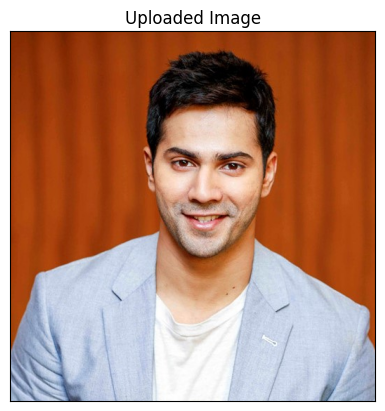

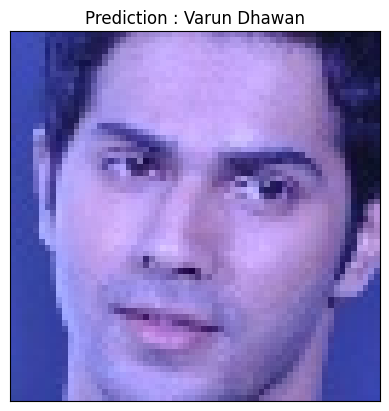

In [131]:
plt.imshow(cv2.cvtColor(sample_img,cv2.COLOR_BGR2RGB )),plt.xticks([]),plt.yticks([]),plt.title("Uploaded Image")
plt.show()
for img in predicted_imgs:
    Name =  filenames[positions[0]].split('/')[2]
    print("\n")
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB )),plt.xticks([]),plt.yticks([]),plt.title("Prediction : " + Name)
    plt.show()
